In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import io 
from numpy import array
from numpy import hstack
from statsmodels.tools.eval_measures import mse,rmse,meanabs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
#from tsmoothie.utils_func import sim_randomwalk
#from tsmoothie.smoother import *
import seaborn as sns
#import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import optuna
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import graphviz
import optuna
from optuna.integration import KerasPruningCallback
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import BatchNormalization
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import os
from matplotlib import pyplot
from keras.models import load_model
from tensorflow.keras import initializers

In [ ]:
# pip install optuna 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Lower_Camp_outlier_2015_realRH.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True) #sc1
# df1 =pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Lower_Camp_outlier_2012_borrowedRH.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True) #sc2

In [ ]:
df1.columns

Index(['H2S (ppb)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'SO2 (ppb)', 'THC (ppm)', 'Wind Direction',
       'Wind Speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend', 'score'],
      dtype='object')

In [ ]:
def wind (df, radius):
  dff = df.copy()
  a = 'sin'
  b =  'cos'
  dff[a]=np.sin(dff[radius]*np.pi/180)
  dff[b]=np.cos(dff[radius]*np.pi/180)
  #dff[a] = dff[a] * dff[speed]
  #dff[b] = dff[b] * dff[speed]
  # dff.drop(columns=[radius],inplace = True)
  return dff


def lag_maker(df,column, num):
    for i in  range(num):
        df[column+ '-lag' + str(i+1)] = df[column].shift(i+1)
        df[column+ '-lag' + str(i+1)] = df[column+ '-lag' + str(i+1)]

def lag(df_reg, num):
    for i in c:
        lag_maker(df_reg,i,num)
        
    df_reg = df_reg.iloc[num:]
    return df_reg        




# df2 = lag(df1,1)
df1_w = wind(df1,'Wind Direction')

In [ ]:
df1_w.columns

Index(['H2S (ppb)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'SO2 (ppb)', 'THC (ppm)', 'Wind Direction',
       'Wind Speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend', 'score', 'sin', 'cos'],
      dtype='object')

In [ ]:
df1_w= df1_w[[
              # 'SO2 (ppb)',
              # 'THC (ppm)',
              'H2S (ppb)', 
              'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed',  'Wind Direction',
       'Wind Speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend', 'score' ]].copy()


In [ ]:
aa = 'H2S (ppb)'

In [ ]:
df1_w[[aa,'score']][df1_w[aa] <1.9] 

H2S (ppb)      score
Date                                     
2015-01-01 00:00:00        0.0   9.958333
2015-01-01 01:00:00        0.0   8.478571
2015-01-01 02:00:00        0.0   3.699048
2015-01-01 03:00:00        0.0   5.956038
2015-01-01 04:00:00        0.0  10.314286
...                        ...        ...
2021-03-31 15:00:00        0.1   4.888095
2021-03-31 16:00:00        0.1   5.007946
2021-03-31 17:00:00        0.1   3.166667
2021-03-31 19:00:00        1.5   6.136870
2021-03-31 23:00:00        1.1   2.383951

[47398 rows x 2 columns]

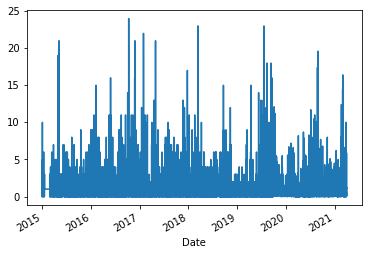

In [ ]:
df1_w[aa].plot()

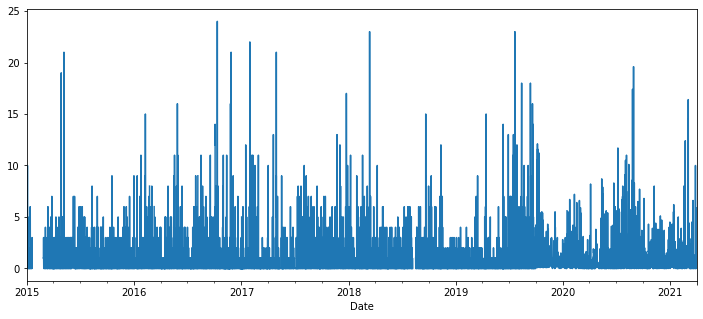

In [ ]:
df1_w[aa].resample('H').mean().plot(figsize = (12,5))

In [ ]:
df1_w.columns

Index(['H2S (ppb)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score'],
      dtype='object')

In [ ]:
avg = df1_w['score'].mean()
std = df1_w['score'].std()
len(df1_w[df1_w['score']<avg + 2*std])/len(df1_w)

0.9697808044264737

In [ ]:
def objectivee(trial):    
        # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.00001, random_state = 42)
        param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "booster": trial.suggest_categorical("booster", ["gbtree"]), #",,""gblinear" , "dart"
        "lambda": trial.suggest_loguniform("lambda", 0.1, 10000.0),
        "alpha": trial.suggest_loguniform("alpha", 0.1, 10000.0),
        "score" : trial.suggest_float( 'score', avg + 2*std, avg + 5 * std )
        }

        # if param["booster"] == "gbtree" :
        #     param["n_estimators"] =  trial.suggest_int("n_estimators" , 1, 10000)


        if param["booster"] == "gbtree" or param["booster"] == "dart":
            param["max_depth"] = trial.suggest_int("max_depth", 1, 10)
            param["eta"] = trial.suggest_loguniform("eta", 0.1, 100000.0)
            param["gamma"] = trial.suggest_loguniform("gamma", 0.1, 100000.0)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-3, 1.0)
            param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-3, 1.0)


        df_xg =  df1_w[df1_w['score'] < param["score"]].copy()
        df_xg.drop(columns = ['score'], inplace = True)
        Y =  df_xg[aa]
        Y = np.array(Y).reshape(-1,1)
        X = np.array( df_xg[ df_xg.columns[1:]])
        # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.000000001000, random_state = 42)


        kf = KFold(n_splits=4)
        acc = 0 
        for train_index, test_index in kf.split(X):   
                X_tr, X_tes = X[train_index], X[test_index]
                y_tr, y_tes =  Y[train_index],  Y[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state = 42)
    
                dtrain = xgb.DMatrix(X_tra, label=y_tra)
                dval = xgb.DMatrix(X_val, label=y_val)
                dtest = xgb.DMatrix(X_tes, label=y_tes)
                
                pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-rmse")
                bst = xgb.train(param, dtrain, evals=[(dval, "validation")],  early_stopping_rounds=30,
                                callbacks=[pruning_callback],
                               # verbose_eval = False
                               )
                preds = bst.predict(dtest)
                accuracy = mean_squared_error(y_tes, preds)
                acc = acc + accuracy/5
                
        print(acc)
        return acc    

In [ ]:
study2 = optuna.create_study()
study2.optimize(objectivee, n_trials=5000)
print(study2.best_trial)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/XGB_lowercamp_OT_H2S_HP_hourly.csv')

[I 2021-05-18 14:40:14,476] A new study created in memory with name: no-name-3c8bec95-bba1-4e5d-b556-40c76c1ba563


[0]	validation-rmse:1.07553
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.08306
[2]	validation-rmse:21.2308
[3]	validation-rmse:153.972
[4]	validation-rmse:1118.02
[5]	validation-rmse:8118.17
[6]	validation-rmse:58947.7
[7]	validation-rmse:428031
[8]	validation-rmse:3.10802e+06
[9]	validation-rmse:2.25679e+07
[0]	validation-rmse:1.15638
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75118
[2]	validation-rmse:33.8019
[3]	validation-rmse:245.341
[4]	validation-rmse:1781.46
[5]	validation-rmse:12935.5
[6]	validation-rmse:93927.5
[7]	validation-rmse:682026
[8]	validation-rmse:4.95233e+06
[9]	validation-rmse:3.59599e+07
[0]	validation-rmse:1.05105
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.40834
[2]	validation-rmse:23.6499
[3]	validation-rmse:171.711
[4]	validation-rmse:1246.69
[5]	validation-rmse:9052.56
[6]	validation-rmse:65732.4
[7]	validation-rmse:477297
[8]	validation

[I 2021-05-18 14:40:15,215] Trial 0 finished with value: 544715487501287.06 and parameters: {'booster': 'gbtree', 'lambda': 632.180998997207, 'alpha': 0.16731045193043426, 'score': 18.437012653680032, 'max_depth': 9, 'eta': 8.444372887399126, 'gamma': 5668.937932841205, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 544715487501287.06.


544715487501287.06
[0]	validation-rmse:0.995544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.995489
[2]	validation-rmse:0.995528
[3]	validation-rmse:0.995561
[4]	validation-rmse:0.995579
[5]	validation-rmse:0.995589
[6]	validation-rmse:0.995593
[7]	validation-rmse:0.995595
[8]	validation-rmse:0.995596
[9]	validation-rmse:0.995597
[0]	validation-rmse:0.970813
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.97028
[2]	validation-rmse:0.970186
[3]	validation-rmse:0.970176
[4]	validation-rmse:0.970179
[5]	validation-rmse:0.970182
[6]	validation-rmse:0.970184
[7]	validation-rmse:0.970185
[8]	validation-rmse:0.970185
[9]	validation-rmse:0.970186
[0]	validation-rmse:0.931012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.930639
[2]	validation-rmse:0.930548
[3]	validation-rmse:0.930524
[4]	validation-rmse:0.930517
[5]	validation-rmse:0.930514
[6]	validation-rmse:0.930513
[7]	valida

[I 2021-05-18 14:40:16,070] Trial 1 finished with value: 0.7992101066791314 and parameters: {'booster': 'gbtree', 'lambda': 13.259568085093004, 'alpha': 289.8687677513172, 'score': 22.687485110996015, 'max_depth': 4, 'eta': 0.5305423986551105, 'gamma': 1631.261793392462, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.7992101066791314.


0.7992101066791314
[0]	validation-rmse:1.56617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:20.6926
[2]	validation-rmse:438.481
[3]	validation-rmse:9389.78
[4]	validation-rmse:201184
[5]	validation-rmse:4.31061e+06
[6]	validation-rmse:9.23603e+07
[7]	validation-rmse:1.97894e+09
[8]	validation-rmse:4.24012e+10
[9]	validation-rmse:9.085e+11
[0]	validation-rmse:1.94458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:31.1648
[2]	validation-rmse:663.565
[3]	validation-rmse:14218.3
[4]	validation-rmse:304771
[5]	validation-rmse:6.53287e+06
[6]	validation-rmse:1.40035e+08
[7]	validation-rmse:3.00169e+09
[8]	validation-rmse:6.43424e+10
[9]	validation-rmse:1.3792e+12
[0]	validation-rmse:1.43397
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:18.6734
[2]	validation-rmse:395.912
[3]	validation-rmse:8487.21
[4]	validation-rmse:182052
[5]	validation-rmse:3.90512e+06
[6]	validation-rmse:8.3767

[I 2021-05-18 14:40:16,908] Trial 2 finished with value: 6.829797736228198e+23 and parameters: {'booster': 'gbtree', 'lambda': 406.4446461961567, 'alpha': 3768.732588832379, 'score': 28.68172454560752, 'max_depth': 5, 'eta': 23.274182388666986, 'gamma': 7.136216771564718, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.7992101066791314.


6.829797736228198e+23
[0]	validation-rmse:10.6088
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:443.793
[2]	validation-rmse:18644.5
[3]	validation-rmse:783303
[4]	validation-rmse:3.29093e+07
[5]	validation-rmse:1.38266e+09
[6]	validation-rmse:5.8093e+10
[7]	validation-rmse:2.44085e+12
[8]	validation-rmse:1.02558e+14
[9]	validation-rmse:4.30928e+15
[0]	validation-rmse:10.1809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:427.45
[2]	validation-rmse:17992.4
[3]	validation-rmse:757377
[4]	validation-rmse:3.18811e+07
[5]	validation-rmse:1.34201e+09
[6]	validation-rmse:5.64907e+10
[7]	validation-rmse:2.37793e+12
[8]	validation-rmse:1.00097e+14
[9]	validation-rmse:4.21349e+15
[0]	validation-rmse:9.62249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:400.107
[2]	validation-rmse:16696.1
[3]	validation-rmse:696806
[4]	validation-rmse:2.90844e+07
[5]	validation-rmse:1.21411e+09
[6]	valida

[I 2021-05-18 14:40:17,606] Trial 3 finished with value: 1.364076273908906e+31 and parameters: {'booster': 'gbtree', 'lambda': 640.902808510037, 'alpha': 0.8054270670434541, 'score': 16.723147741397245, 'max_depth': 8, 'eta': 45.042159465575985, 'gamma': 1083.0718467222741, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.7992101066791314.


[0]	validation-rmse:0.989866
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.989866
[2]	validation-rmse:0.989866
[3]	validation-rmse:0.989866
[4]	validation-rmse:0.989866
[5]	validation-rmse:0.989866
[6]	validation-rmse:0.989866
[7]	validation-rmse:0.989866
[8]	validation-rmse:0.989866
[9]	validation-rmse:0.989866
[0]	validation-rmse:0.930591
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.930591
[2]	validation-rmse:0.930591
[3]	validation-rmse:0.930591
[4]	validation-rmse:0.930591
[5]	validation-rmse:0.930591
[6]	validation-rmse:0.930591
[7]	validation-rmse:0.930591
[8]	validation-rmse:0.930591
[9]	validation-rmse:0.930591
[0]	validation-rmse:0.949149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949149
[2]	validation-rmse:0.949149
[3]	validation-rmse:0.949149
[4]	validation-rmse:0.949149
[5]	validation-rmse:0.949149
[6]	validation-rmse:0.949149
[7]	validation-rmse:0.949149

[I 2021-05-18 14:40:18,094] Trial 4 finished with value: 0.7958177116691707 and parameters: {'booster': 'gbtree', 'lambda': 68.11371004318998, 'alpha': 6085.055054627407, 'score': 20.706157427521944, 'max_depth': 2, 'eta': 11521.636416428591, 'gamma': 42.54390865651813, 'grow_policy': 'depthwise'}. Best is trial 4 with value: 0.7958177116691707.


0.7958177116691707


[I 2021-05-18 14:40:18,160] Trial 5 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.06875
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.15075
[2]	validation-rmse:1.50163
[3]	validation-rmse:2.17002
[4]	validation-rmse:3.66152
[5]	validation-rmse:6.39319
[6]	validation-rmse:11.5903
[7]	validation-rmse:21.0725
[8]	validation-rmse:38.6007
[9]	validation-rmse:70.7079
[0]	validation-rmse:1.04198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.1778
[2]	validation-rmse:1.56843
[3]	validation-rmse:2.12823
[4]	validation-rmse:3.23897
[5]	validation-rmse:4.86156
[6]	validation-rmse:7.61214
[7]	validation-rmse:11.7616
[8]	validation-rmse:18.4445
[9]	validation-rmse:28.7297
[0]	validation-rmse:1.00986
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.09866
[2]	validation-rmse:1.31496
[3]	validation-rmse:1.64213
[4]	validation-rmse:2.27304
[5]	validation-rmse:3.22868
[6]	validation-rmse:4.84349
[7]	validation-rmse:7.33004
[8]	validation-rmse:11.3591


[I 2021-05-18 14:40:20,100] Trial 6 finished with value: 2408.216609751471 and parameters: {'booster': 'gbtree', 'lambda': 9196.323829255261, 'alpha': 0.11479175899699942, 'score': 21.912740367030544, 'max_depth': 10, 'eta': 5.102473100765254, 'gamma': 6.082525508397516, 'grow_policy': 'lossguide'}. Best is trial 4 with value: 0.7958177116691707.


2408.216609751471


[I 2021-05-18 14:40:20,163] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:20,237] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:20,311] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:20,367] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:20,429] Trial 11 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00348
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00348
[2]	validation-rmse:1.00348
[3]	validation-rmse:1.00348
[4]	validation-rmse:1.00348
[5]	validation-rmse:1.00348
[6]	validation-rmse:1.00348
[7]	validation-rmse:1.00348
[8]	validation-rmse:1.00348
[9]	validation-rmse:1.00348
[0]	validation-rmse:0.964261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.964261
[2]	validation-rmse:0.964261
[3]	validation-rmse:0.964261
[4]	validation-rmse:0.964261
[5]	validation-rmse:0.964261
[6]	validation-rmse:0.964261
[7]	validation-rmse:0.964261
[8]	validation-rmse:0.964261
[9]	validation-rmse:0.964261
[0]	validation-rmse:0.927489
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.927489
[2]	validation-rmse:0.927489
[3]	validation-rmse:0.927489
[4]	validation-rmse:0.927489
[5]	validation-rmse:0.927489
[6]	validation-rmse:0.927489
[7]	validation-rmse:0.927489
[8]	valid

[I 2021-05-18 14:40:20,992] Trial 12 finished with value: 0.778670771401276 and parameters: {'booster': 'gbtree', 'lambda': 6.3924553195033385, 'alpha': 9113.52114389004, 'score': 18.89981816895679, 'max_depth': 3, 'eta': 29944.539975711832, 'gamma': 29409.41423827107, 'grow_policy': 'lossguide'}. Best is trial 12 with value: 0.778670771401276.


0.778670771401276
[0]	validation-rmse:1.02369
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02369
[2]	validation-rmse:1.02369
[3]	validation-rmse:1.02369
[4]	validation-rmse:1.02369
[5]	validation-rmse:1.02369
[6]	validation-rmse:1.02369
[7]	validation-rmse:1.02369
[8]	validation-rmse:1.02369
[9]	validation-rmse:1.02369
[0]	validation-rmse:0.95208
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.95208
[2]	validation-rmse:0.95208
[3]	validation-rmse:0.95208
[4]	validation-rmse:0.95208
[5]	validation-rmse:0.95208
[6]	validation-rmse:0.95208
[7]	validation-rmse:0.95208
[8]	validation-rmse:0.95208
[9]	validation-rmse:0.95208
[0]	validation-rmse:0.932583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.932583
[2]	validation-rmse:0.932583
[3]	validation-rmse:0.932583
[4]	validation-rmse:0.932583
[5]	validation-rmse:0.932583
[6]	validation-rmse:0.932583
[7]	validation-rmse:0.932583
[

[I 2021-05-18 14:40:21,563] Trial 13 finished with value: 0.7794235500511958 and parameters: {'booster': 'gbtree', 'lambda': 0.914859427816881, 'alpha': 6151.590203459153, 'score': 19.143420069108906, 'max_depth': 2, 'eta': 48463.20277273, 'gamma': 18231.080257284473, 'grow_policy': 'lossguide'}. Best is trial 12 with value: 0.778670771401276.


[0]	validation-rmse:0.967058
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.967058
[2]	validation-rmse:0.967058
[3]	validation-rmse:0.967058
[4]	validation-rmse:0.967058
[5]	validation-rmse:0.967058
[6]	validation-rmse:0.967058
[7]	validation-rmse:0.967058
[8]	validation-rmse:0.967058
[9]	validation-rmse:0.967058
[0]	validation-rmse:0.967519
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.967519
[2]	validation-rmse:0.967519
[3]	validation-rmse:0.967519
[4]	validation-rmse:0.967519
[5]	validation-rmse:0.967519
[6]	validation-rmse:0.967519
[7]	validation-rmse:0.967519
[8]	validation-rmse:0.967519
[9]	validation-rmse:0.967519
[0]	validation-rmse:0.90358
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.90358
[2]	validation-rmse:0.90358
[3]	validation-rmse:0.90358
[4]	validation-rmse:0.90358
[5]	validation-rmse:0.90358
[6]	validation-rmse:0.90358
[7]	validation-rmse:0.90358
[8]	val

[I 2021-05-18 14:40:22,135] Trial 14 finished with value: 0.7510837355356377 and parameters: {'booster': 'gbtree', 'lambda': 0.33154349968683505, 'alpha': 8760.42523800361, 'score': 15.667485382241106, 'max_depth': 3, 'eta': 79385.06771577994, 'gamma': 85599.26324328879, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.7510837355356377.
[I 2021-05-18 14:40:22,204] Trial 15 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:22,269] Trial 16 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.996467
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.996467
[2]	validation-rmse:0.996467
[3]	validation-rmse:0.996467
[4]	validation-rmse:0.996467
[5]	validation-rmse:0.996467
[6]	validation-rmse:0.996467
[7]	validation-rmse:0.996467
[8]	validation-rmse:0.996467
[9]	validation-rmse:0.996467
[0]	validation-rmse:0.945426
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.945426
[2]	validation-rmse:0.945426
[3]	validation-rmse:0.945426
[4]	validation-rmse:0.945426
[5]	validation-rmse:0.945426
[6]	validation-rmse:0.945426
[7]	validation-rmse:0.945426
[8]	validation-rmse:0.945426
[9]	validation-rmse:0.945426
[0]	validation-rmse:0.91966
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.91966
[2]	validation-rmse:0.91966
[3]	validation-rmse:0.91966
[4]	validation-rmse:0.91966
[5]	validation-rmse:0.91966
[6]	validation-rmse:0.91966
[7]	validation-rmse:0.91966
[8]	val

[I 2021-05-18 14:40:22,808] Trial 17 finished with value: 0.7737545507729486 and parameters: {'booster': 'gbtree', 'lambda': 0.10238574380212236, 'alpha': 9231.939984785155, 'score': 17.27045645344473, 'max_depth': 1, 'eta': 23622.51100708264, 'gamma': 75729.79846182864, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.7510837355356377.


0.7737545507729486


[I 2021-05-18 14:40:22,867] Trial 18 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:22,929] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:22,984] Trial 20 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.960158
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.960158
[2]	validation-rmse:0.960158
[3]	validation-rmse:0.960158
[4]	validation-rmse:0.960158
[5]	validation-rmse:0.960158
[6]	validation-rmse:0.960158
[7]	validation-rmse:0.960158
[8]	validation-rmse:0.960158
[9]	validation-rmse:0.960158
[0]	validation-rmse:0.927106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.927106
[2]	validation-rmse:0.927106
[3]	validation-rmse:0.927106
[4]	validation-rmse:0.927106
[5]	validation-rmse:0.927106
[6]	validation-rmse:0.927106
[7]	validation-rmse:0.927106
[8]	validation-rmse:0.927106
[9]	validation-rmse:0.927106
[0]	validation-rmse:0.93425
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.93425
[2]	validation-rmse:0.93425
[3]	validation-rmse:0.93425
[4]	validation-rmse:0.93425
[5]	validation-rmse:0.93425
[6]	validation-rmse:0.93425
[7]	validation-rmse:0.93425
[8]	val

[I 2021-05-18 14:40:23,552] Trial 21 finished with value: 0.7755909590856922 and parameters: {'booster': 'gbtree', 'lambda': 4.63524286309355, 'alpha': 9042.876904679248, 'score': 17.45050408495034, 'max_depth': 3, 'eta': 29989.632366188463, 'gamma': 22841.292576333402, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.7510837355356377.


0.7755909590856922


[I 2021-05-18 14:40:23,625] Trial 22 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.941241
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.941241
[2]	validation-rmse:0.941241
[3]	validation-rmse:0.941241
[4]	validation-rmse:0.941241
[5]	validation-rmse:0.941241
[6]	validation-rmse:0.941241
[7]	validation-rmse:0.941241
[8]	validation-rmse:0.941241
[9]	validation-rmse:0.941241
[0]	validation-rmse:0.911752
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.911752
[2]	validation-rmse:0.911752
[3]	validation-rmse:0.911752
[4]	validation-rmse:0.911752
[5]	validation-rmse:0.911752
[6]	validation-rmse:0.911752
[7]	validation-rmse:0.911752
[8]	validation-rmse:0.911752
[9]	validation-rmse:0.911752
[0]	validation-rmse:0.920759
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.920759
[2]	validation-rmse:0.920759
[3]	validation-rmse:0.920759
[4]	validation-rmse:0.920759
[5]	validation-rmse:0.920759
[6]	validation-rmse:0.920759
[7]	validation-rmse:0.920759

[I 2021-05-18 14:40:24,197] Trial 23 finished with value: 0.7503872873371842 and parameters: {'booster': 'gbtree', 'lambda': 3.5527935908153254, 'alpha': 7642.160013085949, 'score': 15.533580300731645, 'max_depth': 2, 'eta': 5268.486683453976, 'gamma': 42339.82131615005, 'grow_policy': 'lossguide'}. Best is trial 23 with value: 0.7503872873371842.


0.7503872873371842
[0]	validation-rmse:0.957104
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.957104
[2]	validation-rmse:0.957104
[3]	validation-rmse:0.957104
[4]	validation-rmse:0.957104
[5]	validation-rmse:0.957104
[6]	validation-rmse:0.957104
[7]	validation-rmse:0.957104
[8]	validation-rmse:0.957104
[9]	validation-rmse:0.957104
[0]	validation-rmse:0.926985
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.926985
[2]	validation-rmse:0.926985
[3]	validation-rmse:0.926985
[4]	validation-rmse:0.926985
[5]	validation-rmse:0.926985
[6]	validation-rmse:0.926985
[7]	validation-rmse:0.926985
[8]	validation-rmse:0.926985
[9]	validation-rmse:0.926985
[0]	validation-rmse:0.929737
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.929737
[2]	validation-rmse:0.929737
[3]	validation-rmse:0.929737
[4]	validation-rmse:0.929737
[5]	validation-rmse:0.929737
[6]	validation-rmse:0.929737
[7]	valid

[I 2021-05-18 14:40:24,797] Trial 24 finished with value: 0.7503529768327776 and parameters: {'booster': 'gbtree', 'lambda': 0.11447393783479601, 'alpha': 2583.34943245913, 'score': 15.551988890885156, 'max_depth': 1, 'eta': 4923.941746447348, 'gamma': 89179.23720182692, 'grow_policy': 'lossguide'}. Best is trial 24 with value: 0.7503529768327776.
[I 2021-05-18 14:40:24,860] Trial 25 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:24,922] Trial 26 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:24,980] Trial 27 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.935082
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.935082
[2]	validation-rmse:0.935082
[3]	validation-rmse:0.935082
[4]	validation-rmse:0.935082
[5]	validation-rmse:0.935082
[6]	validation-rmse:0.935082
[7]	validation-rmse:0.935082
[8]	validation-rmse:0.935082
[9]	validation-rmse:0.935082
[0]	validation-rmse:0.906992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.906992
[2]	validation-rmse:0.906992
[3]	validation-rmse:0.906992
[4]	validation-rmse:0.906992
[5]	validation-rmse:0.906992
[6]	validation-rmse:0.906992
[7]	validation-rmse:0.906992
[8]	validation-rmse:0.906992
[9]	validation-rmse:0.906992
[0]	validation-rmse:0.948981
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.948981
[2]	validation-rmse:0.948981
[3]	validation-rmse:0.948981
[4]	validation-rmse:0.948981
[5]	validation-rmse:0.948981
[6]	validation-rmse:0.948981
[7]	validation-rmse:0.948981

[I 2021-05-18 14:40:25,678] Trial 28 finished with value: 0.75031919903585 and parameters: {'booster': 'gbtree', 'lambda': 1.3110034580914949, 'alpha': 3981.6115391280664, 'score': 15.567373196416563, 'max_depth': 4, 'eta': 1169.0562087387723, 'gamma': 1759.0887912729331, 'grow_policy': 'lossguide'}. Best is trial 28 with value: 0.75031919903585.
[I 2021-05-18 14:40:25,751] Trial 29 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.976044
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.976044
[2]	validation-rmse:0.976044
[3]	validation-rmse:0.976044
[4]	validation-rmse:0.976044
[5]	validation-rmse:0.976044
[6]	validation-rmse:0.976044
[7]	validation-rmse:0.976044
[8]	validation-rmse:0.976044
[9]	validation-rmse:0.976044
[0]	validation-rmse:0.947984
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.947984
[2]	validation-rmse:0.947984
[3]	validation-rmse:0.947984
[4]	validation-rmse:0.947984
[5]	validation-rmse:0.947984
[6]	validation-rmse:0.947984
[7]	validation-rmse:0.947984
[8]	validation-rmse:0.947984
[9]	validation-rmse:0.947984
[0]	validation-rmse:0.962713
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.962713
[2]	validation-rmse:0.962713
[3]	validation-rmse:0.962713
[4]	validation-rmse:0.962713
[5]	validation-rmse:0.962713
[6]	validation-rmse:0.962713
[7]	validation-rmse:0.962713

[I 2021-05-18 14:40:26,469] Trial 30 finished with value: 0.7707193175999938 and parameters: {'booster': 'gbtree', 'lambda': 122.75635092746715, 'alpha': 4163.9099274547, 'score': 16.922429507465147, 'max_depth': 4, 'eta': 502.64833328474975, 'gamma': 416.1772821080453, 'grow_policy': 'lossguide'}. Best is trial 28 with value: 0.75031919903585.


[0]	validation-rmse:0.957104
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.957104
[2]	validation-rmse:0.957104
[3]	validation-rmse:0.957104
[4]	validation-rmse:0.957104
[5]	validation-rmse:0.957104
[6]	validation-rmse:0.957104
[7]	validation-rmse:0.957104
[8]	validation-rmse:0.957104
[9]	validation-rmse:0.957104
[0]	validation-rmse:69.4123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:172431
[2]	validation-rmse:4.28751e+08
[3]	validation-rmse:1.06609e+12
[4]	validation-rmse:2.65084e+15
[5]	validation-rmse:inf
[6]	validation-rmse:inf
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:1.82127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3787.78
[2]	validation-rmse:9.41816e+06
[3]	validation-rmse:2.34183e+10
[4]	validation-rmse:5.82297e+13
[5]	validation-rmse:1.44788e+17
[6]	validation-rmse:inf
[7]	validation-rmse:inf
[8]	validation-rms

[I 2021-05-18 14:40:27,178] Trial 31 finished with value: 1.270282132851427e+64 and parameters: {'booster': 'gbtree', 'lambda': 1.3971925496821194, 'alpha': 1626.6745810090163, 'score': 15.545800831642346, 'max_depth': 3, 'eta': 2487.627859867791, 'gamma': 2673.5775024738855, 'grow_policy': 'lossguide'}. Best is trial 28 with value: 0.75031919903585.


1.270282132851427e+64


[I 2021-05-18 14:40:27,246] Trial 32 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:27,310] Trial 33 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:27,368] Trial 34 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.939062
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.939062
[2]	validation-rmse:0.939062
[3]	validation-rmse:0.939062
[4]	validation-rmse:0.939062
[5]	validation-rmse:0.939062
[6]	validation-rmse:0.939062
[7]	validation-rmse:0.939062
[8]	validation-rmse:0.939062
[9]	validation-rmse:0.939062
[0]	validation-rmse:0.923864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.923864
[2]	validation-rmse:0.923864
[3]	validation-rmse:0.923864
[4]	validation-rmse:0.923864
[5]	validation-rmse:0.923864
[6]	validation-rmse:0.923864
[7]	validation-rmse:0.923864
[8]	validation-rmse:0.923864
[9]	validation-rmse:0.923864
[0]	validation-rmse:0.895006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.895006
[2]	validation-rmse:0.895006
[3]	validation-rmse:0.895006
[4]	validation-rmse:0.895006
[5]	validation-rmse:0.895006
[6]	validation-rmse:0.895006
[7]	validation-rmse:0.895006

[I 2021-05-18 14:40:27,950] Trial 35 finished with value: 0.7501932553095286 and parameters: {'booster': 'gbtree', 'lambda': 0.8211901147878046, 'alpha': 5845.524179351812, 'score': 15.317125690190608, 'max_depth': 3, 'eta': 402.59838049212925, 'gamma': 150.49209527224735, 'grow_policy': 'lossguide'}. Best is trial 35 with value: 0.7501932553095286.


0.7501932553095286


[I 2021-05-18 14:40:28,023] Trial 36 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:28,092] Trial 37 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.939062
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.939062
[2]	validation-rmse:0.939062
[3]	validation-rmse:0.939062
[4]	validation-rmse:0.939062
[5]	validation-rmse:0.939062
[6]	validation-rmse:0.939062
[7]	validation-rmse:0.939062
[8]	validation-rmse:0.939062
[9]	validation-rmse:0.939062
[0]	validation-rmse:0.923864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.923864
[2]	validation-rmse:0.923864
[3]	validation-rmse:0.923864
[4]	validation-rmse:0.923864
[5]	validation-rmse:0.923864
[6]	validation-rmse:0.923864
[7]	validation-rmse:0.923864
[8]	validation-rmse:0.923864
[9]	validation-rmse:0.923864
[0]	validation-rmse:0.895006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.895006
[2]	validation-rmse:0.895006
[3]	validation-rmse:0.895006
[4]	validation-rmse:0.895006
[5]	validation-rmse:0.895006
[6]	validation-rmse:0.895006
[7]	validation-rmse:0.895006

[I 2021-05-18 14:40:28,774] Trial 38 finished with value: 0.7501932553095286 and parameters: {'booster': 'gbtree', 'lambda': 3.445324629835345, 'alpha': 3841.166663132273, 'score': 15.30431387882013, 'max_depth': 2, 'eta': 4.155812359242978, 'gamma': 1048.096207443503, 'grow_policy': 'lossguide'}. Best is trial 35 with value: 0.7501932553095286.


0.7501932553095286
[0]	validation-rmse:0.96922
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.96922
[2]	validation-rmse:0.96922
[3]	validation-rmse:0.96922
[4]	validation-rmse:0.96922
[5]	validation-rmse:0.96922
[6]	validation-rmse:0.96922
[7]	validation-rmse:0.96922
[8]	validation-rmse:0.96922
[9]	validation-rmse:0.96922
[0]	validation-rmse:0.954274
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.954274
[2]	validation-rmse:0.954274
[3]	validation-rmse:0.954274
[4]	validation-rmse:0.954274
[5]	validation-rmse:0.954274
[6]	validation-rmse:0.954274
[7]	validation-rmse:0.954274
[8]	validation-rmse:0.954274
[9]	validation-rmse:0.954274
[0]	validation-rmse:0.925787
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.925787
[2]	validation-rmse:0.925787
[3]	validation-rmse:0.925787
[4]	validation-rmse:0.925787
[5]	validation-rmse:0.925787
[6]	validation-rmse:0.925787
[7]	validation-rmse

[I 2021-05-18 14:40:29,394] Trial 39 finished with value: 0.7667325958488118 and parameters: {'booster': 'gbtree', 'lambda': 0.672514220902727, 'alpha': 4358.765592794015, 'score': 16.560577228872607, 'max_depth': 3, 'eta': 2.6261650292138494, 'gamma': 86.78418926549635, 'grow_policy': 'lossguide'}. Best is trial 35 with value: 0.7501932553095286.


0.7667325958488118
[0]	validation-rmse:0.944183
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.944325
[2]	validation-rmse:0.944432
[3]	validation-rmse:0.944479
[4]	validation-rmse:0.944498
[5]	validation-rmse:0.944505
[6]	validation-rmse:0.944508
[7]	validation-rmse:0.944509
[8]	validation-rmse:0.944509
[9]	validation-rmse:0.944509
[0]	validation-rmse:0.92288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.922834
[2]	validation-rmse:0.922948
[3]	validation-rmse:0.923008
[4]	validation-rmse:0.923033
[5]	validation-rmse:0.923042
[6]	validation-rmse:0.923046
[7]	validation-rmse:0.923047
[8]	validation-rmse:0.923047
[9]	validation-rmse:0.923048
[0]	validation-rmse:0.878436
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.878444
[2]	validation-rmse:0.878526
[3]	validation-rmse:0.878568
[4]	validation-rmse:0.878585
[5]	validation-rmse:0.878591
[6]	validation-rmse:0.878593
[7]	valida

[I 2021-05-18 14:40:30,376] Trial 40 finished with value: 0.7424728314515602 and parameters: {'booster': 'gbtree', 'lambda': 73.50174921066714, 'alpha': 0.3132125469302305, 'score': 18.082895658365707, 'max_depth': 4, 'eta': 0.6309358277374981, 'gamma': 1156.2892887606642, 'grow_policy': 'depthwise'}. Best is trial 40 with value: 0.7424728314515602.


0.7424728314515602
[0]	validation-rmse:0.932911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.932863
[2]	validation-rmse:0.932866
[3]	validation-rmse:0.932866
[4]	validation-rmse:0.932866
[5]	validation-rmse:0.932866
[6]	validation-rmse:0.932866
[7]	validation-rmse:0.932866
[8]	validation-rmse:0.932866
[9]	validation-rmse:0.932866
[0]	validation-rmse:0.908595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.908537
[2]	validation-rmse:0.90854
[3]	validation-rmse:0.90854
[4]	validation-rmse:0.90854
[5]	validation-rmse:0.90854
[6]	validation-rmse:0.90854
[7]	validation-rmse:0.90854
[8]	validation-rmse:0.90854
[9]	validation-rmse:0.90854
[0]	validation-rmse:0.88951
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.88954
[2]	validation-rmse:0.889538
[3]	validation-rmse:0.889538
[4]	validation-rmse:0.889538
[5]	validation-rmse:0.889538
[6]	validation-rmse:0.889538
[7]	validation-rmse

[I 2021-05-18 14:40:31,303] Trial 41 finished with value: 0.712619245302519 and parameters: {'booster': 'gbtree', 'lambda': 165.81369017117805, 'alpha': 0.21043226907091372, 'score': 15.334099273532392, 'max_depth': 4, 'eta': 1.0650078282224649, 'gamma': 948.4530563065845, 'grow_policy': 'depthwise'}. Best is trial 41 with value: 0.712619245302519.


0.712619245302519
[0]	validation-rmse:0.923601
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.923704
[2]	validation-rmse:0.923712
[3]	validation-rmse:0.923713
[4]	validation-rmse:0.923713
[5]	validation-rmse:0.923713
[6]	validation-rmse:0.923713
[7]	validation-rmse:0.923713
[8]	validation-rmse:0.923713
[9]	validation-rmse:0.923713
[0]	validation-rmse:0.909397
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.909534
[2]	validation-rmse:0.909546
[3]	validation-rmse:0.909547
[4]	validation-rmse:0.909547
[5]	validation-rmse:0.909547
[6]	validation-rmse:0.909547
[7]	validation-rmse:0.909547
[8]	validation-rmse:0.909547
[9]	validation-rmse:0.909547
[0]	validation-rmse:0.865155
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.865266
[2]	validation-rmse:0.865276
[3]	validation-rmse:0.865277
[4]	validation-rmse:0.865277
[5]	validation-rmse:0.865277
[6]	validation-rmse:0.865277
[7]	valida

[I 2021-05-18 14:40:32,251] Trial 42 finished with value: 0.7394971148888354 and parameters: {'booster': 'gbtree', 'lambda': 239.4555901683657, 'alpha': 0.398598106806979, 'score': 18.070078347886852, 'max_depth': 4, 'eta': 0.9342182718937376, 'gamma': 996.1727394980087, 'grow_policy': 'depthwise'}. Best is trial 41 with value: 0.712619245302519.


0.7394971148888354
[0]	validation-rmse:0.922406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.8971
[2]	validation-rmse:0.897202
[3]	validation-rmse:0.897233
[4]	validation-rmse:0.897241
[5]	validation-rmse:0.897244
[6]	validation-rmse:0.897245
[7]	validation-rmse:0.897245
[8]	validation-rmse:0.897245
[9]	validation-rmse:0.897245
[0]	validation-rmse:0.888529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.862615
[2]	validation-rmse:0.862704
[3]	validation-rmse:0.862735
[4]	validation-rmse:0.862744
[5]	validation-rmse:0.862746
[6]	validation-rmse:0.862747
[7]	validation-rmse:0.862747
[8]	validation-rmse:0.862747
[9]	validation-rmse:0.862747
[0]	validation-rmse:0.857533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830579
[2]	validation-rmse:0.830727
[3]	validation-rmse:0.830772
[4]	validation-rmse:0.830785
[5]	validation-rmse:0.830788
[6]	validation-rmse:0.830789
[7]	validat

[I 2021-05-18 14:40:33,530] Trial 43 finished with value: 0.7147774330496829 and parameters: {'booster': 'gbtree', 'lambda': 225.880430601594, 'alpha': 0.24438824651234042, 'score': 21.101592935365552, 'max_depth': 6, 'eta': 0.7309962823695578, 'gamma': 767.7866444981861, 'grow_policy': 'depthwise'}. Best is trial 41 with value: 0.712619245302519.


0.7147774330496829


[I 2021-05-18 14:40:33,609] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:33,686] Trial 45 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:33,779] Trial 46 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:33,854] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:33,930] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:34,013] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:34,093] Trial 50 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.957131
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.941806
[2]	validation-rmse:0.930407
[3]	validation-rmse:0.921909
[4]	validation-rmse:0.912804
[5]	validation-rmse:0.906103
[6]	validation-rmse:0.900185
[7]	validation-rmse:0.895727
[8]	validation-rmse:0.893552
[9]	validation-rmse:0.889429
[0]	validation-rmse:1.00531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.990875
[2]	validation-rmse:0.980645
[3]	validation-rmse:0.970499
[4]	validation-rmse:0.963337
[5]	validation-rmse:0.957205
[6]	validation-rmse:0.951512
[7]	validation-rmse:0.948582
[8]	validation-rmse:0.942881
[9]	validation-rmse:0.940726
[0]	validation-rmse:0.904363
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.890923
[2]	validation-rmse:0.879683
[3]	validation-rmse:0.868254
[4]	validation-rmse:0.860933
[5]	validation-rmse:0.854035
[6]	validation-rmse:0.849594
[7]	validation-rmse:0.844069


[I 2021-05-18 14:40:35,046] Trial 51 finished with value: 0.660522915779723 and parameters: {'booster': 'gbtree', 'lambda': 156.5940538314606, 'alpha': 0.17811280129480944, 'score': 19.680452706047912, 'max_depth': 4, 'eta': 0.13942796180008218, 'gamma': 151.73239015806536, 'grow_policy': 'depthwise'}. Best is trial 51 with value: 0.660522915779723.


0.660522915779723


[I 2021-05-18 14:40:35,116] Trial 52 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,192] Trial 53 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,258] Trial 54 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,328] Trial 55 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,396] Trial 56 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,457] Trial 57 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,532] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,615] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,688] Trial 60 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,753] Trial 61 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,818] Trial 62 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,885] Trial 63 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:35,958] Trial 64 pruned. Trial was pruned at

[0]	validation-rmse:0.930274
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.891575
[2]	validation-rmse:0.885315
[3]	validation-rmse:0.885211
[4]	validation-rmse:0.885239
[5]	validation-rmse:0.885229
[6]	validation-rmse:0.885232
[7]	validation-rmse:0.885231
[8]	validation-rmse:0.885231
[9]	validation-rmse:0.885231
[0]	validation-rmse:0.921985
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.887357
[2]	validation-rmse:0.8578
[3]	validation-rmse:0.85478
[4]	validation-rmse:0.854783
[5]	validation-rmse:0.854783
[6]	validation-rmse:0.854783
[7]	validation-rmse:0.854783
[8]	validation-rmse:0.854783
[9]	validation-rmse:0.854783
[0]	validation-rmse:0.881299
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.859527
[2]	validation-rmse:0.85751
[3]	validation-rmse:0.857535
[4]	validation-rmse:0.857527
[5]	validation-rmse:0.857529
[6]	validation-rmse:0.857529
[7]	validation-rmse:0.857529
[8]

[I 2021-05-18 14:40:37,010] Trial 66 finished with value: 0.7351405315681357 and parameters: {'booster': 'gbtree', 'lambda': 118.3420443624199, 'alpha': 0.1045870226302202, 'score': 21.192153483468033, 'max_depth': 4, 'eta': 1.3281476515851063, 'gamma': 69.87107489764712, 'grow_policy': 'depthwise'}. Best is trial 51 with value: 0.660522915779723.


0.7351405315681357
[0]	validation-rmse:0.897222
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.859026
[2]	validation-rmse:0.846791
[3]	validation-rmse:0.841443
[4]	validation-rmse:0.841336
[5]	validation-rmse:0.841366
[6]	validation-rmse:0.841357
[7]	validation-rmse:0.84136
[8]	validation-rmse:0.841359
[9]	validation-rmse:0.841359
[0]	validation-rmse:0.920725
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.888046
[2]	validation-rmse:0.869967
[3]	validation-rmse:0.869898
[4]	validation-rmse:0.869905
[5]	validation-rmse:0.869901
[6]	validation-rmse:0.869902
[7]	validation-rmse:0.869902
[8]	validation-rmse:0.869902
[9]	validation-rmse:0.869902
[0]	validation-rmse:0.880641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.862128
[2]	validation-rmse:0.860639
[3]	validation-rmse:0.855372
[4]	validation-rmse:0.855375
[5]	validation-rmse:0.85537
[6]	validation-rmse:0.855371
[7]	validat

[I 2021-05-18 14:40:37,987] Trial 67 finished with value: 0.7148703212710932 and parameters: {'booster': 'gbtree', 'lambda': 344.79348536974567, 'alpha': 0.10879767524276013, 'score': 21.14908018300281, 'max_depth': 4, 'eta': 1.3170869163512293, 'gamma': 63.8166336562675, 'grow_policy': 'depthwise'}. Best is trial 51 with value: 0.660522915779723.


0.7148703212710932


[I 2021-05-18 14:40:38,057] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:38,129] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:38,201] Trial 70 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:38,271] Trial 71 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.890984
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854526
[2]	validation-rmse:0.850392
[3]	validation-rmse:0.85039
[4]	validation-rmse:0.85039
[5]	validation-rmse:0.85039
[6]	validation-rmse:0.85039
[7]	validation-rmse:0.85039
[8]	validation-rmse:0.85039
[9]	validation-rmse:0.85039
[0]	validation-rmse:0.851641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817374
[2]	validation-rmse:0.799812
[3]	validation-rmse:0.797867
[4]	validation-rmse:0.797872
[5]	validation-rmse:0.797872
[6]	validation-rmse:0.797872
[7]	validation-rmse:0.797872
[8]	validation-rmse:0.797872
[9]	validation-rmse:0.797872
[0]	validation-rmse:0.889986
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876034
[2]	validation-rmse:0.860685
[3]	validation-rmse:0.852147
[4]	validation-rmse:0.852136
[5]	validation-rmse:0.852136
[6]	validation-rmse:0.852136
[7]	validation-rmse:0.852136
[8]	va

[I 2021-05-18 14:40:39,434] Trial 72 finished with value: 0.7270565541761459 and parameters: {'booster': 'gbtree', 'lambda': 102.95003341468694, 'alpha': 0.4153050574306703, 'score': 22.420637743728392, 'max_depth': 5, 'eta': 0.9532057916016385, 'gamma': 75.47757331839999, 'grow_policy': 'depthwise'}. Best is trial 51 with value: 0.660522915779723.


0.7270565541761459
[0]	validation-rmse:0.935526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.908792
[2]	validation-rmse:0.899767
[3]	validation-rmse:0.899798
[4]	validation-rmse:0.899793
[5]	validation-rmse:0.899793
[6]	validation-rmse:0.899793
[7]	validation-rmse:0.899793
[8]	validation-rmse:0.899793
[9]	validation-rmse:0.899793
[0]	validation-rmse:0.894113
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.870386
[2]	validation-rmse:0.862633
[3]	validation-rmse:0.862675
[4]	validation-rmse:0.862668
[5]	validation-rmse:0.862669
[6]	validation-rmse:0.862669
[7]	validation-rmse:0.862669
[8]	validation-rmse:0.862669
[9]	validation-rmse:0.862669
[0]	validation-rmse:0.899107
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.886096
[2]	validation-rmse:0.875895
[3]	validation-rmse:0.873935
[4]	validation-rmse:0.873924
[5]	validation-rmse:0.873925
[6]	validation-rmse:0.873925
[7]	valid

[I 2021-05-18 14:40:40,591] Trial 73 finished with value: 0.702010698757422 and parameters: {'booster': 'gbtree', 'lambda': 126.47605505115688, 'alpha': 0.3536123997611365, 'score': 23.515747391083938, 'max_depth': 5, 'eta': 1.1426540285768165, 'gamma': 89.7309772320808, 'grow_policy': 'depthwise'}. Best is trial 51 with value: 0.660522915779723.


0.702010698757422


[I 2021-05-18 14:40:40,668] Trial 74 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:40,741] Trial 75 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.937276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.908095
[2]	validation-rmse:0.8948
[3]	validation-rmse:0.884876
[4]	validation-rmse:0.880116
[5]	validation-rmse:0.877914
[6]	validation-rmse:0.873907
[7]	validation-rmse:0.869975
[8]	validation-rmse:0.869752
[9]	validation-rmse:0.869433
[0]	validation-rmse:0.888808
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846005
[2]	validation-rmse:0.833062
[3]	validation-rmse:0.826972
[4]	validation-rmse:0.820154
[5]	validation-rmse:0.82135
[6]	validation-rmse:0.81853
[7]	validation-rmse:0.816157
[8]	validation-rmse:0.815665
[9]	validation-rmse:0.815328
[0]	validation-rmse:0.844478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816229
[2]	validation-rmse:0.8073
[3]	validation-rmse:0.804466
[4]	validation-rmse:0.801024
[5]	validation-rmse:0.79858
[6]	validation-rmse:0.792228
[7]	validation-rmse:0.790583
[8]	va

[I 2021-05-18 14:40:41,894] Trial 76 finished with value: 0.919092327810695 and parameters: {'booster': 'gbtree', 'lambda': 292.59115464953595, 'alpha': 0.25627306400596794, 'score': 22.471851100915504, 'max_depth': 5, 'eta': 1.4143466259902964, 'gamma': 13.416266694707653, 'grow_policy': 'depthwise'}. Best is trial 51 with value: 0.660522915779723.


0.919092327810695


[I 2021-05-18 14:40:41,965] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:42,041] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:42,112] Trial 79 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.942225
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.922008
[2]	validation-rmse:0.903184
[3]	validation-rmse:0.903212
[4]	validation-rmse:0.903253
[5]	validation-rmse:0.903267
[6]	validation-rmse:0.903272
[7]	validation-rmse:0.903273
[8]	validation-rmse:0.903273
[9]	validation-rmse:0.903274
[0]	validation-rmse:0.879835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.865504
[2]	validation-rmse:0.846229
[3]	validation-rmse:0.832634
[4]	validation-rmse:0.828528
[5]	validation-rmse:0.828658
[6]	validation-rmse:0.828701
[7]	validation-rmse:0.828714
[8]	validation-rmse:0.828718
[9]	validation-rmse:0.828719
[0]	validation-rmse:0.879181
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858083
[2]	validation-rmse:0.845251
[3]	validation-rmse:0.834953
[4]	validation-rmse:0.830565
[5]	validation-rmse:0.830599
[6]	validation-rmse:0.83061
[7]	validation-rmse:0.830613


[I 2021-05-18 14:40:43,446] Trial 80 finished with value: 0.6599832471231744 and parameters: {'booster': 'gbtree', 'lambda': 539.6078245512616, 'alpha': 1.0235031006589694, 'score': 20.82541925211924, 'max_depth': 6, 'eta': 0.7225851672270426, 'gamma': 103.52025707208729, 'grow_policy': 'depthwise'}. Best is trial 80 with value: 0.6599832471231744.


0.6599832471231744


[I 2021-05-18 14:40:43,525] Trial 81 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:43,606] Trial 82 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.937374
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.911263
[2]	validation-rmse:0.901018
[3]	validation-rmse:0.901039
[4]	validation-rmse:0.901044
[5]	validation-rmse:0.901044
[6]	validation-rmse:0.901044
[7]	validation-rmse:0.901044
[8]	validation-rmse:0.901044
[9]	validation-rmse:0.901044
[0]	validation-rmse:0.906088
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.894474
[2]	validation-rmse:0.879239
[3]	validation-rmse:0.879229
[4]	validation-rmse:0.879232
[5]	validation-rmse:0.879232
[6]	validation-rmse:0.879232
[7]	validation-rmse:0.879232
[8]	validation-rmse:0.879232
[9]	validation-rmse:0.879232
[0]	validation-rmse:0.924434
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.911856
[2]	validation-rmse:0.899076
[3]	validation-rmse:0.89906
[4]	validation-rmse:0.899061
[5]	validation-rmse:0.899062
[6]	validation-rmse:0.899062
[7]	validation-rmse:0.899062


[I 2021-05-18 14:40:44,728] Trial 83 finished with value: 0.678171283647018 and parameters: {'booster': 'gbtree', 'lambda': 253.7843302463732, 'alpha': 0.5860072190540805, 'score': 22.977965423486303, 'max_depth': 5, 'eta': 0.8733734246159659, 'gamma': 109.78355074438376, 'grow_policy': 'depthwise'}. Best is trial 80 with value: 0.6599832471231744.


0.678171283647018


[I 2021-05-18 14:40:44,805] Trial 84 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:44,884] Trial 85 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.924498
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.895415
[2]	validation-rmse:0.885718
[3]	validation-rmse:0.879132
[4]	validation-rmse:0.869448
[5]	validation-rmse:0.86561
[6]	validation-rmse:0.862986
[7]	validation-rmse:0.859467
[8]	validation-rmse:0.856186
[9]	validation-rmse:0.854034
[0]	validation-rmse:0.896533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876908
[2]	validation-rmse:0.860303
[3]	validation-rmse:0.853418
[4]	validation-rmse:0.846857
[5]	validation-rmse:0.843382
[6]	validation-rmse:0.84065
[7]	validation-rmse:0.840649
[8]	validation-rmse:0.840649
[9]	validation-rmse:0.840649
[0]	validation-rmse:0.912831
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.887978
[2]	validation-rmse:0.872276
[3]	validation-rmse:0.871408
[4]	validation-rmse:0.864623
[5]	validation-rmse:0.864614
[6]	validation-rmse:0.864612
[7]	validation-rmse:0.864612
[

[I 2021-05-18 14:40:46,432] Trial 86 finished with value: 0.6530325471525196 and parameters: {'booster': 'gbtree', 'lambda': 80.38877705564857, 'alpha': 1.7559647839429482, 'score': 22.961838291771215, 'max_depth': 7, 'eta': 0.6664606938209121, 'gamma': 51.54270029488868, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.6530325471525196


[I 2021-05-18 14:40:46,520] Trial 87 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:46,610] Trial 88 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:46,692] Trial 89 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.91921
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.889151
[2]	validation-rmse:0.876893
[3]	validation-rmse:0.871301
[4]	validation-rmse:0.859815
[5]	validation-rmse:0.85264
[6]	validation-rmse:0.852057
[7]	validation-rmse:0.849526
[8]	validation-rmse:0.849536
[9]	validation-rmse:0.849539
[0]	validation-rmse:0.86138
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836122
[2]	validation-rmse:0.816064
[3]	validation-rmse:0.807123
[4]	validation-rmse:0.804337
[5]	validation-rmse:0.803754
[6]	validation-rmse:0.800912
[7]	validation-rmse:0.800923
[8]	validation-rmse:0.800926
[9]	validation-rmse:0.800927
[0]	validation-rmse:0.839025
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822266
[2]	validation-rmse:0.806323
[3]	validation-rmse:0.802927
[4]	validation-rmse:0.798655
[5]	validation-rmse:0.795977
[6]	validation-rmse:0.795176
[7]	validation-rmse:0.790826
[8

[I 2021-05-18 14:40:48,231] Trial 90 finished with value: 0.6927221522010166 and parameters: {'booster': 'gbtree', 'lambda': 242.98398175770438, 'alpha': 7.607328071569824, 'score': 23.202681606320493, 'max_depth': 7, 'eta': 0.8527263836983106, 'gamma': 25.398341413299708, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.6927221522010166


[I 2021-05-18 14:40:48,322] Trial 91 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.93155
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.913344
[2]	validation-rmse:0.900681
[3]	validation-rmse:0.895069
[4]	validation-rmse:0.889566
[5]	validation-rmse:0.887102
[6]	validation-rmse:0.885325
[7]	validation-rmse:0.881444
[8]	validation-rmse:0.877275
[9]	validation-rmse:0.87685
[0]	validation-rmse:0.944128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.913458
[2]	validation-rmse:0.88702
[3]	validation-rmse:0.880165
[4]	validation-rmse:0.878354
[5]	validation-rmse:0.87565
[6]	validation-rmse:0.87392
[7]	validation-rmse:0.870472
[8]	validation-rmse:0.866557
[9]	validation-rmse:0.864157
[0]	validation-rmse:0.947584
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.913649
[2]	validation-rmse:0.905565
[3]	validation-rmse:0.891776
[4]	validation-rmse:0.891408
[5]	validation-rmse:0.875636
[6]	validation-rmse:0.874353
[7]	validation-rmse:0.871142
[8]	

[I 2021-05-18 14:40:50,073] Trial 92 finished with value: 0.7558757839393593 and parameters: {'booster': 'gbtree', 'lambda': 243.9404203467033, 'alpha': 32.740816139207205, 'score': 23.027758254135453, 'max_depth': 8, 'eta': 2.054773850201682, 'gamma': 21.838759838756403, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.7558757839393593


[I 2021-05-18 14:40:50,165] Trial 93 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.918952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.900545
[2]	validation-rmse:0.883553
[3]	validation-rmse:0.872238
[4]	validation-rmse:0.864108
[5]	validation-rmse:0.864175
[6]	validation-rmse:0.864235
[7]	validation-rmse:0.864275
[8]	validation-rmse:0.864299
[9]	validation-rmse:0.864313
[0]	validation-rmse:0.893695
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.872228
[2]	validation-rmse:0.856439
[3]	validation-rmse:0.845499
[4]	validation-rmse:0.832378
[5]	validation-rmse:0.823339
[6]	validation-rmse:0.823359
[7]	validation-rmse:0.823384
[8]	validation-rmse:0.823402
[9]	validation-rmse:0.823413
[0]	validation-rmse:0.908528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.884429
[2]	validation-rmse:0.870571
[3]	validation-rmse:0.864854
[4]	validation-rmse:0.858662
[5]	validation-rmse:0.850162
[6]	validation-rmse:0.850153
[7]	validation-rmse:0.850155

[I 2021-05-18 14:40:51,748] Trial 94 finished with value: 0.660537575176455 and parameters: {'booster': 'gbtree', 'lambda': 526.7509063965466, 'alpha': 2.1816959098111917, 'score': 21.536940105198024, 'max_depth': 7, 'eta': 0.46113429236517084, 'gamma': 171.15132234178728, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.660537575176455


[I 2021-05-18 14:40:51,835] Trial 95 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:51,919] Trial 96 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:51,999] Trial 97 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:52,106] Trial 98 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:52,199] Trial 99 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:52,279] Trial 100 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.915132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.874151
[2]	validation-rmse:0.869155
[3]	validation-rmse:0.860466
[4]	validation-rmse:0.856924
[5]	validation-rmse:0.854517
[6]	validation-rmse:0.854499
[7]	validation-rmse:0.854498
[8]	validation-rmse:0.854498
[9]	validation-rmse:0.854498
[0]	validation-rmse:0.873911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838722
[2]	validation-rmse:0.820735
[3]	validation-rmse:0.815142
[4]	validation-rmse:0.812079
[5]	validation-rmse:0.811638
[6]	validation-rmse:0.811623
[7]	validation-rmse:0.811622
[8]	validation-rmse:0.811622
[9]	validation-rmse:0.811622
[0]	validation-rmse:0.868024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84727
[2]	validation-rmse:0.844303
[3]	validation-rmse:0.838397
[4]	validation-rmse:0.826957
[5]	validation-rmse:0.823481
[6]	validation-rmse:0.823471
[7]	validation-rmse:0.823471


[I 2021-05-18 14:40:53,447] Trial 101 finished with value: 0.703793568363934 and parameters: {'booster': 'gbtree', 'lambda': 90.86517666198526, 'alpha': 1.5912587374592742, 'score': 22.00437728695214, 'max_depth': 5, 'eta': 0.9212566970686413, 'gamma': 37.95321591160983, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.703793568363934


[I 2021-05-18 14:40:53,527] Trial 102 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:53,618] Trial 103 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:53,701] Trial 104 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:53,778] Trial 105 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:53,870] Trial 106 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:53,954] Trial 107 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:54,027] Trial 108 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.864202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838249
[2]	validation-rmse:0.821154
[3]	validation-rmse:0.817189
[4]	validation-rmse:0.814401
[5]	validation-rmse:0.808977
[6]	validation-rmse:0.806436
[7]	validation-rmse:0.803879
[8]	validation-rmse:0.802553
[9]	validation-rmse:0.798704
[0]	validation-rmse:0.833106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814312
[2]	validation-rmse:0.793496
[3]	validation-rmse:0.782609
[4]	validation-rmse:0.77698
[5]	validation-rmse:0.771278
[6]	validation-rmse:0.76764
[7]	validation-rmse:0.762119
[8]	validation-rmse:0.761561
[9]	validation-rmse:0.760346
[0]	validation-rmse:0.830431
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813975
[2]	validation-rmse:0.799261
[3]	validation-rmse:0.794563
[4]	validation-rmse:0.792257
[5]	validation-rmse:0.781055
[6]	validation-rmse:0.778982
[7]	validation-rmse:0.776846
[

[I 2021-05-18 14:40:55,243] Trial 109 finished with value: 0.7037952638341288 and parameters: {'booster': 'gbtree', 'lambda': 443.2967238745669, 'alpha': 1.470217985172223, 'score': 22.659868326586405, 'max_depth': 5, 'eta': 0.8048819884616206, 'gamma': 16.649478473797426, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.7037952638341288


[I 2021-05-18 14:40:55,324] Trial 110 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:55,405] Trial 111 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867909
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828268
[2]	validation-rmse:0.819642
[3]	validation-rmse:0.817586
[4]	validation-rmse:0.810979
[5]	validation-rmse:0.809482
[6]	validation-rmse:0.808931
[7]	validation-rmse:0.805183
[8]	validation-rmse:0.803806
[9]	validation-rmse:0.799563
[0]	validation-rmse:0.841464
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80713
[2]	validation-rmse:0.794318
[3]	validation-rmse:0.790387
[4]	validation-rmse:0.786029
[5]	validation-rmse:0.78068
[6]	validation-rmse:0.775934
[7]	validation-rmse:0.775942
[8]	validation-rmse:0.775941
[9]	validation-rmse:0.775941
[0]	validation-rmse:0.833693
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821706
[2]	validation-rmse:0.817325
[3]	validation-rmse:0.813774
[4]	validation-rmse:0.809574
[5]	validation-rmse:0.807065
[6]	validation-rmse:0.805856
[7]	validation-rmse:0.804637
[

[I 2021-05-18 14:40:56,439] Trial 112 finished with value: 0.8290548228716604 and parameters: {'booster': 'gbtree', 'lambda': 185.22875556625803, 'alpha': 0.20615900511250815, 'score': 22.604329415927424, 'max_depth': 4, 'eta': 1.138208414228673, 'gamma': 29.53909296406109, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.8290548228716604
[0]	validation-rmse:0.934676
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.911688
[2]	validation-rmse:0.896035
[3]	validation-rmse:0.879557
[4]	validation-rmse:0.873761
[5]	validation-rmse:0.86155
[6]	validation-rmse:0.857127
[7]	validation-rmse:0.854763
[8]	validation-rmse:0.849233
[9]	validation-rmse:0.844703
[0]	validation-rmse:0.886753
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.85732
[2]	validation-rmse:0.8383
[3]	validation-rmse:0.82878
[4]	validation-rmse:0.816679
[5]	validation-rmse:0.810119
[6]	validation-rmse:0.807295
[7]	validation-rmse:0.804711
[8]	validation-rmse:0.804063
[9]	validation-rmse:0.801167
[0]	validation-rmse:0.886379
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.857199
[2]	validation-rmse:0.841132
[3]	validation-rmse:0.830575
[4]	validation-rmse:0.824083
[5]	validation-rmse:0.81932
[6]	validation-rmse:0.812692
[7]	validation-

[I 2021-05-18 14:40:57,660] Trial 113 finished with value: 0.6903947155614911 and parameters: {'booster': 'gbtree', 'lambda': 241.6377500474688, 'alpha': 1.1146980760418495, 'score': 24.30413644012163, 'max_depth': 5, 'eta': 0.5540501105909242, 'gamma': 8.863416421817771, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.6903947155614911


[I 2021-05-18 14:40:57,740] Trial 114 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:57,815] Trial 115 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:57,901] Trial 116 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.914846
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.883807
[2]	validation-rmse:0.879135
[3]	validation-rmse:0.869314
[4]	validation-rmse:0.857648
[5]	validation-rmse:0.854885
[6]	validation-rmse:0.853371
[7]	validation-rmse:0.84574
[8]	validation-rmse:0.840787
[9]	validation-rmse:0.837248
[0]	validation-rmse:0.884261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.855363
[2]	validation-rmse:0.839225
[3]	validation-rmse:0.829918
[4]	validation-rmse:0.820133
[5]	validation-rmse:0.813167
[6]	validation-rmse:0.812678
[7]	validation-rmse:0.812012
[8]	validation-rmse:0.810174
[9]	validation-rmse:0.809173
[0]	validation-rmse:0.88186
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.866494
[2]	validation-rmse:0.847889
[3]	validation-rmse:0.841991
[4]	validation-rmse:0.835101
[5]	validation-rmse:0.831954
[6]	validation-rmse:0.830387
[7]	validation-rmse:0.824558
[

[I 2021-05-18 14:40:59,082] Trial 117 finished with value: 0.9124839524792507 and parameters: {'booster': 'gbtree', 'lambda': 131.1559660501557, 'alpha': 0.979517565484259, 'score': 23.83662463899114, 'max_depth': 5, 'eta': 0.7994705273499595, 'gamma': 22.775235131864267, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.9124839524792507


[I 2021-05-18 14:40:59,161] Trial 118 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:40:59,243] Trial 119 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.901221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.869964
[2]	validation-rmse:0.849605
[3]	validation-rmse:0.835295
[4]	validation-rmse:0.820476
[5]	validation-rmse:0.816104
[6]	validation-rmse:0.807629
[7]	validation-rmse:0.800574
[8]	validation-rmse:0.795841
[9]	validation-rmse:0.792039
[0]	validation-rmse:0.904717
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.875253
[2]	validation-rmse:0.860486
[3]	validation-rmse:0.845604
[4]	validation-rmse:0.834304
[5]	validation-rmse:0.825827
[6]	validation-rmse:0.818977
[7]	validation-rmse:0.813468
[8]	validation-rmse:0.809166
[9]	validation-rmse:0.806954
[0]	validation-rmse:0.906228
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.877344
[2]	validation-rmse:0.864263
[3]	validation-rmse:0.851286
[4]	validation-rmse:0.838477
[5]	validation-rmse:0.832561
[6]	validation-rmse:0.829387
[7]	validation-rmse:0.819726

[I 2021-05-18 14:41:00,659] Trial 120 finished with value: 0.6534439463662582 and parameters: {'booster': 'gbtree', 'lambda': 534.5024972482105, 'alpha': 2.2472405415550494, 'score': 23.01889644757635, 'max_depth': 6, 'eta': 0.5872265531505964, 'gamma': 5.953246363848826, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.6534439463662582


[I 2021-05-18 14:41:00,767] Trial 121 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.873106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834513
[2]	validation-rmse:0.820925
[3]	validation-rmse:0.812029
[4]	validation-rmse:0.80554
[5]	validation-rmse:0.798814
[6]	validation-rmse:0.794942
[7]	validation-rmse:0.789253
[8]	validation-rmse:0.787856
[9]	validation-rmse:0.787734
[0]	validation-rmse:0.85377
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818055
[2]	validation-rmse:0.79966
[3]	validation-rmse:0.79595
[4]	validation-rmse:0.790852
[5]	validation-rmse:0.788115
[6]	validation-rmse:0.780624
[7]	validation-rmse:0.778833
[8]	validation-rmse:0.776739
[9]	validation-rmse:0.773501
[0]	validation-rmse:0.83554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815712
[2]	validation-rmse:0.805379
[3]	validation-rmse:0.791807
[4]	validation-rmse:0.780927
[5]	validation-rmse:0.776762
[6]	validation-rmse:0.772112
[7]	validation-rmse:0.769809
[8]	

[I 2021-05-18 14:41:02,174] Trial 122 finished with value: 0.7053245714109138 and parameters: {'booster': 'gbtree', 'lambda': 287.3827300410119, 'alpha': 5.293241944458157, 'score': 22.74432487905626, 'max_depth': 6, 'eta': 0.9752972365084012, 'gamma': 2.7913055753520566, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.7053245714109138
[0]	validation-rmse:0.902206
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.867255
[2]	validation-rmse:0.857662
[3]	validation-rmse:0.85182
[4]	validation-rmse:0.842852
[5]	validation-rmse:0.842694
[6]	validation-rmse:0.840185
[7]	validation-rmse:0.839455
[8]	validation-rmse:0.836951
[9]	validation-rmse:0.836951
[0]	validation-rmse:0.867851
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840054
[2]	validation-rmse:0.82814
[3]	validation-rmse:0.811951
[4]	validation-rmse:0.810105
[5]	validation-rmse:0.804954
[6]	validation-rmse:0.804952
[7]	validation-rmse:0.804952
[8]	validation-rmse:0.804952
[9]	validation-rmse:0.804952
[0]	validation-rmse:0.902275
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.885828
[2]	validation-rmse:0.871649
[3]	validation-rmse:0.857183
[4]	validation-rmse:0.85375
[5]	validation-rmse:0.848902
[6]	validation-rmse:0.844335
[7]	validati

[I 2021-05-18 14:41:03,767] Trial 123 finished with value: 0.68587396098402 and parameters: {'booster': 'gbtree', 'lambda': 292.0540460095762, 'alpha': 21.50594156154169, 'score': 22.924281106869802, 'max_depth': 7, 'eta': 1.0600642686088304, 'gamma': 18.3437720760149, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.68587396098402


[I 2021-05-18 14:41:03,856] Trial 124 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:03,945] Trial 125 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.936474
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.910756
[2]	validation-rmse:0.897119
[3]	validation-rmse:0.887456
[4]	validation-rmse:0.878444
[5]	validation-rmse:0.867946
[6]	validation-rmse:0.864022
[7]	validation-rmse:0.861405
[8]	validation-rmse:0.857596
[9]	validation-rmse:0.851331
[0]	validation-rmse:0.895674
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.864765
[2]	validation-rmse:0.850449
[3]	validation-rmse:0.838628
[4]	validation-rmse:0.832676
[5]	validation-rmse:0.827306
[6]	validation-rmse:0.813398
[7]	validation-rmse:0.809301
[8]	validation-rmse:0.809261
[9]	validation-rmse:0.805766
[0]	validation-rmse:0.912444
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.877697
[2]	validation-rmse:0.860333
[3]	validation-rmse:0.847159
[4]	validation-rmse:0.84353
[5]	validation-rmse:0.839826
[6]	validation-rmse:0.838195
[7]	validation-rmse:0.838415


[I 2021-05-18 14:41:05,317] Trial 126 finished with value: 0.7091057952568377 and parameters: {'booster': 'gbtree', 'lambda': 395.5852892797278, 'alpha': 5.385816649935441, 'score': 23.129220875457396, 'max_depth': 6, 'eta': 1.6283087645115766, 'gamma': 2.5531709355830134, 'grow_policy': 'depthwise'}. Best is trial 86 with value: 0.6530325471525196.


0.7091057952568377
[0]	validation-rmse:0.864085
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835804
[2]	validation-rmse:0.818998
[3]	validation-rmse:0.805857
[4]	validation-rmse:0.793983
[5]	validation-rmse:0.782799
[6]	validation-rmse:0.778863
[7]	validation-rmse:0.770759
[8]	validation-rmse:0.767757
[9]	validation-rmse:0.766988
[0]	validation-rmse:0.860318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827088
[2]	validation-rmse:0.813104
[3]	validation-rmse:0.801754
[4]	validation-rmse:0.786957
[5]	validation-rmse:0.777353
[6]	validation-rmse:0.770724
[7]	validation-rmse:0.766237
[8]	validation-rmse:0.761963
[9]	validation-rmse:0.755326
[0]	validation-rmse:0.852396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823222
[2]	validation-rmse:0.8059
[3]	validation-rmse:0.795071
[4]	validation-rmse:0.783076
[5]	validation-rmse:0.77583
[6]	validation-rmse:0.771891
[7]	validati

[I 2021-05-18 14:41:06,963] Trial 127 finished with value: 0.6101862674306486 and parameters: {'booster': 'gbtree', 'lambda': 757.7122594607738, 'alpha': 10.271661142291652, 'score': 22.56635222936828, 'max_depth': 7, 'eta': 0.6429262543016548, 'gamma': 0.8513389608556929, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6101862674306486


[I 2021-05-18 14:41:07,052] Trial 128 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:07,144] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:07,236] Trial 130 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.937163
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.902453
[2]	validation-rmse:0.887536
[3]	validation-rmse:0.884256
[4]	validation-rmse:0.876038
[5]	validation-rmse:0.867384
[6]	validation-rmse:0.857252
[7]	validation-rmse:0.853534
[8]	validation-rmse:0.851492
[9]	validation-rmse:0.847595
[0]	validation-rmse:0.891549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.862536
[2]	validation-rmse:0.843334
[3]	validation-rmse:0.832885
[4]	validation-rmse:0.828107
[5]	validation-rmse:0.821346
[6]	validation-rmse:0.815855
[7]	validation-rmse:0.810365
[8]	validation-rmse:0.807445
[9]	validation-rmse:0.802813
[0]	validation-rmse:0.882669
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.85878
[2]	validation-rmse:0.848992
[3]	validation-rmse:0.844312
[4]	validation-rmse:0.835684
[5]	validation-rmse:0.830613
[6]	validation-rmse:0.822922
[7]	validation-rmse:0.821896


[I 2021-05-18 14:41:08,676] Trial 131 finished with value: 0.6519131168248264 and parameters: {'booster': 'gbtree', 'lambda': 731.9059574535297, 'alpha': 11.635433721149631, 'score': 22.804381911333124, 'max_depth': 6, 'eta': 1.1698765903415556, 'gamma': 1.4099186674568027, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6519131168248264
[0]	validation-rmse:0.932627
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.905899
[2]	validation-rmse:0.886697
[3]	validation-rmse:0.8689
[4]	validation-rmse:0.856604
[5]	validation-rmse:0.847607
[6]	validation-rmse:0.842303
[7]	validation-rmse:0.834503
[8]	validation-rmse:0.83131
[9]	validation-rmse:0.829028
[0]	validation-rmse:0.892385
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.863792
[2]	validation-rmse:0.843553
[3]	validation-rmse:0.830034
[4]	validation-rmse:0.818787
[5]	validation-rmse:0.80829
[6]	validation-rmse:0.80085
[7]	validation-rmse:0.79454
[8]	validation-rmse:0.789717
[9]	validation-rmse:0.785617
[0]	validation-rmse:0.881922
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853711
[2]	validation-rmse:0.838551
[3]	validation-rmse:0.826092
[4]	validation-rmse:0.816822
[5]	validation-rmse:0.807064
[6]	validation-rmse:0.802454
[7]	validation-

[I 2021-05-18 14:41:10,339] Trial 132 finished with value: 0.6220332572500372 and parameters: {'booster': 'gbtree', 'lambda': 665.6049336356372, 'alpha': 11.124132388960549, 'score': 23.045228087914804, 'max_depth': 7, 'eta': 0.6934939050884622, 'gamma': 0.661921363744887, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6220332572500372


[I 2021-05-18 14:41:10,443] Trial 133 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:10,529] Trial 134 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.881698
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.852663
[2]	validation-rmse:0.834089
[3]	validation-rmse:0.821395
[4]	validation-rmse:0.812082
[5]	validation-rmse:0.79815
[6]	validation-rmse:0.791196
[7]	validation-rmse:0.785494
[8]	validation-rmse:0.782542
[9]	validation-rmse:0.779445
[0]	validation-rmse:0.84471
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816333
[2]	validation-rmse:0.799281
[3]	validation-rmse:0.785905
[4]	validation-rmse:0.773452
[5]	validation-rmse:0.761891
[6]	validation-rmse:0.752882
[7]	validation-rmse:0.746972
[8]	validation-rmse:0.741065
[9]	validation-rmse:0.738277
[0]	validation-rmse:0.866276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836825
[2]	validation-rmse:0.820892
[3]	validation-rmse:0.806251
[4]	validation-rmse:0.797265
[5]	validation-rmse:0.788845
[6]	validation-rmse:0.781833
[7]	validation-rmse:0.777609
[

[I 2021-05-18 14:41:12,184] Trial 135 finished with value: 0.6103925441477055 and parameters: {'booster': 'gbtree', 'lambda': 565.1803589520815, 'alpha': 21.792428620569037, 'score': 22.989185664356903, 'max_depth': 7, 'eta': 0.66621388261941, 'gamma': 0.46079652540781146, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6103925441477055


[I 2021-05-18 14:41:12,273] Trial 136 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:12,365] Trial 137 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.912347
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876978
[2]	validation-rmse:0.858053
[3]	validation-rmse:0.850719
[4]	validation-rmse:0.840986
[5]	validation-rmse:0.834596
[6]	validation-rmse:0.830178
[7]	validation-rmse:0.827146
[8]	validation-rmse:0.822918
[9]	validation-rmse:0.822576
[0]	validation-rmse:0.868151
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839766
[2]	validation-rmse:0.821242
[3]	validation-rmse:0.810073
[4]	validation-rmse:0.801435
[5]	validation-rmse:0.79387
[6]	validation-rmse:0.791834
[7]	validation-rmse:0.787896
[8]	validation-rmse:0.78688
[9]	validation-rmse:0.783532
[0]	validation-rmse:0.867716
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84305
[2]	validation-rmse:0.827004
[3]	validation-rmse:0.812804
[4]	validation-rmse:0.807023
[5]	validation-rmse:0.802488
[6]	validation-rmse:0.797633
[7]	validation-rmse:0.79286
[8]

[I 2021-05-18 14:41:14,012] Trial 138 finished with value: 0.6628170841577462 and parameters: {'booster': 'gbtree', 'lambda': 683.1327695329671, 'alpha': 10.46880278930953, 'score': 23.03580641690668, 'max_depth': 7, 'eta': 1.214130161569319, 'gamma': 1.560404720176813, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6628170841577462
[0]	validation-rmse:0.932495
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.910553
[2]	validation-rmse:0.893079
[3]	validation-rmse:0.879179
[4]	validation-rmse:0.866974
[5]	validation-rmse:0.858189
[6]	validation-rmse:0.851631
[7]	validation-rmse:0.843708
[8]	validation-rmse:0.836618
[9]	validation-rmse:0.831331
[0]	validation-rmse:0.897151
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.874723
[2]	validation-rmse:0.855979
[3]	validation-rmse:0.842433
[4]	validation-rmse:0.830642
[5]	validation-rmse:0.821915
[6]	validation-rmse:0.813946
[7]	validation-rmse:0.805942
[8]	validation-rmse:0.799449
[9]	validation-rmse:0.794008
[0]	validation-rmse:0.910696
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.889189
[2]	validation-rmse:0.873317
[3]	validation-rmse:0.86057
[4]	validation-rmse:0.850844
[5]	validation-rmse:0.84285
[6]	validation-rmse:0.834558
[7]	validat

[I 2021-05-18 14:41:15,658] Trial 139 finished with value: 0.6465794511007147 and parameters: {'booster': 'gbtree', 'lambda': 577.3977402211741, 'alpha': 22.302542894470605, 'score': 23.008083412408748, 'max_depth': 7, 'eta': 0.20138064930591137, 'gamma': 0.684462503733246, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6465794511007147


[I 2021-05-18 14:41:15,746] Trial 140 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:15,834] Trial 141 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:15,921] Trial 142 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:16,005] Trial 143 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.932132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.901762
[2]	validation-rmse:0.881955
[3]	validation-rmse:0.870279
[4]	validation-rmse:0.856006
[5]	validation-rmse:0.848141
[6]	validation-rmse:0.839828
[7]	validation-rmse:0.83133
[8]	validation-rmse:0.823094
[9]	validation-rmse:0.81814
[0]	validation-rmse:0.873913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845567
[2]	validation-rmse:0.821074
[3]	validation-rmse:0.801631
[4]	validation-rmse:0.792184
[5]	validation-rmse:0.781716
[6]	validation-rmse:0.775542
[7]	validation-rmse:0.768414
[8]	validation-rmse:0.762291
[9]	validation-rmse:0.757673
[0]	validation-rmse:0.860768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832192
[2]	validation-rmse:0.81226
[3]	validation-rmse:0.79949
[4]	validation-rmse:0.792384
[5]	validation-rmse:0.785665
[6]	validation-rmse:0.779508
[7]	validation-rmse:0.771948
[8]

[I 2021-05-18 14:41:17,621] Trial 144 finished with value: 0.6190297976694434 and parameters: {'booster': 'gbtree', 'lambda': 876.5869931893935, 'alpha': 7.519472128946313, 'score': 21.70500736900424, 'max_depth': 7, 'eta': 0.6237931383052202, 'gamma': 0.584207949878536, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.
[I 2021-05-18 14:41:17,716] Trial 145 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:17,801] Trial 146 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.883287
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.850195
[2]	validation-rmse:0.830814
[3]	validation-rmse:0.8212
[4]	validation-rmse:0.816264
[5]	validation-rmse:0.810346
[6]	validation-rmse:0.80863
[7]	validation-rmse:0.801651
[8]	validation-rmse:0.800422
[9]	validation-rmse:0.797047
[0]	validation-rmse:0.860824
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825614
[2]	validation-rmse:0.808432
[3]	validation-rmse:0.801786
[4]	validation-rmse:0.793055
[5]	validation-rmse:0.789243
[6]	validation-rmse:0.783976
[7]	validation-rmse:0.780941
[8]	validation-rmse:0.778066
[9]	validation-rmse:0.775132
[0]	validation-rmse:0.857044
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828843
[2]	validation-rmse:0.817556
[3]	validation-rmse:0.808186
[4]	validation-rmse:0.803461
[5]	validation-rmse:0.79446
[6]	validation-rmse:0.791816
[7]	validation-rmse:0.787401
[8]

[I 2021-05-18 14:41:19,424] Trial 147 finished with value: 0.6393980180658068 and parameters: {'booster': 'gbtree', 'lambda': 819.2599851897604, 'alpha': 11.486084801423688, 'score': 19.670730635840272, 'max_depth': 7, 'eta': 1.341437585730854, 'gamma': 0.7142129941485871, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6393980180658068
[0]	validation-rmse:0.909423
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876893
[2]	validation-rmse:0.863286
[3]	validation-rmse:0.849481
[4]	validation-rmse:0.844374
[5]	validation-rmse:0.835895
[6]	validation-rmse:0.831524
[7]	validation-rmse:0.829658
[8]	validation-rmse:0.828384
[9]	validation-rmse:0.822711
[0]	validation-rmse:0.856332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818949
[2]	validation-rmse:0.799286
[3]	validation-rmse:0.7938
[4]	validation-rmse:0.791965
[5]	validation-rmse:0.785082
[6]	validation-rmse:0.777777
[7]	validation-rmse:0.774762
[8]	validation-rmse:0.768831
[9]	validation-rmse:0.765728
[0]	validation-rmse:0.888516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858161
[2]	validation-rmse:0.847296
[3]	validation-rmse:0.834419
[4]	validation-rmse:0.830895
[5]	validation-rmse:0.821946
[6]	validation-rmse:0.819279
[7]	validat

[I 2021-05-18 14:41:21,091] Trial 148 finished with value: 0.6299461541540934 and parameters: {'booster': 'gbtree', 'lambda': 866.2410430480918, 'alpha': 24.30887994953265, 'score': 19.55658125203696, 'max_depth': 7, 'eta': 1.3554562174024627, 'gamma': 0.7310317099210004, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6299461541540934


[I 2021-05-18 14:41:21,183] Trial 149 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.883597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845815
[2]	validation-rmse:0.833317
[3]	validation-rmse:0.828696
[4]	validation-rmse:0.82379
[5]	validation-rmse:0.820649
[6]	validation-rmse:0.81108
[7]	validation-rmse:0.806459
[8]	validation-rmse:0.801732
[9]	validation-rmse:0.800538
[0]	validation-rmse:0.857636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821717
[2]	validation-rmse:0.803933
[3]	validation-rmse:0.797523
[4]	validation-rmse:0.789669
[5]	validation-rmse:0.782703
[6]	validation-rmse:0.776461
[7]	validation-rmse:0.774769
[8]	validation-rmse:0.770657
[9]	validation-rmse:0.768131
[0]	validation-rmse:0.882447
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851641
[2]	validation-rmse:0.839345
[3]	validation-rmse:0.82734
[4]	validation-rmse:0.821883
[5]	validation-rmse:0.811764
[6]	validation-rmse:0.80808
[7]	validation-rmse:0.801117
[8]

[I 2021-05-18 14:41:22,940] Trial 150 finished with value: 0.6745009784280831 and parameters: {'booster': 'gbtree', 'lambda': 848.0274353585844, 'alpha': 11.512702307363273, 'score': 20.071861710213703, 'max_depth': 7, 'eta': 1.4176850251536757, 'gamma': 1.2576739188795507, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6745009784280831
[0]	validation-rmse:0.897817
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854163
[2]	validation-rmse:0.840206
[3]	validation-rmse:0.831484
[4]	validation-rmse:0.822911
[5]	validation-rmse:0.818982
[6]	validation-rmse:0.817237
[7]	validation-rmse:0.815572
[8]	validation-rmse:0.810476
[9]	validation-rmse:0.807994
[0]	validation-rmse:0.856247
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815407
[2]	validation-rmse:0.794156
[3]	validation-rmse:0.788927
[4]	validation-rmse:0.787283
[5]	validation-rmse:0.779743
[6]	validation-rmse:0.774019
[7]	validation-rmse:0.772547
[8]	validation-rmse:0.768518
[9]	validation-rmse:0.763312
[0]	validation-rmse:0.88587
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.855707
[2]	validation-rmse:0.843169
[3]	validation-rmse:0.826668
[4]	validation-rmse:0.81834
[5]	validation-rmse:0.813285
[6]	validation-rmse:0.807754
[7]	validat

[I 2021-05-18 14:41:24,587] Trial 151 finished with value: 0.6409902898497861 and parameters: {'booster': 'gbtree', 'lambda': 844.320666623991, 'alpha': 10.888659161269818, 'score': 19.638548611030576, 'max_depth': 7, 'eta': 1.5091237350481104, 'gamma': 1.1487808258342402, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6409902898497861


[I 2021-05-18 14:41:24,686] Trial 152 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:24,772] Trial 153 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:24,861] Trial 154 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:24,950] Trial 155 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.905944
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.864494
[2]	validation-rmse:0.849736
[3]	validation-rmse:0.847105
[4]	validation-rmse:0.837209
[5]	validation-rmse:0.830052
[6]	validation-rmse:0.819232
[7]	validation-rmse:0.815581
[8]	validation-rmse:0.812891
[9]	validation-rmse:0.806985
[0]	validation-rmse:0.876288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834331
[2]	validation-rmse:0.817331
[3]	validation-rmse:0.80479
[4]	validation-rmse:0.795062
[5]	validation-rmse:0.787289
[6]	validation-rmse:0.783974
[7]	validation-rmse:0.779614
[8]	validation-rmse:0.769981
[9]	validation-rmse:0.766327
[0]	validation-rmse:0.879848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838034
[2]	validation-rmse:0.824652
[3]	validation-rmse:0.804498
[4]	validation-rmse:0.795446
[5]	validation-rmse:0.793312
[6]	validation-rmse:0.788325
[7]	validation-rmse:0.782231


[I 2021-05-18 14:41:26,847] Trial 156 finished with value: 0.708347681315624 and parameters: {'booster': 'gbtree', 'lambda': 722.9294498071165, 'alpha': 12.102224419740752, 'score': 18.715011244852423, 'max_depth': 8, 'eta': 1.9188713402375432, 'gamma': 0.28848747125418256, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.708347681315624


[I 2021-05-18 14:41:26,933] Trial 157 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:27,020] Trial 158 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:27,103] Trial 159 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:27,193] Trial 160 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.926282
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.899563
[2]	validation-rmse:0.876199
[3]	validation-rmse:0.863922
[4]	validation-rmse:0.859206
[5]	validation-rmse:0.849534
[6]	validation-rmse:0.840587
[7]	validation-rmse:0.838189
[8]	validation-rmse:0.835564
[9]	validation-rmse:0.828769
[0]	validation-rmse:0.847595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822498
[2]	validation-rmse:0.800998
[3]	validation-rmse:0.791044
[4]	validation-rmse:0.781944
[5]	validation-rmse:0.777665
[6]	validation-rmse:0.76697
[7]	validation-rmse:0.761967
[8]	validation-rmse:0.758657
[9]	validation-rmse:0.755718
[0]	validation-rmse:0.915531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.886503
[2]	validation-rmse:0.870903
[3]	validation-rmse:0.854966
[4]	validation-rmse:0.843788
[5]	validation-rmse:0.83626
[6]	validation-rmse:0.830797
[7]	validation-rmse:0.826493
[

[I 2021-05-18 14:41:28,833] Trial 161 finished with value: 0.6503005100462235 and parameters: {'booster': 'gbtree', 'lambda': 503.6402353806006, 'alpha': 16.45092181411576, 'score': 21.424183626083217, 'max_depth': 7, 'eta': 0.7896286880019425, 'gamma': 0.4426708874935078, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6503005100462235
[0]	validation-rmse:0.892949
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858643
[2]	validation-rmse:0.841445
[3]	validation-rmse:0.831825
[4]	validation-rmse:0.824454
[5]	validation-rmse:0.820769
[6]	validation-rmse:0.81244
[7]	validation-rmse:0.805141
[8]	validation-rmse:0.804211
[9]	validation-rmse:0.802389
[0]	validation-rmse:0.852538
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817655
[2]	validation-rmse:0.80052
[3]	validation-rmse:0.791286
[4]	validation-rmse:0.78315
[5]	validation-rmse:0.776558
[6]	validation-rmse:0.774735
[7]	validation-rmse:0.771905
[8]	validation-rmse:0.764616
[9]	validation-rmse:0.763327
[0]	validation-rmse:0.885267
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.859467
[2]	validation-rmse:0.840568
[3]	validation-rmse:0.830947
[4]	validation-rmse:0.822932
[5]	validation-rmse:0.81693
[6]	validation-rmse:0.812738
[7]	validatio

[I 2021-05-18 14:41:30,498] Trial 162 finished with value: 0.6156030479584036 and parameters: {'booster': 'gbtree', 'lambda': 965.4182567801453, 'alpha': 16.517336492052852, 'score': 19.636644661840293, 'max_depth': 7, 'eta': 1.1644065466577576, 'gamma': 0.4382423193099927, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6156030479584036
[0]	validation-rmse:0.896865
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.866079
[2]	validation-rmse:0.848543
[3]	validation-rmse:0.830847
[4]	validation-rmse:0.820915
[5]	validation-rmse:0.815711
[6]	validation-rmse:0.806783
[7]	validation-rmse:0.80054
[8]	validation-rmse:0.794069
[9]	validation-rmse:0.790725
[0]	validation-rmse:0.949054
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.920155
[2]	validation-rmse:0.89543
[3]	validation-rmse:0.875022
[4]	validation-rmse:0.861869
[5]	validation-rmse:0.852552
[6]	validation-rmse:0.846224
[7]	validation-rmse:0.840795
[8]	validation-rmse:0.833014
[9]	validation-rmse:0.828184
[0]	validation-rmse:0.852352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822778
[2]	validation-rmse:0.807131
[3]	validation-rmse:0.794183
[4]	validation-rmse:0.783234
[5]	validation-rmse:0.778402
[6]	validation-rmse:0.766921
[7]	validat

[I 2021-05-18 14:41:32,139] Trial 163 finished with value: 0.6208653902240024 and parameters: {'booster': 'gbtree', 'lambda': 618.5309652677425, 'alpha': 15.603414661544125, 'score': 19.691137833521243, 'max_depth': 7, 'eta': 0.6745635633793463, 'gamma': 0.12552475649770925, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6208653902240024
[0]	validation-rmse:0.930204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.905394
[2]	validation-rmse:0.887131
[3]	validation-rmse:0.86861
[4]	validation-rmse:0.86342
[5]	validation-rmse:0.855783
[6]	validation-rmse:0.844655
[7]	validation-rmse:0.842226
[8]	validation-rmse:0.835119
[9]	validation-rmse:0.832227
[0]	validation-rmse:0.896873
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.864293
[2]	validation-rmse:0.848387
[3]	validation-rmse:0.834901
[4]	validation-rmse:0.823001
[5]	validation-rmse:0.815095
[6]	validation-rmse:0.806953
[7]	validation-rmse:0.802762
[8]	validation-rmse:0.795162
[9]	validation-rmse:0.793584
[0]	validation-rmse:0.866911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838003
[2]	validation-rmse:0.824354
[3]	validation-rmse:0.8077
[4]	validation-rmse:0.797417
[5]	validation-rmse:0.792734
[6]	validation-rmse:0.786399
[7]	validatio

[I 2021-05-18 14:41:34,012] Trial 164 finished with value: 0.6398155872726745 and parameters: {'booster': 'gbtree', 'lambda': 483.46524908500066, 'alpha': 15.71440450431373, 'score': 21.442184999043455, 'max_depth': 8, 'eta': 0.7308435766173541, 'gamma': 0.10219766260325644, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6398155872726745
[0]	validation-rmse:0.886017
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.860371
[2]	validation-rmse:0.842453
[3]	validation-rmse:0.82915
[4]	validation-rmse:0.81625
[5]	validation-rmse:0.811869
[6]	validation-rmse:0.807934
[7]	validation-rmse:0.80319
[8]	validation-rmse:0.801245
[9]	validation-rmse:0.794606
[0]	validation-rmse:0.858454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831816
[2]	validation-rmse:0.807532
[3]	validation-rmse:0.795932
[4]	validation-rmse:0.784958
[5]	validation-rmse:0.777567
[6]	validation-rmse:0.769899
[7]	validation-rmse:0.763156
[8]	validation-rmse:0.760352
[9]	validation-rmse:0.757464
[0]	validation-rmse:0.859755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830004
[2]	validation-rmse:0.815225
[3]	validation-rmse:0.805006
[4]	validation-rmse:0.791387
[5]	validation-rmse:0.78644
[6]	validation-rmse:0.782676
[7]	validatio

[I 2021-05-18 14:41:35,490] Trial 165 finished with value: 0.6422966632839754 and parameters: {'booster': 'gbtree', 'lambda': 426.81550614179855, 'alpha': 14.794663177805026, 'score': 19.73762228889618, 'max_depth': 6, 'eta': 0.7151559407936485, 'gamma': 0.11423192323602166, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6422966632839754


[I 2021-05-18 14:41:35,590] Trial 166 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:35,687] Trial 167 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.880288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841988
[2]	validation-rmse:0.829092
[3]	validation-rmse:0.817017
[4]	validation-rmse:0.810022
[5]	validation-rmse:0.804227
[6]	validation-rmse:0.800233
[7]	validation-rmse:0.792888
[8]	validation-rmse:0.787818
[9]	validation-rmse:0.786671
[0]	validation-rmse:0.850989
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818277
[2]	validation-rmse:0.803717
[3]	validation-rmse:0.793663
[4]	validation-rmse:0.789028
[5]	validation-rmse:0.782334
[6]	validation-rmse:0.778282
[7]	validation-rmse:0.775452
[8]	validation-rmse:0.7726
[9]	validation-rmse:0.768098
[0]	validation-rmse:0.859036
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835368
[2]	validation-rmse:0.822287
[3]	validation-rmse:0.80869
[4]	validation-rmse:0.804594
[5]	validation-rmse:0.803566
[6]	validation-rmse:0.800186
[7]	validation-rmse:0.797173
[8

[I 2021-05-18 14:41:37,154] Trial 168 finished with value: 0.6377012642856144 and parameters: {'booster': 'gbtree', 'lambda': 503.56391184327606, 'alpha': 14.81461342674741, 'score': 19.6768026264435, 'max_depth': 6, 'eta': 1.027663157581959, 'gamma': 0.15153312139253064, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6377012642856144


[I 2021-05-18 14:41:37,244] Trial 169 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:37,336] Trial 170 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:37,423] Trial 171 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.903314
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.86515
[2]	validation-rmse:0.846017
[3]	validation-rmse:0.838702
[4]	validation-rmse:0.835332
[5]	validation-rmse:0.832379
[6]	validation-rmse:0.829037
[7]	validation-rmse:0.825253
[8]	validation-rmse:0.822677
[9]	validation-rmse:0.81429
[0]	validation-rmse:0.869181
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842292
[2]	validation-rmse:0.824068
[3]	validation-rmse:0.809243
[4]	validation-rmse:0.802872
[5]	validation-rmse:0.799865
[6]	validation-rmse:0.796832
[7]	validation-rmse:0.793835
[8]	validation-rmse:0.791034
[9]	validation-rmse:0.788183
[0]	validation-rmse:0.857025
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833479
[2]	validation-rmse:0.81878
[3]	validation-rmse:0.812
[4]	validation-rmse:0.803906
[5]	validation-rmse:0.80085
[6]	validation-rmse:0.797447
[7]	validation-rmse:0.793002
[8]	va

[I 2021-05-18 14:41:38,851] Trial 172 finished with value: 0.6349108792943653 and parameters: {'booster': 'gbtree', 'lambda': 466.5999758918342, 'alpha': 30.558246471998046, 'score': 18.629296053736653, 'max_depth': 6, 'eta': 1.0441534330517848, 'gamma': 0.46076043439164616, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.6349108792943653


[I 2021-05-18 14:41:38,944] Trial 173 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:39,034] Trial 174 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.877663
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847431
[2]	validation-rmse:0.833772
[3]	validation-rmse:0.827175
[4]	validation-rmse:0.819645
[5]	validation-rmse:0.810202
[6]	validation-rmse:0.807017
[7]	validation-rmse:0.801733
[8]	validation-rmse:0.798861
[9]	validation-rmse:0.795467
[0]	validation-rmse:0.85548
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835516
[2]	validation-rmse:0.813506
[3]	validation-rmse:0.799179
[4]	validation-rmse:0.789445
[5]	validation-rmse:0.780346
[6]	validation-rmse:0.776082
[7]	validation-rmse:0.773639
[8]	validation-rmse:0.770662
[9]	validation-rmse:0.76685
[0]	validation-rmse:0.865526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84144
[2]	validation-rmse:0.819722
[3]	validation-rmse:0.814045
[4]	validation-rmse:0.803903
[5]	validation-rmse:0.793272
[6]	validation-rmse:0.788118
[7]	validation-rmse:0.783591
[8

[I 2021-05-18 14:41:40,517] Trial 175 finished with value: 0.617308825917905 and parameters: {'booster': 'gbtree', 'lambda': 903.6580448126733, 'alpha': 20.9032278678573, 'score': 18.723432412887558, 'max_depth': 6, 'eta': 0.9319647078558692, 'gamma': 0.22319399576215235, 'grow_policy': 'depthwise'}. Best is trial 127 with value: 0.6101862674306486.


0.617308825917905


[I 2021-05-18 14:41:40,605] Trial 176 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.907453
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.873421
[2]	validation-rmse:0.853465
[3]	validation-rmse:0.845749
[4]	validation-rmse:0.839755
[5]	validation-rmse:0.831628
[6]	validation-rmse:0.83067
[7]	validation-rmse:0.825473
[8]	validation-rmse:0.822739
[9]	validation-rmse:0.817254
[0]	validation-rmse:0.848733
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81525
[2]	validation-rmse:0.793983
[3]	validation-rmse:0.781648
[4]	validation-rmse:0.771239
[5]	validation-rmse:0.76629
[6]	validation-rmse:0.763531
[7]	validation-rmse:0.760336
[8]	validation-rmse:0.754728
[9]	validation-rmse:0.753143
[0]	validation-rmse:0.859864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836465
[2]	validation-rmse:0.819618
[3]	validation-rmse:0.815099
[4]	validation-rmse:0.804229
[5]	validation-rmse:0.798656
[6]	validation-rmse:0.794473
[7]	validation-rmse:0.789317
[8

[I 2021-05-18 14:41:42,056] Trial 177 finished with value: 0.6100096251514426 and parameters: {'booster': 'gbtree', 'lambda': 917.5339798096486, 'alpha': 14.205954899764157, 'score': 18.042678192964136, 'max_depth': 6, 'eta': 0.9788002652857707, 'gamma': 0.10924219027977836, 'grow_policy': 'depthwise'}. Best is trial 177 with value: 0.6100096251514426.


0.6100096251514426
[0]	validation-rmse:0.899855
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.869279
[2]	validation-rmse:0.85228
[3]	validation-rmse:0.843149
[4]	validation-rmse:0.834487
[5]	validation-rmse:0.825517
[6]	validation-rmse:0.820388
[7]	validation-rmse:0.817474
[8]	validation-rmse:0.812094
[9]	validation-rmse:0.806996
[0]	validation-rmse:0.859599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839641
[2]	validation-rmse:0.818028
[3]	validation-rmse:0.800534
[4]	validation-rmse:0.793083
[5]	validation-rmse:0.782655
[6]	validation-rmse:0.778611
[7]	validation-rmse:0.774883
[8]	validation-rmse:0.77286
[9]	validation-rmse:0.770432
[0]	validation-rmse:0.859784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840103
[2]	validation-rmse:0.820478
[3]	validation-rmse:0.814644
[4]	validation-rmse:0.807012
[5]	validation-rmse:0.796581
[6]	validation-rmse:0.789064
[7]	validat

[I 2021-05-18 14:41:43,487] Trial 178 finished with value: 0.6200131146111812 and parameters: {'booster': 'gbtree', 'lambda': 906.5742395130527, 'alpha': 19.14870528391553, 'score': 18.647595273487596, 'max_depth': 6, 'eta': 0.9788861044123555, 'gamma': 0.4415293663155704, 'grow_policy': 'depthwise'}. Best is trial 177 with value: 0.6100096251514426.


0.6200131146111812
[0]	validation-rmse:0.921199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876983
[2]	validation-rmse:0.856743
[3]	validation-rmse:0.849458
[4]	validation-rmse:0.841876
[5]	validation-rmse:0.838629
[6]	validation-rmse:0.835027
[7]	validation-rmse:0.827918
[8]	validation-rmse:0.82501
[9]	validation-rmse:0.818848
[0]	validation-rmse:0.855396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814574
[2]	validation-rmse:0.800323
[3]	validation-rmse:0.78975
[4]	validation-rmse:0.783744
[5]	validation-rmse:0.777535
[6]	validation-rmse:0.774045
[7]	validation-rmse:0.770155
[8]	validation-rmse:0.76549
[9]	validation-rmse:0.758642
[0]	validation-rmse:0.806175
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.77565
[2]	validation-rmse:0.758337
[3]	validation-rmse:0.74649
[4]	validation-rmse:0.737609
[5]	validation-rmse:0.732273
[6]	validation-rmse:0.726742
[7]	validation

[I 2021-05-18 14:41:44,892] Trial 179 finished with value: 0.6422439801143984 and parameters: {'booster': 'gbtree', 'lambda': 953.9208207965058, 'alpha': 19.21772490690348, 'score': 17.69133651012393, 'max_depth': 6, 'eta': 1.5560778239444917, 'gamma': 0.10605612002805036, 'grow_policy': 'depthwise'}. Best is trial 177 with value: 0.6100096251514426.


0.6422439801143984
[0]	validation-rmse:0.92437
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.891862
[2]	validation-rmse:0.878527
[3]	validation-rmse:0.861598
[4]	validation-rmse:0.857255
[5]	validation-rmse:0.853918
[6]	validation-rmse:0.850369
[7]	validation-rmse:0.846491
[8]	validation-rmse:0.844506
[9]	validation-rmse:0.843639
[0]	validation-rmse:0.847962
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812617
[2]	validation-rmse:0.789438
[3]	validation-rmse:0.778616
[4]	validation-rmse:0.767766
[5]	validation-rmse:0.764258
[6]	validation-rmse:0.759249
[7]	validation-rmse:0.755741
[8]	validation-rmse:0.752621
[9]	validation-rmse:0.75001
[0]	validation-rmse:0.853163
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829182
[2]	validation-rmse:0.815654
[3]	validation-rmse:0.806096
[4]	validation-rmse:0.79415
[5]	validation-rmse:0.791082
[6]	validation-rmse:0.783226
[7]	validati

[I 2021-05-18 14:41:46,369] Trial 180 finished with value: 0.6113062094201505 and parameters: {'booster': 'gbtree', 'lambda': 1332.0764572503156, 'alpha': 21.45628119761167, 'score': 17.710091803055636, 'max_depth': 6, 'eta': 1.631847214054749, 'gamma': 0.10192196402376044, 'grow_policy': 'depthwise'}. Best is trial 177 with value: 0.6100096251514426.


0.6113062094201505
[0]	validation-rmse:0.887031
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851664
[2]	validation-rmse:0.837057
[3]	validation-rmse:0.824565
[4]	validation-rmse:0.817858
[5]	validation-rmse:0.810493
[6]	validation-rmse:0.805181
[7]	validation-rmse:0.801505
[8]	validation-rmse:0.797457
[9]	validation-rmse:0.795665
[0]	validation-rmse:0.870232
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835609
[2]	validation-rmse:0.811889
[3]	validation-rmse:0.80222
[4]	validation-rmse:0.790766
[5]	validation-rmse:0.782227
[6]	validation-rmse:0.777048
[7]	validation-rmse:0.768131
[8]	validation-rmse:0.764032
[9]	validation-rmse:0.760737
[0]	validation-rmse:0.866079
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.844255
[2]	validation-rmse:0.828258
[3]	validation-rmse:0.810604
[4]	validation-rmse:0.806201
[5]	validation-rmse:0.798924
[6]	validation-rmse:0.795732
[7]	valida

[I 2021-05-18 14:41:47,803] Trial 181 finished with value: 0.6342257944463245 and parameters: {'booster': 'gbtree', 'lambda': 1419.313290360165, 'alpha': 22.219418220164442, 'score': 18.09916590539818, 'max_depth': 6, 'eta': 1.4066901695451266, 'gamma': 0.11172895438388278, 'grow_policy': 'depthwise'}. Best is trial 177 with value: 0.6100096251514426.


0.6342257944463245


[I 2021-05-18 14:41:47,894] Trial 182 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:47,975] Trial 183 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:48,063] Trial 184 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.869672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837738
[2]	validation-rmse:0.829437
[3]	validation-rmse:0.811491
[4]	validation-rmse:0.80613
[5]	validation-rmse:0.800402
[6]	validation-rmse:0.796789
[7]	validation-rmse:0.794096
[8]	validation-rmse:0.79232
[9]	validation-rmse:0.789396
[0]	validation-rmse:0.866035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83373
[2]	validation-rmse:0.805288
[3]	validation-rmse:0.792208
[4]	validation-rmse:0.780239
[5]	validation-rmse:0.779468
[6]	validation-rmse:0.77585
[7]	validation-rmse:0.772029
[8]	validation-rmse:0.769527
[9]	validation-rmse:0.766864
[0]	validation-rmse:0.85914
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837326
[2]	validation-rmse:0.815761
[3]	validation-rmse:0.809036
[4]	validation-rmse:0.802246
[5]	validation-rmse:0.79417
[6]	validation-rmse:0.788952
[7]	validation-rmse:0.783289
[8]	v

[I 2021-05-18 14:41:49,555] Trial 185 finished with value: 0.6530756697078983 and parameters: {'booster': 'gbtree', 'lambda': 1298.3242969534347, 'alpha': 27.400651890161235, 'score': 17.930980706256925, 'max_depth': 6, 'eta': 1.5661348872217769, 'gamma': 0.10734442478674575, 'grow_policy': 'depthwise'}. Best is trial 177 with value: 0.6100096251514426.


0.6530756697078983


[I 2021-05-18 14:41:49,643] Trial 186 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.871391
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839853
[2]	validation-rmse:0.82201
[3]	validation-rmse:0.816771
[4]	validation-rmse:0.804742
[5]	validation-rmse:0.803151
[6]	validation-rmse:0.796839
[7]	validation-rmse:0.791256
[8]	validation-rmse:0.789146
[9]	validation-rmse:0.785209
[0]	validation-rmse:0.873638
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847418
[2]	validation-rmse:0.822697
[3]	validation-rmse:0.813994
[4]	validation-rmse:0.803659
[5]	validation-rmse:0.795179
[6]	validation-rmse:0.791808
[7]	validation-rmse:0.785081
[8]	validation-rmse:0.782454
[9]	validation-rmse:0.779252
[0]	validation-rmse:0.879786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.860081
[2]	validation-rmse:0.845545
[3]	validation-rmse:0.831511
[4]	validation-rmse:0.822604
[5]	validation-rmse:0.817108
[6]	validation-rmse:0.807114
[7]	validation-rmse:0.80274
[

[I 2021-05-18 14:41:51,126] Trial 187 finished with value: 0.6204392686964237 and parameters: {'booster': 'gbtree', 'lambda': 871.3075124957434, 'alpha': 13.888940051879393, 'score': 18.417840529498484, 'max_depth': 6, 'eta': 1.0435647975489484, 'gamma': 0.10149733269321407, 'grow_policy': 'depthwise'}. Best is trial 177 with value: 0.6100096251514426.
[I 2021-05-18 14:41:51,217] Trial 188 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:51,298] Trial 189 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:41:51,383] Trial 190 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.924624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.88861
[2]	validation-rmse:0.873642
[3]	validation-rmse:0.857348
[4]	validation-rmse:0.845225
[5]	validation-rmse:0.841188
[6]	validation-rmse:0.838017
[7]	validation-rmse:0.832951
[8]	validation-rmse:0.82807
[9]	validation-rmse:0.824088
[0]	validation-rmse:0.899778
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.879217
[2]	validation-rmse:0.853575
[3]	validation-rmse:0.837099
[4]	validation-rmse:0.826739
[5]	validation-rmse:0.82089
[6]	validation-rmse:0.816937
[7]	validation-rmse:0.813909
[8]	validation-rmse:0.809903
[9]	validation-rmse:0.80412
[0]	validation-rmse:0.868522
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.844379
[2]	validation-rmse:0.832062
[3]	validation-rmse:0.817963
[4]	validation-rmse:0.809378
[5]	validation-rmse:0.80617
[6]	validation-rmse:0.802631
[7]	validation-rmse:0.794595
[8]	

[I 2021-05-18 14:41:52,880] Trial 191 finished with value: 0.6080111912355071 and parameters: {'booster': 'gbtree', 'lambda': 873.1425307403904, 'alpha': 14.128235056605343, 'score': 18.280767066837036, 'max_depth': 6, 'eta': 0.8846599840246275, 'gamma': 0.10204070384251027, 'grow_policy': 'depthwise'}. Best is trial 191 with value: 0.6080111912355071.


0.6080111912355071
[0]	validation-rmse:0.883154
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842006
[2]	validation-rmse:0.831157
[3]	validation-rmse:0.821241
[4]	validation-rmse:0.809625
[5]	validation-rmse:0.806821
[6]	validation-rmse:0.805122
[7]	validation-rmse:0.799125
[8]	validation-rmse:0.794472
[9]	validation-rmse:0.793079
[0]	validation-rmse:0.86654
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829201
[2]	validation-rmse:0.809846
[3]	validation-rmse:0.795039
[4]	validation-rmse:0.792018
[5]	validation-rmse:0.786313
[6]	validation-rmse:0.783191
[7]	validation-rmse:0.777222
[8]	validation-rmse:0.777253
[9]	validation-rmse:0.771327
[0]	validation-rmse:0.826629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803156
[2]	validation-rmse:0.789452
[3]	validation-rmse:0.774863
[4]	validation-rmse:0.769691
[5]	validation-rmse:0.765357
[6]	validation-rmse:0.757846
[7]	valida

[I 2021-05-18 14:41:54,421] Trial 192 finished with value: 0.6327804460189921 and parameters: {'booster': 'gbtree', 'lambda': 899.8913624681938, 'alpha': 12.575311774646334, 'score': 18.090952055567715, 'max_depth': 6, 'eta': 1.4194902766174242, 'gamma': 0.14590147054784625, 'grow_policy': 'depthwise'}. Best is trial 191 with value: 0.6080111912355071.


0.6327804460189921
[0]	validation-rmse:0.86006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829774
[2]	validation-rmse:0.807808
[3]	validation-rmse:0.800637
[4]	validation-rmse:0.793072
[5]	validation-rmse:0.787742
[6]	validation-rmse:0.780355
[7]	validation-rmse:0.777268
[8]	validation-rmse:0.776392
[9]	validation-rmse:0.774864
[0]	validation-rmse:0.88133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.862475
[2]	validation-rmse:0.837476
[3]	validation-rmse:0.821214
[4]	validation-rmse:0.811804
[5]	validation-rmse:0.806211
[6]	validation-rmse:0.798353
[7]	validation-rmse:0.792188
[8]	validation-rmse:0.787141
[9]	validation-rmse:0.783351
[0]	validation-rmse:0.86641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.843588
[2]	validation-rmse:0.826952
[3]	validation-rmse:0.819351
[4]	validation-rmse:0.811211
[5]	validation-rmse:0.804074
[6]	validation-rmse:0.799156
[7]	validati

[I 2021-05-18 14:41:55,931] Trial 193 finished with value: 0.6217629350004883 and parameters: {'booster': 'gbtree', 'lambda': 1313.7270551463685, 'alpha': 12.690299402331165, 'score': 18.014819720741844, 'max_depth': 6, 'eta': 0.97009102568997, 'gamma': 0.15039226439799905, 'grow_policy': 'depthwise'}. Best is trial 191 with value: 0.6080111912355071.


0.6217629350004883
[0]	validation-rmse:0.914676
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.88683
[2]	validation-rmse:0.866504
[3]	validation-rmse:0.858256
[4]	validation-rmse:0.850537
[5]	validation-rmse:0.842506
[6]	validation-rmse:0.838659
[7]	validation-rmse:0.835021
[8]	validation-rmse:0.833415
[9]	validation-rmse:0.831557
[0]	validation-rmse:0.852429
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831476
[2]	validation-rmse:0.81127
[3]	validation-rmse:0.794879
[4]	validation-rmse:0.784232
[5]	validation-rmse:0.775838
[6]	validation-rmse:0.770203
[7]	validation-rmse:0.768279
[8]	validation-rmse:0.764864
[9]	validation-rmse:0.759977
[0]	validation-rmse:0.867015
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842119
[2]	validation-rmse:0.83046
[3]	validation-rmse:0.821728
[4]	validation-rmse:0.812994
[5]	validation-rmse:0.803905
[6]	validation-rmse:0.799722
[7]	validati

[I 2021-05-18 14:41:57,415] Trial 194 finished with value: 0.6130592921932905 and parameters: {'booster': 'gbtree', 'lambda': 1359.30934041882, 'alpha': 13.368131605917663, 'score': 18.156552053308772, 'max_depth': 6, 'eta': 0.9345044567004728, 'gamma': 0.14613019470646826, 'grow_policy': 'depthwise'}. Best is trial 191 with value: 0.6080111912355071.


0.6130592921932905
[0]	validation-rmse:0.855089
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823732
[2]	validation-rmse:0.80597
[3]	validation-rmse:0.798128
[4]	validation-rmse:0.788026
[5]	validation-rmse:0.783634
[6]	validation-rmse:0.779569
[7]	validation-rmse:0.776312
[8]	validation-rmse:0.774651
[9]	validation-rmse:0.769483
[0]	validation-rmse:0.875989
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845068
[2]	validation-rmse:0.823636
[3]	validation-rmse:0.813957
[4]	validation-rmse:0.803091
[5]	validation-rmse:0.796255
[6]	validation-rmse:0.794418
[7]	validation-rmse:0.791856
[8]	validation-rmse:0.790278
[9]	validation-rmse:0.788592
[0]	validation-rmse:0.862196
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83619
[2]	validation-rmse:0.822751
[3]	validation-rmse:0.815641
[4]	validation-rmse:0.804166
[5]	validation-rmse:0.797174
[6]	validation-rmse:0.789044
[7]	validat

[I 2021-05-18 14:41:58,905] Trial 195 finished with value: 0.6216438022273303 and parameters: {'booster': 'gbtree', 'lambda': 1288.1079391241833, 'alpha': 12.634930352317204, 'score': 18.014964139509168, 'max_depth': 6, 'eta': 1.1519361745075671, 'gamma': 0.1494171789688372, 'grow_policy': 'depthwise'}. Best is trial 191 with value: 0.6080111912355071.


0.6216438022273303
[0]	validation-rmse:0.892508
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.86106
[2]	validation-rmse:0.844571
[3]	validation-rmse:0.837476
[4]	validation-rmse:0.824947
[5]	validation-rmse:0.820913
[6]	validation-rmse:0.812028
[7]	validation-rmse:0.80846
[8]	validation-rmse:0.806274
[9]	validation-rmse:0.802696
[0]	validation-rmse:0.873611
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853479
[2]	validation-rmse:0.826081
[3]	validation-rmse:0.814705
[4]	validation-rmse:0.799863
[5]	validation-rmse:0.790091
[6]	validation-rmse:0.78411
[7]	validation-rmse:0.779557
[8]	validation-rmse:0.776278
[9]	validation-rmse:0.772549
[0]	validation-rmse:0.871073
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847038
[2]	validation-rmse:0.832338
[3]	validation-rmse:0.818672
[4]	validation-rmse:0.809134
[5]	validation-rmse:0.804524
[6]	validation-rmse:0.797743
[7]	validati

[I 2021-05-18 14:42:00,380] Trial 196 finished with value: 0.6093901468988133 and parameters: {'booster': 'gbtree', 'lambda': 1441.2966706885104, 'alpha': 23.246710967491573, 'score': 18.11077795290158, 'max_depth': 6, 'eta': 0.9599419188221334, 'gamma': 0.1496563411326474, 'grow_policy': 'depthwise'}. Best is trial 191 with value: 0.6080111912355071.


0.6093901468988133


[I 2021-05-18 14:42:00,465] Trial 197 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.896531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.869772
[2]	validation-rmse:0.853543
[3]	validation-rmse:0.843769
[4]	validation-rmse:0.833941
[5]	validation-rmse:0.821944
[6]	validation-rmse:0.814865
[7]	validation-rmse:0.807881
[8]	validation-rmse:0.802479
[9]	validation-rmse:0.796978
[0]	validation-rmse:0.917304
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.889653
[2]	validation-rmse:0.874702
[3]	validation-rmse:0.86419
[4]	validation-rmse:0.851932
[5]	validation-rmse:0.840395
[6]	validation-rmse:0.833391
[7]	validation-rmse:0.827033
[8]	validation-rmse:0.820555
[9]	validation-rmse:0.81485
[0]	validation-rmse:0.902185
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.87283
[2]	validation-rmse:0.856561
[3]	validation-rmse:0.842125
[4]	validation-rmse:0.833799
[5]	validation-rmse:0.829129
[6]	validation-rmse:0.820777
[7]	validation-rmse:0.816014
[8

[I 2021-05-18 14:42:01,960] Trial 198 finished with value: 0.6157171241966976 and parameters: {'booster': 'gbtree', 'lambda': 1951.8577213066042, 'alpha': 9.058765339214425, 'score': 18.01769921991688, 'max_depth': 6, 'eta': 0.4736213116043949, 'gamma': 0.1560345081569536, 'grow_policy': 'depthwise'}. Best is trial 191 with value: 0.6080111912355071.


0.6157171241966976
[0]	validation-rmse:0.903189
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876897
[2]	validation-rmse:0.859476
[3]	validation-rmse:0.848129
[4]	validation-rmse:0.838851
[5]	validation-rmse:0.831518
[6]	validation-rmse:0.823463
[7]	validation-rmse:0.815702
[8]	validation-rmse:0.81084
[9]	validation-rmse:0.804977
[0]	validation-rmse:0.955288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.93089
[2]	validation-rmse:0.916327
[3]	validation-rmse:0.906893
[4]	validation-rmse:0.892825
[5]	validation-rmse:0.882969
[6]	validation-rmse:0.875016
[7]	validation-rmse:0.868648
[8]	validation-rmse:0.861693
[9]	validation-rmse:0.857509
[0]	validation-rmse:0.934012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.904324
[2]	validation-rmse:0.886612
[3]	validation-rmse:0.874933
[4]	validation-rmse:0.867063
[5]	validation-rmse:0.857183
[6]	validation-rmse:0.850338
[7]	validat

[I 2021-05-18 14:42:03,432] Trial 199 finished with value: 0.6153280146947877 and parameters: {'booster': 'gbtree', 'lambda': 2055.2014831482393, 'alpha': 8.492838402431703, 'score': 17.968398569342167, 'max_depth': 6, 'eta': 0.48452028048005574, 'gamma': 0.16653577798093042, 'grow_policy': 'depthwise'}. Best is trial 191 with value: 0.6080111912355071.


0.6153280146947877


[I 2021-05-18 14:42:03,517] Trial 200 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:03,604] Trial 201 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.885609
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853571
[2]	validation-rmse:0.834867
[3]	validation-rmse:0.818289
[4]	validation-rmse:0.807252
[5]	validation-rmse:0.798019
[6]	validation-rmse:0.796129
[7]	validation-rmse:0.793097
[8]	validation-rmse:0.790558
[9]	validation-rmse:0.789405
[0]	validation-rmse:0.854478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824732
[2]	validation-rmse:0.813098
[3]	validation-rmse:0.798048
[4]	validation-rmse:0.783336
[5]	validation-rmse:0.771979
[6]	validation-rmse:0.76855
[7]	validation-rmse:0.762778
[8]	validation-rmse:0.758561
[9]	validation-rmse:0.754618
[0]	validation-rmse:0.866549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837053
[2]	validation-rmse:0.824779
[3]	validation-rmse:0.811952
[4]	validation-rmse:0.804252
[5]	validation-rmse:0.796997
[6]	validation-rmse:0.791787
[7]	validation-rmse:0.78765
[

[I 2021-05-18 14:42:05,085] Trial 202 finished with value: 0.6219305731757401 and parameters: {'booster': 'gbtree', 'lambda': 1520.101051242235, 'alpha': 12.711155483389529, 'score': 17.4580664512336, 'max_depth': 6, 'eta': 0.8104590599741934, 'gamma': 0.1684097167907463, 'grow_policy': 'depthwise'}. Best is trial 191 with value: 0.6080111912355071.


0.6219305731757401


[I 2021-05-18 14:42:05,172] Trial 203 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:05,257] Trial 204 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:05,344] Trial 205 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:05,427] Trial 206 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.889018
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.856969
[2]	validation-rmse:0.840723
[3]	validation-rmse:0.824957
[4]	validation-rmse:0.819256
[5]	validation-rmse:0.810237
[6]	validation-rmse:0.807612
[7]	validation-rmse:0.802611
[8]	validation-rmse:0.795477
[9]	validation-rmse:0.791407
[0]	validation-rmse:0.849861
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825824
[2]	validation-rmse:0.802815
[3]	validation-rmse:0.788439
[4]	validation-rmse:0.779013
[5]	validation-rmse:0.77272
[6]	validation-rmse:0.762613
[7]	validation-rmse:0.758505
[8]	validation-rmse:0.754974
[9]	validation-rmse:0.753046
[0]	validation-rmse:0.85032
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825713
[2]	validation-rmse:0.814311
[3]	validation-rmse:0.804071
[4]	validation-rmse:0.796336
[5]	validation-rmse:0.78887
[6]	validation-rmse:0.78222
[7]	validation-rmse:0.779085
[8]

[I 2021-05-18 14:42:06,977] Trial 207 finished with value: 0.6120618056815204 and parameters: {'booster': 'gbtree', 'lambda': 1596.5368115010187, 'alpha': 7.3081086892857705, 'score': 18.405278418384057, 'max_depth': 6, 'eta': 0.900843154469998, 'gamma': 0.18439151476971408, 'grow_policy': 'depthwise'}. Best is trial 191 with value: 0.6080111912355071.


0.6120618056815204
[0]	validation-rmse:0.917798
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:42:07,110] Trial 208 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.894151
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.869425
[2]	validation-rmse:0.855813
[3]	validation-rmse:0.846982
[4]	validation-rmse:0.833951
[5]	validation-rmse:0.825463
[6]	validation-rmse:0.816063
[7]	validation-rmse:0.810244
[8]	validation-rmse:0.804898
[9]	validation-rmse:0.800845
[0]	validation-rmse:0.857973
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832593
[2]	validation-rmse:0.81409
[3]	validation-rmse:0.80169
[4]	validation-rmse:0.792236
[5]	validation-rmse:0.785058
[6]	validation-rmse:0.777151
[7]	validation-rmse:0.77083
[8]	validation-rmse:0.76705
[9]	validation-rmse:0.762156
[0]	validation-rmse:0.836137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807613
[2]	validation-rmse:0.792766
[3]	validation-rmse:0.78094
[4]	validation-rmse:0.773826
[5]	validation-rmse:0.767045
[6]	validation-rmse:0.76065
[7]	validation-rmse:0.756586
[8]	v

[I 2021-05-18 14:42:08,629] Trial 209 finished with value: 0.6115403058352468 and parameters: {'booster': 'gbtree', 'lambda': 2703.8238803100485, 'alpha': 7.415064275595028, 'score': 18.398848288367514, 'max_depth': 6, 'eta': 0.6044834656117558, 'gamma': 0.10309986982452359, 'grow_policy': 'depthwise'}. Best is trial 191 with value: 0.6080111912355071.


0.6115403058352468


[I 2021-05-18 14:42:08,716] Trial 210 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:08,800] Trial 211 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:08,891] Trial 212 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.897764
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.86788
[2]	validation-rmse:0.855062
[3]	validation-rmse:0.843917
[4]	validation-rmse:0.832419
[5]	validation-rmse:0.82561
[6]	validation-rmse:0.819165
[7]	validation-rmse:0.814295
[8]	validation-rmse:0.808082
[9]	validation-rmse:0.804582
[0]	validation-rmse:0.870402
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840766
[2]	validation-rmse:0.825849
[3]	validation-rmse:0.811602
[4]	validation-rmse:0.8022
[5]	validation-rmse:0.794372
[6]	validation-rmse:0.787338
[7]	validation-rmse:0.781365
[8]	validation-rmse:0.777981
[9]	validation-rmse:0.774306
[0]	validation-rmse:0.876281
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845961
[2]	validation-rmse:0.82878
[3]	validation-rmse:0.818726
[4]	validation-rmse:0.810523
[5]	validation-rmse:0.803725
[6]	validation-rmse:0.79794
[7]	validation-rmse:0.792528
[8]	v

[I 2021-05-18 14:42:10,438] Trial 213 finished with value: 0.6076666997578657 and parameters: {'booster': 'gbtree', 'lambda': 1943.5491695847475, 'alpha': 9.459706195673077, 'score': 18.871687504522534, 'max_depth': 6, 'eta': 0.6242704927474492, 'gamma': 0.13803652842564665, 'grow_policy': 'depthwise'}. Best is trial 213 with value: 0.6076666997578657.


0.6076666997578657


[I 2021-05-18 14:42:10,531] Trial 214 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.914237
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:42:10,653] Trial 215 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:42:10,736] Trial 216 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.919408
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:42:10,862] Trial 217 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:42:10,957] Trial 218 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.909091
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.881983
[2]	validation-rmse:0.868794
[3]	validation-rmse:0.855817
[4]	validation-rmse:0.840177
[5]	validation-rmse:0.830231
[6]	validation-rmse:0.826047
[7]	validation-rmse:0.821754
[8]	validation-rmse:0.812739
[9]	validation-rmse:0.809536
[0]	validation-rmse:0.8907
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.860447
[2]	validation-rmse:0.846081
[3]	validation-rmse:0.830978
[4]	validation-rmse:0.816437
[5]	validation-rmse:0.805428
[6]	validation-rmse:0.7949
[7]	validation-rmse:0.788234
[8]	validation-rmse:0.783721
[9]	validation-rmse:0.778546
[0]	validation-rmse:0.886495
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.857019
[2]	validation-rmse:0.840148
[3]	validation-rmse:0.831424
[4]	validation-rmse:0.82156
[5]	validation-rmse:0.814254
[6]	validation-rmse:0.808495
[7]	validation-rmse:0.803768
[8]	

[I 2021-05-18 14:42:12,489] Trial 219 finished with value: 0.6187277289146669 and parameters: {'booster': 'gbtree', 'lambda': 1193.322263693684, 'alpha': 18.525460713057797, 'score': 18.11278163334162, 'max_depth': 6, 'eta': 0.5927611764341454, 'gamma': 0.27389511028800334, 'grow_policy': 'depthwise'}. Best is trial 213 with value: 0.6076666997578657.
[I 2021-05-18 14:42:12,578] Trial 220 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:12,661] Trial 221 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.900492
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.86565
[2]	validation-rmse:0.850188
[3]	validation-rmse:0.836018
[4]	validation-rmse:0.823619
[5]	validation-rmse:0.816102
[6]	validation-rmse:0.810212
[7]	validation-rmse:0.805469
[8]	validation-rmse:0.798373
[9]	validation-rmse:0.795176
[0]	validation-rmse:0.859068
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829739
[2]	validation-rmse:0.81363
[3]	validation-rmse:0.799107
[4]	validation-rmse:0.782544
[5]	validation-rmse:0.775099
[6]	validation-rmse:0.768455
[7]	validation-rmse:0.762565
[8]	validation-rmse:0.759221
[9]	validation-rmse:0.756267
[0]	validation-rmse:0.859804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830722
[2]	validation-rmse:0.817568
[3]	validation-rmse:0.806745
[4]	validation-rmse:0.795941
[5]	validation-rmse:0.791384
[6]	validation-rmse:0.783492
[7]	validation-rmse:0.778329
[

[I 2021-05-18 14:42:14,160] Trial 222 finished with value: 0.6102786768822072 and parameters: {'booster': 'gbtree', 'lambda': 1185.5864585761783, 'alpha': 10.871871231949491, 'score': 18.409160534804972, 'max_depth': 6, 'eta': 0.6440723993727657, 'gamma': 0.23363137017961952, 'grow_policy': 'depthwise'}. Best is trial 213 with value: 0.6076666997578657.


0.6102786768822072
[0]	validation-rmse:0.891812
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.863598
[2]	validation-rmse:0.846831
[3]	validation-rmse:0.834223
[4]	validation-rmse:0.822621
[5]	validation-rmse:0.812649
[6]	validation-rmse:0.804472
[7]	validation-rmse:0.798549
[8]	validation-rmse:0.792418
[9]	validation-rmse:0.789588
[0]	validation-rmse:0.855701
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826625
[2]	validation-rmse:0.80959
[3]	validation-rmse:0.797315
[4]	validation-rmse:0.78861
[5]	validation-rmse:0.780927
[6]	validation-rmse:0.771955
[7]	validation-rmse:0.766029
[8]	validation-rmse:0.76207
[9]	validation-rmse:0.757749
[0]	validation-rmse:0.831518
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802827
[2]	validation-rmse:0.786588
[3]	validation-rmse:0.777784
[4]	validation-rmse:0.769768
[5]	validation-rmse:0.762282
[6]	validation-rmse:0.757748
[7]	validati

[I 2021-05-18 14:42:15,649] Trial 223 finished with value: 0.607611941644395 and parameters: {'booster': 'gbtree', 'lambda': 1169.3927274108942, 'alpha': 18.335905910291615, 'score': 18.389575418734523, 'max_depth': 6, 'eta': 0.48705982550930177, 'gamma': 0.25853871225996894, 'grow_policy': 'depthwise'}. Best is trial 223 with value: 0.607611941644395.


0.607611941644395


[I 2021-05-18 14:42:15,736] Trial 224 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:15,821] Trial 225 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.887599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.860185
[2]	validation-rmse:0.845487
[3]	validation-rmse:0.833883
[4]	validation-rmse:0.820805
[5]	validation-rmse:0.810375
[6]	validation-rmse:0.805203
[7]	validation-rmse:0.798406
[8]	validation-rmse:0.794319
[9]	validation-rmse:0.788822
[0]	validation-rmse:0.908593
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.88242
[2]	validation-rmse:0.866396
[3]	validation-rmse:0.852683
[4]	validation-rmse:0.840039
[5]	validation-rmse:0.827788
[6]	validation-rmse:0.821007
[7]	validation-rmse:0.815245
[8]	validation-rmse:0.81056
[9]	validation-rmse:0.804972
[0]	validation-rmse:0.894913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.865094
[2]	validation-rmse:0.847822
[3]	validation-rmse:0.833936
[4]	validation-rmse:0.825444
[5]	validation-rmse:0.818363
[6]	validation-rmse:0.813876
[7]	validation-rmse:0.808947
[

[I 2021-05-18 14:42:17,344] Trial 226 finished with value: 0.6194657634086029 and parameters: {'booster': 'gbtree', 'lambda': 2125.403591058487, 'alpha': 4.922068737748676, 'score': 18.018040505223063, 'max_depth': 6, 'eta': 0.6045665494962853, 'gamma': 0.21822627553367657, 'grow_policy': 'depthwise'}. Best is trial 223 with value: 0.607611941644395.


0.6194657634086029


[I 2021-05-18 14:42:17,435] Trial 227 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:17,519] Trial 228 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:17,612] Trial 229 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.907089
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.880227
[2]	validation-rmse:0.867506
[3]	validation-rmse:0.85599
[4]	validation-rmse:0.842719
[5]	validation-rmse:0.833333
[6]	validation-rmse:0.824949
[7]	validation-rmse:0.820135
[8]	validation-rmse:0.815
[9]	validation-rmse:0.810119
[0]	validation-rmse:0.911606
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.883389
[2]	validation-rmse:0.868839
[3]	validation-rmse:0.857084
[4]	validation-rmse:0.84561
[5]	validation-rmse:0.834806
[6]	validation-rmse:0.829452
[7]	validation-rmse:0.822591
[8]	validation-rmse:0.817724
[9]	validation-rmse:0.813179
[0]	validation-rmse:0.916369
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.887795
[2]	validation-rmse:0.870852
[3]	validation-rmse:0.858735
[4]	validation-rmse:0.848551
[5]	validation-rmse:0.842703
[6]	validation-rmse:0.837513
[7]	validation-rmse:0.833068
[8]	

[I 2021-05-18 14:42:19,124] Trial 230 finished with value: 0.6111095316796963 and parameters: {'booster': 'gbtree', 'lambda': 2687.8948144226665, 'alpha': 18.539673212776037, 'score': 18.420636304297744, 'max_depth': 6, 'eta': 0.641350593025667, 'gamma': 0.10070324045653103, 'grow_policy': 'depthwise'}. Best is trial 223 with value: 0.607611941644395.


0.6111095316796963


[I 2021-05-18 14:42:19,217] Trial 231 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:19,303] Trial 232 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:19,391] Trial 233 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:19,475] Trial 234 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:19,562] Trial 235 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:19,657] Trial 236 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.904324
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876423
[2]	validation-rmse:0.860499
[3]	validation-rmse:0.851042
[4]	validation-rmse:0.8375
[5]	validation-rmse:0.82889
[6]	validation-rmse:0.825692
[7]	validation-rmse:0.821315
[8]	validation-rmse:0.81871
[9]	validation-rmse:0.815118
[0]	validation-rmse:0.885266
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.860738
[2]	validation-rmse:0.839577
[3]	validation-rmse:0.827385
[4]	validation-rmse:0.815621
[5]	validation-rmse:0.805372
[6]	validation-rmse:0.800836
[7]	validation-rmse:0.795532
[8]	validation-rmse:0.792363
[9]	validation-rmse:0.790776
[0]	validation-rmse:0.841835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81255
[2]	validation-rmse:0.800999
[3]	validation-rmse:0.787664
[4]	validation-rmse:0.776811
[5]	validation-rmse:0.769647
[6]	validation-rmse:0.766351
[7]	validation-rmse:0.761867
[8]	

[I 2021-05-18 14:42:21,157] Trial 237 finished with value: 0.6078308013800567 and parameters: {'booster': 'gbtree', 'lambda': 1419.860170266665, 'alpha': 25.902488521402997, 'score': 18.08231245886212, 'max_depth': 6, 'eta': 0.6933944202260428, 'gamma': 0.19240448379654507, 'grow_policy': 'depthwise'}. Best is trial 223 with value: 0.607611941644395.


0.6078308013800567


[I 2021-05-18 14:42:21,247] Trial 238 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:21,333] Trial 239 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.912865
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:42:21,456] Trial 240 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.872203
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84406
[2]	validation-rmse:0.823626
[3]	validation-rmse:0.810635
[4]	validation-rmse:0.79636
[5]	validation-rmse:0.793118
[6]	validation-rmse:0.79093
[7]	validation-rmse:0.784837
[8]	validation-rmse:0.781289
[9]	validation-rmse:0.777685
[0]	validation-rmse:0.87796
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842764
[2]	validation-rmse:0.817887
[3]	validation-rmse:0.804144
[4]	validation-rmse:0.796402
[5]	validation-rmse:0.786871
[6]	validation-rmse:0.781727
[7]	validation-rmse:0.778951
[8]	validation-rmse:0.775608
[9]	validation-rmse:0.77084
[0]	validation-rmse:0.935732
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.917126
[2]	validation-rmse:0.89479
[3]	validation-rmse:0.885118
[4]	validation-rmse:0.875087
[5]	validation-rmse:0.868881
[6]	validation-rmse:0.863156
[7]	validation-rmse:0.858197
[8]	v

[I 2021-05-18 14:42:23,018] Trial 241 finished with value: 0.6227837874639155 and parameters: {'booster': 'gbtree', 'lambda': 1240.0316297179147, 'alpha': 20.31217076859879, 'score': 17.953315753861457, 'max_depth': 6, 'eta': 0.995872574319532, 'gamma': 0.16734087346499316, 'grow_policy': 'depthwise'}. Best is trial 223 with value: 0.607611941644395.


0.6227837874639155


[I 2021-05-18 14:42:23,111] Trial 242 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.904375
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:42:23,237] Trial 243 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:42:23,323] Trial 244 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.870445
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83834
[2]	validation-rmse:0.816902
[3]	validation-rmse:0.808766
[4]	validation-rmse:0.802242
[5]	validation-rmse:0.797276
[6]	validation-rmse:0.790769
[7]	validation-rmse:0.786019
[8]	validation-rmse:0.784198
[9]	validation-rmse:0.781384
[0]	validation-rmse:0.878098
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858121
[2]	validation-rmse:0.833013
[3]	validation-rmse:0.819775
[4]	validation-rmse:0.807225
[5]	validation-rmse:0.80225
[6]	validation-rmse:0.794917
[7]	validation-rmse:0.790398
[8]	validation-rmse:0.788111
[9]	validation-rmse:0.785561
[0]	validation-rmse:0.884483
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.861574
[2]	validation-rmse:0.845858
[3]	validation-rmse:0.833643
[4]	validation-rmse:0.819713
[5]	validation-rmse:0.815518
[6]	validation-rmse:0.808443
[7]	validation-rmse:0.799911
[

[I 2021-05-18 14:42:24,917] Trial 245 finished with value: 0.6122763046739813 and parameters: {'booster': 'gbtree', 'lambda': 1107.0597819436923, 'alpha': 16.135176323906716, 'score': 18.066066541673433, 'max_depth': 6, 'eta': 0.9463522558132927, 'gamma': 0.10087348597944508, 'grow_policy': 'depthwise'}. Best is trial 223 with value: 0.607611941644395.


0.6122763046739813


[I 2021-05-18 14:42:25,009] Trial 246 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:25,096] Trial 247 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.905899
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:42:25,226] Trial 248 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.875603
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846377
[2]	validation-rmse:0.8262
[3]	validation-rmse:0.819702
[4]	validation-rmse:0.811812
[5]	validation-rmse:0.803953
[6]	validation-rmse:0.800399
[7]	validation-rmse:0.792574
[8]	validation-rmse:0.787349
[9]	validation-rmse:0.783549
[0]	validation-rmse:0.856117
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833721
[2]	validation-rmse:0.810063
[3]	validation-rmse:0.797816
[4]	validation-rmse:0.784805
[5]	validation-rmse:0.776257
[6]	validation-rmse:0.766211
[7]	validation-rmse:0.763408
[8]	validation-rmse:0.757686
[9]	validation-rmse:0.753006
[0]	validation-rmse:0.905041
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.88587
[2]	validation-rmse:0.866143
[3]	validation-rmse:0.859077
[4]	validation-rmse:0.850328
[5]	validation-rmse:0.84347
[6]	validation-rmse:0.83732
[7]	validation-rmse:0.834737
[8]	

[I 2021-05-18 14:42:26,762] Trial 249 finished with value: 0.6210200318124542 and parameters: {'booster': 'gbtree', 'lambda': 1614.9146036966272, 'alpha': 20.724420451397087, 'score': 18.128270470033158, 'max_depth': 6, 'eta': 1.0914633716740154, 'gamma': 0.19558793511863642, 'grow_policy': 'depthwise'}. Best is trial 223 with value: 0.607611941644395.
[I 2021-05-18 14:42:26,851] Trial 250 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:26,942] Trial 251 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:27,024] Trial 252 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.890218
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.857969
[2]	validation-rmse:0.84141
[3]	validation-rmse:0.825423
[4]	validation-rmse:0.814618
[5]	validation-rmse:0.810775
[6]	validation-rmse:0.802375
[7]	validation-rmse:0.799289
[8]	validation-rmse:0.794735
[9]	validation-rmse:0.790895
[0]	validation-rmse:0.894957
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.862519
[2]	validation-rmse:0.844556
[3]	validation-rmse:0.831179
[4]	validation-rmse:0.815366
[5]	validation-rmse:0.80641
[6]	validation-rmse:0.801458
[7]	validation-rmse:0.793687
[8]	validation-rmse:0.788402
[9]	validation-rmse:0.785943
[0]	validation-rmse:0.899104
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.868882
[2]	validation-rmse:0.852986
[3]	validation-rmse:0.842633
[4]	validation-rmse:0.836511
[5]	validation-rmse:0.828336
[6]	validation-rmse:0.821687
[7]	validation-rmse:0.814779
[

[I 2021-05-18 14:42:28,546] Trial 253 finished with value: 0.6104762629201319 and parameters: {'booster': 'gbtree', 'lambda': 746.3610492356366, 'alpha': 10.877181304276338, 'score': 18.42504764383375, 'max_depth': 6, 'eta': 0.6126995715118083, 'gamma': 0.17250476238369966, 'grow_policy': 'depthwise'}. Best is trial 223 with value: 0.607611941644395.


[0]	validation-rmse:0.895982
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.867594
[2]	validation-rmse:0.849573
[3]	validation-rmse:0.840053
[4]	validation-rmse:0.827706
[5]	validation-rmse:0.816799
[6]	validation-rmse:0.806886
[7]	validation-rmse:0.800192
[8]	validation-rmse:0.795632
[9]	validation-rmse:0.792859
[0]	validation-rmse:0.859633
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831089
[2]	validation-rmse:0.814291
[3]	validation-rmse:0.805152
[4]	validation-rmse:0.791017
[5]	validation-rmse:0.782892
[6]	validation-rmse:0.774495
[7]	validation-rmse:0.766299
[8]	validation-rmse:0.761472
[9]	validation-rmse:0.757621
[0]	validation-rmse:0.873465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846812
[2]	validation-rmse:0.831739
[3]	validation-rmse:0.820309
[4]	validation-rmse:0.81043
[5]	validation-rmse:0.803758
[6]	validation-rmse:0.797287
[7]	validation-rmse:0.789948


[I 2021-05-18 14:42:30,066] Trial 254 finished with value: 0.6085880291764338 and parameters: {'booster': 'gbtree', 'lambda': 1248.8876188574677, 'alpha': 9.77316916678872, 'score': 18.37141886750172, 'max_depth': 6, 'eta': 0.5218714572919508, 'gamma': 0.18011466269366416, 'grow_policy': 'depthwise'}. Best is trial 223 with value: 0.607611941644395.


0.6085880291764338


[I 2021-05-18 14:42:30,157] Trial 255 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:30,249] Trial 256 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.904907
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.877206
[2]	validation-rmse:0.863274
[3]	validation-rmse:0.848947
[4]	validation-rmse:0.838187
[5]	validation-rmse:0.828854
[6]	validation-rmse:0.822454
[7]	validation-rmse:0.816197
[8]	validation-rmse:0.809305
[9]	validation-rmse:0.806149
[0]	validation-rmse:0.916647
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.892001
[2]	validation-rmse:0.875505
[3]	validation-rmse:0.859479
[4]	validation-rmse:0.847705
[5]	validation-rmse:0.837611
[6]	validation-rmse:0.829352
[7]	validation-rmse:0.822729
[8]	validation-rmse:0.816593
[9]	validation-rmse:0.811349
[0]	validation-rmse:0.895759
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.867064
[2]	validation-rmse:0.85131
[3]	validation-rmse:0.840042
[4]	validation-rmse:0.831494
[5]	validation-rmse:0.825628
[6]	validation-rmse:0.818998
[7]	validation-rmse:0.814198


[I 2021-05-18 14:42:31,787] Trial 257 finished with value: 0.609651574640699 and parameters: {'booster': 'gbtree', 'lambda': 1598.0878110832202, 'alpha': 8.720217484934514, 'score': 18.022807846694857, 'max_depth': 6, 'eta': 0.5412380543800545, 'gamma': 0.27135504715404235, 'grow_policy': 'depthwise'}. Best is trial 223 with value: 0.607611941644395.


0.609651574640699


[I 2021-05-18 14:42:31,880] Trial 258 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.869336
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819838
[2]	validation-rmse:0.804558
[3]	validation-rmse:0.784386
[4]	validation-rmse:0.778059
[5]	validation-rmse:0.769404
[6]	validation-rmse:0.767865
[7]	validation-rmse:0.767409
[8]	validation-rmse:0.76417
[9]	validation-rmse:0.757156
[0]	validation-rmse:0.868527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822524
[2]	validation-rmse:0.798784
[3]	validation-rmse:0.782601
[4]	validation-rmse:0.772983
[5]	validation-rmse:0.76672
[6]	validation-rmse:0.761266
[7]	validation-rmse:0.755264
[8]	validation-rmse:0.752184
[9]	validation-rmse:0.750295
[0]	validation-rmse:0.927575
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.892125
[2]	validation-rmse:0.880211
[3]	validation-rmse:0.869742
[4]	validation-rmse:0.863968
[5]	validation-rmse:0.848204
[6]	validation-rmse:0.848442
[7]	validation-rmse:0.844756
[

[I 2021-05-18 14:42:33,408] Trial 259 finished with value: 0.7273759096913334 and parameters: {'booster': 'gbtree', 'lambda': 8.464667719457507, 'alpha': 8.47410060676938, 'score': 17.949103080237524, 'max_depth': 6, 'eta': 0.5234357992253199, 'gamma': 0.2046247627622241, 'grow_policy': 'depthwise'}. Best is trial 223 with value: 0.607611941644395.


0.7273759096913334


[I 2021-05-18 14:42:33,494] Trial 260 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:33,580] Trial 261 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:33,667] Trial 262 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:33,750] Trial 263 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:33,835] Trial 264 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.876195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846776
[2]	validation-rmse:0.827869
[3]	validation-rmse:0.816214
[4]	validation-rmse:0.811111
[5]	validation-rmse:0.806704
[6]	validation-rmse:0.799998
[7]	validation-rmse:0.794401
[8]	validation-rmse:0.791007
[9]	validation-rmse:0.788371
[0]	validation-rmse:0.851043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828402
[2]	validation-rmse:0.808133
[3]	validation-rmse:0.792786
[4]	validation-rmse:0.783453
[5]	validation-rmse:0.776054
[6]	validation-rmse:0.772042
[7]	validation-rmse:0.769411
[8]	validation-rmse:0.767543
[9]	validation-rmse:0.764677
[0]	validation-rmse:0.860289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827715
[2]	validation-rmse:0.815334
[3]	validation-rmse:0.80521
[4]	validation-rmse:0.801278
[5]	validation-rmse:0.792569
[6]	validation-rmse:0.789642
[7]	validation-rmse:0.783141


[I 2021-05-18 14:42:35,382] Trial 265 finished with value: 0.6057552543105684 and parameters: {'booster': 'gbtree', 'lambda': 1192.1564790867146, 'alpha': 10.742988292586054, 'score': 18.8691748410567, 'max_depth': 6, 'eta': 0.85368362256887, 'gamma': 0.19573633916063163, 'grow_policy': 'depthwise'}. Best is trial 265 with value: 0.6057552543105684.


0.6057552543105684


[I 2021-05-18 14:42:35,466] Trial 266 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:35,562] Trial 267 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:35,652] Trial 268 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:35,741] Trial 269 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.869576
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836631
[2]	validation-rmse:0.820087
[3]	validation-rmse:0.814143
[4]	validation-rmse:0.806416
[5]	validation-rmse:0.797259
[6]	validation-rmse:0.794608
[7]	validation-rmse:0.793644
[8]	validation-rmse:0.789912
[9]	validation-rmse:0.78706
[0]	validation-rmse:0.847064
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816293
[2]	validation-rmse:0.799471
[3]	validation-rmse:0.79114
[4]	validation-rmse:0.785188
[5]	validation-rmse:0.779128
[6]	validation-rmse:0.774411
[7]	validation-rmse:0.770909
[8]	validation-rmse:0.764248
[9]	validation-rmse:0.763876
[0]	validation-rmse:0.853683
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832126
[2]	validation-rmse:0.814092
[3]	validation-rmse:0.806309
[4]	validation-rmse:0.800171
[5]	validation-rmse:0.791716
[6]	validation-rmse:0.78644
[7]	validation-rmse:0.781126
[8

[I 2021-05-18 14:42:37,310] Trial 270 finished with value: 0.6522301650961649 and parameters: {'booster': 'gbtree', 'lambda': 807.1872368072302, 'alpha': 7.546590577418626, 'score': 18.713281566977304, 'max_depth': 6, 'eta': 1.161972286443901, 'gamma': 0.18048047818744362, 'grow_policy': 'depthwise'}. Best is trial 265 with value: 0.6057552543105684.


0.6522301650961649


[I 2021-05-18 14:42:37,404] Trial 271 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.884943
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.855054
[2]	validation-rmse:0.83632
[3]	validation-rmse:0.822731
[4]	validation-rmse:0.819925
[5]	validation-rmse:0.813228
[6]	validation-rmse:0.807666
[7]	validation-rmse:0.803224
[8]	validation-rmse:0.801391
[9]	validation-rmse:0.798925
[0]	validation-rmse:0.913329
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.880286
[2]	validation-rmse:0.856641
[3]	validation-rmse:0.844449
[4]	validation-rmse:0.830098
[5]	validation-rmse:0.822754
[6]	validation-rmse:0.818152
[7]	validation-rmse:0.814009
[8]	validation-rmse:0.809223
[9]	validation-rmse:0.806717
[0]	validation-rmse:0.873957
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847598
[2]	validation-rmse:0.833262
[3]	validation-rmse:0.81623
[4]	validation-rmse:0.808658
[5]	validation-rmse:0.800353
[6]	validation-rmse:0.795782
[7]	validation-rmse:0.794133
[

[I 2021-05-18 14:42:39,001] Trial 272 finished with value: 0.6220007294785737 and parameters: {'booster': 'gbtree', 'lambda': 1031.4196814890627, 'alpha': 36.59313188979675, 'score': 18.9494768627101, 'max_depth': 6, 'eta': 0.7979598064027799, 'gamma': 0.3922006029192686, 'grow_policy': 'depthwise'}. Best is trial 265 with value: 0.6057552543105684.


0.6220007294785737


[I 2021-05-18 14:42:39,094] Trial 273 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:39,178] Trial 274 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:39,270] Trial 275 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:39,366] Trial 276 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:39,459] Trial 277 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:39,553] Trial 278 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:39,642] Trial 279 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:39,732] Trial 280 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:39,817] Trial 281 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.893197
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.859832
[2]	validation-rmse:0.837525
[3]	validation-rmse:0.826008
[4]	validation-rmse:0.820183
[5]	validation-rmse:0.810303
[6]	validation-rmse:0.802301
[7]	validation-rmse:0.79694
[8]	validation-rmse:0.794212
[9]	validation-rmse:0.793254
[0]	validation-rmse:0.863229
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831069
[2]	validation-rmse:0.809495
[3]	validation-rmse:0.796178
[4]	validation-rmse:0.791222
[5]	validation-rmse:0.783897
[6]	validation-rmse:0.779402
[7]	validation-rmse:0.77774
[8]	validation-rmse:0.77299
[9]	validation-rmse:0.769629
[0]	validation-rmse:0.864809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848761
[2]	validation-rmse:0.826756
[3]	validation-rmse:0.819352
[4]	validation-rmse:0.808499
[5]	validation-rmse:0.799328
[6]	validation-rmse:0.795015
[7]	validation-rmse:0.789541
[8

[I 2021-05-18 14:42:41,612] Trial 282 finished with value: 0.60988813269871 and parameters: {'booster': 'gbtree', 'lambda': 857.0239498298815, 'alpha': 14.112689615362358, 'score': 19.17335091281731, 'max_depth': 7, 'eta': 0.9401178024933741, 'gamma': 0.130067564844879, 'grow_policy': 'depthwise'}. Best is trial 265 with value: 0.6057552543105684.
[I 2021-05-18 14:42:41,703] Trial 283 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:41,791] Trial 284 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.892389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.861427
[2]	validation-rmse:0.845399
[3]	validation-rmse:0.837396
[4]	validation-rmse:0.830673
[5]	validation-rmse:0.821271
[6]	validation-rmse:0.815712
[7]	validation-rmse:0.812135
[8]	validation-rmse:0.808904
[9]	validation-rmse:0.806259
[0]	validation-rmse:0.876801
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.843813
[2]	validation-rmse:0.827255
[3]	validation-rmse:0.8175
[4]	validation-rmse:0.811362
[5]	validation-rmse:0.805265
[6]	validation-rmse:0.801405
[7]	validation-rmse:0.795865
[8]	validation-rmse:0.79346
[9]	validation-rmse:0.790388
[0]	validation-rmse:0.854195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835681
[2]	validation-rmse:0.821672
[3]	validation-rmse:0.81184
[4]	validation-rmse:0.803586
[5]	validation-rmse:0.799974
[6]	validation-rmse:0.795275
[7]	validation-rmse:0.793541
[8]

[I 2021-05-18 14:42:43,293] Trial 285 finished with value: 0.6262123921161363 and parameters: {'booster': 'gbtree', 'lambda': 1091.023718858166, 'alpha': 17.81307815585608, 'score': 18.675397181185776, 'max_depth': 6, 'eta': 1.2283955018268533, 'gamma': 0.18669098026059064, 'grow_policy': 'depthwise'}. Best is trial 265 with value: 0.6057552543105684.


0.6262123921161363
[0]	validation-rmse:0.893072
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.866147
[2]	validation-rmse:0.847465
[3]	validation-rmse:0.832922
[4]	validation-rmse:0.826436
[5]	validation-rmse:0.82152
[6]	validation-rmse:0.812941
[7]	validation-rmse:0.810256
[8]	validation-rmse:0.807992
[9]	validation-rmse:0.804565
[0]	validation-rmse:0.868159
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841952
[2]	validation-rmse:0.823276
[3]	validation-rmse:0.807311
[4]	validation-rmse:0.798167
[5]	validation-rmse:0.791976
[6]	validation-rmse:0.784909
[7]	validation-rmse:0.7805
[8]	validation-rmse:0.775328
[9]	validation-rmse:0.773619
[0]	validation-rmse:0.873288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842574
[2]	validation-rmse:0.833836
[3]	validation-rmse:0.815804
[4]	validation-rmse:0.80761
[5]	validation-rmse:0.800713
[6]	validation-rmse:0.796907
[7]	validatio

[I 2021-05-18 14:42:44,648] Trial 286 finished with value: 0.612836131534513 and parameters: {'booster': 'gbtree', 'lambda': 2313.7988227753854, 'alpha': 12.4013475156694, 'score': 17.92507837420458, 'max_depth': 5, 'eta': 0.825882308330783, 'gamma': 0.13098371060600145, 'grow_policy': 'depthwise'}. Best is trial 265 with value: 0.6057552543105684.


0.612836131534513


[I 2021-05-18 14:42:44,734] Trial 287 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:44,815] Trial 288 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:44,898] Trial 289 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:44,985] Trial 290 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:45,087] Trial 291 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:45,166] Trial 292 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:45,254] Trial 293 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:45,340] Trial 294 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:45,433] Trial 295 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:45,526] Trial 296 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:45,617] Trial 297 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:45,705] Trial 298 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:45,789] Trial 299 pruned. Trial 

[0]	validation-rmse:0.904149
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:42:46,277] Trial 304 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:42:46,373] Trial 305 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:46,465] Trial 306 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:46,554] Trial 307 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:46,644] Trial 308 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:46,730] Trial 309 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:46,830] Trial 310 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:46,924] Trial 311 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:47,018] Trial 312 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867477
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838739
[2]	validation-rmse:0.82251
[3]	validation-rmse:0.807069
[4]	validation-rmse:0.797741
[5]	validation-rmse:0.794375
[6]	validation-rmse:0.78847
[7]	validation-rmse:0.784565
[8]	validation-rmse:0.78136
[9]	validation-rmse:0.780332
[0]	validation-rmse:0.887442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.862829
[2]	validation-rmse:0.841749
[3]	validation-rmse:0.824487
[4]	validation-rmse:0.815886
[5]	validation-rmse:0.808152
[6]	validation-rmse:0.8025
[7]	validation-rmse:0.798311
[8]	validation-rmse:0.796679
[9]	validation-rmse:0.794825
[0]	validation-rmse:0.869941
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846125
[2]	validation-rmse:0.835582
[3]	validation-rmse:0.825974
[4]	validation-rmse:0.817128
[5]	validation-rmse:0.808697
[6]	validation-rmse:0.803186
[7]	validation-rmse:0.800019
[8]	

[I 2021-05-18 14:42:48,378] Trial 313 finished with value: 0.6363360216067147 and parameters: {'booster': 'gbtree', 'lambda': 896.1284492041104, 'alpha': 6.924600673761355, 'score': 18.015885285089304, 'max_depth': 5, 'eta': 0.7442949413333544, 'gamma': 0.3662067009189567, 'grow_policy': 'depthwise'}. Best is trial 265 with value: 0.6057552543105684.


0.6363360216067147


[I 2021-05-18 14:42:48,470] Trial 314 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:48,564] Trial 315 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:48,654] Trial 316 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:48,749] Trial 317 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:48,848] Trial 318 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:48,937] Trial 319 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:49,032] Trial 320 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:49,126] Trial 321 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:49,216] Trial 322 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:49,323] Trial 323 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:49,423] Trial 324 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:49,512] Trial 325 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.854519
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820767
[2]	validation-rmse:0.801491
[3]	validation-rmse:0.794722
[4]	validation-rmse:0.78717
[5]	validation-rmse:0.783846
[6]	validation-rmse:0.780036
[7]	validation-rmse:0.777549
[8]	validation-rmse:0.776637
[9]	validation-rmse:0.775195
[0]	validation-rmse:0.872298
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839508
[2]	validation-rmse:0.817669
[3]	validation-rmse:0.807473
[4]	validation-rmse:0.800558
[5]	validation-rmse:0.793033
[6]	validation-rmse:0.791433
[7]	validation-rmse:0.787776
[8]	validation-rmse:0.781638
[9]	validation-rmse:0.778467
[0]	validation-rmse:0.855992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842613
[2]	validation-rmse:0.820734
[3]	validation-rmse:0.805206
[4]	validation-rmse:0.798442
[5]	validation-rmse:0.795048
[6]	validation-rmse:0.788933
[7]	validation-rmse:0.782108


[I 2021-05-18 14:42:51,061] Trial 326 finished with value: 0.6302806251624639 and parameters: {'booster': 'gbtree', 'lambda': 969.680240591032, 'alpha': 6.710513179267037, 'score': 18.018397591905835, 'max_depth': 6, 'eta': 1.0384632871873731, 'gamma': 0.1340300870238449, 'grow_policy': 'depthwise'}. Best is trial 265 with value: 0.6057552543105684.


0.6302806251624639
[0]	validation-rmse:0.887774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.855675
[2]	validation-rmse:0.841797
[3]	validation-rmse:0.833391
[4]	validation-rmse:0.821438
[5]	validation-rmse:0.812617
[6]	validation-rmse:0.805264
[7]	validation-rmse:0.801395
[8]	validation-rmse:0.799304
[9]	validation-rmse:0.794961
[0]	validation-rmse:0.852402
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827419
[2]	validation-rmse:0.806727
[3]	validation-rmse:0.79081
[4]	validation-rmse:0.780848
[5]	validation-rmse:0.773305
[6]	validation-rmse:0.768955
[7]	validation-rmse:0.762707
[8]	validation-rmse:0.758687
[9]	validation-rmse:0.753659
[0]	validation-rmse:0.865291
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836703
[2]	validation-rmse:0.823654
[3]	validation-rmse:0.814593
[4]	validation-rmse:0.805199
[5]	validation-rmse:0.797893
[6]	validation-rmse:0.789572
[7]	valida

[I 2021-05-18 14:42:52,655] Trial 327 finished with value: 0.6046897101280603 and parameters: {'booster': 'gbtree', 'lambda': 1778.118490070415, 'alpha': 10.436525010663726, 'score': 18.37666274370399, 'max_depth': 6, 'eta': 0.715443503325517, 'gamma': 0.20842639815362216, 'grow_policy': 'depthwise'}. Best is trial 327 with value: 0.6046897101280603.


0.6046897101280603


[I 2021-05-18 14:42:52,754] Trial 328 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.90108
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.87451
[2]	validation-rmse:0.856631
[3]	validation-rmse:0.842556
[4]	validation-rmse:0.82865
[5]	validation-rmse:0.818348
[6]	validation-rmse:0.813964
[7]	validation-rmse:0.808951
[8]	validation-rmse:0.805572
[9]	validation-rmse:0.801429
[0]	validation-rmse:0.894186
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.867534
[2]	validation-rmse:0.850921
[3]	validation-rmse:0.832769
[4]	validation-rmse:0.819628
[5]	validation-rmse:0.808014
[6]	validation-rmse:0.800013
[7]	validation-rmse:0.79074
[8]	validation-rmse:0.786453
[9]	validation-rmse:0.781199
[0]	validation-rmse:0.886701
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.857172
[2]	validation-rmse:0.840277
[3]	validation-rmse:0.826715
[4]	validation-rmse:0.818757
[5]	validation-rmse:0.813076
[6]	validation-rmse:0.805891
[7]	validation-rmse:0.799447
[8]

[I 2021-05-18 14:42:54,589] Trial 329 finished with value: 0.6113424217777065 and parameters: {'booster': 'gbtree', 'lambda': 1915.8990066473607, 'alpha': 10.953197610319254, 'score': 17.93193590495999, 'max_depth': 7, 'eta': 0.6106580343714392, 'gamma': 0.10080278516487, 'grow_policy': 'depthwise'}. Best is trial 327 with value: 0.6046897101280603.


0.6113424217777065


[I 2021-05-18 14:42:54,684] Trial 330 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:54,776] Trial 331 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:54,870] Trial 332 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.834975
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81036
[2]	validation-rmse:0.792748
[3]	validation-rmse:0.777201
[4]	validation-rmse:0.7712
[5]	validation-rmse:0.767128
[6]	validation-rmse:0.763519
[7]	validation-rmse:0.762452
[8]	validation-rmse:0.755508
[9]	validation-rmse:0.7512
[0]	validation-rmse:0.85033
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828649
[2]	validation-rmse:0.805149
[3]	validation-rmse:0.793954
[4]	validation-rmse:0.784268
[5]	validation-rmse:0.77764
[6]	validation-rmse:0.771121
[7]	validation-rmse:0.764141
[8]	validation-rmse:0.762076
[9]	validation-rmse:0.759017
[0]	validation-rmse:0.881552
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.859319
[2]	validation-rmse:0.845621
[3]	validation-rmse:0.83729
[4]	validation-rmse:0.826721
[5]	validation-rmse:0.821199
[6]	validation-rmse:0.815725
[7]	validation-rmse:0.80955
[8]	vali

[I 2021-05-18 14:42:56,705] Trial 333 finished with value: 0.6049513373679201 and parameters: {'booster': 'gbtree', 'lambda': 2344.8237325015416, 'alpha': 7.957812746662236, 'score': 18.061045666680464, 'max_depth': 7, 'eta': 1.1986281556071856, 'gamma': 0.1015401201813107, 'grow_policy': 'depthwise'}. Best is trial 327 with value: 0.6046897101280603.


0.6049513373679201


[I 2021-05-18 14:42:56,800] Trial 334 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:56,897] Trial 335 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:56,992] Trial 336 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.899644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.866779
[2]	validation-rmse:0.850577
[3]	validation-rmse:0.839058
[4]	validation-rmse:0.832502
[5]	validation-rmse:0.825373
[6]	validation-rmse:0.817419
[7]	validation-rmse:0.814474
[8]	validation-rmse:0.811537
[9]	validation-rmse:0.809012
[0]	validation-rmse:0.878877
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851581
[2]	validation-rmse:0.835108
[3]	validation-rmse:0.819617
[4]	validation-rmse:0.810092
[5]	validation-rmse:0.804555
[6]	validation-rmse:0.800529
[7]	validation-rmse:0.797094
[8]	validation-rmse:0.791581
[9]	validation-rmse:0.787442
[0]	validation-rmse:0.845127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814888
[2]	validation-rmse:0.807482
[3]	validation-rmse:0.797032
[4]	validation-rmse:0.785799
[5]	validation-rmse:0.782026
[6]	validation-rmse:0.775499
[7]	validation-rmse:0.771553

[I 2021-05-18 14:42:58,376] Trial 337 finished with value: 0.610918492895473 and parameters: {'booster': 'gbtree', 'lambda': 4200.159593732287, 'alpha': 10.276740618179291, 'score': 18.075341466445447, 'max_depth': 5, 'eta': 1.145478752650434, 'gamma': 0.18731429811083855, 'grow_policy': 'lossguide'}. Best is trial 327 with value: 0.6046897101280603.


0.610918492895473


[I 2021-05-18 14:42:58,463] Trial 338 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:58,552] Trial 339 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:58,642] Trial 340 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:58,732] Trial 341 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:58,813] Trial 342 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:58,896] Trial 343 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:58,979] Trial 344 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:59,071] Trial 345 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:59,161] Trial 346 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:42:59,263] Trial 347 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862669
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826468
[2]	validation-rmse:0.811581
[3]	validation-rmse:0.801357
[4]	validation-rmse:0.792979
[5]	validation-rmse:0.790069
[6]	validation-rmse:0.788801
[7]	validation-rmse:0.786295
[8]	validation-rmse:0.785417
[9]	validation-rmse:0.785014
[0]	validation-rmse:0.82523
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795665
[2]	validation-rmse:0.780364
[3]	validation-rmse:0.774499
[4]	validation-rmse:0.765186
[5]	validation-rmse:0.758349
[6]	validation-rmse:0.754945
[7]	validation-rmse:0.748704
[8]	validation-rmse:0.744545
[9]	validation-rmse:0.742302
[0]	validation-rmse:0.808951
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.786192
[2]	validation-rmse:0.765073
[3]	validation-rmse:0.758791
[4]	validation-rmse:0.751295
[5]	validation-rmse:0.748824
[6]	validation-rmse:0.743068
[7]	validation-rmse:0.737462


[I 2021-05-18 14:43:00,861] Trial 348 finished with value: 0.6292874895390526 and parameters: {'booster': 'gbtree', 'lambda': 1222.4127582094318, 'alpha': 16.659660823214484, 'score': 18.390628064044314, 'max_depth': 6, 'eta': 1.4537628699074963, 'gamma': 0.13439010675982382, 'grow_policy': 'depthwise'}. Best is trial 327 with value: 0.6046897101280603.


0.6292874895390526


[I 2021-05-18 14:43:00,953] Trial 349 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:01,051] Trial 350 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:01,150] Trial 351 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:01,244] Trial 352 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:01,336] Trial 353 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:01,435] Trial 354 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:01,525] Trial 355 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.893975
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.855301
[2]	validation-rmse:0.84166
[3]	validation-rmse:0.82219
[4]	validation-rmse:0.815125
[5]	validation-rmse:0.807466
[6]	validation-rmse:0.79754
[7]	validation-rmse:0.79606
[8]	validation-rmse:0.790395
[9]	validation-rmse:0.785877
[0]	validation-rmse:0.868581
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824664
[2]	validation-rmse:0.806343
[3]	validation-rmse:0.784515
[4]	validation-rmse:0.777043
[5]	validation-rmse:0.766849
[6]	validation-rmse:0.762845
[7]	validation-rmse:0.760094
[8]	validation-rmse:0.757627
[9]	validation-rmse:0.755423
[0]	validation-rmse:0.871473
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.844133
[2]	validation-rmse:0.822093
[3]	validation-rmse:0.80983
[4]	validation-rmse:0.800113
[5]	validation-rmse:0.793972
[6]	validation-rmse:0.790541
[7]	validation-rmse:0.788271
[8]	

[I 2021-05-18 14:43:03,507] Trial 356 finished with value: 0.6447586960325467 and parameters: {'booster': 'gbtree', 'lambda': 1062.592378315646, 'alpha': 12.832870900588, 'score': 18.099714568730917, 'max_depth': 8, 'eta': 1.645758912325775, 'gamma': 0.34767923881140794, 'grow_policy': 'depthwise'}. Best is trial 327 with value: 0.6046897101280603.


0.6447586960325467


[I 2021-05-18 14:43:03,603] Trial 357 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:03,694] Trial 358 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:03,783] Trial 359 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.900616
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.871482
[2]	validation-rmse:0.847416
[3]	validation-rmse:0.832839
[4]	validation-rmse:0.821977
[5]	validation-rmse:0.810849
[6]	validation-rmse:0.805839
[7]	validation-rmse:0.796597
[8]	validation-rmse:0.792089
[9]	validation-rmse:0.78692
[0]	validation-rmse:0.856079
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823396
[2]	validation-rmse:0.806468
[3]	validation-rmse:0.790547
[4]	validation-rmse:0.777258
[5]	validation-rmse:0.766644
[6]	validation-rmse:0.759168
[7]	validation-rmse:0.753664
[8]	validation-rmse:0.746412
[9]	validation-rmse:0.742441
[0]	validation-rmse:0.857538
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827359
[2]	validation-rmse:0.810614
[3]	validation-rmse:0.800786
[4]	validation-rmse:0.791333
[5]	validation-rmse:0.783266
[6]	validation-rmse:0.777755
[7]	validation-rmse:0.771381


[I 2021-05-18 14:43:05,323] Trial 360 finished with value: 0.6032122816565859 and parameters: {'booster': 'gbtree', 'lambda': 769.8804932872188, 'alpha': 11.995192636604065, 'score': 17.331634548739274, 'max_depth': 6, 'eta': 0.49701611084633135, 'gamma': 0.18681883135992666, 'grow_policy': 'depthwise'}. Best is trial 360 with value: 0.6032122816565859.


0.6032122816565859


[I 2021-05-18 14:43:05,414] Trial 361 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:05,510] Trial 362 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.900121
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:43:05,655] Trial 363 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:43:05,748] Trial 364 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:05,843] Trial 365 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:05,935] Trial 366 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:06,022] Trial 367 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:06,114] Trial 368 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:06,212] Trial 369 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:06,307] Trial 370 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:06,413] Trial 371 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:06,503] Trial 372 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:06,608] Trial 373 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.869735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848007
[2]	validation-rmse:0.829044
[3]	validation-rmse:0.812092
[4]	validation-rmse:0.804257
[5]	validation-rmse:0.798473
[6]	validation-rmse:0.795681
[7]	validation-rmse:0.789245
[8]	validation-rmse:0.786893
[9]	validation-rmse:0.783551
[0]	validation-rmse:0.840222
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817202
[2]	validation-rmse:0.796142
[3]	validation-rmse:0.779614
[4]	validation-rmse:0.772678
[5]	validation-rmse:0.766445
[6]	validation-rmse:0.761737
[7]	validation-rmse:0.757746
[8]	validation-rmse:0.754726
[9]	validation-rmse:0.752506
[0]	validation-rmse:0.837247
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812244
[2]	validation-rmse:0.800173
[3]	validation-rmse:0.785104
[4]	validation-rmse:0.778298
[5]	validation-rmse:0.773777
[6]	validation-rmse:0.768441
[7]	validation-rmse:0.764336

[I 2021-05-18 14:43:08,257] Trial 374 finished with value: 0.6253966010416414 and parameters: {'booster': 'gbtree', 'lambda': 1163.2136957322227, 'alpha': 17.78179299838441, 'score': 22.6246870974013, 'max_depth': 6, 'eta': 0.8610231481735848, 'gamma': 0.2316227761421278, 'grow_policy': 'depthwise'}. Best is trial 360 with value: 0.6032122816565859.
[I 2021-05-18 14:43:08,356] Trial 375 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:08,446] Trial 376 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:08,541] Trial 377 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:08,651] Trial 378 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:08,744] Trial 379 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:08,847] Trial 380 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:08,939] Trial 381 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.887514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.849465
[2]	validation-rmse:0.829917
[3]	validation-rmse:0.81513
[4]	validation-rmse:0.810454
[5]	validation-rmse:0.802492
[6]	validation-rmse:0.799463
[7]	validation-rmse:0.796301
[8]	validation-rmse:0.791657
[9]	validation-rmse:0.789267
[0]	validation-rmse:0.876115
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840446
[2]	validation-rmse:0.82282
[3]	validation-rmse:0.814284
[4]	validation-rmse:0.804424
[5]	validation-rmse:0.798629
[6]	validation-rmse:0.792891
[7]	validation-rmse:0.789255
[8]	validation-rmse:0.784776
[9]	validation-rmse:0.779688
[0]	validation-rmse:0.831564
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808949
[2]	validation-rmse:0.789196
[3]	validation-rmse:0.778014
[4]	validation-rmse:0.771661
[5]	validation-rmse:0.763769
[6]	validation-rmse:0.753918
[7]	validation-rmse:0.75072
[8

[I 2021-05-18 14:43:10,802] Trial 382 finished with value: 0.6264929125865393 and parameters: {'booster': 'gbtree', 'lambda': 895.1728694636495, 'alpha': 7.838950964437473, 'score': 17.890580856061746, 'max_depth': 7, 'eta': 1.1432022838240243, 'gamma': 0.2827017321779903, 'grow_policy': 'depthwise'}. Best is trial 360 with value: 0.6032122816565859.


0.6264929125865393


[I 2021-05-18 14:43:10,901] Trial 383 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:10,994] Trial 384 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:11,095] Trial 385 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:11,194] Trial 386 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:11,301] Trial 387 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:11,394] Trial 388 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:11,496] Trial 389 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:11,591] Trial 390 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:11,690] Trial 391 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:11,787] Trial 392 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:11,882] Trial 393 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:11,971] Trial 394 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:12,064] Trial 395 pruned. Trial 

[0]	validation-rmse:0.875437
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845513
[2]	validation-rmse:0.823087
[3]	validation-rmse:0.811271
[4]	validation-rmse:0.804749
[5]	validation-rmse:0.798832
[6]	validation-rmse:0.792736
[7]	validation-rmse:0.786438
[8]	validation-rmse:0.781816
[9]	validation-rmse:0.778797
[0]	validation-rmse:0.844887
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816921
[2]	validation-rmse:0.793512
[3]	validation-rmse:0.775314
[4]	validation-rmse:0.767909
[5]	validation-rmse:0.760762
[6]	validation-rmse:0.753987
[7]	validation-rmse:0.749849
[8]	validation-rmse:0.747668
[9]	validation-rmse:0.74404
[0]	validation-rmse:0.856889
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828167
[2]	validation-rmse:0.811835
[3]	validation-rmse:0.801522
[4]	validation-rmse:0.793808
[5]	validation-rmse:0.78647
[6]	validation-rmse:0.780088
[7]	validation-rmse:0.777508
[

[I 2021-05-18 14:43:13,980] Trial 399 finished with value: 0.6295019878050377 and parameters: {'booster': 'gbtree', 'lambda': 763.7080205111316, 'alpha': 10.36224804826156, 'score': 17.45439836509037, 'max_depth': 6, 'eta': 0.8088749832971424, 'gamma': 0.13129951918456165, 'grow_policy': 'depthwise'}. Best is trial 360 with value: 0.6032122816565859.


0.6295019878050377


[I 2021-05-18 14:43:14,074] Trial 400 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:14,165] Trial 401 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:14,252] Trial 402 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:14,356] Trial 403 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:14,449] Trial 404 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.895609
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.868899
[2]	validation-rmse:0.852111
[3]	validation-rmse:0.837993
[4]	validation-rmse:0.830219
[5]	validation-rmse:0.821607
[6]	validation-rmse:0.812693
[7]	validation-rmse:0.80594
[8]	validation-rmse:0.800002
[9]	validation-rmse:0.797081
[0]	validation-rmse:0.859614
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830431
[2]	validation-rmse:0.813323
[3]	validation-rmse:0.802986
[4]	validation-rmse:0.792061
[5]	validation-rmse:0.782814
[6]	validation-rmse:0.77585
[7]	validation-rmse:0.768241
[8]	validation-rmse:0.760972
[9]	validation-rmse:0.757443
[0]	validation-rmse:0.834908
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806257
[2]	validation-rmse:0.792361
[3]	validation-rmse:0.781987
[4]	validation-rmse:0.770258
[5]	validation-rmse:0.764163
[6]	validation-rmse:0.75678
[7]	validation-rmse:0.753025
[8

[I 2021-05-18 14:43:16,057] Trial 405 finished with value: 0.6111563640597995 and parameters: {'booster': 'gbtree', 'lambda': 1225.3797793645322, 'alpha': 9.213647143024161, 'score': 18.38944664090279, 'max_depth': 6, 'eta': 0.44591805299494724, 'gamma': 0.1414942304116701, 'grow_policy': 'depthwise'}. Best is trial 360 with value: 0.6032122816565859.


0.6111563640597995


[I 2021-05-18 14:43:16,161] Trial 406 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:16,255] Trial 407 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:16,345] Trial 408 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:16,444] Trial 409 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:16,548] Trial 410 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:16,645] Trial 411 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:16,735] Trial 412 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:16,824] Trial 413 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:16,919] Trial 414 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:17,016] Trial 415 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:17,115] Trial 416 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:17,208] Trial 417 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.879012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841311
[2]	validation-rmse:0.827825
[3]	validation-rmse:0.814322
[4]	validation-rmse:0.811199
[5]	validation-rmse:0.809041
[6]	validation-rmse:0.806012
[7]	validation-rmse:0.802891
[8]	validation-rmse:0.796027
[9]	validation-rmse:0.795081
[0]	validation-rmse:0.860903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824713
[2]	validation-rmse:0.803618
[3]	validation-rmse:0.792899
[4]	validation-rmse:0.785738
[5]	validation-rmse:0.781173
[6]	validation-rmse:0.77849
[7]	validation-rmse:0.774364
[8]	validation-rmse:0.768518
[9]	validation-rmse:0.765707
[0]	validation-rmse:0.815685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79103
[2]	validation-rmse:0.777792
[3]	validation-rmse:0.769881
[4]	validation-rmse:0.764715
[5]	validation-rmse:0.759927
[6]	validation-rmse:0.756907
[7]	validation-rmse:0.75375
[8

[I 2021-05-18 14:43:18,831] Trial 418 finished with value: 0.634831802378295 and parameters: {'booster': 'gbtree', 'lambda': 680.7435662979221, 'alpha': 12.694233795212606, 'score': 18.08080119188767, 'max_depth': 6, 'eta': 1.1669105690718422, 'gamma': 0.23966462857147122, 'grow_policy': 'depthwise'}. Best is trial 360 with value: 0.6032122816565859.


0.634831802378295


[I 2021-05-18 14:43:18,935] Trial 419 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:19,029] Trial 420 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:19,124] Trial 421 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:19,228] Trial 422 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:19,327] Trial 423 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:19,420] Trial 424 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:19,527] Trial 425 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868706
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832458
[2]	validation-rmse:0.817226
[3]	validation-rmse:0.810271
[4]	validation-rmse:0.797758
[5]	validation-rmse:0.796396
[6]	validation-rmse:0.791218
[7]	validation-rmse:0.787639
[8]	validation-rmse:0.785878
[9]	validation-rmse:0.784478
[0]	validation-rmse:0.842245
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809574
[2]	validation-rmse:0.788124
[3]	validation-rmse:0.778898
[4]	validation-rmse:0.772003
[5]	validation-rmse:0.769483
[6]	validation-rmse:0.765847
[7]	validation-rmse:0.761921
[8]	validation-rmse:0.758751
[9]	validation-rmse:0.754387
[0]	validation-rmse:0.872102
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851749
[2]	validation-rmse:0.833996
[3]	validation-rmse:0.826475
[4]	validation-rmse:0.823292
[5]	validation-rmse:0.820122
[6]	validation-rmse:0.810564
[7]	validation-rmse:0.803232

[I 2021-05-18 14:43:21,143] Trial 426 finished with value: 0.636209715155003 and parameters: {'booster': 'gbtree', 'lambda': 1060.5318691033817, 'alpha': 42.22260544466161, 'score': 17.43787537941497, 'max_depth': 6, 'eta': 1.3499449038884384, 'gamma': 0.20448179544999226, 'grow_policy': 'depthwise'}. Best is trial 360 with value: 0.6032122816565859.


0.636209715155003


[I 2021-05-18 14:43:21,244] Trial 427 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:21,345] Trial 428 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:21,440] Trial 429 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:21,535] Trial 430 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:21,641] Trial 431 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.830157
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801679
[2]	validation-rmse:0.780916
[3]	validation-rmse:0.755439
[4]	validation-rmse:0.754546
[5]	validation-rmse:0.750909
[6]	validation-rmse:0.748688
[7]	validation-rmse:0.747941
[8]	validation-rmse:0.746175
[9]	validation-rmse:0.745165
[0]	validation-rmse:0.777195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.747082
[2]	validation-rmse:0.74203
[3]	validation-rmse:0.739346
[4]	validation-rmse:0.734502
[5]	validation-rmse:0.729929
[6]	validation-rmse:0.725931
[7]	validation-rmse:0.724884
[8]	validation-rmse:0.72519
[9]	validation-rmse:0.728102
[0]	validation-rmse:0.807235
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779322
[2]	validation-rmse:0.770411
[3]	validation-rmse:0.756483
[4]	validation-rmse:0.752165
[5]	validation-rmse:0.747683
[6]	validation-rmse:0.748702
[7]	validation-rmse:0.745343
[

[I 2021-05-18 14:43:23,884] Trial 432 finished with value: 0.8499853786662842 and parameters: {'booster': 'gbtree', 'lambda': 5.6137814846782526, 'alpha': 15.268134143682376, 'score': 18.832817186914568, 'max_depth': 9, 'eta': 0.8783483556473582, 'gamma': 0.16154960286569028, 'grow_policy': 'depthwise'}. Best is trial 360 with value: 0.6032122816565859.


0.8499853786662842


[I 2021-05-18 14:43:23,994] Trial 433 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:24,092] Trial 434 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:24,187] Trial 435 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.89333
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.856609
[2]	validation-rmse:0.839643
[3]	validation-rmse:0.822474
[4]	validation-rmse:0.809128
[5]	validation-rmse:0.802099
[6]	validation-rmse:0.794602
[7]	validation-rmse:0.789516
[8]	validation-rmse:0.785188
[9]	validation-rmse:0.778883
[0]	validation-rmse:0.848352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818183
[2]	validation-rmse:0.801977
[3]	validation-rmse:0.784146
[4]	validation-rmse:0.772005
[5]	validation-rmse:0.759191
[6]	validation-rmse:0.751388
[7]	validation-rmse:0.746439
[8]	validation-rmse:0.739272
[9]	validation-rmse:0.736461
[0]	validation-rmse:0.850395
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819954
[2]	validation-rmse:0.80361
[3]	validation-rmse:0.793672
[4]	validation-rmse:0.784436
[5]	validation-rmse:0.776699
[6]	validation-rmse:0.770212
[7]	validation-rmse:0.766192
[

[I 2021-05-18 14:43:26,056] Trial 436 finished with value: 0.5959397832603915 and parameters: {'booster': 'gbtree', 'lambda': 1217.689558158655, 'alpha': 11.768402601504508, 'score': 17.320704038194748, 'max_depth': 7, 'eta': 0.6426634876891814, 'gamma': 0.13223934263726003, 'grow_policy': 'depthwise'}. Best is trial 436 with value: 0.5959397832603915.


0.5959397832603915


[I 2021-05-18 14:43:26,164] Trial 437 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:26,267] Trial 438 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:26,366] Trial 439 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.900112
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:43:26,511] Trial 440 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.854744
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809805
[2]	validation-rmse:0.78558
[3]	validation-rmse:0.78078
[4]	validation-rmse:0.774649
[5]	validation-rmse:0.77073
[6]	validation-rmse:0.753678
[7]	validation-rmse:0.754389
[8]	validation-rmse:0.752454
[9]	validation-rmse:0.749515
[0]	validation-rmse:0.849628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807469
[2]	validation-rmse:0.78636
[3]	validation-rmse:0.774973
[4]	validation-rmse:0.764934
[5]	validation-rmse:0.761395
[6]	validation-rmse:0.756826
[7]	validation-rmse:0.752533
[8]	validation-rmse:0.751591
[9]	validation-rmse:0.750758
[0]	validation-rmse:0.853622
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818866
[2]	validation-rmse:0.809544
[3]	validation-rmse:0.801885
[4]	validation-rmse:0.793782
[5]	validation-rmse:0.789319
[6]	validation-rmse:0.785643
[7]	validation-rmse:0.786766
[8]

[I 2021-05-18 14:43:28,288] Trial 441 finished with value: 1.0560544535934278 and parameters: {'booster': 'gbtree', 'lambda': 0.3978546334845368, 'alpha': 12.597441538650722, 'score': 17.476970974162157, 'max_depth': 7, 'eta': 0.7004190809702765, 'gamma': 0.5412237470900768, 'grow_policy': 'depthwise'}. Best is trial 436 with value: 0.5959397832603915.


1.0560544535934278


[I 2021-05-18 14:43:28,387] Trial 442 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:28,488] Trial 443 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:28,601] Trial 444 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:28,705] Trial 445 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:28,807] Trial 446 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:28,905] Trial 447 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:28,994] Trial 448 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:29,091] Trial 449 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:29,191] Trial 450 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.891209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848156
[2]	validation-rmse:0.838954
[3]	validation-rmse:0.830121
[4]	validation-rmse:0.8263
[5]	validation-rmse:0.819086
[6]	validation-rmse:0.816362
[7]	validation-rmse:0.814848


[I 2021-05-18 14:43:29,613] Trial 451 pruned. Trial was pruned at iteration 8.
[I 2021-05-18 14:43:29,706] Trial 452 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:29,803] Trial 453 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:29,895] Trial 454 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:29,996] Trial 455 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.896395
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:43:30,148] Trial 456 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:43:30,245] Trial 457 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:30,350] Trial 458 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:30,449] Trial 459 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:30,550] Trial 460 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:30,648] Trial 461 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:30,742] Trial 462 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:30,842] Trial 463 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:30,939] Trial 464 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:31,036] Trial 465 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:31,140] Trial 466 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:31,241] Trial 467 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:31,333] Trial 468 pruned. Trial 

[0]	validation-rmse:0.879009
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846066
[2]	validation-rmse:0.829244
[3]	validation-rmse:0.81788
[4]	validation-rmse:0.804369
[5]	validation-rmse:0.793124
[6]	validation-rmse:0.784939
[7]	validation-rmse:0.780052
[8]	validation-rmse:0.774267
[9]	validation-rmse:0.771594
[0]	validation-rmse:0.898545
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.871658
[2]	validation-rmse:0.851585
[3]	validation-rmse:0.834905
[4]	validation-rmse:0.819021
[5]	validation-rmse:0.809085
[6]	validation-rmse:0.800186
[7]	validation-rmse:0.794153
[8]	validation-rmse:0.789573
[9]	validation-rmse:0.786897
[0]	validation-rmse:0.88054
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851789
[2]	validation-rmse:0.836887
[3]	validation-rmse:0.826309
[4]	validation-rmse:0.815278
[5]	validation-rmse:0.806593
[6]	validation-rmse:0.79942
[7]	validation-rmse:0.791755
[8

[I 2021-05-18 14:43:34,571] Trial 483 finished with value: 0.604410872610271 and parameters: {'booster': 'gbtree', 'lambda': 950.5107671550994, 'alpha': 12.729272240653508, 'score': 18.008138296655076, 'max_depth': 7, 'eta': 0.5702749825496817, 'gamma': 0.19005307700329496, 'grow_policy': 'depthwise'}. Best is trial 436 with value: 0.5959397832603915.


0.604410872610271


[I 2021-05-18 14:43:34,683] Trial 484 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:34,786] Trial 485 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:34,891] Trial 486 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:34,993] Trial 487 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:35,096] Trial 488 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:35,202] Trial 489 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:35,306] Trial 490 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:35,407] Trial 491 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:35,507] Trial 492 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:35,610] Trial 493 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:35,710] Trial 494 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:35,808] Trial 495 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:35,896] Trial 496 pruned. Trial 

[0]	validation-rmse:0.892021
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.866204
[2]	validation-rmse:0.846108
[3]	validation-rmse:0.832895
[4]	validation-rmse:0.825546
[5]	validation-rmse:0.816675
[6]	validation-rmse:0.808525
[7]	validation-rmse:0.80067
[8]	validation-rmse:0.794005
[9]	validation-rmse:0.787153
[0]	validation-rmse:0.866125
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841077
[2]	validation-rmse:0.822704
[3]	validation-rmse:0.810965
[4]	validation-rmse:0.802338
[5]	validation-rmse:0.793844
[6]	validation-rmse:0.784532
[7]	validation-rmse:0.777696
[8]	validation-rmse:0.769979
[9]	validation-rmse:0.765364
[0]	validation-rmse:0.85268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826005
[2]	validation-rmse:0.808411
[3]	validation-rmse:0.797605
[4]	validation-rmse:0.788533
[5]	validation-rmse:0.780528
[6]	validation-rmse:0.774221
[7]	validation-rmse:0.768576
[

[I 2021-05-18 14:43:37,842] Trial 498 finished with value: 0.6152176949405277 and parameters: {'booster': 'gbtree', 'lambda': 1731.7829424270365, 'alpha': 25.637960016822962, 'score': 17.063684510962062, 'max_depth': 7, 'eta': 0.3694121457430774, 'gamma': 0.30423045967483864, 'grow_policy': 'depthwise'}. Best is trial 436 with value: 0.5959397832603915.


0.6152176949405277
[0]	validation-rmse:0.892771
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.857945
[2]	validation-rmse:0.837796
[3]	validation-rmse:0.823759
[4]	validation-rmse:0.8121
[5]	validation-rmse:0.800844
[6]	validation-rmse:0.794216
[7]	validation-rmse:0.788113
[8]	validation-rmse:0.782921
[9]	validation-rmse:0.777819
[0]	validation-rmse:0.893194
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.865788
[2]	validation-rmse:0.849265
[3]	validation-rmse:0.830451
[4]	validation-rmse:0.81381
[5]	validation-rmse:0.803595
[6]	validation-rmse:0.795681
[7]	validation-rmse:0.788434
[8]	validation-rmse:0.781599
[9]	validation-rmse:0.777307
[0]	validation-rmse:0.949346
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.921987
[2]	validation-rmse:0.906862
[3]	validation-rmse:0.89395
[4]	validation-rmse:0.884115
[5]	validation-rmse:0.878021
[6]	validation-rmse:0.870447
[7]	validatio

[I 2021-05-18 14:43:39,527] Trial 499 finished with value: 0.6147749697848466 and parameters: {'booster': 'gbtree', 'lambda': 952.4922918056911, 'alpha': 14.787312182501777, 'score': 17.94321470502571, 'max_depth': 6, 'eta': 0.5889664649522368, 'gamma': 0.12511120081463697, 'grow_policy': 'depthwise'}. Best is trial 436 with value: 0.5959397832603915.


0.6147749697848466


[I 2021-05-18 14:43:39,629] Trial 500 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:39,736] Trial 501 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:39,854] Trial 502 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:39,956] Trial 503 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:40,052] Trial 504 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.873918
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841543
[2]	validation-rmse:0.823304
[3]	validation-rmse:0.81577
[4]	validation-rmse:0.813221
[5]	validation-rmse:0.809745
[6]	validation-rmse:0.807623
[7]	validation-rmse:0.803707
[8]	validation-rmse:0.798921
[9]	validation-rmse:0.794426
[0]	validation-rmse:0.844466
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818014
[2]	validation-rmse:0.79879
[3]	validation-rmse:0.790786
[4]	validation-rmse:0.784567
[5]	validation-rmse:0.774666
[6]	validation-rmse:0.771173
[7]	validation-rmse:0.769297
[8]	validation-rmse:0.766216
[9]	validation-rmse:0.761852
[0]	validation-rmse:0.854651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830501
[2]	validation-rmse:0.815799
[3]	validation-rmse:0.803387
[4]	validation-rmse:0.797054
[5]	validation-rmse:0.786354
[6]	validation-rmse:0.780478
[7]	validation-rmse:0.777541
[

[I 2021-05-18 14:43:41,718] Trial 505 finished with value: 0.6356073861180306 and parameters: {'booster': 'gbtree', 'lambda': 1163.1401695743575, 'alpha': 15.562393721370642, 'score': 17.627956855080733, 'max_depth': 6, 'eta': 1.529153404190033, 'gamma': 0.15590187476106634, 'grow_policy': 'depthwise'}. Best is trial 436 with value: 0.5959397832603915.


0.6356073861180306


[I 2021-05-18 14:43:41,814] Trial 506 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:41,927] Trial 507 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:42,032] Trial 508 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:42,134] Trial 509 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:42,234] Trial 510 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:42,332] Trial 511 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.884451
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853941
[2]	validation-rmse:0.830348
[3]	validation-rmse:0.822221
[4]	validation-rmse:0.813062
[5]	validation-rmse:0.806198
[6]	validation-rmse:0.801464
[7]	validation-rmse:0.798478
[8]	validation-rmse:0.793477
[9]	validation-rmse:0.790943
[0]	validation-rmse:0.875169
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846616
[2]	validation-rmse:0.826444
[3]	validation-rmse:0.814689
[4]	validation-rmse:0.803779
[5]	validation-rmse:0.798409
[6]	validation-rmse:0.793491
[7]	validation-rmse:0.787078
[8]	validation-rmse:0.784303
[9]	validation-rmse:0.779383
[0]	validation-rmse:0.916275
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.892713
[2]	validation-rmse:0.878335
[3]	validation-rmse:0.865004
[4]	validation-rmse:0.855197
[5]	validation-rmse:0.848557
[6]	validation-rmse:0.84188
[7]	validation-rmse:0.839691


[I 2021-05-18 14:43:44,210] Trial 512 finished with value: 0.6268412198192942 and parameters: {'booster': 'gbtree', 'lambda': 770.5161782761003, 'alpha': 19.476531337965326, 'score': 22.8350695120604, 'max_depth': 7, 'eta': 0.8030024379905744, 'gamma': 0.12252774173150968, 'grow_policy': 'depthwise'}. Best is trial 436 with value: 0.5959397832603915.


0.6268412198192942


[I 2021-05-18 14:43:44,309] Trial 513 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:44,407] Trial 514 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:44,500] Trial 515 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.890123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854463
[2]	validation-rmse:0.837775
[3]	validation-rmse:0.829737
[4]	validation-rmse:0.822068
[5]	validation-rmse:0.818636
[6]	validation-rmse:0.815931
[7]	validation-rmse:0.811098


[I 2021-05-18 14:43:44,895] Trial 516 pruned. Trial was pruned at iteration 8.
[I 2021-05-18 14:43:45,011] Trial 517 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:45,113] Trial 518 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:45,210] Trial 519 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.881901
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848172
[2]	validation-rmse:0.833405
[3]	validation-rmse:0.819064
[4]	validation-rmse:0.808398
[5]	validation-rmse:0.799993
[6]	validation-rmse:0.791563
[7]	validation-rmse:0.786837
[8]	validation-rmse:0.782207
[9]	validation-rmse:0.777785
[0]	validation-rmse:0.866744
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839766
[2]	validation-rmse:0.819135
[3]	validation-rmse:0.800652
[4]	validation-rmse:0.788138
[5]	validation-rmse:0.782226
[6]	validation-rmse:0.774583
[7]	validation-rmse:0.770912
[8]	validation-rmse:0.765522
[9]	validation-rmse:0.761512
[0]	validation-rmse:0.825814
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794247
[2]	validation-rmse:0.776069
[3]	validation-rmse:0.763193
[4]	validation-rmse:0.756099
[5]	validation-rmse:0.747728
[6]	validation-rmse:0.744581
[7]	validation-rmse:0.737869

[I 2021-05-18 14:43:47,053] Trial 520 finished with value: 0.6026884867227386 and parameters: {'booster': 'gbtree', 'lambda': 826.0297318444251, 'alpha': 7.837928138295272, 'score': 18.070895920464743, 'max_depth': 7, 'eta': 0.6349181941026837, 'gamma': 0.14128179359711282, 'grow_policy': 'depthwise'}. Best is trial 436 with value: 0.5959397832603915.


0.6026884867227386


[I 2021-05-18 14:43:47,160] Trial 521 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.879547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851258
[2]	validation-rmse:0.832828
[3]	validation-rmse:0.819944
[4]	validation-rmse:0.812811
[5]	validation-rmse:0.804159
[6]	validation-rmse:0.798255
[7]	validation-rmse:0.795223
[8]	validation-rmse:0.788798
[9]	validation-rmse:0.78465
[0]	validation-rmse:0.850727
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822294
[2]	validation-rmse:0.801192
[3]	validation-rmse:0.78955
[4]	validation-rmse:0.777847
[5]	validation-rmse:0.770705
[6]	validation-rmse:0.764009
[7]	validation-rmse:0.758753
[8]	validation-rmse:0.756271
[9]	validation-rmse:0.75175
[0]	validation-rmse:0.867943
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837922
[2]	validation-rmse:0.820386
[3]	validation-rmse:0.806955
[4]	validation-rmse:0.799071
[5]	validation-rmse:0.792953
[6]	validation-rmse:0.783654
[7]	validation-rmse:0.778688
[8

[I 2021-05-18 14:43:48,997] Trial 522 finished with value: 0.6004605037376729 and parameters: {'booster': 'gbtree', 'lambda': 618.1913945904706, 'alpha': 8.272698659469569, 'score': 16.983839404884545, 'max_depth': 7, 'eta': 0.681388528786561, 'gamma': 0.16922253369409093, 'grow_policy': 'depthwise'}. Best is trial 436 with value: 0.5959397832603915.


0.6004605037376729
[0]	validation-rmse:0.898609
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.861614
[2]	validation-rmse:0.839285
[3]	validation-rmse:0.825844
[4]	validation-rmse:0.813862
[5]	validation-rmse:0.807077
[6]	validation-rmse:0.796903
[7]	validation-rmse:0.791387
[8]	validation-rmse:0.7885
[9]	validation-rmse:0.783315
[0]	validation-rmse:0.836482
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800005
[2]	validation-rmse:0.777756
[3]	validation-rmse:0.766754
[4]	validation-rmse:0.754516
[5]	validation-rmse:0.753384
[6]	validation-rmse:0.749375
[7]	validation-rmse:0.746553
[8]	validation-rmse:0.743678
[9]	validation-rmse:0.737497
[0]	validation-rmse:0.830794
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804742
[2]	validation-rmse:0.791375
[3]	validation-rmse:0.784178
[4]	validation-rmse:0.77918
[5]	validation-rmse:0.769506
[6]	validation-rmse:0.762569
[7]	validati

[I 2021-05-18 14:43:51,054] Trial 523 finished with value: 0.6313137388767605 and parameters: {'booster': 'gbtree', 'lambda': 523.5287870024227, 'alpha': 5.383286014949721, 'score': 16.496562620885474, 'max_depth': 8, 'eta': 1.1471015127719835, 'gamma': 0.2684460147408612, 'grow_policy': 'depthwise'}. Best is trial 436 with value: 0.5959397832603915.


0.6313137388767605
[0]	validation-rmse:0.857652
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825336
[2]	validation-rmse:0.808964
[3]	validation-rmse:0.787489
[4]	validation-rmse:0.779768
[5]	validation-rmse:0.774108
[6]	validation-rmse:0.766149
[7]	validation-rmse:0.762502
[8]	validation-rmse:0.761125
[9]	validation-rmse:0.760203
[0]	validation-rmse:0.816575
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.788186
[2]	validation-rmse:0.764482
[3]	validation-rmse:0.75149
[4]	validation-rmse:0.741723
[5]	validation-rmse:0.737176
[6]	validation-rmse:0.730487
[7]	validation-rmse:0.727113
[8]	validation-rmse:0.726257
[9]	validation-rmse:0.723414
[0]	validation-rmse:0.826518
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798864
[2]	validation-rmse:0.783275
[3]	validation-rmse:0.772033
[4]	validation-rmse:0.765654
[5]	validation-rmse:0.756005
[6]	validation-rmse:0.751974
[7]	valida

[I 2021-05-18 14:43:52,976] Trial 524 finished with value: 0.6078487014795518 and parameters: {'booster': 'gbtree', 'lambda': 377.91153836373206, 'alpha': 6.9759111772482765, 'score': 17.334106141281037, 'max_depth': 7, 'eta': 0.7880583263826982, 'gamma': 0.18225862816667313, 'grow_policy': 'lossguide'}. Best is trial 436 with value: 0.5959397832603915.


0.6078487014795518
[0]	validation-rmse:0.895459
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.860176
[2]	validation-rmse:0.844254
[3]	validation-rmse:0.82243
[4]	validation-rmse:0.810688
[5]	validation-rmse:0.804716
[6]	validation-rmse:0.801168
[7]	validation-rmse:0.790934
[8]	validation-rmse:0.783845
[9]	validation-rmse:0.782613
[0]	validation-rmse:0.841572
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80244
[2]	validation-rmse:0.781899
[3]	validation-rmse:0.762904
[4]	validation-rmse:0.754052
[5]	validation-rmse:0.745112
[6]	validation-rmse:0.739974
[7]	validation-rmse:0.73346
[8]	validation-rmse:0.729625
[9]	validation-rmse:0.723589
[0]	validation-rmse:0.809413
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779452
[2]	validation-rmse:0.765303
[3]	validation-rmse:0.754295
[4]	validation-rmse:0.746997
[5]	validation-rmse:0.740991
[6]	validation-rmse:0.738661
[7]	validati

[I 2021-05-18 14:43:54,871] Trial 525 finished with value: 0.6216306941572042 and parameters: {'booster': 'gbtree', 'lambda': 282.0232917073985, 'alpha': 4.142050382804798, 'score': 16.519773559312195, 'max_depth': 7, 'eta': 0.7423858684916468, 'gamma': 0.3734882745401421, 'grow_policy': 'lossguide'}. Best is trial 436 with value: 0.5959397832603915.


0.6216306941572042


[I 2021-05-18 14:43:54,985] Trial 526 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:55,095] Trial 527 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:55,203] Trial 528 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:55,305] Trial 529 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:55,414] Trial 530 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:55,518] Trial 531 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:43:55,624] Trial 532 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.889137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.857729
[2]	validation-rmse:0.839704
[3]	validation-rmse:0.82413
[4]	validation-rmse:0.808978
[5]	validation-rmse:0.799472
[6]	validation-rmse:0.78835
[7]	validation-rmse:0.783675
[8]	validation-rmse:0.779519
[9]	validation-rmse:0.773131
[0]	validation-rmse:0.872951
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842338
[2]	validation-rmse:0.821365
[3]	validation-rmse:0.801969
[4]	validation-rmse:0.793329
[5]	validation-rmse:0.78163
[6]	validation-rmse:0.771324
[7]	validation-rmse:0.764444
[8]	validation-rmse:0.757828
[9]	validation-rmse:0.752797
[0]	validation-rmse:0.860065
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827372
[2]	validation-rmse:0.811333
[3]	validation-rmse:0.799525
[4]	validation-rmse:0.789
[5]	validation-rmse:0.779385
[6]	validation-rmse:0.771415
[7]	validation-rmse:0.766299
[8]	v

[I 2021-05-18 14:43:57,494] Trial 533 finished with value: 0.582230958918139 and parameters: {'booster': 'gbtree', 'lambda': 405.13762529856467, 'alpha': 8.865757654538935, 'score': 15.848729484798877, 'max_depth': 7, 'eta': 0.4737340552380549, 'gamma': 0.21505453596526994, 'grow_policy': 'lossguide'}. Best is trial 533 with value: 0.582230958918139.


0.582230958918139


[I 2021-05-18 14:43:57,599] Trial 534 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855399
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821813
[2]	validation-rmse:0.801088
[3]	validation-rmse:0.789442
[4]	validation-rmse:0.775575
[5]	validation-rmse:0.770413
[6]	validation-rmse:0.762937
[7]	validation-rmse:0.756974
[8]	validation-rmse:0.753669
[9]	validation-rmse:0.752446
[0]	validation-rmse:0.862975
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827835
[2]	validation-rmse:0.804848
[3]	validation-rmse:0.790198
[4]	validation-rmse:0.77819
[5]	validation-rmse:0.767431
[6]	validation-rmse:0.760906
[7]	validation-rmse:0.753347
[8]	validation-rmse:0.748376
[9]	validation-rmse:0.746229
[0]	validation-rmse:0.881636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848886
[2]	validation-rmse:0.829408
[3]	validation-rmse:0.817095
[4]	validation-rmse:0.80652
[5]	validation-rmse:0.796819
[6]	validation-rmse:0.790671
[7]	validation-rmse:0.78648
[8

[I 2021-05-18 14:43:59,442] Trial 535 finished with value: 0.5807095329360215 and parameters: {'booster': 'gbtree', 'lambda': 313.66973220158127, 'alpha': 7.567138925675956, 'score': 15.936031772250235, 'max_depth': 7, 'eta': 0.4813415922154203, 'gamma': 0.23574941067344218, 'grow_policy': 'lossguide'}. Best is trial 535 with value: 0.5807095329360215.


0.5807095329360215
[0]	validation-rmse:0.887092
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854971
[2]	validation-rmse:0.834831
[3]	validation-rmse:0.818337
[4]	validation-rmse:0.805231
[5]	validation-rmse:0.795889
[6]	validation-rmse:0.785627
[7]	validation-rmse:0.777874
[8]	validation-rmse:0.770769
[9]	validation-rmse:0.76626
[0]	validation-rmse:0.858947
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827425
[2]	validation-rmse:0.805196
[3]	validation-rmse:0.78859
[4]	validation-rmse:0.776469
[5]	validation-rmse:0.766512
[6]	validation-rmse:0.758724
[7]	validation-rmse:0.751373
[8]	validation-rmse:0.745343
[9]	validation-rmse:0.740343
[0]	validation-rmse:0.910011
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.884632
[2]	validation-rmse:0.861501
[3]	validation-rmse:0.846742
[4]	validation-rmse:0.83516
[5]	validation-rmse:0.826171
[6]	validation-rmse:0.819585
[7]	validati

[I 2021-05-18 14:44:01,320] Trial 536 finished with value: 0.5803842118206175 and parameters: {'booster': 'gbtree', 'lambda': 275.377923452126, 'alpha': 5.533158990510656, 'score': 15.569022753607594, 'max_depth': 7, 'eta': 0.27672371310936295, 'gamma': 0.3298001088149365, 'grow_policy': 'lossguide'}. Best is trial 536 with value: 0.5803842118206175.


0.5803842118206175


[I 2021-05-18 14:44:01,424] Trial 537 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:01,530] Trial 538 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:01,632] Trial 539 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:01,737] Trial 540 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:01,837] Trial 541 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:01,942] Trial 542 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.8959
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.864512
[2]	validation-rmse:0.84389
[3]	validation-rmse:0.83054
[4]	validation-rmse:0.821544
[5]	validation-rmse:0.811865
[6]	validation-rmse:0.803388
[7]	validation-rmse:0.797236
[8]	validation-rmse:0.791768
[9]	validation-rmse:0.785037
[0]	validation-rmse:0.882617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851659
[2]	validation-rmse:0.831166
[3]	validation-rmse:0.814254
[4]	validation-rmse:0.802747
[5]	validation-rmse:0.792891
[6]	validation-rmse:0.78538
[7]	validation-rmse:0.778788
[8]	validation-rmse:0.769875
[9]	validation-rmse:0.764881
[0]	validation-rmse:0.882542
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854107
[2]	validation-rmse:0.831985
[3]	validation-rmse:0.817984
[4]	validation-rmse:0.807359
[5]	validation-rmse:0.799102
[6]	validation-rmse:0.791257
[7]	validation-rmse:0.784566
[8]	

[I 2021-05-18 14:44:03,798] Trial 543 finished with value: 0.5806289307865108 and parameters: {'booster': 'gbtree', 'lambda': 419.2906946720958, 'alpha': 5.0035541744068786, 'score': 15.510396013240143, 'max_depth': 7, 'eta': 0.31935203728764994, 'gamma': 0.5280427224713586, 'grow_policy': 'lossguide'}. Best is trial 536 with value: 0.5803842118206175.


0.5806289307865108


[I 2021-05-18 14:44:03,904] Trial 544 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.897321
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:44:04,055] Trial 545 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:44:04,157] Trial 546 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:04,255] Trial 547 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:04,362] Trial 548 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:04,467] Trial 549 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:04,574] Trial 550 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:04,678] Trial 551 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:04,788] Trial 552 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:04,883] Trial 553 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:04,992] Trial 554 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:05,096] Trial 555 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833216
[2]	validation-rmse:0.811794
[3]	validation-rmse:0.794894
[4]	validation-rmse:0.786145
[5]	validation-rmse:0.779884
[6]	validation-rmse:0.769875
[7]	validation-rmse:0.760265
[8]	validation-rmse:0.75686
[9]	validation-rmse:0.751853
[0]	validation-rmse:0.85776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825797
[2]	validation-rmse:0.808639
[3]	validation-rmse:0.793941
[4]	validation-rmse:0.784598
[5]	validation-rmse:0.775803
[6]	validation-rmse:0.768124
[7]	validation-rmse:0.76283
[8]	validation-rmse:0.759008
[9]	validation-rmse:0.753221
[0]	validation-rmse:0.886331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853934
[2]	validation-rmse:0.836014
[3]	validation-rmse:0.820448
[4]	validation-rmse:0.810148
[5]	validation-rmse:0.802518
[6]	validation-rmse:0.796644
[7]	validation-rmse:0.7901
[8]	

[I 2021-05-18 14:44:07,225] Trial 556 finished with value: 0.5810940379183123 and parameters: {'booster': 'gbtree', 'lambda': 406.6073739375568, 'alpha': 8.189593436398264, 'score': 15.464948101607973, 'max_depth': 8, 'eta': 0.49023953787799496, 'gamma': 0.25740668049316734, 'grow_policy': 'lossguide'}. Best is trial 536 with value: 0.5803842118206175.


0.5810940379183123
[0]	validation-rmse:0.878227
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.843024
[2]	validation-rmse:0.82055
[3]	validation-rmse:0.804031
[4]	validation-rmse:0.791492
[5]	validation-rmse:0.77794
[6]	validation-rmse:0.770038
[7]	validation-rmse:0.763351
[8]	validation-rmse:0.757848
[9]	validation-rmse:0.752223
[0]	validation-rmse:0.864634
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830813
[2]	validation-rmse:0.808931
[3]	validation-rmse:0.791875
[4]	validation-rmse:0.778625
[5]	validation-rmse:0.771459
[6]	validation-rmse:0.759809
[7]	validation-rmse:0.751768
[8]	validation-rmse:0.741641
[9]	validation-rmse:0.735924
[0]	validation-rmse:0.84096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809764
[2]	validation-rmse:0.788508
[3]	validation-rmse:0.774615
[4]	validation-rmse:0.762529
[5]	validation-rmse:0.753951
[6]	validation-rmse:0.748101
[7]	validati

[I 2021-05-18 14:44:09,372] Trial 557 finished with value: 0.5784102280494097 and parameters: {'booster': 'gbtree', 'lambda': 396.0194856315359, 'alpha': 5.759458551377756, 'score': 15.313960557425947, 'max_depth': 8, 'eta': 0.39244593745011236, 'gamma': 0.25048702246425614, 'grow_policy': 'lossguide'}. Best is trial 557 with value: 0.5784102280494097.


0.5784102280494097
[0]	validation-rmse:0.895603
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:44:09,552] Trial 558 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.893761
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.863533
[2]	validation-rmse:0.842658
[3]	validation-rmse:0.824559
[4]	validation-rmse:0.812534
[5]	validation-rmse:0.803215
[6]	validation-rmse:0.7934
[7]	validation-rmse:0.787061
[8]	validation-rmse:0.779606
[9]	validation-rmse:0.774986
[0]	validation-rmse:0.867046
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838696
[2]	validation-rmse:0.816299
[3]	validation-rmse:0.799777
[4]	validation-rmse:0.786146
[5]	validation-rmse:0.775721
[6]	validation-rmse:0.767188
[7]	validation-rmse:0.760055
[8]	validation-rmse:0.754969
[9]	validation-rmse:0.747828
[0]	validation-rmse:0.914619
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.890427
[2]	validation-rmse:0.871437
[3]	validation-rmse:0.85482
[4]	validation-rmse:0.843549
[5]	validation-rmse:0.834656
[6]	validation-rmse:0.826442
[7]	validation-rmse:0.819617
[8

[I 2021-05-18 14:44:11,664] Trial 559 finished with value: 0.5812230150414097 and parameters: {'booster': 'gbtree', 'lambda': 316.3226676993322, 'alpha': 4.295579752647609, 'score': 15.580851337441091, 'max_depth': 8, 'eta': 0.23800062836054564, 'gamma': 0.27435872650311405, 'grow_policy': 'lossguide'}. Best is trial 557 with value: 0.5784102280494097.


0.5812230150414097


[I 2021-05-18 14:44:11,779] Trial 560 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:11,899] Trial 561 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:12,011] Trial 562 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:12,125] Trial 563 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:12,239] Trial 564 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:12,354] Trial 565 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:12,475] Trial 566 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.888248
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.855751
[2]	validation-rmse:0.832734
[3]	validation-rmse:0.814645
[4]	validation-rmse:0.804098
[5]	validation-rmse:0.794323
[6]	validation-rmse:0.785268
[7]	validation-rmse:0.775858
[8]	validation-rmse:0.769442
[9]	validation-rmse:0.764679
[0]	validation-rmse:0.895322
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.864954
[2]	validation-rmse:0.843283
[3]	validation-rmse:0.826339
[4]	validation-rmse:0.813185
[5]	validation-rmse:0.803523
[6]	validation-rmse:0.795432
[7]	validation-rmse:0.787885
[8]	validation-rmse:0.780207
[9]	validation-rmse:0.77469
[0]	validation-rmse:0.884144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.852897
[2]	validation-rmse:0.833191
[3]	validation-rmse:0.817165
[4]	validation-rmse:0.808094
[5]	validation-rmse:0.797979
[6]	validation-rmse:0.789754
[7]	validation-rmse:0.780793


[I 2021-05-18 14:44:14,581] Trial 567 finished with value: 0.5800420483441489 and parameters: {'booster': 'gbtree', 'lambda': 351.799395381407, 'alpha': 2.22913839130717, 'score': 15.540245933359547, 'max_depth': 8, 'eta': 0.334303334242361, 'gamma': 0.23342216061267906, 'grow_policy': 'lossguide'}. Best is trial 557 with value: 0.5784102280494097.


0.5800420483441489


[I 2021-05-18 14:44:14,696] Trial 568 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.886778
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.85258
[2]	validation-rmse:0.830272
[3]	validation-rmse:0.811226
[4]	validation-rmse:0.796406
[5]	validation-rmse:0.787371
[6]	validation-rmse:0.774947
[7]	validation-rmse:0.768978
[8]	validation-rmse:0.763514
[9]	validation-rmse:0.756419
[0]	validation-rmse:0.871878
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837098
[2]	validation-rmse:0.814524
[3]	validation-rmse:0.7976
[4]	validation-rmse:0.783305
[5]	validation-rmse:0.770658
[6]	validation-rmse:0.762029
[7]	validation-rmse:0.753385
[8]	validation-rmse:0.746524
[9]	validation-rmse:0.739246
[0]	validation-rmse:0.846543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816334
[2]	validation-rmse:0.793463
[3]	validation-rmse:0.776723
[4]	validation-rmse:0.765114
[5]	validation-rmse:0.757061
[6]	validation-rmse:0.749664
[7]	validation-rmse:0.743619
[8

[I 2021-05-18 14:44:16,784] Trial 569 finished with value: 0.5809580919627229 and parameters: {'booster': 'gbtree', 'lambda': 330.6973014643531, 'alpha': 1.7262753358919687, 'score': 15.301127385782076, 'max_depth': 8, 'eta': 0.32196174637299, 'gamma': 0.21892378065743576, 'grow_policy': 'lossguide'}. Best is trial 557 with value: 0.5784102280494097.


0.5809580919627229


[I 2021-05-18 14:44:16,889] Trial 570 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:17,006] Trial 571 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:17,111] Trial 572 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:17,220] Trial 573 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:17,329] Trial 574 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:17,437] Trial 575 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:17,552] Trial 576 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:17,671] Trial 577 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:17,786] Trial 578 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:17,895] Trial 579 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:18,003] Trial 580 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:18,123] Trial 581 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.882449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.844563
[2]	validation-rmse:0.825929
[3]	validation-rmse:0.810881
[4]	validation-rmse:0.796424
[5]	validation-rmse:0.787336
[6]	validation-rmse:0.780569
[7]	validation-rmse:0.774262
[8]	validation-rmse:0.769283
[9]	validation-rmse:0.760185
[0]	validation-rmse:0.855677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818151
[2]	validation-rmse:0.794479
[3]	validation-rmse:0.778625
[4]	validation-rmse:0.761941
[5]	validation-rmse:0.754774
[6]	validation-rmse:0.744056
[7]	validation-rmse:0.736952
[8]	validation-rmse:0.73134
[9]	validation-rmse:0.727419
[0]	validation-rmse:0.846965
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808244
[2]	validation-rmse:0.786437
[3]	validation-rmse:0.771589
[4]	validation-rmse:0.762905
[5]	validation-rmse:0.752785
[6]	validation-rmse:0.742387
[7]	validation-rmse:0.738236


[I 2021-05-18 14:44:20,246] Trial 582 finished with value: 0.5852906138879828 and parameters: {'booster': 'gbtree', 'lambda': 202.58819496974624, 'alpha': 1.786435407925123, 'score': 15.55570239569833, 'max_depth': 8, 'eta': 0.40573151122113815, 'gamma': 0.277847915738428, 'grow_policy': 'lossguide'}. Best is trial 557 with value: 0.5784102280494097.


0.5852906138879828


[I 2021-05-18 14:44:20,366] Trial 583 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.891348
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.852794
[2]	validation-rmse:0.825292
[3]	validation-rmse:0.810867
[4]	validation-rmse:0.797083
[5]	validation-rmse:0.791362
[6]	validation-rmse:0.781897
[7]	validation-rmse:0.775565
[8]	validation-rmse:0.772587
[9]	validation-rmse:0.767599
[0]	validation-rmse:0.845681
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809166
[2]	validation-rmse:0.784286
[3]	validation-rmse:0.767756
[4]	validation-rmse:0.75475
[5]	validation-rmse:0.746488
[6]	validation-rmse:0.737697
[7]	validation-rmse:0.732751
[8]	validation-rmse:0.727236
[9]	validation-rmse:0.725596
[0]	validation-rmse:0.850439
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812494
[2]	validation-rmse:0.793043
[3]	validation-rmse:0.779943
[4]	validation-rmse:0.770579
[5]	validation-rmse:0.762488
[6]	validation-rmse:0.752942
[7]	validation-rmse:0.746837


[I 2021-05-18 14:44:22,568] Trial 584 finished with value: 0.5805055706356826 and parameters: {'booster': 'gbtree', 'lambda': 183.79043317268219, 'alpha': 1.8028115019794937, 'score': 15.61570766482913, 'max_depth': 8, 'eta': 0.3989606622595761, 'gamma': 0.18522487543391483, 'grow_policy': 'lossguide'}. Best is trial 557 with value: 0.5784102280494097.


0.5805055706356826


[I 2021-05-18 14:44:22,691] Trial 585 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:22,815] Trial 586 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.881207
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846999
[2]	validation-rmse:0.8231
[3]	validation-rmse:0.802905
[4]	validation-rmse:0.790514
[5]	validation-rmse:0.777333
[6]	validation-rmse:0.770498
[7]	validation-rmse:0.766359
[8]	validation-rmse:0.760147
[9]	validation-rmse:0.756984
[0]	validation-rmse:0.855283
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817048
[2]	validation-rmse:0.792501
[3]	validation-rmse:0.777801
[4]	validation-rmse:0.764236
[5]	validation-rmse:0.757063
[6]	validation-rmse:0.749567
[7]	validation-rmse:0.741708
[8]	validation-rmse:0.737788
[9]	validation-rmse:0.734698
[0]	validation-rmse:0.846541
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807061
[2]	validation-rmse:0.784493
[3]	validation-rmse:0.769721
[4]	validation-rmse:0.756959
[5]	validation-rmse:0.748986
[6]	validation-rmse:0.741484
[7]	validation-rmse:0.737036
[

[I 2021-05-18 14:44:24,926] Trial 587 finished with value: 0.5783909536744243 and parameters: {'booster': 'gbtree', 'lambda': 154.57824877074268, 'alpha': 1.131060032037336, 'score': 15.553434522506302, 'max_depth': 8, 'eta': 0.3898910613193368, 'gamma': 0.27180101434056664, 'grow_policy': 'lossguide'}. Best is trial 587 with value: 0.5783909536744243.


0.5783909536744243
[0]	validation-rmse:0.888034
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.852026
[2]	validation-rmse:0.82634
[3]	validation-rmse:0.80857
[4]	validation-rmse:0.792519
[5]	validation-rmse:0.783626
[6]	validation-rmse:0.774678
[7]	validation-rmse:0.765762
[8]	validation-rmse:0.759154
[9]	validation-rmse:0.754255
[0]	validation-rmse:0.896807
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.862583
[2]	validation-rmse:0.837581
[3]	validation-rmse:0.81914
[4]	validation-rmse:0.803478
[5]	validation-rmse:0.793494
[6]	validation-rmse:0.78425
[7]	validation-rmse:0.777562
[8]	validation-rmse:0.770631
[9]	validation-rmse:0.765734
[0]	validation-rmse:0.885743
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853116
[2]	validation-rmse:0.831521
[3]	validation-rmse:0.817326
[4]	validation-rmse:0.803616
[5]	validation-rmse:0.793185
[6]	validation-rmse:0.783621
[7]	validatio

[I 2021-05-18 14:44:27,047] Trial 588 finished with value: 0.5825385581335292 and parameters: {'booster': 'gbtree', 'lambda': 141.2116730085439, 'alpha': 1.129460808097085, 'score': 15.535464407855937, 'max_depth': 8, 'eta': 0.27566653772441396, 'gamma': 0.4145042378539241, 'grow_policy': 'lossguide'}. Best is trial 587 with value: 0.5783909536744243.


0.5825385581335292


[I 2021-05-18 14:44:27,170] Trial 589 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:27,290] Trial 590 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:27,407] Trial 591 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.891228
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.856685
[2]	validation-rmse:0.832605
[3]	validation-rmse:0.814112
[4]	validation-rmse:0.799792
[5]	validation-rmse:0.787659
[6]	validation-rmse:0.778256
[7]	validation-rmse:0.770026
[8]	validation-rmse:0.765929
[9]	validation-rmse:0.758252
[0]	validation-rmse:0.881863
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84976
[2]	validation-rmse:0.826981
[3]	validation-rmse:0.808085
[4]	validation-rmse:0.79653
[5]	validation-rmse:0.784683
[6]	validation-rmse:0.775754
[7]	validation-rmse:0.768221
[8]	validation-rmse:0.761957
[9]	validation-rmse:0.756541
[0]	validation-rmse:0.890201
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858945
[2]	validation-rmse:0.838101
[3]	validation-rmse:0.821495
[4]	validation-rmse:0.808892
[5]	validation-rmse:0.800294
[6]	validation-rmse:0.791474
[7]	validation-rmse:0.783967
[

[I 2021-05-18 14:44:29,510] Trial 592 finished with value: 0.5806521335588279 and parameters: {'booster': 'gbtree', 'lambda': 169.12271054546352, 'alpha': 0.9472715911797142, 'score': 15.272866819478624, 'max_depth': 8, 'eta': 0.25847827178928406, 'gamma': 0.5167129563502506, 'grow_policy': 'lossguide'}. Best is trial 587 with value: 0.5783909536744243.


0.5806521335588279


[I 2021-05-18 14:44:29,625] Trial 593 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:29,752] Trial 594 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.890198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854478
[2]	validation-rmse:0.828595
[3]	validation-rmse:0.810935
[4]	validation-rmse:0.794887
[5]	validation-rmse:0.780751
[6]	validation-rmse:0.770263
[7]	validation-rmse:0.761722
[8]	validation-rmse:0.753829
[9]	validation-rmse:0.748092
[0]	validation-rmse:0.882455
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848914
[2]	validation-rmse:0.823188
[3]	validation-rmse:0.803618
[4]	validation-rmse:0.788372
[5]	validation-rmse:0.776206
[6]	validation-rmse:0.767338
[7]	validation-rmse:0.757599
[8]	validation-rmse:0.750466
[9]	validation-rmse:0.7449
[0]	validation-rmse:0.891477
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858026
[2]	validation-rmse:0.837098
[3]	validation-rmse:0.820175
[4]	validation-rmse:0.806057
[5]	validation-rmse:0.793178
[6]	validation-rmse:0.784849
[7]	validation-rmse:0.777638
[

[I 2021-05-18 14:44:31,878] Trial 595 finished with value: 0.6049337644709991 and parameters: {'booster': 'gbtree', 'lambda': 60.76802948274101, 'alpha': 1.0738239834217225, 'score': 15.269661961120136, 'max_depth': 8, 'eta': 0.2182928824942323, 'gamma': 0.6126817226504212, 'grow_policy': 'lossguide'}. Best is trial 587 with value: 0.5783909536744243.


0.6049337644709991


[I 2021-05-18 14:44:32,000] Trial 596 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:32,130] Trial 597 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:32,247] Trial 598 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:32,356] Trial 599 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:32,469] Trial 600 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:32,592] Trial 601 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:32,710] Trial 602 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:32,827] Trial 603 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:32,944] Trial 604 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.881203
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.8415
[2]	validation-rmse:0.812215
[3]	validation-rmse:0.79169
[4]	validation-rmse:0.778176
[5]	validation-rmse:0.764808
[6]	validation-rmse:0.756693
[7]	validation-rmse:0.750386
[8]	validation-rmse:0.744246
[9]	validation-rmse:0.739446
[0]	validation-rmse:0.865602
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828928
[2]	validation-rmse:0.803401
[3]	validation-rmse:0.780907
[4]	validation-rmse:0.763798
[5]	validation-rmse:0.749777
[6]	validation-rmse:0.738724
[7]	validation-rmse:0.729951
[8]	validation-rmse:0.725585
[9]	validation-rmse:0.719353
[0]	validation-rmse:0.841853
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805475
[2]	validation-rmse:0.78533
[3]	validation-rmse:0.770192
[4]	validation-rmse:0.756769
[5]	validation-rmse:0.745588
[6]	validation-rmse:0.738497
[7]	validation-rmse:0.728462
[8]

[I 2021-05-18 14:44:35,006] Trial 605 finished with value: 0.592718239569617 and parameters: {'booster': 'gbtree', 'lambda': 126.50606714632056, 'alpha': 1.029307592107976, 'score': 15.315406580705048, 'max_depth': 8, 'eta': 0.2962032514655297, 'gamma': 0.3400719559903411, 'grow_policy': 'lossguide'}. Best is trial 587 with value: 0.5783909536744243.


0.592718239569617


[I 2021-05-18 14:44:35,123] Trial 606 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:35,247] Trial 607 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:35,362] Trial 608 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.890541
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854856
[2]	validation-rmse:0.829394
[3]	validation-rmse:0.810626
[4]	validation-rmse:0.795712
[5]	validation-rmse:0.783896
[6]	validation-rmse:0.773608
[7]	validation-rmse:0.765376
[8]	validation-rmse:0.759527
[9]	validation-rmse:0.755432
[0]	validation-rmse:0.880588
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846639
[2]	validation-rmse:0.822698
[3]	validation-rmse:0.803395
[4]	validation-rmse:0.791426
[5]	validation-rmse:0.779753
[6]	validation-rmse:0.771393
[7]	validation-rmse:0.764222
[8]	validation-rmse:0.759325
[9]	validation-rmse:0.754119
[0]	validation-rmse:0.890049
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.857541
[2]	validation-rmse:0.836791
[3]	validation-rmse:0.820906
[4]	validation-rmse:0.809298
[5]	validation-rmse:0.799671
[6]	validation-rmse:0.790025
[7]	validation-rmse:0.780942

[I 2021-05-18 14:44:37,545] Trial 609 finished with value: 0.5813181072350645 and parameters: {'booster': 'gbtree', 'lambda': 127.32133930933624, 'alpha': 1.1927928813513007, 'score': 15.26872180363789, 'max_depth': 8, 'eta': 0.2521553662712981, 'gamma': 0.371197282963059, 'grow_policy': 'lossguide'}. Best is trial 587 with value: 0.5783909536744243.


0.5813181072350645


[I 2021-05-18 14:44:37,663] Trial 610 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:37,786] Trial 611 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.88856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.85392
[2]	validation-rmse:0.827356
[3]	validation-rmse:0.807621
[4]	validation-rmse:0.791755
[5]	validation-rmse:0.779472
[6]	validation-rmse:0.767934
[7]	validation-rmse:0.760439
[8]	validation-rmse:0.751602
[9]	validation-rmse:0.744644
[0]	validation-rmse:0.874247
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840585
[2]	validation-rmse:0.814742
[3]	validation-rmse:0.795548
[4]	validation-rmse:0.779946
[5]	validation-rmse:0.764979
[6]	validation-rmse:0.755057
[7]	validation-rmse:0.746049
[8]	validation-rmse:0.737444
[9]	validation-rmse:0.731823
[0]	validation-rmse:0.848968
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815471
[2]	validation-rmse:0.794129
[3]	validation-rmse:0.778041
[4]	validation-rmse:0.763258
[5]	validation-rmse:0.750515
[6]	validation-rmse:0.741647
[7]	validation-rmse:0.733458
[

[I 2021-05-18 14:44:40,205] Trial 612 finished with value: 0.5853850917237696 and parameters: {'booster': 'gbtree', 'lambda': 176.9636244457309, 'alpha': 0.7158733020366307, 'score': 15.300228728766166, 'max_depth': 9, 'eta': 0.2643181428197636, 'gamma': 0.33932615357879126, 'grow_policy': 'lossguide'}. Best is trial 587 with value: 0.5783909536744243.


0.5853850917237696


[I 2021-05-18 14:44:40,332] Trial 613 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:40,447] Trial 614 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:40,559] Trial 615 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:40,674] Trial 616 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:40,791] Trial 617 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:40,903] Trial 618 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:41,024] Trial 619 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:41,138] Trial 620 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:41,256] Trial 621 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:41,370] Trial 622 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:41,485] Trial 623 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:41,599] Trial 624 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:41,715] Trial 625 pruned. Trial 

[0]	validation-rmse:0.869058
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833387
[2]	validation-rmse:0.805334
[3]	validation-rmse:0.787621
[4]	validation-rmse:0.772985
[5]	validation-rmse:0.762938
[6]	validation-rmse:0.756577
[7]	validation-rmse:0.74913
[8]	validation-rmse:0.744561
[9]	validation-rmse:0.74058
[0]	validation-rmse:0.843595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805733
[2]	validation-rmse:0.778361
[3]	validation-rmse:0.759953
[4]	validation-rmse:0.748357
[5]	validation-rmse:0.740279
[6]	validation-rmse:0.733567
[7]	validation-rmse:0.725932
[8]	validation-rmse:0.717241
[9]	validation-rmse:0.713346
[0]	validation-rmse:0.894562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858809
[2]	validation-rmse:0.837423
[3]	validation-rmse:0.820911
[4]	validation-rmse:0.811084
[5]	validation-rmse:0.800753
[6]	validation-rmse:0.791073
[7]	validation-rmse:0.78174
[8

[I 2021-05-18 14:44:44,085] Trial 626 finished with value: 0.5704648530839838 and parameters: {'booster': 'gbtree', 'lambda': 188.16868336203325, 'alpha': 0.8498443019493025, 'score': 15.569701927355908, 'max_depth': 9, 'eta': 0.3527202808739637, 'gamma': 0.3198683920952393, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5704648530839838
[0]	validation-rmse:0.886734
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854254
[2]	validation-rmse:0.831193
[3]	validation-rmse:0.810074
[4]	validation-rmse:0.795369
[5]	validation-rmse:0.785098
[6]	validation-rmse:0.775805
[7]	validation-rmse:0.767629
[8]	validation-rmse:0.760454
[9]	validation-rmse:0.753951
[0]	validation-rmse:0.860648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828129
[2]	validation-rmse:0.802586
[3]	validation-rmse:0.78541
[4]	validation-rmse:0.772494
[5]	validation-rmse:0.761656
[6]	validation-rmse:0.75108
[7]	validation-rmse:0.742758
[8]	validation-rmse:0.737373
[9]	validation-rmse:0.731778
[0]	validation-rmse:0.909064
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.880995
[2]	validation-rmse:0.859096
[3]	validation-rmse:0.843334
[4]	validation-rmse:0.831011
[5]	validation-rmse:0.820258
[6]	validation-rmse:0.809636
[7]	validat

[I 2021-05-18 14:44:46,413] Trial 627 finished with value: 0.5808244351032794 and parameters: {'booster': 'gbtree', 'lambda': 190.00653390755514, 'alpha': 0.8396930314055479, 'score': 15.573249428909717, 'max_depth': 9, 'eta': 0.2477343306177602, 'gamma': 0.6887243896673806, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5808244351032794


[I 2021-05-18 14:44:46,537] Trial 628 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:46,659] Trial 629 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:46,774] Trial 630 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.881132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847613
[2]	validation-rmse:0.822129
[3]	validation-rmse:0.80331
[4]	validation-rmse:0.789671
[5]	validation-rmse:0.7777
[6]	validation-rmse:0.76946
[7]	validation-rmse:0.760238
[8]	validation-rmse:0.755083
[9]	validation-rmse:0.751441
[0]	validation-rmse:0.855721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821546
[2]	validation-rmse:0.79604
[3]	validation-rmse:0.777256
[4]	validation-rmse:0.764769
[5]	validation-rmse:0.753105
[6]	validation-rmse:0.745263
[7]	validation-rmse:0.738706
[8]	validation-rmse:0.732586
[9]	validation-rmse:0.727619
[0]	validation-rmse:0.904848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876416
[2]	validation-rmse:0.852263
[3]	validation-rmse:0.8347
[4]	validation-rmse:0.822346
[5]	validation-rmse:0.811646
[6]	validation-rmse:0.803207
[7]	validation-rmse:0.795191
[8]	va

[I 2021-05-18 14:44:49,123] Trial 631 finished with value: 0.5727145201138171 and parameters: {'booster': 'gbtree', 'lambda': 198.9261369375577, 'alpha': 1.0793376285032883, 'score': 15.578206173025198, 'max_depth': 9, 'eta': 0.28243022160582953, 'gamma': 0.4532341662086656, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5727145201138171


[I 2021-05-18 14:44:49,246] Trial 632 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:49,368] Trial 633 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.893679
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:44:49,562] Trial 634 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:44:49,687] Trial 635 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.889562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851778
[2]	validation-rmse:0.829198
[3]	validation-rmse:0.810511
[4]	validation-rmse:0.795744
[5]	validation-rmse:0.788412
[6]	validation-rmse:0.779573
[7]	validation-rmse:0.771958
[8]	validation-rmse:0.767139
[9]	validation-rmse:0.759739
[0]	validation-rmse:0.848654
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81228
[2]	validation-rmse:0.78761
[3]	validation-rmse:0.771821
[4]	validation-rmse:0.759482
[5]	validation-rmse:0.750571
[6]	validation-rmse:0.742331
[7]	validation-rmse:0.736441
[8]	validation-rmse:0.730179
[9]	validation-rmse:0.72383
[0]	validation-rmse:0.851427
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815256
[2]	validation-rmse:0.793971
[3]	validation-rmse:0.781155
[4]	validation-rmse:0.772009
[5]	validation-rmse:0.76116
[6]	validation-rmse:0.753461
[7]	validation-rmse:0.744823
[8]

[I 2021-05-18 14:44:52,160] Trial 636 finished with value: 0.6031957347151291 and parameters: {'booster': 'gbtree', 'lambda': 178.67536340944685, 'alpha': 0.44127958458167355, 'score': 15.584791552829037, 'max_depth': 9, 'eta': 0.3501932743354266, 'gamma': 0.42079342880253384, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6031957347151291
[0]	validation-rmse:0.891768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.860535
[2]	validation-rmse:0.835154
[3]	validation-rmse:0.817439
[4]	validation-rmse:0.802888
[5]	validation-rmse:0.79103
[6]	validation-rmse:0.780455
[7]	validation-rmse:0.773392
[8]	validation-rmse:0.766428
[9]	validation-rmse:0.761775
[0]	validation-rmse:0.905117
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.8752
[2]	validation-rmse:0.852623
[3]	validation-rmse:0.833445
[4]	validation-rmse:0.818813
[5]	validation-rmse:0.807839
[6]	validation-rmse:0.797884
[7]	validation-rmse:0.789974
[8]	validation-rmse:0.783252
[9]	validation-rmse:0.776922
[0]	validation-rmse:0.894454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.869254
[2]	validation-rmse:0.846884
[3]	validation-rmse:0.832263
[4]	validation-rmse:0.819502
[5]	validation-rmse:0.80714
[6]	validation-rmse:0.799404
[7]	validatio

[I 2021-05-18 14:44:54,659] Trial 637 finished with value: 0.5850930194518782 and parameters: {'booster': 'gbtree', 'lambda': 171.82891232819864, 'alpha': 0.5424484639021265, 'score': 15.481358861122352, 'max_depth': 9, 'eta': 0.22368191719704986, 'gamma': 0.6082598424715474, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5850930194518782


[I 2021-05-18 14:44:54,779] Trial 638 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:54,897] Trial 639 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:55,021] Trial 640 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:55,139] Trial 641 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:55,258] Trial 642 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:55,380] Trial 643 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:55,501] Trial 644 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:55,623] Trial 645 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:55,739] Trial 646 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:55,868] Trial 647 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:55,994] Trial 648 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:56,136] Trial 649 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:56,267] Trial 650 pruned. Trial 

[0]	validation-rmse:0.880331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846133
[2]	validation-rmse:0.820499
[3]	validation-rmse:0.801536
[4]	validation-rmse:0.78937
[5]	validation-rmse:0.778463
[6]	validation-rmse:0.772425
[7]	validation-rmse:0.766251
[8]	validation-rmse:0.756934
[9]	validation-rmse:0.749311
[0]	validation-rmse:0.872622
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836826
[2]	validation-rmse:0.814865
[3]	validation-rmse:0.79802
[4]	validation-rmse:0.784801
[5]	validation-rmse:0.776707
[6]	validation-rmse:0.768228
[7]	validation-rmse:0.760233
[8]	validation-rmse:0.754779
[9]	validation-rmse:0.747968
[0]	validation-rmse:0.881685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.849241
[2]	validation-rmse:0.827127
[3]	validation-rmse:0.810825
[4]	validation-rmse:0.799414
[5]	validation-rmse:0.789016
[6]	validation-rmse:0.7827
[7]	validation-rmse:0.776702
[8]

[I 2021-05-18 14:44:58,681] Trial 651 finished with value: 0.5801153675244063 and parameters: {'booster': 'gbtree', 'lambda': 293.2738393961547, 'alpha': 2.234277660990195, 'score': 15.265747920550018, 'max_depth': 9, 'eta': 0.35931117735276785, 'gamma': 0.38753839646158234, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5801153675244063


[I 2021-05-18 14:44:58,806] Trial 652 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:58,925] Trial 653 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:44:59,042] Trial 654 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.873114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834527
[2]	validation-rmse:0.809384
[3]	validation-rmse:0.788748
[4]	validation-rmse:0.777322
[5]	validation-rmse:0.766499
[6]	validation-rmse:0.756889
[7]	validation-rmse:0.749993
[8]	validation-rmse:0.745862
[9]	validation-rmse:0.742647
[0]	validation-rmse:0.877839
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840602
[2]	validation-rmse:0.814548
[3]	validation-rmse:0.793922
[4]	validation-rmse:0.778492
[5]	validation-rmse:0.768789
[6]	validation-rmse:0.761279
[7]	validation-rmse:0.755249
[8]	validation-rmse:0.746167
[9]	validation-rmse:0.739674
[0]	validation-rmse:0.894262
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.859796
[2]	validation-rmse:0.836378
[3]	validation-rmse:0.81813
[4]	validation-rmse:0.806023
[5]	validation-rmse:0.79642
[6]	validation-rmse:0.786215
[7]	validation-rmse:0.7768
[8]

[I 2021-05-18 14:45:01,389] Trial 655 finished with value: 0.5851963304041659 and parameters: {'booster': 'gbtree', 'lambda': 112.74302652058486, 'alpha': 1.5882087493569856, 'score': 15.9386879042878, 'max_depth': 9, 'eta': 0.2900869004381829, 'gamma': 0.740352764019626, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5851963304041659


[I 2021-05-18 14:45:01,515] Trial 656 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:01,636] Trial 657 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:01,757] Trial 658 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:01,877] Trial 659 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:02,000] Trial 660 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:02,124] Trial 661 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:02,237] Trial 662 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.870346
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829364
[2]	validation-rmse:0.796523
[3]	validation-rmse:0.778404
[4]	validation-rmse:0.76347
[5]	validation-rmse:0.754906
[6]	validation-rmse:0.746076
[7]	validation-rmse:0.742402
[8]	validation-rmse:0.734925
[9]	validation-rmse:0.728881
[0]	validation-rmse:0.859789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816332
[2]	validation-rmse:0.788609
[3]	validation-rmse:0.771386
[4]	validation-rmse:0.758327
[5]	validation-rmse:0.749746
[6]	validation-rmse:0.740877
[7]	validation-rmse:0.734645
[8]	validation-rmse:0.729791
[9]	validation-rmse:0.726565
[0]	validation-rmse:0.872072
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832995
[2]	validation-rmse:0.812459
[3]	validation-rmse:0.793111
[4]	validation-rmse:0.779254
[5]	validation-rmse:0.767076
[6]	validation-rmse:0.75682
[7]	validation-rmse:0.751163
[

[I 2021-05-18 14:45:04,866] Trial 663 finished with value: 0.6093737195570107 and parameters: {'booster': 'gbtree', 'lambda': 112.38723845876093, 'alpha': 2.189628771821721, 'score': 15.271185112388574, 'max_depth': 10, 'eta': 0.36833622250296943, 'gamma': 0.3850065884798126, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6093737195570107


[I 2021-05-18 14:45:04,980] Trial 664 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:05,093] Trial 665 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:05,224] Trial 666 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:05,345] Trial 667 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:05,468] Trial 668 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:05,585] Trial 669 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:05,704] Trial 670 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.886949
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.852614
[2]	validation-rmse:0.829159
[3]	validation-rmse:0.813308
[4]	validation-rmse:0.799704
[5]	validation-rmse:0.791474
[6]	validation-rmse:0.784427
[7]	validation-rmse:0.77431
[8]	validation-rmse:0.769865
[9]	validation-rmse:0.765461
[0]	validation-rmse:0.879148
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842266
[2]	validation-rmse:0.818186
[3]	validation-rmse:0.802597
[4]	validation-rmse:0.790299
[5]	validation-rmse:0.782761
[6]	validation-rmse:0.771436
[7]	validation-rmse:0.761606
[8]	validation-rmse:0.756231
[9]	validation-rmse:0.750388
[0]	validation-rmse:0.856899
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824289
[2]	validation-rmse:0.805378
[3]	validation-rmse:0.791205
[4]	validation-rmse:0.777657
[5]	validation-rmse:0.767631
[6]	validation-rmse:0.762294
[7]	validation-rmse:0.756611


[I 2021-05-18 14:45:07,928] Trial 671 finished with value: 0.5753584059716453 and parameters: {'booster': 'gbtree', 'lambda': 314.6718629667274, 'alpha': 1.9477854878937846, 'score': 15.821268526324745, 'max_depth': 8, 'eta': 0.3789973901435836, 'gamma': 0.36762762324406967, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5753584059716453


[I 2021-05-18 14:45:08,057] Trial 672 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:08,171] Trial 673 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.877677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842488
[2]	validation-rmse:0.821666
[3]	validation-rmse:0.803727
[4]	validation-rmse:0.790074
[5]	validation-rmse:0.782876
[6]	validation-rmse:0.775174
[7]	validation-rmse:0.770208
[8]	validation-rmse:0.762849
[9]	validation-rmse:0.754411
[0]	validation-rmse:0.851451
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817213
[2]	validation-rmse:0.794553
[3]	validation-rmse:0.780303
[4]	validation-rmse:0.769963
[5]	validation-rmse:0.760776
[6]	validation-rmse:0.753999
[7]	validation-rmse:0.747344
[8]	validation-rmse:0.742871
[9]	validation-rmse:0.739481
[0]	validation-rmse:0.872164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840569
[2]	validation-rmse:0.821353
[3]	validation-rmse:0.80652
[4]	validation-rmse:0.795719
[5]	validation-rmse:0.786234
[6]	validation-rmse:0.779946
[7]	validation-rmse:0.773388


[I 2021-05-18 14:45:10,394] Trial 674 finished with value: 0.5752773332365233 and parameters: {'booster': 'gbtree', 'lambda': 310.6335367345042, 'alpha': 2.3883409417099797, 'score': 15.586639365358014, 'max_depth': 8, 'eta': 0.3826996183730484, 'gamma': 0.4107103637086348, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5752773332365233
[0]	validation-rmse:0.892416
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:45:10,595] Trial 675 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:45:10,707] Trial 676 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:10,825] Trial 677 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.892442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.859561
[2]	validation-rmse:0.837668
[3]	validation-rmse:0.822281
[4]	validation-rmse:0.812578
[5]	validation-rmse:0.801634
[6]	validation-rmse:0.796312
[7]	validation-rmse:0.784761
[8]	validation-rmse:0.778268
[9]	validation-rmse:0.774986
[0]	validation-rmse:0.853246
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822509
[2]	validation-rmse:0.800065
[3]	validation-rmse:0.783
[4]	validation-rmse:0.772268
[5]	validation-rmse:0.762638
[6]	validation-rmse:0.755785
[7]	validation-rmse:0.752302
[8]	validation-rmse:0.745658
[9]	validation-rmse:0.740536
[0]	validation-rmse:0.870119
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838094
[2]	validation-rmse:0.815987
[3]	validation-rmse:0.802367
[4]	validation-rmse:0.789904
[5]	validation-rmse:0.782428
[6]	validation-rmse:0.776368
[7]	validation-rmse:0.770167
[8

[I 2021-05-18 14:45:12,987] Trial 678 finished with value: 0.5811986119601829 and parameters: {'booster': 'gbtree', 'lambda': 283.362970662837, 'alpha': 1.484115738414772, 'score': 15.589103499919021, 'max_depth': 8, 'eta': 0.3934624175871801, 'gamma': 0.679966914390115, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 14:45:13,102] Trial 679 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.889441
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854537
[2]	validation-rmse:0.832365
[3]	validation-rmse:0.814579
[4]	validation-rmse:0.801861
[5]	validation-rmse:0.793934
[6]	validation-rmse:0.783179
[7]	validation-rmse:0.777783
[8]	validation-rmse:0.772648
[9]	validation-rmse:0.769146
[0]	validation-rmse:0.851933
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818461
[2]	validation-rmse:0.794113
[3]	validation-rmse:0.777775
[4]	validation-rmse:0.76487
[5]	validation-rmse:0.755987
[6]	validation-rmse:0.748884
[7]	validation-rmse:0.741273
[8]	validation-rmse:0.735706
[9]	validation-rmse:0.731186
[0]	validation-rmse:0.880566
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847798
[2]	validation-rmse:0.826369
[3]	validation-rmse:0.811081
[4]	validation-rmse:0.800108
[5]	validation-rmse:0.792341
[6]	validation-rmse:0.784704
[7]	validation-rmse:0.776248


[I 2021-05-18 14:45:15,296] Trial 680 finished with value: 0.5801929020848395 and parameters: {'booster': 'gbtree', 'lambda': 330.55308976506745, 'alpha': 3.0776486259417477, 'score': 15.558052940624464, 'max_depth': 8, 'eta': 0.34411824375497285, 'gamma': 0.6972798868812676, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5801929020848395


[I 2021-05-18 14:45:15,420] Trial 681 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.875478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840087
[2]	validation-rmse:0.820761
[3]	validation-rmse:0.804579
[4]	validation-rmse:0.790978
[5]	validation-rmse:0.780536
[6]	validation-rmse:0.774334
[7]	validation-rmse:0.768299
[8]	validation-rmse:0.763455
[9]	validation-rmse:0.758258
[0]	validation-rmse:0.847916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816831
[2]	validation-rmse:0.794278
[3]	validation-rmse:0.781918
[4]	validation-rmse:0.768976
[5]	validation-rmse:0.762083
[6]	validation-rmse:0.754882
[7]	validation-rmse:0.747794
[8]	validation-rmse:0.740991
[9]	validation-rmse:0.737618
[0]	validation-rmse:0.850999
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818803
[2]	validation-rmse:0.797829
[3]	validation-rmse:0.784719
[4]	validation-rmse:0.774666
[5]	validation-rmse:0.763105
[6]	validation-rmse:0.75467
[7]	validation-rmse:0.748778


[I 2021-05-18 14:45:17,541] Trial 682 finished with value: 0.5710406780728021 and parameters: {'booster': 'gbtree', 'lambda': 354.13694069081566, 'alpha': 2.987133406166335, 'score': 15.645778691369932, 'max_depth': 8, 'eta': 0.37423810920478984, 'gamma': 0.8687379010306338, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5710406780728021


[I 2021-05-18 14:45:17,669] Trial 683 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:17,782] Trial 684 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:17,899] Trial 685 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:18,014] Trial 686 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:18,126] Trial 687 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:18,236] Trial 688 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:18,354] Trial 689 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.889813
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858123
[2]	validation-rmse:0.836665
[3]	validation-rmse:0.819675
[4]	validation-rmse:0.80544
[5]	validation-rmse:0.794187
[6]	validation-rmse:0.785559
[7]	validation-rmse:0.778896
[8]	validation-rmse:0.773102
[9]	validation-rmse:0.766977
[0]	validation-rmse:0.881949
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.850483
[2]	validation-rmse:0.829605
[3]	validation-rmse:0.814485
[4]	validation-rmse:0.800575
[5]	validation-rmse:0.79145
[6]	validation-rmse:0.784029
[7]	validation-rmse:0.777347
[8]	validation-rmse:0.770814
[9]	validation-rmse:0.764813
[0]	validation-rmse:0.889423
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.860002
[2]	validation-rmse:0.839341
[3]	validation-rmse:0.823724
[4]	validation-rmse:0.814047
[5]	validation-rmse:0.803917
[6]	validation-rmse:0.796282
[7]	validation-rmse:0.788539
[

[I 2021-05-18 14:45:20,506] Trial 690 finished with value: 0.5829465946595467 and parameters: {'booster': 'gbtree', 'lambda': 327.29318674988446, 'alpha': 3.308603632230387, 'score': 15.264772739326636, 'max_depth': 8, 'eta': 0.3022676042358584, 'gamma': 0.6694436305547985, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5829465946595467
[0]	validation-rmse:0.871386
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835356
[2]	validation-rmse:0.814397
[3]	validation-rmse:0.802983
[4]	validation-rmse:0.789961
[5]	validation-rmse:0.780767
[6]	validation-rmse:0.769392
[7]	validation-rmse:0.761863
[8]	validation-rmse:0.757827
[9]	validation-rmse:0.754479
[0]	validation-rmse:0.884131
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851428
[2]	validation-rmse:0.830672
[3]	validation-rmse:0.81349
[4]	validation-rmse:0.803982
[5]	validation-rmse:0.793265
[6]	validation-rmse:0.787017
[7]	validation-rmse:0.779239
[8]	validation-rmse:0.772659
[9]	validation-rmse:0.769778
[0]	validation-rmse:0.877931
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846839
[2]	validation-rmse:0.829434
[3]	validation-rmse:0.814398
[4]	validation-rmse:0.805196
[5]	validation-rmse:0.795385
[6]	validation-rmse:0.787747
[7]	valida

[I 2021-05-18 14:45:22,818] Trial 691 finished with value: 0.5831602241292536 and parameters: {'booster': 'gbtree', 'lambda': 352.67219190994064, 'alpha': 3.0118268224249904, 'score': 15.481810274450924, 'max_depth': 8, 'eta': 0.4206738855918814, 'gamma': 1.855649572875806, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5831602241292536


[I 2021-05-18 14:45:22,939] Trial 692 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:23,059] Trial 693 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:23,181] Trial 694 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:23,304] Trial 695 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867699
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829717
[2]	validation-rmse:0.803759
[3]	validation-rmse:0.78588
[4]	validation-rmse:0.771628
[5]	validation-rmse:0.758969
[6]	validation-rmse:0.752363
[7]	validation-rmse:0.744495
[8]	validation-rmse:0.737219
[9]	validation-rmse:0.732587
[0]	validation-rmse:0.854787
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81854
[2]	validation-rmse:0.792338
[3]	validation-rmse:0.77129
[4]	validation-rmse:0.758456
[5]	validation-rmse:0.746439
[6]	validation-rmse:0.735975
[7]	validation-rmse:0.724372
[8]	validation-rmse:0.720046
[9]	validation-rmse:0.712979
[0]	validation-rmse:0.830645
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79745
[2]	validation-rmse:0.776226
[3]	validation-rmse:0.761657
[4]	validation-rmse:0.751446
[5]	validation-rmse:0.739665
[6]	validation-rmse:0.733585
[7]	validation-rmse:0.726018
[8]

[I 2021-05-18 14:45:25,590] Trial 696 finished with value: 0.5857522527884188 and parameters: {'booster': 'gbtree', 'lambda': 269.86484615855056, 'alpha': 2.5905112288441883, 'score': 15.300322083262387, 'max_depth': 8, 'eta': 0.43797789434080164, 'gamma': 0.6134994347659523, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 14:45:25,710] Trial 697 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:25,825] Trial 698 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:25,939] Trial 699 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:26,056] Trial 700 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.887673
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:45:26,240] Trial 701 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.888888
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.856326
[2]	validation-rmse:0.832505
[3]	validation-rmse:0.816246
[4]	validation-rmse:0.804073
[5]	validation-rmse:0.794657
[6]	validation-rmse:0.787186
[7]	validation-rmse:0.780609
[8]	validation-rmse:0.773797
[9]	validation-rmse:0.764779
[0]	validation-rmse:0.880859
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.849817
[2]	validation-rmse:0.826972
[3]	validation-rmse:0.812293
[4]	validation-rmse:0.798199
[5]	validation-rmse:0.78713
[6]	validation-rmse:0.777733
[7]	validation-rmse:0.772029
[8]	validation-rmse:0.765482
[9]	validation-rmse:0.760821
[0]	validation-rmse:0.887918
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858933
[2]	validation-rmse:0.837475
[3]	validation-rmse:0.822592
[4]	validation-rmse:0.813193
[5]	validation-rmse:0.803967
[6]	validation-rmse:0.797083
[7]	validation-rmse:0.789052


[I 2021-05-18 14:45:28,404] Trial 702 finished with value: 0.591859841678012 and parameters: {'booster': 'gbtree', 'lambda': 247.58221639306993, 'alpha': 3.2880238650728715, 'score': 15.267230671950596, 'max_depth': 8, 'eta': 0.2934433730674229, 'gamma': 2.375558216536042, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.591859841678012


[I 2021-05-18 14:45:28,526] Trial 703 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:28,643] Trial 704 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.886201
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853033
[2]	validation-rmse:0.830129
[3]	validation-rmse:0.812991
[4]	validation-rmse:0.798915
[5]	validation-rmse:0.788234
[6]	validation-rmse:0.780936
[7]	validation-rmse:0.774385
[8]	validation-rmse:0.771104
[9]	validation-rmse:0.767445
[0]	validation-rmse:0.878446
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84564
[2]	validation-rmse:0.823005
[3]	validation-rmse:0.806948
[4]	validation-rmse:0.795798
[5]	validation-rmse:0.787215
[6]	validation-rmse:0.780928
[7]	validation-rmse:0.773386
[8]	validation-rmse:0.764291
[9]	validation-rmse:0.758786
[0]	validation-rmse:0.886528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.85619
[2]	validation-rmse:0.835866
[3]	validation-rmse:0.819454
[4]	validation-rmse:0.809255
[5]	validation-rmse:0.799758
[6]	validation-rmse:0.790766
[7]	validation-rmse:0.783815
[

[I 2021-05-18 14:45:30,856] Trial 705 finished with value: 0.5881953339405617 and parameters: {'booster': 'gbtree', 'lambda': 304.0114889774319, 'alpha': 2.5509172574098393, 'score': 15.269958381833211, 'max_depth': 8, 'eta': 0.3216527026777898, 'gamma': 0.859375534782067, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5881953339405617
[0]	validation-rmse:0.887885
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.856952
[2]	validation-rmse:0.834931
[3]	validation-rmse:0.817941
[4]	validation-rmse:0.804689
[5]	validation-rmse:0.792127
[6]	validation-rmse:0.784731
[7]	validation-rmse:0.778752
[8]	validation-rmse:0.772636
[9]	validation-rmse:0.766958
[0]	validation-rmse:0.847253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817644
[2]	validation-rmse:0.796063
[3]	validation-rmse:0.7783
[4]	validation-rmse:0.763691
[5]	validation-rmse:0.752955
[6]	validation-rmse:0.743784
[7]	validation-rmse:0.736114
[8]	validation-rmse:0.730378
[9]	validation-rmse:0.725665
[0]	validation-rmse:0.863145
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836644
[2]	validation-rmse:0.813732
[3]	validation-rmse:0.796081
[4]	validation-rmse:0.783657
[5]	validation-rmse:0.772749
[6]	validation-rmse:0.762603
[7]	validat

[I 2021-05-18 14:45:33,102] Trial 706 finished with value: 0.5817273171622321 and parameters: {'booster': 'gbtree', 'lambda': 229.41714918347438, 'alpha': 2.014980679121574, 'score': 15.531643327577598, 'max_depth': 8, 'eta': 0.2425882315056649, 'gamma': 0.4558162132766771, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5817273171622321


[I 2021-05-18 14:45:33,227] Trial 707 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:33,349] Trial 708 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:33,466] Trial 709 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:33,588] Trial 710 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:33,706] Trial 711 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:33,818] Trial 712 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:33,934] Trial 713 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.885562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851286
[2]	validation-rmse:0.82531
[3]	validation-rmse:0.808717
[4]	validation-rmse:0.796999
[5]	validation-rmse:0.788107
[6]	validation-rmse:0.777795
[7]	validation-rmse:0.770951
[8]	validation-rmse:0.765276
[9]	validation-rmse:0.761585
[0]	validation-rmse:0.877588
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845151
[2]	validation-rmse:0.821731
[3]	validation-rmse:0.804446
[4]	validation-rmse:0.792351
[5]	validation-rmse:0.783059
[6]	validation-rmse:0.774185
[7]	validation-rmse:0.766257
[8]	validation-rmse:0.760826
[9]	validation-rmse:0.755215
[0]	validation-rmse:0.884359
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854309
[2]	validation-rmse:0.832823
[3]	validation-rmse:0.817156
[4]	validation-rmse:0.806267
[5]	validation-rmse:0.796549
[6]	validation-rmse:0.787951
[7]	validation-rmse:0.78172
[

[I 2021-05-18 14:45:36,163] Trial 714 finished with value: 0.581377708633049 and parameters: {'booster': 'gbtree', 'lambda': 229.704086042293, 'alpha': 1.2788777312761823, 'score': 15.267714505556402, 'max_depth': 8, 'eta': 0.30590345334748714, 'gamma': 0.35060708917372774, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.581377708633049


[I 2021-05-18 14:45:36,294] Trial 715 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.875559
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838715
[2]	validation-rmse:0.812555
[3]	validation-rmse:0.797166
[4]	validation-rmse:0.784684
[5]	validation-rmse:0.774571
[6]	validation-rmse:0.766846
[7]	validation-rmse:0.758351
[8]	validation-rmse:0.753789
[9]	validation-rmse:0.746452
[0]	validation-rmse:0.868267
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833489
[2]	validation-rmse:0.809461
[3]	validation-rmse:0.794291
[4]	validation-rmse:0.780625
[5]	validation-rmse:0.769813
[6]	validation-rmse:0.763326
[7]	validation-rmse:0.757012
[8]	validation-rmse:0.752758
[9]	validation-rmse:0.748434
[0]	validation-rmse:0.875671
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.843048
[2]	validation-rmse:0.821104
[3]	validation-rmse:0.805673
[4]	validation-rmse:0.794014
[5]	validation-rmse:0.784875
[6]	validation-rmse:0.777579
[7]	validation-rmse:0.771311

[I 2021-05-18 14:45:38,531] Trial 716 finished with value: 0.5817075527265604 and parameters: {'booster': 'gbtree', 'lambda': 229.9532453108222, 'alpha': 1.3101565344727923, 'score': 15.2674392944592, 'max_depth': 8, 'eta': 0.3717357814988472, 'gamma': 0.37493828253666833, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5817075527265604


[I 2021-05-18 14:45:38,662] Trial 717 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.878241
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842533
[2]	validation-rmse:0.816697
[3]	validation-rmse:0.801079
[4]	validation-rmse:0.78809
[5]	validation-rmse:0.774928
[6]	validation-rmse:0.769805
[7]	validation-rmse:0.761291
[8]	validation-rmse:0.755804
[9]	validation-rmse:0.753479
[0]	validation-rmse:0.870738
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835165
[2]	validation-rmse:0.811256
[3]	validation-rmse:0.796653
[4]	validation-rmse:0.782716
[5]	validation-rmse:0.774745
[6]	validation-rmse:0.766618
[7]	validation-rmse:0.76105
[8]	validation-rmse:0.752256
[9]	validation-rmse:0.745855
[0]	validation-rmse:0.878661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84724
[2]	validation-rmse:0.826724
[3]	validation-rmse:0.810733
[4]	validation-rmse:0.800511
[5]	validation-rmse:0.792546
[6]	validation-rmse:0.784117
[7]	validation-rmse:0.779374
[8

[I 2021-05-18 14:45:40,898] Trial 718 finished with value: 0.5804365474725031 and parameters: {'booster': 'gbtree', 'lambda': 252.1776456553379, 'alpha': 1.540635158148208, 'score': 15.27281943704008, 'max_depth': 8, 'eta': 0.362436575530053, 'gamma': 0.30634866610395217, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5804365474725031
[0]	validation-rmse:0.879663
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841834
[2]	validation-rmse:0.816957
[3]	validation-rmse:0.803182
[4]	validation-rmse:0.793256
[5]	validation-rmse:0.784859
[6]	validation-rmse:0.777491
[7]	validation-rmse:0.772414
[8]	validation-rmse:0.767565
[9]	validation-rmse:0.760957
[0]	validation-rmse:0.868138
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831656
[2]	validation-rmse:0.809256
[3]	validation-rmse:0.79023
[4]	validation-rmse:0.776412
[5]	validation-rmse:0.764422
[6]	validation-rmse:0.755556
[7]	validation-rmse:0.749922
[8]	validation-rmse:0.746641
[9]	validation-rmse:0.740098
[0]	validation-rmse:0.871108
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834471
[2]	validation-rmse:0.813435
[3]	validation-rmse:0.796511
[4]	validation-rmse:0.786904
[5]	validation-rmse:0.776566
[6]	validation-rmse:0.764832
[7]	valida

[I 2021-05-18 14:45:43,101] Trial 719 finished with value: 0.6004098786932678 and parameters: {'booster': 'gbtree', 'lambda': 198.39155525951722, 'alpha': 1.74830872330639, 'score': 15.508822279839078, 'max_depth': 8, 'eta': 0.36312167104726956, 'gamma': 0.3811362198543995, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6004098786932678


[I 2021-05-18 14:45:43,220] Trial 720 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:43,345] Trial 721 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:43,464] Trial 722 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:43,580] Trial 723 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:43,692] Trial 724 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:43,801] Trial 725 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:43,916] Trial 726 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:44,047] Trial 727 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:44,160] Trial 728 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.887967
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853216
[2]	validation-rmse:0.831241
[3]	validation-rmse:0.813617
[4]	validation-rmse:0.799625
[5]	validation-rmse:0.793235
[6]	validation-rmse:0.783939
[7]	validation-rmse:0.773964
[8]	validation-rmse:0.769209
[9]	validation-rmse:0.76158
[0]	validation-rmse:0.862405
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829865
[2]	validation-rmse:0.804358
[3]	validation-rmse:0.789484
[4]	validation-rmse:0.776789
[5]	validation-rmse:0.76634
[6]	validation-rmse:0.757151
[7]	validation-rmse:0.750556
[8]	validation-rmse:0.74444
[9]	validation-rmse:0.7394
[0]	validation-rmse:0.873033
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838994
[2]	validation-rmse:0.817129
[3]	validation-rmse:0.800628
[4]	validation-rmse:0.78872
[5]	validation-rmse:0.782444
[6]	validation-rmse:0.774432
[7]	validation-rmse:0.767419
[8]	v

[I 2021-05-18 14:45:46,339] Trial 729 finished with value: 0.5797672332472885 and parameters: {'booster': 'gbtree', 'lambda': 392.993700277704, 'alpha': 1.1847971320622503, 'score': 15.54616511506472, 'max_depth': 8, 'eta': 0.44144655533693594, 'gamma': 0.28906287742755915, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5797672332472885


[I 2021-05-18 14:45:46,464] Trial 730 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:46,585] Trial 731 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:46,707] Trial 732 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.874202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836755
[2]	validation-rmse:0.815522
[3]	validation-rmse:0.799255
[4]	validation-rmse:0.785156
[5]	validation-rmse:0.777862
[6]	validation-rmse:0.769705
[7]	validation-rmse:0.763907
[8]	validation-rmse:0.755548
[9]	validation-rmse:0.750775
[0]	validation-rmse:0.837304
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801373
[2]	validation-rmse:0.778331
[3]	validation-rmse:0.763862
[4]	validation-rmse:0.751776
[5]	validation-rmse:0.74256
[6]	validation-rmse:0.736381
[7]	validation-rmse:0.731747
[8]	validation-rmse:0.72827
[9]	validation-rmse:0.723288
[0]	validation-rmse:0.8681
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832648
[2]	validation-rmse:0.811076
[3]	validation-rmse:0.795867
[4]	validation-rmse:0.784011
[5]	validation-rmse:0.775336
[6]	validation-rmse:0.768003
[7]	validation-rmse:0.763522
[8]

[I 2021-05-18 14:45:48,907] Trial 733 finished with value: 0.5893278241640957 and parameters: {'booster': 'gbtree', 'lambda': 315.6745252482356, 'alpha': 0.8624964978523649, 'score': 15.561614519801672, 'max_depth': 8, 'eta': 0.4520360626364431, 'gamma': 0.3325664596013403, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5893278241640957


[I 2021-05-18 14:45:49,037] Trial 734 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:49,168] Trial 735 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.879775
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826697
[2]	validation-rmse:0.807998
[3]	validation-rmse:0.786798
[4]	validation-rmse:0.771336
[5]	validation-rmse:0.764103
[6]	validation-rmse:0.758177
[7]	validation-rmse:0.754638
[8]	validation-rmse:0.752472
[9]	validation-rmse:0.74608
[0]	validation-rmse:0.885091
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840624
[2]	validation-rmse:0.808848
[3]	validation-rmse:0.795536
[4]	validation-rmse:0.782832
[5]	validation-rmse:0.779354
[6]	validation-rmse:0.776339
[7]	validation-rmse:0.772431
[8]	validation-rmse:0.77136
[9]	validation-rmse:0.767272
[0]	validation-rmse:0.840193
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795419
[2]	validation-rmse:0.775681
[3]	validation-rmse:0.758481
[4]	validation-rmse:0.749849
[5]	validation-rmse:0.745494
[6]	validation-rmse:0.734555
[7]	validation-rmse:0.733389
[

[I 2021-05-18 14:45:51,344] Trial 736 finished with value: 0.8502297110982422 and parameters: {'booster': 'gbtree', 'lambda': 15.610195981176759, 'alpha': 1.4648543388812785, 'score': 16.282653234484695, 'max_depth': 8, 'eta': 0.464925191730192, 'gamma': 0.4097490024316991, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


[0]	validation-rmse:0.891586
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.855859
[2]	validation-rmse:0.831159
[3]	validation-rmse:0.812654
[4]	validation-rmse:0.797924
[5]	validation-rmse:0.786239
[6]	validation-rmse:0.774472
[7]	validation-rmse:0.768163
[8]	validation-rmse:0.761182
[9]	validation-rmse:0.755147
[0]	validation-rmse:0.853974
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818256
[2]	validation-rmse:0.793142
[3]	validation-rmse:0.773641
[4]	validation-rmse:0.758774
[5]	validation-rmse:0.747232
[6]	validation-rmse:0.736704
[7]	validation-rmse:0.730093
[8]	validation-rmse:0.723883
[9]	validation-rmse:0.720007
[0]	validation-rmse:0.884602
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.850877
[2]	validation-rmse:0.828798
[3]	validation-rmse:0.809844
[4]	validation-rmse:0.795636
[5]	validation-rmse:0.784194
[6]	validation-rmse:0.773672
[7]	validation-rmse:0.765356

[I 2021-05-18 14:45:54,087] Trial 737 finished with value: 0.5853156856732419 and parameters: {'booster': 'gbtree', 'lambda': 165.89698332261614, 'alpha': 0.8904969150310825, 'score': 15.563359126202222, 'max_depth': 10, 'eta': 0.2790970696920523, 'gamma': 0.2700286720243328, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5853156856732419


[I 2021-05-18 14:45:54,229] Trial 738 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:54,349] Trial 739 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832675
[2]	validation-rmse:0.81242
[3]	validation-rmse:0.795666
[4]	validation-rmse:0.783279
[5]	validation-rmse:0.776131
[6]	validation-rmse:0.764107
[7]	validation-rmse:0.75857
[8]	validation-rmse:0.752788
[9]	validation-rmse:0.746532
[0]	validation-rmse:0.861872
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826549
[2]	validation-rmse:0.804064
[3]	validation-rmse:0.791406
[4]	validation-rmse:0.781374
[5]	validation-rmse:0.771243
[6]	validation-rmse:0.763848
[7]	validation-rmse:0.757972
[8]	validation-rmse:0.752434
[9]	validation-rmse:0.747012
[0]	validation-rmse:0.87149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83952
[2]	validation-rmse:0.820617
[3]	validation-rmse:0.806187
[4]	validation-rmse:0.795738
[5]	validation-rmse:0.785672
[6]	validation-rmse:0.778387
[7]	validation-rmse:0.771475
[8]

[I 2021-05-18 14:45:56,566] Trial 740 finished with value: 0.5850778095970852 and parameters: {'booster': 'gbtree', 'lambda': 340.67113210417773, 'alpha': 0.7229474377759957, 'score': 15.273020505166086, 'max_depth': 8, 'eta': 0.46203574900636146, 'gamma': 0.2896709513440708, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5850778095970852


[I 2021-05-18 14:45:56,686] Trial 741 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:56,803] Trial 742 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:56,919] Trial 743 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:57,035] Trial 744 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:57,165] Trial 745 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:57,298] Trial 746 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:57,415] Trial 747 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:45:57,535] Trial 748 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.874978
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838345
[2]	validation-rmse:0.811123
[3]	validation-rmse:0.795433
[4]	validation-rmse:0.782804
[5]	validation-rmse:0.770242
[6]	validation-rmse:0.762506
[7]	validation-rmse:0.756822
[8]	validation-rmse:0.749526
[9]	validation-rmse:0.745769
[0]	validation-rmse:0.8671
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828926
[2]	validation-rmse:0.804608
[3]	validation-rmse:0.783999
[4]	validation-rmse:0.771934
[5]	validation-rmse:0.763268
[6]	validation-rmse:0.755512
[7]	validation-rmse:0.751176
[8]	validation-rmse:0.742896
[9]	validation-rmse:0.737645
[0]	validation-rmse:0.874642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841511
[2]	validation-rmse:0.820799
[3]	validation-rmse:0.804384
[4]	validation-rmse:0.792532
[5]	validation-rmse:0.783302
[6]	validation-rmse:0.776368
[7]	validation-rmse:0.769376
[

[I 2021-05-18 14:45:59,984] Trial 749 finished with value: 0.5892407648377573 and parameters: {'booster': 'gbtree', 'lambda': 225.99225172205573, 'alpha': 1.5669459178928316, 'score': 15.267379881376886, 'max_depth': 9, 'eta': 0.37844788867491636, 'gamma': 0.9080426167842238, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5892407648377573


[I 2021-05-18 14:46:00,124] Trial 750 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:00,253] Trial 751 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:00,393] Trial 752 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:00,519] Trial 753 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.88857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848545
[2]	validation-rmse:0.825151
[3]	validation-rmse:0.808182
[4]	validation-rmse:0.795794
[5]	validation-rmse:0.785447
[6]	validation-rmse:0.775193
[7]	validation-rmse:0.767763
[8]	validation-rmse:0.76341
[9]	validation-rmse:0.755517
[0]	validation-rmse:0.846665
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811127
[2]	validation-rmse:0.786148
[3]	validation-rmse:0.768876
[4]	validation-rmse:0.75808
[5]	validation-rmse:0.747462
[6]	validation-rmse:0.740986
[7]	validation-rmse:0.733478
[8]	validation-rmse:0.730623
[9]	validation-rmse:0.727203
[0]	validation-rmse:0.849567
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813965
[2]	validation-rmse:0.791266
[3]	validation-rmse:0.77787
[4]	validation-rmse:0.766297
[5]	validation-rmse:0.759133
[6]	validation-rmse:0.750327
[7]	validation-rmse:0.7467
[8]	v

[I 2021-05-18 14:46:02,754] Trial 754 finished with value: 0.6224646404444902 and parameters: {'booster': 'gbtree', 'lambda': 146.78101504174018, 'alpha': 0.7533467298327902, 'score': 15.584812566338739, 'max_depth': 8, 'eta': 0.3538004555401991, 'gamma': 0.26340168640531497, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6224646404444902


[I 2021-05-18 14:46:02,883] Trial 755 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.873372
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839116
[2]	validation-rmse:0.817504
[3]	validation-rmse:0.802519
[4]	validation-rmse:0.794103
[5]	validation-rmse:0.782029
[6]	validation-rmse:0.774681
[7]	validation-rmse:0.771447
[8]	validation-rmse:0.765703
[9]	validation-rmse:0.761775
[0]	validation-rmse:0.842127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809011
[2]	validation-rmse:0.790634
[3]	validation-rmse:0.775631
[4]	validation-rmse:0.763112
[5]	validation-rmse:0.753925
[6]	validation-rmse:0.746368
[7]	validation-rmse:0.739056
[8]	validation-rmse:0.733946
[9]	validation-rmse:0.731361
[0]	validation-rmse:0.816044
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785903
[2]	validation-rmse:0.766022
[3]	validation-rmse:0.75423
[4]	validation-rmse:0.742623
[5]	validation-rmse:0.735191
[6]	validation-rmse:0.727242
[7]	validation-rmse:0.722674


[I 2021-05-18 14:46:05,099] Trial 756 finished with value: 0.5811597465930844 and parameters: {'booster': 'gbtree', 'lambda': 479.4134057589982, 'alpha': 1.787779505264921, 'score': 16.181338110495595, 'max_depth': 8, 'eta': 0.4667574877429735, 'gamma': 0.3496116291055271, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5811597465930844


[I 2021-05-18 14:46:05,224] Trial 757 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:05,353] Trial 758 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:05,467] Trial 759 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:05,585] Trial 760 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:05,702] Trial 761 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.886661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853465
[2]	validation-rmse:0.831303
[3]	validation-rmse:0.815748
[4]	validation-rmse:0.802714
[5]	validation-rmse:0.794019
[6]	validation-rmse:0.78852
[7]	validation-rmse:0.784129
[8]	validation-rmse:0.778097
[9]	validation-rmse:0.772772
[0]	validation-rmse:0.874271
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839501
[2]	validation-rmse:0.816643
[3]	validation-rmse:0.80139
[4]	validation-rmse:0.78624
[5]	validation-rmse:0.777468
[6]	validation-rmse:0.767416
[7]	validation-rmse:0.760565
[8]	validation-rmse:0.753964
[9]	validation-rmse:0.74957
[0]	validation-rmse:0.876313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.843269
[2]	validation-rmse:0.823271
[3]	validation-rmse:0.808556
[4]	validation-rmse:0.796718
[5]	validation-rmse:0.786505
[6]	validation-rmse:0.778777
[7]	validation-rmse:0.771866
[8]

[I 2021-05-18 14:46:08,021] Trial 762 finished with value: 0.5821993515927424 and parameters: {'booster': 'gbtree', 'lambda': 314.1057338622643, 'alpha': 2.616723933858779, 'score': 15.502216723515993, 'max_depth': 8, 'eta': 0.35739829564490033, 'gamma': 0.3949212666446813, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


[I 2021-05-18 14:46:08,160] Trial 763 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:08,283] Trial 764 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:08,382] Trial 765 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:08,504] Trial 766 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.857943
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823125
[2]	validation-rmse:0.798958
[3]	validation-rmse:0.784809
[4]	validation-rmse:0.769454
[5]	validation-rmse:0.75728
[6]	validation-rmse:0.753032
[7]	validation-rmse:0.745851
[8]	validation-rmse:0.743008
[9]	validation-rmse:0.737755
[0]	validation-rmse:0.833355
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795291
[2]	validation-rmse:0.772165
[3]	validation-rmse:0.755182
[4]	validation-rmse:0.741485
[5]	validation-rmse:0.732498
[6]	validation-rmse:0.724475
[7]	validation-rmse:0.720965
[8]	validation-rmse:0.71776
[9]	validation-rmse:0.71558
[0]	validation-rmse:0.851547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810966
[2]	validation-rmse:0.791781
[3]	validation-rmse:0.775755
[4]	validation-rmse:0.768275
[5]	validation-rmse:0.758051
[6]	validation-rmse:0.749175
[7]	validation-rmse:0.74345
[8]

[I 2021-05-18 14:46:10,774] Trial 767 finished with value: 0.5908261496759989 and parameters: {'booster': 'gbtree', 'lambda': 183.44731124219757, 'alpha': 3.4568645734435086, 'score': 15.533836323686304, 'max_depth': 8, 'eta': 0.4815557640085347, 'gamma': 0.3419381189571254, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5908261496759989


[I 2021-05-18 14:46:10,911] Trial 768 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:11,030] Trial 769 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.832109
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789058
[2]	validation-rmse:0.770824
[3]	validation-rmse:0.750324
[4]	validation-rmse:0.745008
[5]	validation-rmse:0.739988
[6]	validation-rmse:0.736715
[7]	validation-rmse:0.736023
[8]	validation-rmse:0.729949
[9]	validation-rmse:0.728583
[0]	validation-rmse:0.827972
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.782791
[2]	validation-rmse:0.763038
[3]	validation-rmse:0.75053
[4]	validation-rmse:0.740335
[5]	validation-rmse:0.735535
[6]	validation-rmse:0.731283
[7]	validation-rmse:0.72489
[8]	validation-rmse:0.724775
[9]	validation-rmse:0.723538
[0]	validation-rmse:0.845385
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801509
[2]	validation-rmse:0.776804
[3]	validation-rmse:0.761337
[4]	validation-rmse:0.753443
[5]	validation-rmse:0.748035
[6]	validation-rmse:0.73842
[7]	validation-rmse:0.734191
[8

[I 2021-05-18 14:46:13,225] Trial 770 finished with value: 0.7554153510493984 and parameters: {'booster': 'gbtree', 'lambda': 35.19727937270525, 'alpha': 1.405807479333815, 'score': 15.268243274585169, 'max_depth': 8, 'eta': 0.5121846679686544, 'gamma': 0.25715347420896106, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7554153510493984


[I 2021-05-18 14:46:13,357] Trial 771 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:13,478] Trial 772 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:13,600] Trial 773 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.883339
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851323
[2]	validation-rmse:0.829172
[3]	validation-rmse:0.813322
[4]	validation-rmse:0.800586
[5]	validation-rmse:0.790675
[6]	validation-rmse:0.783401
[7]	validation-rmse:0.775405
[8]	validation-rmse:0.768418
[9]	validation-rmse:0.762729
[0]	validation-rmse:0.877388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.843913
[2]	validation-rmse:0.821547
[3]	validation-rmse:0.804977
[4]	validation-rmse:0.794791
[5]	validation-rmse:0.784586
[6]	validation-rmse:0.778563
[7]	validation-rmse:0.770397
[8]	validation-rmse:0.763741
[9]	validation-rmse:0.758355
[0]	validation-rmse:0.882931
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.85273
[2]	validation-rmse:0.831972
[3]	validation-rmse:0.816594
[4]	validation-rmse:0.805006
[5]	validation-rmse:0.796445
[6]	validation-rmse:0.79018
[7]	validation-rmse:0.783815
[

[I 2021-05-18 14:46:15,846] Trial 774 finished with value: 0.581365525439141 and parameters: {'booster': 'gbtree', 'lambda': 405.8153633774555, 'alpha': 1.6774243254989287, 'score': 15.26496372385317, 'max_depth': 8, 'eta': 0.3646071615710318, 'gamma': 0.282842128101599, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.581365525439141


[I 2021-05-18 14:46:15,976] Trial 775 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:16,095] Trial 776 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:16,225] Trial 777 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:16,347] Trial 778 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:16,467] Trial 779 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:16,586] Trial 780 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:16,708] Trial 781 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:16,842] Trial 782 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:16,964] Trial 783 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:17,096] Trial 784 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:17,220] Trial 785 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:17,337] Trial 786 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:17,460] Trial 787 pruned. Trial 

[0]	validation-rmse:0.867676
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830992
[2]	validation-rmse:0.807956
[3]	validation-rmse:0.793006
[4]	validation-rmse:0.783574
[5]	validation-rmse:0.775596
[6]	validation-rmse:0.769066
[7]	validation-rmse:0.762674
[8]	validation-rmse:0.755632
[9]	validation-rmse:0.751548
[0]	validation-rmse:0.855918
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817686
[2]	validation-rmse:0.793099
[3]	validation-rmse:0.778985
[4]	validation-rmse:0.765812
[5]	validation-rmse:0.755399
[6]	validation-rmse:0.747372
[7]	validation-rmse:0.742675
[8]	validation-rmse:0.735844
[9]	validation-rmse:0.732396
[0]	validation-rmse:0.860133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825478
[2]	validation-rmse:0.806199
[3]	validation-rmse:0.792513
[4]	validation-rmse:0.776434
[5]	validation-rmse:0.767062
[6]	validation-rmse:0.761193
[7]	validation-rmse:0.753847

[I 2021-05-18 14:46:19,966] Trial 788 finished with value: 0.5980487787584623 and parameters: {'booster': 'gbtree', 'lambda': 330.7670678957228, 'alpha': 0.8368813842308206, 'score': 15.5021108509073, 'max_depth': 9, 'eta': 0.5037728947695881, 'gamma': 0.3283995465011919, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5980487787584623


[I 2021-05-18 14:46:20,095] Trial 789 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:20,223] Trial 790 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.878448
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.843393
[2]	validation-rmse:0.82023
[3]	validation-rmse:0.806714
[4]	validation-rmse:0.79866
[5]	validation-rmse:0.784763
[6]	validation-rmse:0.778929
[7]	validation-rmse:0.772139
[8]	validation-rmse:0.766567
[9]	validation-rmse:0.759638
[0]	validation-rmse:0.867962
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831344
[2]	validation-rmse:0.809387
[3]	validation-rmse:0.79102
[4]	validation-rmse:0.779917
[5]	validation-rmse:0.769
[6]	validation-rmse:0.761406
[7]	validation-rmse:0.754
[8]	validation-rmse:0.749325
[9]	validation-rmse:0.74606
[0]	validation-rmse:0.869729
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834642
[2]	validation-rmse:0.814208
[3]	validation-rmse:0.800215
[4]	validation-rmse:0.789188
[5]	validation-rmse:0.779312
[6]	validation-rmse:0.770719
[7]	validation-rmse:0.762615
[8]	valid

[I 2021-05-18 14:46:22,499] Trial 791 finished with value: 0.5809222416091049 and parameters: {'booster': 'gbtree', 'lambda': 255.04747003593707, 'alpha': 4.478793796896605, 'score': 15.50852796673836, 'max_depth': 8, 'eta': 0.388094259590049, 'gamma': 0.24249883001758918, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5809222416091049


[I 2021-05-18 14:46:22,635] Trial 792 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:22,757] Trial 793 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:22,897] Trial 794 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:23,012] Trial 795 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867446
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829396
[2]	validation-rmse:0.804894
[3]	validation-rmse:0.78754
[4]	validation-rmse:0.775324
[5]	validation-rmse:0.766206
[6]	validation-rmse:0.756683
[7]	validation-rmse:0.752028
[8]	validation-rmse:0.748551
[9]	validation-rmse:0.74383
[0]	validation-rmse:0.858206
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825892
[2]	validation-rmse:0.797929
[3]	validation-rmse:0.780452
[4]	validation-rmse:0.767454
[5]	validation-rmse:0.757068
[6]	validation-rmse:0.747424
[7]	validation-rmse:0.742938
[8]	validation-rmse:0.735188
[9]	validation-rmse:0.730829
[0]	validation-rmse:0.871022
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83365
[2]	validation-rmse:0.811637
[3]	validation-rmse:0.798674
[4]	validation-rmse:0.787026
[5]	validation-rmse:0.777891
[6]	validation-rmse:0.768862
[7]	validation-rmse:0.763982
[8

[I 2021-05-18 14:46:25,295] Trial 796 finished with value: 0.5906782906562876 and parameters: {'booster': 'gbtree', 'lambda': 153.01048640131074, 'alpha': 3.069701950018251, 'score': 15.268635874930684, 'max_depth': 8, 'eta': 0.4033778446635296, 'gamma': 0.2260356874171299, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


[I 2021-05-18 14:46:25,415] Trial 797 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:25,538] Trial 798 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:25,657] Trial 799 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:25,780] Trial 800 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:25,911] Trial 801 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:26,031] Trial 802 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.847751
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813455
[2]	validation-rmse:0.792752
[3]	validation-rmse:0.778494
[4]	validation-rmse:0.768902
[5]	validation-rmse:0.756979
[6]	validation-rmse:0.750932
[7]	validation-rmse:0.7467
[8]	validation-rmse:0.743511
[9]	validation-rmse:0.7402
[0]	validation-rmse:0.856332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820365
[2]	validation-rmse:0.79719
[3]	validation-rmse:0.782863
[4]	validation-rmse:0.76913
[5]	validation-rmse:0.758704
[6]	validation-rmse:0.750637
[7]	validation-rmse:0.746926
[8]	validation-rmse:0.742713
[9]	validation-rmse:0.738455
[0]	validation-rmse:0.875128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841592
[2]	validation-rmse:0.820384
[3]	validation-rmse:0.807927
[4]	validation-rmse:0.795833
[5]	validation-rmse:0.784842
[6]	validation-rmse:0.779896
[7]	validation-rmse:0.774844
[8]	v

[I 2021-05-18 14:46:28,270] Trial 803 finished with value: 0.5795474144271621 and parameters: {'booster': 'gbtree', 'lambda': 317.7323926889523, 'alpha': 0.6625005378596529, 'score': 15.942650845984987, 'max_depth': 8, 'eta': 0.534337074998597, 'gamma': 0.23076100606525682, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5795474144271621


[I 2021-05-18 14:46:28,406] Trial 804 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:28,534] Trial 805 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:28,665] Trial 806 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:28,803] Trial 807 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:28,925] Trial 808 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834089
[2]	validation-rmse:0.813762
[3]	validation-rmse:0.800171
[4]	validation-rmse:0.788145
[5]	validation-rmse:0.780777
[6]	validation-rmse:0.768675
[7]	validation-rmse:0.763201
[8]	validation-rmse:0.758103
[9]	validation-rmse:0.754704
[0]	validation-rmse:0.83999
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799405
[2]	validation-rmse:0.775138
[3]	validation-rmse:0.763604
[4]	validation-rmse:0.75375
[5]	validation-rmse:0.739284
[6]	validation-rmse:0.728805
[7]	validation-rmse:0.724455
[8]	validation-rmse:0.720613
[9]	validation-rmse:0.71706
[0]	validation-rmse:0.854519
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820681
[2]	validation-rmse:0.802837
[3]	validation-rmse:0.78972
[4]	validation-rmse:0.78089
[5]	validation-rmse:0.77025
[6]	validation-rmse:0.760721
[7]	validation-rmse:0.756457
[8]	v

[I 2021-05-18 14:46:31,152] Trial 809 finished with value: 0.5986327427237554 and parameters: {'booster': 'gbtree', 'lambda': 249.17458212936168, 'alpha': 4.692148812398631, 'score': 15.846317505224778, 'max_depth': 8, 'eta': 0.5572240622368697, 'gamma': 0.21616713901431328, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5986327427237554


[I 2021-05-18 14:46:31,286] Trial 810 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:31,409] Trial 811 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:31,540] Trial 812 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850626
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805327
[2]	validation-rmse:0.772908
[3]	validation-rmse:0.753954
[4]	validation-rmse:0.740716
[5]	validation-rmse:0.728822
[6]	validation-rmse:0.719782
[7]	validation-rmse:0.713177
[8]	validation-rmse:0.710689
[9]	validation-rmse:0.709628
[0]	validation-rmse:0.848297
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797197
[2]	validation-rmse:0.765907
[3]	validation-rmse:0.74313
[4]	validation-rmse:0.730394
[5]	validation-rmse:0.718823
[6]	validation-rmse:0.713771
[7]	validation-rmse:0.704057
[8]	validation-rmse:0.694984
[9]	validation-rmse:0.691571
[0]	validation-rmse:0.859116
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809956
[2]	validation-rmse:0.783463
[3]	validation-rmse:0.766737
[4]	validation-rmse:0.750066
[5]	validation-rmse:0.73791
[6]	validation-rmse:0.726232
[7]	validation-rmse:0.717729
[

[I 2021-05-18 14:46:34,030] Trial 813 finished with value: 0.7279040630955076 and parameters: {'booster': 'gbtree', 'lambda': 0.9840387586190127, 'alpha': 2.1092394536779984, 'score': 15.266733532047315, 'max_depth': 9, 'eta': 0.32736890629641147, 'gamma': 0.4745792012853415, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7279040630955076


[I 2021-05-18 14:46:34,154] Trial 814 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:34,280] Trial 815 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:34,396] Trial 816 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:34,511] Trial 817 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:34,643] Trial 818 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86662
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83185
[2]	validation-rmse:0.809478
[3]	validation-rmse:0.792575
[4]	validation-rmse:0.781301
[5]	validation-rmse:0.772693
[6]	validation-rmse:0.768677
[7]	validation-rmse:0.761483
[8]	validation-rmse:0.75299
[9]	validation-rmse:0.749605
[0]	validation-rmse:0.826149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789586
[2]	validation-rmse:0.769251
[3]	validation-rmse:0.755743
[4]	validation-rmse:0.743976
[5]	validation-rmse:0.73357
[6]	validation-rmse:0.726296
[7]	validation-rmse:0.719125
[8]	validation-rmse:0.714963
[9]	validation-rmse:0.711264
[0]	validation-rmse:0.844436
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810113
[2]	validation-rmse:0.791227
[3]	validation-rmse:0.773727
[4]	validation-rmse:0.762393
[5]	validation-rmse:0.752294
[6]	validation-rmse:0.743866
[7]	validation-rmse:0.738283
[8]

[I 2021-05-18 14:46:36,894] Trial 819 finished with value: 0.5819116021869359 and parameters: {'booster': 'gbtree', 'lambda': 373.4720661992739, 'alpha': 2.184954276944083, 'score': 15.531791437862829, 'max_depth': 8, 'eta': 0.42484445716499764, 'gamma': 0.20194517054252764, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5819116021869359


[I 2021-05-18 14:46:37,031] Trial 820 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:37,156] Trial 821 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:37,302] Trial 822 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:37,433] Trial 823 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:37,557] Trial 824 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:37,686] Trial 825 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:37,818] Trial 826 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:37,947] Trial 827 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:38,071] Trial 828 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:38,196] Trial 829 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:38,315] Trial 830 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:38,436] Trial 831 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:38,565] Trial 832 pruned. Trial 

[0]	validation-rmse:0.875519
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84201
[2]	validation-rmse:0.820053
[3]	validation-rmse:0.801052
[4]	validation-rmse:0.790483
[5]	validation-rmse:0.781276
[6]	validation-rmse:0.774876
[7]	validation-rmse:0.768498
[8]	validation-rmse:0.763139
[9]	validation-rmse:0.756823
[0]	validation-rmse:0.850728
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81682
[2]	validation-rmse:0.792613
[3]	validation-rmse:0.776167
[4]	validation-rmse:0.76327
[5]	validation-rmse:0.75458
[6]	validation-rmse:0.745765
[7]	validation-rmse:0.739235
[8]	validation-rmse:0.734913
[9]	validation-rmse:0.729514
[0]	validation-rmse:0.900655
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.869776
[2]	validation-rmse:0.849256
[3]	validation-rmse:0.83598
[4]	validation-rmse:0.824596
[5]	validation-rmse:0.814824
[6]	validation-rmse:0.80568
[7]	validation-rmse:0.799412
[8]	v

[I 2021-05-18 14:46:41,746] Trial 840 finished with value: 0.581584164809654 and parameters: {'booster': 'gbtree', 'lambda': 347.053817081459, 'alpha': 1.1424303390845139, 'score': 15.572869292000654, 'max_depth': 8, 'eta': 0.35527863297633505, 'gamma': 0.19493498039479448, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.581584164809654


[I 2021-05-18 14:46:41,877] Trial 841 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:42,011] Trial 842 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:42,134] Trial 843 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:42,257] Trial 844 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.871914
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834601
[2]	validation-rmse:0.811839
[3]	validation-rmse:0.791094
[4]	validation-rmse:0.781771
[5]	validation-rmse:0.772609
[6]	validation-rmse:0.767253
[7]	validation-rmse:0.756371
[8]	validation-rmse:0.751331
[9]	validation-rmse:0.743996
[0]	validation-rmse:0.863052
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825268
[2]	validation-rmse:0.800163
[3]	validation-rmse:0.783056
[4]	validation-rmse:0.771006
[5]	validation-rmse:0.76371
[6]	validation-rmse:0.754074
[7]	validation-rmse:0.749672
[8]	validation-rmse:0.741658
[9]	validation-rmse:0.738278
[0]	validation-rmse:0.871897
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836754
[2]	validation-rmse:0.816634
[3]	validation-rmse:0.801603
[4]	validation-rmse:0.790453
[5]	validation-rmse:0.783839
[6]	validation-rmse:0.775432
[7]	validation-rmse:0.770913


[I 2021-05-18 14:46:44,495] Trial 845 finished with value: 0.5861439866211721 and parameters: {'booster': 'gbtree', 'lambda': 180.30923373889743, 'alpha': 4.502401017896777, 'score': 15.272984775918465, 'max_depth': 8, 'eta': 0.3886250861715126, 'gamma': 0.7052742759958195, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5861439866211721


[I 2021-05-18 14:46:44,624] Trial 846 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:44,718] Trial 847 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:44,836] Trial 848 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:44,960] Trial 849 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:45,096] Trial 850 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:45,211] Trial 851 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:45,337] Trial 852 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:45,462] Trial 853 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:45,599] Trial 854 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:45,723] Trial 855 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:45,853] Trial 856 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.864045
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827063
[2]	validation-rmse:0.80491
[3]	validation-rmse:0.786367
[4]	validation-rmse:0.774607
[5]	validation-rmse:0.767166
[6]	validation-rmse:0.756696
[7]	validation-rmse:0.751547
[8]	validation-rmse:0.746861
[9]	validation-rmse:0.744765
[0]	validation-rmse:0.857847
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821119
[2]	validation-rmse:0.799556
[3]	validation-rmse:0.782798
[4]	validation-rmse:0.770873
[5]	validation-rmse:0.760351
[6]	validation-rmse:0.752372
[7]	validation-rmse:0.744969
[8]	validation-rmse:0.739275
[9]	validation-rmse:0.735829
[0]	validation-rmse:0.865931
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833041
[2]	validation-rmse:0.814735
[3]	validation-rmse:0.801408
[4]	validation-rmse:0.789559
[5]	validation-rmse:0.781366
[6]	validation-rmse:0.773079
[7]	validation-rmse:0.765245


[I 2021-05-18 14:46:48,114] Trial 857 finished with value: 0.5935360088181264 and parameters: {'booster': 'gbtree', 'lambda': 220.0613952856937, 'alpha': 1.872024240679547, 'score': 15.26960493063744, 'max_depth': 8, 'eta': 0.44897356258808097, 'gamma': 0.2307925020720439, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 14:46:48,246] Trial 858 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:48,376] Trial 859 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:48,506] Trial 860 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:48,606] Trial 861 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:48,739] Trial 862 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.885792
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851927
[2]	validation-rmse:0.829054
[3]	validation-rmse:0.810822
[4]	validation-rmse:0.796488
[5]	validation-rmse:0.786998
[6]	validation-rmse:0.7804
[7]	validation-rmse:0.774514
[8]	validation-rmse:0.770725
[9]	validation-rmse:0.76511
[0]	validation-rmse:0.853198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818907
[2]	validation-rmse:0.797151
[3]	validation-rmse:0.779752
[4]	validation-rmse:0.766826
[5]	validation-rmse:0.758727
[6]	validation-rmse:0.751513
[7]	validation-rmse:0.742655
[8]	validation-rmse:0.739721
[9]	validation-rmse:0.733087
[0]	validation-rmse:0.826913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794993
[2]	validation-rmse:0.773746
[3]	validation-rmse:0.76045
[4]	validation-rmse:0.749318
[5]	validation-rmse:0.739576
[6]	validation-rmse:0.732225
[7]	validation-rmse:0.723988
[8]

[I 2021-05-18 14:46:51,015] Trial 863 finished with value: 0.5803305436540678 and parameters: {'booster': 'gbtree', 'lambda': 237.83032692169738, 'alpha': 0.8600357432341359, 'score': 16.185140567029624, 'max_depth': 8, 'eta': 0.3099959923713062, 'gamma': 0.3206300172579122, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5803305436540678


[I 2021-05-18 14:46:51,153] Trial 864 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:51,277] Trial 865 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:51,405] Trial 866 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:46:51,527] Trial 867 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862302
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830104
[2]	validation-rmse:0.812767
[3]	validation-rmse:0.802797
[4]	validation-rmse:0.794262
[5]	validation-rmse:0.788144
[6]	validation-rmse:0.78375
[7]	validation-rmse:0.780588
[8]	validation-rmse:0.77794
[9]	validation-rmse:0.774023
[0]	validation-rmse:0.821855
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785613
[2]	validation-rmse:0.763947
[3]	validation-rmse:0.753548
[4]	validation-rmse:0.744264
[5]	validation-rmse:0.738992
[6]	validation-rmse:0.734769
[7]	validation-rmse:0.727974
[8]	validation-rmse:0.725251
[9]	validation-rmse:0.722342
[0]	validation-rmse:0.874915
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835848
[2]	validation-rmse:0.815746
[3]	validation-rmse:0.802858
[4]	validation-rmse:0.792769
[5]	validation-rmse:0.785018
[6]	validation-rmse:0.778881
[7]	validation-rmse:0.775391
[

[I 2021-05-18 14:46:53,872] Trial 868 finished with value: 0.652182914568062 and parameters: {'booster': 'gbtree', 'lambda': 249.42537545757125, 'alpha': 0.8925696207931819, 'score': 16.313310136754442, 'max_depth': 8, 'eta': 0.5910721009489879, 'gamma': 0.3841055098146616, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.652182914568062
[0]	validation-rmse:0.874571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836424
[2]	validation-rmse:0.8146
[3]	validation-rmse:0.799786
[4]	validation-rmse:0.788134
[5]	validation-rmse:0.781632
[6]	validation-rmse:0.77421
[7]	validation-rmse:0.769416
[8]	validation-rmse:0.762191
[9]	validation-rmse:0.75676
[0]	validation-rmse:0.848144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809802
[2]	validation-rmse:0.789802
[3]	validation-rmse:0.775873
[4]	validation-rmse:0.764516
[5]	validation-rmse:0.755878
[6]	validation-rmse:0.750044
[7]	validation-rmse:0.743911
[8]	validation-rmse:0.737636
[9]	validation-rmse:0.73347
[0]	validation-rmse:0.810732
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.773193
[2]	validation-rmse:0.753522
[3]	validation-rmse:0.741163
[4]	validation-rmse:0.727694
[5]	validation-rmse:0.720718
[6]	validation-rmse:0.714161
[7]	validation-

[I 2021-05-18 14:46:56,191] Trial 869 finished with value: 0.6182331660829481 and parameters: {'booster': 'gbtree', 'lambda': 111.46969076431145, 'alpha': 1.0412639290488057, 'score': 16.215171626043762, 'max_depth': 8, 'eta': 0.4415731822279652, 'gamma': 0.7582637989307407, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6182331660829481


[I 2021-05-18 14:46:56,327] Trial 870 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.872663
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835474
[2]	validation-rmse:0.813452
[3]	validation-rmse:0.798662
[4]	validation-rmse:0.790639
[5]	validation-rmse:0.781042
[6]	validation-rmse:0.770614
[7]	validation-rmse:0.765806
[8]	validation-rmse:0.759921
[9]	validation-rmse:0.756362
[0]	validation-rmse:0.86268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825844
[2]	validation-rmse:0.797864
[3]	validation-rmse:0.784591
[4]	validation-rmse:0.772863
[5]	validation-rmse:0.764506
[6]	validation-rmse:0.755771
[7]	validation-rmse:0.74973
[8]	validation-rmse:0.745525
[9]	validation-rmse:0.741247
[0]	validation-rmse:0.885289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.849927
[2]	validation-rmse:0.830287
[3]	validation-rmse:0.814471
[4]	validation-rmse:0.804708
[5]	validation-rmse:0.794396
[6]	validation-rmse:0.787841
[7]	validation-rmse:0.783434
[

[I 2021-05-18 14:46:58,854] Trial 871 finished with value: 0.5889023374241581 and parameters: {'booster': 'gbtree', 'lambda': 303.02517779931134, 'alpha': 0.45500597892244554, 'score': 15.827978125629075, 'max_depth': 9, 'eta': 0.46760439732404346, 'gamma': 1.5275294172272973, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5889023374241581


[I 2021-05-18 14:46:58,989] Trial 872 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.879246
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847385
[2]	validation-rmse:0.830172
[3]	validation-rmse:0.81894
[4]	validation-rmse:0.810591
[5]	validation-rmse:0.804529
[6]	validation-rmse:0.798625
[7]	validation-rmse:0.793778
[8]	validation-rmse:0.790541
[9]	validation-rmse:0.787375
[0]	validation-rmse:0.860954
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.8265
[2]	validation-rmse:0.804644
[3]	validation-rmse:0.790878
[4]	validation-rmse:0.781512
[5]	validation-rmse:0.774252
[6]	validation-rmse:0.769727
[7]	validation-rmse:0.765939
[8]	validation-rmse:0.759076
[9]	validation-rmse:0.75268
[0]	validation-rmse:0.881004
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848667
[2]	validation-rmse:0.831193
[3]	validation-rmse:0.815476
[4]	validation-rmse:0.808978
[5]	validation-rmse:0.798957
[6]	validation-rmse:0.788483
[7]	validation-rmse:0.783466
[8]

[I 2021-05-18 14:47:01,267] Trial 873 finished with value: 0.6062860470910171 and parameters: {'booster': 'gbtree', 'lambda': 369.04253115198696, 'alpha': 1.3778883990270716, 'score': 16.15898599323537, 'max_depth': 8, 'eta': 0.6417477164237777, 'gamma': 0.3175013875906394, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6062860470910171


[I 2021-05-18 14:47:01,418] Trial 874 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:01,545] Trial 875 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.887275
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854533
[2]	validation-rmse:0.83169
[3]	validation-rmse:0.813761
[4]	validation-rmse:0.802687
[5]	validation-rmse:0.793835
[6]	validation-rmse:0.783444
[7]	validation-rmse:0.776174
[8]	validation-rmse:0.769139
[9]	validation-rmse:0.765439
[0]	validation-rmse:0.895293
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.863579
[2]	validation-rmse:0.840066
[3]	validation-rmse:0.821711
[4]	validation-rmse:0.808357
[5]	validation-rmse:0.796126
[6]	validation-rmse:0.787989
[7]	validation-rmse:0.782808
[8]	validation-rmse:0.778683
[9]	validation-rmse:0.772571
[0]	validation-rmse:0.884565
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.852492
[2]	validation-rmse:0.831929
[3]	validation-rmse:0.817774
[4]	validation-rmse:0.804301
[5]	validation-rmse:0.795088
[6]	validation-rmse:0.785485
[7]	validation-rmse:0.778198


[I 2021-05-18 14:47:03,854] Trial 876 finished with value: 0.5854674230654646 and parameters: {'booster': 'gbtree', 'lambda': 269.10176907325837, 'alpha': 1.5943533424713254, 'score': 15.53848916225925, 'max_depth': 8, 'eta': 0.3141330690259042, 'gamma': 0.6133357119307018, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5854674230654646


[I 2021-05-18 14:47:03,986] Trial 877 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:04,115] Trial 878 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:04,246] Trial 879 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:04,373] Trial 880 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:04,506] Trial 881 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823622
[2]	validation-rmse:0.802644
[3]	validation-rmse:0.785554
[4]	validation-rmse:0.777699
[5]	validation-rmse:0.767646
[6]	validation-rmse:0.757137
[7]	validation-rmse:0.749371
[8]	validation-rmse:0.748921
[9]	validation-rmse:0.744393
[0]	validation-rmse:0.853227
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819911
[2]	validation-rmse:0.794864
[3]	validation-rmse:0.778555
[4]	validation-rmse:0.764957
[5]	validation-rmse:0.760228
[6]	validation-rmse:0.754578
[7]	validation-rmse:0.745678
[8]	validation-rmse:0.740763
[9]	validation-rmse:0.737344
[0]	validation-rmse:0.861284
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831502
[2]	validation-rmse:0.813704
[3]	validation-rmse:0.800325
[4]	validation-rmse:0.78911
[5]	validation-rmse:0.781597
[6]	validation-rmse:0.771083
[7]	validation-rmse:0.76669
[

[I 2021-05-18 14:47:07,062] Trial 882 finished with value: 0.5902875513884854 and parameters: {'booster': 'gbtree', 'lambda': 393.92905860280376, 'alpha': 2.1096567171546194, 'score': 15.265402040325796, 'max_depth': 9, 'eta': 0.5922559080133727, 'gamma': 0.9017713611633361, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5902875513884854


[I 2021-05-18 14:47:07,194] Trial 883 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:07,317] Trial 884 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:07,455] Trial 885 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:07,588] Trial 886 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85075
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816439
[2]	validation-rmse:0.792174
[3]	validation-rmse:0.774631
[4]	validation-rmse:0.763344
[5]	validation-rmse:0.753947
[6]	validation-rmse:0.743837
[7]	validation-rmse:0.740694
[8]	validation-rmse:0.735726
[9]	validation-rmse:0.72852
[0]	validation-rmse:0.845317
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808589
[2]	validation-rmse:0.78607
[3]	validation-rmse:0.769446
[4]	validation-rmse:0.758031
[5]	validation-rmse:0.749582
[6]	validation-rmse:0.741566
[7]	validation-rmse:0.736541
[8]	validation-rmse:0.732194
[9]	validation-rmse:0.72758
[0]	validation-rmse:0.857405
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827419
[2]	validation-rmse:0.803408
[3]	validation-rmse:0.789289
[4]	validation-rmse:0.778445
[5]	validation-rmse:0.770312
[6]	validation-rmse:0.763037
[7]	validation-rmse:0.759067
[8]

[I 2021-05-18 14:47:10,416] Trial 887 finished with value: 0.5995678493428416 and parameters: {'booster': 'gbtree', 'lambda': 344.72095420855794, 'alpha': 0.7107956824847605, 'score': 15.265954097219067, 'max_depth': 10, 'eta': 0.6147306040939231, 'gamma': 0.2128823009976754, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5995678493428416


[I 2021-05-18 14:47:10,550] Trial 888 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:10,681] Trial 889 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:10,812] Trial 890 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:10,939] Trial 891 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:11,063] Trial 892 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868783
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833666
[2]	validation-rmse:0.813186
[3]	validation-rmse:0.800292
[4]	validation-rmse:0.790237
[5]	validation-rmse:0.780672
[6]	validation-rmse:0.775257
[7]	validation-rmse:0.771411
[8]	validation-rmse:0.767084
[9]	validation-rmse:0.763446
[0]	validation-rmse:0.828806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791611
[2]	validation-rmse:0.77087
[3]	validation-rmse:0.758607
[4]	validation-rmse:0.746803
[5]	validation-rmse:0.743284
[6]	validation-rmse:0.737357
[7]	validation-rmse:0.734113
[8]	validation-rmse:0.727978
[9]	validation-rmse:0.725304
[0]	validation-rmse:0.881555
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841946
[2]	validation-rmse:0.819582
[3]	validation-rmse:0.807323
[4]	validation-rmse:0.795679
[5]	validation-rmse:0.787985
[6]	validation-rmse:0.783002
[7]	validation-rmse:0.777123


[I 2021-05-18 14:47:13,400] Trial 893 finished with value: 0.6334302139777993 and parameters: {'booster': 'gbtree', 'lambda': 207.39780552620326, 'alpha': 1.22298150874074, 'score': 16.31203134390819, 'max_depth': 8, 'eta': 0.5114002399347324, 'gamma': 0.4528380906767608, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6334302139777993


[I 2021-05-18 14:47:13,538] Trial 894 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:13,667] Trial 895 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:13,793] Trial 896 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:13,916] Trial 897 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.877915
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.844052
[2]	validation-rmse:0.819129
[3]	validation-rmse:0.805536
[4]	validation-rmse:0.794663
[5]	validation-rmse:0.781226
[6]	validation-rmse:0.773596
[7]	validation-rmse:0.768396
[8]	validation-rmse:0.760439
[9]	validation-rmse:0.752958
[0]	validation-rmse:0.87207
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837023
[2]	validation-rmse:0.814127
[3]	validation-rmse:0.797366
[4]	validation-rmse:0.786805
[5]	validation-rmse:0.778852
[6]	validation-rmse:0.769997
[7]	validation-rmse:0.763643
[8]	validation-rmse:0.757631
[9]	validation-rmse:0.751856
[0]	validation-rmse:0.878884
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84748
[2]	validation-rmse:0.827511
[3]	validation-rmse:0.81298
[4]	validation-rmse:0.803433
[5]	validation-rmse:0.795652
[6]	validation-rmse:0.785841
[7]	validation-rmse:0.779044
[8

[I 2021-05-18 14:47:16,215] Trial 898 finished with value: 0.5782814818657018 and parameters: {'booster': 'gbtree', 'lambda': 385.48588209254854, 'alpha': 0.7186646908242861, 'score': 15.26886626600034, 'max_depth': 8, 'eta': 0.4007803437423849, 'gamma': 0.17699593407389996, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5782814818657018


[I 2021-05-18 14:47:16,352] Trial 899 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:16,475] Trial 900 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.846083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812342
[2]	validation-rmse:0.793618
[3]	validation-rmse:0.782177
[4]	validation-rmse:0.773637
[5]	validation-rmse:0.76713
[6]	validation-rmse:0.75831
[7]	validation-rmse:0.752278
[8]	validation-rmse:0.748141
[9]	validation-rmse:0.744392
[0]	validation-rmse:0.807374
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.776441
[2]	validation-rmse:0.75943
[3]	validation-rmse:0.742434
[4]	validation-rmse:0.728842
[5]	validation-rmse:0.72107
[6]	validation-rmse:0.717773
[7]	validation-rmse:0.713248
[8]	validation-rmse:0.710548
[9]	validation-rmse:0.707707
[0]	validation-rmse:0.82691
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795327
[2]	validation-rmse:0.775469
[3]	validation-rmse:0.758652
[4]	validation-rmse:0.748256
[5]	validation-rmse:0.738949
[6]	validation-rmse:0.731006
[7]	validation-rmse:0.726588
[8]	

[I 2021-05-18 14:47:18,748] Trial 901 finished with value: 0.5864296964740552 and parameters: {'booster': 'gbtree', 'lambda': 477.73762710783234, 'alpha': 0.633400861433164, 'score': 15.52797444925275, 'max_depth': 8, 'eta': 0.6357554701057919, 'gamma': 0.16976023413479036, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5864296964740552


[I 2021-05-18 14:47:18,877] Trial 902 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:19,019] Trial 903 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:19,163] Trial 904 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:19,285] Trial 905 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:19,417] Trial 906 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:19,545] Trial 907 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:19,678] Trial 908 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:19,797] Trial 909 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:19,921] Trial 910 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:20,044] Trial 911 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850169
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815555
[2]	validation-rmse:0.79427
[3]	validation-rmse:0.771909
[4]	validation-rmse:0.759978
[5]	validation-rmse:0.750457
[6]	validation-rmse:0.744631
[7]	validation-rmse:0.741805
[8]	validation-rmse:0.736785
[9]	validation-rmse:0.730827
[0]	validation-rmse:0.858913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822924
[2]	validation-rmse:0.801271
[3]	validation-rmse:0.786919
[4]	validation-rmse:0.776926
[5]	validation-rmse:0.771041
[6]	validation-rmse:0.764541
[7]	validation-rmse:0.757327
[8]	validation-rmse:0.752329
[9]	validation-rmse:0.749458
[0]	validation-rmse:0.852666
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813958
[2]	validation-rmse:0.79668
[3]	validation-rmse:0.784092
[4]	validation-rmse:0.769763
[5]	validation-rmse:0.763143
[6]	validation-rmse:0.754265
[7]	validation-rmse:0.750564
[

[I 2021-05-18 14:47:22,423] Trial 912 finished with value: 0.5994940070483105 and parameters: {'booster': 'gbtree', 'lambda': 231.65198624417124, 'alpha': 3.366209056002064, 'score': 15.542403450019817, 'max_depth': 8, 'eta': 0.5908278147211616, 'gamma': 0.16158359251458407, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5994940070483105
[0]	validation-rmse:0.877035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835804
[2]	validation-rmse:0.805717
[3]	validation-rmse:0.786835
[4]	validation-rmse:0.771627
[5]	validation-rmse:0.7603
[6]	validation-rmse:0.751611
[7]	validation-rmse:0.742196
[8]	validation-rmse:0.736364
[9]	validation-rmse:0.731706
[0]	validation-rmse:0.867666
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825577
[2]	validation-rmse:0.797387
[3]	validation-rmse:0.774734
[4]	validation-rmse:0.760511
[5]	validation-rmse:0.75082
[6]	validation-rmse:0.742155
[7]	validation-rmse:0.735786
[8]	validation-rmse:0.729992
[9]	validation-rmse:0.723207
[0]	validation-rmse:0.878572
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841632
[2]	validation-rmse:0.82004
[3]	validation-rmse:0.803693
[4]	validation-rmse:0.787697
[5]	validation-rmse:0.776276
[6]	validation-rmse:0.764751
[7]	validatio

[I 2021-05-18 14:47:25,300] Trial 913 finished with value: 0.5923178939097316 and parameters: {'booster': 'gbtree', 'lambda': 94.52129687333989, 'alpha': 1.0539039341625906, 'score': 15.27342820181746, 'max_depth': 10, 'eta': 0.31122338800473454, 'gamma': 0.2988910139117946, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5923178939097316
[0]	validation-rmse:0.881722
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84799
[2]	validation-rmse:0.825573
[3]	validation-rmse:0.810233
[4]	validation-rmse:0.799196
[5]	validation-rmse:0.791549
[6]	validation-rmse:0.786081
[7]	validation-rmse:0.778823
[8]	validation-rmse:0.771319
[9]	validation-rmse:0.768197
[0]	validation-rmse:0.874939
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840621
[2]	validation-rmse:0.818315
[3]	validation-rmse:0.800732
[4]	validation-rmse:0.788861
[5]	validation-rmse:0.779855
[6]	validation-rmse:0.770264
[7]	validation-rmse:0.762879
[8]	validation-rmse:0.756685
[9]	validation-rmse:0.751668
[0]	validation-rmse:0.880553
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.849973
[2]	validation-rmse:0.829336
[3]	validation-rmse:0.814151
[4]	validation-rmse:0.803433
[5]	validation-rmse:0.794497
[6]	validation-rmse:0.787747
[7]	valida

[I 2021-05-18 14:47:27,579] Trial 914 finished with value: 0.5822818735898496 and parameters: {'booster': 'gbtree', 'lambda': 424.73149383009394, 'alpha': 0.7196264823962562, 'score': 15.26585328847118, 'max_depth': 8, 'eta': 0.38851342651701265, 'gamma': 0.36993972017117643, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5822818735898496


[I 2021-05-18 14:47:27,718] Trial 915 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:27,847] Trial 916 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:27,977] Trial 917 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:28,105] Trial 918 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:28,230] Trial 919 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:28,358] Trial 920 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.87016
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831272
[2]	validation-rmse:0.809564
[3]	validation-rmse:0.793791
[4]	validation-rmse:0.787449
[5]	validation-rmse:0.780383
[6]	validation-rmse:0.773287
[7]	validation-rmse:0.767473
[8]	validation-rmse:0.765996
[9]	validation-rmse:0.761592
[0]	validation-rmse:0.844879
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806839
[2]	validation-rmse:0.786539
[3]	validation-rmse:0.768116
[4]	validation-rmse:0.754705
[5]	validation-rmse:0.748547
[6]	validation-rmse:0.742459
[7]	validation-rmse:0.736389
[8]	validation-rmse:0.731692
[9]	validation-rmse:0.729995
[0]	validation-rmse:0.807292
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.769184
[2]	validation-rmse:0.750988
[3]	validation-rmse:0.736383
[4]	validation-rmse:0.727248
[5]	validation-rmse:0.720266
[6]	validation-rmse:0.716721
[7]	validation-rmse:0.715079


[I 2021-05-18 14:47:30,927] Trial 921 finished with value: 0.6153340050260301 and parameters: {'booster': 'gbtree', 'lambda': 157.9378731200773, 'alpha': 0.2725038630350788, 'score': 16.213711327443068, 'max_depth': 9, 'eta': 0.49329805780208236, 'gamma': 0.2914166447533492, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6153340050260301


[I 2021-05-18 14:47:31,056] Trial 922 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:31,181] Trial 923 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:31,316] Trial 924 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:31,457] Trial 925 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.864103
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830254
[2]	validation-rmse:0.811004
[3]	validation-rmse:0.801618
[4]	validation-rmse:0.793321
[5]	validation-rmse:0.780823
[6]	validation-rmse:0.774856
[7]	validation-rmse:0.769951
[8]	validation-rmse:0.763748
[9]	validation-rmse:0.757634
[0]	validation-rmse:0.851288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816403
[2]	validation-rmse:0.800055
[3]	validation-rmse:0.7876
[4]	validation-rmse:0.771693
[5]	validation-rmse:0.761539
[6]	validation-rmse:0.752716
[7]	validation-rmse:0.748213
[8]	validation-rmse:0.742718
[9]	validation-rmse:0.738874
[0]	validation-rmse:0.852644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821617
[2]	validation-rmse:0.803059
[3]	validation-rmse:0.789768
[4]	validation-rmse:0.777136
[5]	validation-rmse:0.76978
[6]	validation-rmse:0.761259
[7]	validation-rmse:0.754556
[8

[I 2021-05-18 14:47:33,750] Trial 926 finished with value: 0.58262818748141 and parameters: {'booster': 'gbtree', 'lambda': 523.8994903444724, 'alpha': 1.2468305800516857, 'score': 15.506431918187364, 'max_depth': 8, 'eta': 0.6231336941212625, 'gamma': 0.36290838168900486, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.58262818748141


[I 2021-05-18 14:47:33,897] Trial 927 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:34,029] Trial 928 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:34,166] Trial 929 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.887814
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847243
[2]	validation-rmse:0.810185
[3]	validation-rmse:0.790567
[4]	validation-rmse:0.773069
[5]	validation-rmse:0.759121
[6]	validation-rmse:0.747203
[7]	validation-rmse:0.738244
[8]	validation-rmse:0.732011
[9]	validation-rmse:0.727054
[0]	validation-rmse:0.909825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.86474
[2]	validation-rmse:0.838316
[3]	validation-rmse:0.813273
[4]	validation-rmse:0.795132
[5]	validation-rmse:0.783252
[6]	validation-rmse:0.775329
[7]	validation-rmse:0.763865
[8]	validation-rmse:0.753739
[9]	validation-rmse:0.746033
[0]	validation-rmse:0.881433
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839536
[2]	validation-rmse:0.815705
[3]	validation-rmse:0.793481
[4]	validation-rmse:0.775306
[5]	validation-rmse:0.762329
[6]	validation-rmse:0.757233
[7]	validation-rmse:0.748474


[I 2021-05-18 14:47:36,543] Trial 930 finished with value: 0.6498412553149993 and parameters: {'booster': 'gbtree', 'lambda': 3.683252077686136, 'alpha': 2.213538817160199, 'score': 15.855542297106322, 'max_depth': 8, 'eta': 0.26093213611636346, 'gamma': 0.5272187198334518, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6498412553149993
[0]	validation-rmse:0.848563
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.8151
[2]	validation-rmse:0.796968
[3]	validation-rmse:0.784558
[4]	validation-rmse:0.772681
[5]	validation-rmse:0.765346
[6]	validation-rmse:0.757787
[7]	validation-rmse:0.750192
[8]	validation-rmse:0.745869
[9]	validation-rmse:0.743688
[0]	validation-rmse:0.858776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824549
[2]	validation-rmse:0.804799
[3]	validation-rmse:0.788166
[4]	validation-rmse:0.774781
[5]	validation-rmse:0.768414
[6]	validation-rmse:0.766004
[7]	validation-rmse:0.75842
[8]	validation-rmse:0.755665
[9]	validation-rmse:0.753245
[0]	validation-rmse:0.851632
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81643
[2]	validation-rmse:0.800184
[3]	validation-rmse:0.783613
[4]	validation-rmse:0.774775
[5]	validation-rmse:0.767514
[6]	validation-rmse:0.761584
[7]	validatio

[I 2021-05-18 14:47:38,911] Trial 931 finished with value: 0.5983851628673097 and parameters: {'booster': 'gbtree', 'lambda': 307.2633967005021, 'alpha': 0.5548387527692389, 'score': 15.54261991950957, 'max_depth': 8, 'eta': 0.6539363632208816, 'gamma': 0.3520180866760252, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5983851628673097


[I 2021-05-18 14:47:39,048] Trial 932 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:39,182] Trial 933 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:39,312] Trial 934 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:39,443] Trial 935 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:39,573] Trial 936 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:39,725] Trial 937 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.879847
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.844778
[2]	validation-rmse:0.819822
[3]	validation-rmse:0.80278
[4]	validation-rmse:0.789338
[5]	validation-rmse:0.780792
[6]	validation-rmse:0.776296
[7]	validation-rmse:0.770272
[8]	validation-rmse:0.765112
[9]	validation-rmse:0.75858
[0]	validation-rmse:0.871919
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836538
[2]	validation-rmse:0.814491
[3]	validation-rmse:0.799609
[4]	validation-rmse:0.785463
[5]	validation-rmse:0.77736
[6]	validation-rmse:0.770753
[7]	validation-rmse:0.763348
[8]	validation-rmse:0.758496
[9]	validation-rmse:0.754028
[0]	validation-rmse:0.879414
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848819
[2]	validation-rmse:0.827449
[3]	validation-rmse:0.811211
[4]	validation-rmse:0.798048
[5]	validation-rmse:0.787554
[6]	validation-rmse:0.782091
[7]	validation-rmse:0.776523
[8

[I 2021-05-18 14:47:42,082] Trial 938 finished with value: 0.5811505512141028 and parameters: {'booster': 'gbtree', 'lambda': 265.234973520841, 'alpha': 2.471083644144878, 'score': 15.265001986807983, 'max_depth': 8, 'eta': 0.3606527094325791, 'gamma': 0.5672658842036592, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5811505512141028


[I 2021-05-18 14:47:42,219] Trial 939 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:42,357] Trial 940 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.87589
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841668
[2]	validation-rmse:0.820014
[3]	validation-rmse:0.808662
[4]	validation-rmse:0.795985
[5]	validation-rmse:0.788593
[6]	validation-rmse:0.784085
[7]	validation-rmse:0.77734
[8]	validation-rmse:0.772852
[9]	validation-rmse:0.764882
[0]	validation-rmse:0.836597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804507
[2]	validation-rmse:0.783303
[3]	validation-rmse:0.769144
[4]	validation-rmse:0.757071
[5]	validation-rmse:0.7493
[6]	validation-rmse:0.744113
[7]	validation-rmse:0.73718
[8]	validation-rmse:0.73309
[9]	validation-rmse:0.7303
[0]	validation-rmse:0.853431
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819258
[2]	validation-rmse:0.803362
[3]	validation-rmse:0.791001
[4]	validation-rmse:0.778107
[5]	validation-rmse:0.770592
[6]	validation-rmse:0.765506
[7]	validation-rmse:0.758081
[8]	val

[I 2021-05-18 14:47:44,671] Trial 941 finished with value: 0.5981468596654573 and parameters: {'booster': 'gbtree', 'lambda': 164.48968717175063, 'alpha': 3.657247409293027, 'score': 15.530476178821232, 'max_depth': 8, 'eta': 0.31633580973269054, 'gamma': 16.67330689681552, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5981468596654573


[I 2021-05-18 14:47:44,810] Trial 942 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:44,933] Trial 943 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:45,075] Trial 944 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:45,202] Trial 945 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:45,329] Trial 946 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:45,469] Trial 947 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:45,601] Trial 948 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:45,729] Trial 949 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:45,857] Trial 950 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:45,977] Trial 951 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:46,110] Trial 952 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.82601
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789669
[2]	validation-rmse:0.772253
[3]	validation-rmse:0.759484
[4]	validation-rmse:0.753359
[5]	validation-rmse:0.747332
[6]	validation-rmse:0.744474
[7]	validation-rmse:0.742726
[8]	validation-rmse:0.736969
[9]	validation-rmse:0.730851
[0]	validation-rmse:0.83446
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797761
[2]	validation-rmse:0.775346
[3]	validation-rmse:0.759467
[4]	validation-rmse:0.74854
[5]	validation-rmse:0.742792
[6]	validation-rmse:0.738915
[7]	validation-rmse:0.735318
[8]	validation-rmse:0.733044
[9]	validation-rmse:0.729303
[0]	validation-rmse:0.857196
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821932
[2]	validation-rmse:0.803155
[3]	validation-rmse:0.786528
[4]	validation-rmse:0.77416
[5]	validation-rmse:0.768126
[6]	validation-rmse:0.763915
[7]	validation-rmse:0.75518
[8]	

[I 2021-05-18 14:47:48,434] Trial 953 finished with value: 0.687277285797832 and parameters: {'booster': 'gbtree', 'lambda': 161.82537226836405, 'alpha': 1.4515742297406595, 'score': 15.938089491375305, 'max_depth': 8, 'eta': 0.6518305926801684, 'gamma': 0.6641841576993662, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.687277285797832
[0]	validation-rmse:0.876277
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840961
[2]	validation-rmse:0.818957
[3]	validation-rmse:0.801592
[4]	validation-rmse:0.791129
[5]	validation-rmse:0.780191
[6]	validation-rmse:0.774185
[7]	validation-rmse:0.765704
[8]	validation-rmse:0.760871
[9]	validation-rmse:0.756245
[0]	validation-rmse:0.889327
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.856317
[2]	validation-rmse:0.834584
[3]	validation-rmse:0.820616
[4]	validation-rmse:0.807707
[5]	validation-rmse:0.797937
[6]	validation-rmse:0.790083
[7]	validation-rmse:0.78156
[8]	validation-rmse:0.774826
[9]	validation-rmse:0.768657
[0]	validation-rmse:0.88234
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.850499
[2]	validation-rmse:0.832059
[3]	validation-rmse:0.815613
[4]	validation-rmse:0.806727
[5]	validation-rmse:0.796007
[6]	validation-rmse:0.788604
[7]	validati

[I 2021-05-18 14:47:51,004] Trial 954 finished with value: 0.5813679459762269 and parameters: {'booster': 'gbtree', 'lambda': 368.9179975519909, 'alpha': 0.6436784312096246, 'score': 15.482984736790609, 'max_depth': 9, 'eta': 0.37413870045704445, 'gamma': 0.20066616666693163, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5813679459762269


[I 2021-05-18 14:47:51,141] Trial 955 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:51,270] Trial 956 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:51,393] Trial 957 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:51,538] Trial 958 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:51,676] Trial 959 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:51,809] Trial 960 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:51,939] Trial 961 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:52,069] Trial 962 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:52,212] Trial 963 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:52,339] Trial 964 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:52,479] Trial 965 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.886219
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853432
[2]	validation-rmse:0.829086
[3]	validation-rmse:0.812486
[4]	validation-rmse:0.801188
[5]	validation-rmse:0.788836
[6]	validation-rmse:0.779288
[7]	validation-rmse:0.773204
[8]	validation-rmse:0.764434
[9]	validation-rmse:0.761681
[0]	validation-rmse:0.87896
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845685
[2]	validation-rmse:0.82458
[3]	validation-rmse:0.80915
[4]	validation-rmse:0.795484
[5]	validation-rmse:0.783865
[6]	validation-rmse:0.776422
[7]	validation-rmse:0.771363
[8]	validation-rmse:0.764392
[9]	validation-rmse:0.759161
[0]	validation-rmse:0.885033
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.856261
[2]	validation-rmse:0.835765
[3]	validation-rmse:0.820924
[4]	validation-rmse:0.810993
[5]	validation-rmse:0.800812
[6]	validation-rmse:0.792835
[7]	validation-rmse:0.787418
[8

[I 2021-05-18 14:47:55,057] Trial 966 finished with value: 0.5998363670405571 and parameters: {'booster': 'gbtree', 'lambda': 230.01508838320748, 'alpha': 2.3833330514218476, 'score': 15.271302327975093, 'max_depth': 9, 'eta': 0.3118400292423349, 'gamma': 7.5951430159565, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5998363670405571
[0]	validation-rmse:0.865096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827734
[2]	validation-rmse:0.805318
[3]	validation-rmse:0.788206
[4]	validation-rmse:0.778663
[5]	validation-rmse:0.769554
[6]	validation-rmse:0.763081
[7]	validation-rmse:0.754857
[8]	validation-rmse:0.747733
[9]	validation-rmse:0.743709
[0]	validation-rmse:0.856126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822703
[2]	validation-rmse:0.798929
[3]	validation-rmse:0.782784
[4]	validation-rmse:0.769187
[5]	validation-rmse:0.760299
[6]	validation-rmse:0.749521
[7]	validation-rmse:0.743412
[8]	validation-rmse:0.738683
[9]	validation-rmse:0.731063
[0]	validation-rmse:0.867497
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831111
[2]	validation-rmse:0.810083
[3]	validation-rmse:0.798068
[4]	validation-rmse:0.786927
[5]	validation-rmse:0.778779
[6]	validation-rmse:0.771277
[7]	valid

[I 2021-05-18 14:47:57,350] Trial 967 finished with value: 0.598726631795822 and parameters: {'booster': 'gbtree', 'lambda': 172.01263017449574, 'alpha': 4.463317950060788, 'score': 15.269788423284302, 'max_depth': 8, 'eta': 0.43116267836680283, 'gamma': 0.34561889148328645, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.598726631795822


[I 2021-05-18 14:47:57,481] Trial 968 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:47:57,627] Trial 969 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.869465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834896
[2]	validation-rmse:0.813692
[3]	validation-rmse:0.797306
[4]	validation-rmse:0.78606
[5]	validation-rmse:0.77597
[6]	validation-rmse:0.768263
[7]	validation-rmse:0.761899
[8]	validation-rmse:0.756731
[9]	validation-rmse:0.75219
[0]	validation-rmse:0.876524
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840665
[2]	validation-rmse:0.816762
[3]	validation-rmse:0.801551
[4]	validation-rmse:0.790433
[5]	validation-rmse:0.781394
[6]	validation-rmse:0.770933
[7]	validation-rmse:0.762375
[8]	validation-rmse:0.756085
[9]	validation-rmse:0.748723
[0]	validation-rmse:0.891332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.857487
[2]	validation-rmse:0.836401
[3]	validation-rmse:0.821883
[4]	validation-rmse:0.808842
[5]	validation-rmse:0.801692
[6]	validation-rmse:0.795484
[7]	validation-rmse:0.78876
[8]

[I 2021-05-18 14:47:59,982] Trial 970 finished with value: 0.5750709207989528 and parameters: {'booster': 'gbtree', 'lambda': 255.68902590759473, 'alpha': 2.727066938240622, 'score': 15.939973218611126, 'max_depth': 8, 'eta': 0.3517174641403548, 'gamma': 0.16353082211763179, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5750709207989528


[I 2021-05-18 14:48:00,116] Trial 971 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:00,252] Trial 972 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:00,399] Trial 973 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:00,525] Trial 974 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:00,663] Trial 975 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:00,789] Trial 976 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:00,915] Trial 977 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:01,044] Trial 978 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:01,184] Trial 979 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:01,306] Trial 980 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.819451
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.776765
[2]	validation-rmse:0.769815
[3]	validation-rmse:0.782412
[4]	validation-rmse:0.779401
[5]	validation-rmse:0.776118
[6]	validation-rmse:0.774276
[7]	validation-rmse:0.772093
[8]	validation-rmse:0.767223
[9]	validation-rmse:0.766847
[0]	validation-rmse:0.830759
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787032
[2]	validation-rmse:0.779114
[3]	validation-rmse:0.773159
[4]	validation-rmse:0.77376
[5]	validation-rmse:0.765472
[6]	validation-rmse:0.76485
[7]	validation-rmse:0.762476
[8]	validation-rmse:0.75791
[9]	validation-rmse:0.755164
[0]	validation-rmse:0.825209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785556
[2]	validation-rmse:0.768072
[3]	validation-rmse:0.764984
[4]	validation-rmse:0.759572
[5]	validation-rmse:0.755755
[6]	validation-rmse:0.750168
[7]	validation-rmse:0.750017
[8

[I 2021-05-18 14:48:03,546] Trial 981 finished with value: 1.0284233119596293 and parameters: {'booster': 'gbtree', 'lambda': 0.28634229119146215, 'alpha': 1.4687834880059552, 'score': 15.544055953525312, 'max_depth': 8, 'eta': 0.6214416215258903, 'gamma': 0.13853077350227547, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


1.0284233119596293
[0]	validation-rmse:0.879963
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842564
[2]	validation-rmse:0.813289
[3]	validation-rmse:0.794047
[4]	validation-rmse:0.777945
[5]	validation-rmse:0.768106
[6]	validation-rmse:0.760819
[7]	validation-rmse:0.752396
[8]	validation-rmse:0.746913
[9]	validation-rmse:0.741411
[0]	validation-rmse:0.87068
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832004
[2]	validation-rmse:0.80785
[3]	validation-rmse:0.788215
[4]	validation-rmse:0.772403
[5]	validation-rmse:0.761551
[6]	validation-rmse:0.752873
[7]	validation-rmse:0.743924
[8]	validation-rmse:0.737402
[9]	validation-rmse:0.732549
[0]	validation-rmse:0.881079
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845185
[2]	validation-rmse:0.82217
[3]	validation-rmse:0.806528
[4]	validation-rmse:0.795024
[5]	validation-rmse:0.783033
[6]	validation-rmse:0.775788
[7]	validati

[I 2021-05-18 14:48:06,142] Trial 982 finished with value: 0.5788590450452407 and parameters: {'booster': 'gbtree', 'lambda': 136.17253391900505, 'alpha': 0.6258753547920273, 'score': 15.266665293223902, 'max_depth': 9, 'eta': 0.31154735661916994, 'gamma': 0.26256292106702195, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5788590450452407


[I 2021-05-18 14:48:06,282] Trial 983 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:06,432] Trial 984 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:06,565] Trial 985 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:06,694] Trial 986 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:06,830] Trial 987 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:06,967] Trial 988 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:07,103] Trial 989 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:07,245] Trial 990 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:07,376] Trial 991 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:07,510] Trial 992 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:07,656] Trial 993 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.886132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84999
[2]	validation-rmse:0.82219
[3]	validation-rmse:0.802414
[4]	validation-rmse:0.787841
[5]	validation-rmse:0.775181
[6]	validation-rmse:0.766464
[7]	validation-rmse:0.758774
[8]	validation-rmse:0.752592
[9]	validation-rmse:0.746101
[0]	validation-rmse:0.876462
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841488
[2]	validation-rmse:0.817669
[3]	validation-rmse:0.799359
[4]	validation-rmse:0.784259
[5]	validation-rmse:0.772307
[6]	validation-rmse:0.762879
[7]	validation-rmse:0.754382
[8]	validation-rmse:0.749027
[9]	validation-rmse:0.743466
[0]	validation-rmse:0.885547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851676
[2]	validation-rmse:0.828508
[3]	validation-rmse:0.811778
[4]	validation-rmse:0.800284
[5]	validation-rmse:0.788958
[6]	validation-rmse:0.78232
[7]	validation-rmse:0.775267
[8

[I 2021-05-18 14:48:10,521] Trial 994 finished with value: 0.5791086371637176 and parameters: {'booster': 'gbtree', 'lambda': 158.41401486280046, 'alpha': 1.014299471966233, 'score': 15.268289284371708, 'max_depth': 10, 'eta': 0.2875886889890416, 'gamma': 0.3919437586381167, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5791086371637176


[I 2021-05-18 14:48:10,669] Trial 995 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:10,806] Trial 996 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:10,945] Trial 997 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:11,081] Trial 998 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:11,219] Trial 999 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:11,350] Trial 1000 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:11,511] Trial 1001 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:11,662] Trial 1002 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.881311
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847695
[2]	validation-rmse:0.822679
[3]	validation-rmse:0.801149
[4]	validation-rmse:0.786736
[5]	validation-rmse:0.775964
[6]	validation-rmse:0.766153
[7]	validation-rmse:0.759102
[8]	validation-rmse:0.752902
[9]	validation-rmse:0.74833
[0]	validation-rmse:0.855177
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821461
[2]	validation-rmse:0.795638
[3]	validation-rmse:0.776498
[4]	validation-rmse:0.763301
[5]	validation-rmse:0.751496
[6]	validation-rmse:0.743431
[7]	validation-rmse:0.736582
[8]	validation-rmse:0.730583
[9]	validation-rmse:0.726393
[0]	validation-rmse:0.904573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.874452
[2]	validation-rmse:0.851837
[3]	validation-rmse:0.835489
[4]	validation-rmse:0.822384
[5]	validation-rmse:0.811574
[6]	validation-rmse:0.804512
[7]	validation-rmse:0.795778


[I 2021-05-18 14:48:14,496] Trial 1003 finished with value: 0.5835739530079191 and parameters: {'booster': 'gbtree', 'lambda': 206.68097642063725, 'alpha': 0.47578632083900335, 'score': 15.581142452318955, 'max_depth': 10, 'eta': 0.28635429064455487, 'gamma': 0.3119803880948053, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5835739530079191
[0]	validation-rmse:0.867749
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830247
[2]	validation-rmse:0.809597
[3]	validation-rmse:0.793097
[4]	validation-rmse:0.779462
[5]	validation-rmse:0.774087
[6]	validation-rmse:0.767127
[7]	validation-rmse:0.75912
[8]	validation-rmse:0.754867
[9]	validation-rmse:0.750286
[0]	validation-rmse:0.859487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82435
[2]	validation-rmse:0.79857
[3]	validation-rmse:0.785568
[4]	validation-rmse:0.774012
[5]	validation-rmse:0.762699
[6]	validation-rmse:0.756037
[7]	validation-rmse:0.750596
[8]	validation-rmse:0.743769
[9]	validation-rmse:0.740046
[0]	validation-rmse:0.871736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834812
[2]	validation-rmse:0.81384
[3]	validation-rmse:0.799416
[4]	validation-rmse:0.790876
[5]	validation-rmse:0.782112
[6]	validation-rmse:0.777279
[7]	validatio

[I 2021-05-18 14:48:16,594] Trial 1004 finished with value: 0.6062233759635016 and parameters: {'booster': 'gbtree', 'lambda': 124.09228665140347, 'alpha': 0.8173730438531834, 'score': 15.264908248027517, 'max_depth': 7, 'eta': 0.39109211525837567, 'gamma': 0.6752852380782725, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6062233759635016


[I 2021-05-18 14:48:16,744] Trial 1005 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:16,888] Trial 1006 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862934
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822223
[2]	validation-rmse:0.796169
[3]	validation-rmse:0.779857
[4]	validation-rmse:0.766515
[5]	validation-rmse:0.755398
[6]	validation-rmse:0.746342
[7]	validation-rmse:0.743835
[8]	validation-rmse:0.735773
[9]	validation-rmse:0.730823
[0]	validation-rmse:0.85365
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812429
[2]	validation-rmse:0.788454
[3]	validation-rmse:0.774
[4]	validation-rmse:0.763334
[5]	validation-rmse:0.755216
[6]	validation-rmse:0.747243
[7]	validation-rmse:0.741813
[8]	validation-rmse:0.735699
[9]	validation-rmse:0.729408
[0]	validation-rmse:0.865749
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827373
[2]	validation-rmse:0.805921
[3]	validation-rmse:0.787487
[4]	validation-rmse:0.774833
[5]	validation-rmse:0.766208
[6]	validation-rmse:0.757615
[7]	validation-rmse:0.754969
[8]

[I 2021-05-18 14:48:19,688] Trial 1007 finished with value: 0.600764543316932 and parameters: {'booster': 'gbtree', 'lambda': 162.52042923383075, 'alpha': 0.7771870592879309, 'score': 15.265747209012698, 'max_depth': 10, 'eta': 0.4410941850240821, 'gamma': 0.33907529690576266, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.600764543316932


[I 2021-05-18 14:48:19,819] Trial 1008 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868174
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829385
[2]	validation-rmse:0.804307
[3]	validation-rmse:0.78456
[4]	validation-rmse:0.770791
[5]	validation-rmse:0.759549
[6]	validation-rmse:0.751397
[7]	validation-rmse:0.747674
[8]	validation-rmse:0.739787
[9]	validation-rmse:0.734361
[0]	validation-rmse:0.828407
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792361
[2]	validation-rmse:0.766744
[3]	validation-rmse:0.748159
[4]	validation-rmse:0.734351
[5]	validation-rmse:0.725687
[6]	validation-rmse:0.716519
[7]	validation-rmse:0.70944
[8]	validation-rmse:0.703877
[9]	validation-rmse:0.700836
[0]	validation-rmse:0.846479
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808939
[2]	validation-rmse:0.786315
[3]	validation-rmse:0.768489
[4]	validation-rmse:0.757418
[5]	validation-rmse:0.746378
[6]	validation-rmse:0.736392
[7]	validation-rmse:0.729591
[

[I 2021-05-18 14:48:22,743] Trial 1009 finished with value: 0.5916525062853453 and parameters: {'booster': 'gbtree', 'lambda': 182.59800897407084, 'alpha': 0.9276036047047802, 'score': 15.53294047232179, 'max_depth': 10, 'eta': 0.34712794912048434, 'gamma': 0.8784988481566407, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5916525062853453


[I 2021-05-18 14:48:22,892] Trial 1010 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825782
[2]	validation-rmse:0.797445
[3]	validation-rmse:0.777537
[4]	validation-rmse:0.767708
[5]	validation-rmse:0.758431
[6]	validation-rmse:0.752442
[7]	validation-rmse:0.746139
[8]	validation-rmse:0.73893
[9]	validation-rmse:0.734861
[0]	validation-rmse:0.877905
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835168
[2]	validation-rmse:0.807909
[3]	validation-rmse:0.787841
[4]	validation-rmse:0.773528
[5]	validation-rmse:0.764628
[6]	validation-rmse:0.758446
[7]	validation-rmse:0.752047
[8]	validation-rmse:0.746469
[9]	validation-rmse:0.743001
[0]	validation-rmse:0.867624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828803
[2]	validation-rmse:0.803208
[3]	validation-rmse:0.785394
[4]	validation-rmse:0.771402
[5]	validation-rmse:0.761442
[6]	validation-rmse:0.755052
[7]	validation-rmse:0.747274


[I 2021-05-18 14:48:25,808] Trial 1011 finished with value: 0.593543262153208 and parameters: {'booster': 'gbtree', 'lambda': 124.07628516786282, 'alpha': 1.2503652729272527, 'score': 15.537846738278592, 'max_depth': 10, 'eta': 0.3912720470803025, 'gamma': 0.371621491771735, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.593543262153208


[I 2021-05-18 14:48:25,935] Trial 1012 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:26,067] Trial 1013 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:26,203] Trial 1014 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859346
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821682
[2]	validation-rmse:0.801704
[3]	validation-rmse:0.788827
[4]	validation-rmse:0.780212
[5]	validation-rmse:0.76746
[6]	validation-rmse:0.762326
[7]	validation-rmse:0.75231
[8]	validation-rmse:0.746387
[9]	validation-rmse:0.744389
[0]	validation-rmse:0.852078
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818727
[2]	validation-rmse:0.795799
[3]	validation-rmse:0.783198
[4]	validation-rmse:0.770679
[5]	validation-rmse:0.765874
[6]	validation-rmse:0.7601
[7]	validation-rmse:0.756262
[8]	validation-rmse:0.751285
[9]	validation-rmse:0.747933
[0]	validation-rmse:0.862177
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827703
[2]	validation-rmse:0.809942
[3]	validation-rmse:0.797153
[4]	validation-rmse:0.782114
[5]	validation-rmse:0.77536
[6]	validation-rmse:0.771307
[7]	validation-rmse:0.765619
[8]	

[I 2021-05-18 14:48:28,329] Trial 1015 finished with value: 0.5895362886504547 and parameters: {'booster': 'gbtree', 'lambda': 201.6609423981733, 'alpha': 0.5872351301437974, 'score': 15.264207714168545, 'max_depth': 7, 'eta': 0.48194967428644486, 'gamma': 0.690911630832497, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5895362886504547


[I 2021-05-18 14:48:28,451] Trial 1016 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.882867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.849946
[2]	validation-rmse:0.828669
[3]	validation-rmse:0.81135
[4]	validation-rmse:0.796987
[5]	validation-rmse:0.787743
[6]	validation-rmse:0.77858
[7]	validation-rmse:0.771565
[8]	validation-rmse:0.766571
[9]	validation-rmse:0.758645
[0]	validation-rmse:0.842494
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810952
[2]	validation-rmse:0.788232
[3]	validation-rmse:0.771384
[4]	validation-rmse:0.757061
[5]	validation-rmse:0.746469
[6]	validation-rmse:0.737834
[7]	validation-rmse:0.731031
[8]	validation-rmse:0.724474
[9]	validation-rmse:0.718229
[0]	validation-rmse:0.858861
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826474
[2]	validation-rmse:0.805737
[3]	validation-rmse:0.78884
[4]	validation-rmse:0.777272
[5]	validation-rmse:0.767231
[6]	validation-rmse:0.758638
[7]	validation-rmse:0.749203
[8

[I 2021-05-18 14:48:31,020] Trial 1017 finished with value: 0.5816204008005799 and parameters: {'booster': 'gbtree', 'lambda': 265.46761580858214, 'alpha': 0.33463446214982334, 'score': 15.527498070212518, 'max_depth': 9, 'eta': 0.2787262256569229, 'gamma': 0.4188338646092033, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5816204008005799


[I 2021-05-18 14:48:31,149] Trial 1018 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:31,277] Trial 1019 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:31,406] Trial 1020 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:31,535] Trial 1021 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:31,662] Trial 1022 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.876106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838415
[2]	validation-rmse:0.813715
[3]	validation-rmse:0.79417
[4]	validation-rmse:0.783669
[5]	validation-rmse:0.774888
[6]	validation-rmse:0.768645
[7]	validation-rmse:0.762333
[8]	validation-rmse:0.75968
[9]	validation-rmse:0.75877
[0]	validation-rmse:0.836047
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796634
[2]	validation-rmse:0.772566
[3]	validation-rmse:0.758555
[4]	validation-rmse:0.749453
[5]	validation-rmse:0.739904
[6]	validation-rmse:0.735331
[7]	validation-rmse:0.730949
[8]	validation-rmse:0.727484
[9]	validation-rmse:0.724843
[0]	validation-rmse:0.853066
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816881
[2]	validation-rmse:0.794989
[3]	validation-rmse:0.783832
[4]	validation-rmse:0.774006
[5]	validation-rmse:0.764474
[6]	validation-rmse:0.75599
[7]	validation-rmse:0.752286
[8]

[I 2021-05-18 14:48:34,049] Trial 1023 finished with value: 0.6260526810922058 and parameters: {'booster': 'gbtree', 'lambda': 122.39437063526874, 'alpha': 1.019854219681796, 'score': 15.590186576329458, 'max_depth': 8, 'eta': 0.4650422407830242, 'gamma': 0.37265157050486875, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6260526810922058


[I 2021-05-18 14:48:34,199] Trial 1024 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:34,339] Trial 1025 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.883052
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84683
[2]	validation-rmse:0.823023
[3]	validation-rmse:0.805754
[4]	validation-rmse:0.793431
[5]	validation-rmse:0.780539
[6]	validation-rmse:0.775284
[7]	validation-rmse:0.770692
[8]	validation-rmse:0.765502
[9]	validation-rmse:0.760231
[0]	validation-rmse:0.891903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.857379
[2]	validation-rmse:0.833342
[3]	validation-rmse:0.816859
[4]	validation-rmse:0.803035
[5]	validation-rmse:0.79159
[6]	validation-rmse:0.784163
[7]	validation-rmse:0.775657
[8]	validation-rmse:0.770539
[9]	validation-rmse:0.765442
[0]	validation-rmse:0.880815
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848011
[2]	validation-rmse:0.825067
[3]	validation-rmse:0.811012
[4]	validation-rmse:0.799702
[5]	validation-rmse:0.788465
[6]	validation-rmse:0.779282
[7]	validation-rmse:0.772071
[

[I 2021-05-18 14:48:36,727] Trial 1026 finished with value: 0.5784922454053856 and parameters: {'booster': 'gbtree', 'lambda': 224.5018576570965, 'alpha': 0.7382462649871016, 'score': 15.537337669829215, 'max_depth': 8, 'eta': 0.33310365166091666, 'gamma': 0.24739968516058683, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5784922454053856


[I 2021-05-18 14:48:36,876] Trial 1027 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:37,024] Trial 1028 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:37,163] Trial 1029 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.886352
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:48:37,366] Trial 1030 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:48:37,489] Trial 1031 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:37,624] Trial 1032 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.866394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829611
[2]	validation-rmse:0.806705
[3]	validation-rmse:0.793657
[4]	validation-rmse:0.78451
[5]	validation-rmse:0.77368
[6]	validation-rmse:0.763737
[7]	validation-rmse:0.754012
[8]	validation-rmse:0.750444
[9]	validation-rmse:0.746227
[0]	validation-rmse:0.859353
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824622
[2]	validation-rmse:0.800976
[3]	validation-rmse:0.786147
[4]	validation-rmse:0.774209
[5]	validation-rmse:0.764636
[6]	validation-rmse:0.757137
[7]	validation-rmse:0.750571
[8]	validation-rmse:0.744474
[9]	validation-rmse:0.737993
[0]	validation-rmse:0.869559
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836538
[2]	validation-rmse:0.81485
[3]	validation-rmse:0.800141
[4]	validation-rmse:0.786932
[5]	validation-rmse:0.779209
[6]	validation-rmse:0.772604
[7]	validation-rmse:0.767783
[8

[I 2021-05-18 14:48:40,034] Trial 1033 finished with value: 0.589383688864473 and parameters: {'booster': 'gbtree', 'lambda': 284.0301472220506, 'alpha': 0.38730208649503817, 'score': 15.271623086653365, 'max_depth': 8, 'eta': 0.4638104437114217, 'gamma': 0.2646884114642909, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.589383688864473


[I 2021-05-18 14:48:40,173] Trial 1034 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:40,310] Trial 1035 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:40,442] Trial 1036 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:40,580] Trial 1037 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:40,717] Trial 1038 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:40,853] Trial 1039 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868853
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829492
[2]	validation-rmse:0.804405
[3]	validation-rmse:0.788828
[4]	validation-rmse:0.779966
[5]	validation-rmse:0.770258
[6]	validation-rmse:0.764962
[7]	validation-rmse:0.760378
[8]	validation-rmse:0.752955
[9]	validation-rmse:0.74933
[0]	validation-rmse:0.857554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818444
[2]	validation-rmse:0.792944
[3]	validation-rmse:0.77542
[4]	validation-rmse:0.764029
[5]	validation-rmse:0.756469
[6]	validation-rmse:0.74591
[7]	validation-rmse:0.741873
[8]	validation-rmse:0.73424
[9]	validation-rmse:0.731498
[0]	validation-rmse:0.861575
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823281
[2]	validation-rmse:0.799827
[3]	validation-rmse:0.784935
[4]	validation-rmse:0.772811
[5]	validation-rmse:0.761242
[6]	validation-rmse:0.75293
[7]	validation-rmse:0.74813
[8]	v

[I 2021-05-18 14:48:43,331] Trial 1040 finished with value: 0.6230881995687063 and parameters: {'booster': 'gbtree', 'lambda': 196.15373586817998, 'alpha': 0.2188383701054471, 'score': 15.5076760624591, 'max_depth': 8, 'eta': 0.4365352583474682, 'gamma': 0.514426647967455, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6230881995687063


[I 2021-05-18 14:48:43,469] Trial 1041 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:43,598] Trial 1042 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:43,737] Trial 1043 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:43,869] Trial 1044 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.880348
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837141
[2]	validation-rmse:0.817737
[3]	validation-rmse:0.806322
[4]	validation-rmse:0.792952
[5]	validation-rmse:0.78685
[6]	validation-rmse:0.781094
[7]	validation-rmse:0.776925
[8]	validation-rmse:0.773968
[9]	validation-rmse:0.765403
[0]	validation-rmse:0.861693
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817446
[2]	validation-rmse:0.799004
[3]	validation-rmse:0.785264
[4]	validation-rmse:0.769018
[5]	validation-rmse:0.765174
[6]	validation-rmse:0.756449
[7]	validation-rmse:0.753187
[8]	validation-rmse:0.749227
[9]	validation-rmse:0.745549
[0]	validation-rmse:0.841275
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802631
[2]	validation-rmse:0.783862
[3]	validation-rmse:0.769825
[4]	validation-rmse:0.762435
[5]	validation-rmse:0.754492
[6]	validation-rmse:0.749897
[7]	validation-rmse:0.746802


[I 2021-05-18 14:48:46,689] Trial 1045 finished with value: 0.709549367323699 and parameters: {'booster': 'gbtree', 'lambda': 142.94661857989803, 'alpha': 0.796480909610803, 'score': 16.062170567347803, 'max_depth': 10, 'eta': 0.7433878423466533, 'gamma': 0.3063815430243229, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.709549367323699


[I 2021-05-18 14:48:46,826] Trial 1046 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:46,964] Trial 1047 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:47,117] Trial 1048 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:47,250] Trial 1049 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:47,378] Trial 1050 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:47,503] Trial 1051 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:47,641] Trial 1052 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:47,779] Trial 1053 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:47,908] Trial 1054 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:48,043] Trial 1055 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.884264
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851792
[2]	validation-rmse:0.830059
[3]	validation-rmse:0.812758
[4]	validation-rmse:0.798825
[5]	validation-rmse:0.787297
[6]	validation-rmse:0.778894
[7]	validation-rmse:0.770412
[8]	validation-rmse:0.766585
[9]	validation-rmse:0.761045
[0]	validation-rmse:0.843549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812572
[2]	validation-rmse:0.78991
[3]	validation-rmse:0.773506
[4]	validation-rmse:0.760879
[5]	validation-rmse:0.750125
[6]	validation-rmse:0.740617
[7]	validation-rmse:0.733615
[8]	validation-rmse:0.7279
[9]	validation-rmse:0.721632
[0]	validation-rmse:0.860161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828377
[2]	validation-rmse:0.808693
[3]	validation-rmse:0.792728
[4]	validation-rmse:0.780259
[5]	validation-rmse:0.768551
[6]	validation-rmse:0.760099
[7]	validation-rmse:0.751692
[8

[I 2021-05-18 14:48:50,604] Trial 1056 finished with value: 0.5798760766314203 and parameters: {'booster': 'gbtree', 'lambda': 239.3149364347162, 'alpha': 2.1369702215563624, 'score': 15.532358918868837, 'max_depth': 9, 'eta': 0.2645756181367599, 'gamma': 0.2706112370134499, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5798760766314203


[I 2021-05-18 14:48:50,729] Trial 1057 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.884604
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.850038
[2]	validation-rmse:0.829276
[3]	validation-rmse:0.811026
[4]	validation-rmse:0.795073
[5]	validation-rmse:0.785424
[6]	validation-rmse:0.779582
[7]	validation-rmse:0.773312
[8]	validation-rmse:0.766633
[9]	validation-rmse:0.758042
[0]	validation-rmse:0.892297
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.861135
[2]	validation-rmse:0.838559
[3]	validation-rmse:0.821976
[4]	validation-rmse:0.808369
[5]	validation-rmse:0.797339
[6]	validation-rmse:0.788216
[7]	validation-rmse:0.783006
[8]	validation-rmse:0.775468
[9]	validation-rmse:0.769762
[0]	validation-rmse:0.881419
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848641
[2]	validation-rmse:0.828254
[3]	validation-rmse:0.813831
[4]	validation-rmse:0.80067
[5]	validation-rmse:0.789806
[6]	validation-rmse:0.781649
[7]	validation-rmse:0.773836


[I 2021-05-18 14:48:53,179] Trial 1058 finished with value: 0.5821228502779661 and parameters: {'booster': 'gbtree', 'lambda': 283.2939011635588, 'alpha': 2.3814731195283563, 'score': 15.54402479245444, 'max_depth': 8, 'eta': 0.34398089043491054, 'gamma': 0.12574442926539148, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5821228502779661


[I 2021-05-18 14:48:53,320] Trial 1059 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:53,460] Trial 1060 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:53,592] Trial 1061 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:53,727] Trial 1062 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:53,857] Trial 1063 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:53,993] Trial 1064 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:54,124] Trial 1065 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:54,267] Trial 1066 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:54,409] Trial 1067 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824308
[2]	validation-rmse:0.807172
[3]	validation-rmse:0.797195
[4]	validation-rmse:0.786967
[5]	validation-rmse:0.776162
[6]	validation-rmse:0.767914
[7]	validation-rmse:0.763951
[8]	validation-rmse:0.75783
[9]	validation-rmse:0.755191
[0]	validation-rmse:0.843222
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805673
[2]	validation-rmse:0.786321
[3]	validation-rmse:0.766214
[4]	validation-rmse:0.75592
[5]	validation-rmse:0.745099
[6]	validation-rmse:0.7394
[7]	validation-rmse:0.734599
[8]	validation-rmse:0.730385
[9]	validation-rmse:0.726485
[0]	validation-rmse:0.8477
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817175
[2]	validation-rmse:0.795292
[3]	validation-rmse:0.780302
[4]	validation-rmse:0.767286
[5]	validation-rmse:0.759837
[6]	validation-rmse:0.752607
[7]	validation-rmse:0.747378
[8]	v

[I 2021-05-18 14:48:57,238] Trial 1068 finished with value: 0.5975138489856563 and parameters: {'booster': 'gbtree', 'lambda': 436.1844758092211, 'alpha': 2.3656381632627426, 'score': 15.503422861294098, 'max_depth': 10, 'eta': 0.6662345715737701, 'gamma': 0.24269536729868846, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5975138489856563


[I 2021-05-18 14:48:57,378] Trial 1069 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:57,513] Trial 1070 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:57,643] Trial 1071 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:57,772] Trial 1072 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:57,903] Trial 1073 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:48:58,028] Trial 1074 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859693
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823057
[2]	validation-rmse:0.797246
[3]	validation-rmse:0.785521
[4]	validation-rmse:0.771053
[5]	validation-rmse:0.762762
[6]	validation-rmse:0.75115
[7]	validation-rmse:0.746935
[8]	validation-rmse:0.743801
[9]	validation-rmse:0.737206
[0]	validation-rmse:0.853131
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817646
[2]	validation-rmse:0.792167
[3]	validation-rmse:0.77694
[4]	validation-rmse:0.765475
[5]	validation-rmse:0.754745
[6]	validation-rmse:0.747401
[7]	validation-rmse:0.742166
[8]	validation-rmse:0.737207
[9]	validation-rmse:0.731886
[0]	validation-rmse:0.864194
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831923
[2]	validation-rmse:0.814018
[3]	validation-rmse:0.799943
[4]	validation-rmse:0.789882
[5]	validation-rmse:0.780742
[6]	validation-rmse:0.770442
[7]	validation-rmse:0.767101
[

[I 2021-05-18 14:49:00,391] Trial 1075 finished with value: 0.5992181807564951 and parameters: {'booster': 'gbtree', 'lambda': 271.81731450721014, 'alpha': 1.9008874465100083, 'score': 15.26946579852971, 'max_depth': 8, 'eta': 0.5164452628604431, 'gamma': 0.31509543958684555, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5992181807564951


[I 2021-05-18 14:49:00,536] Trial 1076 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:00,674] Trial 1077 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.885424
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:49:00,882] Trial 1078 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.85999
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822188
[2]	validation-rmse:0.799575
[3]	validation-rmse:0.783396
[4]	validation-rmse:0.771811
[5]	validation-rmse:0.761941
[6]	validation-rmse:0.755684
[7]	validation-rmse:0.749981
[8]	validation-rmse:0.747965
[9]	validation-rmse:0.739829
[0]	validation-rmse:0.852584
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820143
[2]	validation-rmse:0.793173
[3]	validation-rmse:0.776982
[4]	validation-rmse:0.765982
[5]	validation-rmse:0.757794
[6]	validation-rmse:0.750513
[7]	validation-rmse:0.745201
[8]	validation-rmse:0.741481
[9]	validation-rmse:0.735461
[0]	validation-rmse:0.865948
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828934
[2]	validation-rmse:0.809199
[3]	validation-rmse:0.798055
[4]	validation-rmse:0.788624
[5]	validation-rmse:0.781112
[6]	validation-rmse:0.771178
[7]	validation-rmse:0.763545


[I 2021-05-18 14:49:03,031] Trial 1079 finished with value: 0.604690841481333 and parameters: {'booster': 'gbtree', 'lambda': 136.11354323155504, 'alpha': 1.1258572510858382, 'score': 15.266949128749173, 'max_depth': 7, 'eta': 0.4444835318911912, 'gamma': 0.13674085025565746, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.604690841481333


[I 2021-05-18 14:49:03,191] Trial 1080 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.825084
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.786854
[2]	validation-rmse:0.773944
[3]	validation-rmse:0.767293
[4]	validation-rmse:0.758695
[5]	validation-rmse:0.755774
[6]	validation-rmse:0.755776
[7]	validation-rmse:0.756387
[8]	validation-rmse:0.756151
[9]	validation-rmse:0.753334
[0]	validation-rmse:0.799857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.763422
[2]	validation-rmse:0.757526
[3]	validation-rmse:0.736399
[4]	validation-rmse:0.731493
[5]	validation-rmse:0.72646
[6]	validation-rmse:0.725667
[7]	validation-rmse:0.723811
[8]	validation-rmse:0.718812
[9]	validation-rmse:0.716869
[0]	validation-rmse:0.819135
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.775428
[2]	validation-rmse:0.755202
[3]	validation-rmse:0.743461
[4]	validation-rmse:0.736929
[5]	validation-rmse:0.737323
[6]	validation-rmse:0.735247
[7]	validation-rmse:0.733678


[I 2021-05-18 14:49:05,778] Trial 1081 finished with value: 0.8615009104083698 and parameters: {'booster': 'gbtree', 'lambda': 1.7780193900900247, 'alpha': 3.44940272656831, 'score': 15.506861012679353, 'max_depth': 9, 'eta': 0.5710450084317565, 'gamma': 0.39958926311575294, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.8615009104083698


[I 2021-05-18 14:49:05,915] Trial 1082 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:06,063] Trial 1083 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:06,194] Trial 1084 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:06,308] Trial 1085 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:06,450] Trial 1086 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:06,586] Trial 1087 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867445
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836262
[2]	validation-rmse:0.813743
[3]	validation-rmse:0.800243
[4]	validation-rmse:0.787636
[5]	validation-rmse:0.780471
[6]	validation-rmse:0.770951
[7]	validation-rmse:0.762311
[8]	validation-rmse:0.75757
[9]	validation-rmse:0.753771
[0]	validation-rmse:0.841669
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808909
[2]	validation-rmse:0.784786
[3]	validation-rmse:0.770606
[4]	validation-rmse:0.760489
[5]	validation-rmse:0.751888
[6]	validation-rmse:0.744097
[7]	validation-rmse:0.736032
[8]	validation-rmse:0.732573
[9]	validation-rmse:0.730674
[0]	validation-rmse:0.859383
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82665
[2]	validation-rmse:0.811185
[3]	validation-rmse:0.794857
[4]	validation-rmse:0.782891
[5]	validation-rmse:0.772619
[6]	validation-rmse:0.766229
[7]	validation-rmse:0.761937
[

[I 2021-05-18 14:49:08,803] Trial 1088 finished with value: 0.5785555749144788 and parameters: {'booster': 'gbtree', 'lambda': 359.90431116061944, 'alpha': 0.5557537895847934, 'score': 15.534597653006925, 'max_depth': 7, 'eta': 0.47703625491533685, 'gamma': 0.3042449463729121, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5785555749144788


[I 2021-05-18 14:49:08,942] Trial 1089 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:09,069] Trial 1090 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.870603
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838155
[2]	validation-rmse:0.818809
[3]	validation-rmse:0.807652
[4]	validation-rmse:0.797858
[5]	validation-rmse:0.791728
[6]	validation-rmse:0.782284
[7]	validation-rmse:0.778177
[8]	validation-rmse:0.773028
[9]	validation-rmse:0.767979
[0]	validation-rmse:0.857455
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825415
[2]	validation-rmse:0.804487
[3]	validation-rmse:0.794042
[4]	validation-rmse:0.777857
[5]	validation-rmse:0.769518
[6]	validation-rmse:0.761255
[7]	validation-rmse:0.758019
[8]	validation-rmse:0.750311
[9]	validation-rmse:0.747279
[0]	validation-rmse:0.859115
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82833
[2]	validation-rmse:0.809592
[3]	validation-rmse:0.796279
[4]	validation-rmse:0.786675
[5]	validation-rmse:0.776917
[6]	validation-rmse:0.77025
[7]	validation-rmse:0.762818
[

[I 2021-05-18 14:49:11,251] Trial 1091 finished with value: 0.5937595371291097 and parameters: {'booster': 'gbtree', 'lambda': 500.12872375558953, 'alpha': 0.5210849934339606, 'score': 15.501690475804228, 'max_depth': 7, 'eta': 0.5488903167768684, 'gamma': 0.3369421634158136, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5937595371291097


[I 2021-05-18 14:49:11,397] Trial 1092 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:11,545] Trial 1093 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:11,679] Trial 1094 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:11,816] Trial 1095 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.879682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842224
[2]	validation-rmse:0.81419
[3]	validation-rmse:0.796363
[4]	validation-rmse:0.783527
[5]	validation-rmse:0.773453
[6]	validation-rmse:0.764377
[7]	validation-rmse:0.758632
[8]	validation-rmse:0.75379
[9]	validation-rmse:0.750314
[0]	validation-rmse:0.870708
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835386
[2]	validation-rmse:0.808138
[3]	validation-rmse:0.789726
[4]	validation-rmse:0.776043
[5]	validation-rmse:0.765684
[6]	validation-rmse:0.756385
[7]	validation-rmse:0.75177
[8]	validation-rmse:0.745635
[9]	validation-rmse:0.741134
[0]	validation-rmse:0.87828
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84579
[2]	validation-rmse:0.822903
[3]	validation-rmse:0.805914
[4]	validation-rmse:0.793463
[5]	validation-rmse:0.782545
[6]	validation-rmse:0.773544
[7]	validation-rmse:0.765496
[8]	

[I 2021-05-18 14:49:14,485] Trial 1096 finished with value: 0.5805529802405791 and parameters: {'booster': 'gbtree', 'lambda': 188.85538381896515, 'alpha': 0.6675864080846367, 'score': 15.265078791664106, 'max_depth': 9, 'eta': 0.3369293142684509, 'gamma': 0.5312560447430288, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5805529802405791


[I 2021-05-18 14:49:14,641] Trial 1097 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:14,788] Trial 1098 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.837694
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806561
[2]	validation-rmse:0.78487
[3]	validation-rmse:0.77204
[4]	validation-rmse:0.764733
[5]	validation-rmse:0.759357
[6]	validation-rmse:0.755503
[7]	validation-rmse:0.746757
[8]	validation-rmse:0.742435
[9]	validation-rmse:0.738945
[0]	validation-rmse:0.81628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787105
[2]	validation-rmse:0.764991
[3]	validation-rmse:0.747967
[4]	validation-rmse:0.732641
[5]	validation-rmse:0.726617
[6]	validation-rmse:0.722361
[7]	validation-rmse:0.718998
[8]	validation-rmse:0.713679
[9]	validation-rmse:0.711242
[0]	validation-rmse:0.836202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802371
[2]	validation-rmse:0.786373
[3]	validation-rmse:0.768829
[4]	validation-rmse:0.757968
[5]	validation-rmse:0.751389
[6]	validation-rmse:0.746903
[7]	validation-rmse:0.742581
[8

[I 2021-05-18 14:49:17,398] Trial 1099 finished with value: 0.5958235616941154 and parameters: {'booster': 'gbtree', 'lambda': 328.2107348337338, 'alpha': 0.5262333394993124, 'score': 15.534369594916717, 'max_depth': 9, 'eta': 0.745349413124777, 'gamma': 0.5079207934244689, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5958235616941154


[I 2021-05-18 14:49:17,542] Trial 1100 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825014
[2]	validation-rmse:0.801721
[3]	validation-rmse:0.787992
[4]	validation-rmse:0.772394
[5]	validation-rmse:0.766038
[6]	validation-rmse:0.756629
[7]	validation-rmse:0.749318
[8]	validation-rmse:0.74581
[9]	validation-rmse:0.740398
[0]	validation-rmse:0.855024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816163
[2]	validation-rmse:0.793539
[3]	validation-rmse:0.774939
[4]	validation-rmse:0.761644
[5]	validation-rmse:0.751004
[6]	validation-rmse:0.743168
[7]	validation-rmse:0.737793
[8]	validation-rmse:0.729988
[9]	validation-rmse:0.726009
[0]	validation-rmse:0.866032
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833104
[2]	validation-rmse:0.811948
[3]	validation-rmse:0.7993
[4]	validation-rmse:0.784567
[5]	validation-rmse:0.77392
[6]	validation-rmse:0.768171
[7]	validation-rmse:0.763578
[8]	

[I 2021-05-18 14:49:20,165] Trial 1101 finished with value: 0.5963934656869216 and parameters: {'booster': 'gbtree', 'lambda': 284.39979111124427, 'alpha': 0.3586821416199032, 'score': 15.27099066816117, 'max_depth': 9, 'eta': 0.500582466884893, 'gamma': 0.3928590209908916, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5963934656869216


[I 2021-05-18 14:49:20,313] Trial 1102 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867107
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830546
[2]	validation-rmse:0.807866
[3]	validation-rmse:0.796084
[4]	validation-rmse:0.78286
[5]	validation-rmse:0.768377
[6]	validation-rmse:0.76434
[7]	validation-rmse:0.757657
[8]	validation-rmse:0.754404
[9]	validation-rmse:0.752287
[0]	validation-rmse:0.826249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787825
[2]	validation-rmse:0.763537
[3]	validation-rmse:0.749121
[4]	validation-rmse:0.735933
[5]	validation-rmse:0.729023
[6]	validation-rmse:0.72527
[7]	validation-rmse:0.720879
[8]	validation-rmse:0.716741
[9]	validation-rmse:0.715308
[0]	validation-rmse:0.868935
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831174
[2]	validation-rmse:0.811405
[3]	validation-rmse:0.797024
[4]	validation-rmse:0.784898
[5]	validation-rmse:0.774111
[6]	validation-rmse:0.76907
[7]	validation-rmse:0.764759
[8]

[I 2021-05-18 14:49:23,008] Trial 1103 finished with value: 0.6235307102229622 and parameters: {'booster': 'gbtree', 'lambda': 200.81216478274865, 'alpha': 0.69775814094586, 'score': 15.4766530947615, 'max_depth': 9, 'eta': 0.5572260631928235, 'gamma': 0.2936347534878561, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6235307102229622


[I 2021-05-18 14:49:23,160] Trial 1104 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:23,305] Trial 1105 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.884695
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847866
[2]	validation-rmse:0.820157
[3]	validation-rmse:0.802123
[4]	validation-rmse:0.786684
[5]	validation-rmse:0.776045
[6]	validation-rmse:0.76548
[7]	validation-rmse:0.759495
[8]	validation-rmse:0.75255
[9]	validation-rmse:0.747098
[0]	validation-rmse:0.874913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837185
[2]	validation-rmse:0.812552
[3]	validation-rmse:0.792898
[4]	validation-rmse:0.778892
[5]	validation-rmse:0.767996
[6]	validation-rmse:0.759302
[7]	validation-rmse:0.754
[8]	validation-rmse:0.747594
[9]	validation-rmse:0.741532
[0]	validation-rmse:0.884653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.850023
[2]	validation-rmse:0.826631
[3]	validation-rmse:0.810339
[4]	validation-rmse:0.798418
[5]	validation-rmse:0.788995
[6]	validation-rmse:0.778932
[7]	validation-rmse:0.77187
[8]	v

[I 2021-05-18 14:49:26,256] Trial 1106 finished with value: 0.5797523544252016 and parameters: {'booster': 'gbtree', 'lambda': 137.60505787246385, 'alpha': 0.43121149439675804, 'score': 15.272903098764345, 'max_depth': 10, 'eta': 0.2864389499788615, 'gamma': 0.3858812308007689, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5797523544252016


[I 2021-05-18 14:49:26,399] Trial 1107 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:26,541] Trial 1108 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:26,686] Trial 1109 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:26,837] Trial 1110 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:26,984] Trial 1111 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:27,133] Trial 1112 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:27,281] Trial 1113 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.848311
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806984
[2]	validation-rmse:0.781918
[3]	validation-rmse:0.773188
[4]	validation-rmse:0.762463
[5]	validation-rmse:0.755475
[6]	validation-rmse:0.751232
[7]	validation-rmse:0.745797
[8]	validation-rmse:0.744302
[9]	validation-rmse:0.735632
[0]	validation-rmse:0.804479
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.760796
[2]	validation-rmse:0.740234
[3]	validation-rmse:0.72601
[4]	validation-rmse:0.715558
[5]	validation-rmse:0.707337
[6]	validation-rmse:0.701133
[7]	validation-rmse:0.698012
[8]	validation-rmse:0.694235
[9]	validation-rmse:0.689788
[0]	validation-rmse:0.815411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.776315
[2]	validation-rmse:0.755858
[3]	validation-rmse:0.741696
[4]	validation-rmse:0.730452
[5]	validation-rmse:0.722909
[6]	validation-rmse:0.716483
[7]	validation-rmse:0.711501


[I 2021-05-18 14:49:30,114] Trial 1114 finished with value: 0.6969232999212858 and parameters: {'booster': 'gbtree', 'lambda': 145.37747061310606, 'alpha': 0.5083803015886225, 'score': 15.523637739575609, 'max_depth': 10, 'eta': 0.5712394740639304, 'gamma': 0.18860149319638228, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6969232999212858


[I 2021-05-18 14:49:30,281] Trial 1115 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859115
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811796
[2]	validation-rmse:0.787914
[3]	validation-rmse:0.770729
[4]	validation-rmse:0.753881
[5]	validation-rmse:0.744137
[6]	validation-rmse:0.739123
[7]	validation-rmse:0.729313
[8]	validation-rmse:0.725382
[9]	validation-rmse:0.720889
[0]	validation-rmse:0.848876
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801957
[2]	validation-rmse:0.771528
[3]	validation-rmse:0.754686
[4]	validation-rmse:0.741147
[5]	validation-rmse:0.732862
[6]	validation-rmse:0.723061
[7]	validation-rmse:0.717441
[8]	validation-rmse:0.712508
[9]	validation-rmse:0.709592
[0]	validation-rmse:0.862334
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82159
[2]	validation-rmse:0.798903
[3]	validation-rmse:0.781378
[4]	validation-rmse:0.770843
[5]	validation-rmse:0.763489
[6]	validation-rmse:0.757264
[7]	validation-rmse:0.750002


[I 2021-05-18 14:49:33,111] Trial 1116 finished with value: 0.6293706020646799 and parameters: {'booster': 'gbtree', 'lambda': 111.52854943911296, 'alpha': 0.2596066603931756, 'score': 15.269372377866569, 'max_depth': 10, 'eta': 0.43627323804521223, 'gamma': 0.12324970817161848, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6293706020646799


[I 2021-05-18 14:49:33,267] Trial 1117 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.883244
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838481
[2]	validation-rmse:0.824951
[3]	validation-rmse:0.810537
[4]	validation-rmse:0.801912
[5]	validation-rmse:0.787371
[6]	validation-rmse:0.774326
[7]	validation-rmse:0.770821
[8]	validation-rmse:0.768885
[9]	validation-rmse:0.765565
[0]	validation-rmse:0.858324
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812457
[2]	validation-rmse:0.799947
[3]	validation-rmse:0.784666
[4]	validation-rmse:0.777215
[5]	validation-rmse:0.770389
[6]	validation-rmse:0.760751
[7]	validation-rmse:0.755629
[8]	validation-rmse:0.750239
[9]	validation-rmse:0.748138
[0]	validation-rmse:0.81628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.780646
[2]	validation-rmse:0.761379
[3]	validation-rmse:0.749667
[4]	validation-rmse:0.743714
[5]	validation-rmse:0.738755
[6]	validation-rmse:0.734456
[7]	validation-rmse:0.731554


[I 2021-05-18 14:49:36,110] Trial 1118 finished with value: 0.6318062079903661 and parameters: {'booster': 'gbtree', 'lambda': 179.9202592202086, 'alpha': 0.5456067349796581, 'score': 15.2851806089097, 'max_depth': 10, 'eta': 0.7656061381976059, 'gamma': 0.41671618624968954, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6318062079903661
[0]	validation-rmse:0.865779
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826322
[2]	validation-rmse:0.800689
[3]	validation-rmse:0.78289
[4]	validation-rmse:0.769225
[5]	validation-rmse:0.759207
[6]	validation-rmse:0.753421
[7]	validation-rmse:0.746552
[8]	validation-rmse:0.740099
[9]	validation-rmse:0.735461
[0]	validation-rmse:0.87129
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835255
[2]	validation-rmse:0.807036
[3]	validation-rmse:0.788755
[4]	validation-rmse:0.775119
[5]	validation-rmse:0.765453
[6]	validation-rmse:0.755079
[7]	validation-rmse:0.747839
[8]	validation-rmse:0.741749
[9]	validation-rmse:0.735071
[0]	validation-rmse:0.887146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.851443
[2]	validation-rmse:0.828306
[3]	validation-rmse:0.813532
[4]	validation-rmse:0.799095
[5]	validation-rmse:0.790047
[6]	validation-rmse:0.783714
[7]	validat

[I 2021-05-18 14:49:39,098] Trial 1119 finished with value: 0.5809137259762469 and parameters: {'booster': 'gbtree', 'lambda': 183.28359044190194, 'alpha': 0.6027634955482054, 'score': 15.94065583740321, 'max_depth': 10, 'eta': 0.3613687983352745, 'gamma': 0.3048202993605433, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5809137259762469


[I 2021-05-18 14:49:39,216] Trial 1120 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852671
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808982
[2]	validation-rmse:0.785359
[3]	validation-rmse:0.765062
[4]	validation-rmse:0.756418
[5]	validation-rmse:0.745342
[6]	validation-rmse:0.735478
[7]	validation-rmse:0.730908
[8]	validation-rmse:0.724337
[9]	validation-rmse:0.720262
[0]	validation-rmse:0.842707
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801756
[2]	validation-rmse:0.774857
[3]	validation-rmse:0.762284
[4]	validation-rmse:0.752481
[5]	validation-rmse:0.744709
[6]	validation-rmse:0.737889
[7]	validation-rmse:0.730555
[8]	validation-rmse:0.725784
[9]	validation-rmse:0.722447
[0]	validation-rmse:0.857572
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818724
[2]	validation-rmse:0.798496
[3]	validation-rmse:0.784937
[4]	validation-rmse:0.773584
[5]	validation-rmse:0.767455
[6]	validation-rmse:0.761587
[7]	validation-rmse:0.75593


[I 2021-05-18 14:49:41,849] Trial 1121 finished with value: 0.618662823944935 and parameters: {'booster': 'gbtree', 'lambda': 125.08390875743085, 'alpha': 0.7327752255317803, 'score': 15.265193557791184, 'max_depth': 9, 'eta': 0.4934873570613326, 'gamma': 0.2236337095018249, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.618662823944935


[I 2021-05-18 14:49:42,006] Trial 1122 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.871974
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834651
[2]	validation-rmse:0.809713
[3]	validation-rmse:0.790077
[4]	validation-rmse:0.77793
[5]	validation-rmse:0.767162
[6]	validation-rmse:0.761652
[7]	validation-rmse:0.752767
[8]	validation-rmse:0.747811
[9]	validation-rmse:0.74171
[0]	validation-rmse:0.864043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824351
[2]	validation-rmse:0.799879
[3]	validation-rmse:0.782814
[4]	validation-rmse:0.768935
[5]	validation-rmse:0.759349
[6]	validation-rmse:0.751606
[7]	validation-rmse:0.743195
[8]	validation-rmse:0.735544
[9]	validation-rmse:0.730958
[0]	validation-rmse:0.87183
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838285
[2]	validation-rmse:0.816455
[3]	validation-rmse:0.803435
[4]	validation-rmse:0.791238
[5]	validation-rmse:0.780776
[6]	validation-rmse:0.772902
[7]	validation-rmse:0.76729
[8]

[I 2021-05-18 14:49:44,890] Trial 1123 finished with value: 0.5916743276991621 and parameters: {'booster': 'gbtree', 'lambda': 241.4262181607309, 'alpha': 0.1679324028203496, 'score': 15.269632091043922, 'max_depth': 10, 'eta': 0.4068484815268334, 'gamma': 0.4114875302978616, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5916743276991621


[I 2021-05-18 14:49:45,030] Trial 1124 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:45,187] Trial 1125 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:45,327] Trial 1126 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:45,469] Trial 1127 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:45,613] Trial 1128 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:45,753] Trial 1129 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:45,897] Trial 1130 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:46,033] Trial 1131 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:46,169] Trial 1132 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.87574
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837793
[2]	validation-rmse:0.810764
[3]	validation-rmse:0.794592
[4]	validation-rmse:0.781601
[5]	validation-rmse:0.770903
[6]	validation-rmse:0.763912
[7]	validation-rmse:0.755967
[8]	validation-rmse:0.751826
[9]	validation-rmse:0.743926
[0]	validation-rmse:0.866641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829427
[2]	validation-rmse:0.807904
[3]	validation-rmse:0.788424
[4]	validation-rmse:0.773917
[5]	validation-rmse:0.761859
[6]	validation-rmse:0.752481
[7]	validation-rmse:0.747363
[8]	validation-rmse:0.739295
[9]	validation-rmse:0.734398
[0]	validation-rmse:0.876316
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840423
[2]	validation-rmse:0.817527
[3]	validation-rmse:0.799761
[4]	validation-rmse:0.787626
[5]	validation-rmse:0.776779
[6]	validation-rmse:0.769048
[7]	validation-rmse:0.762179


[I 2021-05-18 14:49:48,846] Trial 1133 finished with value: 0.5923382421645371 and parameters: {'booster': 'gbtree', 'lambda': 178.11188717730437, 'alpha': 1.1493503350505068, 'score': 15.269828185313692, 'max_depth': 9, 'eta': 0.3584626982243236, 'gamma': 0.11890406270257062, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5923382421645371
[0]	validation-rmse:0.839994
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805763
[2]	validation-rmse:0.782657
[3]	validation-rmse:0.771201
[4]	validation-rmse:0.761041
[5]	validation-rmse:0.754
[6]	validation-rmse:0.748563
[7]	validation-rmse:0.743003
[8]	validation-rmse:0.739476
[9]	validation-rmse:0.736707
[0]	validation-rmse:0.848273
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81132
[2]	validation-rmse:0.789061
[3]	validation-rmse:0.771022
[4]	validation-rmse:0.758823
[5]	validation-rmse:0.749383
[6]	validation-rmse:0.74343
[7]	validation-rmse:0.739654
[8]	validation-rmse:0.736848
[9]	validation-rmse:0.732409
[0]	validation-rmse:0.866378
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830329
[2]	validation-rmse:0.811309
[3]	validation-rmse:0.793548
[4]	validation-rmse:0.784498
[5]	validation-rmse:0.775885
[6]	validation-rmse:0.768641
[7]	validation

[I 2021-05-18 14:49:51,538] Trial 1134 finished with value: 0.6044703835368341 and parameters: {'booster': 'gbtree', 'lambda': 314.09809629837156, 'alpha': 0.7252874079899652, 'score': 15.94268601560679, 'max_depth': 9, 'eta': 0.6030731982468468, 'gamma': 0.5146962367132472, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6044703835368341


[I 2021-05-18 14:49:51,693] Trial 1135 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:51,842] Trial 1136 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:51,983] Trial 1137 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.88461
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847972
[2]	validation-rmse:0.820018
[3]	validation-rmse:0.802727
[4]	validation-rmse:0.788618
[5]	validation-rmse:0.776991
[6]	validation-rmse:0.767389
[7]	validation-rmse:0.760564
[8]	validation-rmse:0.755408
[9]	validation-rmse:0.74779
[0]	validation-rmse:0.874918
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840474
[2]	validation-rmse:0.820142
[3]	validation-rmse:0.799962
[4]	validation-rmse:0.784069
[5]	validation-rmse:0.7729
[6]	validation-rmse:0.764235
[7]	validation-rmse:0.757654
[8]	validation-rmse:0.751212
[9]	validation-rmse:0.745613
[0]	validation-rmse:0.882199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.850953
[2]	validation-rmse:0.827915
[3]	validation-rmse:0.810725
[4]	validation-rmse:0.79919
[5]	validation-rmse:0.788024
[6]	validation-rmse:0.780277
[7]	validation-rmse:0.772069
[8]	

[I 2021-05-18 14:49:55,017] Trial 1138 finished with value: 0.5777497024293065 and parameters: {'booster': 'gbtree', 'lambda': 189.77401453134448, 'alpha': 0.6357106700425698, 'score': 15.267574828726255, 'max_depth': 10, 'eta': 0.30882046628698645, 'gamma': 0.5999810802907387, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5777497024293065


[I 2021-05-18 14:49:55,165] Trial 1139 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:55,313] Trial 1140 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:55,453] Trial 1141 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:55,606] Trial 1142 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:55,751] Trial 1143 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:55,893] Trial 1144 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:56,028] Trial 1145 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.854927
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820335
[2]	validation-rmse:0.797976
[3]	validation-rmse:0.787965
[4]	validation-rmse:0.77676
[5]	validation-rmse:0.765079
[6]	validation-rmse:0.757714
[7]	validation-rmse:0.749608
[8]	validation-rmse:0.743924
[9]	validation-rmse:0.736795
[0]	validation-rmse:0.845017
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804382
[2]	validation-rmse:0.783167
[3]	validation-rmse:0.766285
[4]	validation-rmse:0.754887
[5]	validation-rmse:0.744839
[6]	validation-rmse:0.739558
[7]	validation-rmse:0.732621
[8]	validation-rmse:0.725251
[9]	validation-rmse:0.721344
[0]	validation-rmse:0.849811
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81179
[2]	validation-rmse:0.790463
[3]	validation-rmse:0.774748
[4]	validation-rmse:0.762718
[5]	validation-rmse:0.751988
[6]	validation-rmse:0.746052
[7]	validation-rmse:0.740614
[

[I 2021-05-18 14:49:58,841] Trial 1146 finished with value: 0.6314650883226133 and parameters: {'booster': 'gbtree', 'lambda': 285.9489246978953, 'alpha': 0.4627194223746517, 'score': 15.507038166176105, 'max_depth': 10, 'eta': 0.581834784925814, 'gamma': 0.3939722740310991, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6314650883226133


[I 2021-05-18 14:49:58,994] Trial 1147 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:59,141] Trial 1148 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:59,309] Trial 1149 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:49:59,461] Trial 1150 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.778881
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.754164
[2]	validation-rmse:0.748991
[3]	validation-rmse:0.745367
[4]	validation-rmse:0.740087
[5]	validation-rmse:0.742624
[6]	validation-rmse:0.743418
[7]	validation-rmse:0.73951
[8]	validation-rmse:0.739669
[9]	validation-rmse:0.739832
[0]	validation-rmse:0.762079
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.743698
[2]	validation-rmse:0.731063
[3]	validation-rmse:0.733045
[4]	validation-rmse:0.730336
[5]	validation-rmse:0.722471
[6]	validation-rmse:0.721466
[7]	validation-rmse:0.715591
[8]	validation-rmse:0.716874
[9]	validation-rmse:0.716925
[0]	validation-rmse:0.804533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.771499
[2]	validation-rmse:0.767193
[3]	validation-rmse:0.755614
[4]	validation-rmse:0.756337
[5]	validation-rmse:0.754768
[6]	validation-rmse:0.755863
[7]	validation-rmse:0.755768


[I 2021-05-18 14:50:02,228] Trial 1151 finished with value: 0.8795553411847349 and parameters: {'booster': 'gbtree', 'lambda': 6.776991177407242, 'alpha': 0.6331091821698164, 'score': 15.557531412674308, 'max_depth': 10, 'eta': 0.7378623460601246, 'gamma': 0.2937324755082864, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.8795553411847349


[I 2021-05-18 14:50:02,377] Trial 1152 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:02,524] Trial 1153 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:02,664] Trial 1154 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:02,803] Trial 1155 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:02,944] Trial 1156 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:03,081] Trial 1157 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:03,194] Trial 1158 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:03,330] Trial 1159 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.849144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813401
[2]	validation-rmse:0.797646
[3]	validation-rmse:0.788965
[4]	validation-rmse:0.778145
[5]	validation-rmse:0.768498
[6]	validation-rmse:0.764386
[7]	validation-rmse:0.75777
[8]	validation-rmse:0.754827
[9]	validation-rmse:0.751422
[0]	validation-rmse:0.838042
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799104
[2]	validation-rmse:0.779221
[3]	validation-rmse:0.764585
[4]	validation-rmse:0.757217
[5]	validation-rmse:0.751054
[6]	validation-rmse:0.744058
[7]	validation-rmse:0.739496
[8]	validation-rmse:0.736008
[9]	validation-rmse:0.732391
[0]	validation-rmse:0.844128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811358
[2]	validation-rmse:0.792036
[3]	validation-rmse:0.777216
[4]	validation-rmse:0.762632
[5]	validation-rmse:0.754611
[6]	validation-rmse:0.74742
[7]	validation-rmse:0.743875
[

[I 2021-05-18 14:50:05,786] Trial 1160 finished with value: 0.6335514536868307 and parameters: {'booster': 'gbtree', 'lambda': 316.4584150786499, 'alpha': 1.8935931045941246, 'score': 15.510115526382528, 'max_depth': 8, 'eta': 0.6870608111430937, 'gamma': 0.2124480722459028, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6335514536868307


[I 2021-05-18 14:50:05,931] Trial 1161 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:06,081] Trial 1162 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:06,217] Trial 1163 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:06,335] Trial 1164 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:06,493] Trial 1165 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:06,640] Trial 1166 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:06,780] Trial 1167 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:06,924] Trial 1168 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:07,056] Trial 1169 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.843149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800448
[2]	validation-rmse:0.771655
[3]	validation-rmse:0.757271
[4]	validation-rmse:0.742851
[5]	validation-rmse:0.73426
[6]	validation-rmse:0.728504
[7]	validation-rmse:0.723924
[8]	validation-rmse:0.721091
[9]	validation-rmse:0.71612
[0]	validation-rmse:0.80624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.759171
[2]	validation-rmse:0.732186
[3]	validation-rmse:0.714763
[4]	validation-rmse:0.705203
[5]	validation-rmse:0.696671
[6]	validation-rmse:0.689103
[7]	validation-rmse:0.686148
[8]	validation-rmse:0.679588
[9]	validation-rmse:0.676033
[0]	validation-rmse:0.827542
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.782555
[2]	validation-rmse:0.759463
[3]	validation-rmse:0.744986
[4]	validation-rmse:0.733846
[5]	validation-rmse:0.721414
[6]	validation-rmse:0.713928
[7]	validation-rmse:0.707697
[8

[I 2021-05-18 14:50:10,000] Trial 1170 finished with value: 0.6862151398346655 and parameters: {'booster': 'gbtree', 'lambda': 69.8514433619037, 'alpha': 1.5676987523576444, 'score': 15.529422159542683, 'max_depth': 10, 'eta': 0.42948719201457175, 'gamma': 0.21980496259215276, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6862151398346655


[I 2021-05-18 14:50:10,151] Trial 1171 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:10,298] Trial 1172 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:10,443] Trial 1173 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:10,598] Trial 1174 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:10,734] Trial 1175 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868026
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825708
[2]	validation-rmse:0.804164
[3]	validation-rmse:0.788482
[4]	validation-rmse:0.779073
[5]	validation-rmse:0.773303
[6]	validation-rmse:0.765568
[7]	validation-rmse:0.759825
[8]	validation-rmse:0.75786
[9]	validation-rmse:0.754233
[0]	validation-rmse:0.856625
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818245
[2]	validation-rmse:0.792302
[3]	validation-rmse:0.775414
[4]	validation-rmse:0.763229
[5]	validation-rmse:0.7537
[6]	validation-rmse:0.746617
[7]	validation-rmse:0.741928
[8]	validation-rmse:0.736658
[9]	validation-rmse:0.730145
[0]	validation-rmse:0.860966
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821064
[2]	validation-rmse:0.799679
[3]	validation-rmse:0.784719
[4]	validation-rmse:0.776046
[5]	validation-rmse:0.764324
[6]	validation-rmse:0.757082
[7]	validation-rmse:0.751024
[8

[I 2021-05-18 14:50:13,162] Trial 1176 finished with value: 0.6295277637238866 and parameters: {'booster': 'gbtree', 'lambda': 154.95290173842412, 'alpha': 2.114325737777249, 'score': 15.50567906714785, 'max_depth': 8, 'eta': 0.42744639881274943, 'gamma': 0.5247803826962179, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6295277637238866


[I 2021-05-18 14:50:13,307] Trial 1177 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:13,440] Trial 1178 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:13,601] Trial 1179 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.883758
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:50:13,803] Trial 1180 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:50:13,939] Trial 1181 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:14,070] Trial 1182 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:14,210] Trial 1183 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:14,354] Trial 1184 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:14,492] Trial 1185 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.865515
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846062


[I 2021-05-18 14:50:14,766] Trial 1186 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 14:50:14,897] Trial 1187 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.882869
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847306
[2]	validation-rmse:0.824274
[3]	validation-rmse:0.810746
[4]	validation-rmse:0.798776
[5]	validation-rmse:0.788914
[6]	validation-rmse:0.783268
[7]	validation-rmse:0.778012
[8]	validation-rmse:0.77408
[9]	validation-rmse:0.768518
[0]	validation-rmse:0.825152
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.788694
[2]	validation-rmse:0.765195
[3]	validation-rmse:0.748647
[4]	validation-rmse:0.73687
[5]	validation-rmse:0.727638
[6]	validation-rmse:0.721451
[7]	validation-rmse:0.716706
[8]	validation-rmse:0.711874
[9]	validation-rmse:0.708094
[0]	validation-rmse:0.864241
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826886
[2]	validation-rmse:0.809022
[3]	validation-rmse:0.793353
[4]	validation-rmse:0.782969
[5]	validation-rmse:0.773881
[6]	validation-rmse:0.768378
[7]	validation-rmse:0.761083
[

[I 2021-05-18 14:50:17,368] Trial 1188 finished with value: 0.5819469043459877 and parameters: {'booster': 'gbtree', 'lambda': 249.17351248564896, 'alpha': 0.7434603356794657, 'score': 15.495170502206758, 'max_depth': 8, 'eta': 0.4233744249446581, 'gamma': 0.17038860338064055, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5819469043459877


[I 2021-05-18 14:50:17,517] Trial 1189 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:17,666] Trial 1190 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:17,802] Trial 1191 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:17,933] Trial 1192 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:18,074] Trial 1193 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:18,214] Trial 1194 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:18,358] Trial 1195 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.882933
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.844148
[2]	validation-rmse:0.820005
[3]	validation-rmse:0.803921
[4]	validation-rmse:0.79164
[5]	validation-rmse:0.782962
[6]	validation-rmse:0.774571
[7]	validation-rmse:0.766632
[8]	validation-rmse:0.761053
[9]	validation-rmse:0.757096
[0]	validation-rmse:0.824695
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.783271
[2]	validation-rmse:0.75784
[3]	validation-rmse:0.737721
[4]	validation-rmse:0.724202
[5]	validation-rmse:0.714451
[6]	validation-rmse:0.706553
[7]	validation-rmse:0.699508
[8]	validation-rmse:0.695748
[9]	validation-rmse:0.691889
[0]	validation-rmse:0.862569
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82404
[2]	validation-rmse:0.80163
[3]	validation-rmse:0.784124
[4]	validation-rmse:0.772946
[5]	validation-rmse:0.762698
[6]	validation-rmse:0.754596
[7]	validation-rmse:0.749264
[8]

[I 2021-05-18 14:50:21,289] Trial 1196 finished with value: 0.5869088998274707 and parameters: {'booster': 'gbtree', 'lambda': 153.161864633384, 'alpha': 0.2810132023835196, 'score': 15.49491160527635, 'max_depth': 10, 'eta': 0.3886833940361709, 'gamma': 0.734476502257579, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5869088998274707


[I 2021-05-18 14:50:21,449] Trial 1197 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:21,598] Trial 1198 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:21,747] Trial 1199 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:21,891] Trial 1200 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:22,032] Trial 1201 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:22,180] Trial 1202 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:22,326] Trial 1203 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852194
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812183
[2]	validation-rmse:0.788093
[3]	validation-rmse:0.773018
[4]	validation-rmse:0.762837
[5]	validation-rmse:0.752633
[6]	validation-rmse:0.744282
[7]	validation-rmse:0.741997
[8]	validation-rmse:0.734589
[9]	validation-rmse:0.730208
[0]	validation-rmse:0.814914
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.775534
[2]	validation-rmse:0.752875
[3]	validation-rmse:0.735158
[4]	validation-rmse:0.722704
[5]	validation-rmse:0.718233
[6]	validation-rmse:0.713233
[7]	validation-rmse:0.704962
[8]	validation-rmse:0.700624
[9]	validation-rmse:0.697035
[0]	validation-rmse:0.833129
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792231
[2]	validation-rmse:0.769971
[3]	validation-rmse:0.756038
[4]	validation-rmse:0.746313
[5]	validation-rmse:0.739851
[6]	validation-rmse:0.734073
[7]	validation-rmse:0.727246

[I 2021-05-18 14:50:24,898] Trial 1204 finished with value: 0.6104864727621815 and parameters: {'booster': 'gbtree', 'lambda': 124.1225730768522, 'alpha': 2.433874205425157, 'score': 15.532280219058277, 'max_depth': 8, 'eta': 0.4236322233035694, 'gamma': 0.2392077589651432, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6104864727621815


[I 2021-05-18 14:50:25,062] Trial 1205 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:25,198] Trial 1206 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:25,349] Trial 1207 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:25,492] Trial 1208 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:25,642] Trial 1209 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:25,805] Trial 1210 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:25,937] Trial 1211 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:26,082] Trial 1212 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:26,227] Trial 1213 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.875278
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837265
[2]	validation-rmse:0.813563
[3]	validation-rmse:0.799587
[4]	validation-rmse:0.790831
[5]	validation-rmse:0.77725
[6]	validation-rmse:0.769094
[7]	validation-rmse:0.762946
[8]	validation-rmse:0.758706
[9]	validation-rmse:0.754436
[0]	validation-rmse:0.861338
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824961
[2]	validation-rmse:0.800966
[3]	validation-rmse:0.781533
[4]	validation-rmse:0.771068
[5]	validation-rmse:0.762718
[6]	validation-rmse:0.756152
[7]	validation-rmse:0.746792
[8]	validation-rmse:0.742053
[9]	validation-rmse:0.738012
[0]	validation-rmse:0.831003
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796844
[2]	validation-rmse:0.774798
[3]	validation-rmse:0.758362
[4]	validation-rmse:0.745146
[5]	validation-rmse:0.737678
[6]	validation-rmse:0.730375
[7]	validation-rmse:0.724022


[I 2021-05-18 14:50:28,764] Trial 1214 finished with value: 0.5937100869888123 and parameters: {'booster': 'gbtree', 'lambda': 266.0485194597609, 'alpha': 0.9382164418889727, 'score': 15.970897021225625, 'max_depth': 8, 'eta': 0.4970534720639103, 'gamma': 0.11884806711628271, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5937100869888123
[0]	validation-rmse:0.883362
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847442
[2]	validation-rmse:0.817571
[3]	validation-rmse:0.807137
[4]	validation-rmse:0.794391
[5]	validation-rmse:0.789956
[6]	validation-rmse:0.781651
[7]	validation-rmse:0.777894
[8]	validation-rmse:0.772464


[I 2021-05-18 14:50:29,416] Trial 1215 pruned. Trial was pruned at iteration 9.
[I 2021-05-18 14:50:29,566] Trial 1216 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.866098
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824208
[2]	validation-rmse:0.798407
[3]	validation-rmse:0.781935
[4]	validation-rmse:0.76684
[5]	validation-rmse:0.759728
[6]	validation-rmse:0.748803
[7]	validation-rmse:0.742272
[8]	validation-rmse:0.737337
[9]	validation-rmse:0.734372
[0]	validation-rmse:0.857417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817287
[2]	validation-rmse:0.788801
[3]	validation-rmse:0.771413
[4]	validation-rmse:0.760976
[5]	validation-rmse:0.747928
[6]	validation-rmse:0.742722
[7]	validation-rmse:0.735621
[8]	validation-rmse:0.726929
[9]	validation-rmse:0.722439
[0]	validation-rmse:0.870332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828731
[2]	validation-rmse:0.806032
[3]	validation-rmse:0.790673
[4]	validation-rmse:0.77538
[5]	validation-rmse:0.767821
[6]	validation-rmse:0.760778
[7]	validation-rmse:0.753504
[

[I 2021-05-18 14:50:32,030] Trial 1217 finished with value: 0.6242503087181859 and parameters: {'booster': 'gbtree', 'lambda': 85.42639281370704, 'alpha': 0.3555289924190136, 'score': 15.27146190239918, 'max_depth': 8, 'eta': 0.37402729520054795, 'gamma': 0.2929777398146585, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6242503087181859


[I 2021-05-18 14:50:32,187] Trial 1218 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:32,331] Trial 1219 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:32,482] Trial 1220 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:32,623] Trial 1221 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:32,760] Trial 1222 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.847012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819615
[2]	validation-rmse:0.807229
[3]	validation-rmse:0.792907
[4]	validation-rmse:0.783064
[5]	validation-rmse:0.774912
[6]	validation-rmse:0.765259
[7]	validation-rmse:0.762564
[8]	validation-rmse:0.758628
[9]	validation-rmse:0.750594
[0]	validation-rmse:0.821127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79677
[2]	validation-rmse:0.770296
[3]	validation-rmse:0.748945
[4]	validation-rmse:0.740975
[5]	validation-rmse:0.735522
[6]	validation-rmse:0.72597
[7]	validation-rmse:0.722491
[8]	validation-rmse:0.717801
[9]	validation-rmse:0.714963
[0]	validation-rmse:0.837906
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810767
[2]	validation-rmse:0.791473
[3]	validation-rmse:0.777086
[4]	validation-rmse:0.766401
[5]	validation-rmse:0.758852
[6]	validation-rmse:0.748315
[7]	validation-rmse:0.746701
[

[I 2021-05-18 14:50:35,412] Trial 1223 finished with value: 0.6320831539990346 and parameters: {'booster': 'gbtree', 'lambda': 367.19787260335033, 'alpha': 2.0899516159928693, 'score': 15.838686472584223, 'max_depth': 9, 'eta': 0.8586125370422225, 'gamma': 0.6507239860815502, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6320831539990346


[I 2021-05-18 14:50:35,562] Trial 1224 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.880111
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.843758
[2]	validation-rmse:0.815646
[3]	validation-rmse:0.798248
[4]	validation-rmse:0.784182
[5]	validation-rmse:0.775405
[6]	validation-rmse:0.765709
[7]	validation-rmse:0.759328
[8]	validation-rmse:0.753592
[9]	validation-rmse:0.747122
[0]	validation-rmse:0.87177
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837054
[2]	validation-rmse:0.812269
[3]	validation-rmse:0.79457
[4]	validation-rmse:0.780303
[5]	validation-rmse:0.770422
[6]	validation-rmse:0.761839
[7]	validation-rmse:0.754134
[8]	validation-rmse:0.747978
[9]	validation-rmse:0.743663
[0]	validation-rmse:0.878418
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846187
[2]	validation-rmse:0.824261
[3]	validation-rmse:0.807165
[4]	validation-rmse:0.794269
[5]	validation-rmse:0.781947
[6]	validation-rmse:0.773186
[7]	validation-rmse:0.766605
[

[I 2021-05-18 14:50:38,611] Trial 1225 finished with value: 0.5799487439374568 and parameters: {'booster': 'gbtree', 'lambda': 215.69321914964925, 'alpha': 0.5932567612363125, 'score': 15.267087256838636, 'max_depth': 10, 'eta': 0.3394738138223251, 'gamma': 0.3094354229282986, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5799487439374568


[I 2021-05-18 14:50:38,761] Trial 1226 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:38,915] Trial 1227 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:39,065] Trial 1228 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:39,221] Trial 1229 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:39,371] Trial 1230 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:39,517] Trial 1231 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:39,668] Trial 1232 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:39,819] Trial 1233 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:39,973] Trial 1234 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:40,124] Trial 1235 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:40,275] Trial 1236 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:40,420] Trial 1237 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:40,563] Trial 1238 p

[0]	validation-rmse:0.874372
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838871
[2]	validation-rmse:0.812411
[3]	validation-rmse:0.794295
[4]	validation-rmse:0.78079
[5]	validation-rmse:0.769323
[6]	validation-rmse:0.760178
[7]	validation-rmse:0.750437
[8]	validation-rmse:0.742751
[9]	validation-rmse:0.739568
[0]	validation-rmse:0.849315
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813709
[2]	validation-rmse:0.787163
[3]	validation-rmse:0.767561
[4]	validation-rmse:0.752452
[5]	validation-rmse:0.744187
[6]	validation-rmse:0.736824
[7]	validation-rmse:0.730417
[8]	validation-rmse:0.724242
[9]	validation-rmse:0.72055
[0]	validation-rmse:0.899359
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.869479
[2]	validation-rmse:0.844333
[3]	validation-rmse:0.827207
[4]	validation-rmse:0.813643
[5]	validation-rmse:0.802211
[6]	validation-rmse:0.792119
[7]	validation-rmse:0.78552
[8

[I 2021-05-18 14:50:44,285] Trial 1246 finished with value: 0.5773029946625097 and parameters: {'booster': 'gbtree', 'lambda': 176.9160650542514, 'alpha': 0.7129708959832897, 'score': 15.580597019683852, 'max_depth': 9, 'eta': 0.31532190433141044, 'gamma': 0.47193672352142313, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5773029946625097


[I 2021-05-18 14:50:44,436] Trial 1247 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:44,591] Trial 1248 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:44,729] Trial 1249 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:44,873] Trial 1250 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:45,018] Trial 1251 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:45,162] Trial 1252 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:45,308] Trial 1253 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:45,456] Trial 1254 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:45,607] Trial 1255 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:45,751] Trial 1256 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.839875
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803149
[2]	validation-rmse:0.783792
[3]	validation-rmse:0.771847
[4]	validation-rmse:0.756276
[5]	validation-rmse:0.746717
[6]	validation-rmse:0.742603
[7]	validation-rmse:0.737669
[8]	validation-rmse:0.734807
[9]	validation-rmse:0.731426
[0]	validation-rmse:0.832178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791592
[2]	validation-rmse:0.769653
[3]	validation-rmse:0.756278
[4]	validation-rmse:0.750133
[5]	validation-rmse:0.745542
[6]	validation-rmse:0.740767
[7]	validation-rmse:0.733423
[8]	validation-rmse:0.731047
[9]	validation-rmse:0.727833
[0]	validation-rmse:0.847041
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814356
[2]	validation-rmse:0.793254
[3]	validation-rmse:0.777985
[4]	validation-rmse:0.767832
[5]	validation-rmse:0.759166
[6]	validation-rmse:0.755731
[7]	validation-rmse:0.750977

[I 2021-05-18 14:50:48,411] Trial 1257 finished with value: 0.6172628398321421 and parameters: {'booster': 'gbtree', 'lambda': 169.87866173652887, 'alpha': 0.6565551395699313, 'score': 15.267998603894352, 'max_depth': 9, 'eta': 0.6323856567580789, 'gamma': 0.9580464518235495, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6172628398321421


[I 2021-05-18 14:50:48,561] Trial 1258 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:48,707] Trial 1259 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:48,857] Trial 1260 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:48,997] Trial 1261 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859329
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818799
[2]	validation-rmse:0.795066
[3]	validation-rmse:0.777635
[4]	validation-rmse:0.76672
[5]	validation-rmse:0.759448
[6]	validation-rmse:0.746834
[7]	validation-rmse:0.742573
[8]	validation-rmse:0.740739
[9]	validation-rmse:0.73781
[0]	validation-rmse:0.849672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80692
[2]	validation-rmse:0.785588
[3]	validation-rmse:0.768196
[4]	validation-rmse:0.754796
[5]	validation-rmse:0.743225
[6]	validation-rmse:0.737351
[7]	validation-rmse:0.730221
[8]	validation-rmse:0.725335
[9]	validation-rmse:0.720474
[0]	validation-rmse:0.859524
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821962
[2]	validation-rmse:0.801092
[3]	validation-rmse:0.784902
[4]	validation-rmse:0.772894
[5]	validation-rmse:0.765412
[6]	validation-rmse:0.755459
[7]	validation-rmse:0.747316
[8

[I 2021-05-18 14:50:51,954] Trial 1262 finished with value: 0.6051346179079024 and parameters: {'booster': 'gbtree', 'lambda': 183.41098145242938, 'alpha': 0.2513367408353299, 'score': 15.265543922387115, 'max_depth': 10, 'eta': 0.4810001804425274, 'gamma': 0.3454018474886875, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6051346179079024


[I 2021-05-18 14:50:52,111] Trial 1263 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:52,265] Trial 1264 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:52,414] Trial 1265 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:52,560] Trial 1266 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:52,718] Trial 1267 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:52,875] Trial 1268 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:53,028] Trial 1269 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:53,191] Trial 1270 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:53,347] Trial 1271 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:53,498] Trial 1272 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.861375
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824246
[2]	validation-rmse:0.797953
[3]	validation-rmse:0.784295
[4]	validation-rmse:0.770531
[5]	validation-rmse:0.761963
[6]	validation-rmse:0.756762
[7]	validation-rmse:0.75185
[8]	validation-rmse:0.747807
[9]	validation-rmse:0.743351
[0]	validation-rmse:0.85435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815019
[2]	validation-rmse:0.792034
[3]	validation-rmse:0.772366
[4]	validation-rmse:0.759643
[5]	validation-rmse:0.750774
[6]	validation-rmse:0.743529
[7]	validation-rmse:0.736582
[8]	validation-rmse:0.730659
[9]	validation-rmse:0.726215
[0]	validation-rmse:0.864129
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829126
[2]	validation-rmse:0.810299
[3]	validation-rmse:0.797378
[4]	validation-rmse:0.785592
[5]	validation-rmse:0.776199
[6]	validation-rmse:0.767572
[7]	validation-rmse:0.761372
[

[I 2021-05-18 14:50:56,248] Trial 1273 finished with value: 0.5917040424372612 and parameters: {'booster': 'gbtree', 'lambda': 268.5661994892617, 'alpha': 0.9898239494753045, 'score': 15.267613596836142, 'max_depth': 9, 'eta': 0.4979683863679436, 'gamma': 0.38552047033955245, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5917040424372612


[I 2021-05-18 14:50:56,411] Trial 1274 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:56,554] Trial 1275 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:56,713] Trial 1276 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:56,861] Trial 1277 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:57,011] Trial 1278 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:57,158] Trial 1279 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:50:57,311] Trial 1280 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.830455
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791169
[2]	validation-rmse:0.771549
[3]	validation-rmse:0.762631
[4]	validation-rmse:0.75317
[5]	validation-rmse:0.737599
[6]	validation-rmse:0.732537
[7]	validation-rmse:0.726767
[8]	validation-rmse:0.723522
[9]	validation-rmse:0.718919
[0]	validation-rmse:0.793112
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.759422
[2]	validation-rmse:0.73951
[3]	validation-rmse:0.73105
[4]	validation-rmse:0.724365
[5]	validation-rmse:0.717641
[6]	validation-rmse:0.711088
[7]	validation-rmse:0.702757
[8]	validation-rmse:0.693881
[9]	validation-rmse:0.69039
[0]	validation-rmse:0.813328
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.775553
[2]	validation-rmse:0.75312
[3]	validation-rmse:0.74165
[4]	validation-rmse:0.731894
[5]	validation-rmse:0.724316
[6]	validation-rmse:0.719154
[7]	validation-rmse:0.711129
[8]	v

[I 2021-05-18 14:51:00,062] Trial 1281 finished with value: 0.6334925262055295 and parameters: {'booster': 'gbtree', 'lambda': 197.59030092922728, 'alpha': 0.39500634454810063, 'score': 15.527659982176829, 'max_depth': 9, 'eta': 0.6453089096283002, 'gamma': 0.26419460094174546, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6334925262055295


[I 2021-05-18 14:51:00,224] Trial 1282 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.882343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845192
[2]	validation-rmse:0.817013
[3]	validation-rmse:0.79942
[4]	validation-rmse:0.784156
[5]	validation-rmse:0.772734
[6]	validation-rmse:0.763669
[7]	validation-rmse:0.756298
[8]	validation-rmse:0.751902
[9]	validation-rmse:0.745488
[0]	validation-rmse:0.873239
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837193
[2]	validation-rmse:0.81338
[3]	validation-rmse:0.794024
[4]	validation-rmse:0.78071
[5]	validation-rmse:0.769784
[6]	validation-rmse:0.762598
[7]	validation-rmse:0.755263
[8]	validation-rmse:0.749917
[9]	validation-rmse:0.744523
[0]	validation-rmse:0.883021
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848096
[2]	validation-rmse:0.824403
[3]	validation-rmse:0.807061
[4]	validation-rmse:0.795395
[5]	validation-rmse:0.78619
[6]	validation-rmse:0.777193
[7]	validation-rmse:0.769251
[8]

[I 2021-05-18 14:51:02,910] Trial 1283 finished with value: 0.5841611761939274 and parameters: {'booster': 'gbtree', 'lambda': 142.0856571009449, 'alpha': 3.6311795440818653, 'score': 15.270309867367617, 'max_depth': 9, 'eta': 0.3035265741195291, 'gamma': 0.3275560718764313, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5841611761939274


[I 2021-05-18 14:51:03,063] Trial 1284 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:03,206] Trial 1285 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:03,347] Trial 1286 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.800504
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806184
[2]	validation-rmse:0.796365
[3]	validation-rmse:0.804012
[4]	validation-rmse:0.803591


[I 2021-05-18 14:51:03,826] Trial 1287 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 14:51:03,975] Trial 1288 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:04,122] Trial 1289 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:04,272] Trial 1290 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:04,428] Trial 1291 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:04,582] Trial 1292 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:04,720] Trial 1293 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.853436
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820016
[2]	validation-rmse:0.805276
[3]	validation-rmse:0.786321
[4]	validation-rmse:0.781186
[5]	validation-rmse:0.775227
[6]	validation-rmse:0.770675
[7]	validation-rmse:0.767893
[8]	validation-rmse:0.76787


[I 2021-05-18 14:51:05,436] Trial 1294 pruned. Trial was pruned at iteration 9.


[0]	validation-rmse:0.866865
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828565
[2]	validation-rmse:0.804163
[3]	validation-rmse:0.787456
[4]	validation-rmse:0.773401
[5]	validation-rmse:0.765652
[6]	validation-rmse:0.75578
[7]	validation-rmse:0.751384
[8]	validation-rmse:0.748684
[9]	validation-rmse:0.743444
[0]	validation-rmse:0.857771
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824651
[2]	validation-rmse:0.796695
[3]	validation-rmse:0.778425
[4]	validation-rmse:0.764692
[5]	validation-rmse:0.756758
[6]	validation-rmse:0.748692
[7]	validation-rmse:0.742794
[8]	validation-rmse:0.737009
[9]	validation-rmse:0.732514
[0]	validation-rmse:0.870958
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833596
[2]	validation-rmse:0.810971
[3]	validation-rmse:0.795344
[4]	validation-rmse:0.783646
[5]	validation-rmse:0.771724
[6]	validation-rmse:0.765051
[7]	validation-rmse:0.76082
[

[I 2021-05-18 14:51:08,028] Trial 1295 finished with value: 0.6053629683732815 and parameters: {'booster': 'gbtree', 'lambda': 154.31498897722548, 'alpha': 0.7856741060744001, 'score': 15.266918052149764, 'max_depth': 8, 'eta': 0.40456018390635945, 'gamma': 0.46680688892353195, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6053629683732815


[I 2021-05-18 14:51:08,182] Trial 1296 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.857641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82572
[2]	validation-rmse:0.803759
[3]	validation-rmse:0.786757
[4]	validation-rmse:0.773464
[5]	validation-rmse:0.766323
[6]	validation-rmse:0.762582
[7]	validation-rmse:0.757769
[8]	validation-rmse:0.753643
[9]	validation-rmse:0.750997
[0]	validation-rmse:0.854307
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823082
[2]	validation-rmse:0.802993
[3]	validation-rmse:0.784371
[4]	validation-rmse:0.775117
[5]	validation-rmse:0.768426
[6]	validation-rmse:0.756588
[7]	validation-rmse:0.753518
[8]	validation-rmse:0.750323
[9]	validation-rmse:0.746776
[0]	validation-rmse:0.861826
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832693
[2]	validation-rmse:0.815326
[3]	validation-rmse:0.801265
[4]	validation-rmse:0.790618
[5]	validation-rmse:0.783039
[6]	validation-rmse:0.773923
[7]	validation-rmse:0.768079


[I 2021-05-18 14:51:10,546] Trial 1297 finished with value: 0.589646713144712 and parameters: {'booster': 'gbtree', 'lambda': 385.75000279448085, 'alpha': 0.5277159594253655, 'score': 15.265454169098685, 'max_depth': 7, 'eta': 0.5787495639854814, 'gamma': 0.7503904390296877, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.589646713144712


[I 2021-05-18 14:51:10,703] Trial 1298 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.861732
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823169
[2]	validation-rmse:0.798387
[3]	validation-rmse:0.78253
[4]	validation-rmse:0.768211
[5]	validation-rmse:0.760991
[6]	validation-rmse:0.754377
[7]	validation-rmse:0.74744
[8]	validation-rmse:0.74227
[9]	validation-rmse:0.737425
[0]	validation-rmse:0.822544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.784078
[2]	validation-rmse:0.758629
[3]	validation-rmse:0.740578
[4]	validation-rmse:0.727917
[5]	validation-rmse:0.717704
[6]	validation-rmse:0.712092
[7]	validation-rmse:0.702916
[8]	validation-rmse:0.697547
[9]	validation-rmse:0.692071
[0]	validation-rmse:0.840995
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802554
[2]	validation-rmse:0.781337
[3]	validation-rmse:0.763786
[4]	validation-rmse:0.749646
[5]	validation-rmse:0.737075
[6]	validation-rmse:0.728674
[7]	validation-rmse:0.722852
[8

[I 2021-05-18 14:51:13,692] Trial 1299 finished with value: 0.5960374403762755 and parameters: {'booster': 'gbtree', 'lambda': 192.95812821034303, 'alpha': 2.8774202561995343, 'score': 15.527193181276543, 'max_depth': 10, 'eta': 0.3935803482525353, 'gamma': 0.17234970881937567, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5960374403762755


[I 2021-05-18 14:51:13,835] Trial 1300 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:13,976] Trial 1301 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.882582
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845433
[2]	validation-rmse:0.821666
[3]	validation-rmse:0.803266
[4]	validation-rmse:0.791937
[5]	validation-rmse:0.781507
[6]	validation-rmse:0.773989
[7]	validation-rmse:0.768108
[8]	validation-rmse:0.764997
[9]	validation-rmse:0.761921
[0]	validation-rmse:0.871332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834715
[2]	validation-rmse:0.810941
[3]	validation-rmse:0.791261
[4]	validation-rmse:0.777497
[5]	validation-rmse:0.76658
[6]	validation-rmse:0.756806
[7]	validation-rmse:0.749821
[8]	validation-rmse:0.741402
[9]	validation-rmse:0.736147
[0]	validation-rmse:0.873763
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836598
[2]	validation-rmse:0.814829
[3]	validation-rmse:0.797197
[4]	validation-rmse:0.784915
[5]	validation-rmse:0.773709
[6]	validation-rmse:0.764941
[7]	validation-rmse:0.758665


[I 2021-05-18 14:51:16,489] Trial 1302 finished with value: 0.5956982183447368 and parameters: {'booster': 'gbtree', 'lambda': 169.8318416780265, 'alpha': 0.32838895920431066, 'score': 15.509228321728292, 'max_depth': 8, 'eta': 0.33189925616903304, 'gamma': 0.3749283880944853, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5956982183447368


[I 2021-05-18 14:51:16,645] Trial 1303 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:16,797] Trial 1304 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:16,935] Trial 1305 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.879625
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.844192
[2]	validation-rmse:0.826827


[I 2021-05-18 14:51:17,265] Trial 1306 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 14:51:17,410] Trial 1307 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.88112
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837478
[2]	validation-rmse:0.81343
[3]	validation-rmse:0.799656
[4]	validation-rmse:0.789891
[5]	validation-rmse:0.781974
[6]	validation-rmse:0.777095
[7]	validation-rmse:0.775042
[8]	validation-rmse:0.767856
[9]	validation-rmse:0.763304
[0]	validation-rmse:0.832639
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791596
[2]	validation-rmse:0.768628
[3]	validation-rmse:0.751222
[4]	validation-rmse:0.740447
[5]	validation-rmse:0.732969
[6]	validation-rmse:0.728965
[7]	validation-rmse:0.726864
[8]	validation-rmse:0.722633
[9]	validation-rmse:0.717689
[0]	validation-rmse:0.851273
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812926
[2]	validation-rmse:0.797124
[3]	validation-rmse:0.782031
[4]	validation-rmse:0.773129
[5]	validation-rmse:0.768918
[6]	validation-rmse:0.76285
[7]	validation-rmse:0.760071
[8

[I 2021-05-18 14:51:19,947] Trial 1308 finished with value: 0.6790477355187786 and parameters: {'booster': 'gbtree', 'lambda': 152.83242249493534, 'alpha': 0.753217440093517, 'score': 15.516724357612217, 'max_depth': 8, 'eta': 0.6273314410253779, 'gamma': 0.1730663005791842, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6790477355187786


[I 2021-05-18 14:51:20,084] Trial 1309 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.871759
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836432
[2]	validation-rmse:0.815346
[3]	validation-rmse:0.799495
[4]	validation-rmse:0.785499
[5]	validation-rmse:0.771787
[6]	validation-rmse:0.76589
[7]	validation-rmse:0.759011
[8]	validation-rmse:0.752959
[9]	validation-rmse:0.747966
[0]	validation-rmse:0.84194
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808831
[2]	validation-rmse:0.787224
[3]	validation-rmse:0.774763
[4]	validation-rmse:0.760482
[5]	validation-rmse:0.748589
[6]	validation-rmse:0.74151
[7]	validation-rmse:0.7334
[8]	validation-rmse:0.728794
[9]	validation-rmse:0.725664
[0]	validation-rmse:0.895189
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.863388
[2]	validation-rmse:0.847302
[3]	validation-rmse:0.832866
[4]	validation-rmse:0.823566
[5]	validation-rmse:0.815748
[6]	validation-rmse:0.804678
[7]	validation-rmse:0.798154
[8]	

[I 2021-05-18 14:51:23,168] Trial 1310 finished with value: 0.5797002737307736 and parameters: {'booster': 'gbtree', 'lambda': 581.0400965689258, 'alpha': 0.5588371115921901, 'score': 15.93477476566422, 'max_depth': 10, 'eta': 0.43791633874705144, 'gamma': 0.22521483489146712, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5797002737307736
[0]	validation-rmse:0.856164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824986
[2]	validation-rmse:0.800982
[3]	validation-rmse:0.783026
[4]	validation-rmse:0.775342
[5]	validation-rmse:0.768255
[6]	validation-rmse:0.762771
[7]	validation-rmse:0.760207
[8]	validation-rmse:0.75458
[9]	validation-rmse:0.751865
[0]	validation-rmse:0.822745
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796648
[2]	validation-rmse:0.775517
[3]	validation-rmse:0.755851
[4]	validation-rmse:0.747219
[5]	validation-rmse:0.739996
[6]	validation-rmse:0.7346
[7]	validation-rmse:0.728426
[8]	validation-rmse:0.725145
[9]	validation-rmse:0.720389
[0]	validation-rmse:0.798096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.773062
[2]	validation-rmse:0.755946
[3]	validation-rmse:0.74101
[4]	validation-rmse:0.731943
[5]	validation-rmse:0.727287
[6]	validation-rmse:0.719652
[7]	validatio

[I 2021-05-18 14:51:26,242] Trial 1311 finished with value: 0.5909538411583383 and parameters: {'booster': 'gbtree', 'lambda': 685.6831326185312, 'alpha': 0.364125503604235, 'score': 16.18389048697419, 'max_depth': 10, 'eta': 0.7603523072209654, 'gamma': 0.14695130971794473, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5909538411583383


[I 2021-05-18 14:51:26,408] Trial 1312 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:26,572] Trial 1313 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:26,727] Trial 1314 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:26,879] Trial 1315 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:27,038] Trial 1316 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:27,199] Trial 1317 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:27,349] Trial 1318 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:27,507] Trial 1319 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:27,662] Trial 1320 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:27,833] Trial 1321 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:27,989] Trial 1322 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:28,146] Trial 1323 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:28,298] Trial 1324 p

[0]	validation-rmse:0.857486
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812547
[2]	validation-rmse:0.787702
[3]	validation-rmse:0.769878
[4]	validation-rmse:0.756365
[5]	validation-rmse:0.745185
[6]	validation-rmse:0.739498
[7]	validation-rmse:0.733508
[8]	validation-rmse:0.726885
[9]	validation-rmse:0.721947
[0]	validation-rmse:0.846372
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806381
[2]	validation-rmse:0.779056
[3]	validation-rmse:0.762971
[4]	validation-rmse:0.750003
[5]	validation-rmse:0.738613
[6]	validation-rmse:0.731806
[7]	validation-rmse:0.724608
[8]	validation-rmse:0.71925
[9]	validation-rmse:0.716786
[0]	validation-rmse:0.861341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821403
[2]	validation-rmse:0.800525
[3]	validation-rmse:0.78239
[4]	validation-rmse:0.770578
[5]	validation-rmse:0.762007
[6]	validation-rmse:0.751722
[7]	validation-rmse:0.744644
[

[I 2021-05-18 14:51:31,436] Trial 1326 finished with value: 0.6047212184154035 and parameters: {'booster': 'gbtree', 'lambda': 123.65416660389445, 'alpha': 0.33495933603594863, 'score': 15.265183287411153, 'max_depth': 10, 'eta': 0.4623865682103044, 'gamma': 0.7896677114865808, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6047212184154035


[I 2021-05-18 14:51:31,591] Trial 1327 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.853657
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798365
[2]	validation-rmse:0.787928
[3]	validation-rmse:0.770813
[4]	validation-rmse:0.765419
[5]	validation-rmse:0.760543
[6]	validation-rmse:0.760408
[7]	validation-rmse:0.754882
[8]	validation-rmse:0.755677
[9]	validation-rmse:0.753982
[0]	validation-rmse:0.804533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.76041
[2]	validation-rmse:0.73831
[3]	validation-rmse:0.724365
[4]	validation-rmse:0.716268
[5]	validation-rmse:0.71247
[6]	validation-rmse:0.708844
[7]	validation-rmse:0.7071
[8]	validation-rmse:0.707922
[9]	validation-rmse:0.707599
[0]	validation-rmse:0.821161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.790276
[2]	validation-rmse:0.771616
[3]	validation-rmse:0.751441
[4]	validation-rmse:0.745784
[5]	validation-rmse:0.744299
[6]	validation-rmse:0.741199
[7]	validation-rmse:0.740621
[8]	

[I 2021-05-18 14:51:34,489] Trial 1328 finished with value: 0.7123186393635043 and parameters: {'booster': 'gbtree', 'lambda': 90.5777908308158, 'alpha': 0.8232905755824431, 'score': 15.88157180394863, 'max_depth': 10, 'eta': 0.9395091509888144, 'gamma': 0.2777461630337238, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7123186393635043


[I 2021-05-18 14:51:34,656] Trial 1329 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:34,809] Trial 1330 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.849565
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813104
[2]	validation-rmse:0.790314
[3]	validation-rmse:0.781905
[4]	validation-rmse:0.772508
[5]	validation-rmse:0.764872
[6]	validation-rmse:0.76274
[7]	validation-rmse:0.757887
[8]	validation-rmse:0.752787
[9]	validation-rmse:0.749718
[0]	validation-rmse:0.822774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.780033
[2]	validation-rmse:0.759747
[3]	validation-rmse:0.744673
[4]	validation-rmse:0.739234
[5]	validation-rmse:0.729004
[6]	validation-rmse:0.723408
[7]	validation-rmse:0.721431
[8]	validation-rmse:0.72038
[9]	validation-rmse:0.717526
[0]	validation-rmse:0.829064
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794266
[2]	validation-rmse:0.777711
[3]	validation-rmse:0.759586
[4]	validation-rmse:0.753343
[5]	validation-rmse:0.748103
[6]	validation-rmse:0.746248
[7]	validation-rmse:0.74341
[8

[I 2021-05-18 14:51:37,559] Trial 1331 finished with value: 0.7409427160353512 and parameters: {'booster': 'gbtree', 'lambda': 135.01445725247711, 'alpha': 0.7534465847182066, 'score': 15.951786195889106, 'max_depth': 9, 'eta': 0.6814407428429897, 'gamma': 0.5660013346934806, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7409427160353512


[I 2021-05-18 14:51:37,717] Trial 1332 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.882143
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.8454
[2]	validation-rmse:0.820264
[3]	validation-rmse:0.80436
[4]	validation-rmse:0.792786
[5]	validation-rmse:0.783861
[6]	validation-rmse:0.776688
[7]	validation-rmse:0.770094
[8]	validation-rmse:0.765375
[9]	validation-rmse:0.760608
[0]	validation-rmse:0.823221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.78213
[2]	validation-rmse:0.756191
[3]	validation-rmse:0.739775
[4]	validation-rmse:0.726782
[5]	validation-rmse:0.717274
[6]	validation-rmse:0.711014
[7]	validation-rmse:0.706834
[8]	validation-rmse:0.700506
[9]	validation-rmse:0.694422
[0]	validation-rmse:0.860624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824393
[2]	validation-rmse:0.804245
[3]	validation-rmse:0.789999
[4]	validation-rmse:0.772869
[5]	validation-rmse:0.763686
[6]	validation-rmse:0.755361
[7]	validation-rmse:0.750921
[8]

[I 2021-05-18 14:51:40,566] Trial 1333 finished with value: 0.5871074618858758 and parameters: {'booster': 'gbtree', 'lambda': 179.4544580764818, 'alpha': 0.637070949060317, 'score': 15.492409715990368, 'max_depth': 9, 'eta': 0.4069314732289722, 'gamma': 0.38573093376900974, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5871074618858758


[I 2021-05-18 14:51:40,719] Trial 1334 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:40,872] Trial 1335 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.872793
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830317
[2]	validation-rmse:0.801346
[3]	validation-rmse:0.782145
[4]	validation-rmse:0.766005
[5]	validation-rmse:0.75596
[6]	validation-rmse:0.747374
[7]	validation-rmse:0.739462
[8]	validation-rmse:0.734271
[9]	validation-rmse:0.730582
[0]	validation-rmse:0.865685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824053
[2]	validation-rmse:0.794078
[3]	validation-rmse:0.773932
[4]	validation-rmse:0.758981
[5]	validation-rmse:0.750008
[6]	validation-rmse:0.740781
[7]	validation-rmse:0.733448
[8]	validation-rmse:0.729777
[9]	validation-rmse:0.725142
[0]	validation-rmse:0.8759
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835489
[2]	validation-rmse:0.812661
[3]	validation-rmse:0.794755
[4]	validation-rmse:0.782623
[5]	validation-rmse:0.771096
[6]	validation-rmse:0.761466
[7]	validation-rmse:0.755087
[8

[I 2021-05-18 14:51:43,581] Trial 1336 finished with value: 0.60504971811959 and parameters: {'booster': 'gbtree', 'lambda': 74.56371008079975, 'alpha': 1.2509629586404996, 'score': 15.272882515349117, 'max_depth': 9, 'eta': 0.32202442359277766, 'gamma': 0.2499689189426225, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.60504971811959


[I 2021-05-18 14:51:43,738] Trial 1337 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830411
[2]	validation-rmse:0.808839
[3]	validation-rmse:0.790706
[4]	validation-rmse:0.777718
[5]	validation-rmse:0.770119
[6]	validation-rmse:0.763275
[7]	validation-rmse:0.751682
[8]	validation-rmse:0.746296
[9]	validation-rmse:0.741359
[0]	validation-rmse:0.860789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823531
[2]	validation-rmse:0.800348
[3]	validation-rmse:0.78221
[4]	validation-rmse:0.772821
[5]	validation-rmse:0.762571
[6]	validation-rmse:0.755831
[7]	validation-rmse:0.748747
[8]	validation-rmse:0.74262
[9]	validation-rmse:0.738454
[0]	validation-rmse:0.869484
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837649
[2]	validation-rmse:0.815092
[3]	validation-rmse:0.801252
[4]	validation-rmse:0.788119
[5]	validation-rmse:0.777811
[6]	validation-rmse:0.770926
[7]	validation-rmse:0.765718
[

[I 2021-05-18 14:51:46,244] Trial 1338 finished with value: 0.5882352182377315 and parameters: {'booster': 'gbtree', 'lambda': 251.88863032214945, 'alpha': 0.7702140339127054, 'score': 15.268692758746836, 'max_depth': 8, 'eta': 0.4384126255163982, 'gamma': 0.18420902458349567, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5882352182377315
[0]	validation-rmse:0.855371
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821275
[2]	validation-rmse:0.804065
[3]	validation-rmse:0.785809
[4]	validation-rmse:0.773207
[5]	validation-rmse:0.767965
[6]	validation-rmse:0.761443
[7]	validation-rmse:0.754683
[8]	validation-rmse:0.751849
[9]	validation-rmse:0.747893
[0]	validation-rmse:0.838626
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799262
[2]	validation-rmse:0.780461
[3]	validation-rmse:0.767275
[4]	validation-rmse:0.758706
[5]	validation-rmse:0.752112
[6]	validation-rmse:0.743301
[7]	validation-rmse:0.738233
[8]	validation-rmse:0.736304
[9]	validation-rmse:0.734479
[0]	validation-rmse:0.829337
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79649
[2]	validation-rmse:0.776778
[3]	validation-rmse:0.765931
[4]	validation-rmse:0.760004
[5]	validation-rmse:0.750842
[6]	validation-rmse:0.746172
[7]	valida

[I 2021-05-18 14:51:48,768] Trial 1339 finished with value: 0.6997588706739591 and parameters: {'booster': 'gbtree', 'lambda': 198.36064032268712, 'alpha': 0.6093534594597311, 'score': 16.583003410414058, 'max_depth': 8, 'eta': 0.6840198462917697, 'gamma': 0.12154531618698013, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6997588706739591


[I 2021-05-18 14:51:48,921] Trial 1340 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:49,065] Trial 1341 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:49,222] Trial 1342 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:49,365] Trial 1343 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:49,516] Trial 1344 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:49,670] Trial 1345 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.845462
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806296
[2]	validation-rmse:0.79103
[3]	validation-rmse:0.773046
[4]	validation-rmse:0.766645
[5]	validation-rmse:0.757663
[6]	validation-rmse:0.753052
[7]	validation-rmse:0.747626
[8]	validation-rmse:0.745508
[9]	validation-rmse:0.74202
[0]	validation-rmse:0.835075
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79362
[2]	validation-rmse:0.772314
[3]	validation-rmse:0.755914
[4]	validation-rmse:0.74489
[5]	validation-rmse:0.739077
[6]	validation-rmse:0.732838
[7]	validation-rmse:0.727647
[8]	validation-rmse:0.722848
[9]	validation-rmse:0.71777
[0]	validation-rmse:0.843201
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805319
[2]	validation-rmse:0.783967
[3]	validation-rmse:0.769737
[4]	validation-rmse:0.759646
[5]	validation-rmse:0.750166
[6]	validation-rmse:0.744135
[7]	validation-rmse:0.73877
[8]	v

[I 2021-05-18 14:51:52,558] Trial 1346 finished with value: 0.6653344795800348 and parameters: {'booster': 'gbtree', 'lambda': 227.9329156253664, 'alpha': 0.5702960425446088, 'score': 15.507857688450272, 'max_depth': 9, 'eta': 0.6338473596553227, 'gamma': 0.5314463013607207, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6653344795800348


[I 2021-05-18 14:51:52,730] Trial 1347 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:52,881] Trial 1348 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.872363
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834858
[2]	validation-rmse:0.812165
[3]	validation-rmse:0.794979
[4]	validation-rmse:0.779779
[5]	validation-rmse:0.77233
[6]	validation-rmse:0.765169
[7]	validation-rmse:0.760366
[8]	validation-rmse:0.750651
[9]	validation-rmse:0.745681
[0]	validation-rmse:0.863826
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827526
[2]	validation-rmse:0.802458
[3]	validation-rmse:0.784852
[4]	validation-rmse:0.77073
[5]	validation-rmse:0.762075
[6]	validation-rmse:0.752966
[7]	validation-rmse:0.746658
[8]	validation-rmse:0.741559
[9]	validation-rmse:0.737163
[0]	validation-rmse:0.872257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839849
[2]	validation-rmse:0.81994
[3]	validation-rmse:0.804611
[4]	validation-rmse:0.794006
[5]	validation-rmse:0.782529
[6]	validation-rmse:0.774735
[7]	validation-rmse:0.770002
[8

[I 2021-05-18 14:51:55,451] Trial 1349 finished with value: 0.5857948980698651 and parameters: {'booster': 'gbtree', 'lambda': 200.23471341526508, 'alpha': 0.6987596277448188, 'score': 15.265216122259957, 'max_depth': 8, 'eta': 0.3878018051727221, 'gamma': 0.21326218141361947, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5857948980698651


[I 2021-05-18 14:51:55,606] Trial 1350 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:55,756] Trial 1351 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.874055
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837265
[2]	validation-rmse:0.81365
[3]	validation-rmse:0.793892
[4]	validation-rmse:0.779909
[5]	validation-rmse:0.771022
[6]	validation-rmse:0.764337
[7]	validation-rmse:0.755501
[8]	validation-rmse:0.749859
[9]	validation-rmse:0.744015
[0]	validation-rmse:0.864604
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827341
[2]	validation-rmse:0.801361
[3]	validation-rmse:0.786007
[4]	validation-rmse:0.772919
[5]	validation-rmse:0.759719
[6]	validation-rmse:0.753293
[7]	validation-rmse:0.747884
[8]	validation-rmse:0.740543
[9]	validation-rmse:0.735033
[0]	validation-rmse:0.876294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839229
[2]	validation-rmse:0.816623
[3]	validation-rmse:0.802102
[4]	validation-rmse:0.789761
[5]	validation-rmse:0.782594
[6]	validation-rmse:0.773201
[7]	validation-rmse:0.767698


[I 2021-05-18 14:51:58,291] Trial 1352 finished with value: 0.6012161219628326 and parameters: {'booster': 'gbtree', 'lambda': 140.085399271878, 'alpha': 0.8724653666681849, 'score': 15.267680991528733, 'max_depth': 8, 'eta': 0.35294197989896864, 'gamma': 0.27476931538396404, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6012161219628326


[I 2021-05-18 14:51:58,440] Trial 1353 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:58,598] Trial 1354 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:58,736] Trial 1355 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:58,893] Trial 1356 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:59,040] Trial 1357 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:59,181] Trial 1358 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:59,336] Trial 1359 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:51:59,494] Trial 1360 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.877071
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832037
[2]	validation-rmse:0.801102
[3]	validation-rmse:0.788185
[4]	validation-rmse:0.776501
[5]	validation-rmse:0.767641
[6]	validation-rmse:0.761083
[7]	validation-rmse:0.750962
[8]	validation-rmse:0.747782
[9]	validation-rmse:0.741889
[0]	validation-rmse:0.865739
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820373
[2]	validation-rmse:0.795427
[3]	validation-rmse:0.775152
[4]	validation-rmse:0.759637
[5]	validation-rmse:0.751592
[6]	validation-rmse:0.742289
[7]	validation-rmse:0.738845
[8]	validation-rmse:0.735365
[9]	validation-rmse:0.731282
[0]	validation-rmse:0.859972
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820074
[2]	validation-rmse:0.794133
[3]	validation-rmse:0.778176
[4]	validation-rmse:0.766461
[5]	validation-rmse:0.758107
[6]	validation-rmse:0.752909
[7]	validation-rmse:0.745453

[I 2021-05-18 14:52:02,265] Trial 1361 finished with value: 0.6499288357012981 and parameters: {'booster': 'gbtree', 'lambda': 121.09739728193675, 'alpha': 0.5796095486743194, 'score': 15.720892838754807, 'max_depth': 9, 'eta': 0.4689037481009931, 'gamma': 0.2374204638720312, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6499288357012981


[I 2021-05-18 14:52:02,427] Trial 1362 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:02,573] Trial 1363 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:02,728] Trial 1364 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:02,877] Trial 1365 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.872957
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835425
[2]	validation-rmse:0.80953
[3]	validation-rmse:0.794946
[4]	validation-rmse:0.781658
[5]	validation-rmse:0.772817
[6]	validation-rmse:0.761341
[7]	validation-rmse:0.756449
[8]	validation-rmse:0.748268
[9]	validation-rmse:0.743494
[0]	validation-rmse:0.864407
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828187
[2]	validation-rmse:0.803005
[3]	validation-rmse:0.785222
[4]	validation-rmse:0.771128
[5]	validation-rmse:0.762067
[6]	validation-rmse:0.752929
[7]	validation-rmse:0.746392
[8]	validation-rmse:0.741506
[9]	validation-rmse:0.738227
[0]	validation-rmse:0.872739
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84034
[2]	validation-rmse:0.820144
[3]	validation-rmse:0.803239
[4]	validation-rmse:0.791046
[5]	validation-rmse:0.782314
[6]	validation-rmse:0.776314
[7]	validation-rmse:0.769181
[

[I 2021-05-18 14:52:05,397] Trial 1366 finished with value: 0.5906757602180543 and parameters: {'booster': 'gbtree', 'lambda': 199.17603236264443, 'alpha': 0.4816511912302101, 'score': 15.266691807965978, 'max_depth': 8, 'eta': 0.3832954340217719, 'gamma': 0.37649404652353224, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5906757602180543


[I 2021-05-18 14:52:05,562] Trial 1367 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.872816
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828031
[2]	validation-rmse:0.799905
[3]	validation-rmse:0.781045
[4]	validation-rmse:0.766083
[5]	validation-rmse:0.75451
[6]	validation-rmse:0.744025
[7]	validation-rmse:0.738196
[8]	validation-rmse:0.730292
[9]	validation-rmse:0.724679
[0]	validation-rmse:0.865794
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823541
[2]	validation-rmse:0.795651
[3]	validation-rmse:0.775792
[4]	validation-rmse:0.76072
[5]	validation-rmse:0.750753
[6]	validation-rmse:0.742979
[7]	validation-rmse:0.735115
[8]	validation-rmse:0.72926
[9]	validation-rmse:0.72485
[0]	validation-rmse:0.8777
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840363
[2]	validation-rmse:0.8109
[3]	validation-rmse:0.791203
[4]	validation-rmse:0.77735
[5]	validation-rmse:0.766289
[6]	validation-rmse:0.75749
[7]	validation-rmse:0.749318
[8]	valid

[I 2021-05-18 14:52:08,422] Trial 1368 finished with value: 0.6380976759138592 and parameters: {'booster': 'gbtree', 'lambda': 38.902563117313804, 'alpha': 0.5960312247063013, 'score': 15.266561239824503, 'max_depth': 9, 'eta': 0.2803380169532525, 'gamma': 0.2536696140162569, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6380976759138592


[I 2021-05-18 14:52:08,581] Trial 1369 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:08,739] Trial 1370 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.880921
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842096
[2]	validation-rmse:0.819936
[3]	validation-rmse:0.79602
[4]	validation-rmse:0.79062
[5]	validation-rmse:0.781743
[6]	validation-rmse:0.778393


[I 2021-05-18 14:52:09,344] Trial 1371 pruned. Trial was pruned at iteration 7.


[0]	validation-rmse:0.821929
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779226
[2]	validation-rmse:0.762452
[3]	validation-rmse:0.754142
[4]	validation-rmse:0.740633
[5]	validation-rmse:0.736891
[6]	validation-rmse:0.729719
[7]	validation-rmse:0.722661
[8]	validation-rmse:0.717122
[9]	validation-rmse:0.716215
[0]	validation-rmse:0.792231
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.754654
[2]	validation-rmse:0.734293
[3]	validation-rmse:0.721375
[4]	validation-rmse:0.715019
[5]	validation-rmse:0.705816
[6]	validation-rmse:0.703295
[7]	validation-rmse:0.700744
[8]	validation-rmse:0.700198
[9]	validation-rmse:0.696282
[0]	validation-rmse:0.811293
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.77152
[2]	validation-rmse:0.752069
[3]	validation-rmse:0.731032
[4]	validation-rmse:0.725506
[5]	validation-rmse:0.714267
[6]	validation-rmse:0.708811
[7]	validation-rmse:0.707221


[I 2021-05-18 14:52:11,881] Trial 1372 finished with value: 0.7605162779128185 and parameters: {'booster': 'gbtree', 'lambda': 21.92810326025713, 'alpha': 0.32829296169075417, 'score': 15.532061995360921, 'max_depth': 8, 'eta': 0.4933544588831555, 'gamma': 0.24971399184763973, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7605162779128185


[I 2021-05-18 14:52:12,037] Trial 1373 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:12,197] Trial 1374 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:12,355] Trial 1375 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.849733
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809852
[2]	validation-rmse:0.779746
[3]	validation-rmse:0.765697
[4]	validation-rmse:0.758131
[5]	validation-rmse:0.750342
[6]	validation-rmse:0.745646
[7]	validation-rmse:0.742341
[8]	validation-rmse:0.735658
[9]	validation-rmse:0.731802
[0]	validation-rmse:0.854839
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814338
[2]	validation-rmse:0.786572
[3]	validation-rmse:0.769873
[4]	validation-rmse:0.758008
[5]	validation-rmse:0.749088
[6]	validation-rmse:0.742524
[7]	validation-rmse:0.733987
[8]	validation-rmse:0.730595
[9]	validation-rmse:0.725988
[0]	validation-rmse:0.87577
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833664
[2]	validation-rmse:0.812631
[3]	validation-rmse:0.795883
[4]	validation-rmse:0.780201
[5]	validation-rmse:0.771964
[6]	validation-rmse:0.761714
[7]	validation-rmse:0.752737


[I 2021-05-18 14:52:14,890] Trial 1376 finished with value: 0.6547762077799315 and parameters: {'booster': 'gbtree', 'lambda': 84.27258821362012, 'alpha': 0.4634470343260416, 'score': 15.937320181249989, 'max_depth': 8, 'eta': 0.4193166553004745, 'gamma': 0.16333771134222203, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6547762077799315


[I 2021-05-18 14:52:15,034] Trial 1377 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:15,182] Trial 1378 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867327
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83059
[2]	validation-rmse:0.808254
[3]	validation-rmse:0.79466
[4]	validation-rmse:0.784105
[5]	validation-rmse:0.778009
[6]	validation-rmse:0.768302
[7]	validation-rmse:0.763364
[8]	validation-rmse:0.758905
[9]	validation-rmse:0.753953
[0]	validation-rmse:0.810509
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.770022
[2]	validation-rmse:0.745687
[3]	validation-rmse:0.730238
[4]	validation-rmse:0.721897
[5]	validation-rmse:0.712354
[6]	validation-rmse:0.707807
[7]	validation-rmse:0.701397
[8]	validation-rmse:0.698655
[9]	validation-rmse:0.695989
[0]	validation-rmse:0.851531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812894
[2]	validation-rmse:0.792673
[3]	validation-rmse:0.77882
[4]	validation-rmse:0.766584
[5]	validation-rmse:0.759168
[6]	validation-rmse:0.75149
[7]	validation-rmse:0.74706
[8]	

[I 2021-05-18 14:52:18,184] Trial 1379 finished with value: 0.5916310763386745 and parameters: {'booster': 'gbtree', 'lambda': 239.81829019232254, 'alpha': 1.7837870034223091, 'score': 15.49152303361025, 'max_depth': 10, 'eta': 0.5423780342550103, 'gamma': 0.5631853661327436, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5916310763386745


[I 2021-05-18 14:52:18,340] Trial 1380 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:18,492] Trial 1381 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.879866
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845888
[2]	validation-rmse:0.8215
[3]	validation-rmse:0.806472
[4]	validation-rmse:0.795437
[5]	validation-rmse:0.787588
[6]	validation-rmse:0.778603
[7]	validation-rmse:0.772046
[8]	validation-rmse:0.767281
[9]	validation-rmse:0.762996
[0]	validation-rmse:0.854204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81787
[2]	validation-rmse:0.794825
[3]	validation-rmse:0.779553
[4]	validation-rmse:0.770956
[5]	validation-rmse:0.762769
[6]	validation-rmse:0.757364
[7]	validation-rmse:0.747811
[8]	validation-rmse:0.742903
[9]	validation-rmse:0.73819
[0]	validation-rmse:0.815727
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.777813
[2]	validation-rmse:0.75765
[3]	validation-rmse:0.744187
[4]	validation-rmse:0.733387
[5]	validation-rmse:0.724317
[6]	validation-rmse:0.719479
[7]	validation-rmse:0.715605
[8]	

[I 2021-05-18 14:52:21,345] Trial 1382 finished with value: 0.5821910301108191 and parameters: {'booster': 'gbtree', 'lambda': 205.3959588836494, 'alpha': 0.8794987987536753, 'score': 16.220144093573136, 'max_depth': 9, 'eta': 0.43869603006362584, 'gamma': 0.24417808040453234, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 14:52:21,499] Trial 1383 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:21,656] Trial 1384 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.871754
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835344
[2]	validation-rmse:0.809199
[3]	validation-rmse:0.790138
[4]	validation-rmse:0.779253
[5]	validation-rmse:0.772629
[6]	validation-rmse:0.764866
[7]	validation-rmse:0.758658
[8]	validation-rmse:0.753123
[9]	validation-rmse:0.749153
[0]	validation-rmse:0.848764
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810498
[2]	validation-rmse:0.787012
[3]	validation-rmse:0.775606
[4]	validation-rmse:0.76583
[5]	validation-rmse:0.757
[6]	validation-rmse:0.742824
[7]	validation-rmse:0.737659
[8]	validation-rmse:0.731971
[9]	validation-rmse:0.728734
[0]	validation-rmse:0.860848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826706
[2]	validation-rmse:0.805787
[3]	validation-rmse:0.792238
[4]	validation-rmse:0.781651
[5]	validation-rmse:0.773825
[6]	validation-rmse:0.768032
[7]	validation-rmse:0.761968
[8]

[I 2021-05-18 14:52:24,477] Trial 1385 finished with value: 0.5797564457741018 and parameters: {'booster': 'gbtree', 'lambda': 347.61596518843174, 'alpha': 0.40256854870880593, 'score': 15.55162847002985, 'max_depth': 9, 'eta': 0.5488139151055803, 'gamma': 0.18402183792888593, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5797564457741018
[0]	validation-rmse:0.852802
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817571
[2]	validation-rmse:0.799125
[3]	validation-rmse:0.778032
[4]	validation-rmse:0.768872
[5]	validation-rmse:0.758397
[6]	validation-rmse:0.753831
[7]	validation-rmse:0.745623
[8]	validation-rmse:0.742425
[9]	validation-rmse:0.740596
[0]	validation-rmse:0.848225
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818038
[2]	validation-rmse:0.794967
[3]	validation-rmse:0.782463
[4]	validation-rmse:0.772511
[5]	validation-rmse:0.760686
[6]	validation-rmse:0.74925
[7]	validation-rmse:0.745244
[8]	validation-rmse:0.739892
[9]	validation-rmse:0.735884
[0]	validation-rmse:0.856048
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827638
[2]	validation-rmse:0.81187
[3]	validation-rmse:0.797163
[4]	validation-rmse:0.785995
[5]	validation-rmse:0.775885
[6]	validation-rmse:0.769664
[7]	validat

[I 2021-05-18 14:52:27,270] Trial 1386 finished with value: 0.5936042567201465 and parameters: {'booster': 'gbtree', 'lambda': 563.2418089700839, 'alpha': 0.19456295232054657, 'score': 15.271826133679436, 'max_depth': 9, 'eta': 0.7093206091688348, 'gamma': 0.11777119709831065, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5936042567201465
[0]	validation-rmse:0.852192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819581
[2]	validation-rmse:0.809216
[3]	validation-rmse:0.799851
[4]	validation-rmse:0.787147
[5]	validation-rmse:0.778989
[6]	validation-rmse:0.772729
[7]	validation-rmse:0.768681
[8]	validation-rmse:0.767064
[9]	validation-rmse:0.763081
[0]	validation-rmse:0.792438
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.757651
[2]	validation-rmse:0.743342
[3]	validation-rmse:0.730297
[4]	validation-rmse:0.716623
[5]	validation-rmse:0.710593
[6]	validation-rmse:0.705994
[7]	validation-rmse:0.703914
[8]	validation-rmse:0.697354
[9]	validation-rmse:0.69321
[0]	validation-rmse:0.838909
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812092
[2]	validation-rmse:0.794101
[3]	validation-rmse:0.77725
[4]	validation-rmse:0.768017
[5]	validation-rmse:0.762775
[6]	validation-rmse:0.759124
[7]	validat

[I 2021-05-18 14:52:30,079] Trial 1387 finished with value: 0.5964375479138334 and parameters: {'booster': 'gbtree', 'lambda': 430.5471770596578, 'alpha': 0.3006830333861912, 'score': 15.495583158283486, 'max_depth': 9, 'eta': 0.8406758481048793, 'gamma': 0.12549459092760454, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5964375479138334
[0]	validation-rmse:0.838557
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792527
[2]	validation-rmse:0.781793
[3]	validation-rmse:0.774248
[4]	validation-rmse:0.766346
[5]	validation-rmse:0.757427
[6]	validation-rmse:0.75478
[7]	validation-rmse:0.7512
[8]	validation-rmse:0.747522
[9]	validation-rmse:0.744281
[0]	validation-rmse:0.819893
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.781831
[2]	validation-rmse:0.758604
[3]	validation-rmse:0.748021
[4]	validation-rmse:0.741378
[5]	validation-rmse:0.736243
[6]	validation-rmse:0.731143
[7]	validation-rmse:0.726505
[8]	validation-rmse:0.723243
[9]	validation-rmse:0.721346
[0]	validation-rmse:0.836026
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803691
[2]	validation-rmse:0.78643
[3]	validation-rmse:0.778185
[4]	validation-rmse:0.768925
[5]	validation-rmse:0.757964
[6]	validation-rmse:0.75477
[7]	validation

[I 2021-05-18 14:52:32,849] Trial 1388 finished with value: 0.6642501843983689 and parameters: {'booster': 'gbtree', 'lambda': 379.9317932669468, 'alpha': 0.39238610678966684, 'score': 15.552934980164851, 'max_depth': 9, 'eta': 0.9891414936598967, 'gamma': 0.15235317870657195, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6642501843983689
[0]	validation-rmse:0.811639
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.78489
[2]	validation-rmse:0.771957
[3]	validation-rmse:0.762375
[4]	validation-rmse:0.763525
[5]	validation-rmse:0.763036
[6]	validation-rmse:0.75881
[7]	validation-rmse:0.758604
[8]	validation-rmse:0.759149
[9]	validation-rmse:0.758557
[0]	validation-rmse:0.784906
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.757246
[2]	validation-rmse:0.739164
[3]	validation-rmse:0.738906
[4]	validation-rmse:0.734304
[5]	validation-rmse:0.732145
[6]	validation-rmse:0.732093
[7]	validation-rmse:0.725682
[8]	validation-rmse:0.720271
[9]	validation-rmse:0.717524
[0]	validation-rmse:0.808428
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.769778
[2]	validation-rmse:0.752539
[3]	validation-rmse:0.743881
[4]	validation-rmse:0.746468
[5]	validation-rmse:0.740824
[6]	validation-rmse:0.739196
[7]	validat

[I 2021-05-18 14:52:35,547] Trial 1389 finished with value: 0.895813376591533 and parameters: {'booster': 'gbtree', 'lambda': 4.654704117215302, 'alpha': 0.30728117737497407, 'score': 15.504532059371856, 'max_depth': 9, 'eta': 0.7042067980346607, 'gamma': 0.14279234167954385, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.895813376591533


[I 2021-05-18 14:52:35,718] Trial 1390 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.822213
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789986
[2]	validation-rmse:0.774764
[3]	validation-rmse:0.757775
[4]	validation-rmse:0.753578
[5]	validation-rmse:0.748194
[6]	validation-rmse:0.745559
[7]	validation-rmse:0.742471
[8]	validation-rmse:0.738162
[9]	validation-rmse:0.734662
[0]	validation-rmse:0.787652
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.761974
[2]	validation-rmse:0.737817
[3]	validation-rmse:0.72648
[4]	validation-rmse:0.720674
[5]	validation-rmse:0.71443
[6]	validation-rmse:0.709517
[7]	validation-rmse:0.70448
[8]	validation-rmse:0.699428
[9]	validation-rmse:0.695446
[0]	validation-rmse:0.809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779495
[2]	validation-rmse:0.760496
[3]	validation-rmse:0.748849
[4]	validation-rmse:0.736636
[5]	validation-rmse:0.731163
[6]	validation-rmse:0.727064
[7]	validation-rmse:0.719335
[8]	v

[I 2021-05-18 14:52:38,661] Trial 1391 finished with value: 0.6194911010265928 and parameters: {'booster': 'gbtree', 'lambda': 449.73361020351973, 'alpha': 0.36098060813932864, 'score': 15.531130832424878, 'max_depth': 9, 'eta': 0.9453409178865909, 'gamma': 0.18013819996730632, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6194911010265928


[I 2021-05-18 14:52:38,830] Trial 1392 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:38,980] Trial 1393 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823215
[2]	validation-rmse:0.808817
[3]	validation-rmse:0.797731
[4]	validation-rmse:0.78787
[5]	validation-rmse:0.778215
[6]	validation-rmse:0.774107
[7]	validation-rmse:0.767189
[8]	validation-rmse:0.759548
[9]	validation-rmse:0.757179
[0]	validation-rmse:0.840767
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803309
[2]	validation-rmse:0.780276
[3]	validation-rmse:0.770194
[4]	validation-rmse:0.756861
[5]	validation-rmse:0.749669
[6]	validation-rmse:0.743024
[7]	validation-rmse:0.738387
[8]	validation-rmse:0.735156
[9]	validation-rmse:0.730636
[0]	validation-rmse:0.844502
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815205
[2]	validation-rmse:0.79699
[3]	validation-rmse:0.780455
[4]	validation-rmse:0.771386
[5]	validation-rmse:0.763701
[6]	validation-rmse:0.756899
[7]	validation-rmse:0.748816
[

[I 2021-05-18 14:52:41,771] Trial 1394 finished with value: 0.5883075591589068 and parameters: {'booster': 'gbtree', 'lambda': 510.5734752013459, 'alpha': 0.46869096246098535, 'score': 15.505469792172411, 'max_depth': 9, 'eta': 0.7258445401358664, 'gamma': 0.13762880471421232, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5883075591589068


[I 2021-05-18 14:52:41,934] Trial 1395 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:42,086] Trial 1396 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:42,250] Trial 1397 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:42,401] Trial 1398 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:42,547] Trial 1399 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:42,701] Trial 1400 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867613
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833953
[2]	validation-rmse:0.811393
[3]	validation-rmse:0.797478
[4]	validation-rmse:0.785088
[5]	validation-rmse:0.776801
[6]	validation-rmse:0.767452
[7]	validation-rmse:0.760044
[8]	validation-rmse:0.753717
[9]	validation-rmse:0.746497
[0]	validation-rmse:0.873993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839291
[2]	validation-rmse:0.817291
[3]	validation-rmse:0.803046
[4]	validation-rmse:0.788832
[5]	validation-rmse:0.777537
[6]	validation-rmse:0.767357
[7]	validation-rmse:0.760396
[8]	validation-rmse:0.754717
[9]	validation-rmse:0.749572
[0]	validation-rmse:0.889872
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.856797
[2]	validation-rmse:0.838992
[3]	validation-rmse:0.823618
[4]	validation-rmse:0.813361
[5]	validation-rmse:0.803101
[6]	validation-rmse:0.794033
[7]	validation-rmse:0.787041

[I 2021-05-18 14:52:45,514] Trial 1401 finished with value: 0.5789523681800772 and parameters: {'booster': 'gbtree', 'lambda': 412.5645262470166, 'alpha': 0.4108055098380381, 'score': 15.947113701415436, 'max_depth': 9, 'eta': 0.4055375248997307, 'gamma': 0.10226695428308408, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5789523681800772


[I 2021-05-18 14:52:45,664] Trial 1402 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:45,815] Trial 1403 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:45,972] Trial 1404 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:46,139] Trial 1405 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:46,298] Trial 1406 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86503
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824879
[2]	validation-rmse:0.810228
[3]	validation-rmse:0.797475
[4]	validation-rmse:0.789722
[5]	validation-rmse:0.785537


[I 2021-05-18 14:52:46,867] Trial 1407 pruned. Trial was pruned at iteration 6.
[I 2021-05-18 14:52:47,017] Trial 1408 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:47,179] Trial 1409 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:47,326] Trial 1410 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:47,486] Trial 1411 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:47,639] Trial 1412 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813094
[2]	validation-rmse:0.791073
[3]	validation-rmse:0.778151
[4]	validation-rmse:0.770886
[5]	validation-rmse:0.761058
[6]	validation-rmse:0.749191
[7]	validation-rmse:0.746303
[8]	validation-rmse:0.74082
[9]	validation-rmse:0.737082
[0]	validation-rmse:0.844551
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806947
[2]	validation-rmse:0.787105
[3]	validation-rmse:0.773346
[4]	validation-rmse:0.759461
[5]	validation-rmse:0.748149
[6]	validation-rmse:0.742698
[7]	validation-rmse:0.73758
[8]	validation-rmse:0.734471
[9]	validation-rmse:0.731253
[0]	validation-rmse:0.857126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826347
[2]	validation-rmse:0.805051
[3]	validation-rmse:0.791205
[4]	validation-rmse:0.779522
[5]	validation-rmse:0.768222
[6]	validation-rmse:0.761067
[7]	validation-rmse:0.754443
[

[I 2021-05-18 14:52:50,407] Trial 1413 finished with value: 0.5970225841684351 and parameters: {'booster': 'gbtree', 'lambda': 310.721110062483, 'alpha': 0.25267863599887685, 'score': 15.26659658712218, 'max_depth': 9, 'eta': 0.6076240480705875, 'gamma': 0.10026945813995114, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5970225841684351
[0]	validation-rmse:0.836796
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798027
[2]	validation-rmse:0.784095
[3]	validation-rmse:0.773516
[4]	validation-rmse:0.761097
[5]	validation-rmse:0.754912
[6]	validation-rmse:0.7493
[7]	validation-rmse:0.745783
[8]	validation-rmse:0.74142
[9]	validation-rmse:0.737878
[0]	validation-rmse:0.799306
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.76659
[2]	validation-rmse:0.746906
[3]	validation-rmse:0.736151
[4]	validation-rmse:0.722585
[5]	validation-rmse:0.71723
[6]	validation-rmse:0.71012
[7]	validation-rmse:0.704788
[8]	validation-rmse:0.701847
[9]	validation-rmse:0.69825
[0]	validation-rmse:0.808783
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.772601
[2]	validation-rmse:0.752055
[3]	validation-rmse:0.739155
[4]	validation-rmse:0.729309
[5]	validation-rmse:0.721704
[6]	validation-rmse:0.718352
[7]	validation-r

[I 2021-05-18 14:52:53,312] Trial 1414 finished with value: 0.6336761324048523 and parameters: {'booster': 'gbtree', 'lambda': 250.95717261316335, 'alpha': 0.29262356143828805, 'score': 15.522594235236715, 'max_depth': 9, 'eta': 0.7400208083985554, 'gamma': 0.12977092499633464, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6336761324048523
[0]	validation-rmse:0.859031
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81876
[2]	validation-rmse:0.796352
[3]	validation-rmse:0.780147
[4]	validation-rmse:0.767167
[5]	validation-rmse:0.759819
[6]	validation-rmse:0.751266
[7]	validation-rmse:0.743854
[8]	validation-rmse:0.738624
[9]	validation-rmse:0.735404
[0]	validation-rmse:0.850511
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810284
[2]	validation-rmse:0.783734
[3]	validation-rmse:0.772198
[4]	validation-rmse:0.759179
[5]	validation-rmse:0.74924
[6]	validation-rmse:0.739296
[7]	validation-rmse:0.732913
[8]	validation-rmse:0.728164
[9]	validation-rmse:0.725218
[0]	validation-rmse:0.862547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824155
[2]	validation-rmse:0.802111
[3]	validation-rmse:0.787512
[4]	validation-rmse:0.775136
[5]	validation-rmse:0.765333
[6]	validation-rmse:0.758393
[7]	validat

[I 2021-05-18 14:52:56,173] Trial 1415 finished with value: 0.6016735350875627 and parameters: {'booster': 'gbtree', 'lambda': 176.0291711579479, 'alpha': 0.5185001192630235, 'score': 15.264367123666743, 'max_depth': 9, 'eta': 0.4741075625303374, 'gamma': 0.18242419580791636, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6016735350875627


[I 2021-05-18 14:52:56,340] Trial 1416 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:56,468] Trial 1417 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:56,628] Trial 1418 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.810304
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.774128
[2]	validation-rmse:0.761795
[3]	validation-rmse:0.751069
[4]	validation-rmse:0.740368
[5]	validation-rmse:0.731048
[6]	validation-rmse:0.723678
[7]	validation-rmse:0.714642
[8]	validation-rmse:0.714268
[9]	validation-rmse:0.71163
[0]	validation-rmse:0.776928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.743307
[2]	validation-rmse:0.727332
[3]	validation-rmse:0.721342
[4]	validation-rmse:0.709838
[5]	validation-rmse:0.705402
[6]	validation-rmse:0.701624
[7]	validation-rmse:0.700512
[8]	validation-rmse:0.694469
[9]	validation-rmse:0.69103
[0]	validation-rmse:0.796393
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.756247
[2]	validation-rmse:0.740915
[3]	validation-rmse:0.734415
[4]	validation-rmse:0.723702
[5]	validation-rmse:0.716101
[6]	validation-rmse:0.714963
[7]	validation-rmse:0.71002
[8

[I 2021-05-18 14:52:59,434] Trial 1419 finished with value: 0.7160775779893468 and parameters: {'booster': 'gbtree', 'lambda': 121.8974802461095, 'alpha': 0.5842729899525019, 'score': 15.528051446842712, 'max_depth': 9, 'eta': 0.7770278294725942, 'gamma': 0.14687344624261378, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7160775779893468


[I 2021-05-18 14:52:59,600] Trial 1420 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:59,750] Trial 1421 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:52:59,914] Trial 1422 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:00,075] Trial 1423 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858569
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819847
[2]	validation-rmse:0.792101
[3]	validation-rmse:0.773288
[4]	validation-rmse:0.762151
[5]	validation-rmse:0.753454
[6]	validation-rmse:0.746781
[7]	validation-rmse:0.735707
[8]	validation-rmse:0.728899
[9]	validation-rmse:0.725025
[0]	validation-rmse:0.851614
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814169
[2]	validation-rmse:0.789516
[3]	validation-rmse:0.772464
[4]	validation-rmse:0.76486
[5]	validation-rmse:0.755394
[6]	validation-rmse:0.745144
[7]	validation-rmse:0.74068
[8]	validation-rmse:0.735821
[9]	validation-rmse:0.730829
[0]	validation-rmse:0.859908
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826663
[2]	validation-rmse:0.807343
[3]	validation-rmse:0.78948
[4]	validation-rmse:0.775861
[5]	validation-rmse:0.767608
[6]	validation-rmse:0.761424
[7]	validation-rmse:0.756852
[8

[I 2021-05-18 14:53:02,847] Trial 1424 finished with value: 0.5901784441820133 and parameters: {'booster': 'gbtree', 'lambda': 234.05265460619378, 'alpha': 0.5629557000567769, 'score': 15.270654559523573, 'max_depth': 9, 'eta': 0.5038566396347279, 'gamma': 0.21603096280770506, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5901784441820133


[I 2021-05-18 14:53:03,004] Trial 1425 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:03,151] Trial 1426 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:03,301] Trial 1427 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:03,465] Trial 1428 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.846824
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809837
[2]	validation-rmse:0.782655
[3]	validation-rmse:0.768571
[4]	validation-rmse:0.759792
[5]	validation-rmse:0.747503
[6]	validation-rmse:0.741471
[7]	validation-rmse:0.733456
[8]	validation-rmse:0.724468
[9]	validation-rmse:0.722405
[0]	validation-rmse:0.84124
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801319
[2]	validation-rmse:0.780763
[3]	validation-rmse:0.767571
[4]	validation-rmse:0.753086
[5]	validation-rmse:0.74332
[6]	validation-rmse:0.735052
[7]	validation-rmse:0.727805
[8]	validation-rmse:0.723795
[9]	validation-rmse:0.721215
[0]	validation-rmse:0.850892
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816685
[2]	validation-rmse:0.796195
[3]	validation-rmse:0.784019
[4]	validation-rmse:0.77368
[5]	validation-rmse:0.767607
[6]	validation-rmse:0.760422
[7]	validation-rmse:0.750663
[8

[I 2021-05-18 14:53:06,317] Trial 1429 finished with value: 0.6030511804796792 and parameters: {'booster': 'gbtree', 'lambda': 264.24877610633587, 'alpha': 0.5588820455596418, 'score': 15.26722302369711, 'max_depth': 9, 'eta': 0.6197884352258003, 'gamma': 0.10081614284219882, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6030511804796792


[I 2021-05-18 14:53:06,496] Trial 1430 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:06,658] Trial 1431 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.874895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835285
[2]	validation-rmse:0.805719
[3]	validation-rmse:0.79019
[4]	validation-rmse:0.776115
[5]	validation-rmse:0.770313
[6]	validation-rmse:0.76337
[7]	validation-rmse:0.759309
[8]	validation-rmse:0.756773
[9]	validation-rmse:0.750586
[0]	validation-rmse:0.862552
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820661
[2]	validation-rmse:0.792364
[3]	validation-rmse:0.774772
[4]	validation-rmse:0.756546
[5]	validation-rmse:0.747121
[6]	validation-rmse:0.736862
[7]	validation-rmse:0.727244
[8]	validation-rmse:0.724032
[9]	validation-rmse:0.719792
[0]	validation-rmse:0.867046
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82449
[2]	validation-rmse:0.800166
[3]	validation-rmse:0.780197
[4]	validation-rmse:0.76912
[5]	validation-rmse:0.756726
[6]	validation-rmse:0.750368
[7]	validation-rmse:0.742022
[8]

[I 2021-05-18 14:53:09,591] Trial 1432 finished with value: 0.6451791547425976 and parameters: {'booster': 'gbtree', 'lambda': 73.24535834162776, 'alpha': 0.6926572611378761, 'score': 15.506599469482286, 'max_depth': 9, 'eta': 0.3312405762794934, 'gamma': 0.3277457842279151, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6451791547425976
[0]	validation-rmse:0.868716
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833656
[2]	validation-rmse:0.811144
[3]	validation-rmse:0.793911
[4]	validation-rmse:0.780489
[5]	validation-rmse:0.766919
[6]	validation-rmse:0.761202
[7]	validation-rmse:0.75181
[8]	validation-rmse:0.746803
[9]	validation-rmse:0.739614
[0]	validation-rmse:0.86154
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824762
[2]	validation-rmse:0.802305
[3]	validation-rmse:0.786147
[4]	validation-rmse:0.774004
[5]	validation-rmse:0.764902
[6]	validation-rmse:0.755651
[7]	validation-rmse:0.749684
[8]	validation-rmse:0.742764
[9]	validation-rmse:0.73612
[0]	validation-rmse:0.871653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838709
[2]	validation-rmse:0.817661
[3]	validation-rmse:0.800921
[4]	validation-rmse:0.788841
[5]	validation-rmse:0.779892
[6]	validation-rmse:0.772443
[7]	validati

[I 2021-05-18 14:53:12,742] Trial 1433 finished with value: 0.5899683129256813 and parameters: {'booster': 'gbtree', 'lambda': 326.8957352368164, 'alpha': 0.6368156544514179, 'score': 15.267180229639287, 'max_depth': 10, 'eta': 0.45405252652793243, 'gamma': 0.22860981870132982, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5899683129256813


[I 2021-05-18 14:53:12,902] Trial 1434 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:13,061] Trial 1435 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:13,211] Trial 1436 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:13,373] Trial 1437 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:13,529] Trial 1438 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:13,686] Trial 1439 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:13,836] Trial 1440 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:13,986] Trial 1441 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.818389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.770604
[2]	validation-rmse:0.759707
[3]	validation-rmse:0.749731
[4]	validation-rmse:0.747286
[5]	validation-rmse:0.744211
[6]	validation-rmse:0.73818
[7]	validation-rmse:0.735211
[8]	validation-rmse:0.734065
[9]	validation-rmse:0.731825
[0]	validation-rmse:0.816066
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.777728
[2]	validation-rmse:0.76627
[3]	validation-rmse:0.7562
[4]	validation-rmse:0.746494
[5]	validation-rmse:0.740892
[6]	validation-rmse:0.737286
[7]	validation-rmse:0.735441
[8]	validation-rmse:0.728947
[9]	validation-rmse:0.727138
[0]	validation-rmse:0.82543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799385
[2]	validation-rmse:0.790105
[3]	validation-rmse:0.777683
[4]	validation-rmse:0.771243
[5]	validation-rmse:0.762785
[6]	validation-rmse:0.759282
[7]	validation-rmse:0.755842
[8]	

[I 2021-05-18 14:53:16,743] Trial 1442 finished with value: 0.7398508026905197 and parameters: {'booster': 'gbtree', 'lambda': 234.05393749202958, 'alpha': 0.4379926939453417, 'score': 15.269776139611963, 'max_depth': 9, 'eta': 1.0293153984464458, 'gamma': 0.2572791276537319, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7398508026905197


[I 2021-05-18 14:53:16,897] Trial 1443 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.871969
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837338
[2]	validation-rmse:0.818876
[3]	validation-rmse:0.805991
[4]	validation-rmse:0.791715
[5]	validation-rmse:0.779867
[6]	validation-rmse:0.772072
[7]	validation-rmse:0.763416
[8]	validation-rmse:0.757667
[9]	validation-rmse:0.752734
[0]	validation-rmse:0.846213
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810248
[2]	validation-rmse:0.788535
[3]	validation-rmse:0.777529
[4]	validation-rmse:0.765413
[5]	validation-rmse:0.754795
[6]	validation-rmse:0.74668
[7]	validation-rmse:0.740598
[8]	validation-rmse:0.73319
[9]	validation-rmse:0.72893
[0]	validation-rmse:0.864837
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833078
[2]	validation-rmse:0.814505
[3]	validation-rmse:0.802026
[4]	validation-rmse:0.790786
[5]	validation-rmse:0.782279
[6]	validation-rmse:0.773875
[7]	validation-rmse:0.767402
[8

[I 2021-05-18 14:53:19,769] Trial 1444 finished with value: 0.5867314494818008 and parameters: {'booster': 'gbtree', 'lambda': 382.943581893427, 'alpha': 0.794453288896891, 'score': 15.66587587502371, 'max_depth': 9, 'eta': 0.5259617068828483, 'gamma': 0.16668921574137582, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5867314494818008


[I 2021-05-18 14:53:19,928] Trial 1445 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:20,077] Trial 1446 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:20,227] Trial 1447 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:20,394] Trial 1448 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:20,549] Trial 1449 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:20,716] Trial 1450 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:20,884] Trial 1451 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868305
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832501
[2]	validation-rmse:0.809844
[3]	validation-rmse:0.795063
[4]	validation-rmse:0.780697
[5]	validation-rmse:0.77066
[6]	validation-rmse:0.765463
[7]	validation-rmse:0.755969
[8]	validation-rmse:0.752874
[9]	validation-rmse:0.746152
[0]	validation-rmse:0.861139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82503
[2]	validation-rmse:0.803138
[3]	validation-rmse:0.78551
[4]	validation-rmse:0.775524
[5]	validation-rmse:0.767015
[6]	validation-rmse:0.757272
[7]	validation-rmse:0.752696
[8]	validation-rmse:0.746504
[9]	validation-rmse:0.740102
[0]	validation-rmse:0.871362
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838512
[2]	validation-rmse:0.816783
[3]	validation-rmse:0.800772
[4]	validation-rmse:0.788793
[5]	validation-rmse:0.778894
[6]	validation-rmse:0.770657
[7]	validation-rmse:0.764212
[8

[I 2021-05-18 14:53:23,802] Trial 1452 finished with value: 0.5812349539977572 and parameters: {'booster': 'gbtree', 'lambda': 313.9270126247511, 'alpha': 0.9011831379859632, 'score': 15.267313101823959, 'max_depth': 9, 'eta': 0.4552479513249977, 'gamma': 0.18740012254680116, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5812349539977572


[I 2021-05-18 14:53:23,970] Trial 1453 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:24,137] Trial 1454 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:24,299] Trial 1455 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:24,462] Trial 1456 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:24,620] Trial 1457 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:24,786] Trial 1458 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.831575
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800669
[2]	validation-rmse:0.77977
[3]	validation-rmse:0.769104
[4]	validation-rmse:0.761926
[5]	validation-rmse:0.758359
[6]	validation-rmse:0.748863
[7]	validation-rmse:0.743127
[8]	validation-rmse:0.740079
[9]	validation-rmse:0.737499
[0]	validation-rmse:0.818187
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.781387
[2]	validation-rmse:0.759286
[3]	validation-rmse:0.74447
[4]	validation-rmse:0.736627
[5]	validation-rmse:0.729994
[6]	validation-rmse:0.726079
[7]	validation-rmse:0.722243
[8]	validation-rmse:0.718487
[9]	validation-rmse:0.713421
[0]	validation-rmse:0.847433
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816996
[2]	validation-rmse:0.800518
[3]	validation-rmse:0.784221
[4]	validation-rmse:0.7753
[5]	validation-rmse:0.767528
[6]	validation-rmse:0.763602
[7]	validation-rmse:0.75724
[8]	

[I 2021-05-18 14:53:27,825] Trial 1459 finished with value: 0.6734240237324277 and parameters: {'booster': 'gbtree', 'lambda': 316.458476970199, 'alpha': 0.3850777671548367, 'score': 16.589704638603934, 'max_depth': 10, 'eta': 0.8343394941143624, 'gamma': 0.13460154197039642, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6734240237324277


[I 2021-05-18 14:53:27,983] Trial 1460 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:28,158] Trial 1461 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:28,317] Trial 1462 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:28,477] Trial 1463 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856742
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828001
[2]	validation-rmse:0.802038
[3]	validation-rmse:0.787437
[4]	validation-rmse:0.780234
[5]	validation-rmse:0.771585
[6]	validation-rmse:0.764788
[7]	validation-rmse:0.762239
[8]	validation-rmse:0.759644
[9]	validation-rmse:0.753919
[0]	validation-rmse:0.829858
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802085
[2]	validation-rmse:0.779876
[3]	validation-rmse:0.767118
[4]	validation-rmse:0.7543
[5]	validation-rmse:0.746334
[6]	validation-rmse:0.741448
[7]	validation-rmse:0.738639
[8]	validation-rmse:0.735465
[9]	validation-rmse:0.732658
[0]	validation-rmse:0.879276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.850921
[2]	validation-rmse:0.834166
[3]	validation-rmse:0.81885
[4]	validation-rmse:0.810652
[5]	validation-rmse:0.803494
[6]	validation-rmse:0.79841
[7]	validation-rmse:0.791855
[8]

[I 2021-05-18 14:53:31,327] Trial 1464 finished with value: 0.6040272994160083 and parameters: {'booster': 'gbtree', 'lambda': 549.8603073035509, 'alpha': 0.4652640805031719, 'score': 15.565555874092176, 'max_depth': 9, 'eta': 0.6348491463856493, 'gamma': 4.270119589595355, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6040272994160083


[I 2021-05-18 14:53:31,480] Trial 1465 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:31,632] Trial 1466 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863091
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823192
[2]	validation-rmse:0.799517
[3]	validation-rmse:0.780942
[4]	validation-rmse:0.770437
[5]	validation-rmse:0.760667
[6]	validation-rmse:0.751646
[7]	validation-rmse:0.74712
[8]	validation-rmse:0.745368
[9]	validation-rmse:0.741832
[0]	validation-rmse:0.854291
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812893
[2]	validation-rmse:0.790399
[3]	validation-rmse:0.774033
[4]	validation-rmse:0.763589
[5]	validation-rmse:0.754889
[6]	validation-rmse:0.747199
[7]	validation-rmse:0.741231
[8]	validation-rmse:0.736915
[9]	validation-rmse:0.730747
[0]	validation-rmse:0.865961
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828011
[2]	validation-rmse:0.806104
[3]	validation-rmse:0.792028
[4]	validation-rmse:0.780526
[5]	validation-rmse:0.768504
[6]	validation-rmse:0.761184
[7]	validation-rmse:0.756491


[I 2021-05-18 14:53:34,410] Trial 1467 finished with value: 0.5925051043931151 and parameters: {'booster': 'gbtree', 'lambda': 182.17402773331406, 'alpha': 0.2321823906642914, 'score': 15.264480524864966, 'max_depth': 9, 'eta': 0.4469339974859812, 'gamma': 0.32539531874950584, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 14:53:34,574] Trial 1468 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:34,733] Trial 1469 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:34,895] Trial 1470 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:35,057] Trial 1471 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.879621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841006
[2]	validation-rmse:0.816848
[3]	validation-rmse:0.799476
[4]	validation-rmse:0.788795
[5]	validation-rmse:0.777958
[6]	validation-rmse:0.772123
[7]	validation-rmse:0.766496
[8]	validation-rmse:0.759601
[9]	validation-rmse:0.757429
[0]	validation-rmse:0.867947
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828419
[2]	validation-rmse:0.804751
[3]	validation-rmse:0.78543
[4]	validation-rmse:0.769668
[5]	validation-rmse:0.757518
[6]	validation-rmse:0.748733
[7]	validation-rmse:0.738178
[8]	validation-rmse:0.733466
[9]	validation-rmse:0.726137
[0]	validation-rmse:0.870997
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832943
[2]	validation-rmse:0.810205
[3]	validation-rmse:0.790944
[4]	validation-rmse:0.77998
[5]	validation-rmse:0.770258
[6]	validation-rmse:0.758076
[7]	validation-rmse:0.750417
[

[I 2021-05-18 14:53:37,998] Trial 1472 finished with value: 0.595583282322806 and parameters: {'booster': 'gbtree', 'lambda': 152.84966675211845, 'alpha': 1.3857570583943282, 'score': 15.502870824271243, 'max_depth': 9, 'eta': 0.3460024497935149, 'gamma': 0.3789195638496877, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.595583282322806
[0]	validation-rmse:0.874086
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83867
[2]	validation-rmse:0.816812
[3]	validation-rmse:0.799131
[4]	validation-rmse:0.78131
[5]	validation-rmse:0.772679
[6]	validation-rmse:0.761921
[7]	validation-rmse:0.755779
[8]	validation-rmse:0.751047
[9]	validation-rmse:0.748021
[0]	validation-rmse:0.866381
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829314
[2]	validation-rmse:0.805627
[3]	validation-rmse:0.789292
[4]	validation-rmse:0.776917
[5]	validation-rmse:0.765376
[6]	validation-rmse:0.758443
[7]	validation-rmse:0.754005
[8]	validation-rmse:0.746907
[9]	validation-rmse:0.742658
[0]	validation-rmse:0.876116
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.843499
[2]	validation-rmse:0.822888
[3]	validation-rmse:0.806638
[4]	validation-rmse:0.793187
[5]	validation-rmse:0.783992
[6]	validation-rmse:0.776256
[7]	validati

[I 2021-05-18 14:53:40,893] Trial 1473 finished with value: 0.5849145862653362 and parameters: {'booster': 'gbtree', 'lambda': 302.00288638883006, 'alpha': 0.8017937673094366, 'score': 15.267171680081011, 'max_depth': 9, 'eta': 0.40821761640115245, 'gamma': 0.29106337624335293, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5849145862653362
[0]	validation-rmse:0.849097
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817195
[2]	validation-rmse:0.803732
[3]	validation-rmse:0.781387
[4]	validation-rmse:0.774033
[5]	validation-rmse:0.768748
[6]	validation-rmse:0.764854
[7]	validation-rmse:0.762981
[8]	validation-rmse:0.758082
[9]	validation-rmse:0.75536
[0]	validation-rmse:0.829429
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.788105
[2]	validation-rmse:0.766725
[3]	validation-rmse:0.755268
[4]	validation-rmse:0.745531
[5]	validation-rmse:0.73853
[6]	validation-rmse:0.735832
[7]	validation-rmse:0.731787
[8]	validation-rmse:0.728932
[9]	validation-rmse:0.724647
[0]	validation-rmse:0.858373
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822733
[2]	validation-rmse:0.802658
[3]	validation-rmse:0.785489
[4]	validation-rmse:0.777164
[5]	validation-rmse:0.770797
[6]	validation-rmse:0.762003
[7]	validat

[I 2021-05-18 14:53:43,929] Trial 1474 finished with value: 0.7157191192786767 and parameters: {'booster': 'gbtree', 'lambda': 213.6198423092492, 'alpha': 0.40088191562376624, 'score': 15.924872634252026, 'max_depth': 10, 'eta': 0.798129149906991, 'gamma': 0.22384369035545534, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7157191192786767
[0]	validation-rmse:0.87172
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829222
[2]	validation-rmse:0.800649
[3]	validation-rmse:0.780419
[4]	validation-rmse:0.762868
[5]	validation-rmse:0.75367
[6]	validation-rmse:0.743789
[7]	validation-rmse:0.737212
[8]	validation-rmse:0.733099
[9]	validation-rmse:0.728817
[0]	validation-rmse:0.845056
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803917
[2]	validation-rmse:0.776493
[3]	validation-rmse:0.757234
[4]	validation-rmse:0.743557
[5]	validation-rmse:0.731915
[6]	validation-rmse:0.723555
[7]	validation-rmse:0.715637
[8]	validation-rmse:0.708444
[9]	validation-rmse:0.704325
[0]	validation-rmse:0.846895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810906
[2]	validation-rmse:0.785092
[3]	validation-rmse:0.767913
[4]	validation-rmse:0.754754
[5]	validation-rmse:0.741765
[6]	validation-rmse:0.733239
[7]	validat

[I 2021-05-18 14:53:46,799] Trial 1475 finished with value: 0.6263697511504278 and parameters: {'booster': 'gbtree', 'lambda': 47.7135062473376, 'alpha': 0.6562637538320562, 'score': 15.640726252153058, 'max_depth': 9, 'eta': 0.27697146687887164, 'gamma': 0.4505047622362167, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6263697511504278
[0]	validation-rmse:0.871276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835158
[2]	validation-rmse:0.815266
[3]	validation-rmse:0.801199
[4]	validation-rmse:0.786576
[5]	validation-rmse:0.773472
[6]	validation-rmse:0.763454
[7]	validation-rmse:0.759999
[8]	validation-rmse:0.752085
[9]	validation-rmse:0.745807
[0]	validation-rmse:0.862816
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828485
[2]	validation-rmse:0.809271
[3]	validation-rmse:0.793546
[4]	validation-rmse:0.780055
[5]	validation-rmse:0.772456
[6]	validation-rmse:0.762117
[7]	validation-rmse:0.754969
[8]	validation-rmse:0.748454
[9]	validation-rmse:0.743378
[0]	validation-rmse:0.870028
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839079
[2]	validation-rmse:0.82069
[3]	validation-rmse:0.807696
[4]	validation-rmse:0.795605
[5]	validation-rmse:0.786012
[6]	validation-rmse:0.778732
[7]	valida

[I 2021-05-18 14:53:49,656] Trial 1476 finished with value: 0.583690612054079 and parameters: {'booster': 'gbtree', 'lambda': 586.3822065619157, 'alpha': 0.9851007937523768, 'score': 15.269291098839295, 'max_depth': 9, 'eta': 0.5389833452144154, 'gamma': 0.10048556368003411, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.583690612054079


[I 2021-05-18 14:53:49,816] Trial 1477 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:49,968] Trial 1478 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:50,124] Trial 1479 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:50,271] Trial 1480 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.864001
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817056
[2]	validation-rmse:0.790291
[3]	validation-rmse:0.784261
[4]	validation-rmse:0.776747
[5]	validation-rmse:0.76936
[6]	validation-rmse:0.768086
[7]	validation-rmse:0.766771
[8]	validation-rmse:0.764807
[9]	validation-rmse:0.761179
[0]	validation-rmse:0.822856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.771581
[2]	validation-rmse:0.743102
[3]	validation-rmse:0.73585
[4]	validation-rmse:0.730649
[5]	validation-rmse:0.724231
[6]	validation-rmse:0.722348
[7]	validation-rmse:0.72048
[8]	validation-rmse:0.719399
[9]	validation-rmse:0.718729
[0]	validation-rmse:0.8097
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.76732
[2]	validation-rmse:0.74996
[3]	validation-rmse:0.741871
[4]	validation-rmse:0.733087
[5]	validation-rmse:0.730704
[6]	validation-rmse:0.728381
[7]	validation-rmse:0.727166
[8]	va

[I 2021-05-18 14:53:53,408] Trial 1481 finished with value: 0.8298896966920148 and parameters: {'booster': 'gbtree', 'lambda': 0.1612501507862584, 'alpha': 1.835344553451564, 'score': 15.691379250800738, 'max_depth': 10, 'eta': 0.4717009681833653, 'gamma': 0.1517407450757748, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.8298896966920148
[0]	validation-rmse:0.873433
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831325
[2]	validation-rmse:0.815604
[3]	validation-rmse:0.804479
[4]	validation-rmse:0.789286
[5]	validation-rmse:0.782389


[I 2021-05-18 14:53:54,024] Trial 1482 pruned. Trial was pruned at iteration 6.
[I 2021-05-18 14:53:54,183] Trial 1483 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:54,361] Trial 1484 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.861377
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824251
[2]	validation-rmse:0.800048
[3]	validation-rmse:0.784716
[4]	validation-rmse:0.773277
[5]	validation-rmse:0.765447
[6]	validation-rmse:0.756418
[7]	validation-rmse:0.753517
[8]	validation-rmse:0.746872
[9]	validation-rmse:0.743915
[0]	validation-rmse:0.83328
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796956
[2]	validation-rmse:0.774404
[3]	validation-rmse:0.757599
[4]	validation-rmse:0.748078
[5]	validation-rmse:0.738647
[6]	validation-rmse:0.733485
[7]	validation-rmse:0.727591
[8]	validation-rmse:0.724374
[9]	validation-rmse:0.720037
[0]	validation-rmse:0.888237
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.854942
[2]	validation-rmse:0.834214
[3]	validation-rmse:0.81991
[4]	validation-rmse:0.807998
[5]	validation-rmse:0.796386
[6]	validation-rmse:0.79067
[7]	validation-rmse:0.785439
[8

[I 2021-05-18 14:53:56,964] Trial 1485 finished with value: 0.5775602340704985 and parameters: {'booster': 'gbtree', 'lambda': 282.3298965952212, 'alpha': 1.4627725998930257, 'score': 15.565041150808703, 'max_depth': 8, 'eta': 0.45271803972117625, 'gamma': 0.21365722364875867, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5775602340704985


[I 2021-05-18 14:53:57,117] Trial 1486 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:53:57,262] Trial 1487 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.841485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80135
[2]	validation-rmse:0.783978
[3]	validation-rmse:0.774235
[4]	validation-rmse:0.765369
[5]	validation-rmse:0.754054
[6]	validation-rmse:0.749094
[7]	validation-rmse:0.740259
[8]	validation-rmse:0.736825
[9]	validation-rmse:0.734828
[0]	validation-rmse:0.833478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79283
[2]	validation-rmse:0.769429
[3]	validation-rmse:0.759514
[4]	validation-rmse:0.749764
[5]	validation-rmse:0.745644
[6]	validation-rmse:0.740607
[7]	validation-rmse:0.737251
[8]	validation-rmse:0.734532
[9]	validation-rmse:0.73099
[0]	validation-rmse:0.818774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.777587
[2]	validation-rmse:0.766432
[3]	validation-rmse:0.753814
[4]	validation-rmse:0.74331
[5]	validation-rmse:0.735576
[6]	validation-rmse:0.733271
[7]	validation-rmse:0.730507
[8]

[I 2021-05-18 14:53:59,857] Trial 1488 finished with value: 0.6860537439322772 and parameters: {'booster': 'gbtree', 'lambda': 86.69300726583255, 'alpha': 1.481816436126044, 'score': 15.824004807261083, 'max_depth': 8, 'eta': 0.620944929271914, 'gamma': 0.16716071490631149, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6860537439322772
[0]	validation-rmse:0.86344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829173
[2]	validation-rmse:0.816482
[3]	validation-rmse:0.797349
[4]	validation-rmse:0.791195
[5]	validation-rmse:0.782499
[6]	validation-rmse:0.774193


[I 2021-05-18 14:54:00,448] Trial 1489 pruned. Trial was pruned at iteration 7.
[I 2021-05-18 14:54:00,597] Trial 1490 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:00,749] Trial 1491 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850987
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812214
[2]	validation-rmse:0.7931
[3]	validation-rmse:0.783505
[4]	validation-rmse:0.771753
[5]	validation-rmse:0.765662
[6]	validation-rmse:0.761317
[7]	validation-rmse:0.755515
[8]	validation-rmse:0.751875
[9]	validation-rmse:0.747265
[0]	validation-rmse:0.79583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.768767
[2]	validation-rmse:0.750409
[3]	validation-rmse:0.744071
[4]	validation-rmse:0.735742
[5]	validation-rmse:0.726347
[6]	validation-rmse:0.720451
[7]	validation-rmse:0.713884
[8]	validation-rmse:0.709898
[9]	validation-rmse:0.705159
[0]	validation-rmse:0.804694
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.781645
[2]	validation-rmse:0.765813
[3]	validation-rmse:0.752414
[4]	validation-rmse:0.743315
[5]	validation-rmse:0.736798
[6]	validation-rmse:0.728777
[7]	validation-rmse:0.726718
[8

[I 2021-05-18 14:54:03,410] Trial 1492 finished with value: 0.6185700832874497 and parameters: {'booster': 'gbtree', 'lambda': 487.93306782562917, 'alpha': 1.3831474265026236, 'score': 15.522719890850226, 'max_depth': 8, 'eta': 0.9859187292722206, 'gamma': 0.21112632397833309, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6185700832874497
[0]	validation-rmse:0.866717
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831267
[2]	validation-rmse:0.810921
[3]	validation-rmse:0.794057
[4]	validation-rmse:0.781055
[5]	validation-rmse:0.773939
[6]	validation-rmse:0.761928
[7]	validation-rmse:0.75638
[8]	validation-rmse:0.749094
[9]	validation-rmse:0.745951
[0]	validation-rmse:0.860472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825017
[2]	validation-rmse:0.802511
[3]	validation-rmse:0.790135
[4]	validation-rmse:0.777095
[5]	validation-rmse:0.767095
[6]	validation-rmse:0.759898
[7]	validation-rmse:0.75357
[8]	validation-rmse:0.745293
[9]	validation-rmse:0.742473
[0]	validation-rmse:0.870253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838303
[2]	validation-rmse:0.81983
[3]	validation-rmse:0.806741
[4]	validation-rmse:0.795147
[5]	validation-rmse:0.784918
[6]	validation-rmse:0.777905
[7]	validati

[I 2021-05-18 14:54:06,022] Trial 1493 finished with value: 0.5856534457573958 and parameters: {'booster': 'gbtree', 'lambda': 340.1312174509037, 'alpha': 0.9219775161711533, 'score': 15.266288624850509, 'max_depth': 8, 'eta': 0.4739366315600516, 'gamma': 0.1370990516617431, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5856534457573958


[I 2021-05-18 14:54:06,188] Trial 1494 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:06,342] Trial 1495 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.84388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807599
[2]	validation-rmse:0.783152
[3]	validation-rmse:0.766847
[4]	validation-rmse:0.761857
[5]	validation-rmse:0.756077
[6]	validation-rmse:0.74754
[7]	validation-rmse:0.741524
[8]	validation-rmse:0.73927
[9]	validation-rmse:0.737123
[0]	validation-rmse:0.834091
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798814
[2]	validation-rmse:0.773111
[3]	validation-rmse:0.759116
[4]	validation-rmse:0.745538
[5]	validation-rmse:0.73999
[6]	validation-rmse:0.732708
[7]	validation-rmse:0.726831
[8]	validation-rmse:0.722796
[9]	validation-rmse:0.72032
[0]	validation-rmse:0.850243
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810716
[2]	validation-rmse:0.794748
[3]	validation-rmse:0.781875
[4]	validation-rmse:0.775032
[5]	validation-rmse:0.770245
[6]	validation-rmse:0.761391
[7]	validation-rmse:0.755538
[8]	

[I 2021-05-18 14:54:09,011] Trial 1496 finished with value: 0.664364155099372 and parameters: {'booster': 'gbtree', 'lambda': 118.12026380647592, 'alpha': 1.7229998219316995, 'score': 15.264576406362874, 'max_depth': 8, 'eta': 0.5638451648718705, 'gamma': 0.15854786523138567, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.664364155099372


[I 2021-05-18 14:54:09,166] Trial 1497 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:09,331] Trial 1498 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.832114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793205
[2]	validation-rmse:0.781159
[3]	validation-rmse:0.76706
[4]	validation-rmse:0.759772
[5]	validation-rmse:0.753643
[6]	validation-rmse:0.745404
[7]	validation-rmse:0.743933
[8]	validation-rmse:0.741019
[9]	validation-rmse:0.73958
[0]	validation-rmse:0.845295
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803551
[2]	validation-rmse:0.782405
[3]	validation-rmse:0.768141
[4]	validation-rmse:0.761929
[5]	validation-rmse:0.752374
[6]	validation-rmse:0.748088
[7]	validation-rmse:0.746784
[8]	validation-rmse:0.741875
[9]	validation-rmse:0.739696
[0]	validation-rmse:0.837642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80165
[2]	validation-rmse:0.780014
[3]	validation-rmse:0.770653
[4]	validation-rmse:0.764189
[5]	validation-rmse:0.756373
[6]	validation-rmse:0.748231
[7]	validation-rmse:0.744543
[8

[I 2021-05-18 14:54:12,023] Trial 1499 finished with value: 0.6336109133611884 and parameters: {'booster': 'gbtree', 'lambda': 187.90649116862255, 'alpha': 0.32357178782098983, 'score': 15.535463828763415, 'max_depth': 8, 'eta': 0.7343523377714758, 'gamma': 0.1845961898288585, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6336109133611884


[I 2021-05-18 14:54:12,183] Trial 1500 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:12,351] Trial 1501 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:12,509] Trial 1502 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:12,658] Trial 1503 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:12,806] Trial 1504 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.872436
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834315
[2]	validation-rmse:0.811403
[3]	validation-rmse:0.79474
[4]	validation-rmse:0.783593
[5]	validation-rmse:0.77485
[6]	validation-rmse:0.768938
[7]	validation-rmse:0.761304
[8]	validation-rmse:0.754889
[9]	validation-rmse:0.751256
[0]	validation-rmse:0.886739
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853165
[2]	validation-rmse:0.829527
[3]	validation-rmse:0.81072
[4]	validation-rmse:0.80099
[5]	validation-rmse:0.790541
[6]	validation-rmse:0.783843
[7]	validation-rmse:0.775764
[8]	validation-rmse:0.768396
[9]	validation-rmse:0.763603
[0]	validation-rmse:0.878786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846818
[2]	validation-rmse:0.825189
[3]	validation-rmse:0.811953
[4]	validation-rmse:0.799651
[5]	validation-rmse:0.79155
[6]	validation-rmse:0.783536
[7]	validation-rmse:0.775409
[8]	

[I 2021-05-18 14:54:15,380] Trial 1505 finished with value: 0.5842487698500421 and parameters: {'booster': 'gbtree', 'lambda': 259.5912393415446, 'alpha': 1.1078575693450219, 'score': 15.482025291969542, 'max_depth': 8, 'eta': 0.3720191763680357, 'gamma': 0.14936657796183833, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5842487698500421


[I 2021-05-18 14:54:15,533] Trial 1506 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85942
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817473
[2]	validation-rmse:0.788564
[3]	validation-rmse:0.774683
[4]	validation-rmse:0.759126
[5]	validation-rmse:0.752164
[6]	validation-rmse:0.741018
[7]	validation-rmse:0.733944
[8]	validation-rmse:0.731816
[9]	validation-rmse:0.726695
[0]	validation-rmse:0.868903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831218
[2]	validation-rmse:0.802459
[3]	validation-rmse:0.784811
[4]	validation-rmse:0.769838
[5]	validation-rmse:0.762709
[6]	validation-rmse:0.753142
[7]	validation-rmse:0.74884
[8]	validation-rmse:0.745791
[9]	validation-rmse:0.743029
[0]	validation-rmse:0.860736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818883
[2]	validation-rmse:0.799138
[3]	validation-rmse:0.786689
[4]	validation-rmse:0.77131
[5]	validation-rmse:0.76268
[6]	validation-rmse:0.755979
[7]	validation-rmse:0.74869
[8]	

[I 2021-05-18 14:54:18,170] Trial 1507 finished with value: 0.6068194559624972 and parameters: {'booster': 'gbtree', 'lambda': 104.46898305820224, 'alpha': 0.6027755615469486, 'score': 15.540170963502758, 'max_depth': 8, 'eta': 0.4388923266014159, 'gamma': 0.2026739465688315, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6068194559624972


[I 2021-05-18 14:54:18,325] Trial 1508 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:18,485] Trial 1509 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:18,645] Trial 1510 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.843836
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811341
[2]	validation-rmse:0.790693
[3]	validation-rmse:0.778501
[4]	validation-rmse:0.769819
[5]	validation-rmse:0.760336
[6]	validation-rmse:0.750133
[7]	validation-rmse:0.746812
[8]	validation-rmse:0.739287
[9]	validation-rmse:0.736739
[0]	validation-rmse:0.806155
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.767419
[2]	validation-rmse:0.749862
[3]	validation-rmse:0.734405
[4]	validation-rmse:0.722673
[5]	validation-rmse:0.715448
[6]	validation-rmse:0.709813
[7]	validation-rmse:0.702646
[8]	validation-rmse:0.698092
[9]	validation-rmse:0.694484
[0]	validation-rmse:0.824733
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.78821
[2]	validation-rmse:0.768935
[3]	validation-rmse:0.754682
[4]	validation-rmse:0.745428
[5]	validation-rmse:0.739094
[6]	validation-rmse:0.734768
[7]	validation-rmse:0.728696


[I 2021-05-18 14:54:21,293] Trial 1511 finished with value: 0.5928093745237997 and parameters: {'booster': 'gbtree', 'lambda': 307.32015546382667, 'alpha': 1.7962178134386386, 'score': 15.531487918066905, 'max_depth': 8, 'eta': 0.5890404747745212, 'gamma': 0.17458072108948003, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5928093745237997


[I 2021-05-18 14:54:21,442] Trial 1512 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:21,598] Trial 1513 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:21,751] Trial 1514 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:21,902] Trial 1515 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:22,052] Trial 1516 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.853274
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816751
[2]	validation-rmse:0.806231
[3]	validation-rmse:0.794769
[4]	validation-rmse:0.7828
[5]	validation-rmse:0.774877
[6]	validation-rmse:0.771002
[7]	validation-rmse:0.765329
[8]	validation-rmse:0.76026
[9]	validation-rmse:0.756774
[0]	validation-rmse:0.835636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800935
[2]	validation-rmse:0.782647
[3]	validation-rmse:0.770023
[4]	validation-rmse:0.762454
[5]	validation-rmse:0.755099
[6]	validation-rmse:0.751143
[7]	validation-rmse:0.74722
[8]	validation-rmse:0.739453
[9]	validation-rmse:0.73521
[0]	validation-rmse:0.858545
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828417
[2]	validation-rmse:0.81037
[3]	validation-rmse:0.793314
[4]	validation-rmse:0.781433
[5]	validation-rmse:0.773657
[6]	validation-rmse:0.769018
[7]	validation-rmse:0.763721
[8]	v

[I 2021-05-18 14:54:25,320] Trial 1517 finished with value: 0.6582102130891772 and parameters: {'booster': 'gbtree', 'lambda': 315.83052313755195, 'alpha': 0.36890991007923374, 'score': 16.15420179160576, 'max_depth': 10, 'eta': 0.9933140052532705, 'gamma': 0.12920967886462045, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6582102130891772
[0]	validation-rmse:0.878136
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841396


[I 2021-05-18 14:54:25,618] Trial 1518 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.868512
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82981
[2]	validation-rmse:0.808772
[3]	validation-rmse:0.793496
[4]	validation-rmse:0.778714
[5]	validation-rmse:0.770478
[6]	validation-rmse:0.764974
[7]	validation-rmse:0.754077
[8]	validation-rmse:0.750492
[9]	validation-rmse:0.747987
[0]	validation-rmse:0.860579
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823604
[2]	validation-rmse:0.795742
[3]	validation-rmse:0.778683
[4]	validation-rmse:0.769821
[5]	validation-rmse:0.76091
[6]	validation-rmse:0.751406
[7]	validation-rmse:0.745549
[8]	validation-rmse:0.741172
[9]	validation-rmse:0.737397
[0]	validation-rmse:0.868187
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835882
[2]	validation-rmse:0.817574
[3]	validation-rmse:0.804522
[4]	validation-rmse:0.792377
[5]	validation-rmse:0.78255
[6]	validation-rmse:0.772888
[7]	validation-rmse:0.766723
[8

[I 2021-05-18 14:54:28,218] Trial 1519 finished with value: 0.5959939694675426 and parameters: {'booster': 'gbtree', 'lambda': 214.6098350234268, 'alpha': 1.5168824077672678, 'score': 15.272967303589452, 'max_depth': 8, 'eta': 0.42564822599439367, 'gamma': 0.38212348412212543, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5959939694675426


[I 2021-05-18 14:54:28,386] Trial 1520 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:28,537] Trial 1521 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:28,692] Trial 1522 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:28,835] Trial 1523 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:28,991] Trial 1524 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:29,134] Trial 1525 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:29,284] Trial 1526 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:29,445] Trial 1527 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:29,606] Trial 1528 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.872412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837086
[2]	validation-rmse:0.815552
[3]	validation-rmse:0.796805
[4]	validation-rmse:0.782486
[5]	validation-rmse:0.774612
[6]	validation-rmse:0.76492
[7]	validation-rmse:0.756457
[8]	validation-rmse:0.749349
[9]	validation-rmse:0.746608
[0]	validation-rmse:0.865102
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828916
[2]	validation-rmse:0.806112
[3]	validation-rmse:0.790886
[4]	validation-rmse:0.780323
[5]	validation-rmse:0.768801
[6]	validation-rmse:0.764208
[7]	validation-rmse:0.755202
[8]	validation-rmse:0.749933
[9]	validation-rmse:0.742021
[0]	validation-rmse:0.874643
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.842214
[2]	validation-rmse:0.819538
[3]	validation-rmse:0.805358
[4]	validation-rmse:0.795272
[5]	validation-rmse:0.783478
[6]	validation-rmse:0.775742
[7]	validation-rmse:0.770405


[I 2021-05-18 14:54:32,220] Trial 1529 finished with value: 0.5841626947162586 and parameters: {'booster': 'gbtree', 'lambda': 284.35420017329096, 'alpha': 0.790880408627378, 'score': 15.267018299102338, 'max_depth': 8, 'eta': 0.4173133522953137, 'gamma': 0.4365946858551397, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5841626947162586


[I 2021-05-18 14:54:32,403] Trial 1530 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.838445
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805862
[2]	validation-rmse:0.787229
[3]	validation-rmse:0.772504
[4]	validation-rmse:0.765927
[5]	validation-rmse:0.757499
[6]	validation-rmse:0.752146
[7]	validation-rmse:0.746389
[8]	validation-rmse:0.74003
[9]	validation-rmse:0.736493
[0]	validation-rmse:0.847545
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811749
[2]	validation-rmse:0.789387
[3]	validation-rmse:0.773248
[4]	validation-rmse:0.759539
[5]	validation-rmse:0.749901
[6]	validation-rmse:0.741838
[7]	validation-rmse:0.739643
[8]	validation-rmse:0.733647
[9]	validation-rmse:0.731034
[0]	validation-rmse:0.867363
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833955
[2]	validation-rmse:0.813212
[3]	validation-rmse:0.80001
[4]	validation-rmse:0.790727
[5]	validation-rmse:0.781436
[6]	validation-rmse:0.772836
[7]	validation-rmse:0.768455
[

[I 2021-05-18 14:54:35,014] Trial 1531 finished with value: 0.6068115843264439 and parameters: {'booster': 'gbtree', 'lambda': 342.6448055074469, 'alpha': 1.0225278882500892, 'score': 15.941096526782687, 'max_depth': 8, 'eta': 0.6347184701149865, 'gamma': 0.32977609893624527, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6068115843264439


[I 2021-05-18 14:54:35,163] Trial 1532 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:35,314] Trial 1533 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.876076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841635


[I 2021-05-18 14:54:35,617] Trial 1534 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 14:54:35,777] Trial 1535 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:35,937] Trial 1536 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:36,088] Trial 1537 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:36,254] Trial 1538 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:36,421] Trial 1539 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:36,573] Trial 1540 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:36,735] Trial 1541 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.81466
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.782139
[2]	validation-rmse:0.774729
[3]	validation-rmse:0.763891
[4]	validation-rmse:0.761985
[5]	validation-rmse:0.761041
[6]	validation-rmse:0.759484
[7]	validation-rmse:0.757502
[8]	validation-rmse:0.755256
[9]	validation-rmse:0.747604
[0]	validation-rmse:0.812315
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.781896
[2]	validation-rmse:0.774842
[3]	validation-rmse:0.76412
[4]	validation-rmse:0.7628
[5]	validation-rmse:0.756241
[6]	validation-rmse:0.752936
[7]	validation-rmse:0.747765
[8]	validation-rmse:0.743406
[9]	validation-rmse:0.740846
[0]	validation-rmse:0.825836
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799447
[2]	validation-rmse:0.787089
[3]	validation-rmse:0.77823
[4]	validation-rmse:0.776178
[5]	validation-rmse:0.771669
[6]	validation-rmse:0.768126
[7]	validation-rmse:0.76565
[8]	v

[I 2021-05-18 14:54:39,268] Trial 1542 finished with value: 0.7187319923157508 and parameters: {'booster': 'gbtree', 'lambda': 197.44214472964208, 'alpha': 0.9487142805532931, 'score': 15.27115314295213, 'max_depth': 7, 'eta': 1.141495082926377, 'gamma': 0.2771732961633452, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7187319923157508
[0]	validation-rmse:0.869596
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834163
[2]	validation-rmse:0.814253
[3]	validation-rmse:0.797644
[4]	validation-rmse:0.785393
[5]	validation-rmse:0.778357
[6]	validation-rmse:0.767713
[7]	validation-rmse:0.761552
[8]	validation-rmse:0.757485
[9]	validation-rmse:0.754208
[0]	validation-rmse:0.864046
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829598
[2]	validation-rmse:0.804587
[3]	validation-rmse:0.789575
[4]	validation-rmse:0.777271
[5]	validation-rmse:0.766636
[6]	validation-rmse:0.759956
[7]	validation-rmse:0.754147
[8]	validation-rmse:0.749077
[9]	validation-rmse:0.745543
[0]	validation-rmse:0.872358
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840425
[2]	validation-rmse:0.821798
[3]	validation-rmse:0.807522
[4]	validation-rmse:0.796595
[5]	validation-rmse:0.78774
[6]	validation-rmse:0.778926
[7]	valida

[I 2021-05-18 14:54:41,942] Trial 1543 finished with value: 0.5833338573755755 and parameters: {'booster': 'gbtree', 'lambda': 364.3361296555696, 'alpha': 0.7386630889531403, 'score': 15.268401414646918, 'max_depth': 8, 'eta': 0.45868902331442885, 'gamma': 0.22605026334359402, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5833338573755755


[I 2021-05-18 14:54:42,104] Trial 1544 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:42,267] Trial 1545 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.8753
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837478
[2]	validation-rmse:0.812839
[3]	validation-rmse:0.792421
[4]	validation-rmse:0.778904
[5]	validation-rmse:0.767806
[6]	validation-rmse:0.760834
[7]	validation-rmse:0.755184
[8]	validation-rmse:0.748239
[9]	validation-rmse:0.74123
[0]	validation-rmse:0.866014
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829078
[2]	validation-rmse:0.8027
[3]	validation-rmse:0.785975
[4]	validation-rmse:0.772825
[5]	validation-rmse:0.762044
[6]	validation-rmse:0.7548
[7]	validation-rmse:0.749485
[8]	validation-rmse:0.742145
[9]	validation-rmse:0.736201
[0]	validation-rmse:0.877878
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84089
[2]	validation-rmse:0.818249
[3]	validation-rmse:0.803132
[4]	validation-rmse:0.790699
[5]	validation-rmse:0.782159
[6]	validation-rmse:0.777292
[7]	validation-rmse:0.768263
[8]	val

[I 2021-05-18 14:54:44,966] Trial 1546 finished with value: 0.5889480800643929 and parameters: {'booster': 'gbtree', 'lambda': 150.81312822085593, 'alpha': 1.4286879514279907, 'score': 15.267753479832356, 'max_depth': 8, 'eta': 0.3483916459554768, 'gamma': 0.15413974399158525, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5889480800643929


[I 2021-05-18 14:54:45,131] Trial 1547 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:45,287] Trial 1548 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.8465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802401
[2]	validation-rmse:0.777691
[3]	validation-rmse:0.760282
[4]	validation-rmse:0.748556
[5]	validation-rmse:0.745133
[6]	validation-rmse:0.731595
[7]	validation-rmse:0.727016
[8]	validation-rmse:0.724663
[9]	validation-rmse:0.716137
[0]	validation-rmse:0.835911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789081
[2]	validation-rmse:0.765513
[3]	validation-rmse:0.753947
[4]	validation-rmse:0.740889
[5]	validation-rmse:0.729548
[6]	validation-rmse:0.724498
[7]	validation-rmse:0.719425
[8]	validation-rmse:0.715772
[9]	validation-rmse:0.710913
[0]	validation-rmse:0.852412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810905
[2]	validation-rmse:0.78558
[3]	validation-rmse:0.768549
[4]	validation-rmse:0.755111
[5]	validation-rmse:0.75035
[6]	validation-rmse:0.744928
[7]	validation-rmse:0.737796
[8]

[I 2021-05-18 14:54:48,418] Trial 1549 finished with value: 0.6765234866986054 and parameters: {'booster': 'gbtree', 'lambda': 104.67160385995072, 'alpha': 1.011991907532691, 'score': 15.264228915528783, 'max_depth': 10, 'eta': 0.5258403959671536, 'gamma': 0.3738681155329336, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6765234866986054


[I 2021-05-18 14:54:48,557] Trial 1550 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:48,731] Trial 1551 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:48,884] Trial 1552 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:49,037] Trial 1553 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:49,203] Trial 1554 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:49,366] Trial 1555 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:49,527] Trial 1556 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:49,701] Trial 1557 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:49,856] Trial 1558 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:50,009] Trial 1559 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:50,182] Trial 1560 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86658
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833074
[2]	validation-rmse:0.809841
[3]	validation-rmse:0.798226
[4]	validation-rmse:0.791304
[5]	validation-rmse:0.779317
[6]	validation-rmse:0.774069
[7]	validation-rmse:0.76916
[8]	validation-rmse:0.761905
[9]	validation-rmse:0.755258
[0]	validation-rmse:0.851372
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815163
[2]	validation-rmse:0.794977
[3]	validation-rmse:0.784889
[4]	validation-rmse:0.773977
[5]	validation-rmse:0.760003
[6]	validation-rmse:0.750946
[7]	validation-rmse:0.747113
[8]	validation-rmse:0.737559
[9]	validation-rmse:0.730812
[0]	validation-rmse:0.854769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823464
[2]	validation-rmse:0.802718
[3]	validation-rmse:0.788677
[4]	validation-rmse:0.775441
[5]	validation-rmse:0.765667
[6]	validation-rmse:0.759166
[7]	validation-rmse:0.75307
[8

[I 2021-05-18 14:54:53,171] Trial 1561 finished with value: 0.5962725141251108 and parameters: {'booster': 'gbtree', 'lambda': 430.8814939136854, 'alpha': 1.1261897958457914, 'score': 15.504974674958108, 'max_depth': 9, 'eta': 0.5780531865327262, 'gamma': 0.45211444541663676, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5962725141251108


[I 2021-05-18 14:54:53,315] Trial 1562 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:53,474] Trial 1563 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.87253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835913
[2]	validation-rmse:0.812261
[3]	validation-rmse:0.793056
[4]	validation-rmse:0.778837
[5]	validation-rmse:0.769044
[6]	validation-rmse:0.763019
[7]	validation-rmse:0.755056
[8]	validation-rmse:0.74693
[9]	validation-rmse:0.741873
[0]	validation-rmse:0.864266
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82669
[2]	validation-rmse:0.800061
[3]	validation-rmse:0.78259
[4]	validation-rmse:0.772831
[5]	validation-rmse:0.763451
[6]	validation-rmse:0.756273
[7]	validation-rmse:0.749841
[8]	validation-rmse:0.743289
[9]	validation-rmse:0.73736
[0]	validation-rmse:0.872936
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840497
[2]	validation-rmse:0.817871
[3]	validation-rmse:0.802383
[4]	validation-rmse:0.789191
[5]	validation-rmse:0.780786
[6]	validation-rmse:0.773452
[7]	validation-rmse:0.764615
[8]	

[I 2021-05-18 14:54:56,703] Trial 1564 finished with value: 0.5838956920002738 and parameters: {'booster': 'gbtree', 'lambda': 271.2957712134127, 'alpha': 1.6971708067199809, 'score': 15.273032489850857, 'max_depth': 10, 'eta': 0.4167289357791994, 'gamma': 0.2903826924594096, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5838956920002738


[I 2021-05-18 14:54:56,864] Trial 1565 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:57,017] Trial 1566 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:57,178] Trial 1567 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:57,354] Trial 1568 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:54:57,486] Trial 1569 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.864398
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832346
[2]	validation-rmse:0.813233
[3]	validation-rmse:0.793413
[4]	validation-rmse:0.783116
[5]	validation-rmse:0.774384
[6]	validation-rmse:0.769528
[7]	validation-rmse:0.765812
[8]	validation-rmse:0.759046
[9]	validation-rmse:0.75363
[0]	validation-rmse:0.858365
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827761
[2]	validation-rmse:0.809439
[3]	validation-rmse:0.796087
[4]	validation-rmse:0.78208
[5]	validation-rmse:0.773457
[6]	validation-rmse:0.766286
[7]	validation-rmse:0.759737
[8]	validation-rmse:0.7548
[9]	validation-rmse:0.751442
[0]	validation-rmse:0.865438
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835266
[2]	validation-rmse:0.820953
[3]	validation-rmse:0.806878
[4]	validation-rmse:0.796464
[5]	validation-rmse:0.788847
[6]	validation-rmse:0.781279
[7]	validation-rmse:0.773834
[8]

[I 2021-05-18 14:54:59,922] Trial 1570 finished with value: 0.588364378323151 and parameters: {'booster': 'gbtree', 'lambda': 758.1828774899537, 'alpha': 1.4597420837439845, 'score': 15.269667527307018, 'max_depth': 7, 'eta': 0.664172589866158, 'gamma': 0.18635553984533776, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.588364378323151


[I 2021-05-18 14:55:00,106] Trial 1571 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:00,289] Trial 1572 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:00,440] Trial 1573 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:00,595] Trial 1574 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:00,745] Trial 1575 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:00,909] Trial 1576 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.870704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833499
[2]	validation-rmse:0.811365
[3]	validation-rmse:0.792949
[4]	validation-rmse:0.778288
[5]	validation-rmse:0.770964
[6]	validation-rmse:0.764433
[7]	validation-rmse:0.754083
[8]	validation-rmse:0.750939
[9]	validation-rmse:0.74667
[0]	validation-rmse:0.86388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826708
[2]	validation-rmse:0.802613
[3]	validation-rmse:0.785475
[4]	validation-rmse:0.772775
[5]	validation-rmse:0.76468
[6]	validation-rmse:0.755561
[7]	validation-rmse:0.750783
[8]	validation-rmse:0.744517
[9]	validation-rmse:0.738574
[0]	validation-rmse:0.872341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.839907
[2]	validation-rmse:0.819341
[3]	validation-rmse:0.804046
[4]	validation-rmse:0.791505
[5]	validation-rmse:0.781841
[6]	validation-rmse:0.773248
[7]	validation-rmse:0.767713
[8

[I 2021-05-18 14:55:03,591] Trial 1577 finished with value: 0.5861740777840849 and parameters: {'booster': 'gbtree', 'lambda': 247.4121630245217, 'alpha': 0.8206159348965623, 'score': 15.269258962612598, 'max_depth': 8, 'eta': 0.41294270017941237, 'gamma': 0.528782577517189, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5861740777840849


[I 2021-05-18 14:55:03,764] Trial 1578 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.847758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816246
[2]	validation-rmse:0.798124
[3]	validation-rmse:0.786276
[4]	validation-rmse:0.771537
[5]	validation-rmse:0.766162
[6]	validation-rmse:0.75665
[7]	validation-rmse:0.753418
[8]	validation-rmse:0.748931
[9]	validation-rmse:0.744453
[0]	validation-rmse:0.809963
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.772829
[2]	validation-rmse:0.753006
[3]	validation-rmse:0.740586
[4]	validation-rmse:0.731311
[5]	validation-rmse:0.724147
[6]	validation-rmse:0.719329
[7]	validation-rmse:0.715657
[8]	validation-rmse:0.710151
[9]	validation-rmse:0.704965
[0]	validation-rmse:0.828139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791982
[2]	validation-rmse:0.776081
[3]	validation-rmse:0.76093
[4]	validation-rmse:0.748303
[5]	validation-rmse:0.742009
[6]	validation-rmse:0.737895
[7]	validation-rmse:0.735462
[

[I 2021-05-18 14:55:06,265] Trial 1579 finished with value: 0.61661729116829 and parameters: {'booster': 'gbtree', 'lambda': 296.8951079129174, 'alpha': 2.7455773049079957, 'score': 15.527047157295076, 'max_depth': 7, 'eta': 0.5590535838629415, 'gamma': 0.18827247387881021, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.61661729116829


[I 2021-05-18 14:55:06,448] Trial 1580 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:06,612] Trial 1581 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:06,769] Trial 1582 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:06,939] Trial 1583 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:07,095] Trial 1584 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:07,259] Trial 1585 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:07,426] Trial 1586 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:07,592] Trial 1587 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860694
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828061
[2]	validation-rmse:0.801986
[3]	validation-rmse:0.79004
[4]	validation-rmse:0.775561
[5]	validation-rmse:0.771661
[6]	validation-rmse:0.764463
[7]	validation-rmse:0.759109
[8]	validation-rmse:0.755236
[9]	validation-rmse:0.753979
[0]	validation-rmse:0.820413
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785963
[2]	validation-rmse:0.762169
[3]	validation-rmse:0.739465
[4]	validation-rmse:0.729081
[5]	validation-rmse:0.722967
[6]	validation-rmse:0.712346
[7]	validation-rmse:0.707137
[8]	validation-rmse:0.705019
[9]	validation-rmse:0.698453
[0]	validation-rmse:0.871541
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837986
[2]	validation-rmse:0.81341
[3]	validation-rmse:0.798507
[4]	validation-rmse:0.785422
[5]	validation-rmse:0.775897
[6]	validation-rmse:0.770123
[7]	validation-rmse:0.762256
[

[I 2021-05-18 14:55:10,883] Trial 1588 finished with value: 0.6324786117092621 and parameters: {'booster': 'gbtree', 'lambda': 327.16552002450385, 'alpha': 1.1354442904099733, 'score': 15.928860760890009, 'max_depth': 10, 'eta': 0.7152314158870199, 'gamma': 0.16022923304405248, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6324786117092621


[I 2021-05-18 14:55:11,046] Trial 1589 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:11,194] Trial 1590 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:11,355] Trial 1591 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:11,508] Trial 1592 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:11,675] Trial 1593 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.864485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828224
[2]	validation-rmse:0.814657
[3]	validation-rmse:0.799182
[4]	validation-rmse:0.782491
[5]	validation-rmse:0.778924
[6]	validation-rmse:0.774003
[7]	validation-rmse:0.766739
[8]	validation-rmse:0.762414


[I 2021-05-18 14:55:12,400] Trial 1594 pruned. Trial was pruned at iteration 9.
[I 2021-05-18 14:55:12,571] Trial 1595 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:12,732] Trial 1596 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:12,884] Trial 1597 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:13,047] Trial 1598 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817288
[2]	validation-rmse:0.788265
[3]	validation-rmse:0.769541
[4]	validation-rmse:0.753041
[5]	validation-rmse:0.742217
[6]	validation-rmse:0.735119
[7]	validation-rmse:0.728153
[8]	validation-rmse:0.726662
[9]	validation-rmse:0.721533
[0]	validation-rmse:0.857963
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809491
[2]	validation-rmse:0.78425
[3]	validation-rmse:0.76262
[4]	validation-rmse:0.751012
[5]	validation-rmse:0.741431
[6]	validation-rmse:0.732439
[7]	validation-rmse:0.728885
[8]	validation-rmse:0.724002
[9]	validation-rmse:0.721329
[0]	validation-rmse:0.864349
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826839
[2]	validation-rmse:0.797674
[3]	validation-rmse:0.778834
[4]	validation-rmse:0.767554
[5]	validation-rmse:0.756554
[6]	validation-rmse:0.750202
[7]	validation-rmse:0.743582
[

[I 2021-05-18 14:55:15,728] Trial 1599 finished with value: 0.693484696795321 and parameters: {'booster': 'gbtree', 'lambda': 18.298159562740796, 'alpha': 0.7142110556882603, 'score': 15.26728635308374, 'max_depth': 8, 'eta': 0.3442910593060004, 'gamma': 0.7122843114367405, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.693484696795321


[I 2021-05-18 14:55:15,905] Trial 1600 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822228
[2]	validation-rmse:0.798908
[3]	validation-rmse:0.786386
[4]	validation-rmse:0.77687
[5]	validation-rmse:0.768683
[6]	validation-rmse:0.759751
[7]	validation-rmse:0.756351
[8]	validation-rmse:0.752791
[9]	validation-rmse:0.747139
[0]	validation-rmse:0.849717
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810802
[2]	validation-rmse:0.784325
[3]	validation-rmse:0.768237
[4]	validation-rmse:0.755183
[5]	validation-rmse:0.744614
[6]	validation-rmse:0.7401
[7]	validation-rmse:0.732054
[8]	validation-rmse:0.727923
[9]	validation-rmse:0.720918
[0]	validation-rmse:0.854575
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81535
[2]	validation-rmse:0.797986
[3]	validation-rmse:0.781569
[4]	validation-rmse:0.773538
[5]	validation-rmse:0.762446
[6]	validation-rmse:0.754695
[7]	validation-rmse:0.748572
[8]

[I 2021-05-18 14:55:18,639] Trial 1601 finished with value: 0.6279891921087803 and parameters: {'booster': 'gbtree', 'lambda': 190.23491096990668, 'alpha': 1.1243823350199393, 'score': 15.508757296761983, 'max_depth': 8, 'eta': 0.4946435056846833, 'gamma': 0.2951795070517358, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6279891921087803
[0]	validation-rmse:0.873613
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83024
[2]	validation-rmse:0.802804
[3]	validation-rmse:0.789062
[4]	validation-rmse:0.780566
[5]	validation-rmse:0.769214
[6]	validation-rmse:0.761194
[7]	validation-rmse:0.754557
[8]	validation-rmse:0.751258
[9]	validation-rmse:0.747638
[0]	validation-rmse:0.834488
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791555
[2]	validation-rmse:0.768708
[3]	validation-rmse:0.761514
[4]	validation-rmse:0.747156
[5]	validation-rmse:0.742798
[6]	validation-rmse:0.734675
[7]	validation-rmse:0.730785
[8]	validation-rmse:0.725852
[9]	validation-rmse:0.722832
[0]	validation-rmse:0.830331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.7888
[2]	validation-rmse:0.769665
[3]	validation-rmse:0.758003
[4]	validation-rmse:0.747206
[5]	validation-rmse:0.739315
[6]	validation-rmse:0.733604
[7]	validati

[I 2021-05-18 14:55:21,858] Trial 1602 finished with value: 0.6391804416133917 and parameters: {'booster': 'gbtree', 'lambda': 140.02280057651163, 'alpha': 0.485923974912313, 'score': 16.04972214471087, 'max_depth': 10, 'eta': 0.6264000096661667, 'gamma': 0.21911214237954008, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6391804416133917


[I 2021-05-18 14:55:22,036] Trial 1603 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860386
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810068
[2]	validation-rmse:0.779231
[3]	validation-rmse:0.759284
[4]	validation-rmse:0.748001
[5]	validation-rmse:0.744211
[6]	validation-rmse:0.740431
[7]	validation-rmse:0.73629
[8]	validation-rmse:0.732266
[9]	validation-rmse:0.729715
[0]	validation-rmse:0.832183
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.780425
[2]	validation-rmse:0.748493
[3]	validation-rmse:0.738489
[4]	validation-rmse:0.725231
[5]	validation-rmse:0.714626
[6]	validation-rmse:0.708173
[7]	validation-rmse:0.705402
[8]	validation-rmse:0.700556
[9]	validation-rmse:0.696205
[0]	validation-rmse:0.849903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810951
[2]	validation-rmse:0.783916
[3]	validation-rmse:0.766584
[4]	validation-rmse:0.755942
[5]	validation-rmse:0.752303
[6]	validation-rmse:0.741979
[7]	validation-rmse:0.740692


[I 2021-05-18 14:55:25,171] Trial 1604 finished with value: 0.7302065364716102 and parameters: {'booster': 'gbtree', 'lambda': 28.48345709056199, 'alpha': 0.3648883738713363, 'score': 15.549914033256908, 'max_depth': 9, 'eta': 0.42182387478300665, 'gamma': 0.40484885291665573, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7302065364716102


[I 2021-05-18 14:55:25,337] Trial 1605 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:25,503] Trial 1606 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.866553
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83004
[2]	validation-rmse:0.805612
[3]	validation-rmse:0.788838
[4]	validation-rmse:0.770891
[5]	validation-rmse:0.760698
[6]	validation-rmse:0.750618
[7]	validation-rmse:0.742318
[8]	validation-rmse:0.738858
[9]	validation-rmse:0.736688
[0]	validation-rmse:0.85993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818961
[2]	validation-rmse:0.794531
[3]	validation-rmse:0.777816
[4]	validation-rmse:0.765955
[5]	validation-rmse:0.755282
[6]	validation-rmse:0.748772
[7]	validation-rmse:0.741853
[8]	validation-rmse:0.735657
[9]	validation-rmse:0.732289
[0]	validation-rmse:0.868043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834789
[2]	validation-rmse:0.813965
[3]	validation-rmse:0.797079
[4]	validation-rmse:0.784238
[5]	validation-rmse:0.774928
[6]	validation-rmse:0.767454
[7]	validation-rmse:0.762514
[

[I 2021-05-18 14:55:28,758] Trial 1607 finished with value: 0.584044233471326 and parameters: {'booster': 'gbtree', 'lambda': 252.93573837729923, 'alpha': 0.5595237263420755, 'score': 15.264350163450713, 'max_depth': 10, 'eta': 0.4436006356749, 'gamma': 0.17925455004506458, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.584044233471326


[I 2021-05-18 14:55:28,914] Trial 1608 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:29,065] Trial 1609 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.826445
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787773
[2]	validation-rmse:0.768758
[3]	validation-rmse:0.759365
[4]	validation-rmse:0.74245
[5]	validation-rmse:0.740619
[6]	validation-rmse:0.736798
[7]	validation-rmse:0.729532
[8]	validation-rmse:0.725978
[9]	validation-rmse:0.724457
[0]	validation-rmse:0.791772
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.755936
[2]	validation-rmse:0.738476
[3]	validation-rmse:0.724898
[4]	validation-rmse:0.720492
[5]	validation-rmse:0.709588
[6]	validation-rmse:0.704766
[7]	validation-rmse:0.702195
[8]	validation-rmse:0.695343
[9]	validation-rmse:0.690425
[0]	validation-rmse:0.811639
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.769263
[2]	validation-rmse:0.74919
[3]	validation-rmse:0.73931
[4]	validation-rmse:0.726066
[5]	validation-rmse:0.718309
[6]	validation-rmse:0.713834
[7]	validation-rmse:0.711258
[8

[I 2021-05-18 14:55:31,846] Trial 1610 finished with value: 0.6761257172308405 and parameters: {'booster': 'gbtree', 'lambda': 98.21793622689499, 'alpha': 3.365371559274359, 'score': 15.529379086672732, 'max_depth': 8, 'eta': 0.6055294694668512, 'gamma': 0.35352197230159105, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6761257172308405


[I 2021-05-18 14:55:32,010] Trial 1611 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:32,173] Trial 1612 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:32,352] Trial 1613 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:32,523] Trial 1614 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:32,679] Trial 1615 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:32,835] Trial 1616 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821682
[2]	validation-rmse:0.79791
[3]	validation-rmse:0.780035
[4]	validation-rmse:0.769236
[5]	validation-rmse:0.756069
[6]	validation-rmse:0.749978
[7]	validation-rmse:0.740803
[8]	validation-rmse:0.737914
[9]	validation-rmse:0.73481
[0]	validation-rmse:0.853014
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818391
[2]	validation-rmse:0.78969
[3]	validation-rmse:0.772001
[4]	validation-rmse:0.760931
[5]	validation-rmse:0.751835
[6]	validation-rmse:0.745164
[7]	validation-rmse:0.739927
[8]	validation-rmse:0.731057
[9]	validation-rmse:0.728341
[0]	validation-rmse:0.866261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828205
[2]	validation-rmse:0.805442
[3]	validation-rmse:0.79019
[4]	validation-rmse:0.780782
[5]	validation-rmse:0.770627
[6]	validation-rmse:0.762749
[7]	validation-rmse:0.756779
[8]

[I 2021-05-18 14:55:35,498] Trial 1617 finished with value: 0.6110916955726202 and parameters: {'booster': 'gbtree', 'lambda': 117.66384429906384, 'alpha': 1.048835197871744, 'score': 15.264595048387537, 'max_depth': 8, 'eta': 0.41943318646733135, 'gamma': 0.3608107101636372, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6110916955726202
[0]	validation-rmse:0.828511
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796526
[2]	validation-rmse:0.781041
[3]	validation-rmse:0.757022
[4]	validation-rmse:0.750223
[5]	validation-rmse:0.746328
[6]	validation-rmse:0.742124
[7]	validation-rmse:0.737177
[8]	validation-rmse:0.734209
[9]	validation-rmse:0.735062
[0]	validation-rmse:0.822084
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79132
[2]	validation-rmse:0.772423
[3]	validation-rmse:0.767497
[4]	validation-rmse:0.759473
[5]	validation-rmse:0.752441
[6]	validation-rmse:0.746766
[7]	validation-rmse:0.742269
[8]	validation-rmse:0.740884
[9]	validation-rmse:0.738913
[0]	validation-rmse:0.841139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812755
[2]	validation-rmse:0.798088
[3]	validation-rmse:0.784041
[4]	validation-rmse:0.7751
[5]	validation-rmse:0.768257
[6]	validation-rmse:0.763695
[7]	validati

[I 2021-05-18 14:55:38,075] Trial 1618 finished with value: 0.6755114590946983 and parameters: {'booster': 'gbtree', 'lambda': 155.18212731783223, 'alpha': 1.6783996876619547, 'score': 15.267269434867407, 'max_depth': 7, 'eta': 0.7371261405275646, 'gamma': 0.7572558390962498, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6755114590946983


[I 2021-05-18 14:55:38,252] Trial 1619 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856307
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818109
[2]	validation-rmse:0.794819
[3]	validation-rmse:0.781114
[4]	validation-rmse:0.770371
[5]	validation-rmse:0.765895
[6]	validation-rmse:0.759908
[7]	validation-rmse:0.757236
[8]	validation-rmse:0.754827
[9]	validation-rmse:0.748684
[0]	validation-rmse:0.826487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789539
[2]	validation-rmse:0.770758
[3]	validation-rmse:0.755508
[4]	validation-rmse:0.742542
[5]	validation-rmse:0.733031
[6]	validation-rmse:0.724445
[7]	validation-rmse:0.717301
[8]	validation-rmse:0.713802
[9]	validation-rmse:0.710517
[0]	validation-rmse:0.802073
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.768934
[2]	validation-rmse:0.747749
[3]	validation-rmse:0.738235
[4]	validation-rmse:0.725929
[5]	validation-rmse:0.714755
[6]	validation-rmse:0.70646
[7]	validation-rmse:0.702458


[I 2021-05-18 14:55:41,022] Trial 1620 finished with value: 0.6052084022313684 and parameters: {'booster': 'gbtree', 'lambda': 244.79093797917366, 'alpha': 0.4152061547979809, 'score': 16.181914098367546, 'max_depth': 8, 'eta': 0.5178631567046635, 'gamma': 0.26676300425573546, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6052084022313684


[I 2021-05-18 14:55:41,182] Trial 1621 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:41,335] Trial 1622 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:41,488] Trial 1623 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:41,658] Trial 1624 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.857717
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81719
[2]	validation-rmse:0.809703
[3]	validation-rmse:0.801944


[I 2021-05-18 14:55:42,106] Trial 1625 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 14:55:42,262] Trial 1626 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:42,435] Trial 1627 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:42,613] Trial 1628 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:42,776] Trial 1629 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:42,956] Trial 1630 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:43,114] Trial 1631 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:43,285] Trial 1632 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.834821
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795827
[2]	validation-rmse:0.780355
[3]	validation-rmse:0.77157
[4]	validation-rmse:0.751369
[5]	validation-rmse:0.745883
[6]	validation-rmse:0.743706
[7]	validation-rmse:0.735895
[8]	validation-rmse:0.733813
[9]	validation-rmse:0.730831
[0]	validation-rmse:0.8251
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785004
[2]	validation-rmse:0.768654
[3]	validation-rmse:0.756373
[4]	validation-rmse:0.748079
[5]	validation-rmse:0.740512
[6]	validation-rmse:0.737118
[7]	validation-rmse:0.733686
[8]	validation-rmse:0.73059
[9]	validation-rmse:0.727423
[0]	validation-rmse:0.843797
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80938
[2]	validation-rmse:0.789114
[3]	validation-rmse:0.780054
[4]	validation-rmse:0.773355
[5]	validation-rmse:0.766044
[6]	validation-rmse:0.755734
[7]	validation-rmse:0.755024
[8]	

[I 2021-05-18 14:55:45,984] Trial 1633 finished with value: 0.6660678068732913 and parameters: {'booster': 'gbtree', 'lambda': 119.60341743748033, 'alpha': 0.7635994551002707, 'score': 15.267729725834046, 'max_depth': 8, 'eta': 0.6445164453725638, 'gamma': 0.16044610805440393, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6660678068732913


[I 2021-05-18 14:55:46,137] Trial 1634 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:46,303] Trial 1635 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:46,452] Trial 1636 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:46,624] Trial 1637 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:46,784] Trial 1638 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.823597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.788913
[2]	validation-rmse:0.773203
[3]	validation-rmse:0.754644
[4]	validation-rmse:0.749632
[5]	validation-rmse:0.740951
[6]	validation-rmse:0.732907
[7]	validation-rmse:0.730888
[8]	validation-rmse:0.725329
[9]	validation-rmse:0.722158
[0]	validation-rmse:0.819906
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.778066
[2]	validation-rmse:0.756594
[3]	validation-rmse:0.744479
[4]	validation-rmse:0.736505
[5]	validation-rmse:0.732128
[6]	validation-rmse:0.728809
[7]	validation-rmse:0.723875
[8]	validation-rmse:0.720481
[9]	validation-rmse:0.718339
[0]	validation-rmse:0.829503
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797925
[2]	validation-rmse:0.777885
[3]	validation-rmse:0.772477
[4]	validation-rmse:0.758015
[5]	validation-rmse:0.753954
[6]	validation-rmse:0.749093
[7]	validation-rmse:0.748499

[I 2021-05-18 14:55:50,011] Trial 1639 finished with value: 0.6915937013812348 and parameters: {'booster': 'gbtree', 'lambda': 221.87110539361115, 'alpha': 0.9537384393980617, 'score': 15.26486016800017, 'max_depth': 10, 'eta': 0.8741186085413856, 'gamma': 0.5430005697658032, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6915937013812348


[I 2021-05-18 14:55:50,169] Trial 1640 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:50,329] Trial 1641 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:50,489] Trial 1642 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:50,660] Trial 1643 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:50,838] Trial 1644 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:50,998] Trial 1645 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:51,167] Trial 1646 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.875476
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:55:51,459] Trial 1647 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:55:51,619] Trial 1648 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:51,778] Trial 1649 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859797
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822304
[2]	validation-rmse:0.799206
[3]	validation-rmse:0.788924
[4]	validation-rmse:0.782003
[5]	validation-rmse:0.76665
[6]	validation-rmse:0.761099
[7]	validation-rmse:0.754753
[8]	validation-rmse:0.749797
[9]	validation-rmse:0.745698
[0]	validation-rmse:0.849769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.8094
[2]	validation-rmse:0.784903
[3]	validation-rmse:0.765375
[4]	validation-rmse:0.754092
[5]	validation-rmse:0.743577
[6]	validation-rmse:0.736119
[7]	validation-rmse:0.732694
[8]	validation-rmse:0.727826
[9]	validation-rmse:0.723476
[0]	validation-rmse:0.854694
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817687
[2]	validation-rmse:0.796141
[3]	validation-rmse:0.783927
[4]	validation-rmse:0.769857
[5]	validation-rmse:0.760037
[6]	validation-rmse:0.75244
[7]	validation-rmse:0.745978
[8]

[I 2021-05-18 14:55:54,901] Trial 1650 finished with value: 0.6115987694815035 and parameters: {'booster': 'gbtree', 'lambda': 286.4516999387827, 'alpha': 0.4371077808590888, 'score': 15.507726599840263, 'max_depth': 9, 'eta': 0.5365989824545371, 'gamma': 0.24536570439564898, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6115987694815035
[0]	validation-rmse:0.839868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811413
[2]	validation-rmse:0.800215
[3]	validation-rmse:0.788848
[4]	validation-rmse:0.78566


[I 2021-05-18 14:55:55,386] Trial 1651 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 14:55:55,548] Trial 1652 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:55,715] Trial 1653 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:55,878] Trial 1654 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:56,044] Trial 1655 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:56,199] Trial 1656 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.839386
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801662
[2]	validation-rmse:0.77881
[3]	validation-rmse:0.765704
[4]	validation-rmse:0.751876
[5]	validation-rmse:0.746089
[6]	validation-rmse:0.742334
[7]	validation-rmse:0.739161
[8]	validation-rmse:0.734585
[9]	validation-rmse:0.730813
[0]	validation-rmse:0.831631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795277
[2]	validation-rmse:0.77175
[3]	validation-rmse:0.755819
[4]	validation-rmse:0.74685
[5]	validation-rmse:0.740277
[6]	validation-rmse:0.734611
[7]	validation-rmse:0.728367
[8]	validation-rmse:0.72323
[9]	validation-rmse:0.718526
[0]	validation-rmse:0.842544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807032
[2]	validation-rmse:0.789816
[3]	validation-rmse:0.775702
[4]	validation-rmse:0.759987
[5]	validation-rmse:0.752868
[6]	validation-rmse:0.750131
[7]	validation-rmse:0.742932
[8]

[I 2021-05-18 14:55:59,122] Trial 1657 finished with value: 0.638373388417461 and parameters: {'booster': 'gbtree', 'lambda': 191.47848618382355, 'alpha': 0.3677388943154143, 'score': 15.269405597310506, 'max_depth': 9, 'eta': 0.6556784646753392, 'gamma': 0.12646313473029422, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 14:55:59,309] Trial 1658 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:59,463] Trial 1659 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:59,611] Trial 1660 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:59,774] Trial 1661 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:55:59,933] Trial 1662 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:00,100] Trial 1663 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:00,258] Trial 1664 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:00,430] Trial 1665 pruned. Trial was pruned at iteration 0.
[I 2

[0]	validation-rmse:0.830014
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800653
[2]	validation-rmse:0.792085
[3]	validation-rmse:0.778836
[4]	validation-rmse:0.76988
[5]	validation-rmse:0.766717
[6]	validation-rmse:0.763315
[7]	validation-rmse:0.758947
[8]	validation-rmse:0.757379
[9]	validation-rmse:0.749047
[0]	validation-rmse:0.792816
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.76012
[2]	validation-rmse:0.748022
[3]	validation-rmse:0.734522
[4]	validation-rmse:0.729261
[5]	validation-rmse:0.722464
[6]	validation-rmse:0.717305
[7]	validation-rmse:0.712012
[8]	validation-rmse:0.709332
[9]	validation-rmse:0.706839
[0]	validation-rmse:0.805734
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.781047
[2]	validation-rmse:0.762801
[3]	validation-rmse:0.749582
[4]	validation-rmse:0.743829
[5]	validation-rmse:0.740581
[6]	validation-rmse:0.734781
[7]	validation-rmse:0.730105
[

[I 2021-05-18 14:56:04,894] Trial 1677 finished with value: 0.6689172058878637 and parameters: {'booster': 'gbtree', 'lambda': 319.5598482566284, 'alpha': 0.8540478881428042, 'score': 15.522228172979295, 'max_depth': 8, 'eta': 0.9242137794511387, 'gamma': 0.21725395110804202, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6689172058878637


[I 2021-05-18 14:56:05,063] Trial 1678 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:05,221] Trial 1679 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859037
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823078
[2]	validation-rmse:0.803925
[3]	validation-rmse:0.789996
[4]	validation-rmse:0.780735
[5]	validation-rmse:0.775595
[6]	validation-rmse:0.764959
[7]	validation-rmse:0.757351
[8]	validation-rmse:0.751072
[9]	validation-rmse:0.747269
[0]	validation-rmse:0.849481
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808559
[2]	validation-rmse:0.784458
[3]	validation-rmse:0.766929
[4]	validation-rmse:0.755396
[5]	validation-rmse:0.744705
[6]	validation-rmse:0.742362
[7]	validation-rmse:0.735779
[8]	validation-rmse:0.732212
[9]	validation-rmse:0.728342
[0]	validation-rmse:0.852648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815
[2]	validation-rmse:0.794083
[3]	validation-rmse:0.782013
[4]	validation-rmse:0.766001
[5]	validation-rmse:0.758542
[6]	validation-rmse:0.751535
[7]	validation-rmse:0.7463
[8]	

[I 2021-05-18 14:56:08,033] Trial 1680 finished with value: 0.6071347025606731 and parameters: {'booster': 'gbtree', 'lambda': 257.7403831675882, 'alpha': 0.322260233197962, 'score': 15.50787129820868, 'max_depth': 8, 'eta': 0.5336842922913495, 'gamma': 0.23166444896343172, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6071347025606731


[I 2021-05-18 14:56:08,195] Trial 1681 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:08,370] Trial 1682 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:08,532] Trial 1683 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:08,713] Trial 1684 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856897
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816631
[2]	validation-rmse:0.791931
[3]	validation-rmse:0.779262
[4]	validation-rmse:0.767786
[5]	validation-rmse:0.758916
[6]	validation-rmse:0.751957
[7]	validation-rmse:0.743225
[8]	validation-rmse:0.741431
[9]	validation-rmse:0.735545
[0]	validation-rmse:0.84773
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812807
[2]	validation-rmse:0.785568
[3]	validation-rmse:0.772179
[4]	validation-rmse:0.760174
[5]	validation-rmse:0.74958
[6]	validation-rmse:0.743828
[7]	validation-rmse:0.736725
[8]	validation-rmse:0.728989
[9]	validation-rmse:0.725065
[0]	validation-rmse:0.862023
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824497
[2]	validation-rmse:0.802442
[3]	validation-rmse:0.788439
[4]	validation-rmse:0.775704
[5]	validation-rmse:0.765822
[6]	validation-rmse:0.759297
[7]	validation-rmse:0.755521
[

[I 2021-05-18 14:56:11,550] Trial 1685 finished with value: 0.6172399265964899 and parameters: {'booster': 'gbtree', 'lambda': 139.83434753809826, 'alpha': 1.5693687258234428, 'score': 15.272643009601104, 'max_depth': 8, 'eta': 0.47007076958804084, 'gamma': 0.32342770417266103, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6172399265964899


[I 2021-05-18 14:56:11,714] Trial 1686 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:11,881] Trial 1687 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:12,042] Trial 1688 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:12,211] Trial 1689 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:12,379] Trial 1690 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:12,546] Trial 1691 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:12,679] Trial 1692 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.835051
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804522
[2]	validation-rmse:0.785632
[3]	validation-rmse:0.76469
[4]	validation-rmse:0.75781
[5]	validation-rmse:0.755077
[6]	validation-rmse:0.751764
[7]	validation-rmse:0.74789
[8]	validation-rmse:0.73815
[9]	validation-rmse:0.735237
[0]	validation-rmse:0.829634
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793899
[2]	validation-rmse:0.777183
[3]	validation-rmse:0.766238
[4]	validation-rmse:0.759096
[5]	validation-rmse:0.750707
[6]	validation-rmse:0.745761
[7]	validation-rmse:0.742577
[8]	validation-rmse:0.736905
[9]	validation-rmse:0.73337
[0]	validation-rmse:0.841833
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.8131
[2]	validation-rmse:0.796059
[3]	validation-rmse:0.785854
[4]	validation-rmse:0.775289
[5]	validation-rmse:0.765437
[6]	validation-rmse:0.759164
[7]	validation-rmse:0.75565
[8]	val

[I 2021-05-18 14:56:15,215] Trial 1693 finished with value: 0.6397187141726273 and parameters: {'booster': 'gbtree', 'lambda': 201.53519824734093, 'alpha': 1.0662035254664104, 'score': 15.26431223003589, 'max_depth': 7, 'eta': 0.7028680381596821, 'gamma': 0.5065154483288977, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6397187141726273


[I 2021-05-18 14:56:15,395] Trial 1694 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:15,569] Trial 1695 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:15,728] Trial 1696 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852453
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804916
[2]	validation-rmse:0.776638
[3]	validation-rmse:0.760455
[4]	validation-rmse:0.750714
[5]	validation-rmse:0.74452
[6]	validation-rmse:0.740402
[7]	validation-rmse:0.730993
[8]	validation-rmse:0.724364
[9]	validation-rmse:0.719018
[0]	validation-rmse:0.846697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799915
[2]	validation-rmse:0.773036
[3]	validation-rmse:0.758973
[4]	validation-rmse:0.745676
[5]	validation-rmse:0.73874
[6]	validation-rmse:0.732454
[7]	validation-rmse:0.723439
[8]	validation-rmse:0.719719
[9]	validation-rmse:0.715387
[0]	validation-rmse:0.859251
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816126
[2]	validation-rmse:0.796527
[3]	validation-rmse:0.777768
[4]	validation-rmse:0.761444
[5]	validation-rmse:0.751172
[6]	validation-rmse:0.742667
[7]	validation-rmse:0.740982
[

[I 2021-05-18 14:56:18,673] Trial 1697 finished with value: 0.6633166379406972 and parameters: {'booster': 'gbtree', 'lambda': 79.2353966594122, 'alpha': 0.3699247350129142, 'score': 15.26663243567938, 'max_depth': 9, 'eta': 0.44719313190443505, 'gamma': 0.6052355960525339, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6633166379406972


[I 2021-05-18 14:56:18,829] Trial 1698 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.823273
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797581
[2]	validation-rmse:0.775137
[3]	validation-rmse:0.759985
[4]	validation-rmse:0.754925
[5]	validation-rmse:0.750149
[6]	validation-rmse:0.751532
[7]	validation-rmse:0.742936
[8]	validation-rmse:0.739168
[9]	validation-rmse:0.735645
[0]	validation-rmse:0.82087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.790105
[2]	validation-rmse:0.767406
[3]	validation-rmse:0.759021
[4]	validation-rmse:0.752378
[5]	validation-rmse:0.747538
[6]	validation-rmse:0.740907
[7]	validation-rmse:0.737148
[8]	validation-rmse:0.735951
[9]	validation-rmse:0.732168
[0]	validation-rmse:0.832006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80693
[2]	validation-rmse:0.791034
[3]	validation-rmse:0.780792
[4]	validation-rmse:0.777462
[5]	validation-rmse:0.772841
[6]	validation-rmse:0.766584
[7]	validation-rmse:0.760576
[

[I 2021-05-18 14:56:21,503] Trial 1699 finished with value: 0.6760146716896633 and parameters: {'booster': 'gbtree', 'lambda': 231.937963874124, 'alpha': 0.8845236435549502, 'score': 15.27259985064489, 'max_depth': 7, 'eta': 0.8916672183791287, 'gamma': 0.19935387614400776, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6760146716896633


[I 2021-05-18 14:56:21,701] Trial 1700 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:21,872] Trial 1701 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:22,040] Trial 1702 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:22,200] Trial 1703 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817522
[2]	validation-rmse:0.790569
[3]	validation-rmse:0.770456
[4]	validation-rmse:0.760142
[5]	validation-rmse:0.752906
[6]	validation-rmse:0.745776
[7]	validation-rmse:0.740989
[8]	validation-rmse:0.736601
[9]	validation-rmse:0.733826
[0]	validation-rmse:0.817684
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.774242
[2]	validation-rmse:0.747168
[3]	validation-rmse:0.731144
[4]	validation-rmse:0.721079
[5]	validation-rmse:0.712867
[6]	validation-rmse:0.705798
[7]	validation-rmse:0.70028
[8]	validation-rmse:0.693252
[9]	validation-rmse:0.690913
[0]	validation-rmse:0.827869
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791265
[2]	validation-rmse:0.766311
[3]	validation-rmse:0.748439
[4]	validation-rmse:0.732191
[5]	validation-rmse:0.723064
[6]	validation-rmse:0.717028
[7]	validation-rmse:0.713264


[I 2021-05-18 14:56:25,312] Trial 1704 finished with value: 0.6539511782654013 and parameters: {'booster': 'gbtree', 'lambda': 100.69612568422582, 'alpha': 0.4805318872437708, 'score': 15.523785287877482, 'max_depth': 9, 'eta': 0.4392323328185682, 'gamma': 0.26719399674533845, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6539511782654013


[I 2021-05-18 14:56:25,468] Trial 1705 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:25,655] Trial 1706 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:25,818] Trial 1707 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:25,987] Trial 1708 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:26,157] Trial 1709 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:26,318] Trial 1710 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.82773
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800648
[2]	validation-rmse:0.778506
[3]	validation-rmse:0.763289
[4]	validation-rmse:0.754832
[5]	validation-rmse:0.749537
[6]	validation-rmse:0.744969
[7]	validation-rmse:0.738494
[8]	validation-rmse:0.735771
[9]	validation-rmse:0.731322
[0]	validation-rmse:0.805692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.772133
[2]	validation-rmse:0.758851
[3]	validation-rmse:0.750755
[4]	validation-rmse:0.743904
[5]	validation-rmse:0.735852
[6]	validation-rmse:0.732674
[7]	validation-rmse:0.727203
[8]	validation-rmse:0.725273
[9]	validation-rmse:0.721845
[0]	validation-rmse:0.793543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.762393
[2]	validation-rmse:0.748626
[3]	validation-rmse:0.736344
[4]	validation-rmse:0.727309
[5]	validation-rmse:0.722588
[6]	validation-rmse:0.715578
[7]	validation-rmse:0.713978


[I 2021-05-18 14:56:29,275] Trial 1711 finished with value: 0.6380027834163277 and parameters: {'booster': 'gbtree', 'lambda': 224.64673663357655, 'alpha': 1.440662555097377, 'score': 15.655761010138034, 'max_depth': 9, 'eta': 0.7429855344149536, 'gamma': 0.5426337953296316, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6380027834163277


[I 2021-05-18 14:56:29,439] Trial 1712 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.865108
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82781
[2]	validation-rmse:0.80439
[3]	validation-rmse:0.788744
[4]	validation-rmse:0.780315
[5]	validation-rmse:0.770597
[6]	validation-rmse:0.761878
[7]	validation-rmse:0.757613
[8]	validation-rmse:0.75182
[9]	validation-rmse:0.747034
[0]	validation-rmse:0.879995
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.844022
[2]	validation-rmse:0.819808
[3]	validation-rmse:0.801112
[4]	validation-rmse:0.789556
[5]	validation-rmse:0.778622
[6]	validation-rmse:0.77269
[7]	validation-rmse:0.764593
[8]	validation-rmse:0.760942
[9]	validation-rmse:0.755055
[0]	validation-rmse:0.874592
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84049
[2]	validation-rmse:0.820234
[3]	validation-rmse:0.805648
[4]	validation-rmse:0.795523
[5]	validation-rmse:0.787634
[6]	validation-rmse:0.781242
[7]	validation-rmse:0.776436
[8]	

[I 2021-05-18 14:56:32,551] Trial 1713 finished with value: 0.5832177275148568 and parameters: {'booster': 'gbtree', 'lambda': 279.98857447286605, 'alpha': 3.359788042794834, 'score': 15.480663221099807, 'max_depth': 9, 'eta': 0.43113575615090044, 'gamma': 0.13285781002001898, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5832177275148568
[0]	validation-rmse:0.851599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824885
[2]	validation-rmse:0.80158
[3]	validation-rmse:0.797931


[I 2021-05-18 14:56:33,013] Trial 1714 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 14:56:33,187] Trial 1715 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:33,339] Trial 1716 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:33,503] Trial 1717 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:33,664] Trial 1718 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:33,842] Trial 1719 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:34,008] Trial 1720 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:34,165] Trial 1721 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:34,339] Trial 1722 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:34,498] Trial 1723 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:34,661] Trial 1724 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.87228
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836015
[2]	validation-rmse:0.810331
[3]	validation-rmse:0.792183
[4]	validation-rmse:0.779195
[5]	validation-rmse:0.767113
[6]	validation-rmse:0.759818
[7]	validation-rmse:0.752735
[8]	validation-rmse:0.746938
[9]	validation-rmse:0.743128
[0]	validation-rmse:0.832817
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797289
[2]	validation-rmse:0.772853
[3]	validation-rmse:0.753518
[4]	validation-rmse:0.739093
[5]	validation-rmse:0.728988
[6]	validation-rmse:0.721934
[7]	validation-rmse:0.713026
[8]	validation-rmse:0.706626
[9]	validation-rmse:0.70298
[0]	validation-rmse:0.849733
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813533
[2]	validation-rmse:0.791401
[3]	validation-rmse:0.773756
[4]	validation-rmse:0.759238
[5]	validation-rmse:0.748215
[6]	validation-rmse:0.737831
[7]	validation-rmse:0.73219
[8

[I 2021-05-18 14:56:37,747] Trial 1725 finished with value: 0.5814037943516405 and parameters: {'booster': 'gbtree', 'lambda': 171.15187037088148, 'alpha': 0.2852838832312787, 'score': 15.530858565416857, 'max_depth': 9, 'eta': 0.31631036683697333, 'gamma': 0.3051977312949386, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5814037943516405


[I 2021-05-18 14:56:37,912] Trial 1726 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:38,080] Trial 1727 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:38,242] Trial 1728 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:38,421] Trial 1729 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:38,587] Trial 1730 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:38,756] Trial 1731 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.873564
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:56:39,025] Trial 1732 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:56:39,194] Trial 1733 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.869452
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832679
[2]	validation-rmse:0.807618
[3]	validation-rmse:0.793401
[4]	validation-rmse:0.779254
[5]	validation-rmse:0.770424
[6]	validation-rmse:0.758978
[7]	validation-rmse:0.753079
[8]	validation-rmse:0.748327
[9]	validation-rmse:0.74385
[0]	validation-rmse:0.86187
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824296
[2]	validation-rmse:0.799399
[3]	validation-rmse:0.783198
[4]	validation-rmse:0.77125
[5]	validation-rmse:0.76129
[6]	validation-rmse:0.753114
[7]	validation-rmse:0.746831
[8]	validation-rmse:0.741944
[9]	validation-rmse:0.735781
[0]	validation-rmse:0.872321
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838798
[2]	validation-rmse:0.816675
[3]	validation-rmse:0.80208
[4]	validation-rmse:0.788374
[5]	validation-rmse:0.777965
[6]	validation-rmse:0.771166
[7]	validation-rmse:0.766498
[8]	

[I 2021-05-18 14:56:42,265] Trial 1734 finished with value: 0.5897773181854629 and parameters: {'booster': 'gbtree', 'lambda': 290.61375769090785, 'alpha': 0.578288994521916, 'score': 15.264631032728833, 'max_depth': 9, 'eta': 0.44145671620216703, 'gamma': 0.3884050370087751, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5897773181854629
[0]	validation-rmse:0.835199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801201
[2]	validation-rmse:0.778415
[3]	validation-rmse:0.768107
[4]	validation-rmse:0.754682
[5]	validation-rmse:0.747093
[6]	validation-rmse:0.742318
[7]	validation-rmse:0.734701
[8]	validation-rmse:0.730628
[9]	validation-rmse:0.727593
[0]	validation-rmse:0.811524
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.775134
[2]	validation-rmse:0.751788
[3]	validation-rmse:0.736929
[4]	validation-rmse:0.72837
[5]	validation-rmse:0.724131
[6]	validation-rmse:0.719559
[7]	validation-rmse:0.712593
[8]	validation-rmse:0.704443
[9]	validation-rmse:0.699512
[0]	validation-rmse:0.815385
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.778506
[2]	validation-rmse:0.759906
[3]	validation-rmse:0.744402
[4]	validation-rmse:0.732002
[5]	validation-rmse:0.727105
[6]	validation-rmse:0.723607
[7]	valida

[I 2021-05-18 14:56:45,501] Trial 1735 finished with value: 0.6089351584230911 and parameters: {'booster': 'gbtree', 'lambda': 220.43969072204075, 'alpha': 1.6264069269004422, 'score': 15.650586781897987, 'max_depth': 10, 'eta': 0.6443542258531246, 'gamma': 0.1588172489714616, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6089351584230911


[I 2021-05-18 14:56:45,673] Trial 1736 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:45,835] Trial 1737 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:46,023] Trial 1738 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829241
[2]	validation-rmse:0.807553
[3]	validation-rmse:0.795788
[4]	validation-rmse:0.782015
[5]	validation-rmse:0.773873
[6]	validation-rmse:0.764066
[7]	validation-rmse:0.759225
[8]	validation-rmse:0.753435
[9]	validation-rmse:0.749628
[0]	validation-rmse:0.856558
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824265
[2]	validation-rmse:0.801233
[3]	validation-rmse:0.783735
[4]	validation-rmse:0.77247
[5]	validation-rmse:0.767049
[6]	validation-rmse:0.759098
[7]	validation-rmse:0.752947
[8]	validation-rmse:0.748208
[9]	validation-rmse:0.744366
[0]	validation-rmse:0.867358
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836765
[2]	validation-rmse:0.817567
[3]	validation-rmse:0.802595
[4]	validation-rmse:0.793245
[5]	validation-rmse:0.783373
[6]	validation-rmse:0.777287
[7]	validation-rmse:0.772802


[I 2021-05-18 14:56:48,592] Trial 1739 finished with value: 0.5889747841425842 and parameters: {'booster': 'gbtree', 'lambda': 288.84679509717995, 'alpha': 1.0190582168382125, 'score': 15.271460390274864, 'max_depth': 7, 'eta': 0.490025413101779, 'gamma': 0.19870662534195938, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5889747841425842


[I 2021-05-18 14:56:48,770] Trial 1740 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852896
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808889
[2]	validation-rmse:0.801598
[3]	validation-rmse:0.794045
[4]	validation-rmse:0.788634


[I 2021-05-18 14:56:49,269] Trial 1741 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 14:56:49,445] Trial 1742 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:49,605] Trial 1743 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:49,775] Trial 1744 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.861645
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829515
[2]	validation-rmse:0.810043
[3]	validation-rmse:0.7986
[4]	validation-rmse:0.787984


[I 2021-05-18 14:56:50,286] Trial 1745 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 14:56:50,447] Trial 1746 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:50,620] Trial 1747 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.864598
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828307
[2]	validation-rmse:0.804762
[3]	validation-rmse:0.783259
[4]	validation-rmse:0.773261
[5]	validation-rmse:0.765911
[6]	validation-rmse:0.754928
[7]	validation-rmse:0.751975
[8]	validation-rmse:0.747987
[9]	validation-rmse:0.74476
[0]	validation-rmse:0.828704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795053
[2]	validation-rmse:0.768585
[3]	validation-rmse:0.75196
[4]	validation-rmse:0.740668
[5]	validation-rmse:0.730528
[6]	validation-rmse:0.723787
[7]	validation-rmse:0.718295
[8]	validation-rmse:0.714559
[9]	validation-rmse:0.711352
[0]	validation-rmse:0.859603
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823921
[2]	validation-rmse:0.80549
[3]	validation-rmse:0.790867
[4]	validation-rmse:0.777466
[5]	validation-rmse:0.76728
[6]	validation-rmse:0.7598
[7]	validation-rmse:0.755399
[8]	v

[I 2021-05-18 14:56:53,772] Trial 1748 finished with value: 0.5925805938882985 and parameters: {'booster': 'gbtree', 'lambda': 327.75254828887523, 'alpha': 0.9184619714719096, 'score': 15.55996542693223, 'max_depth': 9, 'eta': 0.5303290892903905, 'gamma': 0.20403895223936303, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5925805938882985


[I 2021-05-18 14:56:53,965] Trial 1749 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:54,139] Trial 1750 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:54,318] Trial 1751 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.833161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793692
[2]	validation-rmse:0.782232
[3]	validation-rmse:0.771262
[4]	validation-rmse:0.761252
[5]	validation-rmse:0.753969
[6]	validation-rmse:0.750968
[7]	validation-rmse:0.747276
[8]	validation-rmse:0.745253
[9]	validation-rmse:0.740445
[0]	validation-rmse:0.823539
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.781525
[2]	validation-rmse:0.762991
[3]	validation-rmse:0.749869
[4]	validation-rmse:0.740576
[5]	validation-rmse:0.731422
[6]	validation-rmse:0.727301
[7]	validation-rmse:0.721967
[8]	validation-rmse:0.716465
[9]	validation-rmse:0.713929
[0]	validation-rmse:0.831824
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795526
[2]	validation-rmse:0.777231
[3]	validation-rmse:0.758494
[4]	validation-rmse:0.750214
[5]	validation-rmse:0.744329
[6]	validation-rmse:0.738368
[7]	validation-rmse:0.734801

[I 2021-05-18 14:56:57,412] Trial 1752 finished with value: 0.6650223539580778 and parameters: {'booster': 'gbtree', 'lambda': 199.466797205308, 'alpha': 0.8228771188046122, 'score': 15.502340096704549, 'max_depth': 9, 'eta': 0.7497884996413183, 'gamma': 0.23458975483738514, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6650223539580778


[I 2021-05-18 14:56:57,583] Trial 1753 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:57,737] Trial 1754 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:56:57,906] Trial 1755 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814206
[2]	validation-rmse:0.787301
[3]	validation-rmse:0.771869
[4]	validation-rmse:0.760354
[5]	validation-rmse:0.755178
[6]	validation-rmse:0.747339
[7]	validation-rmse:0.74397
[8]	validation-rmse:0.739753
[9]	validation-rmse:0.73442
[0]	validation-rmse:0.844305
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806522
[2]	validation-rmse:0.785098
[3]	validation-rmse:0.772844
[4]	validation-rmse:0.762335
[5]	validation-rmse:0.751571
[6]	validation-rmse:0.743685
[7]	validation-rmse:0.735687
[8]	validation-rmse:0.731566
[9]	validation-rmse:0.727035
[0]	validation-rmse:0.853993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819531
[2]	validation-rmse:0.802952
[3]	validation-rmse:0.789863
[4]	validation-rmse:0.778327
[5]	validation-rmse:0.772317
[6]	validation-rmse:0.765059
[7]	validation-rmse:0.757225
[

[I 2021-05-18 14:57:00,911] Trial 1756 finished with value: 0.5922663359753485 and parameters: {'booster': 'gbtree', 'lambda': 261.5149865197805, 'alpha': 0.9987396969196309, 'score': 15.272311808770462, 'max_depth': 9, 'eta': 0.5882319563362947, 'gamma': 0.20456485203520058, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5922663359753485


[I 2021-05-18 14:57:01,085] Trial 1757 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:01,270] Trial 1758 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:01,440] Trial 1759 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:01,629] Trial 1760 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.845369
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804387
[2]	validation-rmse:0.789028
[3]	validation-rmse:0.781065
[4]	validation-rmse:0.771166
[5]	validation-rmse:0.763401
[6]	validation-rmse:0.75895
[7]	validation-rmse:0.751173
[8]	validation-rmse:0.74901
[9]	validation-rmse:0.743742
[0]	validation-rmse:0.834309
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794842
[2]	validation-rmse:0.772552
[3]	validation-rmse:0.760914
[4]	validation-rmse:0.74742
[5]	validation-rmse:0.741897
[6]	validation-rmse:0.734491
[7]	validation-rmse:0.731849
[8]	validation-rmse:0.726475
[9]	validation-rmse:0.723778
[0]	validation-rmse:0.841456
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803266
[2]	validation-rmse:0.782582
[3]	validation-rmse:0.768001
[4]	validation-rmse:0.757082
[5]	validation-rmse:0.749849
[6]	validation-rmse:0.741781
[7]	validation-rmse:0.734342
[8

[I 2021-05-18 14:57:04,457] Trial 1761 finished with value: 0.6513117533603415 and parameters: {'booster': 'gbtree', 'lambda': 154.24328781426132, 'alpha': 1.4078439291073765, 'score': 15.502482622992925, 'max_depth': 8, 'eta': 0.6077813248024851, 'gamma': 0.6689758867856203, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6513117533603415


[I 2021-05-18 14:57:04,633] Trial 1762 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:04,801] Trial 1763 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:04,974] Trial 1764 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:05,134] Trial 1765 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.835653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80016
[2]	validation-rmse:0.780557
[3]	validation-rmse:0.769869
[4]	validation-rmse:0.765893
[5]	validation-rmse:0.75632
[6]	validation-rmse:0.753134
[7]	validation-rmse:0.750779
[8]	validation-rmse:0.746332
[9]	validation-rmse:0.743553
[0]	validation-rmse:0.833952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80484
[2]	validation-rmse:0.785743
[3]	validation-rmse:0.769331
[4]	validation-rmse:0.762308
[5]	validation-rmse:0.756139
[6]	validation-rmse:0.751936
[7]	validation-rmse:0.746741
[8]	validation-rmse:0.741282
[9]	validation-rmse:0.736316
[0]	validation-rmse:0.84319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814839
[2]	validation-rmse:0.798839
[3]	validation-rmse:0.786801
[4]	validation-rmse:0.777051
[5]	validation-rmse:0.769539
[6]	validation-rmse:0.761531
[7]	validation-rmse:0.755619
[8]

[I 2021-05-18 14:57:08,288] Trial 1766 finished with value: 0.6177501186068448 and parameters: {'booster': 'gbtree', 'lambda': 542.2724670753529, 'alpha': 1.2154116721394965, 'score': 15.26679552287091, 'max_depth': 9, 'eta': 0.9802974145833594, 'gamma': 0.3189808224761782, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6177501186068448


[I 2021-05-18 14:57:08,480] Trial 1767 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:08,653] Trial 1768 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.838641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804389
[2]	validation-rmse:0.793121
[3]	validation-rmse:0.783165
[4]	validation-rmse:0.777009
[5]	validation-rmse:0.768366
[6]	validation-rmse:0.766055
[7]	validation-rmse:0.760639
[8]	validation-rmse:0.756518
[9]	validation-rmse:0.752749
[0]	validation-rmse:0.826805
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792387
[2]	validation-rmse:0.778424
[3]	validation-rmse:0.764217
[4]	validation-rmse:0.759469
[5]	validation-rmse:0.755214
[6]	validation-rmse:0.751411
[7]	validation-rmse:0.748402
[8]	validation-rmse:0.744117
[9]	validation-rmse:0.742249
[0]	validation-rmse:0.835606
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801789
[2]	validation-rmse:0.783657
[3]	validation-rmse:0.775078
[4]	validation-rmse:0.764869
[5]	validation-rmse:0.755359
[6]	validation-rmse:0.751786
[7]	validation-rmse:0.745948

[I 2021-05-18 14:57:11,308] Trial 1769 finished with value: 0.6644813322050436 and parameters: {'booster': 'gbtree', 'lambda': 217.57689791371317, 'alpha': 0.8141658417784075, 'score': 15.504882042690717, 'max_depth': 7, 'eta': 0.7460317234661709, 'gamma': 0.22941426843268536, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6644813322050436


[I 2021-05-18 14:57:11,476] Trial 1770 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:11,651] Trial 1771 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:11,820] Trial 1772 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:11,978] Trial 1773 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:12,141] Trial 1774 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:12,305] Trial 1775 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:12,487] Trial 1776 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:12,645] Trial 1777 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:12,810] Trial 1778 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:12,978] Trial 1779 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:13,142] Trial 1780 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:13,303] Trial 1781 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:13,484] Trial 1782 p

[0]	validation-rmse:0.815303
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794475
[2]	validation-rmse:0.790421
[3]	validation-rmse:0.783273
[4]	validation-rmse:0.776067
[5]	validation-rmse:0.774192


[I 2021-05-18 14:57:14,620] Trial 1786 pruned. Trial was pruned at iteration 6.


[0]	validation-rmse:0.836723
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799966
[2]	validation-rmse:0.779937
[3]	validation-rmse:0.771747
[4]	validation-rmse:0.75612
[5]	validation-rmse:0.749546
[6]	validation-rmse:0.743418
[7]	validation-rmse:0.741538
[8]	validation-rmse:0.739285
[9]	validation-rmse:0.735928
[0]	validation-rmse:0.832272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794312
[2]	validation-rmse:0.778541
[3]	validation-rmse:0.762101
[4]	validation-rmse:0.750839
[5]	validation-rmse:0.74609
[6]	validation-rmse:0.741609
[7]	validation-rmse:0.738749
[8]	validation-rmse:0.736816
[9]	validation-rmse:0.733288
[0]	validation-rmse:0.844012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813293
[2]	validation-rmse:0.798686
[3]	validation-rmse:0.783716
[4]	validation-rmse:0.776503
[5]	validation-rmse:0.766796
[6]	validation-rmse:0.761666
[7]	validation-rmse:0.755964
[

[I 2021-05-18 14:57:17,429] Trial 1787 finished with value: 0.6254646563437384 and parameters: {'booster': 'gbtree', 'lambda': 270.42422742995007, 'alpha': 0.8881631925790067, 'score': 15.270213236968981, 'max_depth': 8, 'eta': 0.7383422398163646, 'gamma': 0.10013448528002898, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6254646563437384


[I 2021-05-18 14:57:17,598] Trial 1788 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:17,768] Trial 1789 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:17,928] Trial 1790 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:18,091] Trial 1791 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:18,251] Trial 1792 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:18,409] Trial 1793 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:18,588] Trial 1794 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.815308
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.784816
[2]	validation-rmse:0.777608
[3]	validation-rmse:0.765585
[4]	validation-rmse:0.763308
[5]	validation-rmse:0.751987
[6]	validation-rmse:0.749023
[7]	validation-rmse:0.749051
[8]	validation-rmse:0.749223
[9]	validation-rmse:0.749272
[0]	validation-rmse:0.805735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.771878
[2]	validation-rmse:0.751918
[3]	validation-rmse:0.745751
[4]	validation-rmse:0.742059
[5]	validation-rmse:0.740894
[6]	validation-rmse:0.736909
[7]	validation-rmse:0.731081
[8]	validation-rmse:0.727546
[9]	validation-rmse:0.725727
[0]	validation-rmse:0.828613
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801374
[2]	validation-rmse:0.789313
[3]	validation-rmse:0.769264
[4]	validation-rmse:0.764232
[5]	validation-rmse:0.763976
[6]	validation-rmse:0.760988
[7]	validation-rmse:0.756713

[I 2021-05-18 14:57:21,393] Trial 1795 finished with value: 0.8676394994495024 and parameters: {'booster': 'gbtree', 'lambda': 88.55224783886366, 'alpha': 0.37759571736626324, 'score': 15.269697061210355, 'max_depth': 8, 'eta': 0.8670742177016412, 'gamma': 1.5913268747565723, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.8676394994495024


[I 2021-05-18 14:57:21,560] Trial 1796 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:21,747] Trial 1797 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:21,917] Trial 1798 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:22,086] Trial 1799 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:22,278] Trial 1800 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:22,444] Trial 1801 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:22,622] Trial 1802 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:22,785] Trial 1803 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:22,970] Trial 1804 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:23,138] Trial 1805 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:23,311] Trial 1806 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:23,475] Trial 1807 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:23,661] Trial 1808 p

[0]	validation-rmse:0.851165
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820785
[2]	validation-rmse:0.800443
[3]	validation-rmse:0.786251
[4]	validation-rmse:0.770813
[5]	validation-rmse:0.766994
[6]	validation-rmse:0.761425
[7]	validation-rmse:0.75992
[8]	validation-rmse:0.757197
[9]	validation-rmse:0.753582
[0]	validation-rmse:0.834857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798786
[2]	validation-rmse:0.779235
[3]	validation-rmse:0.766606
[4]	validation-rmse:0.757243
[5]	validation-rmse:0.752549
[6]	validation-rmse:0.747002
[7]	validation-rmse:0.741978
[8]	validation-rmse:0.73839
[9]	validation-rmse:0.736327
[0]	validation-rmse:0.826335
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79613
[2]	validation-rmse:0.780755
[3]	validation-rmse:0.768008
[4]	validation-rmse:0.762246
[5]	validation-rmse:0.75352
[6]	validation-rmse:0.749774
[7]	validation-rmse:0.742174
[8]

[I 2021-05-18 14:57:27,987] Trial 1815 finished with value: 0.6439750442872723 and parameters: {'booster': 'gbtree', 'lambda': 267.0608583990678, 'alpha': 0.4817639229740038, 'score': 16.56173376273026, 'max_depth': 10, 'eta': 0.9626580230227875, 'gamma': 0.1529640240242375, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6439750442872723


[I 2021-05-18 14:57:28,127] Trial 1816 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:28,290] Trial 1817 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:28,456] Trial 1818 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.861888
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817415
[2]	validation-rmse:0.795338
[3]	validation-rmse:0.779332
[4]	validation-rmse:0.767157
[5]	validation-rmse:0.759332
[6]	validation-rmse:0.752447
[7]	validation-rmse:0.747537
[8]	validation-rmse:0.743349
[9]	validation-rmse:0.738589
[0]	validation-rmse:0.849534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809154
[2]	validation-rmse:0.782188
[3]	validation-rmse:0.760939
[4]	validation-rmse:0.747104
[5]	validation-rmse:0.736794
[6]	validation-rmse:0.727616
[7]	validation-rmse:0.723478
[8]	validation-rmse:0.716909
[9]	validation-rmse:0.711511
[0]	validation-rmse:0.855409
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813022
[2]	validation-rmse:0.787779
[3]	validation-rmse:0.770372
[4]	validation-rmse:0.755398
[5]	validation-rmse:0.746552
[6]	validation-rmse:0.74155
[7]	validation-rmse:0.73465
[

[I 2021-05-18 14:57:31,744] Trial 1819 finished with value: 0.6275744843408568 and parameters: {'booster': 'gbtree', 'lambda': 137.10948559802702, 'alpha': 2.4031973120335057, 'score': 15.50803065389014, 'max_depth': 10, 'eta': 0.4600075714000598, 'gamma': 0.3706066494015752, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6275744843408568


[I 2021-05-18 14:57:31,929] Trial 1820 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:32,101] Trial 1821 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:32,290] Trial 1822 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:32,451] Trial 1823 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:32,606] Trial 1824 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:32,784] Trial 1825 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.846946
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816096
[2]	validation-rmse:0.800237
[3]	validation-rmse:0.78372
[4]	validation-rmse:0.770896
[5]	validation-rmse:0.764518
[6]	validation-rmse:0.753636
[7]	validation-rmse:0.749994
[8]	validation-rmse:0.748433
[9]	validation-rmse:0.746096
[0]	validation-rmse:0.836979
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798298
[2]	validation-rmse:0.776224
[3]	validation-rmse:0.762468
[4]	validation-rmse:0.75218
[5]	validation-rmse:0.749024
[6]	validation-rmse:0.74355
[7]	validation-rmse:0.73987
[8]	validation-rmse:0.734629
[9]	validation-rmse:0.732089
[0]	validation-rmse:0.822907
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787766
[2]	validation-rmse:0.770042
[3]	validation-rmse:0.762197
[4]	validation-rmse:0.750647
[5]	validation-rmse:0.739167
[6]	validation-rmse:0.738051
[7]	validation-rmse:0.736617
[8]

[I 2021-05-18 14:57:35,629] Trial 1826 finished with value: 0.7101137105831263 and parameters: {'booster': 'gbtree', 'lambda': 218.27186584803445, 'alpha': 3.759225216056912, 'score': 15.823999487199657, 'max_depth': 8, 'eta': 0.6957722300892648, 'gamma': 0.3266874433957098, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7101137105831263


[I 2021-05-18 14:57:35,828] Trial 1827 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:36,000] Trial 1828 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:36,183] Trial 1829 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:36,359] Trial 1830 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:36,522] Trial 1831 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:36,707] Trial 1832 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:36,879] Trial 1833 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:37,044] Trial 1834 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:37,206] Trial 1835 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:37,374] Trial 1836 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:37,546] Trial 1837 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:37,721] Trial 1838 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:37,912] Trial 1839 p

[0]	validation-rmse:0.873458
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:57:38,355] Trial 1841 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:57:38,526] Trial 1842 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:38,674] Trial 1843 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:38,857] Trial 1844 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:39,026] Trial 1845 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863751
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826937
[2]	validation-rmse:0.810273
[3]	validation-rmse:0.796127
[4]	validation-rmse:0.788448


[I 2021-05-18 14:57:39,626] Trial 1846 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 14:57:39,800] Trial 1847 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:39,990] Trial 1848 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856633
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813775
[2]	validation-rmse:0.793089
[3]	validation-rmse:0.783092
[4]	validation-rmse:0.773006
[5]	validation-rmse:0.764553
[6]	validation-rmse:0.761324
[7]	validation-rmse:0.754238
[8]	validation-rmse:0.752093
[9]	validation-rmse:0.745666
[0]	validation-rmse:0.843543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807885
[2]	validation-rmse:0.78516
[3]	validation-rmse:0.767808
[4]	validation-rmse:0.760686
[5]	validation-rmse:0.748915
[6]	validation-rmse:0.743316
[7]	validation-rmse:0.737242
[8]	validation-rmse:0.733921
[9]	validation-rmse:0.731838
[0]	validation-rmse:0.851216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810888
[2]	validation-rmse:0.78841
[3]	validation-rmse:0.776479
[4]	validation-rmse:0.764175
[5]	validation-rmse:0.758443
[6]	validation-rmse:0.752179
[7]	validation-rmse:0.745709
[

[I 2021-05-18 14:57:42,620] Trial 1849 finished with value: 0.6867242097653945 and parameters: {'booster': 'gbtree', 'lambda': 132.04885333268226, 'alpha': 0.5974960422121843, 'score': 15.501325160348681, 'max_depth': 7, 'eta': 0.5172876507526013, 'gamma': 0.268254619191161, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6867242097653945


[I 2021-05-18 14:57:42,803] Trial 1850 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:42,974] Trial 1851 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:43,129] Trial 1852 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:43,301] Trial 1853 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:43,475] Trial 1854 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:43,654] Trial 1855 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:43,815] Trial 1856 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:43,996] Trial 1857 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:44,167] Trial 1858 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:44,327] Trial 1859 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:44,521] Trial 1860 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:44,687] Trial 1861 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:44,859] Trial 1862 p

[0]	validation-rmse:0.845879
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813084
[2]	validation-rmse:0.796984
[3]	validation-rmse:0.782992
[4]	validation-rmse:0.772278
[5]	validation-rmse:0.766484
[6]	validation-rmse:0.759854
[7]	validation-rmse:0.754013
[8]	validation-rmse:0.748252
[9]	validation-rmse:0.744287
[0]	validation-rmse:0.854739
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817933
[2]	validation-rmse:0.800945
[3]	validation-rmse:0.786844
[4]	validation-rmse:0.774483
[5]	validation-rmse:0.76882
[6]	validation-rmse:0.764737
[7]	validation-rmse:0.759719
[8]	validation-rmse:0.757429
[9]	validation-rmse:0.753887
[0]	validation-rmse:0.8479
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818096
[2]	validation-rmse:0.797621
[3]	validation-rmse:0.785942
[4]	validation-rmse:0.777623
[5]	validation-rmse:0.767531
[6]	validation-rmse:0.759295
[7]	validation-rmse:0.753385
[8

[I 2021-05-18 14:57:49,179] Trial 1872 finished with value: 0.5993943158651014 and parameters: {'booster': 'gbtree', 'lambda': 392.50796608495125, 'alpha': 1.848482484023125, 'score': 15.538058104171297, 'max_depth': 8, 'eta': 0.7315281416757256, 'gamma': 0.13300529078977955, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5993943158651014


[I 2021-05-18 14:57:49,356] Trial 1873 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:49,536] Trial 1874 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:49,711] Trial 1875 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:49,891] Trial 1876 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:50,067] Trial 1877 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:50,241] Trial 1878 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:50,408] Trial 1879 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:50,590] Trial 1880 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:50,769] Trial 1881 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.865769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819166
[2]	validation-rmse:0.80393
[3]	validation-rmse:0.79806
[4]	validation-rmse:0.787061


[I 2021-05-18 14:57:51,355] Trial 1882 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 14:57:51,533] Trial 1883 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:51,713] Trial 1884 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:51,884] Trial 1885 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:52,082] Trial 1886 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.845473
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807372
[2]	validation-rmse:0.785663
[3]	validation-rmse:0.773281
[4]	validation-rmse:0.765705
[5]	validation-rmse:0.758611
[6]	validation-rmse:0.752418
[7]	validation-rmse:0.745764
[8]	validation-rmse:0.742668
[9]	validation-rmse:0.740845
[0]	validation-rmse:0.821969
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.781251
[2]	validation-rmse:0.760291
[3]	validation-rmse:0.745729
[4]	validation-rmse:0.73647
[5]	validation-rmse:0.727299
[6]	validation-rmse:0.723053
[7]	validation-rmse:0.721102
[8]	validation-rmse:0.71776
[9]	validation-rmse:0.715894
[0]	validation-rmse:0.876835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.837758
[2]	validation-rmse:0.820405
[3]	validation-rmse:0.807405
[4]	validation-rmse:0.793523
[5]	validation-rmse:0.78664
[6]	validation-rmse:0.7787
[7]	validation-rmse:0.773954
[8]	

[I 2021-05-18 14:57:55,016] Trial 1887 finished with value: 0.5829036490339438 and parameters: {'booster': 'gbtree', 'lambda': 202.1602781069156, 'alpha': 0.5640936903823988, 'score': 15.56539880975527, 'max_depth': 8, 'eta': 0.5212218977891178, 'gamma': 0.13260394687123886, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5829036490339438


[I 2021-05-18 14:57:55,200] Trial 1888 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:55,391] Trial 1889 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:55,576] Trial 1890 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:55,740] Trial 1891 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:55,911] Trial 1892 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:56,079] Trial 1893 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.844751
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80321
[2]	validation-rmse:0.785669
[3]	validation-rmse:0.772002
[4]	validation-rmse:0.764536
[5]	validation-rmse:0.750417
[6]	validation-rmse:0.746134
[7]	validation-rmse:0.741331
[8]	validation-rmse:0.734695
[9]	validation-rmse:0.732429
[0]	validation-rmse:0.831969
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789153
[2]	validation-rmse:0.762008
[3]	validation-rmse:0.747531
[4]	validation-rmse:0.738455
[5]	validation-rmse:0.732958
[6]	validation-rmse:0.727795
[7]	validation-rmse:0.724687
[8]	validation-rmse:0.721712
[9]	validation-rmse:0.718603
[0]	validation-rmse:0.838269
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796984
[2]	validation-rmse:0.777098
[3]	validation-rmse:0.758288
[4]	validation-rmse:0.74551
[5]	validation-rmse:0.738631
[6]	validation-rmse:0.735095
[7]	validation-rmse:0.727356
[

[I 2021-05-18 14:57:59,311] Trial 1894 finished with value: 0.6904012653109378 and parameters: {'booster': 'gbtree', 'lambda': 118.54197047028948, 'alpha': 0.48563272488594955, 'score': 15.506414715406754, 'max_depth': 10, 'eta': 0.5892848592475627, 'gamma': 0.33418295744558885, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6904012653109378


[I 2021-05-18 14:57:59,493] Trial 1895 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:59,673] Trial 1896 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:57:59,839] Trial 1897 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:00,009] Trial 1898 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:00,219] Trial 1899 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:00,373] Trial 1900 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:00,538] Trial 1901 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:00,704] Trial 1902 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:00,860] Trial 1903 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:01,022] Trial 1904 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:01,192] Trial 1905 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:01,380] Trial 1906 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:01,562] Trial 1907 p

[0]	validation-rmse:0.819597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787718
[2]	validation-rmse:0.770699
[3]	validation-rmse:0.765906
[4]	validation-rmse:0.756245
[5]	validation-rmse:0.750583
[6]	validation-rmse:0.740549
[7]	validation-rmse:0.737758
[8]	validation-rmse:0.735787
[9]	validation-rmse:0.734609
[0]	validation-rmse:0.793404
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.763515
[2]	validation-rmse:0.750657
[3]	validation-rmse:0.737881
[4]	validation-rmse:0.733803
[5]	validation-rmse:0.728065
[6]	validation-rmse:0.724331
[7]	validation-rmse:0.71831
[8]	validation-rmse:0.714885
[9]	validation-rmse:0.710894
[0]	validation-rmse:0.818681
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792734
[2]	validation-rmse:0.77507
[3]	validation-rmse:0.7632
[4]	validation-rmse:0.753154
[5]	validation-rmse:0.748671
[6]	validation-rmse:0.740526
[7]	validation-rmse:0.737684
[8]

[I 2021-05-18 14:58:04,659] Trial 1908 finished with value: 0.6577032261728785 and parameters: {'booster': 'gbtree', 'lambda': 144.9344570282037, 'alpha': 0.4465206520065372, 'score': 15.586350871220779, 'max_depth': 9, 'eta': 0.9686519338429854, 'gamma': 0.13599392146995531, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6577032261728785


[I 2021-05-18 14:58:04,841] Trial 1909 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:05,002] Trial 1910 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:05,176] Trial 1911 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858738
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824587
[2]	validation-rmse:0.802605
[3]	validation-rmse:0.788632
[4]	validation-rmse:0.778455
[5]	validation-rmse:0.765877
[6]	validation-rmse:0.760902
[7]	validation-rmse:0.755075
[8]	validation-rmse:0.750558
[9]	validation-rmse:0.747853
[0]	validation-rmse:0.854292
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824413
[2]	validation-rmse:0.799667
[3]	validation-rmse:0.784533
[4]	validation-rmse:0.768158
[5]	validation-rmse:0.760201
[6]	validation-rmse:0.753562
[7]	validation-rmse:0.748388
[8]	validation-rmse:0.744525
[9]	validation-rmse:0.740533
[0]	validation-rmse:0.860906
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831537
[2]	validation-rmse:0.814449
[3]	validation-rmse:0.800073
[4]	validation-rmse:0.789191
[5]	validation-rmse:0.782438
[6]	validation-rmse:0.773767
[7]	validation-rmse:0.769629

[I 2021-05-18 14:58:08,117] Trial 1912 finished with value: 0.587324150422514 and parameters: {'booster': 'gbtree', 'lambda': 428.7503480277402, 'alpha': 0.7950007847294808, 'score': 15.268679551545121, 'max_depth': 8, 'eta': 0.5934463963406236, 'gamma': 0.15358387418267663, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 14:58:08,297] Trial 1913 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.824396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791567
[2]	validation-rmse:0.773468
[3]	validation-rmse:0.753029
[4]	validation-rmse:0.747454
[5]	validation-rmse:0.740021
[6]	validation-rmse:0.733674
[7]	validation-rmse:0.733208
[8]	validation-rmse:0.72876
[9]	validation-rmse:0.72617
[0]	validation-rmse:0.815886
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.776713
[2]	validation-rmse:0.759571
[3]	validation-rmse:0.740149
[4]	validation-rmse:0.733112
[5]	validation-rmse:0.726073
[6]	validation-rmse:0.718515
[7]	validation-rmse:0.712254
[8]	validation-rmse:0.709261
[9]	validation-rmse:0.707275
[0]	validation-rmse:0.835079
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802944
[2]	validation-rmse:0.782113
[3]	validation-rmse:0.765328
[4]	validation-rmse:0.757425
[5]	validation-rmse:0.752105
[6]	validation-rmse:0.74691
[7]	validation-rmse:0.743034
[8

[I 2021-05-18 14:58:11,465] Trial 1914 finished with value: 0.6698217043537791 and parameters: {'booster': 'gbtree', 'lambda': 136.26599841155038, 'alpha': 0.5669482439292665, 'score': 15.267157299038322, 'max_depth': 9, 'eta': 0.7588801819210257, 'gamma': 0.21394384708918474, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6698217043537791


[I 2021-05-18 14:58:11,655] Trial 1915 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:11,822] Trial 1916 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:11,986] Trial 1917 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:12,166] Trial 1918 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:12,334] Trial 1919 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:12,517] Trial 1920 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:12,700] Trial 1921 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:12,868] Trial 1922 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85234
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820183
[2]	validation-rmse:0.804532
[3]	validation-rmse:0.790668
[4]	validation-rmse:0.779583
[5]	validation-rmse:0.772085
[6]	validation-rmse:0.767085
[7]	validation-rmse:0.763968
[8]	validation-rmse:0.758524


[I 2021-05-18 14:58:13,665] Trial 1923 pruned. Trial was pruned at iteration 9.
[I 2021-05-18 14:58:13,833] Trial 1924 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:14,017] Trial 1925 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:14,187] Trial 1926 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:14,377] Trial 1927 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.846415
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812115
[2]	validation-rmse:0.787221
[3]	validation-rmse:0.773154
[4]	validation-rmse:0.765651
[5]	validation-rmse:0.759
[6]	validation-rmse:0.753378
[7]	validation-rmse:0.750481
[8]	validation-rmse:0.745845
[9]	validation-rmse:0.740229
[0]	validation-rmse:0.839417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806682
[2]	validation-rmse:0.783345
[3]	validation-rmse:0.769056
[4]	validation-rmse:0.761672
[5]	validation-rmse:0.751182
[6]	validation-rmse:0.744095
[7]	validation-rmse:0.740844
[8]	validation-rmse:0.736455
[9]	validation-rmse:0.734259
[0]	validation-rmse:0.855192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816403
[2]	validation-rmse:0.802456
[3]	validation-rmse:0.787625
[4]	validation-rmse:0.776204
[5]	validation-rmse:0.769699
[6]	validation-rmse:0.76571
[7]	validation-rmse:0.758951
[8]

[I 2021-05-18 14:58:17,003] Trial 1928 finished with value: 0.6898995670510355 and parameters: {'booster': 'gbtree', 'lambda': 103.50516888697756, 'alpha': 1.434794898335139, 'score': 15.264386960178255, 'max_depth': 7, 'eta': 0.5283151720574366, 'gamma': 0.30130512986203617, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6898995670510355


[I 2021-05-18 14:58:17,181] Trial 1929 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86501
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832245
[2]	validation-rmse:0.812244
[3]	validation-rmse:0.796701


[I 2021-05-18 14:58:17,665] Trial 1930 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 14:58:17,839] Trial 1931 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:18,009] Trial 1932 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.848588
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814779
[2]	validation-rmse:0.795938
[3]	validation-rmse:0.779734
[4]	validation-rmse:0.767873
[5]	validation-rmse:0.761467
[6]	validation-rmse:0.747814
[7]	validation-rmse:0.74
[8]	validation-rmse:0.733943
[9]	validation-rmse:0.732922
[0]	validation-rmse:0.858983
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823174
[2]	validation-rmse:0.802047
[3]	validation-rmse:0.783329
[4]	validation-rmse:0.77425
[5]	validation-rmse:0.764962
[6]	validation-rmse:0.755688
[7]	validation-rmse:0.751072
[8]	validation-rmse:0.747164
[9]	validation-rmse:0.744381
[0]	validation-rmse:0.853815
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816285
[2]	validation-rmse:0.796694
[3]	validation-rmse:0.782399
[4]	validation-rmse:0.771648
[5]	validation-rmse:0.76456
[6]	validation-rmse:0.756006
[7]	validation-rmse:0.750047
[8]	v

[I 2021-05-18 14:58:20,846] Trial 1933 finished with value: 0.6019194181189453 and parameters: {'booster': 'gbtree', 'lambda': 258.91168068194924, 'alpha': 0.28524758559582014, 'score': 15.54068606725963, 'max_depth': 8, 'eta': 0.6022943439147003, 'gamma': 0.8082403231658762, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6019194181189453


[I 2021-05-18 14:58:21,023] Trial 1934 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:21,205] Trial 1935 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.871905
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 14:58:21,471] Trial 1936 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 14:58:21,665] Trial 1937 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:21,834] Trial 1938 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:22,018] Trial 1939 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.838912
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803609
[2]	validation-rmse:0.78445
[3]	validation-rmse:0.769161
[4]	validation-rmse:0.760491
[5]	validation-rmse:0.755326
[6]	validation-rmse:0.7447
[7]	validation-rmse:0.739946
[8]	validation-rmse:0.736715
[9]	validation-rmse:0.736443
[0]	validation-rmse:0.831117
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797986
[2]	validation-rmse:0.774938
[3]	validation-rmse:0.762291
[4]	validation-rmse:0.75057
[5]	validation-rmse:0.744345
[6]	validation-rmse:0.736472
[7]	validation-rmse:0.731097
[8]	validation-rmse:0.727795
[9]	validation-rmse:0.724162
[0]	validation-rmse:0.846128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809814
[2]	validation-rmse:0.795393
[3]	validation-rmse:0.780313
[4]	validation-rmse:0.767604
[5]	validation-rmse:0.759929
[6]	validation-rmse:0.755887
[7]	validation-rmse:0.749305
[8]

[I 2021-05-18 14:58:24,991] Trial 1940 finished with value: 0.6132243735298645 and parameters: {'booster': 'gbtree', 'lambda': 159.41911126380475, 'alpha': 2.551469848303574, 'score': 15.266633800358099, 'max_depth': 8, 'eta': 0.6335621683370013, 'gamma': 0.1741043770492022, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6132243735298645
[0]	validation-rmse:0.846206
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806297
[2]	validation-rmse:0.792496
[3]	validation-rmse:0.776372
[4]	validation-rmse:0.772674
[5]	validation-rmse:0.761961
[6]	validation-rmse:0.758205
[7]	validation-rmse:0.755858
[8]	validation-rmse:0.753405
[9]	validation-rmse:0.750195
[0]	validation-rmse:0.842132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805358
[2]	validation-rmse:0.785338
[3]	validation-rmse:0.772712
[4]	validation-rmse:0.766569
[5]	validation-rmse:0.764093
[6]	validation-rmse:0.758742
[7]	validation-rmse:0.75474
[8]	validation-rmse:0.750781
[9]	validation-rmse:0.747902
[0]	validation-rmse:0.831142
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802046
[2]	validation-rmse:0.782317
[3]	validation-rmse:0.773705
[4]	validation-rmse:0.764658
[5]	validation-rmse:0.759828
[6]	validation-rmse:0.756198
[7]	valida

[I 2021-05-18 14:58:28,084] Trial 1941 finished with value: 0.7244240900242451 and parameters: {'booster': 'gbtree', 'lambda': 345.4845199368089, 'alpha': 0.5112100258334501, 'score': 15.761910582164408, 'max_depth': 9, 'eta': 1.050034370987905, 'gamma': 0.6452387539017563, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7244240900242451


[I 2021-05-18 14:58:28,256] Trial 1942 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:28,432] Trial 1943 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:28,615] Trial 1944 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:28,795] Trial 1945 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:28,969] Trial 1946 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863196
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834922
[2]	validation-rmse:0.812386
[3]	validation-rmse:0.795447
[4]	validation-rmse:0.78495
[5]	validation-rmse:0.777583


[I 2021-05-18 14:58:29,574] Trial 1947 pruned. Trial was pruned at iteration 6.
[I 2021-05-18 14:58:29,755] Trial 1948 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:29,919] Trial 1949 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:30,092] Trial 1950 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:30,260] Trial 1951 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:30,436] Trial 1952 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:30,615] Trial 1953 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86302
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824222
[2]	validation-rmse:0.800782
[3]	validation-rmse:0.786322
[4]	validation-rmse:0.773037
[5]	validation-rmse:0.766887
[6]	validation-rmse:0.758877
[7]	validation-rmse:0.748839
[8]	validation-rmse:0.745987
[9]	validation-rmse:0.74026
[0]	validation-rmse:0.854086
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820225
[2]	validation-rmse:0.796713
[3]	validation-rmse:0.779949
[4]	validation-rmse:0.765638
[5]	validation-rmse:0.757388
[6]	validation-rmse:0.747596
[7]	validation-rmse:0.743446
[8]	validation-rmse:0.735551
[9]	validation-rmse:0.730601
[0]	validation-rmse:0.86573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828992
[2]	validation-rmse:0.807849
[3]	validation-rmse:0.794643
[4]	validation-rmse:0.786095
[5]	validation-rmse:0.772534
[6]	validation-rmse:0.766872
[7]	validation-rmse:0.760471
[8

[I 2021-05-18 14:58:33,428] Trial 1954 finished with value: 0.6040247775195532 and parameters: {'booster': 'gbtree', 'lambda': 181.19174638816128, 'alpha': 0.4201460949630561, 'score': 15.268350443834697, 'max_depth': 8, 'eta': 0.4462435561975617, 'gamma': 0.6956637071170177, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6040247775195532


[I 2021-05-18 14:58:33,616] Trial 1955 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:33,797] Trial 1956 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:33,963] Trial 1957 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867488
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828916
[2]	validation-rmse:0.805425
[3]	validation-rmse:0.789841
[4]	validation-rmse:0.775289
[5]	validation-rmse:0.765933
[6]	validation-rmse:0.761094
[7]	validation-rmse:0.755116
[8]	validation-rmse:0.751224
[9]	validation-rmse:0.746461
[0]	validation-rmse:0.85905
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820354
[2]	validation-rmse:0.796386
[3]	validation-rmse:0.780156
[4]	validation-rmse:0.766842
[5]	validation-rmse:0.755821
[6]	validation-rmse:0.748852
[7]	validation-rmse:0.743659
[8]	validation-rmse:0.734927
[9]	validation-rmse:0.727977
[0]	validation-rmse:0.867356
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831018
[2]	validation-rmse:0.811036
[3]	validation-rmse:0.79812
[4]	validation-rmse:0.78643
[5]	validation-rmse:0.776531
[6]	validation-rmse:0.76946
[7]	validation-rmse:0.763084
[8]

[I 2021-05-18 14:58:37,166] Trial 1958 finished with value: 0.5904294084737929 and parameters: {'booster': 'gbtree', 'lambda': 211.86772246779734, 'alpha': 0.8332677415902385, 'score': 15.271646475534641, 'max_depth': 9, 'eta': 0.4265128706507629, 'gamma': 0.31272711170159434, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5904294084737929


[I 2021-05-18 14:58:37,359] Trial 1959 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:37,536] Trial 1960 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:37,725] Trial 1961 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:37,912] Trial 1962 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:38,081] Trial 1963 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809337
[2]	validation-rmse:0.782553
[3]	validation-rmse:0.771972
[4]	validation-rmse:0.758302
[5]	validation-rmse:0.750709
[6]	validation-rmse:0.746394
[7]	validation-rmse:0.7412
[8]	validation-rmse:0.737054
[9]	validation-rmse:0.734034
[0]	validation-rmse:0.828225
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785841
[2]	validation-rmse:0.760406
[3]	validation-rmse:0.745807
[4]	validation-rmse:0.735016
[5]	validation-rmse:0.726485
[6]	validation-rmse:0.720738
[7]	validation-rmse:0.714851
[8]	validation-rmse:0.708649
[9]	validation-rmse:0.707082
[0]	validation-rmse:0.822289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779882
[2]	validation-rmse:0.761303
[3]	validation-rmse:0.747098
[4]	validation-rmse:0.735575
[5]	validation-rmse:0.725208
[6]	validation-rmse:0.719899
[7]	validation-rmse:0.714625
[

[I 2021-05-18 14:58:41,446] Trial 1964 finished with value: 0.6155368786227795 and parameters: {'booster': 'gbtree', 'lambda': 101.20256177278154, 'alpha': 0.24933264060588936, 'score': 15.555098978279279, 'max_depth': 10, 'eta': 0.5378196603275671, 'gamma': 0.267395200833972, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6155368786227795


[I 2021-05-18 14:58:41,638] Trial 1965 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.835559
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.7954
[2]	validation-rmse:0.781606
[3]	validation-rmse:0.76592
[4]	validation-rmse:0.762882
[5]	validation-rmse:0.75755
[6]	validation-rmse:0.749741
[7]	validation-rmse:0.748121
[8]	validation-rmse:0.744111
[9]	validation-rmse:0.741978
[0]	validation-rmse:0.811059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.771286
[2]	validation-rmse:0.755603
[3]	validation-rmse:0.744543
[4]	validation-rmse:0.740159
[5]	validation-rmse:0.735042
[6]	validation-rmse:0.733627
[7]	validation-rmse:0.727082
[8]	validation-rmse:0.726
[9]	validation-rmse:0.725479
[0]	validation-rmse:0.826116
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797187
[2]	validation-rmse:0.780583
[3]	validation-rmse:0.76945
[4]	validation-rmse:0.763895
[5]	validation-rmse:0.757139
[6]	validation-rmse:0.753279
[7]	validation-rmse:0.748491
[8]	val

[I 2021-05-18 14:58:44,492] Trial 1966 finished with value: 0.7449144007747002 and parameters: {'booster': 'gbtree', 'lambda': 240.02843180610958, 'alpha': 0.4189394187849693, 'score': 15.949700490803854, 'max_depth': 8, 'eta': 1.027671726144568, 'gamma': 0.923688032986426, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7449144007747002


[I 2021-05-18 14:58:44,671] Trial 1967 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:44,846] Trial 1968 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:45,012] Trial 1969 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:45,212] Trial 1970 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:45,391] Trial 1971 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86989
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835046


[I 2021-05-18 14:58:45,731] Trial 1972 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 14:58:45,909] Trial 1973 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:46,094] Trial 1974 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:46,263] Trial 1975 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:46,444] Trial 1976 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:46,619] Trial 1977 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.870838
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835597


[I 2021-05-18 14:58:46,955] Trial 1978 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 14:58:47,130] Trial 1979 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:47,316] Trial 1980 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.871027
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82529
[2]	validation-rmse:0.8123
[3]	validation-rmse:0.797227


[I 2021-05-18 14:58:47,872] Trial 1981 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 14:58:48,045] Trial 1982 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:48,241] Trial 1983 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:48,404] Trial 1984 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862782
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829781
[2]	validation-rmse:0.810393


[I 2021-05-18 14:58:48,797] Trial 1985 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 14:58:48,976] Trial 1986 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:49,155] Trial 1987 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:49,325] Trial 1988 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:49,494] Trial 1989 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:49,682] Trial 1990 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:49,861] Trial 1991 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:50,056] Trial 1992 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:50,237] Trial 1993 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:50,387] Trial 1994 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:50,571] Trial 1995 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:50,761] Trial 1996 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:50,934] Trial 1997 p

[0]	validation-rmse:0.832912
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807579
[2]	validation-rmse:0.797851
[3]	validation-rmse:0.788937
[4]	validation-rmse:0.779427
[5]	validation-rmse:0.775158
[6]	validation-rmse:0.769545


[I 2021-05-18 14:58:52,551] Trial 2003 pruned. Trial was pruned at iteration 7.
[I 2021-05-18 14:58:52,742] Trial 2004 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:52,933] Trial 2005 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:53,116] Trial 2006 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:53,285] Trial 2007 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:53,461] Trial 2008 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:53,641] Trial 2009 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:53,814] Trial 2010 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:53,984] Trial 2011 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:54,169] Trial 2012 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:54,349] Trial 2013 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:54,535] Trial 2014 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:54,721] Trial 2015 p

[0]	validation-rmse:0.844969
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807642
[2]	validation-rmse:0.784117
[3]	validation-rmse:0.771238
[4]	validation-rmse:0.764913
[5]	validation-rmse:0.758924
[6]	validation-rmse:0.756669
[7]	validation-rmse:0.752751
[8]	validation-rmse:0.747153
[9]	validation-rmse:0.746121
[0]	validation-rmse:0.838422
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79931
[2]	validation-rmse:0.776847
[3]	validation-rmse:0.761689
[4]	validation-rmse:0.751103
[5]	validation-rmse:0.74569
[6]	validation-rmse:0.737219
[7]	validation-rmse:0.734451
[8]	validation-rmse:0.730512
[9]	validation-rmse:0.724143
[0]	validation-rmse:0.847536
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813161
[2]	validation-rmse:0.792932
[3]	validation-rmse:0.779248
[4]	validation-rmse:0.77119
[5]	validation-rmse:0.762379
[6]	validation-rmse:0.755035
[7]	validation-rmse:0.749695
[8

[I 2021-05-18 14:58:58,031] Trial 2017 finished with value: 0.613274967771491 and parameters: {'booster': 'gbtree', 'lambda': 218.4046844124381, 'alpha': 0.9988594474597797, 'score': 15.266177465519588, 'max_depth': 9, 'eta': 0.6165521859133443, 'gamma': 0.3938183888669194, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.613274967771491


[I 2021-05-18 14:58:58,224] Trial 2018 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:58,399] Trial 2019 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:58,577] Trial 2020 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:58,760] Trial 2021 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:58,927] Trial 2022 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:59,105] Trial 2023 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:59,282] Trial 2024 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:59,462] Trial 2025 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:59,642] Trial 2026 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:59,816] Trial 2027 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:58:59,991] Trial 2028 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:00,165] Trial 2029 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:00,353] Trial 2030 p

[0]	validation-rmse:0.866974
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829377
[2]	validation-rmse:0.809603
[3]	validation-rmse:0.796727


[I 2021-05-18 14:59:01,384] Trial 2034 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 14:59:01,569] Trial 2035 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:01,741] Trial 2036 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:01,909] Trial 2037 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.842341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805463
[2]	validation-rmse:0.781434
[3]	validation-rmse:0.767372
[4]	validation-rmse:0.760602
[5]	validation-rmse:0.752789
[6]	validation-rmse:0.745316
[7]	validation-rmse:0.736353
[8]	validation-rmse:0.735024
[9]	validation-rmse:0.731221
[0]	validation-rmse:0.835185
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79521
[2]	validation-rmse:0.771305
[3]	validation-rmse:0.761127
[4]	validation-rmse:0.748824
[5]	validation-rmse:0.739757
[6]	validation-rmse:0.735308
[7]	validation-rmse:0.729829
[8]	validation-rmse:0.727001
[9]	validation-rmse:0.722016
[0]	validation-rmse:0.84528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811571
[2]	validation-rmse:0.789274
[3]	validation-rmse:0.776442
[4]	validation-rmse:0.767839
[5]	validation-rmse:0.75694
[6]	validation-rmse:0.752452
[7]	validation-rmse:0.747198
[8

[I 2021-05-18 14:59:04,989] Trial 2038 finished with value: 0.6175953426537472 and parameters: {'booster': 'gbtree', 'lambda': 208.07890292567092, 'alpha': 2.18903599630795, 'score': 15.26768275939533, 'max_depth': 9, 'eta': 0.6370073889257746, 'gamma': 0.12633130696989409, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6175953426537472


[I 2021-05-18 14:59:05,169] Trial 2039 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:05,316] Trial 2040 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:05,501] Trial 2041 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:05,703] Trial 2042 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.853239
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816668
[2]	validation-rmse:0.789834
[3]	validation-rmse:0.774412
[4]	validation-rmse:0.763637
[5]	validation-rmse:0.757547
[6]	validation-rmse:0.749836
[7]	validation-rmse:0.746616
[8]	validation-rmse:0.740826
[9]	validation-rmse:0.735744
[0]	validation-rmse:0.82591
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792573
[2]	validation-rmse:0.769987
[3]	validation-rmse:0.750896
[4]	validation-rmse:0.737606
[5]	validation-rmse:0.72821
[6]	validation-rmse:0.720369
[7]	validation-rmse:0.714306
[8]	validation-rmse:0.709141
[9]	validation-rmse:0.706092
[0]	validation-rmse:0.882616
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845515
[2]	validation-rmse:0.825542
[3]	validation-rmse:0.809592
[4]	validation-rmse:0.797025
[5]	validation-rmse:0.786435
[6]	validation-rmse:0.777598
[7]	validation-rmse:0.771651
[

[I 2021-05-18 14:59:09,168] Trial 2043 finished with value: 0.582974748476148 and parameters: {'booster': 'gbtree', 'lambda': 249.37736999883958, 'alpha': 1.116883156818516, 'score': 15.579904494432984, 'max_depth': 10, 'eta': 0.4872146557440671, 'gamma': 0.1801873843650193, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.582974748476148


[I 2021-05-18 14:59:09,367] Trial 2044 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:09,557] Trial 2045 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:09,749] Trial 2046 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:09,932] Trial 2047 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:10,123] Trial 2048 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:10,289] Trial 2049 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:10,465] Trial 2050 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:10,642] Trial 2051 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:10,822] Trial 2052 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:11,007] Trial 2053 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:11,193] Trial 2054 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:11,386] Trial 2055 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:11,568] Trial 2056 p

[0]	validation-rmse:0.855556
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820301
[2]	validation-rmse:0.797853
[3]	validation-rmse:0.785641
[4]	validation-rmse:0.772529
[5]	validation-rmse:0.761581
[6]	validation-rmse:0.755869
[7]	validation-rmse:0.746735
[8]	validation-rmse:0.743803
[9]	validation-rmse:0.740112
[0]	validation-rmse:0.825901
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.786052
[2]	validation-rmse:0.767425
[3]	validation-rmse:0.751607
[4]	validation-rmse:0.739922
[5]	validation-rmse:0.733791
[6]	validation-rmse:0.729087
[7]	validation-rmse:0.724011
[8]	validation-rmse:0.719712
[9]	validation-rmse:0.71336
[0]	validation-rmse:0.835311
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798547
[2]	validation-rmse:0.777624
[3]	validation-rmse:0.763647
[4]	validation-rmse:0.755528
[5]	validation-rmse:0.747949
[6]	validation-rmse:0.74217
[7]	validation-rmse:0.738489
[

[I 2021-05-18 14:59:14,885] Trial 2058 finished with value: 0.6836235778344467 and parameters: {'booster': 'gbtree', 'lambda': 179.61645796125006, 'alpha': 0.9989331969881912, 'score': 15.948581568124485, 'max_depth': 9, 'eta': 0.6495958921156337, 'gamma': 0.280318707588219, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6836235778344467


[I 2021-05-18 14:59:15,068] Trial 2059 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:15,243] Trial 2060 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:15,443] Trial 2061 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:15,633] Trial 2062 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:15,800] Trial 2063 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:15,968] Trial 2064 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:16,146] Trial 2065 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:16,332] Trial 2066 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:16,519] Trial 2067 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:16,681] Trial 2068 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859323
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820921
[2]	validation-rmse:0.802859
[3]	validation-rmse:0.7907
[4]	validation-rmse:0.780423
[5]	validation-rmse:0.775428
[6]	validation-rmse:0.767272


[I 2021-05-18 14:59:17,361] Trial 2069 pruned. Trial was pruned at iteration 7.
[I 2021-05-18 14:59:17,535] Trial 2070 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831831
[2]	validation-rmse:0.808265
[3]	validation-rmse:0.793746
[4]	validation-rmse:0.784075
[5]	validation-rmse:0.773538
[6]	validation-rmse:0.767016
[7]	validation-rmse:0.759251
[8]	validation-rmse:0.754846
[9]	validation-rmse:0.751023
[0]	validation-rmse:0.861351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823802
[2]	validation-rmse:0.80445
[3]	validation-rmse:0.790712
[4]	validation-rmse:0.779289
[5]	validation-rmse:0.766933
[6]	validation-rmse:0.760086
[7]	validation-rmse:0.754198
[8]	validation-rmse:0.74922
[9]	validation-rmse:0.745705
[0]	validation-rmse:0.87146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838121
[2]	validation-rmse:0.816706
[3]	validation-rmse:0.802598
[4]	validation-rmse:0.791217
[5]	validation-rmse:0.78192
[6]	validation-rmse:0.774041
[7]	validation-rmse:0.768271
[8]

[I 2021-05-18 14:59:20,443] Trial 2071 finished with value: 0.5859959156729073 and parameters: {'booster': 'gbtree', 'lambda': 289.2534419583954, 'alpha': 0.7580457796496807, 'score': 15.267421563740362, 'max_depth': 8, 'eta': 0.4490291387108407, 'gamma': 0.1833208529297223, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5859959156729073


[I 2021-05-18 14:59:20,650] Trial 2072 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:20,833] Trial 2073 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:21,010] Trial 2074 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:21,194] Trial 2075 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.871263
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835185
[2]	validation-rmse:0.813273
[3]	validation-rmse:0.795914
[4]	validation-rmse:0.781767
[5]	validation-rmse:0.772326
[6]	validation-rmse:0.767344
[7]	validation-rmse:0.760446
[8]	validation-rmse:0.754549
[9]	validation-rmse:0.749597
[0]	validation-rmse:0.831177
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795934
[2]	validation-rmse:0.77246
[3]	validation-rmse:0.75392
[4]	validation-rmse:0.740814
[5]	validation-rmse:0.73436
[6]	validation-rmse:0.727167
[7]	validation-rmse:0.720001
[8]	validation-rmse:0.712992
[9]	validation-rmse:0.708524
[0]	validation-rmse:0.848912
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812358
[2]	validation-rmse:0.790425
[3]	validation-rmse:0.773871
[4]	validation-rmse:0.760661
[5]	validation-rmse:0.751957
[6]	validation-rmse:0.74433
[7]	validation-rmse:0.736002
[8]

[I 2021-05-18 14:59:24,460] Trial 2076 finished with value: 0.5784854966402343 and parameters: {'booster': 'gbtree', 'lambda': 280.06244405146754, 'alpha': 2.1368694633211054, 'score': 15.528175136759035, 'max_depth': 9, 'eta': 0.35931767974896345, 'gamma': 0.14934907688093413, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5784854966402343
[0]	validation-rmse:0.855734
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816186
[2]	validation-rmse:0.802329
[3]	validation-rmse:0.792936
[4]	validation-rmse:0.783151
[5]	validation-rmse:0.770757
[6]	validation-rmse:0.763875
[7]	validation-rmse:0.762514
[8]	validation-rmse:0.757541
[9]	validation-rmse:0.752896
[0]	validation-rmse:0.79682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.757918
[2]	validation-rmse:0.737373
[3]	validation-rmse:0.725791
[4]	validation-rmse:0.718123
[5]	validation-rmse:0.709817
[6]	validation-rmse:0.70388
[7]	validation-rmse:0.700285
[8]	validation-rmse:0.695767
[9]	validation-rmse:0.692903
[0]	validation-rmse:0.837478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803343
[2]	validation-rmse:0.787333
[3]	validation-rmse:0.774916
[4]	validation-rmse:0.762406
[5]	validation-rmse:0.751785
[6]	validation-rmse:0.746799
[7]	validat

[I 2021-05-18 14:59:27,633] Trial 2077 finished with value: 0.6015768926526516 and parameters: {'booster': 'gbtree', 'lambda': 207.80640695908218, 'alpha': 1.5118379955729866, 'score': 15.493243108137701, 'max_depth': 9, 'eta': 0.6476897064177168, 'gamma': 0.11698848280568797, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6015768926526516


[I 2021-05-18 14:59:27,837] Trial 2078 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:28,016] Trial 2079 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.845595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801141
[2]	validation-rmse:0.781259
[3]	validation-rmse:0.768376
[4]	validation-rmse:0.759261
[5]	validation-rmse:0.752436
[6]	validation-rmse:0.746146
[7]	validation-rmse:0.741536
[8]	validation-rmse:0.738817
[9]	validation-rmse:0.735582
[0]	validation-rmse:0.841284
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797849
[2]	validation-rmse:0.773261
[3]	validation-rmse:0.759089
[4]	validation-rmse:0.749117
[5]	validation-rmse:0.740305
[6]	validation-rmse:0.735181
[7]	validation-rmse:0.730818
[8]	validation-rmse:0.729294
[9]	validation-rmse:0.72827
[0]	validation-rmse:0.858835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820016
[2]	validation-rmse:0.799881
[3]	validation-rmse:0.789267
[4]	validation-rmse:0.774829
[5]	validation-rmse:0.766757
[6]	validation-rmse:0.761774
[7]	validation-rmse:0.758088


[I 2021-05-18 14:59:31,136] Trial 2080 finished with value: 0.6120571702431497 and parameters: {'booster': 'gbtree', 'lambda': 181.44454542933892, 'alpha': 0.2315224780240352, 'score': 16.614239150233217, 'max_depth': 9, 'eta': 0.5347086268304655, 'gamma': 0.10219180581155454, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6120571702431497


[I 2021-05-18 14:59:31,323] Trial 2081 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:31,507] Trial 2082 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:31,714] Trial 2083 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:31,893] Trial 2084 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.845525
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802508
[2]	validation-rmse:0.77874
[3]	validation-rmse:0.761392
[4]	validation-rmse:0.755477
[5]	validation-rmse:0.743795
[6]	validation-rmse:0.741367
[7]	validation-rmse:0.732411
[8]	validation-rmse:0.726831
[9]	validation-rmse:0.724771
[0]	validation-rmse:0.838039
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795363
[2]	validation-rmse:0.769384
[3]	validation-rmse:0.758075
[4]	validation-rmse:0.745595
[5]	validation-rmse:0.736012
[6]	validation-rmse:0.730574
[7]	validation-rmse:0.724815
[8]	validation-rmse:0.716252
[9]	validation-rmse:0.712804
[0]	validation-rmse:0.85168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814688
[2]	validation-rmse:0.797222
[3]	validation-rmse:0.781098
[4]	validation-rmse:0.769153
[5]	validation-rmse:0.761651
[6]	validation-rmse:0.752228
[7]	validation-rmse:0.748398
[

[I 2021-05-18 14:59:35,022] Trial 2085 finished with value: 0.6183458175711036 and parameters: {'booster': 'gbtree', 'lambda': 166.25905600093301, 'alpha': 0.47247718334813105, 'score': 15.26447899527987, 'max_depth': 9, 'eta': 0.5732765130272116, 'gamma': 0.14273950865314897, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6183458175711036


[I 2021-05-18 14:59:35,199] Trial 2086 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:35,385] Trial 2087 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:35,571] Trial 2088 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:35,774] Trial 2089 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:35,956] Trial 2090 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:36,151] Trial 2091 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:36,342] Trial 2092 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:36,532] Trial 2093 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:36,712] Trial 2094 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:36,886] Trial 2095 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:37,075] Trial 2096 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:37,259] Trial 2097 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:37,441] Trial 2098 p

[0]	validation-rmse:0.864739
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826502
[2]	validation-rmse:0.804833
[3]	validation-rmse:0.794418
[4]	validation-rmse:0.783697
[5]	validation-rmse:0.773639
[6]	validation-rmse:0.767881
[7]	validation-rmse:0.761022
[8]	validation-rmse:0.757698
[9]	validation-rmse:0.752917
[0]	validation-rmse:0.839389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799122
[2]	validation-rmse:0.777527
[3]	validation-rmse:0.762807
[4]	validation-rmse:0.751348
[5]	validation-rmse:0.746975
[6]	validation-rmse:0.738565
[7]	validation-rmse:0.733886
[8]	validation-rmse:0.728485
[9]	validation-rmse:0.725138
[0]	validation-rmse:0.803068
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.761992
[2]	validation-rmse:0.743962
[3]	validation-rmse:0.731201
[4]	validation-rmse:0.724258
[5]	validation-rmse:0.715086
[6]	validation-rmse:0.709233
[7]	validation-rmse:0.705662

[I 2021-05-18 14:59:41,747] Trial 2104 finished with value: 0.619385949433518 and parameters: {'booster': 'gbtree', 'lambda': 150.64918357619496, 'alpha': 2.3660162057182195, 'score': 16.21686510624682, 'max_depth': 10, 'eta': 0.535096101652552, 'gamma': 0.4870611563451529, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.619385949433518


[I 2021-05-18 14:59:41,928] Trial 2105 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:42,109] Trial 2106 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:42,300] Trial 2107 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:42,494] Trial 2108 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:42,690] Trial 2109 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:42,867] Trial 2110 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:43,059] Trial 2111 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:43,260] Trial 2112 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:43,436] Trial 2113 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:43,618] Trial 2114 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.83634
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798297
[2]	validation-rmse:0.77593
[3]	validation-rmse:0.765649
[4]	validation-rmse:0.758083
[5]	validation-rmse:0.753628
[6]	validation-rmse:0.744405
[7]	validation-rmse:0.737429
[8]	validation-rmse:0.735086
[9]	validation-rmse:0.733836
[0]	validation-rmse:0.804651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.772632
[2]	validation-rmse:0.758183
[3]	validation-rmse:0.74692
[4]	validation-rmse:0.738484
[5]	validation-rmse:0.730205
[6]	validation-rmse:0.727516
[7]	validation-rmse:0.720952
[8]	validation-rmse:0.715302
[9]	validation-rmse:0.712627
[0]	validation-rmse:0.865292
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840608
[2]	validation-rmse:0.822666
[3]	validation-rmse:0.803413
[4]	validation-rmse:0.795988
[5]	validation-rmse:0.788327
[6]	validation-rmse:0.780039
[7]	validation-rmse:0.772363
[8

[I 2021-05-18 14:59:46,773] Trial 2115 finished with value: 0.5807992190404401 and parameters: {'booster': 'gbtree', 'lambda': 540.7839679330376, 'alpha': 0.6382419022126176, 'score': 15.935572989272522, 'max_depth': 9, 'eta': 0.8812743048515549, 'gamma': 0.10009962041292991, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5807992190404401
[0]	validation-rmse:0.808164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.782179
[2]	validation-rmse:0.781892
[3]	validation-rmse:0.779627
[4]	validation-rmse:0.77519
[5]	validation-rmse:0.770466


[I 2021-05-18 14:59:47,416] Trial 2116 pruned. Trial was pruned at iteration 6.
[I 2021-05-18 14:59:47,602] Trial 2117 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:47,783] Trial 2118 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:47,956] Trial 2119 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:48,141] Trial 2120 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:48,334] Trial 2121 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:48,516] Trial 2122 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:48,708] Trial 2123 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:48,890] Trial 2124 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:49,085] Trial 2125 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.853757
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816177
[2]	validation-rmse:0.791971
[3]	validation-rmse:0.779329
[4]	validation-rmse:0.769877
[5]	validation-rmse:0.756522
[6]	validation-rmse:0.748657
[7]	validation-rmse:0.744927
[8]	validation-rmse:0.738181
[9]	validation-rmse:0.732254
[0]	validation-rmse:0.828451
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.788088
[2]	validation-rmse:0.764205
[3]	validation-rmse:0.74895
[4]	validation-rmse:0.735411
[5]	validation-rmse:0.725817
[6]	validation-rmse:0.719031
[7]	validation-rmse:0.714926
[8]	validation-rmse:0.710737
[9]	validation-rmse:0.707489
[0]	validation-rmse:0.827111
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791424
[2]	validation-rmse:0.770994
[3]	validation-rmse:0.753409
[4]	validation-rmse:0.741571
[5]	validation-rmse:0.733929
[6]	validation-rmse:0.727373
[7]	validation-rmse:0.720801


[I 2021-05-18 14:59:52,307] Trial 2126 finished with value: 0.6088846170871887 and parameters: {'booster': 'gbtree', 'lambda': 207.64644566330446, 'alpha': 0.4553069561772609, 'score': 15.52547343618264, 'max_depth': 9, 'eta': 0.49246068024776685, 'gamma': 0.2347884862473499, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6088846170871887


[I 2021-05-18 14:59:52,518] Trial 2127 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:52,710] Trial 2128 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:52,903] Trial 2129 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 14:59:53,094] Trial 2130 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825668
[2]	validation-rmse:0.80353
[3]	validation-rmse:0.790168
[4]	validation-rmse:0.776229
[5]	validation-rmse:0.767547
[6]	validation-rmse:0.758189
[7]	validation-rmse:0.750096
[8]	validation-rmse:0.744333
[9]	validation-rmse:0.742372
[0]	validation-rmse:0.855411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825455
[2]	validation-rmse:0.802832
[3]	validation-rmse:0.785808
[4]	validation-rmse:0.771119
[5]	validation-rmse:0.761006
[6]	validation-rmse:0.753628
[7]	validation-rmse:0.74742
[8]	validation-rmse:0.743193
[9]	validation-rmse:0.738232
[0]	validation-rmse:0.863171
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833166
[2]	validation-rmse:0.81569
[3]	validation-rmse:0.801982
[4]	validation-rmse:0.791446
[5]	validation-rmse:0.782188
[6]	validation-rmse:0.775147
[7]	validation-rmse:0.771073
[8

[I 2021-05-18 14:59:56,494] Trial 2131 finished with value: 0.591605974513283 and parameters: {'booster': 'gbtree', 'lambda': 512.5866818633157, 'alpha': 0.30401828918598733, 'score': 15.271604078769395, 'max_depth': 10, 'eta': 0.6002296878078053, 'gamma': 0.8444667145679712, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.591605974513283


[I 2021-05-18 14:59:56,696] Trial 2132 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.864361
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822778
[2]	validation-rmse:0.794422
[3]	validation-rmse:0.779988
[4]	validation-rmse:0.770601
[5]	validation-rmse:0.760595
[6]	validation-rmse:0.756042
[7]	validation-rmse:0.751774
[8]	validation-rmse:0.74517
[9]	validation-rmse:0.741009
[0]	validation-rmse:0.852442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807998
[2]	validation-rmse:0.783845
[3]	validation-rmse:0.766764
[4]	validation-rmse:0.753664
[5]	validation-rmse:0.74425
[6]	validation-rmse:0.729534
[7]	validation-rmse:0.724714
[8]	validation-rmse:0.719309
[9]	validation-rmse:0.715758
[0]	validation-rmse:0.857294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814084
[2]	validation-rmse:0.790577
[3]	validation-rmse:0.77284
[4]	validation-rmse:0.759206
[5]	validation-rmse:0.748876
[6]	validation-rmse:0.739909
[7]	validation-rmse:0.734294
[8

[I 2021-05-18 14:59:59,912] Trial 2133 finished with value: 0.6895823785644211 and parameters: {'booster': 'gbtree', 'lambda': 95.43831295326737, 'alpha': 0.5307659173366144, 'score': 15.504963386428729, 'max_depth': 9, 'eta': 0.41364703824349863, 'gamma': 0.19248398043337012, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6895823785644211
[0]	validation-rmse:0.851137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815717
[2]	validation-rmse:0.805141
[3]	validation-rmse:0.793503
[4]	validation-rmse:0.780064
[5]	validation-rmse:0.775711


[I 2021-05-18 15:00:00,562] Trial 2134 pruned. Trial was pruned at iteration 6.
[I 2021-05-18 15:00:00,750] Trial 2135 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:00,934] Trial 2136 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:01,120] Trial 2137 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.861064
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829007
[2]	validation-rmse:0.804626
[3]	validation-rmse:0.784868
[4]	validation-rmse:0.774776
[5]	validation-rmse:0.76439
[6]	validation-rmse:0.760128
[7]	validation-rmse:0.755802
[8]	validation-rmse:0.751406
[9]	validation-rmse:0.748168
[0]	validation-rmse:0.832482
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802736
[2]	validation-rmse:0.775517
[3]	validation-rmse:0.762941
[4]	validation-rmse:0.751404
[5]	validation-rmse:0.743762
[6]	validation-rmse:0.735747
[7]	validation-rmse:0.730373
[8]	validation-rmse:0.725028
[9]	validation-rmse:0.722576
[0]	validation-rmse:0.846998
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816823
[2]	validation-rmse:0.799634
[3]	validation-rmse:0.782702
[4]	validation-rmse:0.769733
[5]	validation-rmse:0.764581
[6]	validation-rmse:0.756982
[7]	validation-rmse:0.748733


[I 2021-05-18 15:00:04,354] Trial 2138 finished with value: 0.5816528886320868 and parameters: {'booster': 'gbtree', 'lambda': 568.6626650257745, 'alpha': 0.7222963651164758, 'score': 15.534073743176265, 'max_depth': 9, 'eta': 0.670211703046493, 'gamma': 0.1931953071407277, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5816528886320868


[I 2021-05-18 15:00:04,544] Trial 2139 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:04,721] Trial 2140 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:04,902] Trial 2141 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:05,081] Trial 2142 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.820826
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.784762
[2]	validation-rmse:0.773458
[3]	validation-rmse:0.76142
[4]	validation-rmse:0.745818
[5]	validation-rmse:0.742567
[6]	validation-rmse:0.73968
[7]	validation-rmse:0.734851
[8]	validation-rmse:0.734948
[9]	validation-rmse:0.735313
[0]	validation-rmse:0.809994
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.772407
[2]	validation-rmse:0.759137
[3]	validation-rmse:0.745686
[4]	validation-rmse:0.738263
[5]	validation-rmse:0.732239
[6]	validation-rmse:0.730064
[7]	validation-rmse:0.722665
[8]	validation-rmse:0.720159
[9]	validation-rmse:0.716471
[0]	validation-rmse:0.83142
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802869
[2]	validation-rmse:0.785252
[3]	validation-rmse:0.77623
[4]	validation-rmse:0.769125
[5]	validation-rmse:0.765061
[6]	validation-rmse:0.757639
[7]	validation-rmse:0.752229
[8]

[I 2021-05-18 15:00:08,386] Trial 2143 finished with value: 0.7236158920928066 and parameters: {'booster': 'gbtree', 'lambda': 122.3976333631833, 'alpha': 0.7781654595323358, 'score': 15.271049709361016, 'max_depth': 9, 'eta': 0.8212323181712503, 'gamma': 0.6128028191369703, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7236158920928066
[0]	validation-rmse:0.869376
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830619
[2]	validation-rmse:0.805019
[3]	validation-rmse:0.785092
[4]	validation-rmse:0.771736
[5]	validation-rmse:0.75983
[6]	validation-rmse:0.753665
[7]	validation-rmse:0.745623
[8]	validation-rmse:0.742741
[9]	validation-rmse:0.739475
[0]	validation-rmse:0.860937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821076
[2]	validation-rmse:0.794698
[3]	validation-rmse:0.780524
[4]	validation-rmse:0.769555
[5]	validation-rmse:0.758972
[6]	validation-rmse:0.752293
[7]	validation-rmse:0.746151
[8]	validation-rmse:0.739277
[9]	validation-rmse:0.733604
[0]	validation-rmse:0.872193
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834957
[2]	validation-rmse:0.812329
[3]	validation-rmse:0.796611
[4]	validation-rmse:0.784078
[5]	validation-rmse:0.774449
[6]	validation-rmse:0.768297
[7]	valida

[I 2021-05-18 15:00:11,659] Trial 2144 finished with value: 0.5872577662397446 and parameters: {'booster': 'gbtree', 'lambda': 158.85763827915437, 'alpha': 2.3318777749207906, 'score': 15.267014982313567, 'max_depth': 9, 'eta': 0.3921469275389718, 'gamma': 0.21831240876386773, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5872577662397446


[I 2021-05-18 15:00:11,859] Trial 2145 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:12,042] Trial 2146 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:12,227] Trial 2147 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:12,435] Trial 2148 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:12,618] Trial 2149 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:12,806] Trial 2150 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:12,988] Trial 2151 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:13,166] Trial 2152 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:13,362] Trial 2153 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:13,540] Trial 2154 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:13,723] Trial 2155 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.861341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829794
[2]	validation-rmse:0.806644
[3]	validation-rmse:0.793733


[I 2021-05-18 15:00:14,170] Trial 2156 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 15:00:14,349] Trial 2157 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:14,520] Trial 2158 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:14,706] Trial 2159 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:14,898] Trial 2160 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.865401
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826388
[2]	validation-rmse:0.803195
[3]	validation-rmse:0.788838
[4]	validation-rmse:0.776993
[5]	validation-rmse:0.769776
[6]	validation-rmse:0.763993
[7]	validation-rmse:0.754177
[8]	validation-rmse:0.747826
[9]	validation-rmse:0.744177
[0]	validation-rmse:0.825848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789039
[2]	validation-rmse:0.765702
[3]	validation-rmse:0.749538
[4]	validation-rmse:0.73755
[5]	validation-rmse:0.729029
[6]	validation-rmse:0.721033
[7]	validation-rmse:0.715659
[8]	validation-rmse:0.712098
[9]	validation-rmse:0.707461
[0]	validation-rmse:0.843664
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805321
[2]	validation-rmse:0.785432
[3]	validation-rmse:0.768719
[4]	validation-rmse:0.758848
[5]	validation-rmse:0.746871
[6]	validation-rmse:0.740404
[7]	validation-rmse:0.732814


[I 2021-05-18 15:00:17,841] Trial 2161 finished with value: 0.5859059812572758 and parameters: {'booster': 'gbtree', 'lambda': 214.36939794385015, 'alpha': 0.6220100453138352, 'score': 15.532079674128939, 'max_depth': 8, 'eta': 0.3781666181556406, 'gamma': 0.276102351421112, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5859059812572758


[I 2021-05-18 15:00:18,038] Trial 2162 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:18,222] Trial 2163 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:18,415] Trial 2164 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:18,602] Trial 2165 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:18,787] Trial 2166 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:18,990] Trial 2167 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859545
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821537
[2]	validation-rmse:0.797274
[3]	validation-rmse:0.778477
[4]	validation-rmse:0.769213
[5]	validation-rmse:0.758957
[6]	validation-rmse:0.747533
[7]	validation-rmse:0.744214
[8]	validation-rmse:0.737669
[9]	validation-rmse:0.735651
[0]	validation-rmse:0.853991
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817994
[2]	validation-rmse:0.794984
[3]	validation-rmse:0.778227
[4]	validation-rmse:0.767083
[5]	validation-rmse:0.757976
[6]	validation-rmse:0.749719
[7]	validation-rmse:0.742464
[8]	validation-rmse:0.737673
[9]	validation-rmse:0.731851
[0]	validation-rmse:0.863023
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828795
[2]	validation-rmse:0.811093
[3]	validation-rmse:0.797038
[4]	validation-rmse:0.781538
[5]	validation-rmse:0.772407
[6]	validation-rmse:0.766581
[7]	validation-rmse:0.763142

[I 2021-05-18 15:00:22,059] Trial 2168 finished with value: 0.5847052565568752 and parameters: {'booster': 'gbtree', 'lambda': 240.74140115714016, 'alpha': 1.4487046827693393, 'score': 15.26622932110634, 'max_depth': 8, 'eta': 0.4925089320689479, 'gamma': 0.17828338161280197, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5847052565568752


[I 2021-05-18 15:00:22,267] Trial 2169 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:22,449] Trial 2170 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:22,644] Trial 2171 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:22,833] Trial 2172 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.869196
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83009


[I 2021-05-18 15:00:23,187] Trial 2173 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:00:23,384] Trial 2174 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:23,588] Trial 2175 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:23,779] Trial 2176 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:23,968] Trial 2177 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:24,160] Trial 2178 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:24,349] Trial 2179 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.832006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800812
[2]	validation-rmse:0.786789
[3]	validation-rmse:0.773703
[4]	validation-rmse:0.75973
[5]	validation-rmse:0.75498
[6]	validation-rmse:0.750863
[7]	validation-rmse:0.742968
[8]	validation-rmse:0.740935
[9]	validation-rmse:0.738027
[0]	validation-rmse:0.809106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779745
[2]	validation-rmse:0.756377
[3]	validation-rmse:0.745736
[4]	validation-rmse:0.738395
[5]	validation-rmse:0.729576
[6]	validation-rmse:0.726477
[7]	validation-rmse:0.721644
[8]	validation-rmse:0.718909
[9]	validation-rmse:0.715523
[0]	validation-rmse:0.864981
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834623
[2]	validation-rmse:0.818175
[3]	validation-rmse:0.800668
[4]	validation-rmse:0.793318
[5]	validation-rmse:0.787545
[6]	validation-rmse:0.777785
[7]	validation-rmse:0.772834
[

[I 2021-05-18 15:00:27,345] Trial 2180 finished with value: 0.5995541494994607 and parameters: {'booster': 'gbtree', 'lambda': 377.1436186816058, 'alpha': 0.7498341070658056, 'score': 15.568177700751118, 'max_depth': 8, 'eta': 0.7572161711254347, 'gamma': 0.5013164173370127, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 15:00:27,526] Trial 2181 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:27,712] Trial 2182 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:27,882] Trial 2183 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.836107
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794611
[2]	validation-rmse:0.766889
[3]	validation-rmse:0.75486
[4]	validation-rmse:0.73879
[5]	validation-rmse:0.735818
[6]	validation-rmse:0.72862
[7]	validation-rmse:0.722759
[8]	validation-rmse:0.716372
[9]	validation-rmse:0.713446
[0]	validation-rmse:0.829002
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785245
[2]	validation-rmse:0.765904
[3]	validation-rmse:0.746721
[4]	validation-rmse:0.736209
[5]	validation-rmse:0.724601
[6]	validation-rmse:0.714514
[7]	validation-rmse:0.709107
[8]	validation-rmse:0.707893
[9]	validation-rmse:0.706247
[0]	validation-rmse:0.844897
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802754
[2]	validation-rmse:0.779824
[3]	validation-rmse:0.759805
[4]	validation-rmse:0.751569
[5]	validation-rmse:0.74941
[6]	validation-rmse:0.74505
[7]	validation-rmse:0.739157
[8]	

[I 2021-05-18 15:00:31,274] Trial 2184 finished with value: 0.6769377380025893 and parameters: {'booster': 'gbtree', 'lambda': 77.69649130691558, 'alpha': 0.971947119853238, 'score': 15.271324024435792, 'max_depth': 10, 'eta': 0.5623163503797824, 'gamma': 0.10040030812833635, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6769377380025893


[I 2021-05-18 15:00:31,467] Trial 2185 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:31,653] Trial 2186 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:31,843] Trial 2187 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:32,042] Trial 2188 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.853085
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816122
[2]	validation-rmse:0.801791
[3]	validation-rmse:0.794488


[I 2021-05-18 15:00:32,539] Trial 2189 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 15:00:32,737] Trial 2190 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.826637
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795565
[2]	validation-rmse:0.78325
[3]	validation-rmse:0.784507
[4]	validation-rmse:0.770434
[5]	validation-rmse:0.765507
[6]	validation-rmse:0.763089


[I 2021-05-18 15:00:33,412] Trial 2191 pruned. Trial was pruned at iteration 7.


[0]	validation-rmse:0.870485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828244
[2]	validation-rmse:0.807021
[3]	validation-rmse:0.788736
[4]	validation-rmse:0.778021
[5]	validation-rmse:0.762305
[6]	validation-rmse:0.753444
[7]	validation-rmse:0.746742
[8]	validation-rmse:0.744185
[9]	validation-rmse:0.740565
[0]	validation-rmse:0.846285
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807733
[2]	validation-rmse:0.784047
[3]	validation-rmse:0.764243
[4]	validation-rmse:0.752291
[5]	validation-rmse:0.74094
[6]	validation-rmse:0.734079
[7]	validation-rmse:0.727508
[8]	validation-rmse:0.721641
[9]	validation-rmse:0.717979
[0]	validation-rmse:0.861201
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825904
[2]	validation-rmse:0.803945
[3]	validation-rmse:0.788163
[4]	validation-rmse:0.777521
[5]	validation-rmse:0.768775
[6]	validation-rmse:0.762612
[7]	validation-rmse:0.756857


[I 2021-05-18 15:00:36,630] Trial 2192 finished with value: 0.5961324660559144 and parameters: {'booster': 'gbtree', 'lambda': 238.84296689604804, 'alpha': 0.5970269413147766, 'score': 15.550815196440167, 'max_depth': 9, 'eta': 0.5077153686314168, 'gamma': 0.13180487531020404, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5961324660559144


[I 2021-05-18 15:00:36,828] Trial 2193 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:37,007] Trial 2194 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:37,194] Trial 2195 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:37,387] Trial 2196 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:37,577] Trial 2197 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:37,778] Trial 2198 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85882
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81764
[2]	validation-rmse:0.794216
[3]	validation-rmse:0.777251
[4]	validation-rmse:0.767179
[5]	validation-rmse:0.756126
[6]	validation-rmse:0.749961
[7]	validation-rmse:0.747279
[8]	validation-rmse:0.744038
[9]	validation-rmse:0.741266
[0]	validation-rmse:0.84903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811911
[2]	validation-rmse:0.784322
[3]	validation-rmse:0.772089
[4]	validation-rmse:0.761717
[5]	validation-rmse:0.748423
[6]	validation-rmse:0.743058
[7]	validation-rmse:0.7338
[8]	validation-rmse:0.729558
[9]	validation-rmse:0.724796
[0]	validation-rmse:0.863438
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825554
[2]	validation-rmse:0.80614
[3]	validation-rmse:0.78968
[4]	validation-rmse:0.777535
[5]	validation-rmse:0.768069
[6]	validation-rmse:0.763587
[7]	validation-rmse:0.758425
[8]	va

[I 2021-05-18 15:00:40,843] Trial 2199 finished with value: 0.5980975881345617 and parameters: {'booster': 'gbtree', 'lambda': 121.374339035286, 'alpha': 1.0349122100746417, 'score': 15.26903435774448, 'max_depth': 8, 'eta': 0.44966054742883943, 'gamma': 0.5763092564652829, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5980975881345617


[I 2021-05-18 15:00:41,039] Trial 2200 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:41,225] Trial 2201 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:41,404] Trial 2202 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:41,601] Trial 2203 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:41,780] Trial 2204 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:41,978] Trial 2205 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:42,139] Trial 2206 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:42,326] Trial 2207 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:42,525] Trial 2208 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:42,720] Trial 2209 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:42,905] Trial 2210 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:43,091] Trial 2211 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:43,272] Trial 2212 p

[0]	validation-rmse:0.86731
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811432
[2]	validation-rmse:0.799914
[3]	validation-rmse:0.789105
[4]	validation-rmse:0.779483
[5]	validation-rmse:0.775711


[I 2021-05-18 15:00:45,362] Trial 2221 pruned. Trial was pruned at iteration 6.
[I 2021-05-18 15:00:45,548] Trial 2222 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:45,731] Trial 2223 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832429
[2]	validation-rmse:0.807706
[3]	validation-rmse:0.793238
[4]	validation-rmse:0.784662
[5]	validation-rmse:0.774435
[6]	validation-rmse:0.766711
[7]	validation-rmse:0.756755
[8]	validation-rmse:0.75117
[9]	validation-rmse:0.746904
[0]	validation-rmse:0.85043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81612
[2]	validation-rmse:0.792284
[3]	validation-rmse:0.775341
[4]	validation-rmse:0.76076
[5]	validation-rmse:0.75036
[6]	validation-rmse:0.741691
[7]	validation-rmse:0.732375
[8]	validation-rmse:0.724553
[9]	validation-rmse:0.718594
[0]	validation-rmse:0.870734
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840792
[2]	validation-rmse:0.81833
[3]	validation-rmse:0.803445
[4]	validation-rmse:0.79222
[5]	validation-rmse:0.783096
[6]	validation-rmse:0.775092
[7]	validation-rmse:0.76734
[8]	vali

[I 2021-05-18 15:00:49,164] Trial 2224 finished with value: 0.5820499682215546 and parameters: {'booster': 'gbtree', 'lambda': 345.3879702265117, 'alpha': 1.1104285017656312, 'score': 15.524438713511907, 'max_depth': 10, 'eta': 0.3529675911759076, 'gamma': 0.10061101182126556, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5820499682215546


[I 2021-05-18 15:00:49,357] Trial 2225 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:49,546] Trial 2226 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:49,736] Trial 2227 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:49,923] Trial 2228 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:50,118] Trial 2229 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:50,300] Trial 2230 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:50,490] Trial 2231 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852926
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821404
[2]	validation-rmse:0.808947


[I 2021-05-18 15:00:50,939] Trial 2232 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:00:51,140] Trial 2233 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:51,344] Trial 2234 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:51,545] Trial 2235 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:51,739] Trial 2236 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:51,936] Trial 2237 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:52,123] Trial 2238 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:52,321] Trial 2239 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.799236
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.768358
[2]	validation-rmse:0.759519
[3]	validation-rmse:0.756735
[4]	validation-rmse:0.747084
[5]	validation-rmse:0.74268
[6]	validation-rmse:0.742825
[7]	validation-rmse:0.743363
[8]	validation-rmse:0.743133
[9]	validation-rmse:0.746649
[0]	validation-rmse:0.804084
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.766699
[2]	validation-rmse:0.752979
[3]	validation-rmse:0.749662
[4]	validation-rmse:0.749825
[5]	validation-rmse:0.745148
[6]	validation-rmse:0.743287
[7]	validation-rmse:0.740604
[8]	validation-rmse:0.73851
[9]	validation-rmse:0.737786
[0]	validation-rmse:0.814049
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.78649
[2]	validation-rmse:0.778388
[3]	validation-rmse:0.774804
[4]	validation-rmse:0.763883
[5]	validation-rmse:0.763179
[6]	validation-rmse:0.763421
[7]	validation-rmse:0.762873
[8

[I 2021-05-18 15:00:55,340] Trial 2240 finished with value: 0.8694706947762372 and parameters: {'booster': 'gbtree', 'lambda': 18.513689835100333, 'alpha': 2.780081661750734, 'score': 15.268136684523261, 'max_depth': 8, 'eta': 0.8539891861888661, 'gamma': 0.33772299817923174, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.8694706947762372


[I 2021-05-18 15:00:55,523] Trial 2241 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:55,717] Trial 2242 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:55,904] Trial 2243 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:00:56,101] Trial 2244 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.854786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816419
[2]	validation-rmse:0.788917
[3]	validation-rmse:0.775021
[4]	validation-rmse:0.762825
[5]	validation-rmse:0.754945
[6]	validation-rmse:0.749695
[7]	validation-rmse:0.746041
[8]	validation-rmse:0.740048
[9]	validation-rmse:0.732305
[0]	validation-rmse:0.866637
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828094
[2]	validation-rmse:0.80441
[3]	validation-rmse:0.786281
[4]	validation-rmse:0.769957
[5]	validation-rmse:0.761969
[6]	validation-rmse:0.755784
[7]	validation-rmse:0.75048
[8]	validation-rmse:0.743756
[9]	validation-rmse:0.73641
[0]	validation-rmse:0.856752
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81903
[2]	validation-rmse:0.798409
[3]	validation-rmse:0.78164
[4]	validation-rmse:0.772063
[5]	validation-rmse:0.76398
[6]	validation-rmse:0.751286
[7]	validation-rmse:0.74701
[8]	va

[I 2021-05-18 15:00:59,330] Trial 2245 finished with value: 0.601983513610473 and parameters: {'booster': 'gbtree', 'lambda': 174.0395549344693, 'alpha': 1.7508471755398003, 'score': 15.542792914280009, 'max_depth': 9, 'eta': 0.5082335187592042, 'gamma': 0.16516940498310853, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.601983513610473


[I 2021-05-18 15:00:59,527] Trial 2246 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.844911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811038
[2]	validation-rmse:0.784068
[3]	validation-rmse:0.772554
[4]	validation-rmse:0.759409
[5]	validation-rmse:0.752481
[6]	validation-rmse:0.746067
[7]	validation-rmse:0.73771
[8]	validation-rmse:0.734371
[9]	validation-rmse:0.731413
[0]	validation-rmse:0.820465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785389
[2]	validation-rmse:0.760742
[3]	validation-rmse:0.747128
[4]	validation-rmse:0.733241
[5]	validation-rmse:0.723797
[6]	validation-rmse:0.719135
[7]	validation-rmse:0.714962
[8]	validation-rmse:0.707912
[9]	validation-rmse:0.704879
[0]	validation-rmse:0.817762
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.784493
[2]	validation-rmse:0.760333
[3]	validation-rmse:0.750412
[4]	validation-rmse:0.735988
[5]	validation-rmse:0.726798
[6]	validation-rmse:0.721871
[7]	validation-rmse:0.717654


[I 2021-05-18 15:01:02,857] Trial 2247 finished with value: 0.5924657903236904 and parameters: {'booster': 'gbtree', 'lambda': 341.41251559424035, 'alpha': 0.5353961972516162, 'score': 15.52655678028416, 'max_depth': 10, 'eta': 0.6536165437199194, 'gamma': 0.5208949371247251, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5924657903236904


[I 2021-05-18 15:01:03,060] Trial 2248 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:03,248] Trial 2249 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.8694
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832913


[I 2021-05-18 15:01:03,610] Trial 2250 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:01:03,814] Trial 2251 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.864866
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831243
[2]	validation-rmse:0.809524
[3]	validation-rmse:0.792234
[4]	validation-rmse:0.779571
[5]	validation-rmse:0.769245
[6]	validation-rmse:0.763759
[7]	validation-rmse:0.754909
[8]	validation-rmse:0.752165
[9]	validation-rmse:0.746587
[0]	validation-rmse:0.856624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825807
[2]	validation-rmse:0.80309
[3]	validation-rmse:0.791773
[4]	validation-rmse:0.778961
[5]	validation-rmse:0.764543
[6]	validation-rmse:0.758301
[7]	validation-rmse:0.753888
[8]	validation-rmse:0.749947
[9]	validation-rmse:0.747229
[0]	validation-rmse:0.865887
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835643
[2]	validation-rmse:0.818409
[3]	validation-rmse:0.804911
[4]	validation-rmse:0.792591
[5]	validation-rmse:0.786217
[6]	validation-rmse:0.779828
[7]	validation-rmse:0.774805


[I 2021-05-18 15:01:06,815] Trial 2252 finished with value: 0.5853885864781785 and parameters: {'booster': 'gbtree', 'lambda': 639.0507035909943, 'alpha': 0.2210588259698715, 'score': 15.270009410793502, 'max_depth': 8, 'eta': 0.6227588669606523, 'gamma': 0.49434226937200193, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5853885864781785


[I 2021-05-18 15:01:06,998] Trial 2253 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:07,193] Trial 2254 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:07,392] Trial 2255 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:07,554] Trial 2256 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:07,752] Trial 2257 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:07,950] Trial 2258 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85295
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820184
[2]	validation-rmse:0.801546
[3]	validation-rmse:0.780907
[4]	validation-rmse:0.772753
[5]	validation-rmse:0.766699
[6]	validation-rmse:0.759968
[7]	validation-rmse:0.755124
[8]	validation-rmse:0.751604
[9]	validation-rmse:0.749641
[0]	validation-rmse:0.861966
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835433
[2]	validation-rmse:0.810035
[3]	validation-rmse:0.796687
[4]	validation-rmse:0.784447
[5]	validation-rmse:0.77776
[6]	validation-rmse:0.773829
[7]	validation-rmse:0.768704
[8]	validation-rmse:0.764702
[9]	validation-rmse:0.758469
[0]	validation-rmse:0.859221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830696
[2]	validation-rmse:0.812997
[3]	validation-rmse:0.798386
[4]	validation-rmse:0.790707
[5]	validation-rmse:0.784757
[6]	validation-rmse:0.779359
[7]	validation-rmse:0.774911
[

[I 2021-05-18 15:01:11,058] Trial 2259 finished with value: 0.5951139756213624 and parameters: {'booster': 'gbtree', 'lambda': 538.7745882999384, 'alpha': 0.6653675707878062, 'score': 15.482093691546797, 'max_depth': 8, 'eta': 0.7003319615679198, 'gamma': 0.3089632322397803, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 15:01:11,254] Trial 2260 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:11,448] Trial 2261 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:11,631] Trial 2262 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:11,824] Trial 2263 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855915
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808369
[2]	validation-rmse:0.778816
[3]	validation-rmse:0.76299
[4]	validation-rmse:0.749869
[5]	validation-rmse:0.743474
[6]	validation-rmse:0.735488
[7]	validation-rmse:0.727879
[8]	validation-rmse:0.722282
[9]	validation-rmse:0.720366
[0]	validation-rmse:0.851139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803833
[2]	validation-rmse:0.778961
[3]	validation-rmse:0.760321
[4]	validation-rmse:0.747778
[5]	validation-rmse:0.737467
[6]	validation-rmse:0.730427
[7]	validation-rmse:0.725933
[8]	validation-rmse:0.719816
[9]	validation-rmse:0.71441
[0]	validation-rmse:0.863033
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820152
[2]	validation-rmse:0.798325
[3]	validation-rmse:0.781719
[4]	validation-rmse:0.768262
[5]	validation-rmse:0.758267
[6]	validation-rmse:0.75336
[7]	validation-rmse:0.750107
[8

[I 2021-05-18 15:01:15,092] Trial 2264 finished with value: 0.6258292395098818 and parameters: {'booster': 'gbtree', 'lambda': 65.993087093894, 'alpha': 2.372509446396602, 'score': 15.269099113740927, 'max_depth': 9, 'eta': 0.4075536908162312, 'gamma': 0.34751687538014203, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6258292395098818


[I 2021-05-18 15:01:15,280] Trial 2265 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:15,464] Trial 2266 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85815
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823267
[2]	validation-rmse:0.80166
[3]	validation-rmse:0.792091
[4]	validation-rmse:0.784015
[5]	validation-rmse:0.770475
[6]	validation-rmse:0.762561
[7]	validation-rmse:0.756712
[8]	validation-rmse:0.751878
[9]	validation-rmse:0.747652
[0]	validation-rmse:0.848268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807592
[2]	validation-rmse:0.782269
[3]	validation-rmse:0.764057
[4]	validation-rmse:0.753681
[5]	validation-rmse:0.745304
[6]	validation-rmse:0.735786
[7]	validation-rmse:0.730472
[8]	validation-rmse:0.7284
[9]	validation-rmse:0.723882
[0]	validation-rmse:0.853348
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816565
[2]	validation-rmse:0.794154
[3]	validation-rmse:0.780779
[4]	validation-rmse:0.770287
[5]	validation-rmse:0.759326
[6]	validation-rmse:0.751415
[7]	validation-rmse:0.744775
[8]

[I 2021-05-18 15:01:18,695] Trial 2267 finished with value: 0.6182375467881265 and parameters: {'booster': 'gbtree', 'lambda': 282.3558229196625, 'alpha': 0.8082895001520041, 'score': 15.507605557129747, 'max_depth': 9, 'eta': 0.5493062978811422, 'gamma': 0.26259665580782016, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6182375467881265


[I 2021-05-18 15:01:18,889] Trial 2268 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:19,073] Trial 2269 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:19,259] Trial 2270 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:19,451] Trial 2271 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.869942
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83213
[2]	validation-rmse:0.810674
[3]	validation-rmse:0.792247
[4]	validation-rmse:0.779093
[5]	validation-rmse:0.773413
[6]	validation-rmse:0.766111
[7]	validation-rmse:0.760801


[I 2021-05-18 15:01:20,167] Trial 2272 pruned. Trial was pruned at iteration 8.
[I 2021-05-18 15:01:20,358] Trial 2273 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:20,553] Trial 2274 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.846933
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812714
[2]	validation-rmse:0.790519
[3]	validation-rmse:0.772515
[4]	validation-rmse:0.759721
[5]	validation-rmse:0.750749
[6]	validation-rmse:0.745714
[7]	validation-rmse:0.741545
[8]	validation-rmse:0.738721
[9]	validation-rmse:0.731425
[0]	validation-rmse:0.836822
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810848
[2]	validation-rmse:0.786401
[3]	validation-rmse:0.768179
[4]	validation-rmse:0.761513
[5]	validation-rmse:0.755183
[6]	validation-rmse:0.748113
[7]	validation-rmse:0.741771
[8]	validation-rmse:0.736277
[9]	validation-rmse:0.731578
[0]	validation-rmse:0.846663
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816762
[2]	validation-rmse:0.800217
[3]	validation-rmse:0.787838
[4]	validation-rmse:0.776654
[5]	validation-rmse:0.769492
[6]	validation-rmse:0.761618
[7]	validation-rmse:0.758722

[I 2021-05-18 15:01:24,213] Trial 2275 finished with value: 0.608311489824684 and parameters: {'booster': 'gbtree', 'lambda': 576.6250989339319, 'alpha': 0.6151935387549872, 'score': 15.267702529188696, 'max_depth': 10, 'eta': 0.8954936702812293, 'gamma': 0.23868616035550164, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.608311489824684


[I 2021-05-18 15:01:24,415] Trial 2276 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:24,620] Trial 2277 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:24,822] Trial 2278 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:25,016] Trial 2279 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867337
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.834327


[I 2021-05-18 15:01:25,400] Trial 2280 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:01:25,596] Trial 2281 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:25,792] Trial 2282 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:25,982] Trial 2283 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:26,181] Trial 2284 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.857155
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827982


[I 2021-05-18 15:01:26,534] Trial 2285 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:01:26,718] Trial 2286 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:26,896] Trial 2287 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859705
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829225
[2]	validation-rmse:0.810043


[I 2021-05-18 15:01:27,255] Trial 2288 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:01:27,463] Trial 2289 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863143
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821621


[I 2021-05-18 15:01:27,821] Trial 2290 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:01:28,013] Trial 2291 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:28,181] Trial 2292 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:28,367] Trial 2293 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:28,566] Trial 2294 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:28,749] Trial 2295 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863764
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828903
[2]	validation-rmse:0.810191


[I 2021-05-18 15:01:29,145] Trial 2296 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:01:29,340] Trial 2297 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:29,535] Trial 2298 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:29,738] Trial 2299 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:29,919] Trial 2300 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:30,098] Trial 2301 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:30,280] Trial 2302 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:30,467] Trial 2303 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:30,672] Trial 2304 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:30,849] Trial 2305 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:31,027] Trial 2306 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:31,207] Trial 2307 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:31,402] Trial 2308 p

[0]	validation-rmse:0.866868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828098
[2]	validation-rmse:0.802756
[3]	validation-rmse:0.784352
[4]	validation-rmse:0.770558
[5]	validation-rmse:0.762799
[6]	validation-rmse:0.749646
[7]	validation-rmse:0.744206
[8]	validation-rmse:0.738612
[9]	validation-rmse:0.732997
[0]	validation-rmse:0.856902
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815942
[2]	validation-rmse:0.79355
[3]	validation-rmse:0.776131
[4]	validation-rmse:0.76243
[5]	validation-rmse:0.755249
[6]	validation-rmse:0.746352
[7]	validation-rmse:0.742268
[8]	validation-rmse:0.735197
[9]	validation-rmse:0.729859
[0]	validation-rmse:0.867946
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829715
[2]	validation-rmse:0.808412
[3]	validation-rmse:0.792656
[4]	validation-rmse:0.779188
[5]	validation-rmse:0.771376
[6]	validation-rmse:0.762223
[7]	validation-rmse:0.756293
[

[I 2021-05-18 15:01:35,794] Trial 2314 finished with value: 0.5983444288303686 and parameters: {'booster': 'gbtree', 'lambda': 178.03469305868353, 'alpha': 2.3520887321198845, 'score': 15.270181644037882, 'max_depth': 10, 'eta': 0.42664102828778094, 'gamma': 0.21573968690053819, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5983444288303686


[I 2021-05-18 15:01:36,008] Trial 2315 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:36,196] Trial 2316 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:36,387] Trial 2317 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:36,577] Trial 2318 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828692
[2]	validation-rmse:0.801968
[3]	validation-rmse:0.784401
[4]	validation-rmse:0.770977
[5]	validation-rmse:0.762265
[6]	validation-rmse:0.752748
[7]	validation-rmse:0.745798
[8]	validation-rmse:0.741965
[9]	validation-rmse:0.737034
[0]	validation-rmse:0.858343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81663
[2]	validation-rmse:0.79046
[3]	validation-rmse:0.774041
[4]	validation-rmse:0.762442
[5]	validation-rmse:0.753092
[6]	validation-rmse:0.743805
[7]	validation-rmse:0.737971
[8]	validation-rmse:0.734774
[9]	validation-rmse:0.726529
[0]	validation-rmse:0.87031
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831256
[2]	validation-rmse:0.808934
[3]	validation-rmse:0.793555
[4]	validation-rmse:0.779971
[5]	validation-rmse:0.769974
[6]	validation-rmse:0.764998
[7]	validation-rmse:0.755824
[8

[I 2021-05-18 15:01:40,127] Trial 2319 finished with value: 0.599198553118113 and parameters: {'booster': 'gbtree', 'lambda': 151.08738892096906, 'alpha': 0.2796785975953261, 'score': 15.271691334184077, 'max_depth': 10, 'eta': 0.3970858619479289, 'gamma': 0.2649821456602706, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.599198553118113


[I 2021-05-18 15:01:40,327] Trial 2320 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:40,530] Trial 2321 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:40,723] Trial 2322 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:40,896] Trial 2323 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830837
[2]	validation-rmse:0.810126


[I 2021-05-18 15:01:41,345] Trial 2324 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:01:41,525] Trial 2325 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.827692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803699
[2]	validation-rmse:0.794325
[3]	validation-rmse:0.789661
[4]	validation-rmse:0.782745


[I 2021-05-18 15:01:42,029] Trial 2326 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:01:42,210] Trial 2327 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:42,406] Trial 2328 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:42,617] Trial 2329 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:42,812] Trial 2330 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:42,995] Trial 2331 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:43,183] Trial 2332 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:43,378] Trial 2333 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:43,581] Trial 2334 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:43,766] Trial 2335 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:43,961] Trial 2336 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.817128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.78128
[2]	validation-rmse:0.771831
[3]	validation-rmse:0.757693
[4]	validation-rmse:0.750242
[5]	validation-rmse:0.74714
[6]	validation-rmse:0.744516
[7]	validation-rmse:0.740835
[8]	validation-rmse:0.734731
[9]	validation-rmse:0.731332
[0]	validation-rmse:0.783801
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.751421
[2]	validation-rmse:0.735929
[3]	validation-rmse:0.727168
[4]	validation-rmse:0.722193
[5]	validation-rmse:0.714647
[6]	validation-rmse:0.707517
[7]	validation-rmse:0.700065
[8]	validation-rmse:0.6994
[9]	validation-rmse:0.697387
[0]	validation-rmse:0.804051
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.772799
[2]	validation-rmse:0.760977
[3]	validation-rmse:0.746245
[4]	validation-rmse:0.734172
[5]	validation-rmse:0.731057
[6]	validation-rmse:0.72632
[7]	validation-rmse:0.719132
[8]	

[I 2021-05-18 15:01:46,961] Trial 2337 finished with value: 0.7004113449111424 and parameters: {'booster': 'gbtree', 'lambda': 300.5247228930772, 'alpha': 0.21902475222439857, 'score': 15.530125626255124, 'max_depth': 8, 'eta': 0.9146799530837991, 'gamma': 0.47302390268491074, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7004113449111424
[0]	validation-rmse:0.866528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820329
[2]	validation-rmse:0.794941
[3]	validation-rmse:0.774854
[4]	validation-rmse:0.765783
[5]	validation-rmse:0.757735
[6]	validation-rmse:0.752224
[7]	validation-rmse:0.744644
[8]	validation-rmse:0.739637
[9]	validation-rmse:0.732971
[0]	validation-rmse:0.85692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819151
[2]	validation-rmse:0.791811
[3]	validation-rmse:0.771878
[4]	validation-rmse:0.758787
[5]	validation-rmse:0.747795
[6]	validation-rmse:0.740444
[7]	validation-rmse:0.736106
[8]	validation-rmse:0.733405
[9]	validation-rmse:0.728059
[0]	validation-rmse:0.869177
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829615
[2]	validation-rmse:0.810149
[3]	validation-rmse:0.790705
[4]	validation-rmse:0.776582
[5]	validation-rmse:0.765674
[6]	validation-rmse:0.758264
[7]	valida

[I 2021-05-18 15:01:50,239] Trial 2338 finished with value: 0.6193742897776321 and parameters: {'booster': 'gbtree', 'lambda': 109.99580065885249, 'alpha': 0.9215104821002436, 'score': 15.266234673962462, 'max_depth': 9, 'eta': 0.3866707901437062, 'gamma': 0.6435049017595669, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6193742897776321
[0]	validation-rmse:0.845335
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807382
[2]	validation-rmse:0.787602
[3]	validation-rmse:0.774902
[4]	validation-rmse:0.767817
[5]	validation-rmse:0.757619
[6]	validation-rmse:0.747013
[7]	validation-rmse:0.743091
[8]	validation-rmse:0.741132
[9]	validation-rmse:0.737405
[0]	validation-rmse:0.840266
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806486
[2]	validation-rmse:0.784297
[3]	validation-rmse:0.774763
[4]	validation-rmse:0.762265
[5]	validation-rmse:0.75564
[6]	validation-rmse:0.750715
[7]	validation-rmse:0.747623
[8]	validation-rmse:0.743579
[9]	validation-rmse:0.739636
[0]	validation-rmse:0.850056
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81928
[2]	validation-rmse:0.802738
[3]	validation-rmse:0.788699
[4]	validation-rmse:0.782307
[5]	validation-rmse:0.774224
[6]	validation-rmse:0.770565
[7]	validat

[I 2021-05-18 15:01:53,152] Trial 2339 finished with value: 0.6148243735399743 and parameters: {'booster': 'gbtree', 'lambda': 223.72174149734056, 'alpha': 3.177805932695845, 'score': 15.264355931998793, 'max_depth': 7, 'eta': 0.6152427211558102, 'gamma': 0.2497372174318007, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6148243735399743


[I 2021-05-18 15:01:53,361] Trial 2340 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.866828
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83136
[2]	validation-rmse:0.811097
[3]	validation-rmse:0.794918
[4]	validation-rmse:0.782195
[5]	validation-rmse:0.774728
[6]	validation-rmse:0.764038
[7]	validation-rmse:0.757912
[8]	validation-rmse:0.755195
[9]	validation-rmse:0.750875
[0]	validation-rmse:0.860608
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825241
[2]	validation-rmse:0.802787
[3]	validation-rmse:0.790148
[4]	validation-rmse:0.779547
[5]	validation-rmse:0.766188
[6]	validation-rmse:0.756549
[7]	validation-rmse:0.751474
[8]	validation-rmse:0.746698
[9]	validation-rmse:0.741797
[0]	validation-rmse:0.870379
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.838429
[2]	validation-rmse:0.819843
[3]	validation-rmse:0.806777
[4]	validation-rmse:0.795171
[5]	validation-rmse:0.784938
[6]	validation-rmse:0.777699
[7]	validation-rmse:0.772588


[I 2021-05-18 15:01:56,454] Trial 2341 finished with value: 0.5827789187470443 and parameters: {'booster': 'gbtree', 'lambda': 339.0964011994642, 'alpha': 0.5485950161712483, 'score': 15.27307386577803, 'max_depth': 8, 'eta': 0.47261436367343335, 'gamma': 0.3349817199733386, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 15:01:56,667] Trial 2342 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:56,870] Trial 2343 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:57,077] Trial 2344 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:01:57,266] Trial 2345 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.820073
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.782543
[2]	validation-rmse:0.763628
[3]	validation-rmse:0.752526
[4]	validation-rmse:0.739934
[5]	validation-rmse:0.735018
[6]	validation-rmse:0.731837
[7]	validation-rmse:0.729663
[8]	validation-rmse:0.725473
[9]	validation-rmse:0.723414
[0]	validation-rmse:0.800549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.759283
[2]	validation-rmse:0.740494
[3]	validation-rmse:0.732337
[4]	validation-rmse:0.722838
[5]	validation-rmse:0.718335
[6]	validation-rmse:0.714047
[7]	validation-rmse:0.709605
[8]	validation-rmse:0.707595
[9]	validation-rmse:0.707449
[0]	validation-rmse:0.858815
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825014
[2]	validation-rmse:0.810901
[3]	validation-rmse:0.79414
[4]	validation-rmse:0.788815
[5]	validation-rmse:0.782774
[6]	validation-rmse:0.777882
[7]	validation-rmse:0.77333
[

[I 2021-05-18 15:02:00,515] Trial 2346 finished with value: 0.6459182934634469 and parameters: {'booster': 'gbtree', 'lambda': 141.96638765283797, 'alpha': 0.6582348600922683, 'score': 15.93269000277438, 'max_depth': 9, 'eta': 0.6935776884776931, 'gamma': 1.832105436241351, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6459182934634469


[I 2021-05-18 15:02:00,727] Trial 2347 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:00,914] Trial 2348 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:01,107] Trial 2349 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:01,296] Trial 2350 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:01,495] Trial 2351 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:01,685] Trial 2352 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858266
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822493
[2]	validation-rmse:0.800919
[3]	validation-rmse:0.787949
[4]	validation-rmse:0.778145
[5]	validation-rmse:0.766353
[6]	validation-rmse:0.761875
[7]	validation-rmse:0.755697
[8]	validation-rmse:0.749899
[9]	validation-rmse:0.746889
[0]	validation-rmse:0.83329
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799384
[2]	validation-rmse:0.776336
[3]	validation-rmse:0.764972
[4]	validation-rmse:0.75453
[5]	validation-rmse:0.745064
[6]	validation-rmse:0.734888
[7]	validation-rmse:0.731945
[8]	validation-rmse:0.724693
[9]	validation-rmse:0.722081
[0]	validation-rmse:0.830564
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800807
[2]	validation-rmse:0.779618
[3]	validation-rmse:0.765645
[4]	validation-rmse:0.752666
[5]	validation-rmse:0.744969
[6]	validation-rmse:0.739917
[7]	validation-rmse:0.735834
[

[I 2021-05-18 15:02:04,663] Trial 2353 finished with value: 0.5798499945626101 and parameters: {'booster': 'gbtree', 'lambda': 391.6959173793995, 'alpha': 0.9955438414036195, 'score': 15.525707532897748, 'max_depth': 8, 'eta': 0.5382991583640915, 'gamma': 0.3925849179135454, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


[0]	validation-rmse:0.868204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832409


[I 2021-05-18 15:02:05,004] Trial 2354 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:02:05,201] Trial 2355 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:05,393] Trial 2356 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:05,583] Trial 2357 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:05,773] Trial 2358 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.869819
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828579


[I 2021-05-18 15:02:06,132] Trial 2359 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:02:06,331] Trial 2360 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:06,514] Trial 2361 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:06,710] Trial 2362 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823833
[2]	validation-rmse:0.798946
[3]	validation-rmse:0.783471
[4]	validation-rmse:0.776899
[5]	validation-rmse:0.765342
[6]	validation-rmse:0.75696
[7]	validation-rmse:0.75401
[8]	validation-rmse:0.748994
[9]	validation-rmse:0.746488
[0]	validation-rmse:0.82685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799179
[2]	validation-rmse:0.778137
[3]	validation-rmse:0.759918
[4]	validation-rmse:0.750141
[5]	validation-rmse:0.743171
[6]	validation-rmse:0.736023
[7]	validation-rmse:0.732889
[8]	validation-rmse:0.727967
[9]	validation-rmse:0.724091
[0]	validation-rmse:0.876838
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.847244
[2]	validation-rmse:0.828944
[3]	validation-rmse:0.813492
[4]	validation-rmse:0.802729
[5]	validation-rmse:0.796896
[6]	validation-rmse:0.78943
[7]	validation-rmse:0.782547
[8]

[I 2021-05-18 15:02:09,865] Trial 2363 finished with value: 0.5799414942558678 and parameters: {'booster': 'gbtree', 'lambda': 621.9837481359019, 'alpha': 1.0811534465045445, 'score': 15.573348357354838, 'max_depth': 8, 'eta': 0.6856082001329257, 'gamma': 0.4157090810538092, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5799414942558678


[I 2021-05-18 15:02:10,076] Trial 2364 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:10,288] Trial 2365 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:10,491] Trial 2366 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:10,680] Trial 2367 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:10,872] Trial 2368 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.866436
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831245


[I 2021-05-18 15:02:11,241] Trial 2369 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:02:11,424] Trial 2370 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:11,600] Trial 2371 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:11,787] Trial 2372 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:11,978] Trial 2373 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:12,166] Trial 2374 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:12,357] Trial 2375 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:12,545] Trial 2376 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:12,737] Trial 2377 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:12,918] Trial 2378 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:13,106] Trial 2379 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858456
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805949
[2]	validation-rmse:0.789769
[3]	validation-rmse:0.780715
[4]	validation-rmse:0.770382
[5]	validation-rmse:0.759688
[6]	validation-rmse:0.75528
[7]	validation-rmse:0.750484
[8]	validation-rmse:0.750124
[9]	validation-rmse:0.750633
[0]	validation-rmse:0.817989
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785308
[2]	validation-rmse:0.760791
[3]	validation-rmse:0.75326
[4]	validation-rmse:0.750187
[5]	validation-rmse:0.741687
[6]	validation-rmse:0.735354
[7]	validation-rmse:0.732454
[8]	validation-rmse:0.730244
[9]	validation-rmse:0.725013
[0]	validation-rmse:0.834166
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79932
[2]	validation-rmse:0.784357
[3]	validation-rmse:0.778064
[4]	validation-rmse:0.767784
[5]	validation-rmse:0.764217
[6]	validation-rmse:0.758586
[7]	validation-rmse:0.756519
[8

[I 2021-05-18 15:02:16,126] Trial 2380 finished with value: 0.64287152771546 and parameters: {'booster': 'gbtree', 'lambda': 439.4151883339719, 'alpha': 0.8290143082968975, 'score': 15.546522675877938, 'max_depth': 8, 'eta': 1.2851544081962678, 'gamma': 0.16749214643720303, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 15:02:16,322] Trial 2381 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820072
[2]	validation-rmse:0.798218
[3]	validation-rmse:0.780581
[4]	validation-rmse:0.768762
[5]	validation-rmse:0.762466
[6]	validation-rmse:0.75607
[7]	validation-rmse:0.748246
[8]	validation-rmse:0.743098
[9]	validation-rmse:0.740392
[0]	validation-rmse:0.816261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.780546
[2]	validation-rmse:0.759167
[3]	validation-rmse:0.745354
[4]	validation-rmse:0.73508
[5]	validation-rmse:0.726794
[6]	validation-rmse:0.719742
[7]	validation-rmse:0.715173
[8]	validation-rmse:0.707465
[9]	validation-rmse:0.704125
[0]	validation-rmse:0.834897
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800136
[2]	validation-rmse:0.77995
[3]	validation-rmse:0.762273
[4]	validation-rmse:0.751072
[5]	validation-rmse:0.744503
[6]	validation-rmse:0.738343
[7]	validation-rmse:0.731095
[8

[I 2021-05-18 15:02:19,359] Trial 2382 finished with value: 0.5845487628470043 and parameters: {'booster': 'gbtree', 'lambda': 323.56921513929825, 'alpha': 3.3148979417323057, 'score': 15.528704132315768, 'max_depth': 8, 'eta': 0.5005604100525087, 'gamma': 0.2539919446522203, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5845487628470043


[I 2021-05-18 15:02:19,554] Trial 2383 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:19,739] Trial 2384 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:19,926] Trial 2385 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:20,119] Trial 2386 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:20,311] Trial 2387 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:20,499] Trial 2388 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.84365
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815271
[2]	validation-rmse:0.798279
[3]	validation-rmse:0.789861
[4]	validation-rmse:0.781911


[I 2021-05-18 15:02:21,101] Trial 2389 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:02:21,308] Trial 2390 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:21,513] Trial 2391 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:21,700] Trial 2392 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:21,898] Trial 2393 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868857
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:02:22,213] Trial 2394 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:02:22,409] Trial 2395 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:22,598] Trial 2396 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:22,802] Trial 2397 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:22,995] Trial 2398 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:23,187] Trial 2399 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:23,377] Trial 2400 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:23,575] Trial 2401 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86039
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824979
[2]	validation-rmse:0.806936
[3]	validation-rmse:0.789451
[4]	validation-rmse:0.774684
[5]	validation-rmse:0.764661
[6]	validation-rmse:0.758645
[7]	validation-rmse:0.755802
[8]	validation-rmse:0.748354
[9]	validation-rmse:0.742491
[0]	validation-rmse:0.851813
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823254
[2]	validation-rmse:0.799787
[3]	validation-rmse:0.786697
[4]	validation-rmse:0.769048
[5]	validation-rmse:0.759194
[6]	validation-rmse:0.752349
[7]	validation-rmse:0.747944
[8]	validation-rmse:0.74109
[9]	validation-rmse:0.736387
[0]	validation-rmse:0.862008
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831956
[2]	validation-rmse:0.809855
[3]	validation-rmse:0.797946
[4]	validation-rmse:0.78491
[5]	validation-rmse:0.77809
[6]	validation-rmse:0.770843
[7]	validation-rmse:0.765865
[8]

[I 2021-05-18 15:02:26,894] Trial 2402 finished with value: 0.5791199232095768 and parameters: {'booster': 'gbtree', 'lambda': 615.5610827944339, 'alpha': 1.773521448242968, 'score': 15.269576175972292, 'max_depth': 9, 'eta': 0.678077629509398, 'gamma': 0.22967971505920246, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5791199232095768


[I 2021-05-18 15:02:27,100] Trial 2403 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855592
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823281
[2]	validation-rmse:0.800225
[3]	validation-rmse:0.784535
[4]	validation-rmse:0.77591
[5]	validation-rmse:0.770933
[6]	validation-rmse:0.762909
[7]	validation-rmse:0.7568
[8]	validation-rmse:0.752938
[9]	validation-rmse:0.751094
[0]	validation-rmse:0.848494
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821028
[2]	validation-rmse:0.802946
[3]	validation-rmse:0.784223
[4]	validation-rmse:0.774147
[5]	validation-rmse:0.763447
[6]	validation-rmse:0.759378
[7]	validation-rmse:0.751929
[8]	validation-rmse:0.74743
[9]	validation-rmse:0.743018
[0]	validation-rmse:0.858758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830459
[2]	validation-rmse:0.810735
[3]	validation-rmse:0.797502
[4]	validation-rmse:0.790852
[5]	validation-rmse:0.781263
[6]	validation-rmse:0.776493
[7]	validation-rmse:0.770009
[8]

[I 2021-05-18 15:02:30,175] Trial 2404 finished with value: 0.5841665166901554 and parameters: {'booster': 'gbtree', 'lambda': 859.2956264413027, 'alpha': 1.317390194847465, 'score': 15.26686283100653, 'max_depth': 8, 'eta': 0.8247204446001262, 'gamma': 0.12190471673870998, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5841665166901554
[0]	validation-rmse:0.853182
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803258
[2]	validation-rmse:0.788089
[3]	validation-rmse:0.77158
[4]	validation-rmse:0.764987
[5]	validation-rmse:0.763556
[6]	validation-rmse:0.75877
[7]	validation-rmse:0.750517
[8]	validation-rmse:0.749715
[9]	validation-rmse:0.745336
[0]	validation-rmse:0.845401
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807937
[2]	validation-rmse:0.781629
[3]	validation-rmse:0.765468
[4]	validation-rmse:0.755249
[5]	validation-rmse:0.74918
[6]	validation-rmse:0.745901
[7]	validation-rmse:0.741731
[8]	validation-rmse:0.737762
[9]	validation-rmse:0.735634
[0]	validation-rmse:0.854155
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819616
[2]	validation-rmse:0.801888
[3]	validation-rmse:0.791624
[4]	validation-rmse:0.780085
[5]	validation-rmse:0.774471
[6]	validation-rmse:0.771601
[7]	validati

[I 2021-05-18 15:02:33,444] Trial 2405 finished with value: 0.6452243740034552 and parameters: {'booster': 'gbtree', 'lambda': 747.4701005473548, 'alpha': 0.9938166743314383, 'score': 15.266002045802894, 'max_depth': 9, 'eta': 1.521958687635489, 'gamma': 0.17770662054865485, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6452243740034552
[0]	validation-rmse:0.847504
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807775
[2]	validation-rmse:0.787431
[3]	validation-rmse:0.78279
[4]	validation-rmse:0.776385
[5]	validation-rmse:0.767715
[6]	validation-rmse:0.762687
[7]	validation-rmse:0.760196
[8]	validation-rmse:0.754914
[9]	validation-rmse:0.751758
[0]	validation-rmse:0.860511
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826568
[2]	validation-rmse:0.807948
[3]	validation-rmse:0.796409
[4]	validation-rmse:0.789017
[5]	validation-rmse:0.781983
[6]	validation-rmse:0.776667
[7]	validation-rmse:0.770533
[8]	validation-rmse:0.767783
[9]	validation-rmse:0.765058
[0]	validation-rmse:0.850576
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817569
[2]	validation-rmse:0.803627
[3]	validation-rmse:0.789658
[4]	validation-rmse:0.780831
[5]	validation-rmse:0.777265
[6]	validation-rmse:0.768535
[7]	valida

[I 2021-05-18 15:02:36,329] Trial 2406 finished with value: 0.597615423482506 and parameters: {'booster': 'gbtree', 'lambda': 875.036103406827, 'alpha': 1.5471102214394006, 'score': 15.53571710881831, 'max_depth': 7, 'eta': 1.1737676828311516, 'gamma': 0.10153346593705663, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.597615423482506
[0]	validation-rmse:0.857875
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822736
[2]	validation-rmse:0.79932
[3]	validation-rmse:0.787732
[4]	validation-rmse:0.78033


[I 2021-05-18 15:02:36,893] Trial 2407 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:02:37,082] Trial 2408 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.840203
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802246
[2]	validation-rmse:0.7824
[3]	validation-rmse:0.773694
[4]	validation-rmse:0.765096
[5]	validation-rmse:0.759128
[6]	validation-rmse:0.75502
[7]	validation-rmse:0.75096
[8]	validation-rmse:0.747549
[9]	validation-rmse:0.746791
[0]	validation-rmse:0.81658
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.781879
[2]	validation-rmse:0.759464
[3]	validation-rmse:0.748953
[4]	validation-rmse:0.745411
[5]	validation-rmse:0.736699
[6]	validation-rmse:0.730932
[7]	validation-rmse:0.727013
[8]	validation-rmse:0.720843
[9]	validation-rmse:0.717664
[0]	validation-rmse:0.808782
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.782173
[2]	validation-rmse:0.770166
[3]	validation-rmse:0.757397
[4]	validation-rmse:0.752049
[5]	validation-rmse:0.744726
[6]	validation-rmse:0.73277
[7]	validation-rmse:0.729162
[8]	v

[I 2021-05-18 15:02:40,274] Trial 2409 finished with value: 0.62868514791163 and parameters: {'booster': 'gbtree', 'lambda': 698.0538304334201, 'alpha': 1.1606790544479428, 'score': 15.52637196032039, 'max_depth': 8, 'eta': 1.1145735546210134, 'gamma': 0.2318310712274399, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.62868514791163


[I 2021-05-18 15:02:40,494] Trial 2410 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:40,683] Trial 2411 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:40,875] Trial 2412 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.848648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815038
[2]	validation-rmse:0.795405
[3]	validation-rmse:0.786388
[4]	validation-rmse:0.775724
[5]	validation-rmse:0.765026
[6]	validation-rmse:0.761277
[7]	validation-rmse:0.753661
[8]	validation-rmse:0.749944
[9]	validation-rmse:0.746289
[0]	validation-rmse:0.806822
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.783516
[2]	validation-rmse:0.757114
[3]	validation-rmse:0.742554
[4]	validation-rmse:0.733821
[5]	validation-rmse:0.726478
[6]	validation-rmse:0.721017
[7]	validation-rmse:0.714775
[8]	validation-rmse:0.710646
[9]	validation-rmse:0.708619
[0]	validation-rmse:0.826332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79654
[2]	validation-rmse:0.777416
[3]	validation-rmse:0.764082
[4]	validation-rmse:0.754591
[5]	validation-rmse:0.745451
[6]	validation-rmse:0.739012
[7]	validation-rmse:0.735287


[I 2021-05-18 15:02:44,125] Trial 2413 finished with value: 0.5921242785614172 and parameters: {'booster': 'gbtree', 'lambda': 1052.1961229332637, 'alpha': 0.8113034616604623, 'score': 15.532916816585853, 'max_depth': 9, 'eta': 0.8782951493817972, 'gamma': 0.13326091297758444, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5921242785614172


[I 2021-05-18 15:02:44,331] Trial 2414 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:44,527] Trial 2415 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:44,725] Trial 2416 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:44,922] Trial 2417 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:45,111] Trial 2418 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:45,286] Trial 2419 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:45,471] Trial 2420 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:45,669] Trial 2421 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:45,852] Trial 2422 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867086
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:02:46,159] Trial 2423 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.867413
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821554
[2]	validation-rmse:0.796465
[3]	validation-rmse:0.788058
[4]	validation-rmse:0.782898


[I 2021-05-18 15:02:46,727] Trial 2424 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:02:46,925] Trial 2425 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:47,119] Trial 2426 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:47,303] Trial 2427 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:47,491] Trial 2428 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858074
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825324
[2]	validation-rmse:0.808285


[I 2021-05-18 15:02:47,938] Trial 2429 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:02:48,120] Trial 2430 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:48,319] Trial 2431 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:48,516] Trial 2432 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:48,721] Trial 2433 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85323
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820825
[2]	validation-rmse:0.798962
[3]	validation-rmse:0.788973
[4]	validation-rmse:0.780901


[I 2021-05-18 15:02:49,299] Trial 2434 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:02:49,493] Trial 2435 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:49,686] Trial 2436 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.868008
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833253


[I 2021-05-18 15:02:50,056] Trial 2437 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:02:50,250] Trial 2438 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.838856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813162
[2]	validation-rmse:0.799984


[I 2021-05-18 15:02:50,671] Trial 2439 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:02:50,877] Trial 2440 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:51,064] Trial 2441 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:51,269] Trial 2442 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:51,472] Trial 2443 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:51,661] Trial 2444 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:51,853] Trial 2445 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:52,053] Trial 2446 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.869605
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:02:52,352] Trial 2447 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:02:52,548] Trial 2448 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:52,752] Trial 2449 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:52,958] Trial 2450 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:53,152] Trial 2451 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.834657
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80544
[2]	validation-rmse:0.791961
[3]	validation-rmse:0.787884
[4]	validation-rmse:0.782209
[5]	validation-rmse:0.773334


[I 2021-05-18 15:02:53,813] Trial 2452 pruned. Trial was pruned at iteration 6.
[I 2021-05-18 15:02:53,999] Trial 2453 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:54,195] Trial 2454 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:54,388] Trial 2455 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:54,594] Trial 2456 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:54,782] Trial 2457 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:54,990] Trial 2458 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859342
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823946
[2]	validation-rmse:0.807822


[I 2021-05-18 15:02:55,418] Trial 2459 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:02:55,612] Trial 2460 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:55,807] Trial 2461 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:55,992] Trial 2462 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.847562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809268
[2]	validation-rmse:0.786835
[3]	validation-rmse:0.773382
[4]	validation-rmse:0.763829
[5]	validation-rmse:0.757038
[6]	validation-rmse:0.745013
[7]	validation-rmse:0.739455
[8]	validation-rmse:0.735955
[9]	validation-rmse:0.729487
[0]	validation-rmse:0.838755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800991
[2]	validation-rmse:0.774942
[3]	validation-rmse:0.758727
[4]	validation-rmse:0.748568
[5]	validation-rmse:0.739362
[6]	validation-rmse:0.73102
[7]	validation-rmse:0.72426
[8]	validation-rmse:0.722828
[9]	validation-rmse:0.717731
[0]	validation-rmse:0.854678
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813673
[2]	validation-rmse:0.79482
[3]	validation-rmse:0.7814
[4]	validation-rmse:0.765171
[5]	validation-rmse:0.756007
[6]	validation-rmse:0.749345
[7]	validation-rmse:0.744537
[8]	

[I 2021-05-18 15:02:59,044] Trial 2463 finished with value: 0.7039913683477397 and parameters: {'booster': 'gbtree', 'lambda': 91.85971829420097, 'alpha': 1.5155017285082315, 'score': 15.271183761373187, 'max_depth': 8, 'eta': 0.508926998488594, 'gamma': 0.3804913181794824, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7039913683477397


[I 2021-05-18 15:02:59,244] Trial 2464 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:59,431] Trial 2465 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:59,629] Trial 2466 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:02:59,828] Trial 2467 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:00,021] Trial 2468 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.866223
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:03:00,328] Trial 2469 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:03:00,513] Trial 2470 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:00,703] Trial 2471 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.84269
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806302
[2]	validation-rmse:0.783429
[3]	validation-rmse:0.767482
[4]	validation-rmse:0.754094
[5]	validation-rmse:0.747869
[6]	validation-rmse:0.742811
[7]	validation-rmse:0.737514
[8]	validation-rmse:0.727545
[9]	validation-rmse:0.726522
[0]	validation-rmse:0.838454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800685
[2]	validation-rmse:0.784168
[3]	validation-rmse:0.77299
[4]	validation-rmse:0.756794
[5]	validation-rmse:0.745043
[6]	validation-rmse:0.741032
[7]	validation-rmse:0.735988
[8]	validation-rmse:0.730536
[9]	validation-rmse:0.727872
[0]	validation-rmse:0.848966
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816011
[2]	validation-rmse:0.798256
[3]	validation-rmse:0.784953
[4]	validation-rmse:0.772892
[5]	validation-rmse:0.766329
[6]	validation-rmse:0.759271
[7]	validation-rmse:0.757029
[

[I 2021-05-18 15:03:03,828] Trial 2472 finished with value: 0.6186328967818543 and parameters: {'booster': 'gbtree', 'lambda': 251.12740581109892, 'alpha': 0.8036666095686573, 'score': 15.268674072169228, 'max_depth': 8, 'eta': 0.6493333576293551, 'gamma': 0.18223892867173294, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6186328967818543


[I 2021-05-18 15:03:04,035] Trial 2473 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:04,237] Trial 2474 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:04,443] Trial 2475 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:04,627] Trial 2476 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:04,815] Trial 2477 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:04,995] Trial 2478 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:05,183] Trial 2479 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:05,376] Trial 2480 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:05,578] Trial 2481 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.857062
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820052
[2]	validation-rmse:0.791959
[3]	validation-rmse:0.776382
[4]	validation-rmse:0.767778
[5]	validation-rmse:0.760324
[6]	validation-rmse:0.755894
[7]	validation-rmse:0.750499
[8]	validation-rmse:0.742956
[9]	validation-rmse:0.736373
[0]	validation-rmse:0.820042
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.780165
[2]	validation-rmse:0.758632
[3]	validation-rmse:0.747399
[4]	validation-rmse:0.73505
[5]	validation-rmse:0.728652
[6]	validation-rmse:0.719773
[7]	validation-rmse:0.716505
[8]	validation-rmse:0.711916
[9]	validation-rmse:0.705988
[0]	validation-rmse:0.855355
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818371
[2]	validation-rmse:0.797057
[3]	validation-rmse:0.780392
[4]	validation-rmse:0.77265
[5]	validation-rmse:0.758979
[6]	validation-rmse:0.754546
[7]	validation-rmse:0.748524
[

[I 2021-05-18 15:03:08,785] Trial 2482 finished with value: 0.6150800897959701 and parameters: {'booster': 'gbtree', 'lambda': 217.92418861742152, 'alpha': 0.7527064286073952, 'score': 15.559409384006315, 'max_depth': 8, 'eta': 0.5463610137861624, 'gamma': 0.5226263554079114, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6150800897959701
[0]	validation-rmse:0.806281
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.769619
[2]	validation-rmse:0.765478
[3]	validation-rmse:0.759634
[4]	validation-rmse:0.756265
[5]	validation-rmse:0.752114
[6]	validation-rmse:0.750045
[7]	validation-rmse:0.747879
[8]	validation-rmse:0.749559
[9]	validation-rmse:0.750651
[0]	validation-rmse:0.810119
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.770255
[2]	validation-rmse:0.761156
[3]	validation-rmse:0.75265
[4]	validation-rmse:0.743818
[5]	validation-rmse:0.737586
[6]	validation-rmse:0.732069
[7]	validation-rmse:0.729669
[8]	validation-rmse:0.730416
[9]	validation-rmse:0.72759
[0]	validation-rmse:0.837222
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799296
[2]	validation-rmse:0.788826
[3]	validation-rmse:0.778978
[4]	validation-rmse:0.764706
[5]	validation-rmse:0.76169
[6]	validation-rmse:0.758418
[7]	validati

[I 2021-05-18 15:03:11,921] Trial 2483 finished with value: 0.7212363026594963 and parameters: {'booster': 'gbtree', 'lambda': 151.28986020566, 'alpha': 1.026980865303186, 'score': 15.942836004024235, 'max_depth': 8, 'eta': 1.0624985485595932, 'gamma': 0.3709297326356243, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7212363026594963


[I 2021-05-18 15:03:12,118] Trial 2484 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:12,318] Trial 2485 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.838582
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802875
[2]	validation-rmse:0.78133
[3]	validation-rmse:0.773631
[4]	validation-rmse:0.761877
[5]	validation-rmse:0.751608
[6]	validation-rmse:0.749031
[7]	validation-rmse:0.743045
[8]	validation-rmse:0.739375
[9]	validation-rmse:0.733583
[0]	validation-rmse:0.834011
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793739
[2]	validation-rmse:0.774861
[3]	validation-rmse:0.759079
[4]	validation-rmse:0.747626
[5]	validation-rmse:0.743216
[6]	validation-rmse:0.735137
[7]	validation-rmse:0.730807
[8]	validation-rmse:0.727492
[9]	validation-rmse:0.723606
[0]	validation-rmse:0.848322
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814909
[2]	validation-rmse:0.794141
[3]	validation-rmse:0.783953
[4]	validation-rmse:0.776321
[5]	validation-rmse:0.764583
[6]	validation-rmse:0.759489
[7]	validation-rmse:0.756475


[I 2021-05-18 15:03:15,566] Trial 2486 finished with value: 0.6181909018812518 and parameters: {'booster': 'gbtree', 'lambda': 269.1948209430717, 'alpha': 5.061747855657012, 'score': 15.267730928179901, 'max_depth': 9, 'eta': 0.7249698377090013, 'gamma': 0.26312202521231887, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6181909018812518


[I 2021-05-18 15:03:15,744] Trial 2487 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:15,933] Trial 2488 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:16,137] Trial 2489 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:16,333] Trial 2490 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:16,529] Trial 2491 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:16,727] Trial 2492 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:16,934] Trial 2493 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:17,124] Trial 2494 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:17,314] Trial 2495 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:17,501] Trial 2496 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:17,678] Trial 2497 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:17,868] Trial 2498 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.865583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820076
[2]	validation-rmse:0.798656
[3]	validation-rmse:0.78295
[4]	validation-rmse:0.77501
[5]	validation-rmse:0.763394
[6]	validation-rmse:0.75729
[7]	validation-rmse:0.748782
[8]	validation-rmse:0.748187
[9]	validation-rmse:0.746416
[0]	validation-rmse:0.826875
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.780176
[2]	validation-rmse:0.749651
[3]	validation-rmse:0.732214
[4]	validation-rmse:0.721609
[5]	validation-rmse:0.709137
[6]	validation-rmse:0.704179
[7]	validation-rmse:0.697286
[8]	validation-rmse:0.694071
[9]	validation-rmse:0.692554
[0]	validation-rmse:0.891412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848772
[2]	validation-rmse:0.818114
[3]	validation-rmse:0.798818
[4]	validation-rmse:0.786074
[5]	validation-rmse:0.776024
[6]	validation-rmse:0.769837
[7]	validation-rmse:0.763215
[8

[I 2021-05-18 15:03:21,186] Trial 2499 finished with value: 0.6599060002455279 and parameters: {'booster': 'gbtree', 'lambda': 72.1965120417312, 'alpha': 1.0657704102641679, 'score': 15.931588764108728, 'max_depth': 9, 'eta': 0.46617420187639436, 'gamma': 0.18850125416873992, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6599060002455279


[I 2021-05-18 15:03:21,408] Trial 2500 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:21,631] Trial 2501 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:21,836] Trial 2502 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:22,026] Trial 2503 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:22,247] Trial 2504 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:22,452] Trial 2505 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:22,657] Trial 2506 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:22,864] Trial 2507 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:23,068] Trial 2508 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.866809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818066
[2]	validation-rmse:0.795321
[3]	validation-rmse:0.776619
[4]	validation-rmse:0.762617
[5]	validation-rmse:0.757023
[6]	validation-rmse:0.749037
[7]	validation-rmse:0.747122
[8]	validation-rmse:0.745437
[9]	validation-rmse:0.742388
[0]	validation-rmse:0.841307
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797051
[2]	validation-rmse:0.773564
[3]	validation-rmse:0.755747
[4]	validation-rmse:0.741397
[5]	validation-rmse:0.73493
[6]	validation-rmse:0.73073
[7]	validation-rmse:0.727286
[8]	validation-rmse:0.72423
[9]	validation-rmse:0.720707
[0]	validation-rmse:0.855826
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815554
[2]	validation-rmse:0.794787
[3]	validation-rmse:0.779985
[4]	validation-rmse:0.770191
[5]	validation-rmse:0.760691
[6]	validation-rmse:0.754426
[7]	validation-rmse:0.750311
[8

[I 2021-05-18 15:03:26,227] Trial 2509 finished with value: 0.6421767762393957 and parameters: {'booster': 'gbtree', 'lambda': 112.1061640993415, 'alpha': 1.3770294036713555, 'score': 15.54713727120802, 'max_depth': 8, 'eta': 0.4764565915749117, 'gamma': 0.18601228135649736, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6421767762393957


[I 2021-05-18 15:03:26,427] Trial 2510 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:26,618] Trial 2511 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863951
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816193
[2]	validation-rmse:0.804664


[I 2021-05-18 15:03:27,056] Trial 2512 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:03:27,245] Trial 2513 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:27,442] Trial 2514 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:27,650] Trial 2515 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:27,842] Trial 2516 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:28,032] Trial 2517 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:28,230] Trial 2518 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:28,433] Trial 2519 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.818641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.782096
[2]	validation-rmse:0.772637
[3]	validation-rmse:0.762414
[4]	validation-rmse:0.753774
[5]	validation-rmse:0.747699
[6]	validation-rmse:0.744718
[7]	validation-rmse:0.741226
[8]	validation-rmse:0.740081
[9]	validation-rmse:0.736997
[0]	validation-rmse:0.833346
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796997
[2]	validation-rmse:0.78132
[3]	validation-rmse:0.764218
[4]	validation-rmse:0.756538
[5]	validation-rmse:0.75327
[6]	validation-rmse:0.752556
[7]	validation-rmse:0.747769
[8]	validation-rmse:0.745048
[9]	validation-rmse:0.742702
[0]	validation-rmse:0.834857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807265
[2]	validation-rmse:0.791844
[3]	validation-rmse:0.779312
[4]	validation-rmse:0.774797
[5]	validation-rmse:0.769334
[6]	validation-rmse:0.765338
[7]	validation-rmse:0.75903
[8

[I 2021-05-18 15:03:31,660] Trial 2520 finished with value: 0.6312969418277505 and parameters: {'booster': 'gbtree', 'lambda': 185.68097886158642, 'alpha': 2.4256381364653845, 'score': 15.48209529723273, 'max_depth': 9, 'eta': 0.8778923506045151, 'gamma': 0.3849385414662787, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6312969418277505


[I 2021-05-18 15:03:31,875] Trial 2521 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825722
[2]	validation-rmse:0.802325
[3]	validation-rmse:0.781891
[4]	validation-rmse:0.767791
[5]	validation-rmse:0.762458
[6]	validation-rmse:0.757705
[7]	validation-rmse:0.748729
[8]	validation-rmse:0.745386
[9]	validation-rmse:0.74282
[0]	validation-rmse:0.854795
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821109
[2]	validation-rmse:0.792597
[3]	validation-rmse:0.778862
[4]	validation-rmse:0.765686
[5]	validation-rmse:0.757277
[6]	validation-rmse:0.746544
[7]	validation-rmse:0.742412
[8]	validation-rmse:0.737558
[9]	validation-rmse:0.734563
[0]	validation-rmse:0.867959
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828605
[2]	validation-rmse:0.806805
[3]	validation-rmse:0.794076
[4]	validation-rmse:0.783534
[5]	validation-rmse:0.775682
[6]	validation-rmse:0.764652
[7]	validation-rmse:0.758704


[I 2021-05-18 15:03:34,785] Trial 2522 finished with value: 0.6136385793282916 and parameters: {'booster': 'gbtree', 'lambda': 90.36407758526038, 'alpha': 0.3861203726475704, 'score': 15.27048091480619, 'max_depth': 7, 'eta': 0.40731464633929215, 'gamma': 0.272181284007738, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6136385793282916


[I 2021-05-18 15:03:34,958] Trial 2523 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:35,155] Trial 2524 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:35,351] Trial 2525 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:35,550] Trial 2526 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:35,753] Trial 2527 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:35,955] Trial 2528 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:36,151] Trial 2529 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:36,355] Trial 2530 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862409
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822344
[2]	validation-rmse:0.798161
[3]	validation-rmse:0.78271
[4]	validation-rmse:0.76811
[5]	validation-rmse:0.759744
[6]	validation-rmse:0.747825
[7]	validation-rmse:0.740354
[8]	validation-rmse:0.736901
[9]	validation-rmse:0.7323
[0]	validation-rmse:0.854294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814099
[2]	validation-rmse:0.787304
[3]	validation-rmse:0.775036
[4]	validation-rmse:0.761445
[5]	validation-rmse:0.750158
[6]	validation-rmse:0.743655
[7]	validation-rmse:0.736402
[8]	validation-rmse:0.730081
[9]	validation-rmse:0.724745
[0]	validation-rmse:0.866181
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828065
[2]	validation-rmse:0.805832
[3]	validation-rmse:0.789213
[4]	validation-rmse:0.780794
[5]	validation-rmse:0.771395
[6]	validation-rmse:0.765813
[7]	validation-rmse:0.761425
[8]

[I 2021-05-18 15:03:39,798] Trial 2531 finished with value: 0.6130753967954803 and parameters: {'booster': 'gbtree', 'lambda': 160.0814941248355, 'alpha': 1.7120900791987472, 'score': 15.264715024638111, 'max_depth': 9, 'eta': 0.4399503771028856, 'gamma': 0.16731009208926056, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6130753967954803


[I 2021-05-18 15:03:40,007] Trial 2532 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.848001
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.7995
[2]	validation-rmse:0.769651
[3]	validation-rmse:0.750766
[4]	validation-rmse:0.739565
[5]	validation-rmse:0.731844
[6]	validation-rmse:0.730784
[7]	validation-rmse:0.72398
[8]	validation-rmse:0.721897
[9]	validation-rmse:0.719822
[0]	validation-rmse:0.8435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795536
[2]	validation-rmse:0.767265
[3]	validation-rmse:0.745833
[4]	validation-rmse:0.738366
[5]	validation-rmse:0.726133
[6]	validation-rmse:0.719915
[7]	validation-rmse:0.716522
[8]	validation-rmse:0.709954
[9]	validation-rmse:0.709769
[0]	validation-rmse:0.854871
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807138
[2]	validation-rmse:0.780231
[3]	validation-rmse:0.764475
[4]	validation-rmse:0.751899
[5]	validation-rmse:0.742546
[6]	validation-rmse:0.737658
[7]	validation-rmse:0.73427
[8]	v

[I 2021-05-18 15:03:43,269] Trial 2533 finished with value: 0.9198991443784992 and parameters: {'booster': 'gbtree', 'lambda': 3.1060768938039858, 'alpha': 0.3413679548497039, 'score': 15.268241835686078, 'max_depth': 9, 'eta': 0.3445416500457234, 'gamma': 0.3697942864180009, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.9198991443784992
[0]	validation-rmse:0.852163
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81438
[2]	validation-rmse:0.79485
[3]	validation-rmse:0.776544
[4]	validation-rmse:0.770368
[5]	validation-rmse:0.758875
[6]	validation-rmse:0.753108
[7]	validation-rmse:0.747309
[8]	validation-rmse:0.743531
[9]	validation-rmse:0.741368
[0]	validation-rmse:0.844673
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807994
[2]	validation-rmse:0.784715
[3]	validation-rmse:0.769208
[4]	validation-rmse:0.757641
[5]	validation-rmse:0.752172
[6]	validation-rmse:0.74718
[7]	validation-rmse:0.740336
[8]	validation-rmse:0.736566
[9]	validation-rmse:0.732432
[0]	validation-rmse:0.853094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819756
[2]	validation-rmse:0.803436
[3]	validation-rmse:0.788084
[4]	validation-rmse:0.77828
[5]	validation-rmse:0.765977
[6]	validation-rmse:0.759478
[7]	validatio

[I 2021-05-18 15:03:46,342] Trial 2534 finished with value: 0.6185713968388573 and parameters: {'booster': 'gbtree', 'lambda': 211.82281538294515, 'alpha': 6.430783649041136, 'score': 15.269902014027087, 'max_depth': 8, 'eta': 0.5705537079368136, 'gamma': 0.24633024852642446, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6185713968388573


[I 2021-05-18 15:03:46,545] Trial 2535 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:46,750] Trial 2536 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.822242
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793831
[2]	validation-rmse:0.778667
[3]	validation-rmse:0.757493
[4]	validation-rmse:0.752137
[5]	validation-rmse:0.742848
[6]	validation-rmse:0.740745
[7]	validation-rmse:0.738785
[8]	validation-rmse:0.738622
[9]	validation-rmse:0.734301
[0]	validation-rmse:0.814804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785834
[2]	validation-rmse:0.761513
[3]	validation-rmse:0.753207
[4]	validation-rmse:0.745568
[5]	validation-rmse:0.742683
[6]	validation-rmse:0.738414
[7]	validation-rmse:0.73278
[8]	validation-rmse:0.73046
[9]	validation-rmse:0.72944
[0]	validation-rmse:0.832467
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800715
[2]	validation-rmse:0.784964
[3]	validation-rmse:0.77535
[4]	validation-rmse:0.769337
[5]	validation-rmse:0.763035
[6]	validation-rmse:0.760957
[7]	validation-rmse:0.756861
[8]

[I 2021-05-18 15:03:49,852] Trial 2537 finished with value: 0.6771595929207442 and parameters: {'booster': 'gbtree', 'lambda': 170.86680490287608, 'alpha': 0.7289566274001104, 'score': 15.264516807688565, 'max_depth': 8, 'eta': 0.8450497610141321, 'gamma': 0.5728253847297556, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6771595929207442


[I 2021-05-18 15:03:50,053] Trial 2538 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:50,254] Trial 2539 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:50,452] Trial 2540 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.861514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826296
[2]	validation-rmse:0.801114
[3]	validation-rmse:0.787205
[4]	validation-rmse:0.772398
[5]	validation-rmse:0.762014
[6]	validation-rmse:0.75477
[7]	validation-rmse:0.749263
[8]	validation-rmse:0.742812
[9]	validation-rmse:0.736779
[0]	validation-rmse:0.83871
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803294
[2]	validation-rmse:0.778432
[3]	validation-rmse:0.763385
[4]	validation-rmse:0.751476
[5]	validation-rmse:0.741409
[6]	validation-rmse:0.736144
[7]	validation-rmse:0.7289
[8]	validation-rmse:0.724425
[9]	validation-rmse:0.720463
[0]	validation-rmse:0.892313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858225
[2]	validation-rmse:0.836898
[3]	validation-rmse:0.824081
[4]	validation-rmse:0.81191
[5]	validation-rmse:0.802984
[6]	validation-rmse:0.794087
[7]	validation-rmse:0.786376
[8]	

[I 2021-05-18 15:03:53,727] Trial 2541 finished with value: 0.5739353836112756 and parameters: {'booster': 'gbtree', 'lambda': 213.18484676075835, 'alpha': 1.0477832400125815, 'score': 15.932899729167213, 'max_depth': 8, 'eta': 0.3778127117959217, 'gamma': 0.3122893827346906, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5739353836112756


[I 2021-05-18 15:03:53,942] Trial 2542 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:54,142] Trial 2543 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:54,362] Trial 2544 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:54,565] Trial 2545 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:54,781] Trial 2546 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:54,997] Trial 2547 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:55,198] Trial 2548 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:55,394] Trial 2549 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:55,606] Trial 2550 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:55,803] Trial 2551 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:56,003] Trial 2552 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:56,205] Trial 2553 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:03:56,400] Trial 2554 p

[0]	validation-rmse:0.863344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823749
[2]	validation-rmse:0.797903
[3]	validation-rmse:0.7858
[4]	validation-rmse:0.777295
[5]	validation-rmse:0.768299
[6]	validation-rmse:0.762534
[7]	validation-rmse:0.754859
[8]	validation-rmse:0.748695
[9]	validation-rmse:0.74479
[0]	validation-rmse:0.852629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813439
[2]	validation-rmse:0.791865
[3]	validation-rmse:0.775331
[4]	validation-rmse:0.759085
[5]	validation-rmse:0.748105
[6]	validation-rmse:0.74397
[7]	validation-rmse:0.73727
[8]	validation-rmse:0.731954
[9]	validation-rmse:0.729894
[0]	validation-rmse:0.857469
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817993
[2]	validation-rmse:0.799562
[3]	validation-rmse:0.784699
[4]	validation-rmse:0.774166
[5]	validation-rmse:0.764599
[6]	validation-rmse:0.752755
[7]	validation-rmse:0.74589
[8]	v

[I 2021-05-18 15:04:04,305] Trial 2579 finished with value: 0.6080845508640755 and parameters: {'booster': 'gbtree', 'lambda': 174.5130997348292, 'alpha': 1.677961811538407, 'score': 15.508771017395242, 'max_depth': 8, 'eta': 0.4646915590461295, 'gamma': 0.318106575032425, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6080845508640755


[I 2021-05-18 15:04:04,516] Trial 2580 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:04,724] Trial 2581 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.846273
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808645
[2]	validation-rmse:0.783644
[3]	validation-rmse:0.76914
[4]	validation-rmse:0.756894
[5]	validation-rmse:0.749371
[6]	validation-rmse:0.743698
[7]	validation-rmse:0.738933
[8]	validation-rmse:0.731722
[9]	validation-rmse:0.730236
[0]	validation-rmse:0.820745
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.783406
[2]	validation-rmse:0.758217
[3]	validation-rmse:0.741412
[4]	validation-rmse:0.730964
[5]	validation-rmse:0.723283
[6]	validation-rmse:0.712088
[7]	validation-rmse:0.707657
[8]	validation-rmse:0.702021
[9]	validation-rmse:0.69804
[0]	validation-rmse:0.820381
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.784625
[2]	validation-rmse:0.762109
[3]	validation-rmse:0.746704
[4]	validation-rmse:0.737333
[5]	validation-rmse:0.727619
[6]	validation-rmse:0.720366
[7]	validation-rmse:0.71464
[8

[I 2021-05-18 15:04:08,148] Trial 2582 finished with value: 0.629803929032781 and parameters: {'booster': 'gbtree', 'lambda': 211.5558097565239, 'alpha': 0.98119029656015, 'score': 15.525123797351965, 'max_depth': 9, 'eta': 0.5616470413841156, 'gamma': 0.253970767277814, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.629803929032781


[I 2021-05-18 15:04:08,365] Trial 2583 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:08,580] Trial 2584 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:08,775] Trial 2585 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867151
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829497
[2]	validation-rmse:0.805951
[3]	validation-rmse:0.793016
[4]	validation-rmse:0.778079
[5]	validation-rmse:0.76644
[6]	validation-rmse:0.759692
[7]	validation-rmse:0.74987
[8]	validation-rmse:0.743682
[9]	validation-rmse:0.740494
[0]	validation-rmse:0.828043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795148
[2]	validation-rmse:0.772402
[3]	validation-rmse:0.755011
[4]	validation-rmse:0.743581
[5]	validation-rmse:0.73439
[6]	validation-rmse:0.727923
[7]	validation-rmse:0.722104
[8]	validation-rmse:0.717515
[9]	validation-rmse:0.715364
[0]	validation-rmse:0.862258
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822878
[2]	validation-rmse:0.803319
[3]	validation-rmse:0.786408
[4]	validation-rmse:0.775939
[5]	validation-rmse:0.765592
[6]	validation-rmse:0.756799
[7]	validation-rmse:0.750799
[8

[I 2021-05-18 15:04:12,147] Trial 2586 finished with value: 0.5878857810854505 and parameters: {'booster': 'gbtree', 'lambda': 244.71508542938463, 'alpha': 1.3339666842277134, 'score': 15.559251073758663, 'max_depth': 9, 'eta': 0.4724039390900898, 'gamma': 0.5319209188790892, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5878857810854505
[0]	validation-rmse:0.858932
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817533
[2]	validation-rmse:0.791783
[3]	validation-rmse:0.774699
[4]	validation-rmse:0.763861
[5]	validation-rmse:0.75617
[6]	validation-rmse:0.747176
[7]	validation-rmse:0.740841
[8]	validation-rmse:0.737188
[9]	validation-rmse:0.73338
[0]	validation-rmse:0.864402
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823304
[2]	validation-rmse:0.799147
[3]	validation-rmse:0.778251
[4]	validation-rmse:0.764251
[5]	validation-rmse:0.754212
[6]	validation-rmse:0.74752
[7]	validation-rmse:0.742767
[8]	validation-rmse:0.735632
[9]	validation-rmse:0.732403
[0]	validation-rmse:0.883481
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.844394
[2]	validation-rmse:0.820787
[3]	validation-rmse:0.807931
[4]	validation-rmse:0.795971
[5]	validation-rmse:0.782258
[6]	validation-rmse:0.772818
[7]	validati

[I 2021-05-18 15:04:15,337] Trial 2587 finished with value: 0.6027607599001203 and parameters: {'booster': 'gbtree', 'lambda': 113.93829240639585, 'alpha': 0.3239758622209937, 'score': 15.945670732559414, 'max_depth': 8, 'eta': 0.3740349853329542, 'gamma': 0.10022162282856997, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6027607599001203


[I 2021-05-18 15:04:15,553] Trial 2588 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:15,748] Trial 2589 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:15,945] Trial 2590 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:16,142] Trial 2591 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.866378
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82922
[2]	validation-rmse:0.804885
[3]	validation-rmse:0.790144
[4]	validation-rmse:0.77986
[5]	validation-rmse:0.769096
[6]	validation-rmse:0.763534
[7]	validation-rmse:0.758253
[8]	validation-rmse:0.750903
[9]	validation-rmse:0.748923
[0]	validation-rmse:0.854798
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81494
[2]	validation-rmse:0.790179
[3]	validation-rmse:0.773001
[4]	validation-rmse:0.758503
[5]	validation-rmse:0.74785
[6]	validation-rmse:0.742654
[7]	validation-rmse:0.733011
[8]	validation-rmse:0.726493
[9]	validation-rmse:0.723596
[0]	validation-rmse:0.859758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821676
[2]	validation-rmse:0.801105
[3]	validation-rmse:0.784321
[4]	validation-rmse:0.769801
[5]	validation-rmse:0.759121
[6]	validation-rmse:0.74961
[7]	validation-rmse:0.7439
[8]	va

[I 2021-05-18 15:04:19,722] Trial 2592 finished with value: 0.6005590313074305 and parameters: {'booster': 'gbtree', 'lambda': 226.22341453105005, 'alpha': 4.416662957871008, 'score': 15.50636291600998, 'max_depth': 10, 'eta': 0.4681692037739716, 'gamma': 0.20704004032479245, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6005590313074305


[I 2021-05-18 15:04:19,932] Trial 2593 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.840435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806195
[2]	validation-rmse:0.786376
[3]	validation-rmse:0.775596
[4]	validation-rmse:0.754371
[5]	validation-rmse:0.749493
[6]	validation-rmse:0.739552
[7]	validation-rmse:0.736058
[8]	validation-rmse:0.734279
[9]	validation-rmse:0.733225
[0]	validation-rmse:0.833652
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797384
[2]	validation-rmse:0.773596
[3]	validation-rmse:0.762397
[4]	validation-rmse:0.752753
[5]	validation-rmse:0.747697
[6]	validation-rmse:0.740815
[7]	validation-rmse:0.73885
[8]	validation-rmse:0.736836
[9]	validation-rmse:0.730359
[0]	validation-rmse:0.84426
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811172
[2]	validation-rmse:0.794287
[3]	validation-rmse:0.784061
[4]	validation-rmse:0.770523
[5]	validation-rmse:0.764007
[6]	validation-rmse:0.759933
[7]	validation-rmse:0.75224
[8

[I 2021-05-18 15:04:23,139] Trial 2594 finished with value: 0.6266866612327191 and parameters: {'booster': 'gbtree', 'lambda': 200.8541537436117, 'alpha': 0.6696411151266, 'score': 15.27104008214218, 'max_depth': 8, 'eta': 0.6489013570094484, 'gamma': 0.14929902829760205, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6266866612327191


[I 2021-05-18 15:04:23,346] Trial 2595 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:23,553] Trial 2596 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:23,764] Trial 2597 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:23,977] Trial 2598 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:24,175] Trial 2599 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:24,396] Trial 2600 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825148
[2]	validation-rmse:0.802093
[3]	validation-rmse:0.783116
[4]	validation-rmse:0.774899
[5]	validation-rmse:0.769228
[6]	validation-rmse:0.763465


[I 2021-05-18 15:04:25,152] Trial 2601 pruned. Trial was pruned at iteration 7.
[I 2021-05-18 15:04:25,344] Trial 2602 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:25,562] Trial 2603 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:25,768] Trial 2604 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:25,979] Trial 2605 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:26,179] Trial 2606 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:26,375] Trial 2607 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:26,577] Trial 2608 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:26,785] Trial 2609 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:26,983] Trial 2610 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:27,173] Trial 2611 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:27,367] Trial 2612 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:27,560] Trial 2613 p

[0]	validation-rmse:0.83802
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798786
[2]	validation-rmse:0.7792
[3]	validation-rmse:0.762776
[4]	validation-rmse:0.753286
[5]	validation-rmse:0.750267
[6]	validation-rmse:0.742528
[7]	validation-rmse:0.738318
[8]	validation-rmse:0.733269
[9]	validation-rmse:0.732391
[0]	validation-rmse:0.844504
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804589
[2]	validation-rmse:0.778928
[3]	validation-rmse:0.760157
[4]	validation-rmse:0.749351
[5]	validation-rmse:0.744494
[6]	validation-rmse:0.739715
[7]	validation-rmse:0.732473
[8]	validation-rmse:0.728681
[9]	validation-rmse:0.724285
[0]	validation-rmse:0.865408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826573
[2]	validation-rmse:0.805826
[3]	validation-rmse:0.791017
[4]	validation-rmse:0.77754
[5]	validation-rmse:0.770819
[6]	validation-rmse:0.763222
[7]	validation-rmse:0.759206
[8]

[I 2021-05-18 15:04:31,331] Trial 2617 finished with value: 0.620977639906221 and parameters: {'booster': 'gbtree', 'lambda': 156.35095401473717, 'alpha': 0.5687605410383992, 'score': 15.946911044406828, 'max_depth': 8, 'eta': 0.5505285797227965, 'gamma': 0.41391586772756045, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.620977639906221


[I 2021-05-18 15:04:31,546] Trial 2618 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:31,741] Trial 2619 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:31,940] Trial 2620 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:32,154] Trial 2621 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:32,345] Trial 2622 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:32,554] Trial 2623 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:32,760] Trial 2624 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:32,960] Trial 2625 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860056
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829968


[I 2021-05-18 15:04:33,275] Trial 2626 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:04:33,474] Trial 2627 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:33,685] Trial 2628 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:33,900] Trial 2629 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:34,093] Trial 2630 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821102
[2]	validation-rmse:0.79806
[3]	validation-rmse:0.786024
[4]	validation-rmse:0.775532
[5]	validation-rmse:0.769484
[6]	validation-rmse:0.757746
[7]	validation-rmse:0.75034
[8]	validation-rmse:0.747601
[9]	validation-rmse:0.744558
[0]	validation-rmse:0.844699
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803637
[2]	validation-rmse:0.784198
[3]	validation-rmse:0.771693
[4]	validation-rmse:0.756257
[5]	validation-rmse:0.747371
[6]	validation-rmse:0.737318
[7]	validation-rmse:0.733107
[8]	validation-rmse:0.729693
[9]	validation-rmse:0.726492
[0]	validation-rmse:0.851065
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813653
[2]	validation-rmse:0.792059
[3]	validation-rmse:0.776757
[4]	validation-rmse:0.766087
[5]	validation-rmse:0.75743
[6]	validation-rmse:0.751785
[7]	validation-rmse:0.746067
[8

[I 2021-05-18 15:04:37,294] Trial 2631 finished with value: 0.6060505553727812 and parameters: {'booster': 'gbtree', 'lambda': 218.5819568504332, 'alpha': 0.885050053436716, 'score': 15.505105855304594, 'max_depth': 8, 'eta': 0.5474111183726369, 'gamma': 0.29994380560816203, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6060505553727812


[I 2021-05-18 15:04:37,497] Trial 2632 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:37,724] Trial 2633 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:37,928] Trial 2634 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:38,134] Trial 2635 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:38,332] Trial 2636 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:38,548] Trial 2637 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:38,752] Trial 2638 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:38,965] Trial 2639 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:39,174] Trial 2640 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:39,382] Trial 2641 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:39,604] Trial 2642 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:39,810] Trial 2643 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:40,012] Trial 2644 p

[0]	validation-rmse:0.831185
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795721
[2]	validation-rmse:0.785807
[3]	validation-rmse:0.773093
[4]	validation-rmse:0.762671
[5]	validation-rmse:0.76048
[6]	validation-rmse:0.751846
[7]	validation-rmse:0.748539
[8]	validation-rmse:0.743649
[9]	validation-rmse:0.739384
[0]	validation-rmse:0.823149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785794
[2]	validation-rmse:0.762137
[3]	validation-rmse:0.747633
[4]	validation-rmse:0.740356
[5]	validation-rmse:0.734676
[6]	validation-rmse:0.728416
[7]	validation-rmse:0.722444
[8]	validation-rmse:0.718891
[9]	validation-rmse:0.713989
[0]	validation-rmse:0.827494
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792054
[2]	validation-rmse:0.774045
[3]	validation-rmse:0.758853
[4]	validation-rmse:0.749478
[5]	validation-rmse:0.741176
[6]	validation-rmse:0.73567
[7]	validation-rmse:0.729089
[

[I 2021-05-18 15:04:43,882] Trial 2646 finished with value: 0.6682862405901552 and parameters: {'booster': 'gbtree', 'lambda': 249.03484115282134, 'alpha': 1.2104623533651448, 'score': 15.500836064776616, 'max_depth': 10, 'eta': 0.8321132607993995, 'gamma': 0.15164005156757354, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6682862405901552


[I 2021-05-18 15:04:44,079] Trial 2647 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:44,280] Trial 2648 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:44,483] Trial 2649 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:44,704] Trial 2650 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:44,911] Trial 2651 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:45,106] Trial 2652 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.853076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811575
[2]	validation-rmse:0.786317
[3]	validation-rmse:0.770238
[4]	validation-rmse:0.76089
[5]	validation-rmse:0.750782
[6]	validation-rmse:0.744932
[7]	validation-rmse:0.739625
[8]	validation-rmse:0.73759
[9]	validation-rmse:0.733788
[0]	validation-rmse:0.828195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785709
[2]	validation-rmse:0.764008
[3]	validation-rmse:0.748197
[4]	validation-rmse:0.733593
[5]	validation-rmse:0.727217
[6]	validation-rmse:0.721357
[7]	validation-rmse:0.714289
[8]	validation-rmse:0.71168
[9]	validation-rmse:0.708924
[0]	validation-rmse:0.882583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.846442
[2]	validation-rmse:0.82474
[3]	validation-rmse:0.808342
[4]	validation-rmse:0.794861
[5]	validation-rmse:0.787912
[6]	validation-rmse:0.781212
[7]	validation-rmse:0.77732
[8]	

[I 2021-05-18 15:04:48,247] Trial 2653 finished with value: 0.5856078157890883 and parameters: {'booster': 'gbtree', 'lambda': 126.04874704099004, 'alpha': 1.327614525323818, 'score': 15.564497033627926, 'max_depth': 8, 'eta': 0.431373420566473, 'gamma': 0.25358635272140057, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5856078157890883


[I 2021-05-18 15:04:48,463] Trial 2654 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:48,658] Trial 2655 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:48,869] Trial 2656 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:49,055] Trial 2657 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:49,259] Trial 2658 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:49,450] Trial 2659 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:49,659] Trial 2660 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:49,832] Trial 2661 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856039
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821797
[2]	validation-rmse:0.8006
[3]	validation-rmse:0.782692
[4]	validation-rmse:0.773483
[5]	validation-rmse:0.762967
[6]	validation-rmse:0.758724
[7]	validation-rmse:0.749648
[8]	validation-rmse:0.742366
[9]	validation-rmse:0.737349
[0]	validation-rmse:0.851208
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819967
[2]	validation-rmse:0.793923
[3]	validation-rmse:0.778602
[4]	validation-rmse:0.766654
[5]	validation-rmse:0.75638
[6]	validation-rmse:0.750357
[7]	validation-rmse:0.745762
[8]	validation-rmse:0.741878
[9]	validation-rmse:0.739675
[0]	validation-rmse:0.85831
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828895
[2]	validation-rmse:0.808383
[3]	validation-rmse:0.794768
[4]	validation-rmse:0.785143
[5]	validation-rmse:0.776898
[6]	validation-rmse:0.767749
[7]	validation-rmse:0.764144
[8]

[I 2021-05-18 15:04:53,298] Trial 2662 finished with value: 0.5952457094083229 and parameters: {'booster': 'gbtree', 'lambda': 436.45684696141643, 'alpha': 0.3468527807980894, 'score': 15.271145133886801, 'max_depth': 9, 'eta': 0.6281750988863706, 'gamma': 0.10104469864467878, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5952457094083229


[I 2021-05-18 15:04:53,518] Trial 2663 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:53,724] Trial 2664 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:53,931] Trial 2665 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:54,132] Trial 2666 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:54,350] Trial 2667 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:54,557] Trial 2668 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860464
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828543
[2]	validation-rmse:0.809343
[3]	validation-rmse:0.793433


[I 2021-05-18 15:04:55,067] Trial 2669 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 15:04:55,280] Trial 2670 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:55,495] Trial 2671 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:55,699] Trial 2672 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:55,911] Trial 2673 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:56,110] Trial 2674 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:56,329] Trial 2675 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822459
[2]	validation-rmse:0.803267
[3]	validation-rmse:0.784063
[4]	validation-rmse:0.772069
[5]	validation-rmse:0.765842
[6]	validation-rmse:0.758041
[7]	validation-rmse:0.749317
[8]	validation-rmse:0.745566
[9]	validation-rmse:0.739062
[0]	validation-rmse:0.85195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816198
[2]	validation-rmse:0.79051
[3]	validation-rmse:0.778737
[4]	validation-rmse:0.768239
[5]	validation-rmse:0.759076
[6]	validation-rmse:0.750706
[7]	validation-rmse:0.7454
[8]	validation-rmse:0.739447
[9]	validation-rmse:0.735159
[0]	validation-rmse:0.863204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.832013
[2]	validation-rmse:0.814408
[3]	validation-rmse:0.800705
[4]	validation-rmse:0.79076
[5]	validation-rmse:0.779766
[6]	validation-rmse:0.773724
[7]	validation-rmse:0.7677
[8]	va

[I 2021-05-18 15:04:59,498] Trial 2676 finished with value: 0.593858707713206 and parameters: {'booster': 'gbtree', 'lambda': 295.99931005544136, 'alpha': 0.6474735431010452, 'score': 15.273391185197939, 'max_depth': 8, 'eta': 0.5354659110184157, 'gamma': 0.3638111615775129, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.593858707713206


[I 2021-05-18 15:04:59,729] Trial 2677 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:04:59,944] Trial 2678 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.840012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817749
[2]	validation-rmse:0.799321
[3]	validation-rmse:0.7822
[4]	validation-rmse:0.777285
[5]	validation-rmse:0.769099
[6]	validation-rmse:0.757105
[7]	validation-rmse:0.754065
[8]	validation-rmse:0.752726


[I 2021-05-18 15:05:00,845] Trial 2679 pruned. Trial was pruned at iteration 9.
[I 2021-05-18 15:05:01,048] Trial 2680 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:01,253] Trial 2681 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:01,464] Trial 2682 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:01,674] Trial 2683 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:01,873] Trial 2684 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:02,063] Trial 2685 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:02,263] Trial 2686 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:02,482] Trial 2687 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:02,687] Trial 2688 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:02,888] Trial 2689 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:03,097] Trial 2690 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:03,288] Trial 2691 p

[0]	validation-rmse:0.862971
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:05:05,069] Trial 2699 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:05:05,263] Trial 2700 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863754
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824355
[2]	validation-rmse:0.806592


[I 2021-05-18 15:05:05,755] Trial 2701 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:05:05,968] Trial 2702 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:06,178] Trial 2703 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:06,395] Trial 2704 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:06,610] Trial 2705 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:06,840] Trial 2706 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.866998
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82942
[2]	validation-rmse:0.806304
[3]	validation-rmse:0.788028
[4]	validation-rmse:0.775581
[5]	validation-rmse:0.767762
[6]	validation-rmse:0.759395
[7]	validation-rmse:0.756097
[8]	validation-rmse:0.747067
[9]	validation-rmse:0.743905
[0]	validation-rmse:0.858075
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821022
[2]	validation-rmse:0.794377
[3]	validation-rmse:0.778294
[4]	validation-rmse:0.764309
[5]	validation-rmse:0.755432
[6]	validation-rmse:0.748212
[7]	validation-rmse:0.7436
[8]	validation-rmse:0.738447
[9]	validation-rmse:0.731895
[0]	validation-rmse:0.869087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831978
[2]	validation-rmse:0.810511
[3]	validation-rmse:0.794317
[4]	validation-rmse:0.78354
[5]	validation-rmse:0.774471
[6]	validation-rmse:0.765841
[7]	validation-rmse:0.76139
[8]	

[I 2021-05-18 15:05:10,194] Trial 2707 finished with value: 0.599884474112544 and parameters: {'booster': 'gbtree', 'lambda': 169.069645238414, 'alpha': 2.6589391414234202, 'score': 15.27209722172262, 'max_depth': 8, 'eta': 0.415189275198884, 'gamma': 0.10026306829583942, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.599884474112544


[I 2021-05-18 15:05:10,432] Trial 2708 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.844511
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804871
[2]	validation-rmse:0.790708
[3]	validation-rmse:0.781658
[4]	validation-rmse:0.774739
[5]	validation-rmse:0.769814
[6]	validation-rmse:0.758618
[7]	validation-rmse:0.753111
[8]	validation-rmse:0.750859
[9]	validation-rmse:0.746831
[0]	validation-rmse:0.870166
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826807
[2]	validation-rmse:0.809827
[3]	validation-rmse:0.792369
[4]	validation-rmse:0.783563
[5]	validation-rmse:0.777947
[6]	validation-rmse:0.774203
[7]	validation-rmse:0.769049
[8]	validation-rmse:0.76614
[9]	validation-rmse:0.760121
[0]	validation-rmse:0.836446
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808113
[2]	validation-rmse:0.789222
[3]	validation-rmse:0.781106
[4]	validation-rmse:0.768533
[5]	validation-rmse:0.761878
[6]	validation-rmse:0.75779
[7]	validation-rmse:0.754249
[

[I 2021-05-18 15:05:13,857] Trial 2709 finished with value: 0.6570311000326552 and parameters: {'booster': 'gbtree', 'lambda': 407.29874466939486, 'alpha': 0.902647726624439, 'score': 15.854729839612167, 'max_depth': 9, 'eta': 1.055520628268648, 'gamma': 0.5530487447871935, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6570311000326552


[I 2021-05-18 15:05:14,059] Trial 2710 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:14,277] Trial 2711 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:14,486] Trial 2712 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:14,710] Trial 2713 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:14,910] Trial 2714 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:15,119] Trial 2715 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.833903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798968
[2]	validation-rmse:0.779166
[3]	validation-rmse:0.768376
[4]	validation-rmse:0.758167
[5]	validation-rmse:0.747133
[6]	validation-rmse:0.742692
[7]	validation-rmse:0.739033
[8]	validation-rmse:0.732286
[9]	validation-rmse:0.731182
[0]	validation-rmse:0.828988
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789284
[2]	validation-rmse:0.767296
[3]	validation-rmse:0.752141
[4]	validation-rmse:0.744019
[5]	validation-rmse:0.740182
[6]	validation-rmse:0.730641
[7]	validation-rmse:0.726613
[8]	validation-rmse:0.723162
[9]	validation-rmse:0.720712
[0]	validation-rmse:0.838827
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805838
[2]	validation-rmse:0.784831
[3]	validation-rmse:0.772116
[4]	validation-rmse:0.761449
[5]	validation-rmse:0.758208
[6]	validation-rmse:0.754324
[7]	validation-rmse:0.747415

[I 2021-05-18 15:05:18,537] Trial 2716 finished with value: 0.6639391712157895 and parameters: {'booster': 'gbtree', 'lambda': 229.67473069151785, 'alpha': 0.9083062545984849, 'score': 15.272831277678065, 'max_depth': 9, 'eta': 0.7392154698238483, 'gamma': 0.4506576219197943, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6639391712157895


[I 2021-05-18 15:05:18,757] Trial 2717 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:18,983] Trial 2718 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:19,228] Trial 2719 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:19,430] Trial 2720 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:19,639] Trial 2721 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:19,844] Trial 2722 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:20,061] Trial 2723 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:20,278] Trial 2724 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.836486
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809185
[2]	validation-rmse:0.792239
[3]	validation-rmse:0.780892
[4]	validation-rmse:0.769424
[5]	validation-rmse:0.764603
[6]	validation-rmse:0.7604
[7]	validation-rmse:0.755239
[8]	validation-rmse:0.748322
[9]	validation-rmse:0.742264
[0]	validation-rmse:0.832673
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795581
[2]	validation-rmse:0.780693
[3]	validation-rmse:0.763144
[4]	validation-rmse:0.753681
[5]	validation-rmse:0.747184
[6]	validation-rmse:0.740515
[7]	validation-rmse:0.737704
[8]	validation-rmse:0.73439
[9]	validation-rmse:0.731095
[0]	validation-rmse:0.846621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816959
[2]	validation-rmse:0.799131
[3]	validation-rmse:0.785012
[4]	validation-rmse:0.770133
[5]	validation-rmse:0.765034
[6]	validation-rmse:0.759404
[7]	validation-rmse:0.758041
[8

[I 2021-05-18 15:05:23,547] Trial 2725 finished with value: 0.6254749202182723 and parameters: {'booster': 'gbtree', 'lambda': 311.52286332190687, 'alpha': 0.5957513670087312, 'score': 15.267900615673119, 'max_depth': 8, 'eta': 0.7652884177961898, 'gamma': 0.3577093813905043, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6254749202182723
[0]	validation-rmse:0.83863
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801541
[2]	validation-rmse:0.782935
[3]	validation-rmse:0.771865
[4]	validation-rmse:0.766401
[5]	validation-rmse:0.75398
[6]	validation-rmse:0.746363
[7]	validation-rmse:0.74266
[8]	validation-rmse:0.739786
[9]	validation-rmse:0.736217
[0]	validation-rmse:0.848442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807561
[2]	validation-rmse:0.788377
[3]	validation-rmse:0.774657
[4]	validation-rmse:0.764437
[5]	validation-rmse:0.755052
[6]	validation-rmse:0.746343
[7]	validation-rmse:0.741994
[8]	validation-rmse:0.739869
[9]	validation-rmse:0.734331
[0]	validation-rmse:0.867429
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833243
[2]	validation-rmse:0.813667
[3]	validation-rmse:0.800289
[4]	validation-rmse:0.790899
[5]	validation-rmse:0.784602
[6]	validation-rmse:0.776078
[7]	validati

[I 2021-05-18 15:05:26,581] Trial 2726 finished with value: 0.5884114144296426 and parameters: {'booster': 'gbtree', 'lambda': 200.3295398832489, 'alpha': 0.4440540213960371, 'score': 15.94001011089137, 'max_depth': 7, 'eta': 0.5681914710003124, 'gamma': 0.2016596222012007, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5884114144296426


[I 2021-05-18 15:05:26,793] Trial 2727 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:27,007] Trial 2728 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:27,210] Trial 2729 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:27,430] Trial 2730 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:27,640] Trial 2731 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:27,837] Trial 2732 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:28,050] Trial 2733 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:28,257] Trial 2734 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:28,470] Trial 2735 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:28,685] Trial 2736 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:28,889] Trial 2737 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:29,094] Trial 2738 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:29,297] Trial 2739 p

[0]	validation-rmse:0.86663
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830284
[2]	validation-rmse:0.806797
[3]	validation-rmse:0.793448
[4]	validation-rmse:0.77986


[I 2021-05-18 15:05:29,897] Trial 2740 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:05:30,093] Trial 2741 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.836557
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804265
[2]	validation-rmse:0.780671
[3]	validation-rmse:0.767355
[4]	validation-rmse:0.761859
[5]	validation-rmse:0.760483
[6]	validation-rmse:0.751766
[7]	validation-rmse:0.748127
[8]	validation-rmse:0.746109
[9]	validation-rmse:0.74474
[0]	validation-rmse:0.833065
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791276
[2]	validation-rmse:0.772585
[3]	validation-rmse:0.761322
[4]	validation-rmse:0.750827
[5]	validation-rmse:0.74022
[6]	validation-rmse:0.734808
[7]	validation-rmse:0.733562
[8]	validation-rmse:0.729925
[9]	validation-rmse:0.726569
[0]	validation-rmse:0.828549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793646
[2]	validation-rmse:0.77156
[3]	validation-rmse:0.759265
[4]	validation-rmse:0.753869
[5]	validation-rmse:0.744933
[6]	validation-rmse:0.738529
[7]	validation-rmse:0.730384
[8

[I 2021-05-18 15:05:33,801] Trial 2742 finished with value: 0.6611790072530236 and parameters: {'booster': 'gbtree', 'lambda': 223.91315064925118, 'alpha': 6.7574944140588515, 'score': 22.552475073849873, 'max_depth': 10, 'eta': 0.7657223007573163, 'gamma': 0.1989144030535349, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6611790072530236
[0]	validation-rmse:0.861453
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812087
[2]	validation-rmse:0.791622
[3]	validation-rmse:0.775738
[4]	validation-rmse:0.75901
[5]	validation-rmse:0.754066
[6]	validation-rmse:0.747281
[7]	validation-rmse:0.742182
[8]	validation-rmse:0.738622
[9]	validation-rmse:0.736753
[0]	validation-rmse:0.844249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799923
[2]	validation-rmse:0.77276
[3]	validation-rmse:0.755492
[4]	validation-rmse:0.743254
[5]	validation-rmse:0.730718
[6]	validation-rmse:0.7269
[7]	validation-rmse:0.723505
[8]	validation-rmse:0.72117
[9]	validation-rmse:0.714064
[0]	validation-rmse:0.852181
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807006
[2]	validation-rmse:0.7771
[3]	validation-rmse:0.763374
[4]	validation-rmse:0.751957
[5]	validation-rmse:0.741967
[6]	validation-rmse:0.739494
[7]	validation-r

[I 2021-05-18 15:05:37,045] Trial 2743 finished with value: 0.6736258965169934 and parameters: {'booster': 'gbtree', 'lambda': 15.561298158603122, 'alpha': 0.7426263865753404, 'score': 15.506016043982958, 'max_depth': 8, 'eta': 0.3885843506448533, 'gamma': 0.39601490424086805, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6736258965169934


[I 2021-05-18 15:05:37,271] Trial 2744 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:37,491] Trial 2745 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:37,709] Trial 2746 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:37,932] Trial 2747 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:38,135] Trial 2748 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:38,351] Trial 2749 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:38,579] Trial 2750 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:38,803] Trial 2751 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:39,010] Trial 2752 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:39,217] Trial 2753 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:39,453] Trial 2754 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:39,661] Trial 2755 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:39,875] Trial 2756 p

[0]	validation-rmse:0.865018
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826464


[I 2021-05-18 15:05:40,268] Trial 2757 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:05:40,487] Trial 2758 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:40,708] Trial 2759 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862582
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82808


[I 2021-05-18 15:05:41,074] Trial 2760 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:05:41,274] Trial 2761 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:41,486] Trial 2762 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:41,697] Trial 2763 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:41,904] Trial 2764 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:42,083] Trial 2765 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:42,295] Trial 2766 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:42,504] Trial 2767 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.82855
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798687
[2]	validation-rmse:0.783558
[3]	validation-rmse:0.759085
[4]	validation-rmse:0.755008
[5]	validation-rmse:0.746662
[6]	validation-rmse:0.743795
[7]	validation-rmse:0.735652
[8]	validation-rmse:0.734973
[9]	validation-rmse:0.731014
[0]	validation-rmse:0.821984
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791844
[2]	validation-rmse:0.773091
[3]	validation-rmse:0.758933
[4]	validation-rmse:0.751572
[5]	validation-rmse:0.7455
[6]	validation-rmse:0.740776
[7]	validation-rmse:0.73397
[8]	validation-rmse:0.732886
[9]	validation-rmse:0.730103
[0]	validation-rmse:0.839741
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812616
[2]	validation-rmse:0.795136
[3]	validation-rmse:0.781565
[4]	validation-rmse:0.772441
[5]	validation-rmse:0.768121
[6]	validation-rmse:0.762851
[7]	validation-rmse:0.759126
[8]

[I 2021-05-18 15:05:45,493] Trial 2768 finished with value: 0.6918429414420677 and parameters: {'booster': 'gbtree', 'lambda': 171.1397022697514, 'alpha': 0.10961343942929848, 'score': 15.264605652201142, 'max_depth': 7, 'eta': 0.7438204498554579, 'gamma': 0.17832685408942067, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6918429414420677


[I 2021-05-18 15:05:45,718] Trial 2769 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:45,929] Trial 2770 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:46,126] Trial 2771 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:46,335] Trial 2772 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:46,549] Trial 2773 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:46,756] Trial 2774 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.838213
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804977
[2]	validation-rmse:0.785953
[3]	validation-rmse:0.77737
[4]	validation-rmse:0.766189
[5]	validation-rmse:0.756729
[6]	validation-rmse:0.749285
[7]	validation-rmse:0.746375
[8]	validation-rmse:0.740983
[9]	validation-rmse:0.735846
[0]	validation-rmse:0.847424
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812492
[2]	validation-rmse:0.78566
[3]	validation-rmse:0.772688
[4]	validation-rmse:0.759286
[5]	validation-rmse:0.75039
[6]	validation-rmse:0.747393
[7]	validation-rmse:0.739812
[8]	validation-rmse:0.735636
[9]	validation-rmse:0.732384
[0]	validation-rmse:0.867546
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833523
[2]	validation-rmse:0.812787
[3]	validation-rmse:0.800649
[4]	validation-rmse:0.786653
[5]	validation-rmse:0.780809
[6]	validation-rmse:0.776716
[7]	validation-rmse:0.773662
[8

[I 2021-05-18 15:05:50,032] Trial 2775 finished with value: 0.6019168118823507 and parameters: {'booster': 'gbtree', 'lambda': 320.4995028072993, 'alpha': 0.26509618756850295, 'score': 15.946360119207887, 'max_depth': 8, 'eta': 0.6247427464308059, 'gamma': 0.29134560131976395, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6019168118823507


[I 2021-05-18 15:05:50,253] Trial 2776 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:50,474] Trial 2777 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:50,697] Trial 2778 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:50,918] Trial 2779 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:51,142] Trial 2780 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:51,357] Trial 2781 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:51,562] Trial 2782 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:51,785] Trial 2783 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:51,994] Trial 2784 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.845199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802134
[2]	validation-rmse:0.786543
[3]	validation-rmse:0.773663
[4]	validation-rmse:0.766625
[5]	validation-rmse:0.757016
[6]	validation-rmse:0.751392
[7]	validation-rmse:0.746569
[8]	validation-rmse:0.739552
[9]	validation-rmse:0.735364
[0]	validation-rmse:0.834647
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797213
[2]	validation-rmse:0.770391
[3]	validation-rmse:0.755071
[4]	validation-rmse:0.742721
[5]	validation-rmse:0.732784
[6]	validation-rmse:0.726689
[7]	validation-rmse:0.723644
[8]	validation-rmse:0.718393
[9]	validation-rmse:0.713956
[0]	validation-rmse:0.842146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803281
[2]	validation-rmse:0.780126
[3]	validation-rmse:0.765712
[4]	validation-rmse:0.752953
[5]	validation-rmse:0.74475
[6]	validation-rmse:0.738312
[7]	validation-rmse:0.733104


[I 2021-05-18 15:05:55,757] Trial 2785 finished with value: 0.6522765142722882 and parameters: {'booster': 'gbtree', 'lambda': 183.76258398209407, 'alpha': 0.7562929783619854, 'score': 15.500876311716556, 'max_depth': 10, 'eta': 0.610378420937764, 'gamma': 0.2546348473110543, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6522765142722882


[I 2021-05-18 15:05:55,987] Trial 2786 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:56,197] Trial 2787 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:05:56,411] Trial 2788 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.846211
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80782
[2]	validation-rmse:0.791079
[3]	validation-rmse:0.781772
[4]	validation-rmse:0.774146
[5]	validation-rmse:0.768141
[6]	validation-rmse:0.762245


[I 2021-05-18 15:05:57,208] Trial 2789 pruned. Trial was pruned at iteration 7.


[0]	validation-rmse:0.828658
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79705
[2]	validation-rmse:0.778968
[3]	validation-rmse:0.763002
[4]	validation-rmse:0.760419
[5]	validation-rmse:0.748679
[6]	validation-rmse:0.743088
[7]	validation-rmse:0.738443
[8]	validation-rmse:0.735546
[9]	validation-rmse:0.731705
[0]	validation-rmse:0.818763
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.780672
[2]	validation-rmse:0.765599
[3]	validation-rmse:0.752284
[4]	validation-rmse:0.743821
[5]	validation-rmse:0.740426
[6]	validation-rmse:0.731132
[7]	validation-rmse:0.725908
[8]	validation-rmse:0.723895
[9]	validation-rmse:0.722465
[0]	validation-rmse:0.838272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80595
[2]	validation-rmse:0.787031
[3]	validation-rmse:0.776728
[4]	validation-rmse:0.765491
[5]	validation-rmse:0.75736
[6]	validation-rmse:0.754336
[7]	validation-rmse:0.752049
[8

[I 2021-05-18 15:06:00,475] Trial 2790 finished with value: 0.6845367260820234 and parameters: {'booster': 'gbtree', 'lambda': 121.78297307625155, 'alpha': 3.104346412210343, 'score': 15.27352665183862, 'max_depth': 8, 'eta': 0.722124125120529, 'gamma': 0.31948710169654737, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6845367260820234


[I 2021-05-18 15:06:00,690] Trial 2791 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:00,905] Trial 2792 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:01,118] Trial 2793 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:01,331] Trial 2794 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:01,549] Trial 2795 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:01,755] Trial 2796 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:01,975] Trial 2797 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:02,188] Trial 2798 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:02,407] Trial 2799 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:02,619] Trial 2800 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:02,824] Trial 2801 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:03,043] Trial 2802 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:03,249] Trial 2803 p

[0]	validation-rmse:0.861255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827728
[2]	validation-rmse:0.807014


[I 2021-05-18 15:06:04,312] Trial 2807 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:06:04,526] Trial 2808 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:04,745] Trial 2809 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.84279
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803735
[2]	validation-rmse:0.797126
[3]	validation-rmse:0.788815


[I 2021-05-18 15:06:05,342] Trial 2810 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 15:06:05,543] Trial 2811 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:05,758] Trial 2812 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860077
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818761
[2]	validation-rmse:0.804463


[I 2021-05-18 15:06:06,254] Trial 2813 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:06:06,473] Trial 2814 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:06,685] Trial 2815 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:06,892] Trial 2816 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:07,122] Trial 2817 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:07,336] Trial 2818 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.867655
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:06:07,683] Trial 2819 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:06:07,888] Trial 2820 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:08,107] Trial 2821 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:08,322] Trial 2822 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:08,537] Trial 2823 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.826422
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796225
[2]	validation-rmse:0.776603
[3]	validation-rmse:0.761298
[4]	validation-rmse:0.756159
[5]	validation-rmse:0.749762
[6]	validation-rmse:0.747651
[7]	validation-rmse:0.742997
[8]	validation-rmse:0.741795
[9]	validation-rmse:0.739551
[0]	validation-rmse:0.817271
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779047
[2]	validation-rmse:0.762412
[3]	validation-rmse:0.753374
[4]	validation-rmse:0.743972
[5]	validation-rmse:0.736614
[6]	validation-rmse:0.731112
[7]	validation-rmse:0.727085
[8]	validation-rmse:0.724807
[9]	validation-rmse:0.72257
[0]	validation-rmse:0.837144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80642
[2]	validation-rmse:0.787531
[3]	validation-rmse:0.775277
[4]	validation-rmse:0.759459
[5]	validation-rmse:0.756795
[6]	validation-rmse:0.752877
[7]	validation-rmse:0.750632
[

[I 2021-05-18 15:06:11,824] Trial 2824 finished with value: 0.6597114816003669 and parameters: {'booster': 'gbtree', 'lambda': 137.81286577930558, 'alpha': 1.176802318810131, 'score': 15.264805283121657, 'max_depth': 8, 'eta': 0.7507163440824026, 'gamma': 0.35014459017413463, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6597114816003669


[I 2021-05-18 15:06:12,055] Trial 2825 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:12,256] Trial 2826 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:12,475] Trial 2827 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:12,694] Trial 2828 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:12,917] Trial 2829 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.847258
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807796
[2]	validation-rmse:0.79213
[3]	validation-rmse:0.78392
[4]	validation-rmse:0.767669
[5]	validation-rmse:0.758622
[6]	validation-rmse:0.749236
[7]	validation-rmse:0.745996
[8]	validation-rmse:0.740779
[9]	validation-rmse:0.737746
[0]	validation-rmse:0.837612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799599
[2]	validation-rmse:0.772947
[3]	validation-rmse:0.759401
[4]	validation-rmse:0.746003
[5]	validation-rmse:0.737648
[6]	validation-rmse:0.734007
[7]	validation-rmse:0.726465
[8]	validation-rmse:0.722664
[9]	validation-rmse:0.71755
[0]	validation-rmse:0.844329
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80482
[2]	validation-rmse:0.786758
[3]	validation-rmse:0.770324
[4]	validation-rmse:0.759867
[5]	validation-rmse:0.750735
[6]	validation-rmse:0.744239
[7]	validation-rmse:0.736081
[8]

[I 2021-05-18 15:06:16,341] Trial 2830 finished with value: 0.6514010183954408 and parameters: {'booster': 'gbtree', 'lambda': 167.00952105129957, 'alpha': 1.812077570958728, 'score': 15.507896392100095, 'max_depth': 9, 'eta': 0.5803373710067297, 'gamma': 0.22217196660782057, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6514010183954408


[I 2021-05-18 15:06:16,558] Trial 2831 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:16,766] Trial 2832 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:16,973] Trial 2833 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:17,186] Trial 2834 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:17,394] Trial 2835 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817095
[2]	validation-rmse:0.794305
[3]	validation-rmse:0.778042
[4]	validation-rmse:0.768855
[5]	validation-rmse:0.755994
[6]	validation-rmse:0.750187
[7]	validation-rmse:0.746351
[8]	validation-rmse:0.743716
[9]	validation-rmse:0.738797
[0]	validation-rmse:0.846713
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810588
[2]	validation-rmse:0.789676
[3]	validation-rmse:0.773377
[4]	validation-rmse:0.762416
[5]	validation-rmse:0.751097
[6]	validation-rmse:0.745323
[7]	validation-rmse:0.739457
[8]	validation-rmse:0.734866
[9]	validation-rmse:0.7279
[0]	validation-rmse:0.858893
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827897
[2]	validation-rmse:0.805185
[3]	validation-rmse:0.790927
[4]	validation-rmse:0.77942
[5]	validation-rmse:0.770972
[6]	validation-rmse:0.76376
[7]	validation-rmse:0.759162
[8]	

[I 2021-05-18 15:06:20,872] Trial 2836 finished with value: 0.5984831665033377 and parameters: {'booster': 'gbtree', 'lambda': 322.3334135722729, 'alpha': 0.9923424209606948, 'score': 15.268678180826868, 'max_depth': 9, 'eta': 0.5931457022638303, 'gamma': 0.3110938549363455, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5984831665033377


[I 2021-05-18 15:06:21,087] Trial 2837 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:21,314] Trial 2838 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:21,530] Trial 2839 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.847244
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816
[2]	validation-rmse:0.798139


[I 2021-05-18 15:06:22,016] Trial 2840 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:06:22,250] Trial 2841 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:22,487] Trial 2842 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855317
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828301


[I 2021-05-18 15:06:22,868] Trial 2843 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:06:23,087] Trial 2844 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:23,307] Trial 2845 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:23,530] Trial 2846 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:23,752] Trial 2847 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:23,965] Trial 2848 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:24,195] Trial 2849 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:24,428] Trial 2850 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:24,649] Trial 2851 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:24,859] Trial 2852 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:25,071] Trial 2853 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:25,291] Trial 2854 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:25,511] Trial 2855 p

[0]	validation-rmse:0.85544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819983
[2]	validation-rmse:0.796364
[3]	validation-rmse:0.772479
[4]	validation-rmse:0.761528
[5]	validation-rmse:0.756227
[6]	validation-rmse:0.752104
[7]	validation-rmse:0.747261
[8]	validation-rmse:0.741135
[9]	validation-rmse:0.737199
[0]	validation-rmse:0.846652
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819314
[2]	validation-rmse:0.793592
[3]	validation-rmse:0.773677
[4]	validation-rmse:0.764526
[5]	validation-rmse:0.758285
[6]	validation-rmse:0.751377
[7]	validation-rmse:0.746544
[8]	validation-rmse:0.741554
[9]	validation-rmse:0.735501
[0]	validation-rmse:0.855394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827198
[2]	validation-rmse:0.811615
[3]	validation-rmse:0.798653
[4]	validation-rmse:0.786673
[5]	validation-rmse:0.775446
[6]	validation-rmse:0.768222
[7]	validation-rmse:0.763923


[I 2021-05-18 15:06:30,000] Trial 2861 finished with value: 0.5909949100105598 and parameters: {'booster': 'gbtree', 'lambda': 588.808359636756, 'alpha': 0.1755042208805107, 'score': 15.26519406018415, 'max_depth': 9, 'eta': 0.7402714769781699, 'gamma': 0.23671780654480531, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5909949100105598


[I 2021-05-18 15:06:30,216] Trial 2862 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:30,428] Trial 2863 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:30,647] Trial 2864 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:30,861] Trial 2865 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:31,068] Trial 2866 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:31,288] Trial 2867 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.840873
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812429
[2]	validation-rmse:0.791732
[3]	validation-rmse:0.781813
[4]	validation-rmse:0.772314
[5]	validation-rmse:0.76796
[6]	validation-rmse:0.760699
[7]	validation-rmse:0.755477
[8]	validation-rmse:0.749969
[9]	validation-rmse:0.747612
[0]	validation-rmse:0.799385
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.769015
[2]	validation-rmse:0.749142
[3]	validation-rmse:0.738198
[4]	validation-rmse:0.733161
[5]	validation-rmse:0.72847
[6]	validation-rmse:0.722052
[7]	validation-rmse:0.717231
[8]	validation-rmse:0.712997
[9]	validation-rmse:0.706924
[0]	validation-rmse:0.815074
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.782697
[2]	validation-rmse:0.764569
[3]	validation-rmse:0.751241
[4]	validation-rmse:0.745258
[5]	validation-rmse:0.740054
[6]	validation-rmse:0.736709
[7]	validation-rmse:0.734836
[

[I 2021-05-18 15:06:34,283] Trial 2868 finished with value: 0.6700707314027714 and parameters: {'booster': 'gbtree', 'lambda': 231.76204375947466, 'alpha': 0.44807293263638764, 'score': 15.524347355692866, 'max_depth': 7, 'eta': 0.6959082035739119, 'gamma': 0.253524924154734, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 15:06:34,501] Trial 2869 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:34,716] Trial 2870 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:34,930] Trial 2871 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86348
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823855


[I 2021-05-18 15:06:35,331] Trial 2872 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:06:35,552] Trial 2873 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:35,777] Trial 2874 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:35,996] Trial 2875 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:36,209] Trial 2876 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:36,432] Trial 2877 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:36,646] Trial 2878 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:36,868] Trial 2879 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:37,080] Trial 2880 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863377
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827144
[2]	validation-rmse:0.803859
[3]	validation-rmse:0.790496
[4]	validation-rmse:0.777197
[5]	validation-rmse:0.768957
[6]	validation-rmse:0.763885
[7]	validation-rmse:0.753231
[8]	validation-rmse:0.747481
[9]	validation-rmse:0.745922
[0]	validation-rmse:0.856952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821073
[2]	validation-rmse:0.79529
[3]	validation-rmse:0.783598
[4]	validation-rmse:0.770906
[5]	validation-rmse:0.759067
[6]	validation-rmse:0.752503
[7]	validation-rmse:0.74696
[8]	validation-rmse:0.74249
[9]	validation-rmse:0.738142
[0]	validation-rmse:0.867531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835498
[2]	validation-rmse:0.817436
[3]	validation-rmse:0.801997
[4]	validation-rmse:0.792249
[5]	validation-rmse:0.782402
[6]	validation-rmse:0.775166
[7]	validation-rmse:0.768999
[8

[I 2021-05-18 15:06:40,399] Trial 2881 finished with value: 0.5854165912323169 and parameters: {'booster': 'gbtree', 'lambda': 297.95497263024464, 'alpha': 0.6909604310142563, 'score': 15.270839178723977, 'max_depth': 8, 'eta': 0.49043588829584484, 'gamma': 0.43752082740067183, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5854165912323169


[I 2021-05-18 15:06:40,618] Trial 2882 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:40,823] Trial 2883 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:41,034] Trial 2884 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:41,246] Trial 2885 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:41,455] Trial 2886 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:41,673] Trial 2887 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:41,893] Trial 2888 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:42,106] Trial 2889 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.851195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816212
[2]	validation-rmse:0.796937
[3]	validation-rmse:0.777707
[4]	validation-rmse:0.770122
[5]	validation-rmse:0.760939
[6]	validation-rmse:0.755198
[7]	validation-rmse:0.748601
[8]	validation-rmse:0.745671
[9]	validation-rmse:0.742385
[0]	validation-rmse:0.846699
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812844
[2]	validation-rmse:0.792123
[3]	validation-rmse:0.776004
[4]	validation-rmse:0.761794
[5]	validation-rmse:0.751251
[6]	validation-rmse:0.745611
[7]	validation-rmse:0.742302
[8]	validation-rmse:0.737488
[9]	validation-rmse:0.732795
[0]	validation-rmse:0.854233
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826222
[2]	validation-rmse:0.8074
[3]	validation-rmse:0.791783
[4]	validation-rmse:0.778534
[5]	validation-rmse:0.772291
[6]	validation-rmse:0.766733
[7]	validation-rmse:0.759898
[

[I 2021-05-18 15:06:45,581] Trial 2890 finished with value: 0.6047800677243347 and parameters: {'booster': 'gbtree', 'lambda': 438.7688018293757, 'alpha': 1.0192126794519782, 'score': 15.264709059167393, 'max_depth': 9, 'eta': 0.6880629622889941, 'gamma': 0.3949838122770461, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6047800677243347


[I 2021-05-18 15:06:45,806] Trial 2891 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:46,014] Trial 2892 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:46,227] Trial 2893 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:46,449] Trial 2894 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:46,657] Trial 2895 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.847923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813353
[2]	validation-rmse:0.791991
[3]	validation-rmse:0.773062
[4]	validation-rmse:0.759765
[5]	validation-rmse:0.752451
[6]	validation-rmse:0.747372
[7]	validation-rmse:0.737212
[8]	validation-rmse:0.732854
[9]	validation-rmse:0.729119
[0]	validation-rmse:0.833687
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793637
[2]	validation-rmse:0.770447
[3]	validation-rmse:0.754015
[4]	validation-rmse:0.74129
[5]	validation-rmse:0.729961
[6]	validation-rmse:0.722612
[7]	validation-rmse:0.71114
[8]	validation-rmse:0.70683
[9]	validation-rmse:0.703108
[0]	validation-rmse:0.854899
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821921
[2]	validation-rmse:0.798096
[3]	validation-rmse:0.782199
[4]	validation-rmse:0.770957
[5]	validation-rmse:0.762366
[6]	validation-rmse:0.754513
[7]	validation-rmse:0.747761
[8

[I 2021-05-18 15:06:50,298] Trial 2896 finished with value: 0.5830649318038945 and parameters: {'booster': 'gbtree', 'lambda': 274.78030619515727, 'alpha': 0.42745004468841696, 'score': 15.524675669470714, 'max_depth': 10, 'eta': 0.4646676894749329, 'gamma': 0.1983408575053413, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5830649318038945


[I 2021-05-18 15:06:50,516] Trial 2897 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:50,748] Trial 2898 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:50,947] Trial 2899 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.851681
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801606
[2]	validation-rmse:0.773523
[3]	validation-rmse:0.756447
[4]	validation-rmse:0.747036
[5]	validation-rmse:0.741498
[6]	validation-rmse:0.732748
[7]	validation-rmse:0.724552
[8]	validation-rmse:0.723994
[9]	validation-rmse:0.72121
[0]	validation-rmse:0.854107
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802973
[2]	validation-rmse:0.78015
[3]	validation-rmse:0.767465
[4]	validation-rmse:0.754684
[5]	validation-rmse:0.754151
[6]	validation-rmse:0.748956
[7]	validation-rmse:0.747002
[8]	validation-rmse:0.744458
[9]	validation-rmse:0.741531
[0]	validation-rmse:0.850456
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810239
[2]	validation-rmse:0.781315
[3]	validation-rmse:0.7649
[4]	validation-rmse:0.756459
[5]	validation-rmse:0.747705
[6]	validation-rmse:0.738752
[7]	validation-rmse:0.737643
[8]

[I 2021-05-18 15:06:54,251] Trial 2900 finished with value: 0.6768061052733605 and parameters: {'booster': 'gbtree', 'lambda': 5.579250309281966, 'alpha': 0.7258669255526919, 'score': 15.5433284414911, 'max_depth': 8, 'eta': 0.3931584870601148, 'gamma': 0.5840651750967951, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6768061052733605


[I 2021-05-18 15:06:54,498] Trial 2901 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.821928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787453
[2]	validation-rmse:0.775047
[3]	validation-rmse:0.766707
[4]	validation-rmse:0.757089
[5]	validation-rmse:0.746612
[6]	validation-rmse:0.74323
[7]	validation-rmse:0.736337
[8]	validation-rmse:0.73381
[9]	validation-rmse:0.730603
[0]	validation-rmse:0.788416
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.758943
[2]	validation-rmse:0.744997
[3]	validation-rmse:0.72799
[4]	validation-rmse:0.715403
[5]	validation-rmse:0.708899
[6]	validation-rmse:0.704613
[7]	validation-rmse:0.69898
[8]	validation-rmse:0.695901
[9]	validation-rmse:0.692075
[0]	validation-rmse:0.808313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.780977
[2]	validation-rmse:0.765215
[3]	validation-rmse:0.750219
[4]	validation-rmse:0.740595
[5]	validation-rmse:0.734584
[6]	validation-rmse:0.729062
[7]	validation-rmse:0.726226
[8]

[I 2021-05-18 15:06:57,771] Trial 2902 finished with value: 0.6543471462250388 and parameters: {'booster': 'gbtree', 'lambda': 313.34381875620016, 'alpha': 3.7554910711851677, 'score': 15.527965538308178, 'max_depth': 8, 'eta': 0.8678898555133454, 'gamma': 0.16149412159964405, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6543471462250388


[I 2021-05-18 15:06:57,982] Trial 2903 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:58,197] Trial 2904 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:58,398] Trial 2905 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:58,596] Trial 2906 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:58,824] Trial 2907 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:59,043] Trial 2908 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:59,225] Trial 2909 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:06:59,443] Trial 2910 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820646
[2]	validation-rmse:0.798388
[3]	validation-rmse:0.780417
[4]	validation-rmse:0.773014
[5]	validation-rmse:0.767204
[6]	validation-rmse:0.754412
[7]	validation-rmse:0.751195
[8]	validation-rmse:0.748122
[9]	validation-rmse:0.739459
[0]	validation-rmse:0.849003
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813825
[2]	validation-rmse:0.785265
[3]	validation-rmse:0.770614
[4]	validation-rmse:0.760409
[5]	validation-rmse:0.753405
[6]	validation-rmse:0.745265
[7]	validation-rmse:0.740821
[8]	validation-rmse:0.736526
[9]	validation-rmse:0.730689
[0]	validation-rmse:0.863059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823715
[2]	validation-rmse:0.803649
[3]	validation-rmse:0.78886
[4]	validation-rmse:0.77897
[5]	validation-rmse:0.774147
[6]	validation-rmse:0.771153
[7]	validation-rmse:0.762362
[

[I 2021-05-18 15:07:02,442] Trial 2911 finished with value: 0.6442546587384314 and parameters: {'booster': 'gbtree', 'lambda': 97.03189198592376, 'alpha': 0.4372838229967535, 'score': 15.269350188355416, 'max_depth': 7, 'eta': 0.45170863150043394, 'gamma': 0.6632796951297845, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6442546587384314


[I 2021-05-18 15:07:02,669] Trial 2912 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:02,889] Trial 2913 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:03,107] Trial 2914 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863745
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812556
[2]	validation-rmse:0.798119
[3]	validation-rmse:0.78463
[4]	validation-rmse:0.777979


[I 2021-05-18 15:07:03,774] Trial 2915 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:07:03,996] Trial 2916 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:04,214] Trial 2917 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:04,434] Trial 2918 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:04,644] Trial 2919 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:04,863] Trial 2920 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:05,095] Trial 2921 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.826916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791211
[2]	validation-rmse:0.770186
[3]	validation-rmse:0.759108
[4]	validation-rmse:0.742679
[5]	validation-rmse:0.734494
[6]	validation-rmse:0.732247
[7]	validation-rmse:0.725294
[8]	validation-rmse:0.722816
[9]	validation-rmse:0.720633
[0]	validation-rmse:0.790063
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.754545
[2]	validation-rmse:0.73562
[3]	validation-rmse:0.724456
[4]	validation-rmse:0.720586
[5]	validation-rmse:0.708079
[6]	validation-rmse:0.70228
[7]	validation-rmse:0.697591
[8]	validation-rmse:0.693417
[9]	validation-rmse:0.689184
[0]	validation-rmse:0.810574
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.772289
[2]	validation-rmse:0.753251
[3]	validation-rmse:0.734399
[4]	validation-rmse:0.726111
[5]	validation-rmse:0.719555
[6]	validation-rmse:0.715404
[7]	validation-rmse:0.709282
[

[I 2021-05-18 15:07:08,616] Trial 2922 finished with value: 0.6270270501892712 and parameters: {'booster': 'gbtree', 'lambda': 211.06939160355566, 'alpha': 0.5142120533920022, 'score': 15.528964615777296, 'max_depth': 9, 'eta': 0.6908979524300712, 'gamma': 0.3933448516881436, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6270270501892712


[I 2021-05-18 15:07:08,833] Trial 2923 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:09,047] Trial 2924 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:09,258] Trial 2925 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:09,480] Trial 2926 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:09,710] Trial 2927 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:09,941] Trial 2928 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:10,169] Trial 2929 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:10,376] Trial 2930 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:10,590] Trial 2931 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.843422
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801783
[2]	validation-rmse:0.787534
[3]	validation-rmse:0.778752
[4]	validation-rmse:0.772511
[5]	validation-rmse:0.764174
[6]	validation-rmse:0.758334
[7]	validation-rmse:0.751654
[8]	validation-rmse:0.747752
[9]	validation-rmse:0.744597
[0]	validation-rmse:0.833237
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799359
[2]	validation-rmse:0.775491
[3]	validation-rmse:0.757337
[4]	validation-rmse:0.745396
[5]	validation-rmse:0.738617
[6]	validation-rmse:0.732749
[7]	validation-rmse:0.728091
[8]	validation-rmse:0.725797
[9]	validation-rmse:0.722712
[0]	validation-rmse:0.840605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802188
[2]	validation-rmse:0.785311
[3]	validation-rmse:0.770851
[4]	validation-rmse:0.761319
[5]	validation-rmse:0.750497
[6]	validation-rmse:0.743972
[7]	validation-rmse:0.736278

[I 2021-05-18 15:07:13,861] Trial 2932 finished with value: 0.6599702420798462 and parameters: {'booster': 'gbtree', 'lambda': 167.89702902969017, 'alpha': 1.8082261461549405, 'score': 15.50147828999284, 'max_depth': 8, 'eta': 0.6264388281605463, 'gamma': 0.2742240282832648, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6599702420798462


[I 2021-05-18 15:07:14,104] Trial 2933 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:14,319] Trial 2934 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:14,529] Trial 2935 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:14,743] Trial 2936 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:14,958] Trial 2937 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:15,183] Trial 2938 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:15,392] Trial 2939 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:15,598] Trial 2940 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:15,802] Trial 2941 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:16,030] Trial 2942 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:16,239] Trial 2943 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:16,453] Trial 2944 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:16,671] Trial 2945 p

[0]	validation-rmse:0.849117
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810441
[2]	validation-rmse:0.799249
[3]	validation-rmse:0.791837


[I 2021-05-18 15:07:17,217] Trial 2946 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:0.856474
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816251
[2]	validation-rmse:0.792429
[3]	validation-rmse:0.77888
[4]	validation-rmse:0.76412
[5]	validation-rmse:0.754903
[6]	validation-rmse:0.749897
[7]	validation-rmse:0.743798
[8]	validation-rmse:0.734251
[9]	validation-rmse:0.729941
[0]	validation-rmse:0.848202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809437
[2]	validation-rmse:0.781822
[3]	validation-rmse:0.766419
[4]	validation-rmse:0.755065
[5]	validation-rmse:0.747669
[6]	validation-rmse:0.736864
[7]	validation-rmse:0.730495
[8]	validation-rmse:0.726675
[9]	validation-rmse:0.723337
[0]	validation-rmse:0.861406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82338
[2]	validation-rmse:0.801715
[3]	validation-rmse:0.786446
[4]	validation-rmse:0.774406
[5]	validation-rmse:0.766934
[6]	validation-rmse:0.759197
[7]	validation-rmse:0.75272
[8]

[I 2021-05-18 15:07:20,688] Trial 2947 finished with value: 0.5993403208788215 and parameters: {'booster': 'gbtree', 'lambda': 146.74086176983818, 'alpha': 0.6095823471839249, 'score': 15.265836969508129, 'max_depth': 9, 'eta': 0.47093638506669455, 'gamma': 0.12479437556551695, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5993403208788215


[I 2021-05-18 15:07:20,912] Trial 2948 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:21,134] Trial 2949 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:21,364] Trial 2950 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862069
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826541


[I 2021-05-18 15:07:21,783] Trial 2951 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:07:22,016] Trial 2952 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:22,237] Trial 2953 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:22,474] Trial 2954 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:22,706] Trial 2955 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.830518
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80553
[2]	validation-rmse:0.775405
[3]	validation-rmse:0.759785
[4]	validation-rmse:0.748436
[5]	validation-rmse:0.744728
[6]	validation-rmse:0.742565
[7]	validation-rmse:0.737094
[8]	validation-rmse:0.734105
[9]	validation-rmse:0.728072
[0]	validation-rmse:0.827406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791728
[2]	validation-rmse:0.771183
[3]	validation-rmse:0.75604
[4]	validation-rmse:0.74859
[5]	validation-rmse:0.744032
[6]	validation-rmse:0.73889
[7]	validation-rmse:0.734128
[8]	validation-rmse:0.725645
[9]	validation-rmse:0.723388
[0]	validation-rmse:0.842773
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809718
[2]	validation-rmse:0.792626
[3]	validation-rmse:0.780517
[4]	validation-rmse:0.772781
[5]	validation-rmse:0.763504
[6]	validation-rmse:0.756676
[7]	validation-rmse:0.752563
[8]

[I 2021-05-18 15:07:26,538] Trial 2956 finished with value: 0.6395950592856083 and parameters: {'booster': 'gbtree', 'lambda': 332.68176732734395, 'alpha': 0.49432754130606743, 'score': 15.272154516286214, 'max_depth': 10, 'eta': 0.8516449627953353, 'gamma': 0.3938965359204734, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6395950592856083


[I 2021-05-18 15:07:26,766] Trial 2957 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:26,985] Trial 2958 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:27,219] Trial 2959 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:27,437] Trial 2960 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:27,659] Trial 2961 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:27,867] Trial 2962 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:28,088] Trial 2963 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:28,296] Trial 2964 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:28,505] Trial 2965 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.851325
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816446
[2]	validation-rmse:0.796985
[3]	validation-rmse:0.778723
[4]	validation-rmse:0.770105
[5]	validation-rmse:0.759475
[6]	validation-rmse:0.753117
[7]	validation-rmse:0.747296
[8]	validation-rmse:0.743454
[9]	validation-rmse:0.74013
[0]	validation-rmse:0.846929
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816089
[2]	validation-rmse:0.790901
[3]	validation-rmse:0.775268
[4]	validation-rmse:0.764062
[5]	validation-rmse:0.755324
[6]	validation-rmse:0.749633
[7]	validation-rmse:0.744641
[8]	validation-rmse:0.739729
[9]	validation-rmse:0.734995
[0]	validation-rmse:0.854923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826606
[2]	validation-rmse:0.808236
[3]	validation-rmse:0.792121
[4]	validation-rmse:0.779726
[5]	validation-rmse:0.771443
[6]	validation-rmse:0.76882
[7]	validation-rmse:0.764386
[

[I 2021-05-18 15:07:31,934] Trial 2966 finished with value: 0.6029073855372857 and parameters: {'booster': 'gbtree', 'lambda': 461.55726151741493, 'alpha': 0.40002843767525503, 'score': 15.264222001198481, 'max_depth': 9, 'eta': 0.6908052429114898, 'gamma': 0.25399037918961664, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6029073855372857


[I 2021-05-18 15:07:32,165] Trial 2967 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:32,386] Trial 2968 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.865285
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829392
[2]	validation-rmse:0.80556
[3]	validation-rmse:0.786506
[4]	validation-rmse:0.775642
[5]	validation-rmse:0.765841
[6]	validation-rmse:0.76005
[7]	validation-rmse:0.753528
[8]	validation-rmse:0.745006
[9]	validation-rmse:0.742729
[0]	validation-rmse:0.839803
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803513
[2]	validation-rmse:0.775765
[3]	validation-rmse:0.75767
[4]	validation-rmse:0.747011
[5]	validation-rmse:0.739168
[6]	validation-rmse:0.730736
[7]	validation-rmse:0.726594
[8]	validation-rmse:0.72108
[9]	validation-rmse:0.716609
[0]	validation-rmse:0.856441
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818745
[2]	validation-rmse:0.796995
[3]	validation-rmse:0.780867
[4]	validation-rmse:0.769781
[5]	validation-rmse:0.761509
[6]	validation-rmse:0.751408
[7]	validation-rmse:0.746029
[8]

[I 2021-05-18 15:07:35,912] Trial 2969 finished with value: 0.5870255942323717 and parameters: {'booster': 'gbtree', 'lambda': 262.9441159912393, 'alpha': 0.6671498927721988, 'score': 15.534544049749105, 'max_depth': 9, 'eta': 0.45832764321178054, 'gamma': 0.31759371879799203, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5870255942323717


[I 2021-05-18 15:07:36,126] Trial 2970 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.825488
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794334
[2]	validation-rmse:0.775892
[3]	validation-rmse:0.756703
[4]	validation-rmse:0.751328
[5]	validation-rmse:0.744514
[6]	validation-rmse:0.740549
[7]	validation-rmse:0.737068
[8]	validation-rmse:0.73135
[9]	validation-rmse:0.729044
[0]	validation-rmse:0.823586
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791599
[2]	validation-rmse:0.775724
[3]	validation-rmse:0.75748
[4]	validation-rmse:0.74749
[5]	validation-rmse:0.742875
[6]	validation-rmse:0.737728
[7]	validation-rmse:0.732378
[8]	validation-rmse:0.728028
[9]	validation-rmse:0.725493
[0]	validation-rmse:0.833421
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804287
[2]	validation-rmse:0.785077
[3]	validation-rmse:0.775033
[4]	validation-rmse:0.765538
[5]	validation-rmse:0.762918
[6]	validation-rmse:0.756923
[7]	validation-rmse:0.75561
[8]

[I 2021-05-18 15:07:39,554] Trial 2971 finished with value: 0.696601071770366 and parameters: {'booster': 'gbtree', 'lambda': 230.10021727689727, 'alpha': 0.47892018878780024, 'score': 15.269954154106522, 'max_depth': 8, 'eta': 0.8314700227445463, 'gamma': 0.44804071985222094, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.696601071770366


[I 2021-05-18 15:07:39,794] Trial 2972 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:40,024] Trial 2973 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:40,232] Trial 2974 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:40,455] Trial 2975 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:40,646] Trial 2976 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:40,850] Trial 2977 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:41,073] Trial 2978 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829567


[I 2021-05-18 15:07:41,502] Trial 2979 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:07:41,721] Trial 2980 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:41,942] Trial 2981 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:42,158] Trial 2982 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860817
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:07:42,489] Trial 2983 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.849536
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811705
[2]	validation-rmse:0.79406
[3]	validation-rmse:0.781917
[4]	validation-rmse:0.770883
[5]	validation-rmse:0.75929
[6]	validation-rmse:0.754288
[7]	validation-rmse:0.748223
[8]	validation-rmse:0.744843
[9]	validation-rmse:0.740164
[0]	validation-rmse:0.835521
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796019
[2]	validation-rmse:0.772842
[3]	validation-rmse:0.760454
[4]	validation-rmse:0.748099
[5]	validation-rmse:0.737764
[6]	validation-rmse:0.732289
[7]	validation-rmse:0.728155
[8]	validation-rmse:0.722548
[9]	validation-rmse:0.719209
[0]	validation-rmse:0.810822
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.77467
[2]	validation-rmse:0.752307
[3]	validation-rmse:0.739035
[4]	validation-rmse:0.727866
[5]	validation-rmse:0.723558
[6]	validation-rmse:0.718403
[7]	validation-rmse:0.715099
[8

[I 2021-05-18 15:07:46,003] Trial 2984 finished with value: 0.6655400072066027 and parameters: {'booster': 'gbtree', 'lambda': 232.31762329672276, 'alpha': 0.9210486385302957, 'score': 15.975658075224377, 'max_depth': 9, 'eta': 0.7062708376820807, 'gamma': 0.13318755293439669, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6655400072066027
[0]	validation-rmse:0.856703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823717
[2]	validation-rmse:0.799331
[3]	validation-rmse:0.784559
[4]	validation-rmse:0.77241
[5]	validation-rmse:0.7668
[6]	validation-rmse:0.756758
[7]	validation-rmse:0.749608
[8]	validation-rmse:0.74683
[9]	validation-rmse:0.742953
[0]	validation-rmse:0.840328
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804945
[2]	validation-rmse:0.783147
[3]	validation-rmse:0.77154
[4]	validation-rmse:0.762118
[5]	validation-rmse:0.753696
[6]	validation-rmse:0.741205
[7]	validation-rmse:0.733202
[8]	validation-rmse:0.7259
[9]	validation-rmse:0.722661
[0]	validation-rmse:0.861844
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831677
[2]	validation-rmse:0.810226
[3]	validation-rmse:0.796677
[4]	validation-rmse:0.784126
[5]	validation-rmse:0.776144
[6]	validation-rmse:0.770226
[7]	validation-r

[I 2021-05-18 15:07:49,287] Trial 2985 finished with value: 0.5814672075725884 and parameters: {'booster': 'gbtree', 'lambda': 427.67403722324696, 'alpha': 0.3578902809711073, 'score': 15.524964018354485, 'max_depth': 8, 'eta': 0.45456800236807166, 'gamma': 0.6215283918848933, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5814672075725884


[I 2021-05-18 15:07:49,508] Trial 2986 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:49,730] Trial 2987 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:49,940] Trial 2988 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:50,154] Trial 2989 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:50,383] Trial 2990 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:50,611] Trial 2991 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:50,834] Trial 2992 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:51,035] Trial 2993 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:51,256] Trial 2994 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:51,470] Trial 2995 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:51,701] Trial 2996 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:51,922] Trial 2997 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:07:52,157] Trial 2998 p

[0]	validation-rmse:0.867288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827655
[2]	validation-rmse:0.800974
[3]	validation-rmse:0.785027
[4]	validation-rmse:0.775485
[5]	validation-rmse:0.766687
[6]	validation-rmse:0.757415
[7]	validation-rmse:0.751164
[8]	validation-rmse:0.747818
[9]	validation-rmse:0.741654
[0]	validation-rmse:0.841736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801245
[2]	validation-rmse:0.777451
[3]	validation-rmse:0.760133
[4]	validation-rmse:0.748882
[5]	validation-rmse:0.738482
[6]	validation-rmse:0.733338
[7]	validation-rmse:0.728361
[8]	validation-rmse:0.72219
[9]	validation-rmse:0.714385
[0]	validation-rmse:0.858639
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817864
[2]	validation-rmse:0.796761
[3]	validation-rmse:0.780349
[4]	validation-rmse:0.768368
[5]	validation-rmse:0.757348
[6]	validation-rmse:0.748655
[7]	validation-rmse:0.743178


[I 2021-05-18 15:07:57,137] Trial 3005 finished with value: 0.5886736027180406 and parameters: {'booster': 'gbtree', 'lambda': 185.81862069919197, 'alpha': 0.7642225780965286, 'score': 15.534003263497295, 'max_depth': 9, 'eta': 0.4147149738938234, 'gamma': 1.3479196320144042, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5886736027180406


[I 2021-05-18 15:07:57,383] Trial 3006 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.846813
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809067
[2]	validation-rmse:0.792981
[3]	validation-rmse:0.780183
[4]	validation-rmse:0.774292
[5]	validation-rmse:0.763476
[6]	validation-rmse:0.757942
[7]	validation-rmse:0.754757
[8]	validation-rmse:0.750774
[9]	validation-rmse:0.745519
[0]	validation-rmse:0.836055
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795523
[2]	validation-rmse:0.775274
[3]	validation-rmse:0.763104
[4]	validation-rmse:0.753562
[5]	validation-rmse:0.742085
[6]	validation-rmse:0.736091
[7]	validation-rmse:0.732611
[8]	validation-rmse:0.727654
[9]	validation-rmse:0.725623
[0]	validation-rmse:0.843411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807429
[2]	validation-rmse:0.789768
[3]	validation-rmse:0.775877
[4]	validation-rmse:0.764339
[5]	validation-rmse:0.755325
[6]	validation-rmse:0.752085
[7]	validation-rmse:0.747644

[I 2021-05-18 15:08:00,698] Trial 3007 finished with value: 0.6504157322333839 and parameters: {'booster': 'gbtree', 'lambda': 224.29819622976788, 'alpha': 0.39153488733271274, 'score': 15.501552686092836, 'max_depth': 8, 'eta': 0.6313055345847236, 'gamma': 0.21968994354750124, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6504157322333839


[I 2021-05-18 15:08:00,923] Trial 3008 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:01,157] Trial 3009 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:01,383] Trial 3010 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:01,604] Trial 3011 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:01,824] Trial 3012 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.861308
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828668


[I 2021-05-18 15:08:02,218] Trial 3013 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:08:02,423] Trial 3014 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:02,660] Trial 3015 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:02,889] Trial 3016 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:03,120] Trial 3017 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:03,352] Trial 3018 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:03,569] Trial 3019 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:03,811] Trial 3020 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:04,015] Trial 3021 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:04,223] Trial 3022 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:04,432] Trial 3023 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.835891
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805351
[2]	validation-rmse:0.792112
[3]	validation-rmse:0.773451
[4]	validation-rmse:0.766437
[5]	validation-rmse:0.760823
[6]	validation-rmse:0.758215
[7]	validation-rmse:0.757253
[8]	validation-rmse:0.751931


[I 2021-05-18 15:08:05,349] Trial 3024 pruned. Trial was pruned at iteration 9.
[I 2021-05-18 15:08:05,587] Trial 3025 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:05,826] Trial 3026 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:06,038] Trial 3027 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:06,267] Trial 3028 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:06,480] Trial 3029 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:06,714] Trial 3030 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:06,947] Trial 3031 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:07,168] Trial 3032 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:07,408] Trial 3033 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:07,632] Trial 3034 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:07,881] Trial 3035 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:08,105] Trial 3036 p

[0]	validation-rmse:0.861529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820155
[2]	validation-rmse:0.796034
[3]	validation-rmse:0.778821
[4]	validation-rmse:0.770344
[5]	validation-rmse:0.758458
[6]	validation-rmse:0.748528
[7]	validation-rmse:0.744261
[8]	validation-rmse:0.741214
[9]	validation-rmse:0.737138
[0]	validation-rmse:0.851969
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816774
[2]	validation-rmse:0.788279
[3]	validation-rmse:0.775409
[4]	validation-rmse:0.761282
[5]	validation-rmse:0.750831
[6]	validation-rmse:0.745454
[7]	validation-rmse:0.738212
[8]	validation-rmse:0.734588
[9]	validation-rmse:0.728804
[0]	validation-rmse:0.865685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827514
[2]	validation-rmse:0.805011
[3]	validation-rmse:0.791864
[4]	validation-rmse:0.783787
[5]	validation-rmse:0.771341
[6]	validation-rmse:0.764574
[7]	validation-rmse:0.761613

[I 2021-05-18 15:08:12,649] Trial 3042 finished with value: 0.6063906503895179 and parameters: {'booster': 'gbtree', 'lambda': 129.48525337195971, 'alpha': 0.48274237803677267, 'score': 15.265830539026739, 'max_depth': 8, 'eta': 0.4328267050252055, 'gamma': 0.22154119287316357, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6063906503895179


[I 2021-05-18 15:08:12,903] Trial 3043 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:13,139] Trial 3044 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:13,352] Trial 3045 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:13,582] Trial 3046 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:13,804] Trial 3047 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863434
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825409
[2]	validation-rmse:0.803826
[3]	validation-rmse:0.789402
[4]	validation-rmse:0.778441
[5]	validation-rmse:0.769704
[6]	validation-rmse:0.760278
[7]	validation-rmse:0.755739
[8]	validation-rmse:0.750664
[9]	validation-rmse:0.745633
[0]	validation-rmse:0.85573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818944
[2]	validation-rmse:0.797118
[3]	validation-rmse:0.781395
[4]	validation-rmse:0.769052
[5]	validation-rmse:0.757059
[6]	validation-rmse:0.749021
[7]	validation-rmse:0.743238
[8]	validation-rmse:0.738186
[9]	validation-rmse:0.734653
[0]	validation-rmse:0.86366
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831694
[2]	validation-rmse:0.812557
[3]	validation-rmse:0.796281
[4]	validation-rmse:0.784157
[5]	validation-rmse:0.773382
[6]	validation-rmse:0.76778
[7]	validation-rmse:0.760578
[8

[I 2021-05-18 15:08:17,114] Trial 3048 finished with value: 0.5901076191141039 and parameters: {'booster': 'gbtree', 'lambda': 218.8046878302847, 'alpha': 0.569048431328555, 'score': 15.271981795174575, 'max_depth': 8, 'eta': 0.46419878490507316, 'gamma': 0.15717741273351005, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5901076191141039
[0]	validation-rmse:0.836604
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806385
[2]	validation-rmse:0.788883
[3]	validation-rmse:0.776153
[4]	validation-rmse:0.763896
[5]	validation-rmse:0.755931
[6]	validation-rmse:0.749003
[7]	validation-rmse:0.745591
[8]	validation-rmse:0.741348
[9]	validation-rmse:0.738681
[0]	validation-rmse:0.828192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789647
[2]	validation-rmse:0.771474
[3]	validation-rmse:0.759488
[4]	validation-rmse:0.751636
[5]	validation-rmse:0.744966
[6]	validation-rmse:0.733084
[7]	validation-rmse:0.729422
[8]	validation-rmse:0.726697
[9]	validation-rmse:0.725469
[0]	validation-rmse:0.833199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797564
[2]	validation-rmse:0.7723
[3]	validation-rmse:0.763229
[4]	validation-rmse:0.75259
[5]	validation-rmse:0.745172
[6]	validation-rmse:0.73797
[7]	validatio

[I 2021-05-18 15:08:20,582] Trial 3049 finished with value: 0.6423530205315071 and parameters: {'booster': 'gbtree', 'lambda': 274.2859807537507, 'alpha': 0.38924125119574476, 'score': 15.501745611884056, 'max_depth': 9, 'eta': 0.7657111640540649, 'gamma': 0.6169465620149874, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6423530205315071


[I 2021-05-18 15:08:20,821] Trial 3050 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:21,053] Trial 3051 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:21,291] Trial 3052 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:21,503] Trial 3053 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:21,735] Trial 3054 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:21,959] Trial 3055 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:22,195] Trial 3056 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:22,430] Trial 3057 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:22,658] Trial 3058 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:22,902] Trial 3059 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:23,133] Trial 3060 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:23,360] Trial 3061 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:23,596] Trial 3062 p

[0]	validation-rmse:0.858127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822057
[2]	validation-rmse:0.796626
[3]	validation-rmse:0.778735
[4]	validation-rmse:0.769635
[5]	validation-rmse:0.75858
[6]	validation-rmse:0.753184
[7]	validation-rmse:0.745568
[8]	validation-rmse:0.741716
[9]	validation-rmse:0.733178
[0]	validation-rmse:0.851272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814716
[2]	validation-rmse:0.79048
[3]	validation-rmse:0.773265
[4]	validation-rmse:0.761942
[5]	validation-rmse:0.752546
[6]	validation-rmse:0.743778
[7]	validation-rmse:0.739564
[8]	validation-rmse:0.734031
[9]	validation-rmse:0.728513
[0]	validation-rmse:0.862505
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830653
[2]	validation-rmse:0.810544
[3]	validation-rmse:0.794639
[4]	validation-rmse:0.782411
[5]	validation-rmse:0.770539
[6]	validation-rmse:0.763558
[7]	validation-rmse:0.758785
[

[I 2021-05-18 15:08:30,019] Trial 3075 finished with value: 0.5899839574004779 and parameters: {'booster': 'gbtree', 'lambda': 279.0662472649962, 'alpha': 0.2800808706241852, 'score': 15.269705111094396, 'max_depth': 10, 'eta': 0.5283228809564168, 'gamma': 0.1553746102602366, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5899839574004779


[I 2021-05-18 15:08:30,255] Trial 3076 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:30,483] Trial 3077 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:30,702] Trial 3078 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:30,934] Trial 3079 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.839377
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812173
[2]	validation-rmse:0.795226
[3]	validation-rmse:0.790133


[I 2021-05-18 15:08:31,519] Trial 3080 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 15:08:31,754] Trial 3081 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:31,982] Trial 3082 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:32,180] Trial 3083 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:32,409] Trial 3084 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:32,629] Trial 3085 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:32,857] Trial 3086 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:33,079] Trial 3087 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:33,297] Trial 3088 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:33,510] Trial 3089 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:33,732] Trial 3090 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:33,943] Trial 3091 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:34,168] Trial 3092 p

[0]	validation-rmse:0.851342
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828466


[I 2021-05-18 15:08:35,193] Trial 3096 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:08:35,417] Trial 3097 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.861558
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821866
[2]	validation-rmse:0.79824
[3]	validation-rmse:0.783424
[4]	validation-rmse:0.768521
[5]	validation-rmse:0.760609
[6]	validation-rmse:0.751203
[7]	validation-rmse:0.744685
[8]	validation-rmse:0.740677
[9]	validation-rmse:0.733262
[0]	validation-rmse:0.853289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811928
[2]	validation-rmse:0.785995
[3]	validation-rmse:0.771657
[4]	validation-rmse:0.759431
[5]	validation-rmse:0.74937
[6]	validation-rmse:0.740799
[7]	validation-rmse:0.733964
[8]	validation-rmse:0.72871
[9]	validation-rmse:0.724059
[0]	validation-rmse:0.862271
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82479
[2]	validation-rmse:0.804308
[3]	validation-rmse:0.791574
[4]	validation-rmse:0.777277
[5]	validation-rmse:0.7668
[6]	validation-rmse:0.760348
[7]	validation-rmse:0.757577
[8]	v

[I 2021-05-18 15:08:39,109] Trial 3098 finished with value: 0.5986163298355178 and parameters: {'booster': 'gbtree', 'lambda': 192.7071258342341, 'alpha': 0.5270998713820779, 'score': 15.26967467050311, 'max_depth': 9, 'eta': 0.463186141849822, 'gamma': 0.1887031828470919, 'grow_policy': 'depthwise'}. Best is trial 626 with value: 0.5704648530839838.


0.5986163298355178


[I 2021-05-18 15:08:39,380] Trial 3099 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:39,611] Trial 3100 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.865168
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:08:39,942] Trial 3101 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:08:40,173] Trial 3102 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:40,403] Trial 3103 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:40,627] Trial 3104 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:40,846] Trial 3105 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:41,058] Trial 3106 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:41,280] Trial 3107 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85933
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822618


[I 2021-05-18 15:08:41,699] Trial 3108 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:08:41,929] Trial 3109 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.845857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803907
[2]	validation-rmse:0.786906
[3]	validation-rmse:0.770967
[4]	validation-rmse:0.762888
[5]	validation-rmse:0.755245
[6]	validation-rmse:0.750598
[7]	validation-rmse:0.746954
[8]	validation-rmse:0.739238
[9]	validation-rmse:0.734114
[0]	validation-rmse:0.836224
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800137
[2]	validation-rmse:0.776339
[3]	validation-rmse:0.763936
[4]	validation-rmse:0.750399
[5]	validation-rmse:0.743808
[6]	validation-rmse:0.739865
[7]	validation-rmse:0.733425
[8]	validation-rmse:0.73016
[9]	validation-rmse:0.728076
[0]	validation-rmse:0.852686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813943
[2]	validation-rmse:0.798151
[3]	validation-rmse:0.786037
[4]	validation-rmse:0.770811
[5]	validation-rmse:0.764138
[6]	validation-rmse:0.756813
[7]	validation-rmse:0.753729


[I 2021-05-18 15:08:45,256] Trial 3110 finished with value: 0.6589023284695603 and parameters: {'booster': 'gbtree', 'lambda': 128.3347750688514, 'alpha': 0.24680646016174207, 'score': 15.265513881159618, 'max_depth': 8, 'eta': 0.5510218763140685, 'gamma': 0.5706660944256047, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6589023284695603


[I 2021-05-18 15:08:45,501] Trial 3111 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:45,730] Trial 3112 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.839548
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803427
[2]	validation-rmse:0.779664
[3]	validation-rmse:0.764107
[4]	validation-rmse:0.754445
[5]	validation-rmse:0.741582
[6]	validation-rmse:0.73773
[7]	validation-rmse:0.733385
[8]	validation-rmse:0.731612
[9]	validation-rmse:0.729639
[0]	validation-rmse:0.833137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791915
[2]	validation-rmse:0.768916
[3]	validation-rmse:0.753427
[4]	validation-rmse:0.745085
[5]	validation-rmse:0.735149
[6]	validation-rmse:0.729366
[7]	validation-rmse:0.724338
[8]	validation-rmse:0.720383
[9]	validation-rmse:0.716639
[0]	validation-rmse:0.84269
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808797
[2]	validation-rmse:0.784235
[3]	validation-rmse:0.769064
[4]	validation-rmse:0.759304
[5]	validation-rmse:0.750666
[6]	validation-rmse:0.746013
[7]	validation-rmse:0.741364
[

[I 2021-05-18 15:08:49,442] Trial 3113 finished with value: 0.6279982993218186 and parameters: {'booster': 'gbtree', 'lambda': 201.96765710862206, 'alpha': 2.499713650745525, 'score': 15.268673919357328, 'max_depth': 10, 'eta': 0.6588139389268728, 'gamma': 0.18176466337416103, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6279982993218186


[I 2021-05-18 15:08:49,676] Trial 3114 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:49,877] Trial 3115 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:50,098] Trial 3116 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:50,322] Trial 3117 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:50,561] Trial 3118 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.835221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80817
[2]	validation-rmse:0.780784
[3]	validation-rmse:0.761366
[4]	validation-rmse:0.750685
[5]	validation-rmse:0.745496
[6]	validation-rmse:0.741187
[7]	validation-rmse:0.736316
[8]	validation-rmse:0.733486
[9]	validation-rmse:0.730338
[0]	validation-rmse:0.835954
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797958
[2]	validation-rmse:0.779133
[3]	validation-rmse:0.764949
[4]	validation-rmse:0.759108
[5]	validation-rmse:0.749053
[6]	validation-rmse:0.743488
[7]	validation-rmse:0.737379
[8]	validation-rmse:0.732822
[9]	validation-rmse:0.728788
[0]	validation-rmse:0.845188
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815344
[2]	validation-rmse:0.795279
[3]	validation-rmse:0.782105
[4]	validation-rmse:0.77578
[5]	validation-rmse:0.769641
[6]	validation-rmse:0.765994
[7]	validation-rmse:0.763228
[

[I 2021-05-18 15:08:54,402] Trial 3119 finished with value: 0.6140924444551958 and parameters: {'booster': 'gbtree', 'lambda': 392.4852405782018, 'alpha': 1.7516344600444542, 'score': 15.268350384031539, 'max_depth': 10, 'eta': 0.8402735604648008, 'gamma': 0.6994050176777028, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6140924444551958


[I 2021-05-18 15:08:54,662] Trial 3120 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:54,897] Trial 3121 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:55,123] Trial 3122 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:55,342] Trial 3123 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.835285
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802
[2]	validation-rmse:0.78946
[3]	validation-rmse:0.778641
[4]	validation-rmse:0.768362
[5]	validation-rmse:0.760327
[6]	validation-rmse:0.755895
[7]	validation-rmse:0.751336
[8]	validation-rmse:0.746926
[9]	validation-rmse:0.740282
[0]	validation-rmse:0.793194
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.759914
[2]	validation-rmse:0.742386
[3]	validation-rmse:0.729332
[4]	validation-rmse:0.723858
[5]	validation-rmse:0.716404
[6]	validation-rmse:0.711891
[7]	validation-rmse:0.707275
[8]	validation-rmse:0.703652
[9]	validation-rmse:0.701869
[0]	validation-rmse:0.806614
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.769701
[2]	validation-rmse:0.754166
[3]	validation-rmse:0.741588
[4]	validation-rmse:0.730767
[5]	validation-rmse:0.72715
[6]	validation-rmse:0.72306
[7]	validation-rmse:0.721471
[8]	v

[I 2021-05-18 15:08:58,703] Trial 3124 finished with value: 0.7391966958423266 and parameters: {'booster': 'gbtree', 'lambda': 167.83293940019354, 'alpha': 0.6534970131283085, 'score': 15.521988726088338, 'max_depth': 8, 'eta': 0.725567847630944, 'gamma': 0.24563477904600578, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7391966958423266


[I 2021-05-18 15:08:58,953] Trial 3125 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859179
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825044
[2]	validation-rmse:0.805928


[I 2021-05-18 15:08:59,443] Trial 3126 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:08:59,641] Trial 3127 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:08:59,864] Trial 3128 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:00,089] Trial 3129 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:00,317] Trial 3130 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:00,531] Trial 3131 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:00,755] Trial 3132 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:00,972] Trial 3133 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:01,194] Trial 3134 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:01,417] Trial 3135 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:01,645] Trial 3136 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:01,873] Trial 3137 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:02,089] Trial 3138 p

[0]	validation-rmse:0.807418
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.761457
[2]	validation-rmse:0.755377
[3]	validation-rmse:0.752907
[4]	validation-rmse:0.7526
[5]	validation-rmse:0.747215
[6]	validation-rmse:0.745917
[7]	validation-rmse:0.739562
[8]	validation-rmse:0.738636
[9]	validation-rmse:0.736642
[0]	validation-rmse:0.820892
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.78796
[2]	validation-rmse:0.778227
[3]	validation-rmse:0.777924
[4]	validation-rmse:0.763855
[5]	validation-rmse:0.762344
[6]	validation-rmse:0.754443
[7]	validation-rmse:0.74996
[8]	validation-rmse:0.749927
[9]	validation-rmse:0.748102
[0]	validation-rmse:0.819172
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794679
[2]	validation-rmse:0.787917
[3]	validation-rmse:0.780431
[4]	validation-rmse:0.776002
[5]	validation-rmse:0.768141
[6]	validation-rmse:0.764289
[7]	validation-rmse:0.761178
[8]

[I 2021-05-18 15:09:05,310] Trial 3139 finished with value: 0.7302293036044359 and parameters: {'booster': 'gbtree', 'lambda': 71.47299424510777, 'alpha': 1.148759724604505, 'score': 15.54333401515263, 'max_depth': 8, 'eta': 0.9615154825002156, 'gamma': 0.7571097962391755, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7302293036044359
[0]	validation-rmse:0.866433
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826064
[2]	validation-rmse:0.795653
[3]	validation-rmse:0.777092
[4]	validation-rmse:0.764294
[5]	validation-rmse:0.755657
[6]	validation-rmse:0.750599
[7]	validation-rmse:0.74588
[8]	validation-rmse:0.740323
[9]	validation-rmse:0.735994
[0]	validation-rmse:0.870784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830605
[2]	validation-rmse:0.805382
[3]	validation-rmse:0.783749
[4]	validation-rmse:0.770114
[5]	validation-rmse:0.75914
[6]	validation-rmse:0.75099
[7]	validation-rmse:0.740085
[8]	validation-rmse:0.735312
[9]	validation-rmse:0.730883
[0]	validation-rmse:0.8892
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853394
[2]	validation-rmse:0.827726
[3]	validation-rmse:0.813366
[4]	validation-rmse:0.799811
[5]	validation-rmse:0.788663
[6]	validation-rmse:0.779895
[7]	validation

[I 2021-05-18 15:09:09,021] Trial 3140 finished with value: 0.5993160010962789 and parameters: {'booster': 'gbtree', 'lambda': 95.26801610150588, 'alpha': 2.3621583407300664, 'score': 15.941235226134436, 'max_depth': 9, 'eta': 0.3232465197101532, 'gamma': 0.14769650415295354, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5993160010962789


[I 2021-05-18 15:09:09,258] Trial 3141 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:09,509] Trial 3142 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:09,745] Trial 3143 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:09,989] Trial 3144 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.824472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797952
[2]	validation-rmse:0.790632
[3]	validation-rmse:0.781974
[4]	validation-rmse:0.778521
[5]	validation-rmse:0.770047


[I 2021-05-18 15:09:10,693] Trial 3145 pruned. Trial was pruned at iteration 6.
[I 2021-05-18 15:09:10,918] Trial 3146 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:11,156] Trial 3147 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.835139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799324
[2]	validation-rmse:0.78195
[3]	validation-rmse:0.765747
[4]	validation-rmse:0.752273
[5]	validation-rmse:0.749425
[6]	validation-rmse:0.7434
[7]	validation-rmse:0.736515
[8]	validation-rmse:0.732057
[9]	validation-rmse:0.726546
[0]	validation-rmse:0.827621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791337
[2]	validation-rmse:0.772829
[3]	validation-rmse:0.759241
[4]	validation-rmse:0.748068
[5]	validation-rmse:0.741866
[6]	validation-rmse:0.740468
[7]	validation-rmse:0.733375
[8]	validation-rmse:0.730389
[9]	validation-rmse:0.729791
[0]	validation-rmse:0.838922
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805697
[2]	validation-rmse:0.786682
[3]	validation-rmse:0.775028
[4]	validation-rmse:0.766172
[5]	validation-rmse:0.760162
[6]	validation-rmse:0.756128
[7]	validation-rmse:0.749796
[8

[I 2021-05-18 15:09:14,740] Trial 3148 finished with value: 0.6469996674020523 and parameters: {'booster': 'gbtree', 'lambda': 190.75286464933566, 'alpha': 1.405888602462092, 'score': 15.265271545608718, 'max_depth': 9, 'eta': 0.7033937646772619, 'gamma': 0.4304728441640113, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6469996674020523


[I 2021-05-18 15:09:14,986] Trial 3149 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:15,211] Trial 3150 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:15,436] Trial 3151 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:15,657] Trial 3152 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:15,853] Trial 3153 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:16,078] Trial 3154 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:16,309] Trial 3155 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:16,540] Trial 3156 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:16,761] Trial 3157 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:16,991] Trial 3158 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:17,210] Trial 3159 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:17,431] Trial 3160 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:17,646] Trial 3161 p

[0]	validation-rmse:0.80397
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.778442
[2]	validation-rmse:0.770063
[3]	validation-rmse:0.764537
[4]	validation-rmse:0.760987
[5]	validation-rmse:0.758929
[6]	validation-rmse:0.760986


[I 2021-05-18 15:09:19,638] Trial 3167 pruned. Trial was pruned at iteration 7.
[I 2021-05-18 15:09:19,864] Trial 3168 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:20,088] Trial 3169 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:20,321] Trial 3170 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820348
[2]	validation-rmse:0.796819
[3]	validation-rmse:0.782149
[4]	validation-rmse:0.77345
[5]	validation-rmse:0.76422
[6]	validation-rmse:0.756961
[7]	validation-rmse:0.747956
[8]	validation-rmse:0.742988
[9]	validation-rmse:0.737427
[0]	validation-rmse:0.850261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815249
[2]	validation-rmse:0.789311
[3]	validation-rmse:0.777643
[4]	validation-rmse:0.767625
[5]	validation-rmse:0.758599
[6]	validation-rmse:0.75258
[7]	validation-rmse:0.74732
[8]	validation-rmse:0.741518
[9]	validation-rmse:0.735659
[0]	validation-rmse:0.861629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830831
[2]	validation-rmse:0.813238
[3]	validation-rmse:0.797329
[4]	validation-rmse:0.784646
[5]	validation-rmse:0.773923
[6]	validation-rmse:0.768973
[7]	validation-rmse:0.764731
[8]	

[I 2021-05-18 15:09:23,798] Trial 3171 finished with value: 0.5918376287986391 and parameters: {'booster': 'gbtree', 'lambda': 310.19317060414375, 'alpha': 0.5073068728612073, 'score': 15.266072949553278, 'max_depth': 8, 'eta': 0.5566341139458596, 'gamma': 0.30135689638336666, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5918376287986391
[0]	validation-rmse:0.836933
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809559
[2]	validation-rmse:0.789559
[3]	validation-rmse:0.77393
[4]	validation-rmse:0.769647
[5]	validation-rmse:0.76799
[6]	validation-rmse:0.762039


[I 2021-05-18 15:09:24,537] Trial 3172 pruned. Trial was pruned at iteration 7.


[0]	validation-rmse:0.823196
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787428
[2]	validation-rmse:0.776627
[3]	validation-rmse:0.761581
[4]	validation-rmse:0.753799
[5]	validation-rmse:0.745049
[6]	validation-rmse:0.735156
[7]	validation-rmse:0.730833
[8]	validation-rmse:0.728668
[9]	validation-rmse:0.727018
[0]	validation-rmse:0.787004
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.75322
[2]	validation-rmse:0.733937
[3]	validation-rmse:0.720523
[4]	validation-rmse:0.715198
[5]	validation-rmse:0.710044
[6]	validation-rmse:0.702672
[7]	validation-rmse:0.698146
[8]	validation-rmse:0.695547
[9]	validation-rmse:0.694523
[0]	validation-rmse:0.809265
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.771592
[2]	validation-rmse:0.756593
[3]	validation-rmse:0.73973
[4]	validation-rmse:0.734781
[5]	validation-rmse:0.726661
[6]	validation-rmse:0.71903
[7]	validation-rmse:0.714059
[8

[I 2021-05-18 15:09:28,180] Trial 3173 finished with value: 0.6303777687535883 and parameters: {'booster': 'gbtree', 'lambda': 249.4248209378489, 'alpha': 1.6031566575498077, 'score': 15.532310759429725, 'max_depth': 9, 'eta': 0.7596474005082067, 'gamma': 0.343976690593337, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6303777687535883


[I 2021-05-18 15:09:28,403] Trial 3174 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:28,642] Trial 3175 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:28,868] Trial 3176 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:29,103] Trial 3177 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:29,326] Trial 3178 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:29,565] Trial 3179 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:29,786] Trial 3180 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:29,998] Trial 3181 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852028
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820054
[2]	validation-rmse:0.800003


[I 2021-05-18 15:09:30,542] Trial 3182 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:09:30,767] Trial 3183 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:30,983] Trial 3184 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:31,231] Trial 3185 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:31,446] Trial 3186 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:31,664] Trial 3187 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:31,885] Trial 3188 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824022
[2]	validation-rmse:0.802276
[3]	validation-rmse:0.785298
[4]	validation-rmse:0.768808
[5]	validation-rmse:0.761356
[6]	validation-rmse:0.753683
[7]	validation-rmse:0.747413
[8]	validation-rmse:0.743367
[9]	validation-rmse:0.740947
[0]	validation-rmse:0.854088
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820252
[2]	validation-rmse:0.794815
[3]	validation-rmse:0.779736
[4]	validation-rmse:0.768544
[5]	validation-rmse:0.756276
[6]	validation-rmse:0.748786
[7]	validation-rmse:0.744771
[8]	validation-rmse:0.741773
[9]	validation-rmse:0.737402
[0]	validation-rmse:0.861884
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.831256
[2]	validation-rmse:0.813914
[3]	validation-rmse:0.798391
[4]	validation-rmse:0.786174
[5]	validation-rmse:0.777951
[6]	validation-rmse:0.771395
[7]	validation-rmse:0.767647

[I 2021-05-18 15:09:35,425] Trial 3189 finished with value: 0.5873613591927187 and parameters: {'booster': 'gbtree', 'lambda': 389.80600795257465, 'alpha': 0.43657552662668453, 'score': 15.264804779581874, 'max_depth': 9, 'eta': 0.5783624762037601, 'gamma': 0.2844346824661608, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5873613591927187


[I 2021-05-18 15:09:35,671] Trial 3190 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:35,908] Trial 3191 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860072
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814956
[2]	validation-rmse:0.788226
[3]	validation-rmse:0.774919
[4]	validation-rmse:0.76444
[5]	validation-rmse:0.757955
[6]	validation-rmse:0.751387
[7]	validation-rmse:0.741197
[8]	validation-rmse:0.739439
[9]	validation-rmse:0.736281
[0]	validation-rmse:0.84733
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801703
[2]	validation-rmse:0.77621
[3]	validation-rmse:0.759281
[4]	validation-rmse:0.745204
[5]	validation-rmse:0.738085
[6]	validation-rmse:0.730649
[7]	validation-rmse:0.725736
[8]	validation-rmse:0.718563
[9]	validation-rmse:0.710942
[0]	validation-rmse:0.853748
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809587
[2]	validation-rmse:0.783776
[3]	validation-rmse:0.769434
[4]	validation-rmse:0.75726
[5]	validation-rmse:0.74403
[6]	validation-rmse:0.738075
[7]	validation-rmse:0.731879
[8]	

[I 2021-05-18 15:09:39,653] Trial 3192 finished with value: 0.6551815736174738 and parameters: {'booster': 'gbtree', 'lambda': 80.2401141077625, 'alpha': 0.5531575999368674, 'score': 15.505565139691614, 'max_depth': 9, 'eta': 0.42860029062546745, 'gamma': 0.12302663151564229, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6551815736174738


[I 2021-05-18 15:09:39,900] Trial 3193 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:40,139] Trial 3194 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:40,374] Trial 3195 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:40,634] Trial 3196 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:40,853] Trial 3197 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:41,071] Trial 3198 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:41,295] Trial 3199 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:41,509] Trial 3200 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:41,739] Trial 3201 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:41,961] Trial 3202 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:42,201] Trial 3203 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:42,436] Trial 3204 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:42,656] Trial 3205 p

[0]	validation-rmse:0.822501
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.780359
[2]	validation-rmse:0.767129
[3]	validation-rmse:0.754414
[4]	validation-rmse:0.750588
[5]	validation-rmse:0.743963
[6]	validation-rmse:0.737479
[7]	validation-rmse:0.731573
[8]	validation-rmse:0.729141
[9]	validation-rmse:0.727579
[0]	validation-rmse:0.821076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789979
[2]	validation-rmse:0.763481
[3]	validation-rmse:0.750351
[4]	validation-rmse:0.74331
[5]	validation-rmse:0.737482
[6]	validation-rmse:0.732327
[7]	validation-rmse:0.730855
[8]	validation-rmse:0.726014
[9]	validation-rmse:0.723601
[0]	validation-rmse:0.831542
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801483
[2]	validation-rmse:0.786617
[3]	validation-rmse:0.771087
[4]	validation-rmse:0.762995
[5]	validation-rmse:0.756802
[6]	validation-rmse:0.751287
[7]	validation-rmse:0.745534


[I 2021-05-18 15:09:47,069] Trial 3209 finished with value: 0.6651139508962387 and parameters: {'booster': 'gbtree', 'lambda': 257.44700193839356, 'alpha': 0.3619703563553351, 'score': 15.265069836447996, 'max_depth': 10, 'eta': 0.9155380914242983, 'gamma': 0.19820657792375596, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6651139508962387


[I 2021-05-18 15:09:47,282] Trial 3210 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:47,509] Trial 3211 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:47,735] Trial 3212 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:47,973] Trial 3213 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:48,203] Trial 3214 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:48,431] Trial 3215 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.849319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817383
[2]	validation-rmse:0.796191
[3]	validation-rmse:0.783338
[4]	validation-rmse:0.766862
[5]	validation-rmse:0.756945
[6]	validation-rmse:0.751178
[7]	validation-rmse:0.743939
[8]	validation-rmse:0.738265
[9]	validation-rmse:0.736209
[0]	validation-rmse:0.847375
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811229
[2]	validation-rmse:0.790379
[3]	validation-rmse:0.775293
[4]	validation-rmse:0.758703
[5]	validation-rmse:0.748093
[6]	validation-rmse:0.741555
[7]	validation-rmse:0.737413
[8]	validation-rmse:0.73408
[9]	validation-rmse:0.732137
[0]	validation-rmse:0.855703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826611
[2]	validation-rmse:0.805431
[3]	validation-rmse:0.791822
[4]	validation-rmse:0.780307
[5]	validation-rmse:0.771008
[6]	validation-rmse:0.76764
[7]	validation-rmse:0.760685
[

[I 2021-05-18 15:09:52,366] Trial 3216 finished with value: 0.6054035340001446 and parameters: {'booster': 'gbtree', 'lambda': 392.51121259236834, 'alpha': 0.6356678047784899, 'score': 15.26675081679594, 'max_depth': 10, 'eta': 0.6600405523875045, 'gamma': 1.022896364573183, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6054035340001446


[I 2021-05-18 15:09:52,625] Trial 3217 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:52,859] Trial 3218 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:53,096] Trial 3219 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.854309
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818296
[2]	validation-rmse:0.791755
[3]	validation-rmse:0.773382
[4]	validation-rmse:0.762555
[5]	validation-rmse:0.750943
[6]	validation-rmse:0.742503
[7]	validation-rmse:0.735602
[8]	validation-rmse:0.731553
[9]	validation-rmse:0.729036
[0]	validation-rmse:0.847867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812192
[2]	validation-rmse:0.789934
[3]	validation-rmse:0.772291
[4]	validation-rmse:0.76089
[5]	validation-rmse:0.752988
[6]	validation-rmse:0.745866
[7]	validation-rmse:0.74187
[8]	validation-rmse:0.736656
[9]	validation-rmse:0.733698
[0]	validation-rmse:0.86016
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829129
[2]	validation-rmse:0.808348
[3]	validation-rmse:0.793758
[4]	validation-rmse:0.782861
[5]	validation-rmse:0.769517
[6]	validation-rmse:0.761713
[7]	validation-rmse:0.757051
[8

[I 2021-05-18 15:09:56,765] Trial 3220 finished with value: 0.5871691080263708 and parameters: {'booster': 'gbtree', 'lambda': 284.87642120297437, 'alpha': 1.4592468406989483, 'score': 15.269722493116403, 'max_depth': 9, 'eta': 0.5657170673217762, 'gamma': 0.35460221634150874, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5871691080263708


[I 2021-05-18 15:09:56,998] Trial 3221 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:57,237] Trial 3222 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:57,471] Trial 3223 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:57,695] Trial 3224 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:57,894] Trial 3225 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:58,123] Trial 3226 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:58,349] Trial 3227 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:09:58,581] Trial 3228 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.815633
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787807
[2]	validation-rmse:0.776877
[3]	validation-rmse:0.759081
[4]	validation-rmse:0.753972
[5]	validation-rmse:0.748886
[6]	validation-rmse:0.743456
[7]	validation-rmse:0.740266
[8]	validation-rmse:0.73821
[9]	validation-rmse:0.733107
[0]	validation-rmse:0.791046
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.754157
[2]	validation-rmse:0.733505
[3]	validation-rmse:0.727185
[4]	validation-rmse:0.723711
[5]	validation-rmse:0.719333
[6]	validation-rmse:0.713923
[7]	validation-rmse:0.71191
[8]	validation-rmse:0.708429
[9]	validation-rmse:0.707878
[0]	validation-rmse:0.81019
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.773948
[2]	validation-rmse:0.755678
[3]	validation-rmse:0.749424
[4]	validation-rmse:0.742617
[5]	validation-rmse:0.735854
[6]	validation-rmse:0.72915
[7]	validation-rmse:0.727683
[8]

[I 2021-05-18 15:10:02,341] Trial 3229 finished with value: 0.7001676385599209 and parameters: {'booster': 'gbtree', 'lambda': 458.36252072644044, 'alpha': 1.699748949934983, 'score': 15.533122764716293, 'max_depth': 10, 'eta': 1.4347779258976734, 'gamma': 0.2075777537838298, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7001676385599209


[I 2021-05-18 15:10:02,587] Trial 3230 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:02,815] Trial 3231 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:03,055] Trial 3232 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:03,277] Trial 3233 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:03,507] Trial 3234 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:03,743] Trial 3235 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:03,967] Trial 3236 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:04,195] Trial 3237 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:04,429] Trial 3238 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:04,653] Trial 3239 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:04,890] Trial 3240 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:05,105] Trial 3241 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.8531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816405


[I 2021-05-18 15:10:05,524] Trial 3242 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:10:05,768] Trial 3243 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:06,003] Trial 3244 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:06,236] Trial 3245 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:06,467] Trial 3246 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:06,710] Trial 3247 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:06,948] Trial 3248 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:07,200] Trial 3249 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:07,437] Trial 3250 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:07,685] Trial 3251 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:07,916] Trial 3252 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:08,156] Trial 3253 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:08,374] Trial 3254 p

[0]	validation-rmse:0.865148
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825217
[2]	validation-rmse:0.799057
[3]	validation-rmse:0.78187
[4]	validation-rmse:0.770106
[5]	validation-rmse:0.761137
[6]	validation-rmse:0.752627
[7]	validation-rmse:0.745583
[8]	validation-rmse:0.739027
[9]	validation-rmse:0.734541
[0]	validation-rmse:0.826306
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789055
[2]	validation-rmse:0.763647
[3]	validation-rmse:0.745019
[4]	validation-rmse:0.731661
[5]	validation-rmse:0.719961
[6]	validation-rmse:0.713951
[7]	validation-rmse:0.706474
[8]	validation-rmse:0.700636
[9]	validation-rmse:0.697157
[0]	validation-rmse:0.843965
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807116
[2]	validation-rmse:0.785209
[3]	validation-rmse:0.769233
[4]	validation-rmse:0.757203
[5]	validation-rmse:0.744794
[6]	validation-rmse:0.733521
[7]	validation-rmse:0.727768


[I 2021-05-18 15:10:12,246] Trial 3256 finished with value: 0.5907843895741764 and parameters: {'booster': 'gbtree', 'lambda': 139.02376701988635, 'alpha': 1.0648338401100996, 'score': 15.530737090803859, 'max_depth': 9, 'eta': 0.3478156204819663, 'gamma': 0.1375445617048933, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5907843895741764
[0]	validation-rmse:0.864654
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:10:12,607] Trial 3257 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:10:12,851] Trial 3258 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:13,086] Trial 3259 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:13,334] Trial 3260 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:13,571] Trial 3261 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:13,809] Trial 3262 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:14,048] Trial 3263 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863536
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824913
[2]	validation-rmse:0.802664
[3]	validation-rmse:0.782328
[4]	validation-rmse:0.772493
[5]	validation-rmse:0.766742
[6]	validation-rmse:0.763124
[7]	validation-rmse:0.754951
[8]	validation-rmse:0.749611
[9]	validation-rmse:0.746148
[0]	validation-rmse:0.887272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845165
[2]	validation-rmse:0.814939
[3]	validation-rmse:0.797243
[4]	validation-rmse:0.787089
[5]	validation-rmse:0.778056
[6]	validation-rmse:0.772049
[7]	validation-rmse:0.763062
[8]	validation-rmse:0.760261
[9]	validation-rmse:0.75619
[0]	validation-rmse:0.85612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816767
[2]	validation-rmse:0.796845
[3]	validation-rmse:0.775307
[4]	validation-rmse:0.764529
[5]	validation-rmse:0.76074
[6]	validation-rmse:0.754096
[7]	validation-rmse:0.746269
[8

[I 2021-05-18 15:10:17,425] Trial 3264 finished with value: 0.6062525892538438 and parameters: {'booster': 'gbtree', 'lambda': 104.73645068485638, 'alpha': 0.646909247418428, 'score': 15.849595184901037, 'max_depth': 8, 'eta': 0.5228403820612089, 'gamma': 0.1603373002479538, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6062525892538438


[I 2021-05-18 15:10:17,666] Trial 3265 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:17,893] Trial 3266 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:18,119] Trial 3267 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:18,347] Trial 3268 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:18,570] Trial 3269 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:18,802] Trial 3270 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:19,034] Trial 3271 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:19,258] Trial 3272 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:19,490] Trial 3273 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:19,723] Trial 3274 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:19,955] Trial 3275 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:20,200] Trial 3276 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:20,446] Trial 3277 p

[0]	validation-rmse:0.82911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800401
[2]	validation-rmse:0.78339
[3]	validation-rmse:0.775571
[4]	validation-rmse:0.762572
[5]	validation-rmse:0.756918
[6]	validation-rmse:0.753225
[7]	validation-rmse:0.749419
[8]	validation-rmse:0.7453
[9]	validation-rmse:0.74261
[0]	validation-rmse:0.793233
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.764227
[2]	validation-rmse:0.744596
[3]	validation-rmse:0.73051
[4]	validation-rmse:0.726386
[5]	validation-rmse:0.722007
[6]	validation-rmse:0.713224
[7]	validation-rmse:0.71242
[8]	validation-rmse:0.710152
[9]	validation-rmse:0.703396
[0]	validation-rmse:0.814804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.777792
[2]	validation-rmse:0.762137
[3]	validation-rmse:0.748434
[4]	validation-rmse:0.740976
[5]	validation-rmse:0.734223
[6]	validation-rmse:0.725945
[7]	validation-rmse:0.721235
[8]	va

[I 2021-05-18 15:10:27,320] Trial 3293 finished with value: 0.6532470195504879 and parameters: {'booster': 'gbtree', 'lambda': 241.520823887043, 'alpha': 0.7691027942480476, 'score': 15.528971338605412, 'max_depth': 7, 'eta': 0.6983769415174833, 'gamma': 0.5265289332548025, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6532470195504879


[I 2021-05-18 15:10:27,560] Trial 3294 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:27,791] Trial 3295 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:28,029] Trial 3296 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:28,265] Trial 3297 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:28,520] Trial 3298 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858929
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821137
[2]	validation-rmse:0.79398
[3]	validation-rmse:0.775797
[4]	validation-rmse:0.760935
[5]	validation-rmse:0.753806
[6]	validation-rmse:0.745608
[7]	validation-rmse:0.739883
[8]	validation-rmse:0.735811
[9]	validation-rmse:0.729032
[0]	validation-rmse:0.852333
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815024
[2]	validation-rmse:0.791162
[3]	validation-rmse:0.773955
[4]	validation-rmse:0.761336
[5]	validation-rmse:0.750308
[6]	validation-rmse:0.743502
[7]	validation-rmse:0.738971
[8]	validation-rmse:0.734168
[9]	validation-rmse:0.730896
[0]	validation-rmse:0.860592
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824226
[2]	validation-rmse:0.805653
[3]	validation-rmse:0.787468
[4]	validation-rmse:0.774258
[5]	validation-rmse:0.767373
[6]	validation-rmse:0.759964
[7]	validation-rmse:0.754949


[I 2021-05-18 15:10:32,363] Trial 3299 finished with value: 0.5983048490661176 and parameters: {'booster': 'gbtree', 'lambda': 233.59967762409065, 'alpha': 2.6149913091818853, 'score': 15.267645464332329, 'max_depth': 10, 'eta': 0.5073603048659839, 'gamma': 1.1098760352605876, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5983048490661176


[I 2021-05-18 15:10:32,630] Trial 3300 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:32,847] Trial 3301 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:33,101] Trial 3302 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:33,356] Trial 3303 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:33,587] Trial 3304 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.86298
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823549
[2]	validation-rmse:0.798849
[3]	validation-rmse:0.786663
[4]	validation-rmse:0.777613
[5]	validation-rmse:0.766181
[6]	validation-rmse:0.758773
[7]	validation-rmse:0.752903
[8]	validation-rmse:0.748069
[9]	validation-rmse:0.740732
[0]	validation-rmse:0.852426
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810382
[2]	validation-rmse:0.786974
[3]	validation-rmse:0.770022
[4]	validation-rmse:0.753532
[5]	validation-rmse:0.746992
[6]	validation-rmse:0.738222
[7]	validation-rmse:0.729596
[8]	validation-rmse:0.725091
[9]	validation-rmse:0.721523
[0]	validation-rmse:0.85712
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817101
[2]	validation-rmse:0.79647
[3]	validation-rmse:0.777986
[4]	validation-rmse:0.766168
[5]	validation-rmse:0.7565
[6]	validation-rmse:0.750507
[7]	validation-rmse:0.745182
[8]	

[I 2021-05-18 15:10:37,287] Trial 3305 finished with value: 0.616258013608084 and parameters: {'booster': 'gbtree', 'lambda': 195.54032627206186, 'alpha': 0.4604652186256337, 'score': 15.508263145081697, 'max_depth': 9, 'eta': 0.47280379114330723, 'gamma': 0.32486282462944793, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.616258013608084


[I 2021-05-18 15:10:37,530] Trial 3306 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:37,767] Trial 3307 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:38,029] Trial 3308 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:38,254] Trial 3309 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.864762
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:10:38,613] Trial 3310 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:10:38,844] Trial 3311 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:39,089] Trial 3312 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:39,340] Trial 3313 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:39,583] Trial 3314 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:39,823] Trial 3315 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:40,055] Trial 3316 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:40,297] Trial 3317 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:40,529] Trial 3318 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.847236
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810465
[2]	validation-rmse:0.794649
[3]	validation-rmse:0.780331
[4]	validation-rmse:0.772793
[5]	validation-rmse:0.766369
[6]	validation-rmse:0.756774
[7]	validation-rmse:0.752756
[8]	validation-rmse:0.748337
[9]	validation-rmse:0.741958
[0]	validation-rmse:0.84381
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815541
[2]	validation-rmse:0.796803
[3]	validation-rmse:0.773305
[4]	validation-rmse:0.763472
[5]	validation-rmse:0.756541
[6]	validation-rmse:0.748452
[7]	validation-rmse:0.741616
[8]	validation-rmse:0.737404
[9]	validation-rmse:0.732999
[0]	validation-rmse:0.851757
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825572
[2]	validation-rmse:0.805724
[3]	validation-rmse:0.791237
[4]	validation-rmse:0.781692
[5]	validation-rmse:0.7748
[6]	validation-rmse:0.770791
[7]	validation-rmse:0.764549
[8

[I 2021-05-18 15:10:43,910] Trial 3319 finished with value: 0.5863452436852472 and parameters: {'booster': 'gbtree', 'lambda': 511.4853478280718, 'alpha': 0.8753039006462244, 'score': 15.268793340443676, 'max_depth': 8, 'eta': 0.7565652783042024, 'gamma': 0.23949610437282778, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5863452436852472
[0]	validation-rmse:0.847851
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812704
[2]	validation-rmse:0.791662
[3]	validation-rmse:0.772895
[4]	validation-rmse:0.765135
[5]	validation-rmse:0.75529
[6]	validation-rmse:0.750773
[7]	validation-rmse:0.741761
[8]	validation-rmse:0.734344
[9]	validation-rmse:0.729991
[0]	validation-rmse:0.809838
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.769729
[2]	validation-rmse:0.746741
[3]	validation-rmse:0.733778
[4]	validation-rmse:0.720206
[5]	validation-rmse:0.712999
[6]	validation-rmse:0.706781
[7]	validation-rmse:0.702151
[8]	validation-rmse:0.69894
[9]	validation-rmse:0.694008
[0]	validation-rmse:0.828615
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794332
[2]	validation-rmse:0.776284
[3]	validation-rmse:0.757251
[4]	validation-rmse:0.745066
[5]	validation-rmse:0.735372
[6]	validation-rmse:0.727599
[7]	validat

[I 2021-05-18 15:10:47,798] Trial 3320 finished with value: 0.587263391190251 and parameters: {'booster': 'gbtree', 'lambda': 336.97804299490844, 'alpha': 1.6802472385446945, 'score': 15.530418270514222, 'max_depth': 10, 'eta': 0.5623702394313196, 'gamma': 0.3656387161390357, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.587263391190251


[I 2021-05-18 15:10:48,029] Trial 3321 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:48,267] Trial 3322 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:48,486] Trial 3323 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:48,719] Trial 3324 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:48,952] Trial 3325 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.817308
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.782696
[2]	validation-rmse:0.774495
[3]	validation-rmse:0.768539
[4]	validation-rmse:0.753579
[5]	validation-rmse:0.748061
[6]	validation-rmse:0.748323
[7]	validation-rmse:0.74911
[8]	validation-rmse:0.747769
[9]	validation-rmse:0.744541
[0]	validation-rmse:0.807256
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.77265
[2]	validation-rmse:0.752265
[3]	validation-rmse:0.744624
[4]	validation-rmse:0.735863
[5]	validation-rmse:0.72906
[6]	validation-rmse:0.725229
[7]	validation-rmse:0.722097
[8]	validation-rmse:0.721534
[9]	validation-rmse:0.721554
[0]	validation-rmse:0.829682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802772
[2]	validation-rmse:0.778931
[3]	validation-rmse:0.774622
[4]	validation-rmse:0.76385
[5]	validation-rmse:0.7552
[6]	validation-rmse:0.752452
[7]	validation-rmse:0.750358
[8]	v

[I 2021-05-18 15:10:52,385] Trial 3326 finished with value: 0.7323499762263501 and parameters: {'booster': 'gbtree', 'lambda': 132.52058767921275, 'alpha': 0.5748823265439312, 'score': 15.26748127497635, 'max_depth': 8, 'eta': 0.9012013550995298, 'gamma': 0.3072562090295982, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7323499762263501


[I 2021-05-18 15:10:52,653] Trial 3327 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:52,895] Trial 3328 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:53,133] Trial 3329 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:53,374] Trial 3330 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.853796
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815605
[2]	validation-rmse:0.802754


[I 2021-05-18 15:10:53,902] Trial 3331 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:10:54,151] Trial 3332 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:54,402] Trial 3333 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:54,648] Trial 3334 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:54,900] Trial 3335 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:55,144] Trial 3336 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:55,388] Trial 3337 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:55,618] Trial 3338 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:55,850] Trial 3339 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:56,089] Trial 3340 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:56,312] Trial 3341 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:56,551] Trial 3342 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:10:56,791] Trial 3343 p

[0]	validation-rmse:0.815844
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.776574
[2]	validation-rmse:0.768468
[3]	validation-rmse:0.758082
[4]	validation-rmse:0.755283
[5]	validation-rmse:0.75338
[6]	validation-rmse:0.743694
[7]	validation-rmse:0.739407
[8]	validation-rmse:0.739567
[9]	validation-rmse:0.735666
[0]	validation-rmse:0.807027
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.77432
[2]	validation-rmse:0.762161
[3]	validation-rmse:0.750646
[4]	validation-rmse:0.736311
[5]	validation-rmse:0.733953
[6]	validation-rmse:0.730683
[7]	validation-rmse:0.72616
[8]	validation-rmse:0.725479
[9]	validation-rmse:0.722568
[0]	validation-rmse:0.829955
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799107
[2]	validation-rmse:0.786003
[3]	validation-rmse:0.770034
[4]	validation-rmse:0.763032
[5]	validation-rmse:0.758853
[6]	validation-rmse:0.756697
[7]	validation-rmse:0.751358
[8

[I 2021-05-18 15:11:01,068] Trial 3348 finished with value: 0.7260184630783362 and parameters: {'booster': 'gbtree', 'lambda': 144.67150358495377, 'alpha': 2.667421205253843, 'score': 15.27025700112491, 'max_depth': 8, 'eta': 0.9375370641318891, 'gamma': 0.2644629131914066, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7260184630783362


[I 2021-05-18 15:11:01,314] Trial 3349 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:01,535] Trial 3350 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:01,769] Trial 3351 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:02,000] Trial 3352 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:02,227] Trial 3353 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.829669
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.784674
[2]	validation-rmse:0.75688
[3]	validation-rmse:0.746493
[4]	validation-rmse:0.733545
[5]	validation-rmse:0.728387
[6]	validation-rmse:0.721349
[7]	validation-rmse:0.717067
[8]	validation-rmse:0.711431
[9]	validation-rmse:0.710996
[0]	validation-rmse:0.79191
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.75088
[2]	validation-rmse:0.724078
[3]	validation-rmse:0.710619
[4]	validation-rmse:0.696934
[5]	validation-rmse:0.6904
[6]	validation-rmse:0.684139
[7]	validation-rmse:0.681047
[8]	validation-rmse:0.677047
[9]	validation-rmse:0.673278
[0]	validation-rmse:0.811825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.76781
[2]	validation-rmse:0.744723
[3]	validation-rmse:0.725834
[4]	validation-rmse:0.715032
[5]	validation-rmse:0.710403
[6]	validation-rmse:0.701086
[7]	validation-rmse:0.6962
[8]	val

[I 2021-05-18 15:11:05,789] Trial 3354 finished with value: 0.693503971221461 and parameters: {'booster': 'gbtree', 'lambda': 17.355821890709358, 'alpha': 0.5380896968168466, 'score': 15.52665751730847, 'max_depth': 9, 'eta': 0.4313781630840306, 'gamma': 0.3865254087450424, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.693503971221461


[I 2021-05-18 15:11:06,045] Trial 3355 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:06,301] Trial 3356 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:06,547] Trial 3357 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:06,785] Trial 3358 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:07,028] Trial 3359 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.839704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800908
[2]	validation-rmse:0.778531
[3]	validation-rmse:0.763537
[4]	validation-rmse:0.754682
[5]	validation-rmse:0.744935
[6]	validation-rmse:0.739276
[7]	validation-rmse:0.735355
[8]	validation-rmse:0.728841
[9]	validation-rmse:0.721591
[0]	validation-rmse:0.80274
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.765272
[2]	validation-rmse:0.742087
[3]	validation-rmse:0.727919
[4]	validation-rmse:0.718561
[5]	validation-rmse:0.706827
[6]	validation-rmse:0.702082
[7]	validation-rmse:0.697926
[8]	validation-rmse:0.694219
[9]	validation-rmse:0.690252
[0]	validation-rmse:0.823043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.781676
[2]	validation-rmse:0.763944
[3]	validation-rmse:0.750805
[4]	validation-rmse:0.737423
[5]	validation-rmse:0.730851
[6]	validation-rmse:0.727677
[7]	validation-rmse:0.720635


[I 2021-05-18 15:11:11,095] Trial 3360 finished with value: 0.6074657205570952 and parameters: {'booster': 'gbtree', 'lambda': 257.20709110525155, 'alpha': 1.0968044482384813, 'score': 15.53140843519107, 'max_depth': 10, 'eta': 0.5872439970674065, 'gamma': 0.3430837094450378, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6074657205570952


[I 2021-05-18 15:11:11,339] Trial 3361 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:11,572] Trial 3362 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:11,814] Trial 3363 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:12,044] Trial 3364 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:12,276] Trial 3365 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.849844
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823354
[2]	validation-rmse:0.802328


[I 2021-05-18 15:11:12,804] Trial 3366 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:11:13,040] Trial 3367 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:13,286] Trial 3368 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:13,521] Trial 3369 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:13,754] Trial 3370 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.831148
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798945
[2]	validation-rmse:0.773487
[3]	validation-rmse:0.765886
[4]	validation-rmse:0.751254
[5]	validation-rmse:0.746174
[6]	validation-rmse:0.737007
[7]	validation-rmse:0.734853
[8]	validation-rmse:0.727923
[9]	validation-rmse:0.724551
[0]	validation-rmse:0.809391
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.773447
[2]	validation-rmse:0.753556
[3]	validation-rmse:0.738005
[4]	validation-rmse:0.730654
[5]	validation-rmse:0.723369
[6]	validation-rmse:0.718395
[7]	validation-rmse:0.717275
[8]	validation-rmse:0.714945
[9]	validation-rmse:0.714432
[0]	validation-rmse:0.86655
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83336
[2]	validation-rmse:0.817804
[3]	validation-rmse:0.796283
[4]	validation-rmse:0.784486
[5]	validation-rmse:0.776392
[6]	validation-rmse:0.768547
[7]	validation-rmse:0.765692
[

[I 2021-05-18 15:11:17,369] Trial 3371 finished with value: 0.5913511824821763 and parameters: {'booster': 'gbtree', 'lambda': 186.76730561851465, 'alpha': 2.5404337754246686, 'score': 15.935161689783294, 'max_depth': 9, 'eta': 0.6084080209021094, 'gamma': 0.1571650712993137, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5913511824821763


[I 2021-05-18 15:11:17,612] Trial 3372 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:17,847] Trial 3373 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818725
[2]	validation-rmse:0.799506
[3]	validation-rmse:0.779942
[4]	validation-rmse:0.770454
[5]	validation-rmse:0.766562
[6]	validation-rmse:0.754378
[7]	validation-rmse:0.749533
[8]	validation-rmse:0.744367
[9]	validation-rmse:0.74075
[0]	validation-rmse:0.850502
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817213
[2]	validation-rmse:0.794364
[3]	validation-rmse:0.779618
[4]	validation-rmse:0.769361
[5]	validation-rmse:0.761223
[6]	validation-rmse:0.75424
[7]	validation-rmse:0.750654
[8]	validation-rmse:0.74662
[9]	validation-rmse:0.742812
[0]	validation-rmse:0.860433
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826492
[2]	validation-rmse:0.810725
[3]	validation-rmse:0.798981
[4]	validation-rmse:0.789686
[5]	validation-rmse:0.779478
[6]	validation-rmse:0.775106
[7]	validation-rmse:0.769442
[8

[I 2021-05-18 15:11:21,125] Trial 3374 finished with value: 0.6009660514547658 and parameters: {'booster': 'gbtree', 'lambda': 248.4745727233342, 'alpha': 0.7247225921000392, 'score': 15.272942792238954, 'max_depth': 7, 'eta': 0.5280805969957445, 'gamma': 0.7889856854550547, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6009660514547658


[I 2021-05-18 15:11:21,395] Trial 3375 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:21,633] Trial 3376 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.83273
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794592
[2]	validation-rmse:0.779419
[3]	validation-rmse:0.76434
[4]	validation-rmse:0.759147
[5]	validation-rmse:0.753854
[6]	validation-rmse:0.74477
[7]	validation-rmse:0.737746
[8]	validation-rmse:0.735081
[9]	validation-rmse:0.731141
[0]	validation-rmse:0.806656
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.769668
[2]	validation-rmse:0.751873
[3]	validation-rmse:0.7423
[4]	validation-rmse:0.729475
[5]	validation-rmse:0.72566
[6]	validation-rmse:0.721685
[7]	validation-rmse:0.717145
[8]	validation-rmse:0.711838
[9]	validation-rmse:0.709175
[0]	validation-rmse:0.808027
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.776343
[2]	validation-rmse:0.758115
[3]	validation-rmse:0.739725
[4]	validation-rmse:0.734067
[5]	validation-rmse:0.727922
[6]	validation-rmse:0.719366
[7]	validation-rmse:0.712389
[8]	v

[I 2021-05-18 15:11:25,415] Trial 3377 finished with value: 0.6457694600627535 and parameters: {'booster': 'gbtree', 'lambda': 202.83512778672784, 'alpha': 1.2191637134388884, 'score': 15.525474792219791, 'max_depth': 9, 'eta': 0.7045745874717215, 'gamma': 0.5520775689566577, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6457694600627535


[I 2021-05-18 15:11:25,655] Trial 3378 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:25,887] Trial 3379 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:26,136] Trial 3380 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:26,397] Trial 3381 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:26,621] Trial 3382 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:26,857] Trial 3383 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.828194
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.790956
[2]	validation-rmse:0.770547
[3]	validation-rmse:0.761334
[4]	validation-rmse:0.754271
[5]	validation-rmse:0.749685
[6]	validation-rmse:0.747051
[7]	validation-rmse:0.739529
[8]	validation-rmse:0.735569
[9]	validation-rmse:0.732329
[0]	validation-rmse:0.831906
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800472
[2]	validation-rmse:0.775551
[3]	validation-rmse:0.767219
[4]	validation-rmse:0.754627
[5]	validation-rmse:0.746034
[6]	validation-rmse:0.738668
[7]	validation-rmse:0.734707
[8]	validation-rmse:0.731203
[9]	validation-rmse:0.728889
[0]	validation-rmse:0.839719
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813549
[2]	validation-rmse:0.798302
[3]	validation-rmse:0.78297
[4]	validation-rmse:0.77196
[5]	validation-rmse:0.765699
[6]	validation-rmse:0.761546
[7]	validation-rmse:0.759488
[

[I 2021-05-18 15:11:30,283] Trial 3384 finished with value: 0.621845612255376 and parameters: {'booster': 'gbtree', 'lambda': 405.31788218825983, 'alpha': 1.3892059611101273, 'score': 15.26797992441432, 'max_depth': 8, 'eta': 0.9726479937076965, 'gamma': 0.2217616683225174, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.621845612255376


[I 2021-05-18 15:11:30,539] Trial 3385 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:30,781] Trial 3386 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:31,006] Trial 3387 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:31,238] Trial 3388 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:31,468] Trial 3389 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860643
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821777
[2]	validation-rmse:0.799859
[3]	validation-rmse:0.783612
[4]	validation-rmse:0.774193
[5]	validation-rmse:0.760486
[6]	validation-rmse:0.754512
[7]	validation-rmse:0.746181
[8]	validation-rmse:0.74184
[9]	validation-rmse:0.737691
[0]	validation-rmse:0.852408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813477
[2]	validation-rmse:0.793671
[3]	validation-rmse:0.778583
[4]	validation-rmse:0.767573
[5]	validation-rmse:0.758519
[6]	validation-rmse:0.745246
[7]	validation-rmse:0.738118
[8]	validation-rmse:0.734273
[9]	validation-rmse:0.730707
[0]	validation-rmse:0.861394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825105
[2]	validation-rmse:0.806074
[3]	validation-rmse:0.789181
[4]	validation-rmse:0.779332
[5]	validation-rmse:0.772609
[6]	validation-rmse:0.764362
[7]	validation-rmse:0.758159


[I 2021-05-18 15:11:35,118] Trial 3390 finished with value: 0.6017477736448815 and parameters: {'booster': 'gbtree', 'lambda': 209.42809186093785, 'alpha': 0.7975401412708628, 'score': 15.264392992846512, 'max_depth': 9, 'eta': 0.478056340987862, 'gamma': 0.8325506693650229, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6017477736448815


[I 2021-05-18 15:11:35,368] Trial 3391 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:35,614] Trial 3392 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:35,865] Trial 3393 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:36,096] Trial 3394 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:36,326] Trial 3395 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:36,570] Trial 3396 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:36,824] Trial 3397 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.834636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799512
[2]	validation-rmse:0.77932
[3]	validation-rmse:0.760365
[4]	validation-rmse:0.755634
[5]	validation-rmse:0.74889
[6]	validation-rmse:0.738933
[7]	validation-rmse:0.738331
[8]	validation-rmse:0.736389
[9]	validation-rmse:0.735246
[0]	validation-rmse:0.822249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779606
[2]	validation-rmse:0.758819
[3]	validation-rmse:0.745825
[4]	validation-rmse:0.741178
[5]	validation-rmse:0.725545
[6]	validation-rmse:0.719742
[7]	validation-rmse:0.718107
[8]	validation-rmse:0.716949
[9]	validation-rmse:0.714502
[0]	validation-rmse:0.793791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.75354
[2]	validation-rmse:0.7409
[3]	validation-rmse:0.733539
[4]	validation-rmse:0.72151
[5]	validation-rmse:0.719377
[6]	validation-rmse:0.718988
[7]	validation-rmse:0.712681
[8]	v

[I 2021-05-18 15:11:40,563] Trial 3398 finished with value: 0.6597312569367179 and parameters: {'booster': 'gbtree', 'lambda': 100.9569574746371, 'alpha': 0.3935421662520174, 'score': 15.971239298598281, 'max_depth': 9, 'eta': 0.7623287689987992, 'gamma': 0.48750385216653785, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6597312569367179
[0]	validation-rmse:0.849826
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813985
[2]	validation-rmse:0.79363
[3]	validation-rmse:0.778867
[4]	validation-rmse:0.770142
[5]	validation-rmse:0.765374
[6]	validation-rmse:0.755184
[7]	validation-rmse:0.748986
[8]	validation-rmse:0.746527
[9]	validation-rmse:0.742941
[0]	validation-rmse:0.839331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80502
[2]	validation-rmse:0.781112
[3]	validation-rmse:0.769151
[4]	validation-rmse:0.761487
[5]	validation-rmse:0.745396
[6]	validation-rmse:0.741943
[7]	validation-rmse:0.736606
[8]	validation-rmse:0.731543
[9]	validation-rmse:0.728776
[0]	validation-rmse:0.845599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808983
[2]	validation-rmse:0.78825
[3]	validation-rmse:0.773222
[4]	validation-rmse:0.764159
[5]	validation-rmse:0.750602
[6]	validation-rmse:0.743706
[7]	validati

[I 2021-05-18 15:11:43,987] Trial 3399 finished with value: 0.655036451474041 and parameters: {'booster': 'gbtree', 'lambda': 183.75843074054458, 'alpha': 0.6347930483387916, 'score': 15.506063254013299, 'max_depth': 8, 'eta': 0.5777356976023788, 'gamma': 0.22283708233295965, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.655036451474041


[I 2021-05-18 15:11:44,243] Trial 3400 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:44,475] Trial 3401 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:44,707] Trial 3402 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:44,937] Trial 3403 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:45,174] Trial 3404 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:45,413] Trial 3405 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:45,644] Trial 3406 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.851116
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813794
[2]	validation-rmse:0.793403
[3]	validation-rmse:0.780304
[4]	validation-rmse:0.769886
[5]	validation-rmse:0.757175
[6]	validation-rmse:0.753938
[7]	validation-rmse:0.74803
[8]	validation-rmse:0.744021
[9]	validation-rmse:0.74059
[0]	validation-rmse:0.845571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809346
[2]	validation-rmse:0.788591
[3]	validation-rmse:0.772821
[4]	validation-rmse:0.760048
[5]	validation-rmse:0.747654
[6]	validation-rmse:0.74111
[7]	validation-rmse:0.738423
[8]	validation-rmse:0.735083
[9]	validation-rmse:0.732473
[0]	validation-rmse:0.855708
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821705
[2]	validation-rmse:0.803215
[3]	validation-rmse:0.791261
[4]	validation-rmse:0.779923
[5]	validation-rmse:0.770881
[6]	validation-rmse:0.76266
[7]	validation-rmse:0.75842
[8]	

[I 2021-05-18 15:11:49,062] Trial 3407 finished with value: 0.5913714752520781 and parameters: {'booster': 'gbtree', 'lambda': 270.2690916510117, 'alpha': 1.2969498371634502, 'score': 15.26537173122247, 'max_depth': 8, 'eta': 0.5873227594565427, 'gamma': 0.10001147887635636, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5913714752520781


[I 2021-05-18 15:11:49,319] Trial 3408 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:49,570] Trial 3409 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.848012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80892
[2]	validation-rmse:0.782984
[3]	validation-rmse:0.772423
[4]	validation-rmse:0.762826
[5]	validation-rmse:0.755022
[6]	validation-rmse:0.744229
[7]	validation-rmse:0.740858
[8]	validation-rmse:0.736378
[9]	validation-rmse:0.733183
[0]	validation-rmse:0.854038
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814234
[2]	validation-rmse:0.789825
[3]	validation-rmse:0.773766
[4]	validation-rmse:0.760912
[5]	validation-rmse:0.749851
[6]	validation-rmse:0.744146
[7]	validation-rmse:0.738132
[8]	validation-rmse:0.735209
[9]	validation-rmse:0.732716
[0]	validation-rmse:0.872995
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83546
[2]	validation-rmse:0.81429
[3]	validation-rmse:0.796947
[4]	validation-rmse:0.783817
[5]	validation-rmse:0.775158
[6]	validation-rmse:0.770284
[7]	validation-rmse:0.766563
[8

[I 2021-05-18 15:11:53,109] Trial 3410 finished with value: 0.5926909422736324 and parameters: {'booster': 'gbtree', 'lambda': 185.4679683382318, 'alpha': 0.2492369486898266, 'score': 15.946692313362757, 'max_depth': 8, 'eta': 0.4875748744611454, 'gamma': 0.2217226633167813, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5926909422736324


[I 2021-05-18 15:11:53,359] Trial 3411 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:53,602] Trial 3412 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:53,826] Trial 3413 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:54,074] Trial 3414 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:54,320] Trial 3415 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:54,582] Trial 3416 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:54,827] Trial 3417 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:11:55,071] Trial 3418 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.857136
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824074
[2]	validation-rmse:0.803832
[3]	validation-rmse:0.784094
[4]	validation-rmse:0.768194
[5]	validation-rmse:0.761159
[6]	validation-rmse:0.750728
[7]	validation-rmse:0.747035
[8]	validation-rmse:0.743872
[9]	validation-rmse:0.739251
[0]	validation-rmse:0.852861
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823915
[2]	validation-rmse:0.802315
[3]	validation-rmse:0.784453
[4]	validation-rmse:0.774731
[5]	validation-rmse:0.759949
[6]	validation-rmse:0.755046
[7]	validation-rmse:0.748018
[8]	validation-rmse:0.743608
[9]	validation-rmse:0.738924
[0]	validation-rmse:0.859578
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830652
[2]	validation-rmse:0.813235
[3]	validation-rmse:0.799124
[4]	validation-rmse:0.786724
[5]	validation-rmse:0.779979
[6]	validation-rmse:0.773958
[7]	validation-rmse:0.770613

[I 2021-05-18 15:11:58,544] Trial 3419 finished with value: 0.5880832001322804 and parameters: {'booster': 'gbtree', 'lambda': 429.069869663778, 'alpha': 0.8804661537312964, 'score': 15.268585250485174, 'max_depth': 8, 'eta': 0.6106954162338071, 'gamma': 0.37109881955084517, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5880832001322804


[I 2021-05-18 15:11:58,794] Trial 3420 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.819361
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.78122
[2]	validation-rmse:0.771872
[3]	validation-rmse:0.767211
[4]	validation-rmse:0.758967
[5]	validation-rmse:0.754216
[6]	validation-rmse:0.750654
[7]	validation-rmse:0.746822
[8]	validation-rmse:0.744987
[9]	validation-rmse:0.742032
[0]	validation-rmse:0.818294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787229
[2]	validation-rmse:0.77424
[3]	validation-rmse:0.762889
[4]	validation-rmse:0.752001
[5]	validation-rmse:0.745828
[6]	validation-rmse:0.740646
[7]	validation-rmse:0.737269
[8]	validation-rmse:0.733225
[9]	validation-rmse:0.732536
[0]	validation-rmse:0.830035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796253
[2]	validation-rmse:0.78424
[3]	validation-rmse:0.778356
[4]	validation-rmse:0.765909
[5]	validation-rmse:0.762556
[6]	validation-rmse:0.756822
[7]	validation-rmse:0.749213
[8

[I 2021-05-18 15:12:02,410] Trial 3421 finished with value: 0.6627871009009603 and parameters: {'booster': 'gbtree', 'lambda': 266.0503881810828, 'alpha': 2.1497419859677023, 'score': 15.267995366172034, 'max_depth': 9, 'eta': 1.155246620783357, 'gamma': 0.15731448720361255, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6627871009009603


[I 2021-05-18 15:12:02,674] Trial 3422 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:02,905] Trial 3423 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855892
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817248
[2]	validation-rmse:0.792217
[3]	validation-rmse:0.781945
[4]	validation-rmse:0.774895


[I 2021-05-18 15:12:03,628] Trial 3424 pruned. Trial was pruned at iteration 5.


[0]	validation-rmse:0.842773
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804106
[2]	validation-rmse:0.779639
[3]	validation-rmse:0.768759
[4]	validation-rmse:0.761944
[5]	validation-rmse:0.755891
[6]	validation-rmse:0.750348
[7]	validation-rmse:0.748248
[8]	validation-rmse:0.742912
[9]	validation-rmse:0.738004
[0]	validation-rmse:0.814686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.781348
[2]	validation-rmse:0.764456
[3]	validation-rmse:0.752711
[4]	validation-rmse:0.744124
[5]	validation-rmse:0.739194
[6]	validation-rmse:0.733992
[7]	validation-rmse:0.728689
[8]	validation-rmse:0.725401
[9]	validation-rmse:0.721841
[0]	validation-rmse:0.867996
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.843243
[2]	validation-rmse:0.828676
[3]	validation-rmse:0.815493
[4]	validation-rmse:0.809587
[5]	validation-rmse:0.801524
[6]	validation-rmse:0.793849
[7]	validation-rmse:0.790326

[I 2021-05-18 15:12:07,093] Trial 3425 finished with value: 0.5827509837644456 and parameters: {'booster': 'gbtree', 'lambda': 663.1967141680129, 'alpha': 0.3326215008272526, 'score': 15.933783166017117, 'max_depth': 8, 'eta': 0.8205538774222939, 'gamma': 0.4031452830733772, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5827509837644456
[0]	validation-rmse:0.860964
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817621
[2]	validation-rmse:0.791765
[3]	validation-rmse:0.775351
[4]	validation-rmse:0.761456
[5]	validation-rmse:0.753114
[6]	validation-rmse:0.742579
[7]	validation-rmse:0.733789
[8]	validation-rmse:0.730485
[9]	validation-rmse:0.721546
[0]	validation-rmse:0.873266
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828913
[2]	validation-rmse:0.802896
[3]	validation-rmse:0.781459
[4]	validation-rmse:0.765872
[5]	validation-rmse:0.758432
[6]	validation-rmse:0.751398
[7]	validation-rmse:0.746499
[8]	validation-rmse:0.740971
[9]	validation-rmse:0.736189
[0]	validation-rmse:0.86589
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824856
[2]	validation-rmse:0.80052
[3]	validation-rmse:0.779849
[4]	validation-rmse:0.769763
[5]	validation-rmse:0.755006
[6]	validation-rmse:0.74824
[7]	validati

[I 2021-05-18 15:12:10,935] Trial 3426 finished with value: 0.6147805367988509 and parameters: {'booster': 'gbtree', 'lambda': 35.52821272457867, 'alpha': 3.5193603406011467, 'score': 15.541982286756818, 'max_depth': 9, 'eta': 0.345100250711341, 'gamma': 0.12257748466762487, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6147805367988509


[I 2021-05-18 15:12:11,183] Trial 3427 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:11,427] Trial 3428 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:11,675] Trial 3429 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:11,915] Trial 3430 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:12,152] Trial 3431 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:12,383] Trial 3432 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:12,628] Trial 3433 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:12,873] Trial 3434 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:13,103] Trial 3435 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:13,339] Trial 3436 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:13,577] Trial 3437 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:13,820] Trial 3438 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82274
[2]	validation-rmse:0.795925
[3]	validation-rmse:0.776893
[4]	validation-rmse:0.765633
[5]	validation-rmse:0.756982
[6]	validation-rmse:0.748795
[7]	validation-rmse:0.744215
[8]	validation-rmse:0.739174
[9]	validation-rmse:0.733648
[0]	validation-rmse:0.833968
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.7977
[2]	validation-rmse:0.774855
[3]	validation-rmse:0.756596
[4]	validation-rmse:0.746526
[5]	validation-rmse:0.736345
[6]	validation-rmse:0.727984
[7]	validation-rmse:0.722385
[8]	validation-rmse:0.71766
[9]	validation-rmse:0.713727
[0]	validation-rmse:0.888485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.853991
[2]	validation-rmse:0.832817
[3]	validation-rmse:0.818778
[4]	validation-rmse:0.806197
[5]	validation-rmse:0.794613
[6]	validation-rmse:0.786362
[7]	validation-rmse:0.78005
[8]	

[I 2021-05-18 15:12:17,500] Trial 3439 finished with value: 0.5724295098071426 and parameters: {'booster': 'gbtree', 'lambda': 233.1658119078323, 'alpha': 0.5126397153909609, 'score': 15.934073818028253, 'max_depth': 9, 'eta': 0.4163876797249206, 'gamma': 0.12930748557844962, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5724295098071426


[I 2021-05-18 15:12:17,747] Trial 3440 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:17,972] Trial 3441 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:18,217] Trial 3442 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:18,446] Trial 3443 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:18,684] Trial 3444 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:18,930] Trial 3445 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:19,163] Trial 3446 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:19,408] Trial 3447 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:19,656] Trial 3448 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:19,894] Trial 3449 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:20,136] Trial 3450 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:20,376] Trial 3451 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819555
[2]	validation-rmse:0.799816


[I 2021-05-18 15:12:20,913] Trial 3452 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:12:21,161] Trial 3453 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:21,414] Trial 3454 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:21,660] Trial 3455 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:21,924] Trial 3456 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:22,177] Trial 3457 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:22,415] Trial 3458 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:22,678] Trial 3459 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:22,928] Trial 3460 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:23,162] Trial 3461 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:23,402] Trial 3462 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:23,660] Trial 3463 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:23,935] Trial 3464 p

[0]	validation-rmse:0.857398
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814316
[2]	validation-rmse:0.787602
[3]	validation-rmse:0.768987
[4]	validation-rmse:0.757946
[5]	validation-rmse:0.749713
[6]	validation-rmse:0.742251
[7]	validation-rmse:0.736134
[8]	validation-rmse:0.731693
[9]	validation-rmse:0.727017
[0]	validation-rmse:0.828697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.788246
[2]	validation-rmse:0.763117
[3]	validation-rmse:0.745888
[4]	validation-rmse:0.733831
[5]	validation-rmse:0.726104
[6]	validation-rmse:0.7191
[7]	validation-rmse:0.713688
[8]	validation-rmse:0.70957
[9]	validation-rmse:0.705472
[0]	validation-rmse:0.87045
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83601
[2]	validation-rmse:0.815216
[3]	validation-rmse:0.797404
[4]	validation-rmse:0.785313
[5]	validation-rmse:0.773077
[6]	validation-rmse:0.76559
[7]	validation-rmse:0.75902
[8]	va

[I 2021-05-18 15:12:31,187] Trial 3479 finished with value: 0.6169652551402178 and parameters: {'booster': 'gbtree', 'lambda': 121.0526500390361, 'alpha': 0.6029131147229898, 'score': 15.658552301201306, 'max_depth': 9, 'eta': 0.37945566675486, 'gamma': 0.15300678223790032, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6169652551402178


[I 2021-05-18 15:12:31,446] Trial 3480 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:31,693] Trial 3481 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:31,924] Trial 3482 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.854223
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813698
[2]	validation-rmse:0.804416


[I 2021-05-18 15:12:32,481] Trial 3483 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:0.837822
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79017
[2]	validation-rmse:0.758498
[3]	validation-rmse:0.744406
[4]	validation-rmse:0.731716
[5]	validation-rmse:0.726664
[6]	validation-rmse:0.718723
[7]	validation-rmse:0.711024
[8]	validation-rmse:0.707974
[9]	validation-rmse:0.699271
[0]	validation-rmse:0.802066
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.758065
[2]	validation-rmse:0.731248
[3]	validation-rmse:0.717062
[4]	validation-rmse:0.707977
[5]	validation-rmse:0.697518
[6]	validation-rmse:0.686485
[7]	validation-rmse:0.683898
[8]	validation-rmse:0.679621
[9]	validation-rmse:0.673328
[0]	validation-rmse:0.821076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.777009
[2]	validation-rmse:0.750014
[3]	validation-rmse:0.734133
[4]	validation-rmse:0.72102
[5]	validation-rmse:0.711815
[6]	validation-rmse:0.703605
[7]	validation-rmse:0.700833
[

[I 2021-05-18 15:12:36,256] Trial 3484 finished with value: 0.7394227952337262 and parameters: {'booster': 'gbtree', 'lambda': 9.284228763044867, 'alpha': 0.3512511093655604, 'score': 15.532822581479465, 'max_depth': 9, 'eta': 0.3709077795109223, 'gamma': 0.20805585303304358, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7394227952337262


[I 2021-05-18 15:12:36,547] Trial 3485 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:36,825] Trial 3486 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:37,082] Trial 3487 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:37,351] Trial 3488 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:37,608] Trial 3489 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:37,860] Trial 3490 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:38,127] Trial 3491 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:38,414] Trial 3492 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:38,663] Trial 3493 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:38,911] Trial 3494 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:39,179] Trial 3495 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:39,436] Trial 3496 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:39,719] Trial 3497 p

[0]	validation-rmse:0.815904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807331


[I 2021-05-18 15:12:40,200] Trial 3498 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:12:40,432] Trial 3499 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.847377
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813909
[2]	validation-rmse:0.791079
[3]	validation-rmse:0.778539
[4]	validation-rmse:0.767149
[5]	validation-rmse:0.759254
[6]	validation-rmse:0.752081
[7]	validation-rmse:0.747537
[8]	validation-rmse:0.742475
[9]	validation-rmse:0.737832
[0]	validation-rmse:0.85537
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817419
[2]	validation-rmse:0.792477
[3]	validation-rmse:0.781254
[4]	validation-rmse:0.771517
[5]	validation-rmse:0.760261
[6]	validation-rmse:0.750185
[7]	validation-rmse:0.743812
[8]	validation-rmse:0.739134
[9]	validation-rmse:0.736271
[0]	validation-rmse:0.872662
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.836123
[2]	validation-rmse:0.814253
[3]	validation-rmse:0.799382
[4]	validation-rmse:0.790194
[5]	validation-rmse:0.779368
[6]	validation-rmse:0.769104
[7]	validation-rmse:0.762822


[I 2021-05-18 15:12:44,170] Trial 3500 finished with value: 0.5784596443553338 and parameters: {'booster': 'gbtree', 'lambda': 314.1675083338007, 'alpha': 0.7448734080238588, 'score': 15.937667074315879, 'max_depth': 9, 'eta': 0.5334598162947938, 'gamma': 0.10307611406350022, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5784596443553338


[I 2021-05-18 15:12:44,419] Trial 3501 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:44,662] Trial 3502 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:44,904] Trial 3503 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:45,159] Trial 3504 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:45,406] Trial 3505 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:45,651] Trial 3506 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:45,891] Trial 3507 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:46,128] Trial 3508 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:46,383] Trial 3509 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:46,621] Trial 3510 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:46,852] Trial 3511 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:47,092] Trial 3512 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:47,349] Trial 3513 p

[0]	validation-rmse:0.864453
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:12:50,662] Trial 3526 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:12:50,906] Trial 3527 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:51,134] Trial 3528 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:51,396] Trial 3529 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:51,652] Trial 3530 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:51,897] Trial 3531 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:52,166] Trial 3532 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:52,440] Trial 3533 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:52,726] Trial 3534 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:52,981] Trial 3535 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:53,247] Trial 3536 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:53,499] Trial 3537 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:12:53,754] Trial 3538 p

[0]	validation-rmse:0.83911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801495
[2]	validation-rmse:0.794559
[3]	validation-rmse:0.785023


[I 2021-05-18 15:12:56,469] Trial 3547 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:0.844312
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807035
[2]	validation-rmse:0.79107
[3]	validation-rmse:0.779356
[4]	validation-rmse:0.769889
[5]	validation-rmse:0.764228
[6]	validation-rmse:0.760473
[7]	validation-rmse:0.754342
[8]	validation-rmse:0.748602
[9]	validation-rmse:0.74558
[0]	validation-rmse:0.833595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793064
[2]	validation-rmse:0.777095
[3]	validation-rmse:0.760474
[4]	validation-rmse:0.744351
[5]	validation-rmse:0.73428
[6]	validation-rmse:0.725504
[7]	validation-rmse:0.721771
[8]	validation-rmse:0.717859
[9]	validation-rmse:0.715363
[0]	validation-rmse:0.839642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805153
[2]	validation-rmse:0.787105
[3]	validation-rmse:0.771262
[4]	validation-rmse:0.761347
[5]	validation-rmse:0.75629
[6]	validation-rmse:0.749157
[7]	validation-rmse:0.74488
[8]	

[I 2021-05-18 15:13:00,471] Trial 3548 finished with value: 0.6436919214412363 and parameters: {'booster': 'gbtree', 'lambda': 308.80060045871795, 'alpha': 1.096534100560591, 'score': 15.502460029874019, 'max_depth': 9, 'eta': 0.726259493452715, 'gamma': 0.4126849075234433, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6436919214412363


[I 2021-05-18 15:13:00,746] Trial 3549 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:00,995] Trial 3550 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:01,255] Trial 3551 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:01,529] Trial 3552 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:01,787] Trial 3553 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:02,047] Trial 3554 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:02,304] Trial 3555 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.836954
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804766
[2]	validation-rmse:0.78254
[3]	validation-rmse:0.770623
[4]	validation-rmse:0.762971
[5]	validation-rmse:0.753329
[6]	validation-rmse:0.750199
[7]	validation-rmse:0.743252
[8]	validation-rmse:0.738559
[9]	validation-rmse:0.736645
[0]	validation-rmse:0.837474
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801119
[2]	validation-rmse:0.776861
[3]	validation-rmse:0.761319
[4]	validation-rmse:0.750988
[5]	validation-rmse:0.745034
[6]	validation-rmse:0.742253
[7]	validation-rmse:0.735778
[8]	validation-rmse:0.732359
[9]	validation-rmse:0.729627
[0]	validation-rmse:0.846293
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81699
[2]	validation-rmse:0.796756
[3]	validation-rmse:0.78249
[4]	validation-rmse:0.770314
[5]	validation-rmse:0.764094
[6]	validation-rmse:0.760023
[7]	validation-rmse:0.755498
[8

[I 2021-05-18 15:13:06,512] Trial 3556 finished with value: 0.6174744529345066 and parameters: {'booster': 'gbtree', 'lambda': 388.54141472670204, 'alpha': 0.5912210717245195, 'score': 15.27175505476857, 'max_depth': 10, 'eta': 0.805492185673901, 'gamma': 0.5021345260586986, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6174744529345066


[I 2021-05-18 15:13:06,818] Trial 3557 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:07,085] Trial 3558 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:07,332] Trial 3559 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:07,592] Trial 3560 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:07,857] Trial 3561 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:08,108] Trial 3562 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:08,383] Trial 3563 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:08,653] Trial 3564 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:08,915] Trial 3565 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:09,177] Trial 3566 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:09,444] Trial 3567 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80951
[2]	validation-rmse:0.791019
[3]	validation-rmse:0.771774
[4]	validation-rmse:0.761942
[5]	validation-rmse:0.752818
[6]	validation-rmse:0.744004
[7]	validation-rmse:0.739359
[8]	validation-rmse:0.73702
[9]	validation-rmse:0.73621
[0]	validation-rmse:0.837706
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792002
[2]	validation-rmse:0.765071
[3]	validation-rmse:0.747478
[4]	validation-rmse:0.734496
[5]	validation-rmse:0.729271
[6]	validation-rmse:0.723206
[7]	validation-rmse:0.717082
[8]	validation-rmse:0.714915
[9]	validation-rmse:0.713746
[0]	validation-rmse:0.842314
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800056
[2]	validation-rmse:0.780399
[3]	validation-rmse:0.763916
[4]	validation-rmse:0.754683
[5]	validation-rmse:0.744052
[6]	validation-rmse:0.739597
[7]	validation-rmse:0.73434
[8]

[I 2021-05-18 15:13:13,447] Trial 3568 finished with value: 0.6597135793088563 and parameters: {'booster': 'gbtree', 'lambda': 120.28417616542264, 'alpha': 1.8364806416171793, 'score': 15.502291427491365, 'max_depth': 9, 'eta': 0.5513911905653122, 'gamma': 0.4677287891638723, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6597135793088563


[I 2021-05-18 15:13:13,709] Trial 3569 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:13,970] Trial 3570 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858724
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815641
[2]	validation-rmse:0.801971


[I 2021-05-18 15:13:14,560] Trial 3571 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:0.854705
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815942
[2]	validation-rmse:0.793787
[3]	validation-rmse:0.781108
[4]	validation-rmse:0.771984
[5]	validation-rmse:0.764263
[6]	validation-rmse:0.758794
[7]	validation-rmse:0.754501


[I 2021-05-18 15:13:15,469] Trial 3572 pruned. Trial was pruned at iteration 8.
[I 2021-05-18 15:13:15,725] Trial 3573 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:15,961] Trial 3574 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:16,226] Trial 3575 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:16,483] Trial 3576 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:16,773] Trial 3577 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:17,020] Trial 3578 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.854969
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817012
[2]	validation-rmse:0.795824
[3]	validation-rmse:0.779888
[4]	validation-rmse:0.769192
[5]	validation-rmse:0.762174
[6]	validation-rmse:0.756707
[7]	validation-rmse:0.749463
[8]	validation-rmse:0.745656
[9]	validation-rmse:0.740198
[0]	validation-rmse:0.844243
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802462
[2]	validation-rmse:0.779335
[3]	validation-rmse:0.760771
[4]	validation-rmse:0.750988
[5]	validation-rmse:0.742251
[6]	validation-rmse:0.735606
[7]	validation-rmse:0.732407
[8]	validation-rmse:0.730117
[9]	validation-rmse:0.726152
[0]	validation-rmse:0.851071
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812898
[2]	validation-rmse:0.794592
[3]	validation-rmse:0.7773
[4]	validation-rmse:0.764229
[5]	validation-rmse:0.756503
[6]	validation-rmse:0.746358
[7]	validation-rmse:0.741276
[

[I 2021-05-18 15:13:21,075] Trial 3579 finished with value: 0.6217874616458955 and parameters: {'booster': 'gbtree', 'lambda': 230.88381903201912, 'alpha': 0.5219029002887993, 'score': 15.501430949566503, 'max_depth': 9, 'eta': 0.550438761071753, 'gamma': 0.262335477586275, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6217874616458955


[I 2021-05-18 15:13:21,363] Trial 3580 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:21,623] Trial 3581 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:21,877] Trial 3582 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:22,146] Trial 3583 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:22,435] Trial 3584 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:22,701] Trial 3585 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.829155
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792119
[2]	validation-rmse:0.770735
[3]	validation-rmse:0.77025
[4]	validation-rmse:0.768702
[5]	validation-rmse:0.762675


[I 2021-05-18 15:13:23,575] Trial 3586 pruned. Trial was pruned at iteration 6.
[I 2021-05-18 15:13:23,843] Trial 3587 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:24,129] Trial 3588 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:24,409] Trial 3589 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:24,685] Trial 3590 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:24,974] Trial 3591 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:25,247] Trial 3592 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:25,521] Trial 3593 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:25,780] Trial 3594 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:26,053] Trial 3595 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:26,312] Trial 3596 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:26,559] Trial 3597 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:26,829] Trial 3598 p

[0]	validation-rmse:0.847456
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813113
[2]	validation-rmse:0.801519


[I 2021-05-18 15:13:28,704] Trial 3604 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:13:28,981] Trial 3605 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:29,257] Trial 3606 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:29,518] Trial 3607 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:29,786] Trial 3608 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:30,054] Trial 3609 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:30,301] Trial 3610 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:30,591] Trial 3611 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:30,856] Trial 3612 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:31,102] Trial 3613 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.861591
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810233
[2]	validation-rmse:0.790099
[3]	validation-rmse:0.781464
[4]	validation-rmse:0.77419
[5]	validation-rmse:0.767821
[6]	validation-rmse:0.760853


[I 2021-05-18 15:13:32,047] Trial 3614 pruned. Trial was pruned at iteration 7.
[I 2021-05-18 15:13:32,292] Trial 3615 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:32,538] Trial 3616 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.857101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818804
[2]	validation-rmse:0.794442
[3]	validation-rmse:0.780637
[4]	validation-rmse:0.77324
[5]	validation-rmse:0.767208
[6]	validation-rmse:0.760121
[7]	validation-rmse:0.75464
[8]	validation-rmse:0.749969
[9]	validation-rmse:0.745302
[0]	validation-rmse:0.845878
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80376
[2]	validation-rmse:0.780089
[3]	validation-rmse:0.762538
[4]	validation-rmse:0.749729
[5]	validation-rmse:0.74124
[6]	validation-rmse:0.736609
[7]	validation-rmse:0.729026
[8]	validation-rmse:0.725631
[9]	validation-rmse:0.722476
[0]	validation-rmse:0.852858
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814006
[2]	validation-rmse:0.793031
[3]	validation-rmse:0.776662
[4]	validation-rmse:0.765208
[5]	validation-rmse:0.753122
[6]	validation-rmse:0.744862
[7]	validation-rmse:0.739217
[8]

[I 2021-05-18 15:13:36,788] Trial 3617 finished with value: 0.6499820641193015 and parameters: {'booster': 'gbtree', 'lambda': 215.40239829011583, 'alpha': 1.7759864463358297, 'score': 15.502200365720775, 'max_depth': 10, 'eta': 0.5295012950275696, 'gamma': 0.4864212455318255, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6499820641193015


[I 2021-05-18 15:13:37,075] Trial 3618 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:37,337] Trial 3619 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:37,612] Trial 3620 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:37,861] Trial 3621 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:38,118] Trial 3622 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:38,391] Trial 3623 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:38,649] Trial 3624 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:38,907] Trial 3625 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:39,166] Trial 3626 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.863401
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823512
[2]	validation-rmse:0.800698
[3]	validation-rmse:0.784897
[4]	validation-rmse:0.773989
[5]	validation-rmse:0.768176


[I 2021-05-18 15:13:40,012] Trial 3627 pruned. Trial was pruned at iteration 6.


[0]	validation-rmse:0.81637
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785303
[2]	validation-rmse:0.769438
[3]	validation-rmse:0.757061
[4]	validation-rmse:0.752357
[5]	validation-rmse:0.747275
[6]	validation-rmse:0.744312
[7]	validation-rmse:0.739752
[8]	validation-rmse:0.737235
[9]	validation-rmse:0.734186
[0]	validation-rmse:0.827499
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.78804
[2]	validation-rmse:0.763988
[3]	validation-rmse:0.756083
[4]	validation-rmse:0.748338
[5]	validation-rmse:0.740179
[6]	validation-rmse:0.737564
[7]	validation-rmse:0.733544
[8]	validation-rmse:0.730311
[9]	validation-rmse:0.725116
[0]	validation-rmse:0.847441
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812451
[2]	validation-rmse:0.797679
[3]	validation-rmse:0.780805
[4]	validation-rmse:0.771433
[5]	validation-rmse:0.765908
[6]	validation-rmse:0.76168
[7]	validation-rmse:0.757171
[8

[I 2021-05-18 15:13:44,032] Trial 3628 finished with value: 0.688056796970478 and parameters: {'booster': 'gbtree', 'lambda': 247.7448409350067, 'alpha': 1.259973901765734, 'score': 15.944771852649382, 'max_depth': 9, 'eta': 0.8569453976520752, 'gamma': 0.5280079287672803, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.688056796970478


[I 2021-05-18 15:13:44,307] Trial 3629 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:44,583] Trial 3630 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:44,824] Trial 3631 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:45,083] Trial 3632 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.813574
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.776837
[2]	validation-rmse:0.768525
[3]	validation-rmse:0.764512
[4]	validation-rmse:0.761983
[5]	validation-rmse:0.755194
[6]	validation-rmse:0.753871
[7]	validation-rmse:0.752663


[I 2021-05-18 15:13:46,058] Trial 3633 pruned. Trial was pruned at iteration 8.
[I 2021-05-18 15:13:46,319] Trial 3634 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:46,569] Trial 3635 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:46,829] Trial 3636 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:47,095] Trial 3637 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:47,362] Trial 3638 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:47,625] Trial 3639 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:47,865] Trial 3640 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:48,131] Trial 3641 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:48,405] Trial 3642 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:48,691] Trial 3643 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:48,948] Trial 3644 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:49,204] Trial 3645 p

[0]	validation-rmse:0.852957
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808269
[2]	validation-rmse:0.783221
[3]	validation-rmse:0.764991
[4]	validation-rmse:0.754871
[5]	validation-rmse:0.746331
[6]	validation-rmse:0.739872
[7]	validation-rmse:0.733387
[8]	validation-rmse:0.730651
[9]	validation-rmse:0.726728
[0]	validation-rmse:0.848113
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805166
[2]	validation-rmse:0.777507
[3]	validation-rmse:0.763126
[4]	validation-rmse:0.749427
[5]	validation-rmse:0.741583
[6]	validation-rmse:0.733048
[7]	validation-rmse:0.727626
[8]	validation-rmse:0.722694
[9]	validation-rmse:0.719742
[0]	validation-rmse:0.860615
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817887
[2]	validation-rmse:0.797956
[3]	validation-rmse:0.783288
[4]	validation-rmse:0.77076
[5]	validation-rmse:0.765538
[6]	validation-rmse:0.757581
[7]	validation-rmse:0.75216
[

[I 2021-05-18 15:13:52,914] Trial 3646 finished with value: 0.6449897226057271 and parameters: {'booster': 'gbtree', 'lambda': 75.00386421412321, 'alpha': 1.1335651048012934, 'score': 15.264791522039442, 'max_depth': 8, 'eta': 0.4426753674704956, 'gamma': 0.10041254106500846, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6449897226057271


[I 2021-05-18 15:13:53,180] Trial 3647 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:53,431] Trial 3648 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:53,712] Trial 3649 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.835275
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79149
[2]	validation-rmse:0.768573
[3]	validation-rmse:0.750874
[4]	validation-rmse:0.740797
[5]	validation-rmse:0.732282
[6]	validation-rmse:0.730248
[7]	validation-rmse:0.719547
[8]	validation-rmse:0.718498
[9]	validation-rmse:0.714266
[0]	validation-rmse:0.795283
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.748014
[2]	validation-rmse:0.72516
[3]	validation-rmse:0.712104
[4]	validation-rmse:0.702252
[5]	validation-rmse:0.697964
[6]	validation-rmse:0.69076
[7]	validation-rmse:0.686304
[8]	validation-rmse:0.685498
[9]	validation-rmse:0.679952
[0]	validation-rmse:0.815085
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.769717
[2]	validation-rmse:0.751904
[3]	validation-rmse:0.736603
[4]	validation-rmse:0.720681
[5]	validation-rmse:0.714012
[6]	validation-rmse:0.710769
[7]	validation-rmse:0.703578
[8

[I 2021-05-18 15:13:57,797] Trial 3650 finished with value: 0.6485431069422692 and parameters: {'booster': 'gbtree', 'lambda': 99.34536952939112, 'alpha': 1.468782749240884, 'score': 15.530483977804339, 'max_depth': 10, 'eta': 0.5403295572985679, 'gamma': 0.17966488523824314, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6485431069422692


[I 2021-05-18 15:13:58,068] Trial 3651 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:58,304] Trial 3652 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:13:58,557] Trial 3653 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.840412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800967
[2]	validation-rmse:0.782148
[3]	validation-rmse:0.774373
[4]	validation-rmse:0.760596
[5]	validation-rmse:0.752806
[6]	validation-rmse:0.747872
[7]	validation-rmse:0.742116
[8]	validation-rmse:0.738445
[9]	validation-rmse:0.734928
[0]	validation-rmse:0.815163
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.778643
[2]	validation-rmse:0.753885
[3]	validation-rmse:0.744595
[4]	validation-rmse:0.729743
[5]	validation-rmse:0.717792
[6]	validation-rmse:0.710035
[7]	validation-rmse:0.708371
[8]	validation-rmse:0.703959
[9]	validation-rmse:0.701968
[0]	validation-rmse:0.815528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.780865
[2]	validation-rmse:0.762923
[3]	validation-rmse:0.751058
[4]	validation-rmse:0.739435
[5]	validation-rmse:0.730252
[6]	validation-rmse:0.72653
[7]	validation-rmse:0.723421


[I 2021-05-18 15:14:02,133] Trial 3654 finished with value: 0.6577186544777229 and parameters: {'booster': 'gbtree', 'lambda': 172.60762659923702, 'alpha': 0.49040829888807363, 'score': 15.526111143899985, 'max_depth': 8, 'eta': 0.5883300525554828, 'gamma': 0.41794178725463577, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6577186544777229


[I 2021-05-18 15:14:02,395] Trial 3655 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:02,649] Trial 3656 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:02,889] Trial 3657 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:03,176] Trial 3658 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.851683
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814718
[2]	validation-rmse:0.793469
[3]	validation-rmse:0.780224
[4]	validation-rmse:0.769284
[5]	validation-rmse:0.766382
[6]	validation-rmse:0.757007
[7]	validation-rmse:0.752119
[8]	validation-rmse:0.748689
[9]	validation-rmse:0.742918
[0]	validation-rmse:0.808248
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.776009
[2]	validation-rmse:0.755905
[3]	validation-rmse:0.742361
[4]	validation-rmse:0.732823
[5]	validation-rmse:0.725895
[6]	validation-rmse:0.722023
[7]	validation-rmse:0.718659
[8]	validation-rmse:0.71402
[9]	validation-rmse:0.711716
[0]	validation-rmse:0.827395
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79745
[2]	validation-rmse:0.778345
[3]	validation-rmse:0.761453
[4]	validation-rmse:0.75228
[5]	validation-rmse:0.746855
[6]	validation-rmse:0.739406
[7]	validation-rmse:0.734257
[8

[I 2021-05-18 15:14:06,794] Trial 3659 finished with value: 0.5863932476858584 and parameters: {'booster': 'gbtree', 'lambda': 759.1481995701492, 'alpha': 5.2489128184593, 'score': 15.527626709322892, 'max_depth': 8, 'eta': 0.7513487726724745, 'gamma': 0.23241416181597066, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5863932476858584


[I 2021-05-18 15:14:07,055] Trial 3660 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:07,325] Trial 3661 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:07,582] Trial 3662 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:07,843] Trial 3663 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.836852
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795197
[2]	validation-rmse:0.787703
[3]	validation-rmse:0.780662
[4]	validation-rmse:0.771916


[I 2021-05-18 15:14:08,533] Trial 3664 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:14:08,799] Trial 3665 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:09,040] Trial 3666 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:09,300] Trial 3667 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.846845
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810415
[2]	validation-rmse:0.791951
[3]	validation-rmse:0.779387
[4]	validation-rmse:0.763058
[5]	validation-rmse:0.760078
[6]	validation-rmse:0.751953
[7]	validation-rmse:0.749284
[8]	validation-rmse:0.745649
[9]	validation-rmse:0.743811
[0]	validation-rmse:0.840286
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802512
[2]	validation-rmse:0.780811
[3]	validation-rmse:0.764509
[4]	validation-rmse:0.756252
[5]	validation-rmse:0.750061
[6]	validation-rmse:0.745712
[7]	validation-rmse:0.737898
[8]	validation-rmse:0.733333
[9]	validation-rmse:0.730782
[0]	validation-rmse:0.849021
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816089
[2]	validation-rmse:0.799791
[3]	validation-rmse:0.785211
[4]	validation-rmse:0.777807
[5]	validation-rmse:0.766717
[6]	validation-rmse:0.754847
[7]	validation-rmse:0.751985

[I 2021-05-18 15:14:12,895] Trial 3668 finished with value: 0.6288417961612356 and parameters: {'booster': 'gbtree', 'lambda': 218.27781118021952, 'alpha': 0.5912858331606645, 'score': 15.269682542788095, 'max_depth': 8, 'eta': 0.6053467046489215, 'gamma': 0.28536017623299686, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6288417961612356


[I 2021-05-18 15:14:13,152] Trial 3669 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:13,396] Trial 3670 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:13,644] Trial 3671 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:13,904] Trial 3672 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:14,142] Trial 3673 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:14,379] Trial 3674 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:14,628] Trial 3675 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:14,870] Trial 3676 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:15,105] Trial 3677 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:15,346] Trial 3678 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:15,596] Trial 3679 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:15,832] Trial 3680 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:16,072] Trial 3681 p

[0]	validation-rmse:0.820109
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.78174
[2]	validation-rmse:0.76148
[3]	validation-rmse:0.756015
[4]	validation-rmse:0.750463
[5]	validation-rmse:0.748116
[6]	validation-rmse:0.749464
[7]	validation-rmse:0.744742
[8]	validation-rmse:0.743634
[9]	validation-rmse:0.740806
[0]	validation-rmse:0.805158
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.764655
[2]	validation-rmse:0.745946
[3]	validation-rmse:0.733301
[4]	validation-rmse:0.721322
[5]	validation-rmse:0.716964
[6]	validation-rmse:0.714617
[7]	validation-rmse:0.712085
[8]	validation-rmse:0.712494
[9]	validation-rmse:0.71155
[0]	validation-rmse:0.821893
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.783087
[2]	validation-rmse:0.763211
[3]	validation-rmse:0.743647
[4]	validation-rmse:0.73432
[5]	validation-rmse:0.728247
[6]	validation-rmse:0.723731
[7]	validation-rmse:0.721961
[8]

[I 2021-05-18 15:14:21,054] Trial 3686 finished with value: 0.696573469575529 and parameters: {'booster': 'gbtree', 'lambda': 84.28673587154928, 'alpha': 0.5760285227081003, 'score': 15.503338035009834, 'max_depth': 10, 'eta': 0.7575866931219465, 'gamma': 0.6718011482971937, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.696573469575529
[0]	validation-rmse:0.853314
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814578
[2]	validation-rmse:0.792094
[3]	validation-rmse:0.778814
[4]	validation-rmse:0.764663
[5]	validation-rmse:0.753893
[6]	validation-rmse:0.749966
[7]	validation-rmse:0.742773
[8]	validation-rmse:0.738361
[9]	validation-rmse:0.734042
[0]	validation-rmse:0.845256
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801812
[2]	validation-rmse:0.779309
[3]	validation-rmse:0.761886
[4]	validation-rmse:0.751466
[5]	validation-rmse:0.742178
[6]	validation-rmse:0.734988
[7]	validation-rmse:0.726847
[8]	validation-rmse:0.722612
[9]	validation-rmse:0.719659
[0]	validation-rmse:0.85886
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820967
[2]	validation-rmse:0.800631
[3]	validation-rmse:0.784172
[4]	validation-rmse:0.77102
[5]	validation-rmse:0.76423
[6]	validation-rmse:0.757897
[7]	validatio

[I 2021-05-18 15:14:25,078] Trial 3687 finished with value: 0.6049783241942972 and parameters: {'booster': 'gbtree', 'lambda': 138.15316175330153, 'alpha': 2.5031930690611905, 'score': 15.27143214452643, 'max_depth': 9, 'eta': 0.49206724982352684, 'gamma': 0.13553097365841058, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6049783241942972


[I 2021-05-18 15:14:25,352] Trial 3688 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:25,604] Trial 3689 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:25,861] Trial 3690 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:26,108] Trial 3691 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:26,340] Trial 3692 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:26,613] Trial 3693 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:26,859] Trial 3694 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815756


[I 2021-05-18 15:14:27,309] Trial 3695 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:14:27,557] Trial 3696 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.848786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813736
[2]	validation-rmse:0.792077
[3]	validation-rmse:0.780912
[4]	validation-rmse:0.766935
[5]	validation-rmse:0.760449
[6]	validation-rmse:0.753252
[7]	validation-rmse:0.748897
[8]	validation-rmse:0.745123
[9]	validation-rmse:0.740461
[0]	validation-rmse:0.823742
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.788961
[2]	validation-rmse:0.769503
[3]	validation-rmse:0.753355
[4]	validation-rmse:0.744799
[5]	validation-rmse:0.73398
[6]	validation-rmse:0.724419
[7]	validation-rmse:0.718167
[8]	validation-rmse:0.713259
[9]	validation-rmse:0.707068
[0]	validation-rmse:0.821608
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793508
[2]	validation-rmse:0.776288
[3]	validation-rmse:0.756233
[4]	validation-rmse:0.747101
[5]	validation-rmse:0.738827
[6]	validation-rmse:0.728437
[7]	validation-rmse:0.723717


[I 2021-05-18 15:14:31,510] Trial 3697 finished with value: 0.59189846357323 and parameters: {'booster': 'gbtree', 'lambda': 447.85751110177574, 'alpha': 0.7077454290004843, 'score': 15.5254987259633, 'max_depth': 10, 'eta': 0.6591678997788408, 'gamma': 0.12815084334832008, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.59189846357323


[I 2021-05-18 15:14:31,780] Trial 3698 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:32,022] Trial 3699 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:32,270] Trial 3700 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:32,524] Trial 3701 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:32,780] Trial 3702 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:33,023] Trial 3703 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:33,265] Trial 3704 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:33,514] Trial 3705 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:33,771] Trial 3706 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:34,023] Trial 3707 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:34,254] Trial 3708 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:34,514] Trial 3709 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:34,762] Trial 3710 p

[0]	validation-rmse:0.864724
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:14:36,449] Trial 3716 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:14:36,711] Trial 3717 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:36,958] Trial 3718 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:37,223] Trial 3719 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:37,485] Trial 3720 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859358
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822223


[I 2021-05-18 15:14:37,953] Trial 3721 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:14:38,223] Trial 3722 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:38,485] Trial 3723 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:38,738] Trial 3724 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:38,991] Trial 3725 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:39,255] Trial 3726 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:39,526] Trial 3727 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:39,791] Trial 3728 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:40,078] Trial 3729 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:40,331] Trial 3730 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:40,580] Trial 3731 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:40,827] Trial 3732 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:41,070] Trial 3733 p

[0]	validation-rmse:0.864235
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818461


[I 2021-05-18 15:14:42,764] Trial 3739 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:14:43,006] Trial 3740 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:43,262] Trial 3741 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:43,514] Trial 3742 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:43,763] Trial 3743 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:44,001] Trial 3744 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:44,240] Trial 3745 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:44,500] Trial 3746 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:44,729] Trial 3747 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:44,989] Trial 3748 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:45,230] Trial 3749 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:45,480] Trial 3750 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:45,725] Trial 3751 p

[0]	validation-rmse:0.837161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802569
[2]	validation-rmse:0.782837
[3]	validation-rmse:0.771055
[4]	validation-rmse:0.766802
[5]	validation-rmse:0.762402
[6]	validation-rmse:0.751368
[7]	validation-rmse:0.745364
[8]	validation-rmse:0.738494
[9]	validation-rmse:0.736174
[0]	validation-rmse:0.83352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794004
[2]	validation-rmse:0.778497
[3]	validation-rmse:0.766139
[4]	validation-rmse:0.756118
[5]	validation-rmse:0.747027
[6]	validation-rmse:0.742341
[7]	validation-rmse:0.73708
[8]	validation-rmse:0.73491
[9]	validation-rmse:0.732644
[0]	validation-rmse:0.844532
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814286
[2]	validation-rmse:0.794977
[3]	validation-rmse:0.782077
[4]	validation-rmse:0.771585
[5]	validation-rmse:0.758337
[6]	validation-rmse:0.75484
[7]	validation-rmse:0.752665
[8]

[I 2021-05-18 15:14:49,307] Trial 3752 finished with value: 0.6223671605679669 and parameters: {'booster': 'gbtree', 'lambda': 250.114867649448, 'alpha': 1.4557230223446476, 'score': 15.265467010057673, 'max_depth': 8, 'eta': 0.7100047801596944, 'gamma': 0.2572555327398321, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6223671605679669


[I 2021-05-18 15:14:49,561] Trial 3753 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.836264
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794968
[2]	validation-rmse:0.786909
[3]	validation-rmse:0.774538
[4]	validation-rmse:0.769682
[5]	validation-rmse:0.761572
[6]	validation-rmse:0.757985
[7]	validation-rmse:0.754964


[I 2021-05-18 15:14:50,570] Trial 3754 pruned. Trial was pruned at iteration 8.
[I 2021-05-18 15:14:50,845] Trial 3755 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:51,076] Trial 3756 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:51,337] Trial 3757 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:51,597] Trial 3758 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:51,859] Trial 3759 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:52,094] Trial 3760 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:52,333] Trial 3761 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:52,599] Trial 3762 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:52,865] Trial 3763 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:53,127] Trial 3764 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:53,394] Trial 3765 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:53,652] Trial 3766 p

[0]	validation-rmse:0.864193
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:14:56,595] Trial 3777 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:14:56,852] Trial 3778 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:57,103] Trial 3779 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:57,346] Trial 3780 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.860461
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824895
[2]	validation-rmse:0.80231
[3]	validation-rmse:0.785998
[4]	validation-rmse:0.775243


[I 2021-05-18 15:14:58,101] Trial 3781 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:14:58,332] Trial 3782 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:14:58,595] Trial 3783 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856515
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827002


[I 2021-05-18 15:14:59,053] Trial 3784 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.86224
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816452
[2]	validation-rmse:0.791961
[3]	validation-rmse:0.771899
[4]	validation-rmse:0.760531
[5]	validation-rmse:0.751647
[6]	validation-rmse:0.742481
[7]	validation-rmse:0.7385
[8]	validation-rmse:0.732418
[9]	validation-rmse:0.729534
[0]	validation-rmse:0.852621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814368
[2]	validation-rmse:0.788228
[3]	validation-rmse:0.772857
[4]	validation-rmse:0.759577
[5]	validation-rmse:0.751791
[6]	validation-rmse:0.740957
[7]	validation-rmse:0.736281
[8]	validation-rmse:0.731882
[9]	validation-rmse:0.72854
[0]	validation-rmse:0.865462
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825815
[2]	validation-rmse:0.805114
[3]	validation-rmse:0.786471
[4]	validation-rmse:0.774824
[5]	validation-rmse:0.764001
[6]	validation-rmse:0.75597
[7]	validation-rmse:0.750448
[8]	

[I 2021-05-18 15:15:02,826] Trial 3785 finished with value: 0.6209410462358396 and parameters: {'booster': 'gbtree', 'lambda': 108.78425582105638, 'alpha': 1.4412578338517272, 'score': 15.271950420234703, 'max_depth': 9, 'eta': 0.4150896009223018, 'gamma': 0.6183322234719122, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6209410462358396


[I 2021-05-18 15:15:03,081] Trial 3786 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:03,333] Trial 3787 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:03,604] Trial 3788 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:03,859] Trial 3789 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:04,105] Trial 3790 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:04,347] Trial 3791 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:04,599] Trial 3792 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:04,837] Trial 3793 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:05,085] Trial 3794 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.828621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791711
[2]	validation-rmse:0.771908
[3]	validation-rmse:0.760235
[4]	validation-rmse:0.744499
[5]	validation-rmse:0.735358
[6]	validation-rmse:0.731541
[7]	validation-rmse:0.728156
[8]	validation-rmse:0.726224
[9]	validation-rmse:0.725083
[0]	validation-rmse:0.814945
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.776596
[2]	validation-rmse:0.754292
[3]	validation-rmse:0.742745
[4]	validation-rmse:0.731051
[5]	validation-rmse:0.725568
[6]	validation-rmse:0.719894
[7]	validation-rmse:0.715702
[8]	validation-rmse:0.711468
[9]	validation-rmse:0.704817
[0]	validation-rmse:0.841232
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81034
[2]	validation-rmse:0.79262
[3]	validation-rmse:0.775556
[4]	validation-rmse:0.763693
[5]	validation-rmse:0.75417
[6]	validation-rmse:0.750778
[7]	validation-rmse:0.745733
[8

[I 2021-05-18 15:15:08,820] Trial 3795 finished with value: 0.60139030489649 and parameters: {'booster': 'gbtree', 'lambda': 279.9017978721026, 'alpha': 0.44624424107648075, 'score': 17.07497779073839, 'max_depth': 8, 'eta': 0.6043925271574164, 'gamma': 0.2184204230844581, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.60139030489649
[0]	validation-rmse:0.8336
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808
[2]	validation-rmse:0.779825
[3]	validation-rmse:0.76678
[4]	validation-rmse:0.760867
[5]	validation-rmse:0.756309
[6]	validation-rmse:0.749811
[7]	validation-rmse:0.745415
[8]	validation-rmse:0.739818
[9]	validation-rmse:0.735216
[0]	validation-rmse:0.834673
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805697
[2]	validation-rmse:0.781653
[3]	validation-rmse:0.768611
[4]	validation-rmse:0.757505
[5]	validation-rmse:0.749414
[6]	validation-rmse:0.74547
[7]	validation-rmse:0.736902
[8]	validation-rmse:0.732481
[9]	validation-rmse:0.727867
[0]	validation-rmse:0.842942
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814023
[2]	validation-rmse:0.796256
[3]	validation-rmse:0.779964
[4]	validation-rmse:0.769726
[5]	validation-rmse:0.763507
[6]	validation-rmse:0.758549
[7]	validation-rms

[I 2021-05-18 15:15:12,737] Trial 3796 finished with value: 0.6054718624298447 and parameters: {'booster': 'gbtree', 'lambda': 417.05022242584005, 'alpha': 1.304350427153078, 'score': 15.265572958487693, 'max_depth': 9, 'eta': 0.882746419244939, 'gamma': 0.1014801914691931, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6054718624298447


[I 2021-05-18 15:15:13,005] Trial 3797 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:13,256] Trial 3798 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:13,506] Trial 3799 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:13,761] Trial 3800 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:14,001] Trial 3801 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:14,258] Trial 3802 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:14,505] Trial 3803 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:14,763] Trial 3804 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:15,012] Trial 3805 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:15,280] Trial 3806 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:15,540] Trial 3807 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:15,804] Trial 3808 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:16,049] Trial 3809 p

[0]	validation-rmse:0.857421
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819275
[2]	validation-rmse:0.79371
[3]	validation-rmse:0.780725
[4]	validation-rmse:0.767018
[5]	validation-rmse:0.758819
[6]	validation-rmse:0.750348
[7]	validation-rmse:0.746938
[8]	validation-rmse:0.744281
[9]	validation-rmse:0.740633
[0]	validation-rmse:0.851932
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814466
[2]	validation-rmse:0.790795
[3]	validation-rmse:0.773592
[4]	validation-rmse:0.765198
[5]	validation-rmse:0.755067
[6]	validation-rmse:0.750109
[7]	validation-rmse:0.74534
[8]	validation-rmse:0.738355
[9]	validation-rmse:0.73348
[0]	validation-rmse:0.861288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827234
[2]	validation-rmse:0.809922
[3]	validation-rmse:0.794338
[4]	validation-rmse:0.783168
[5]	validation-rmse:0.773981
[6]	validation-rmse:0.765906
[7]	validation-rmse:0.762253
[8

[I 2021-05-18 15:15:20,930] Trial 3815 finished with value: 0.5975250875237809 and parameters: {'booster': 'gbtree', 'lambda': 236.0942856488489, 'alpha': 0.45957355601373023, 'score': 15.267788981612854, 'max_depth': 8, 'eta': 0.5062810411927336, 'gamma': 0.2701825695031029, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5975250875237809


[I 2021-05-18 15:15:21,212] Trial 3816 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:21,469] Trial 3817 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:21,741] Trial 3818 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:21,991] Trial 3819 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:22,248] Trial 3820 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:22,524] Trial 3821 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:22,794] Trial 3822 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:23,069] Trial 3823 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.8231
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787634
[2]	validation-rmse:0.769478
[3]	validation-rmse:0.754398
[4]	validation-rmse:0.744935
[5]	validation-rmse:0.734781
[6]	validation-rmse:0.728374
[7]	validation-rmse:0.72089
[8]	validation-rmse:0.717098
[9]	validation-rmse:0.714098
[0]	validation-rmse:0.786888
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.753515
[2]	validation-rmse:0.734568
[3]	validation-rmse:0.723699
[4]	validation-rmse:0.717201
[5]	validation-rmse:0.711981
[6]	validation-rmse:0.708617
[7]	validation-rmse:0.70493
[8]	validation-rmse:0.698944
[9]	validation-rmse:0.695028
[0]	validation-rmse:0.809352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.770809
[2]	validation-rmse:0.752216
[3]	validation-rmse:0.735644
[4]	validation-rmse:0.727466
[5]	validation-rmse:0.720834
[6]	validation-rmse:0.712809
[7]	validation-rmse:0.713017
[8]

[I 2021-05-18 15:15:26,961] Trial 3824 finished with value: 0.6308003796951287 and parameters: {'booster': 'gbtree', 'lambda': 259.6065506616151, 'alpha': 0.756761003179249, 'score': 15.53238822109285, 'max_depth': 9, 'eta': 0.7659633291433423, 'gamma': 0.3061439549547727, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6308003796951287


[I 2021-05-18 15:15:27,223] Trial 3825 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:27,480] Trial 3826 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:27,738] Trial 3827 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:28,006] Trial 3828 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:28,283] Trial 3829 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:28,536] Trial 3830 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:28,812] Trial 3831 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:29,067] Trial 3832 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:29,333] Trial 3833 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:29,592] Trial 3834 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:29,870] Trial 3835 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.864331
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:15:30,277] Trial 3836 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.861573
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:15:30,676] Trial 3837 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:15:30,934] Trial 3838 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:31,171] Trial 3839 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:31,442] Trial 3840 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:31,694] Trial 3841 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:31,949] Trial 3842 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:32,215] Trial 3843 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:32,469] Trial 3844 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:32,730] Trial 3845 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:32,993] Trial 3846 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:33,267] Trial 3847 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:33,529] Trial 3848 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:33,775] Trial 3849 p

[0]	validation-rmse:0.838282
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800475
[2]	validation-rmse:0.789299
[3]	validation-rmse:0.784687


[I 2021-05-18 15:15:34,360] Trial 3850 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 15:15:34,633] Trial 3851 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:34,903] Trial 3852 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:35,157] Trial 3853 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:35,417] Trial 3854 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:35,696] Trial 3855 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:35,956] Trial 3856 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:36,208] Trial 3857 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:36,462] Trial 3858 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:36,723] Trial 3859 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:36,990] Trial 3860 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:37,254] Trial 3861 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:37,527] Trial 3862 p

[0]	validation-rmse:0.862738
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822713
[2]	validation-rmse:0.799157
[3]	validation-rmse:0.781675
[4]	validation-rmse:0.767417
[5]	validation-rmse:0.762123
[6]	validation-rmse:0.75321
[7]	validation-rmse:0.744925
[8]	validation-rmse:0.740657
[9]	validation-rmse:0.73783
[0]	validation-rmse:0.873737
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.835787
[2]	validation-rmse:0.812487
[3]	validation-rmse:0.79833
[4]	validation-rmse:0.786583
[5]	validation-rmse:0.780063
[6]	validation-rmse:0.772136
[7]	validation-rmse:0.766022
[8]	validation-rmse:0.756798
[9]	validation-rmse:0.748765
[0]	validation-rmse:0.863676
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82317
[2]	validation-rmse:0.803809
[3]	validation-rmse:0.788268
[4]	validation-rmse:0.775648
[5]	validation-rmse:0.767832
[6]	validation-rmse:0.755338
[7]	validation-rmse:0.750369
[8]

[I 2021-05-18 15:15:42,027] Trial 3864 finished with value: 0.5860655957301497 and parameters: {'booster': 'gbtree', 'lambda': 210.1577204047834, 'alpha': 2.271116222766054, 'score': 15.536789442957964, 'max_depth': 10, 'eta': 0.4660507005091257, 'gamma': 0.12735274214327735, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5860655957301497


[I 2021-05-18 15:15:42,308] Trial 3865 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:42,582] Trial 3866 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:42,834] Trial 3867 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:43,087] Trial 3868 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:43,341] Trial 3869 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:43,605] Trial 3870 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:43,846] Trial 3871 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:44,106] Trial 3872 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:44,353] Trial 3873 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:44,614] Trial 3874 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:44,848] Trial 3875 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:45,116] Trial 3876 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:45,376] Trial 3877 p

[0]	validation-rmse:0.837031
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801554
[2]	validation-rmse:0.776066
[3]	validation-rmse:0.76024
[4]	validation-rmse:0.750775
[5]	validation-rmse:0.742386
[6]	validation-rmse:0.733504
[7]	validation-rmse:0.730583
[8]	validation-rmse:0.726683
[9]	validation-rmse:0.723646
[0]	validation-rmse:0.81547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779658
[2]	validation-rmse:0.758465
[3]	validation-rmse:0.74619
[4]	validation-rmse:0.735226
[5]	validation-rmse:0.729041
[6]	validation-rmse:0.72308
[7]	validation-rmse:0.719923
[8]	validation-rmse:0.716519
[9]	validation-rmse:0.713204
[0]	validation-rmse:0.871876
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83802
[2]	validation-rmse:0.817325
[3]	validation-rmse:0.802018
[4]	validation-rmse:0.792746
[5]	validation-rmse:0.787126
[6]	validation-rmse:0.783122
[7]	validation-rmse:0.775422
[8]	

[I 2021-05-18 15:15:52,733] Trial 3892 finished with value: 0.5871227030002946 and parameters: {'booster': 'gbtree', 'lambda': 179.59457250908022, 'alpha': 3.136867984956499, 'score': 15.933499735872422, 'max_depth': 8, 'eta': 0.5533121039330524, 'gamma': 0.22178588890165116, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5871227030002946


[I 2021-05-18 15:15:53,013] Trial 3893 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:53,296] Trial 3894 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:53,550] Trial 3895 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:53,814] Trial 3896 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:54,084] Trial 3897 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:54,351] Trial 3898 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.857856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814309
[2]	validation-rmse:0.79018
[3]	validation-rmse:0.770287
[4]	validation-rmse:0.760619
[5]	validation-rmse:0.748063
[6]	validation-rmse:0.74217
[7]	validation-rmse:0.737785
[8]	validation-rmse:0.733711
[9]	validation-rmse:0.730436
[0]	validation-rmse:0.847826
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808045
[2]	validation-rmse:0.779485
[3]	validation-rmse:0.762737
[4]	validation-rmse:0.750412
[5]	validation-rmse:0.742393
[6]	validation-rmse:0.735112
[7]	validation-rmse:0.730375
[8]	validation-rmse:0.725619
[9]	validation-rmse:0.720905
[0]	validation-rmse:0.861463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821953
[2]	validation-rmse:0.801385
[3]	validation-rmse:0.785906
[4]	validation-rmse:0.773409
[5]	validation-rmse:0.763161
[6]	validation-rmse:0.75794
[7]	validation-rmse:0.751419
[8

[I 2021-05-18 15:15:58,239] Trial 3899 finished with value: 0.6184207311290191 and parameters: {'booster': 'gbtree', 'lambda': 117.48315568953923, 'alpha': 1.0120090550886898, 'score': 15.266449406028979, 'max_depth': 9, 'eta': 0.4520592097966267, 'gamma': 0.47422359303069456, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6184207311290191


[I 2021-05-18 15:15:58,496] Trial 3900 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:58,758] Trial 3901 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:59,012] Trial 3902 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:59,260] Trial 3903 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:59,531] Trial 3904 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:15:59,793] Trial 3905 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:00,046] Trial 3906 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.846867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807722
[2]	validation-rmse:0.783762
[3]	validation-rmse:0.768593
[4]	validation-rmse:0.760739
[5]	validation-rmse:0.748093
[6]	validation-rmse:0.742842
[7]	validation-rmse:0.739282
[8]	validation-rmse:0.733376
[9]	validation-rmse:0.728676
[0]	validation-rmse:0.840867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802778
[2]	validation-rmse:0.781317
[3]	validation-rmse:0.766173
[4]	validation-rmse:0.755786
[5]	validation-rmse:0.750026
[6]	validation-rmse:0.743328
[7]	validation-rmse:0.738004
[8]	validation-rmse:0.733349
[9]	validation-rmse:0.729915
[0]	validation-rmse:0.850885
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817206
[2]	validation-rmse:0.796601
[3]	validation-rmse:0.783701
[4]	validation-rmse:0.77228
[5]	validation-rmse:0.762832
[6]	validation-rmse:0.754866
[7]	validation-rmse:0.750234


[I 2021-05-18 15:16:03,797] Trial 3907 finished with value: 0.5963016101583771 and parameters: {'booster': 'gbtree', 'lambda': 269.1927090802809, 'alpha': 0.755434488959087, 'score': 15.266493884506977, 'max_depth': 9, 'eta': 0.6293454282766919, 'gamma': 0.7129673174714052, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5963016101583771


[I 2021-05-18 15:16:04,057] Trial 3908 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:04,333] Trial 3909 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:04,601] Trial 3910 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:04,849] Trial 3911 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:05,115] Trial 3912 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:05,374] Trial 3913 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:05,631] Trial 3914 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:05,889] Trial 3915 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:06,146] Trial 3916 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858805
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817102
[2]	validation-rmse:0.790885
[3]	validation-rmse:0.774177
[4]	validation-rmse:0.762117
[5]	validation-rmse:0.750925
[6]	validation-rmse:0.741633
[7]	validation-rmse:0.735312
[8]	validation-rmse:0.731495
[9]	validation-rmse:0.729114
[0]	validation-rmse:0.819759
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.778319
[2]	validation-rmse:0.752472
[3]	validation-rmse:0.735586
[4]	validation-rmse:0.724875
[5]	validation-rmse:0.714331
[6]	validation-rmse:0.705701
[7]	validation-rmse:0.699811
[8]	validation-rmse:0.696157
[9]	validation-rmse:0.693712
[0]	validation-rmse:0.837672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79645
[2]	validation-rmse:0.773378
[3]	validation-rmse:0.756445
[4]	validation-rmse:0.740186
[5]	validation-rmse:0.732368
[6]	validation-rmse:0.722277
[7]	validation-rmse:0.717
[8]

[I 2021-05-18 15:16:10,235] Trial 3917 finished with value: 0.5993742724102276 and parameters: {'booster': 'gbtree', 'lambda': 97.7562735284073, 'alpha': 1.8370132957383576, 'score': 15.527710890321249, 'max_depth': 9, 'eta': 0.3687124890769168, 'gamma': 0.38105429832367593, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5993742724102276


[I 2021-05-18 15:16:10,500] Trial 3918 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:10,761] Trial 3919 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:11,012] Trial 3920 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:11,271] Trial 3921 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:11,526] Trial 3922 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:11,802] Trial 3923 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:12,047] Trial 3924 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:12,293] Trial 3925 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:12,555] Trial 3926 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:12,820] Trial 3927 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.840688
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797609
[2]	validation-rmse:0.781337
[3]	validation-rmse:0.768284
[4]	validation-rmse:0.759596
[5]	validation-rmse:0.754491
[6]	validation-rmse:0.747567
[7]	validation-rmse:0.742545
[8]	validation-rmse:0.737829
[9]	validation-rmse:0.732134
[0]	validation-rmse:0.799162
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.758966
[2]	validation-rmse:0.740633
[3]	validation-rmse:0.727007
[4]	validation-rmse:0.718859
[5]	validation-rmse:0.715244
[6]	validation-rmse:0.712643
[7]	validation-rmse:0.710467
[8]	validation-rmse:0.705494
[9]	validation-rmse:0.703007
[0]	validation-rmse:0.839486
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804743
[2]	validation-rmse:0.787509
[3]	validation-rmse:0.767813
[4]	validation-rmse:0.755616
[5]	validation-rmse:0.749348
[6]	validation-rmse:0.74417
[7]	validation-rmse:0.738843


[I 2021-05-18 15:16:16,853] Trial 3928 finished with value: 0.6542898768592563 and parameters: {'booster': 'gbtree', 'lambda': 262.1840695701116, 'alpha': 2.0229282862964473, 'score': 15.562950529670154, 'max_depth': 10, 'eta': 0.7503929806928161, 'gamma': 0.22914967957251067, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6542898768592563


[I 2021-05-18 15:16:17,132] Trial 3929 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:17,403] Trial 3930 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:17,665] Trial 3931 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:17,936] Trial 3932 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:18,199] Trial 3933 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:18,451] Trial 3934 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:18,708] Trial 3935 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:18,944] Trial 3936 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:19,205] Trial 3937 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862443
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825486


[I 2021-05-18 15:16:19,693] Trial 3938 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:16:19,950] Trial 3939 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:20,216] Trial 3940 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:20,486] Trial 3941 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:20,766] Trial 3942 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:21,027] Trial 3943 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:21,321] Trial 3944 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.807585
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.772967
[2]	validation-rmse:0.762388
[3]	validation-rmse:0.750506
[4]	validation-rmse:0.745272
[5]	validation-rmse:0.738897
[6]	validation-rmse:0.736563
[7]	validation-rmse:0.728458
[8]	validation-rmse:0.723115
[9]	validation-rmse:0.720608
[0]	validation-rmse:0.774432
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.737249
[2]	validation-rmse:0.717089
[3]	validation-rmse:0.712626
[4]	validation-rmse:0.707643
[5]	validation-rmse:0.70264
[6]	validation-rmse:0.698372
[7]	validation-rmse:0.69068
[8]	validation-rmse:0.689339
[9]	validation-rmse:0.688467
[0]	validation-rmse:0.794252
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.764413
[2]	validation-rmse:0.750002
[3]	validation-rmse:0.732382
[4]	validation-rmse:0.729266
[5]	validation-rmse:0.722483
[6]	validation-rmse:0.719742
[7]	validation-rmse:0.71372
[8

[I 2021-05-18 15:16:25,402] Trial 3945 finished with value: 0.7030064473741727 and parameters: {'booster': 'gbtree', 'lambda': 181.9368737414175, 'alpha': 0.7692787188621241, 'score': 15.533158476225045, 'max_depth': 9, 'eta': 0.9343138586326799, 'gamma': 0.2508667556126608, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7030064473741727


[I 2021-05-18 15:16:25,692] Trial 3946 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:25,949] Trial 3947 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:26,208] Trial 3948 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:26,475] Trial 3949 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:26,740] Trial 3950 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:26,980] Trial 3951 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.848719
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808976
[2]	validation-rmse:0.791148
[3]	validation-rmse:0.782343
[4]	validation-rmse:0.776523


[I 2021-05-18 15:16:27,693] Trial 3952 pruned. Trial was pruned at iteration 5.


[0]	validation-rmse:0.861968
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:16:28,080] Trial 3953 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:16:28,340] Trial 3954 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:28,606] Trial 3955 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:28,858] Trial 3956 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:29,122] Trial 3957 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:29,383] Trial 3958 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:29,631] Trial 3959 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:29,895] Trial 3960 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856836
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818705
[2]	validation-rmse:0.793205
[3]	validation-rmse:0.775167
[4]	validation-rmse:0.764607
[5]	validation-rmse:0.758947
[6]	validation-rmse:0.75062
[7]	validation-rmse:0.746226
[8]	validation-rmse:0.741814
[9]	validation-rmse:0.738403
[0]	validation-rmse:0.851443
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814978
[2]	validation-rmse:0.792653
[3]	validation-rmse:0.774938
[4]	validation-rmse:0.765757
[5]	validation-rmse:0.756508
[6]	validation-rmse:0.748211
[7]	validation-rmse:0.744025
[8]	validation-rmse:0.741241
[9]	validation-rmse:0.738007
[0]	validation-rmse:0.859487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828582
[2]	validation-rmse:0.810846
[3]	validation-rmse:0.795289
[4]	validation-rmse:0.780964
[5]	validation-rmse:0.773395
[6]	validation-rmse:0.769221
[7]	validation-rmse:0.764903


[I 2021-05-18 15:16:33,538] Trial 3961 finished with value: 0.6006459036987568 and parameters: {'booster': 'gbtree', 'lambda': 234.49626952468245, 'alpha': 0.6009016597658435, 'score': 15.264462188502339, 'max_depth': 8, 'eta': 0.5104899812922811, 'gamma': 0.29401468296316935, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6006459036987568


[I 2021-05-18 15:16:33,804] Trial 3962 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:34,051] Trial 3963 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:34,307] Trial 3964 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:34,572] Trial 3965 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:34,834] Trial 3966 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:35,116] Trial 3967 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:35,372] Trial 3968 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.832028
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802446
[2]	validation-rmse:0.794364
[3]	validation-rmse:0.784045
[4]	validation-rmse:0.775856


[I 2021-05-18 15:16:36,120] Trial 3969 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:16:36,396] Trial 3970 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:36,677] Trial 3971 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:36,956] Trial 3972 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:37,230] Trial 3973 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:37,505] Trial 3974 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:37,788] Trial 3975 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:38,066] Trial 3976 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:38,335] Trial 3977 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:38,621] Trial 3978 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850681
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813394
[2]	validation-rmse:0.794036
[3]	validation-rmse:0.781564
[4]	validation-rmse:0.764929
[5]	validation-rmse:0.755141
[6]	validation-rmse:0.750732
[7]	validation-rmse:0.745719
[8]	validation-rmse:0.740889
[9]	validation-rmse:0.738337
[0]	validation-rmse:0.842487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808275
[2]	validation-rmse:0.784738
[3]	validation-rmse:0.770372
[4]	validation-rmse:0.756613
[5]	validation-rmse:0.748492
[6]	validation-rmse:0.743867
[7]	validation-rmse:0.739546
[8]	validation-rmse:0.733161
[9]	validation-rmse:0.731051
[0]	validation-rmse:0.852435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818343
[2]	validation-rmse:0.80183
[3]	validation-rmse:0.789888
[4]	validation-rmse:0.777266
[5]	validation-rmse:0.76977
[6]	validation-rmse:0.764677
[7]	validation-rmse:0.759873
[

[I 2021-05-18 15:16:42,246] Trial 3979 finished with value: 0.592632061509595 and parameters: {'booster': 'gbtree', 'lambda': 212.04573575186728, 'alpha': 0.9324944899333006, 'score': 15.264972052055029, 'max_depth': 8, 'eta': 0.5668667767139547, 'gamma': 0.13422627454937883, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.592632061509595


[I 2021-05-18 15:16:42,532] Trial 3980 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:42,787] Trial 3981 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.822086
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789794
[2]	validation-rmse:0.773572
[3]	validation-rmse:0.765654
[4]	validation-rmse:0.756349
[5]	validation-rmse:0.75331
[6]	validation-rmse:0.749221
[7]	validation-rmse:0.746661
[8]	validation-rmse:0.741963
[9]	validation-rmse:0.740241
[0]	validation-rmse:0.811163
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.776302
[2]	validation-rmse:0.76039
[3]	validation-rmse:0.750207
[4]	validation-rmse:0.745821
[5]	validation-rmse:0.741436
[6]	validation-rmse:0.735981
[7]	validation-rmse:0.735483
[8]	validation-rmse:0.731877
[9]	validation-rmse:0.729838
[0]	validation-rmse:0.820848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793791
[2]	validation-rmse:0.771656
[3]	validation-rmse:0.761506
[4]	validation-rmse:0.754529
[5]	validation-rmse:0.746686
[6]	validation-rmse:0.737301
[7]	validation-rmse:0.734554
[

[I 2021-05-18 15:16:46,621] Trial 3982 finished with value: 0.7102724693341369 and parameters: {'booster': 'gbtree', 'lambda': 159.48122343315364, 'alpha': 0.6171890776758087, 'score': 15.503351362567695, 'max_depth': 9, 'eta': 0.9065706445508467, 'gamma': 0.5000687232211175, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7102724693341369


[I 2021-05-18 15:16:46,891] Trial 3983 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:47,156] Trial 3984 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:47,439] Trial 3985 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:47,692] Trial 3986 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:47,961] Trial 3987 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:48,218] Trial 3988 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:48,489] Trial 3989 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855675
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815612
[2]	validation-rmse:0.788017
[3]	validation-rmse:0.770817
[4]	validation-rmse:0.76107
[5]	validation-rmse:0.753757
[6]	validation-rmse:0.742258
[7]	validation-rmse:0.735125
[8]	validation-rmse:0.731106
[9]	validation-rmse:0.727741
[0]	validation-rmse:0.832119
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796423
[2]	validation-rmse:0.771329
[3]	validation-rmse:0.75197
[4]	validation-rmse:0.739083
[5]	validation-rmse:0.7286
[6]	validation-rmse:0.721644
[7]	validation-rmse:0.716751
[8]	validation-rmse:0.711804
[9]	validation-rmse:0.709087
[0]	validation-rmse:0.887303
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.85089
[2]	validation-rmse:0.826493
[3]	validation-rmse:0.811929
[4]	validation-rmse:0.800477
[5]	validation-rmse:0.790923
[6]	validation-rmse:0.780515
[7]	validation-rmse:0.774656
[8]	

[I 2021-05-18 15:16:52,718] Trial 3990 finished with value: 0.5743847814540435 and parameters: {'booster': 'gbtree', 'lambda': 155.86992816893613, 'alpha': 0.8394000823466811, 'score': 15.932639714527706, 'max_depth': 10, 'eta': 0.3960668532526109, 'gamma': 0.20439573122155774, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5743847814540435


[I 2021-05-18 15:16:53,037] Trial 3991 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:53,303] Trial 3992 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:53,580] Trial 3993 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:53,834] Trial 3994 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:54,109] Trial 3995 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:54,377] Trial 3996 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:54,670] Trial 3997 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:54,959] Trial 3998 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:55,221] Trial 3999 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:55,496] Trial 4000 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:55,753] Trial 4001 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:56,027] Trial 4002 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:16:56,297] Trial 4003 p

[0]	validation-rmse:0.832087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.790558
[2]	validation-rmse:0.765611
[3]	validation-rmse:0.747921
[4]	validation-rmse:0.735015
[5]	validation-rmse:0.728879
[6]	validation-rmse:0.724054
[7]	validation-rmse:0.721352
[8]	validation-rmse:0.717277
[9]	validation-rmse:0.715703
[0]	validation-rmse:0.818953
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.780993
[2]	validation-rmse:0.756917
[3]	validation-rmse:0.739073
[4]	validation-rmse:0.728902
[5]	validation-rmse:0.720776
[6]	validation-rmse:0.71389
[7]	validation-rmse:0.709244
[8]	validation-rmse:0.705546
[9]	validation-rmse:0.701691
[0]	validation-rmse:0.842765
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809864
[2]	validation-rmse:0.789671
[3]	validation-rmse:0.778668
[4]	validation-rmse:0.765193
[5]	validation-rmse:0.757239
[6]	validation-rmse:0.753081
[7]	validation-rmse:0.746696


[I 2021-05-18 15:17:02,748] Trial 4015 finished with value: 0.6068249147481688 and parameters: {'booster': 'gbtree', 'lambda': 208.42310140561315, 'alpha': 0.9631977709398712, 'score': 17.07236915782475, 'max_depth': 8, 'eta': 0.5287968675929127, 'gamma': 0.12827931449956237, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6068249147481688


[I 2021-05-18 15:17:03,019] Trial 4016 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:03,296] Trial 4017 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:03,557] Trial 4018 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.862753
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822802
[2]	validation-rmse:0.797663
[3]	validation-rmse:0.781921
[4]	validation-rmse:0.770445
[5]	validation-rmse:0.75986
[6]	validation-rmse:0.751666
[7]	validation-rmse:0.748201
[8]	validation-rmse:0.742978
[9]	validation-rmse:0.740593
[0]	validation-rmse:0.868617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828456
[2]	validation-rmse:0.802904
[3]	validation-rmse:0.784288
[4]	validation-rmse:0.772084
[5]	validation-rmse:0.759188
[6]	validation-rmse:0.751536
[7]	validation-rmse:0.74684
[8]	validation-rmse:0.741238
[9]	validation-rmse:0.734105
[0]	validation-rmse:0.88593
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.850109
[2]	validation-rmse:0.827569
[3]	validation-rmse:0.815596
[4]	validation-rmse:0.802108
[5]	validation-rmse:0.789307
[6]	validation-rmse:0.78018
[7]	validation-rmse:0.770803
[8]

[I 2021-05-18 15:17:07,322] Trial 4019 finished with value: 0.5959832675233053 and parameters: {'booster': 'gbtree', 'lambda': 151.4941829020439, 'alpha': 1.437517611555569, 'score': 15.939752690192753, 'max_depth': 8, 'eta': 0.3661518892033263, 'gamma': 0.16682660929884116, 'grow_policy': 'depthwise'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 15:17:07,608] Trial 4020 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:07,870] Trial 4021 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:08,128] Trial 4022 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:08,390] Trial 4023 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:08,678] Trial 4024 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:08,936] Trial 4025 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:09,202] Trial 4026 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:09,491] Trial 4027 pruned. Trial was pruned at iteration 0.
[I 20

[0]	validation-rmse:0.8633
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:17:15,697] Trial 4050 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:17:15,948] Trial 4051 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:16,223] Trial 4052 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:16,482] Trial 4053 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:16,734] Trial 4054 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:16,995] Trial 4055 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:17,263] Trial 4056 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:17,532] Trial 4057 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:17,787] Trial 4058 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:18,013] Trial 4059 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:18,276] Trial 4060 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:18,542] Trial 4061 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:18,806] Trial 4062 p

[0]	validation-rmse:0.839179
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806491
[2]	validation-rmse:0.785176
[3]	validation-rmse:0.769257
[4]	validation-rmse:0.761073
[5]	validation-rmse:0.751016
[6]	validation-rmse:0.744812
[7]	validation-rmse:0.737003
[8]	validation-rmse:0.734107
[9]	validation-rmse:0.728876
[0]	validation-rmse:0.825968
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.790727
[2]	validation-rmse:0.764601
[3]	validation-rmse:0.750304
[4]	validation-rmse:0.736183
[5]	validation-rmse:0.725375
[6]	validation-rmse:0.719021
[7]	validation-rmse:0.715418
[8]	validation-rmse:0.711196
[9]	validation-rmse:0.708146
[0]	validation-rmse:0.848454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813561
[2]	validation-rmse:0.79645
[3]	validation-rmse:0.779976
[4]	validation-rmse:0.771514
[5]	validation-rmse:0.762145
[6]	validation-rmse:0.755422
[7]	validation-rmse:0.749797


[I 2021-05-18 15:17:24,767] Trial 4070 finished with value: 0.5850304394163861 and parameters: {'booster': 'gbtree', 'lambda': 286.7275014373366, 'alpha': 0.676828928919993, 'score': 15.524688700783015, 'max_depth': 9, 'eta': 0.5412955516215829, 'gamma': 0.1618955760623242, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5850304394163861


[I 2021-05-18 15:17:25,055] Trial 4071 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:25,322] Trial 4072 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:25,581] Trial 4073 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:25,844] Trial 4074 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:26,104] Trial 4075 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:26,357] Trial 4076 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:26,624] Trial 4077 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:26,883] Trial 4078 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:27,141] Trial 4079 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:27,391] Trial 4080 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.836704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802074
[2]	validation-rmse:0.781579
[3]	validation-rmse:0.769023
[4]	validation-rmse:0.754044
[5]	validation-rmse:0.75025
[6]	validation-rmse:0.746857
[7]	validation-rmse:0.742753
[8]	validation-rmse:0.73532
[9]	validation-rmse:0.732327
[0]	validation-rmse:0.833149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795054
[2]	validation-rmse:0.776972
[3]	validation-rmse:0.762465
[4]	validation-rmse:0.750976
[5]	validation-rmse:0.743047
[6]	validation-rmse:0.738622
[7]	validation-rmse:0.734839
[8]	validation-rmse:0.730747
[9]	validation-rmse:0.727131
[0]	validation-rmse:0.842292
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810243
[2]	validation-rmse:0.794759
[3]	validation-rmse:0.785321
[4]	validation-rmse:0.77333
[5]	validation-rmse:0.768051
[6]	validation-rmse:0.761391
[7]	validation-rmse:0.75501
[8]

[I 2021-05-18 15:17:31,003] Trial 4081 finished with value: 0.6346068517763902 and parameters: {'booster': 'gbtree', 'lambda': 227.72304559839125, 'alpha': 0.5944969596137529, 'score': 15.27020331015041, 'max_depth': 8, 'eta': 0.689620562562377, 'gamma': 0.3474680962336847, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6346068517763902


[I 2021-05-18 15:17:31,286] Trial 4082 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:31,561] Trial 4083 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:31,824] Trial 4084 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:32,082] Trial 4085 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:32,350] Trial 4086 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:32,630] Trial 4087 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:32,894] Trial 4088 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.844044
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807049
[2]	validation-rmse:0.789463
[3]	validation-rmse:0.777402
[4]	validation-rmse:0.76626
[5]	validation-rmse:0.75566
[6]	validation-rmse:0.746119
[7]	validation-rmse:0.741253
[8]	validation-rmse:0.734638
[9]	validation-rmse:0.732902
[0]	validation-rmse:0.839295
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804919
[2]	validation-rmse:0.784146
[3]	validation-rmse:0.768485
[4]	validation-rmse:0.758505
[5]	validation-rmse:0.752561
[6]	validation-rmse:0.743828
[7]	validation-rmse:0.73947
[8]	validation-rmse:0.734447
[9]	validation-rmse:0.730673
[0]	validation-rmse:0.852597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81939
[2]	validation-rmse:0.797487
[3]	validation-rmse:0.784734
[4]	validation-rmse:0.77217
[5]	validation-rmse:0.765612
[6]	validation-rmse:0.760307
[7]	validation-rmse:0.757409
[8]	

[I 2021-05-18 15:17:36,807] Trial 4089 finished with value: 0.6025946200018965 and parameters: {'booster': 'gbtree', 'lambda': 322.5375443013594, 'alpha': 1.5535257203571031, 'score': 15.264550734005654, 'max_depth': 9, 'eta': 0.6758737672890116, 'gamma': 0.2267811131896442, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6025946200018965
[0]	validation-rmse:0.846942
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807885
[2]	validation-rmse:0.784661
[3]	validation-rmse:0.77146
[4]	validation-rmse:0.763144
[5]	validation-rmse:0.754659
[6]	validation-rmse:0.748672
[7]	validation-rmse:0.742344
[8]	validation-rmse:0.73935
[9]	validation-rmse:0.734754
[0]	validation-rmse:0.853261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812571
[2]	validation-rmse:0.787202
[3]	validation-rmse:0.768193
[4]	validation-rmse:0.756241
[5]	validation-rmse:0.74973
[6]	validation-rmse:0.741466
[7]	validation-rmse:0.737346
[8]	validation-rmse:0.732441
[9]	validation-rmse:0.728719
[0]	validation-rmse:0.872748
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83424
[2]	validation-rmse:0.809931
[3]	validation-rmse:0.793725
[4]	validation-rmse:0.781908
[5]	validation-rmse:0.774591
[6]	validation-rmse:0.767731
[7]	validatio

[I 2021-05-18 15:17:40,677] Trial 4090 finished with value: 0.6151356543565898 and parameters: {'booster': 'gbtree', 'lambda': 151.7353128131696, 'alpha': 2.2363601246697686, 'score': 15.93941774341081, 'max_depth': 8, 'eta': 0.4783492408375507, 'gamma': 0.36858890199191957, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6151356543565898


[I 2021-05-18 15:17:40,937] Trial 4091 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:41,205] Trial 4092 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:41,466] Trial 4093 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:41,726] Trial 4094 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:41,989] Trial 4095 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:42,253] Trial 4096 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:42,503] Trial 4097 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:42,768] Trial 4098 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:43,024] Trial 4099 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.842859
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817318


[I 2021-05-18 15:17:43,454] Trial 4100 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:17:43,733] Trial 4101 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:43,998] Trial 4102 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:44,264] Trial 4103 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:44,546] Trial 4104 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:44,813] Trial 4105 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:45,067] Trial 4106 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:45,339] Trial 4107 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:45,605] Trial 4108 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:45,880] Trial 4109 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.839447
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802222
[2]	validation-rmse:0.789575
[3]	validation-rmse:0.778575
[4]	validation-rmse:0.770619
[5]	validation-rmse:0.766996


[I 2021-05-18 15:17:46,640] Trial 4110 pruned. Trial was pruned at iteration 6.
[I 2021-05-18 15:17:46,911] Trial 4111 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:47,167] Trial 4112 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:47,426] Trial 4113 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:47,694] Trial 4114 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:47,961] Trial 4115 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:48,231] Trial 4116 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:48,480] Trial 4117 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:48,753] Trial 4118 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:49,014] Trial 4119 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:49,272] Trial 4120 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.831834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798275
[2]	validation-rmse:0.78084
[3]	validation-rmse:0.77029
[4]	validation-rmse:0.763255
[5]	validation-rmse:0.754589
[6]	validation-rmse:0.749399
[7]	validation-rmse:0.748091
[8]	validation-rmse:0.745377
[9]	validation-rmse:0.742639
[0]	validation-rmse:0.796174
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.766837
[2]	validation-rmse:0.745073
[3]	validation-rmse:0.735938
[4]	validation-rmse:0.727746
[5]	validation-rmse:0.721164
[6]	validation-rmse:0.715845
[7]	validation-rmse:0.712136
[8]	validation-rmse:0.708187
[9]	validation-rmse:0.705791
[0]	validation-rmse:0.809765
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.775086
[2]	validation-rmse:0.756782
[3]	validation-rmse:0.74307
[4]	validation-rmse:0.7367
[5]	validation-rmse:0.727725
[6]	validation-rmse:0.724262
[7]	validation-rmse:0.720352
[8]	

[I 2021-05-18 15:17:53,077] Trial 4121 finished with value: 0.6795581650813541 and parameters: {'booster': 'gbtree', 'lambda': 218.49450612991518, 'alpha': 4.957756614963402, 'score': 15.522048689834566, 'max_depth': 8, 'eta': 0.7791178121200828, 'gamma': 0.2586138073268877, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6795581650813541


[I 2021-05-18 15:17:53,355] Trial 4122 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:53,638] Trial 4123 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:53,928] Trial 4124 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:54,214] Trial 4125 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:54,507] Trial 4126 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:54,780] Trial 4127 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:55,051] Trial 4128 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:55,329] Trial 4129 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:55,589] Trial 4130 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:55,849] Trial 4131 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:56,135] Trial 4132 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:17:56,417] Trial 4133 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.842188
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808064
[2]	validation-rmse:0.78588
[3]	validation-rmse:0.769834
[4]	validation-rmse:0.76384
[5]	validation-rmse:0.756854
[6]	validation-rmse:0.753632
[7]	validation-rmse:0.748079
[8]	validation-rmse:0.746549
[9]	validation-rmse:0.740093
[0]	validation-rmse:0.832366
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803749
[2]	validation-rmse:0.778011
[3]	validation-rmse:0.768516
[4]	validation-rmse:0.759425
[5]	validation-rmse:0.754905
[6]	validation-rmse:0.750769
[7]	validation-rmse:0.749215
[8]	validation-rmse:0.743138
[9]	validation-rmse:0.741657
[0]	validation-rmse:0.843101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818176
[2]	validation-rmse:0.799346
[3]	validation-rmse:0.787048
[4]	validation-rmse:0.783627
[5]	validation-rmse:0.772941
[6]	validation-rmse:0.768464
[7]	validation-rmse:0.761931
[

[I 2021-05-18 15:18:00,368] Trial 4134 finished with value: 0.6202048335182809 and parameters: {'booster': 'gbtree', 'lambda': 580.0006548857801, 'alpha': 3.054216674070715, 'score': 15.265373594626265, 'max_depth': 9, 'eta': 1.0936716582325519, 'gamma': 1.051257726971461, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6202048335182809
[0]	validation-rmse:0.863038
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824903


[I 2021-05-18 15:18:00,841] Trial 4135 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:18:01,103] Trial 4136 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:01,377] Trial 4137 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:01,641] Trial 4138 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:01,914] Trial 4139 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.841838
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810073
[2]	validation-rmse:0.780483
[3]	validation-rmse:0.766365
[4]	validation-rmse:0.761767
[5]	validation-rmse:0.757105
[6]	validation-rmse:0.752445
[7]	validation-rmse:0.748243
[8]	validation-rmse:0.744827
[9]	validation-rmse:0.737859
[0]	validation-rmse:0.804994
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.769777
[2]	validation-rmse:0.747998
[3]	validation-rmse:0.73509
[4]	validation-rmse:0.728426
[5]	validation-rmse:0.723465
[6]	validation-rmse:0.717081
[7]	validation-rmse:0.714544
[8]	validation-rmse:0.709481
[9]	validation-rmse:0.706912
[0]	validation-rmse:0.844414
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807378
[2]	validation-rmse:0.786808
[3]	validation-rmse:0.774256
[4]	validation-rmse:0.767565
[5]	validation-rmse:0.761048
[6]	validation-rmse:0.757477
[7]	validation-rmse:0.753387


[I 2021-05-18 15:18:05,587] Trial 4140 finished with value: 0.671494962084598 and parameters: {'booster': 'gbtree', 'lambda': 176.7406997482929, 'alpha': 1.1042350017383171, 'score': 15.560311965135194, 'max_depth': 8, 'eta': 0.6624856303003361, 'gamma': 0.32659472192104183, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.671494962084598


[I 2021-05-18 15:18:05,859] Trial 4141 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.843467
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801095
[2]	validation-rmse:0.775829
[3]	validation-rmse:0.765468
[4]	validation-rmse:0.755217
[5]	validation-rmse:0.751392
[6]	validation-rmse:0.739821
[7]	validation-rmse:0.737331
[8]	validation-rmse:0.733958
[9]	validation-rmse:0.729131
[0]	validation-rmse:0.818855
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779824
[2]	validation-rmse:0.75268
[3]	validation-rmse:0.738088
[4]	validation-rmse:0.731202
[5]	validation-rmse:0.724483
[6]	validation-rmse:0.716758
[7]	validation-rmse:0.712676
[8]	validation-rmse:0.710069
[9]	validation-rmse:0.708207
[0]	validation-rmse:0.874381
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833867
[2]	validation-rmse:0.813884
[3]	validation-rmse:0.798073
[4]	validation-rmse:0.788069
[5]	validation-rmse:0.779581
[6]	validation-rmse:0.774637
[7]	validation-rmse:0.771948


[I 2021-05-18 15:18:09,737] Trial 4142 finished with value: 0.5974329943570946 and parameters: {'booster': 'gbtree', 'lambda': 109.033171639585, 'alpha': 0.6725533574202445, 'score': 15.574487757409772, 'max_depth': 8, 'eta': 0.49180618489487776, 'gamma': 0.453179356938968, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5974329943570946


[I 2021-05-18 15:18:10,047] Trial 4143 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.854539
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814615


[I 2021-05-18 15:18:10,548] Trial 4144 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:18:10,815] Trial 4145 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:11,089] Trial 4146 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:11,359] Trial 4147 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:11,621] Trial 4148 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:11,886] Trial 4149 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:12,157] Trial 4150 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:12,436] Trial 4151 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:12,692] Trial 4152 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:12,957] Trial 4153 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:13,226] Trial 4154 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.84395
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820849


[I 2021-05-18 15:18:13,713] Trial 4155 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:18:13,975] Trial 4156 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:14,258] Trial 4157 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:14,519] Trial 4158 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:14,792] Trial 4159 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:15,056] Trial 4160 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.851183
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814577
[2]	validation-rmse:0.799367


[I 2021-05-18 15:18:15,618] Trial 4161 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:18:15,899] Trial 4162 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:16,153] Trial 4163 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:16,415] Trial 4164 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:16,685] Trial 4165 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:16,959] Trial 4166 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:17,261] Trial 4167 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:17,534] Trial 4168 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:17,814] Trial 4169 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:18,086] Trial 4170 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:18,367] Trial 4171 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:18,636] Trial 4172 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.82396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792273
[2]	validation-rmse:0.769916
[3]	validation-rmse:0.757265
[4]	validation-rmse:0.74761
[5]	validation-rmse:0.743074
[6]	validation-rmse:0.739806
[7]	validation-rmse:0.735736
[8]	validation-rmse:0.733397
[9]	validation-rmse:0.73085
[0]	validation-rmse:0.804973
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.767973
[2]	validation-rmse:0.750895
[3]	validation-rmse:0.736686
[4]	validation-rmse:0.727975
[5]	validation-rmse:0.722221
[6]	validation-rmse:0.714257
[7]	validation-rmse:0.711954
[8]	validation-rmse:0.707855
[9]	validation-rmse:0.70591
[0]	validation-rmse:0.865279
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.83507
[2]	validation-rmse:0.817839
[3]	validation-rmse:0.798931
[4]	validation-rmse:0.79139
[5]	validation-rmse:0.783126
[6]	validation-rmse:0.777642
[7]	validation-rmse:0.772777
[8]	v

[I 2021-05-18 15:18:22,580] Trial 4173 finished with value: 0.5788268802372272 and parameters: {'booster': 'gbtree', 'lambda': 308.850221124571, 'alpha': 1.6423089085293665, 'score': 15.93526219034065, 'max_depth': 9, 'eta': 0.7534797886596564, 'gamma': 0.34852736489698677, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5788268802372272


[I 2021-05-18 15:18:22,897] Trial 4174 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.848897
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808923
[2]	validation-rmse:0.797911


[I 2021-05-18 15:18:23,494] Trial 4175 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:0.840712
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799342
[2]	validation-rmse:0.783796
[3]	validation-rmse:0.776116
[4]	validation-rmse:0.771841
[5]	validation-rmse:0.766893


[I 2021-05-18 15:18:24,384] Trial 4176 pruned. Trial was pruned at iteration 6.


[0]	validation-rmse:0.824956
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.786316
[2]	validation-rmse:0.774139
[3]	validation-rmse:0.763447
[4]	validation-rmse:0.754969
[5]	validation-rmse:0.743546
[6]	validation-rmse:0.742045
[7]	validation-rmse:0.74024
[8]	validation-rmse:0.738812
[9]	validation-rmse:0.731686
[0]	validation-rmse:0.821533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787809
[2]	validation-rmse:0.772971
[3]	validation-rmse:0.76352
[4]	validation-rmse:0.75414
[5]	validation-rmse:0.751158
[6]	validation-rmse:0.743169
[7]	validation-rmse:0.739853
[8]	validation-rmse:0.737159
[9]	validation-rmse:0.734521
[0]	validation-rmse:0.838798
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810879
[2]	validation-rmse:0.787811
[3]	validation-rmse:0.775538
[4]	validation-rmse:0.769965
[5]	validation-rmse:0.764761
[6]	validation-rmse:0.758817
[7]	validation-rmse:0.754536
[8

[I 2021-05-18 15:18:28,351] Trial 4177 finished with value: 0.6534921865791871 and parameters: {'booster': 'gbtree', 'lambda': 286.0900988310317, 'alpha': 2.3483578720146663, 'score': 15.269725616951666, 'max_depth': 9, 'eta': 0.9537216583442928, 'gamma': 0.7307551098850791, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6534921865791871
[0]	validation-rmse:0.812184
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.770896
[2]	validation-rmse:0.757957
[3]	validation-rmse:0.747986
[4]	validation-rmse:0.741676
[5]	validation-rmse:0.732793
[6]	validation-rmse:0.730414
[7]	validation-rmse:0.729637
[8]	validation-rmse:0.725562
[9]	validation-rmse:0.722179
[0]	validation-rmse:0.77728
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.748695
[2]	validation-rmse:0.735262
[3]	validation-rmse:0.725927
[4]	validation-rmse:0.717008
[5]	validation-rmse:0.708729
[6]	validation-rmse:0.707462
[7]	validation-rmse:0.70559
[8]	validation-rmse:0.700171
[9]	validation-rmse:0.698922
[0]	validation-rmse:0.798836
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.769079
[2]	validation-rmse:0.757678
[3]	validation-rmse:0.739371
[4]	validation-rmse:0.735286
[5]	validation-rmse:0.731048
[6]	validation-rmse:0.726059
[7]	validat

[I 2021-05-18 15:18:32,299] Trial 4178 finished with value: 0.6789943625595732 and parameters: {'booster': 'gbtree', 'lambda': 221.08124938283763, 'alpha': 1.8764052006825882, 'score': 15.52861668786889, 'max_depth': 9, 'eta': 0.9139655828375479, 'gamma': 0.5427212422500833, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6789943625595732


[I 2021-05-18 15:18:32,586] Trial 4179 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.822042
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787899
[2]	validation-rmse:0.772696
[3]	validation-rmse:0.763536
[4]	validation-rmse:0.756391
[5]	validation-rmse:0.749865
[6]	validation-rmse:0.742584
[7]	validation-rmse:0.735439
[8]	validation-rmse:0.732894
[9]	validation-rmse:0.730681
[0]	validation-rmse:0.820087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.78807
[2]	validation-rmse:0.765219
[3]	validation-rmse:0.758383
[4]	validation-rmse:0.754941
[5]	validation-rmse:0.749627
[6]	validation-rmse:0.7418
[7]	validation-rmse:0.737773
[8]	validation-rmse:0.735188
[9]	validation-rmse:0.733144
[0]	validation-rmse:0.83769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80999
[2]	validation-rmse:0.78639
[3]	validation-rmse:0.775878
[4]	validation-rmse:0.77023
[5]	validation-rmse:0.76403
[6]	validation-rmse:0.758473
[7]	validation-rmse:0.755338
[8]	val

[I 2021-05-18 15:18:36,539] Trial 4180 finished with value: 0.6703486645490111 and parameters: {'booster': 'gbtree', 'lambda': 314.4068831030327, 'alpha': 2.1932741333055925, 'score': 15.267322656254677, 'max_depth': 9, 'eta': 1.0326625847461153, 'gamma': 0.46272414906252723, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6703486645490111
[0]	validation-rmse:0.848051
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:18:36,943] Trial 4181 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.857887
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:18:37,375] Trial 4182 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:18:37,691] Trial 4183 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.826247
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792591
[2]	validation-rmse:0.775186
[3]	validation-rmse:0.757505
[4]	validation-rmse:0.751743
[5]	validation-rmse:0.745553
[6]	validation-rmse:0.742296
[7]	validation-rmse:0.731607
[8]	validation-rmse:0.726251
[9]	validation-rmse:0.722622
[0]	validation-rmse:0.823605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.790277
[2]	validation-rmse:0.764667
[3]	validation-rmse:0.752499
[4]	validation-rmse:0.744818
[5]	validation-rmse:0.73894
[6]	validation-rmse:0.733857
[7]	validation-rmse:0.728979
[8]	validation-rmse:0.727264
[9]	validation-rmse:0.722436
[0]	validation-rmse:0.834658
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80481
[2]	validation-rmse:0.782822
[3]	validation-rmse:0.765985
[4]	validation-rmse:0.760894
[5]	validation-rmse:0.755947
[6]	validation-rmse:0.751144
[7]	validation-rmse:0.746104
[

[I 2021-05-18 15:18:41,661] Trial 4184 finished with value: 0.6787084397038841 and parameters: {'booster': 'gbtree', 'lambda': 235.43477461219007, 'alpha': 1.6203378929982137, 'score': 15.266325865268074, 'max_depth': 9, 'eta': 0.8442448351413444, 'gamma': 0.5070703203869533, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6787084397038841
[0]	validation-rmse:0.856053
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820845


[I 2021-05-18 15:18:42,152] Trial 4185 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:18:42,405] Trial 4186 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:42,676] Trial 4187 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:42,936] Trial 4188 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:43,196] Trial 4189 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:43,474] Trial 4190 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.839514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801303
[2]	validation-rmse:0.788777
[3]	validation-rmse:0.776568
[4]	validation-rmse:0.767873
[5]	validation-rmse:0.76294
[6]	validation-rmse:0.757583
[7]	validation-rmse:0.751871
[8]	validation-rmse:0.748598
[9]	validation-rmse:0.744468
[0]	validation-rmse:0.831114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791176
[2]	validation-rmse:0.77302
[3]	validation-rmse:0.758157
[4]	validation-rmse:0.751209
[5]	validation-rmse:0.743222
[6]	validation-rmse:0.739673
[7]	validation-rmse:0.732981
[8]	validation-rmse:0.725122
[9]	validation-rmse:0.721473
[0]	validation-rmse:0.835526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799594
[2]	validation-rmse:0.779769
[3]	validation-rmse:0.763872
[4]	validation-rmse:0.752722
[5]	validation-rmse:0.747319
[6]	validation-rmse:0.742249
[7]	validation-rmse:0.735797
[

[I 2021-05-18 15:18:47,386] Trial 4191 finished with value: 0.6713869241082608 and parameters: {'booster': 'gbtree', 'lambda': 254.00794455294326, 'alpha': 1.5778865961696116, 'score': 15.507919709120525, 'max_depth': 9, 'eta': 0.7195928292937847, 'gamma': 0.3729785536435895, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6713869241082608
[0]	validation-rmse:0.816478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.784019
[2]	validation-rmse:0.781745
[3]	validation-rmse:0.777009
[4]	validation-rmse:0.768535


[I 2021-05-18 15:18:48,138] Trial 4192 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:18:48,425] Trial 4193 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.831582
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796504
[2]	validation-rmse:0.78625
[3]	validation-rmse:0.773725
[4]	validation-rmse:0.767007
[5]	validation-rmse:0.759422
[6]	validation-rmse:0.753852
[7]	validation-rmse:0.749459
[8]	validation-rmse:0.748672
[9]	validation-rmse:0.742795
[0]	validation-rmse:0.822195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785965
[2]	validation-rmse:0.762977
[3]	validation-rmse:0.750894
[4]	validation-rmse:0.74482
[5]	validation-rmse:0.738877
[6]	validation-rmse:0.737032
[7]	validation-rmse:0.727291
[8]	validation-rmse:0.725578
[9]	validation-rmse:0.72198
[0]	validation-rmse:0.828474
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797878
[2]	validation-rmse:0.783501
[3]	validation-rmse:0.772203
[4]	validation-rmse:0.764985
[5]	validation-rmse:0.755277
[6]	validation-rmse:0.748133
[7]	validation-rmse:0.74532
[8]

[I 2021-05-18 15:18:52,386] Trial 4194 finished with value: 0.6890155234301172 and parameters: {'booster': 'gbtree', 'lambda': 330.76049727349437, 'alpha': 2.6575488018442015, 'score': 15.507715524471934, 'max_depth': 9, 'eta': 0.9418834243355458, 'gamma': 0.4773605242447664, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6890155234301172


[I 2021-05-18 15:18:52,690] Trial 4195 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:52,987] Trial 4196 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:53,254] Trial 4197 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:53,535] Trial 4198 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:53,803] Trial 4199 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:54,071] Trial 4200 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855889
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82074


[I 2021-05-18 15:18:54,577] Trial 4201 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.858863
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:18:55,010] Trial 4202 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:18:55,289] Trial 4203 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.835022
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799543
[2]	validation-rmse:0.794838


[I 2021-05-18 15:18:55,880] Trial 4204 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:18:56,157] Trial 4205 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:18:56,437] Trial 4206 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.841419
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80732
[2]	validation-rmse:0.796939


[I 2021-05-18 15:18:57,025] Trial 4207 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:0.839115
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800132
[2]	validation-rmse:0.78164
[3]	validation-rmse:0.768696
[4]	validation-rmse:0.756375
[5]	validation-rmse:0.751934
[6]	validation-rmse:0.739418
[7]	validation-rmse:0.735503
[8]	validation-rmse:0.729237
[9]	validation-rmse:0.72463
[0]	validation-rmse:0.831039
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.788954
[2]	validation-rmse:0.767095
[3]	validation-rmse:0.753633
[4]	validation-rmse:0.746324
[5]	validation-rmse:0.741146
[6]	validation-rmse:0.734648
[7]	validation-rmse:0.727944
[8]	validation-rmse:0.725512
[9]	validation-rmse:0.723806
[0]	validation-rmse:0.84673
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809988
[2]	validation-rmse:0.793207
[3]	validation-rmse:0.773415
[4]	validation-rmse:0.764351
[5]	validation-rmse:0.7589
[6]	validation-rmse:0.756998
[7]	validation-rmse:0.751101
[8]	

[I 2021-05-18 15:19:00,985] Trial 4208 finished with value: 0.6327571127877598 and parameters: {'booster': 'gbtree', 'lambda': 144.61280219723236, 'alpha': 2.586658709570037, 'score': 15.269724406559515, 'max_depth': 9, 'eta': 0.6197990973490628, 'gamma': 0.545040729663447, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6327571127877598


[I 2021-05-18 15:19:01,271] Trial 4209 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:01,544] Trial 4210 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:01,817] Trial 4211 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:02,080] Trial 4212 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:02,352] Trial 4213 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.844447
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803761
[2]	validation-rmse:0.788637
[3]	validation-rmse:0.778631
[4]	validation-rmse:0.768076
[5]	validation-rmse:0.762884
[6]	validation-rmse:0.75636
[7]	validation-rmse:0.749797
[8]	validation-rmse:0.746423


[I 2021-05-18 15:19:03,452] Trial 4214 pruned. Trial was pruned at iteration 9.
[I 2021-05-18 15:19:03,723] Trial 4215 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:04,001] Trial 4216 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:04,271] Trial 4217 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:04,544] Trial 4218 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:04,822] Trial 4219 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:05,092] Trial 4220 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:05,361] Trial 4221 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:05,645] Trial 4222 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:05,917] Trial 4223 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.828168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.790892
[2]	validation-rmse:0.773747
[3]	validation-rmse:0.752077
[4]	validation-rmse:0.740177
[5]	validation-rmse:0.73128
[6]	validation-rmse:0.729982
[7]	validation-rmse:0.728555
[8]	validation-rmse:0.726695
[9]	validation-rmse:0.723285
[0]	validation-rmse:0.820864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.78369
[2]	validation-rmse:0.764223
[3]	validation-rmse:0.749367
[4]	validation-rmse:0.741021
[5]	validation-rmse:0.733522
[6]	validation-rmse:0.728455
[7]	validation-rmse:0.724639
[8]	validation-rmse:0.721504
[9]	validation-rmse:0.718293
[0]	validation-rmse:0.838414
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806443
[2]	validation-rmse:0.785842
[3]	validation-rmse:0.773309
[4]	validation-rmse:0.75943
[5]	validation-rmse:0.754642
[6]	validation-rmse:0.750209
[7]	validation-rmse:0.743026
[8

[I 2021-05-18 15:19:10,018] Trial 4224 finished with value: 0.6517365132592606 and parameters: {'booster': 'gbtree', 'lambda': 138.00974527106382, 'alpha': 2.6485185123841246, 'score': 15.270905371590024, 'max_depth': 9, 'eta': 0.7199719492721183, 'gamma': 0.26479666317235306, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6517365132592606


[I 2021-05-18 15:19:10,331] Trial 4225 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:10,608] Trial 4226 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:10,887] Trial 4227 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:11,177] Trial 4228 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:11,456] Trial 4229 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:11,721] Trial 4230 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:11,985] Trial 4231 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:12,227] Trial 4232 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:12,498] Trial 4233 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:12,774] Trial 4234 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:13,045] Trial 4235 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:13,322] Trial 4236 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:13,588] Trial 4237 p

[0]	validation-rmse:0.854423
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821418


[I 2021-05-18 15:19:15,133] Trial 4242 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:19:15,410] Trial 4243 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:15,670] Trial 4244 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:15,934] Trial 4245 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:16,185] Trial 4246 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:16,445] Trial 4247 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:16,715] Trial 4248 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:16,976] Trial 4249 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:17,244] Trial 4250 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:17,529] Trial 4251 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:17,798] Trial 4252 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:18,061] Trial 4253 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:18,337] Trial 4254 p

[0]	validation-rmse:0.846781
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810943
[2]	validation-rmse:0.792857
[3]	validation-rmse:0.77684
[4]	validation-rmse:0.767145
[5]	validation-rmse:0.759505
[6]	validation-rmse:0.754122
[7]	validation-rmse:0.75007


[I 2021-05-18 15:19:19,899] Trial 4257 pruned. Trial was pruned at iteration 8.
[I 2021-05-18 15:19:20,167] Trial 4258 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:20,448] Trial 4259 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:20,725] Trial 4260 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:21,023] Trial 4261 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:21,295] Trial 4262 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.844517
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811952
[2]	validation-rmse:0.784414
[3]	validation-rmse:0.774998
[4]	validation-rmse:0.760041
[5]	validation-rmse:0.753278
[6]	validation-rmse:0.746077
[7]	validation-rmse:0.737888
[8]	validation-rmse:0.731886
[9]	validation-rmse:0.729973
[0]	validation-rmse:0.843409
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814048
[2]	validation-rmse:0.793694
[3]	validation-rmse:0.771411
[4]	validation-rmse:0.760366
[5]	validation-rmse:0.753964
[6]	validation-rmse:0.74721
[7]	validation-rmse:0.740874
[8]	validation-rmse:0.735688
[9]	validation-rmse:0.733874
[0]	validation-rmse:0.851875
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81979
[2]	validation-rmse:0.802424
[3]	validation-rmse:0.785066
[4]	validation-rmse:0.776792
[5]	validation-rmse:0.766847
[6]	validation-rmse:0.75899
[7]	validation-rmse:0.753278
[8

[I 2021-05-18 15:19:25,439] Trial 4263 finished with value: 0.5916050987885104 and parameters: {'booster': 'gbtree', 'lambda': 399.4808152931935, 'alpha': 1.3311633593581924, 'score': 15.268241460018125, 'max_depth': 9, 'eta': 0.7180993459590214, 'gamma': 0.22179541582206874, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5916050987885104


[I 2021-05-18 15:19:25,724] Trial 4264 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:25,990] Trial 4265 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:26,260] Trial 4266 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:26,533] Trial 4267 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:26,811] Trial 4268 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:27,071] Trial 4269 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858832
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.8244


[I 2021-05-18 15:19:27,560] Trial 4270 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:19:27,848] Trial 4271 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:28,112] Trial 4272 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:28,381] Trial 4273 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:28,653] Trial 4274 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.839845
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.789908
[2]	validation-rmse:0.773474
[3]	validation-rmse:0.768373
[4]	validation-rmse:0.759923
[5]	validation-rmse:0.760069
[6]	validation-rmse:0.756203


[I 2021-05-18 15:19:29,561] Trial 4275 pruned. Trial was pruned at iteration 7.
[I 2021-05-18 15:19:29,839] Trial 4276 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:30,112] Trial 4277 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:30,403] Trial 4278 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:30,668] Trial 4279 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:30,939] Trial 4280 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:31,217] Trial 4281 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:31,497] Trial 4282 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:31,761] Trial 4283 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:32,040] Trial 4284 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:32,306] Trial 4285 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:32,603] Trial 4286 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:32,872] Trial 4287 p

[0]	validation-rmse:0.856462
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821043


[I 2021-05-18 15:19:35,539] Trial 4296 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:19:35,819] Trial 4297 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:36,099] Trial 4298 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:36,386] Trial 4299 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:36,671] Trial 4300 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:36,940] Trial 4301 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:37,215] Trial 4302 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:37,512] Trial 4303 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:37,806] Trial 4304 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:38,091] Trial 4305 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.834867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800037
[2]	validation-rmse:0.77966
[3]	validation-rmse:0.769227
[4]	validation-rmse:0.765434
[5]	validation-rmse:0.749307
[6]	validation-rmse:0.741286
[7]	validation-rmse:0.739272
[8]	validation-rmse:0.734889
[9]	validation-rmse:0.731539
[0]	validation-rmse:0.831633
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794692
[2]	validation-rmse:0.77545
[3]	validation-rmse:0.763761
[4]	validation-rmse:0.750832
[5]	validation-rmse:0.747298
[6]	validation-rmse:0.743348
[7]	validation-rmse:0.739175
[8]	validation-rmse:0.734836
[9]	validation-rmse:0.732347
[0]	validation-rmse:0.841221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809947
[2]	validation-rmse:0.793103
[3]	validation-rmse:0.778204
[4]	validation-rmse:0.771373
[5]	validation-rmse:0.760228
[6]	validation-rmse:0.756243
[7]	validation-rmse:0.754385
[

[I 2021-05-18 15:19:41,896] Trial 4306 finished with value: 0.6656921629436042 and parameters: {'booster': 'gbtree', 'lambda': 222.04752347151785, 'alpha': 2.1002591128186414, 'score': 15.270272285489886, 'max_depth': 8, 'eta': 0.7099667566553935, 'gamma': 0.5516283147895371, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6656921629436042


[I 2021-05-18 15:19:42,192] Trial 4307 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:42,465] Trial 4308 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:42,746] Trial 4309 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:43,022] Trial 4310 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:43,281] Trial 4311 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:43,585] Trial 4312 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:43,855] Trial 4313 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:44,111] Trial 4314 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:44,378] Trial 4315 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855047
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813158
[2]	validation-rmse:0.798872


[I 2021-05-18 15:19:44,932] Trial 4316 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:19:45,206] Trial 4317 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:45,476] Trial 4318 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:45,759] Trial 4319 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:46,023] Trial 4320 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:46,283] Trial 4321 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:46,549] Trial 4322 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:46,807] Trial 4323 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:47,072] Trial 4324 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:47,349] Trial 4325 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:47,643] Trial 4326 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:47,904] Trial 4327 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:48,175] Trial 4328 p

[0]	validation-rmse:0.856295
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815356
[2]	validation-rmse:0.791113
[3]	validation-rmse:0.782866
[4]	validation-rmse:0.77241
[5]	validation-rmse:0.764392
[6]	validation-rmse:0.754348
[7]	validation-rmse:0.749305
[8]	validation-rmse:0.745193
[9]	validation-rmse:0.741443
[0]	validation-rmse:0.846265
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80375
[2]	validation-rmse:0.780752
[3]	validation-rmse:0.762902
[4]	validation-rmse:0.753514
[5]	validation-rmse:0.744103
[6]	validation-rmse:0.739627
[7]	validation-rmse:0.733849
[8]	validation-rmse:0.731492
[9]	validation-rmse:0.72819
[0]	validation-rmse:0.85215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813241
[2]	validation-rmse:0.791553
[3]	validation-rmse:0.77623
[4]	validation-rmse:0.765105
[5]	validation-rmse:0.754471
[6]	validation-rmse:0.74596
[7]	validation-rmse:0.742042
[8]	v

[I 2021-05-18 15:19:56,702] Trial 4345 finished with value: 0.6250652073929053 and parameters: {'booster': 'gbtree', 'lambda': 178.18202579041576, 'alpha': 7.816131642759749, 'score': 15.506309484164195, 'max_depth': 9, 'eta': 0.5241401689218759, 'gamma': 0.5979346522511372, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6250652073929053


[I 2021-05-18 15:19:56,981] Trial 4346 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:57,252] Trial 4347 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:57,519] Trial 4348 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:57,803] Trial 4349 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:58,058] Trial 4350 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:58,334] Trial 4351 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:58,606] Trial 4352 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:58,887] Trial 4353 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:59,163] Trial 4354 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:59,443] Trial 4355 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:19:59,731] Trial 4356 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:00,007] Trial 4357 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:00,279] Trial 4358 p

[0]	validation-rmse:0.816254
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.775371
[2]	validation-rmse:0.767443
[3]	validation-rmse:0.749306
[4]	validation-rmse:0.738969
[5]	validation-rmse:0.737867
[6]	validation-rmse:0.731926
[7]	validation-rmse:0.730038
[8]	validation-rmse:0.73
[9]	validation-rmse:0.727411
[0]	validation-rmse:0.769926
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.732924
[2]	validation-rmse:0.713356
[3]	validation-rmse:0.706878
[4]	validation-rmse:0.702808
[5]	validation-rmse:0.700553
[6]	validation-rmse:0.697425
[7]	validation-rmse:0.695331
[8]	validation-rmse:0.693795
[9]	validation-rmse:0.69224
[0]	validation-rmse:0.78816
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.751177
[2]	validation-rmse:0.739543
[3]	validation-rmse:0.729522
[4]	validation-rmse:0.727122
[5]	validation-rmse:0.723264
[6]	validation-rmse:0.718738
[7]	validation-rmse:0.716715
[8]	v

[I 2021-05-18 15:20:10,729] Trial 4382 finished with value: 0.7658343749194607 and parameters: {'booster': 'gbtree', 'lambda': 14.088090886724709, 'alpha': 0.866773077113582, 'score': 15.52418164588464, 'max_depth': 9, 'eta': 0.6266916325016451, 'gamma': 0.19885803722982243, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 15:20:11,021] Trial 4383 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:11,290] Trial 4384 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:11,569] Trial 4385 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.858373
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819596
[2]	validation-rmse:0.80173


[I 2021-05-18 15:20:12,173] Trial 4386 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:20:12,465] Trial 4387 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:12,750] Trial 4388 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:13,019] Trial 4389 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:13,310] Trial 4390 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:13,583] Trial 4391 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:13,865] Trial 4392 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:14,147] Trial 4393 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:14,417] Trial 4394 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:14,697] Trial 4395 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:14,969] Trial 4396 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:15,244] Trial 4397 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:15,514] Trial 4398 p

[0]	validation-rmse:0.848236
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81163
[2]	validation-rmse:0.794347
[3]	validation-rmse:0.777012
[4]	validation-rmse:0.759153
[5]	validation-rmse:0.75347
[6]	validation-rmse:0.745981
[7]	validation-rmse:0.743109
[8]	validation-rmse:0.738982
[9]	validation-rmse:0.735259
[0]	validation-rmse:0.844977
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811993
[2]	validation-rmse:0.792802
[3]	validation-rmse:0.778057
[4]	validation-rmse:0.76629
[5]	validation-rmse:0.75897
[6]	validation-rmse:0.754284
[7]	validation-rmse:0.748601
[8]	validation-rmse:0.742425
[9]	validation-rmse:0.738038
[0]	validation-rmse:0.852837
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826
[2]	validation-rmse:0.805849
[3]	validation-rmse:0.790827
[4]	validation-rmse:0.781694
[5]	validation-rmse:0.776113
[6]	validation-rmse:0.769367
[7]	validation-rmse:0.762335
[8]	va

[I 2021-05-18 15:20:21,303] Trial 4406 finished with value: 0.5930915265269378 and parameters: {'booster': 'gbtree', 'lambda': 472.02621998762146, 'alpha': 0.4854380102687981, 'score': 15.273533508709958, 'max_depth': 8, 'eta': 0.7259639109111587, 'gamma': 0.45643741768742796, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5930915265269378


[I 2021-05-18 15:20:21,564] Trial 4407 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:21,866] Trial 4408 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:22,155] Trial 4409 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:22,459] Trial 4410 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:22,750] Trial 4411 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859847
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822238


[I 2021-05-18 15:20:23,299] Trial 4412 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:20:23,583] Trial 4413 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:23,885] Trial 4414 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852312
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814426
[2]	validation-rmse:0.792152
[3]	validation-rmse:0.775849
[4]	validation-rmse:0.767225
[5]	validation-rmse:0.757798
[6]	validation-rmse:0.750935
[7]	validation-rmse:0.745399
[8]	validation-rmse:0.741774
[9]	validation-rmse:0.735572
[0]	validation-rmse:0.846535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809211
[2]	validation-rmse:0.789947
[3]	validation-rmse:0.773498
[4]	validation-rmse:0.763418
[5]	validation-rmse:0.756036
[6]	validation-rmse:0.750641
[7]	validation-rmse:0.746918
[8]	validation-rmse:0.740517
[9]	validation-rmse:0.735011
[0]	validation-rmse:0.858937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827554
[2]	validation-rmse:0.804695
[3]	validation-rmse:0.791627
[4]	validation-rmse:0.781057
[5]	validation-rmse:0.773695
[6]	validation-rmse:0.766178
[7]	validation-rmse:0.760832

[I 2021-05-18 15:20:27,916] Trial 4415 finished with value: 0.5921036616416484 and parameters: {'booster': 'gbtree', 'lambda': 299.5024102722719, 'alpha': 1.7590656068050428, 'score': 15.266146608870947, 'max_depth': 9, 'eta': 0.5861398402328841, 'gamma': 0.4094848114577631, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5921036616416484


[I 2021-05-18 15:20:28,237] Trial 4416 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:28,520] Trial 4417 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:28,803] Trial 4418 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:29,090] Trial 4419 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.83846
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802959
[2]	validation-rmse:0.78707
[3]	validation-rmse:0.770758
[4]	validation-rmse:0.765152
[5]	validation-rmse:0.756294
[6]	validation-rmse:0.751235
[7]	validation-rmse:0.746521
[8]	validation-rmse:0.741757
[9]	validation-rmse:0.736578
[0]	validation-rmse:0.833775
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793303
[2]	validation-rmse:0.774184
[3]	validation-rmse:0.758692
[4]	validation-rmse:0.748328
[5]	validation-rmse:0.738905
[6]	validation-rmse:0.734377
[7]	validation-rmse:0.730204
[8]	validation-rmse:0.72439
[9]	validation-rmse:0.721375
[0]	validation-rmse:0.848054
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814431
[2]	validation-rmse:0.794122
[3]	validation-rmse:0.78189
[4]	validation-rmse:0.774612
[5]	validation-rmse:0.769163
[6]	validation-rmse:0.762725
[7]	validation-rmse:0.758695
[8]

[I 2021-05-18 15:20:33,146] Trial 4420 finished with value: 0.6257728852116197 and parameters: {'booster': 'gbtree', 'lambda': 277.1526199231369, 'alpha': 1.9055455375035788, 'score': 15.271893870585801, 'max_depth': 9, 'eta': 0.7281343753423568, 'gamma': 0.4072994145225484, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6257728852116197


[I 2021-05-18 15:20:33,454] Trial 4421 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:33,738] Trial 4422 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.843749
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814473
[2]	validation-rmse:0.800506
[3]	validation-rmse:0.781021
[4]	validation-rmse:0.774161


[I 2021-05-18 15:20:34,520] Trial 4423 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:20:34,800] Trial 4424 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:35,074] Trial 4425 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.848306
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810709
[2]	validation-rmse:0.792187
[3]	validation-rmse:0.778599
[4]	validation-rmse:0.77033
[5]	validation-rmse:0.759906
[6]	validation-rmse:0.755294
[7]	validation-rmse:0.749677
[8]	validation-rmse:0.744036
[9]	validation-rmse:0.742171
[0]	validation-rmse:0.841126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808336
[2]	validation-rmse:0.784736
[3]	validation-rmse:0.771081
[4]	validation-rmse:0.757494
[5]	validation-rmse:0.749617
[6]	validation-rmse:0.746305
[7]	validation-rmse:0.740899
[8]	validation-rmse:0.736947
[9]	validation-rmse:0.733155
[0]	validation-rmse:0.852983
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818956
[2]	validation-rmse:0.801908
[3]	validation-rmse:0.789868
[4]	validation-rmse:0.782909
[5]	validation-rmse:0.781607
[6]	validation-rmse:0.775392
[7]	validation-rmse:0.767513


[I 2021-05-18 15:20:38,851] Trial 4426 finished with value: 0.6246168241827721 and parameters: {'booster': 'gbtree', 'lambda': 193.0677553514379, 'alpha': 1.1472948107763266, 'score': 15.271145884987439, 'max_depth': 7, 'eta': 0.5679322852116778, 'gamma': 0.22573777657766378, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6246168241827721


[I 2021-05-18 15:20:39,142] Trial 4427 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:39,430] Trial 4428 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:39,720] Trial 4429 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:40,037] Trial 4430 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:40,325] Trial 4431 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:40,620] Trial 4432 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:40,900] Trial 4433 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.839058
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802106
[2]	validation-rmse:0.780615
[3]	validation-rmse:0.76134
[4]	validation-rmse:0.751879
[5]	validation-rmse:0.74638
[6]	validation-rmse:0.743896
[7]	validation-rmse:0.741858
[8]	validation-rmse:0.738272
[9]	validation-rmse:0.736155
[0]	validation-rmse:0.80286
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.766888
[2]	validation-rmse:0.742732
[3]	validation-rmse:0.728398
[4]	validation-rmse:0.717784
[5]	validation-rmse:0.70844
[6]	validation-rmse:0.703603
[7]	validation-rmse:0.699782
[8]	validation-rmse:0.697275
[9]	validation-rmse:0.694124
[0]	validation-rmse:0.822519
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.781078
[2]	validation-rmse:0.764118
[3]	validation-rmse:0.752943
[4]	validation-rmse:0.743196
[5]	validation-rmse:0.735878
[6]	validation-rmse:0.73157
[7]	validation-rmse:0.723059
[8]	

[I 2021-05-18 15:20:44,734] Trial 4434 finished with value: 0.653298507055877 and parameters: {'booster': 'gbtree', 'lambda': 142.5571849715887, 'alpha': 1.9000703865672242, 'score': 15.52842761685146, 'max_depth': 8, 'eta': 0.5312400618958558, 'gamma': 0.6916914092823705, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.653298507055877


[I 2021-05-18 15:20:45,019] Trial 4435 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:45,289] Trial 4436 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:45,579] Trial 4437 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:45,872] Trial 4438 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855093
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812819
[2]	validation-rmse:0.790701
[3]	validation-rmse:0.780543
[4]	validation-rmse:0.773097


[I 2021-05-18 15:20:46,618] Trial 4439 pruned. Trial was pruned at iteration 5.
[I 2021-05-18 15:20:46,898] Trial 4440 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:47,181] Trial 4441 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:47,453] Trial 4442 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:47,746] Trial 4443 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:48,033] Trial 4444 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:48,306] Trial 4445 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:48,603] Trial 4446 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:48,893] Trial 4447 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:49,176] Trial 4448 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.823733
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.778479
[2]	validation-rmse:0.765975
[3]	validation-rmse:0.750726
[4]	validation-rmse:0.749288
[5]	validation-rmse:0.747136
[6]	validation-rmse:0.743938
[7]	validation-rmse:0.740218
[8]	validation-rmse:0.737582
[9]	validation-rmse:0.735802
[0]	validation-rmse:0.800157
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.754264
[2]	validation-rmse:0.740427
[3]	validation-rmse:0.729881
[4]	validation-rmse:0.724281
[5]	validation-rmse:0.718436
[6]	validation-rmse:0.715075
[7]	validation-rmse:0.717209
[8]	validation-rmse:0.715191
[9]	validation-rmse:0.714809
[0]	validation-rmse:0.822678
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791346
[2]	validation-rmse:0.770689
[3]	validation-rmse:0.76241
[4]	validation-rmse:0.753056
[5]	validation-rmse:0.750655
[6]	validation-rmse:0.75078
[7]	validation-rmse:0.752301
[

[I 2021-05-18 15:20:53,366] Trial 4449 finished with value: 0.8244185200512275 and parameters: {'booster': 'gbtree', 'lambda': 96.75427764245109, 'alpha': 1.0117629021149621, 'score': 15.545925335464176, 'max_depth': 9, 'eta': 0.8539087632853719, 'gamma': 0.37999940685674305, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.8244185200512275


[I 2021-05-18 15:20:53,681] Trial 4450 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:53,937] Trial 4451 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:54,220] Trial 4452 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:54,504] Trial 4453 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:54,821] Trial 4454 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:55,117] Trial 4455 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:20:55,403] Trial 4456 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.847821
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812333
[2]	validation-rmse:0.794279
[3]	validation-rmse:0.777276
[4]	validation-rmse:0.770668
[5]	validation-rmse:0.759424
[6]	validation-rmse:0.751761
[7]	validation-rmse:0.747399
[8]	validation-rmse:0.740792
[9]	validation-rmse:0.735284
[0]	validation-rmse:0.844762
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810624
[2]	validation-rmse:0.791319
[3]	validation-rmse:0.775566
[4]	validation-rmse:0.765707
[5]	validation-rmse:0.758934
[6]	validation-rmse:0.750804
[7]	validation-rmse:0.745524
[8]	validation-rmse:0.74015
[9]	validation-rmse:0.736991
[0]	validation-rmse:0.852015
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825357
[2]	validation-rmse:0.806361
[3]	validation-rmse:0.78988
[4]	validation-rmse:0.779625
[5]	validation-rmse:0.770838
[6]	validation-rmse:0.763027
[7]	validation-rmse:0.757858
[

[I 2021-05-18 15:20:59,264] Trial 4457 finished with value: 0.5967514558911056 and parameters: {'booster': 'gbtree', 'lambda': 433.15714993484363, 'alpha': 0.7948721695257139, 'score': 15.264836202475431, 'max_depth': 8, 'eta': 0.718549287656325, 'gamma': 0.28355080178399406, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5967514558911056


[I 2021-05-18 15:20:59,564] Trial 4458 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811663
[2]	validation-rmse:0.801025


[I 2021-05-18 15:21:00,135] Trial 4459 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:21:00,414] Trial 4460 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:00,702] Trial 4461 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:00,982] Trial 4462 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:01,263] Trial 4463 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:01,551] Trial 4464 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:01,836] Trial 4465 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:02,116] Trial 4466 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:02,400] Trial 4467 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.826801
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787852
[2]	validation-rmse:0.776965
[3]	validation-rmse:0.77033
[4]	validation-rmse:0.753675
[5]	validation-rmse:0.749473
[6]	validation-rmse:0.746563
[7]	validation-rmse:0.736742
[8]	validation-rmse:0.734939
[9]	validation-rmse:0.73207
[0]	validation-rmse:0.791655
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.753544
[2]	validation-rmse:0.739864
[3]	validation-rmse:0.727432
[4]	validation-rmse:0.722382
[5]	validation-rmse:0.7196
[6]	validation-rmse:0.714534
[7]	validation-rmse:0.708855
[8]	validation-rmse:0.70632
[9]	validation-rmse:0.70559
[0]	validation-rmse:0.832023
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795351
[2]	validation-rmse:0.781908
[3]	validation-rmse:0.765463
[4]	validation-rmse:0.757983
[5]	validation-rmse:0.751641
[6]	validation-rmse:0.746236
[7]	validation-rmse:0.744415
[8]	v

[I 2021-05-18 15:21:06,449] Trial 4468 finished with value: 0.7039893576362769 and parameters: {'booster': 'gbtree', 'lambda': 177.52891777202947, 'alpha': 1.2771923200457806, 'score': 15.55780604089716, 'max_depth': 9, 'eta': 0.8413117297703543, 'gamma': 0.1923740721979079, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7039893576362769


[I 2021-05-18 15:21:06,747] Trial 4469 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:07,027] Trial 4470 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:07,314] Trial 4471 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:07,602] Trial 4472 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:07,914] Trial 4473 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:08,214] Trial 4474 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:08,494] Trial 4475 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:08,773] Trial 4476 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.837457
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795107
[2]	validation-rmse:0.780939
[3]	validation-rmse:0.77586


[I 2021-05-18 15:21:09,460] Trial 4477 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 15:21:09,755] Trial 4478 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:10,076] Trial 4479 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:10,364] Trial 4480 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:10,650] Trial 4481 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:10,927] Trial 4482 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:11,220] Trial 4483 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:11,493] Trial 4484 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:11,767] Trial 4485 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816704
[2]	validation-rmse:0.794188
[3]	validation-rmse:0.778009
[4]	validation-rmse:0.769345
[5]	validation-rmse:0.759939
[6]	validation-rmse:0.75427
[7]	validation-rmse:0.744957
[8]	validation-rmse:0.738657
[9]	validation-rmse:0.736256
[0]	validation-rmse:0.847766
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.813981
[2]	validation-rmse:0.789057
[3]	validation-rmse:0.775439
[4]	validation-rmse:0.764469
[5]	validation-rmse:0.753929
[6]	validation-rmse:0.746185
[7]	validation-rmse:0.740568
[8]	validation-rmse:0.737178
[9]	validation-rmse:0.73282
[0]	validation-rmse:0.859372
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.829264
[2]	validation-rmse:0.812806
[3]	validation-rmse:0.797971
[4]	validation-rmse:0.786465
[5]	validation-rmse:0.777957
[6]	validation-rmse:0.774028
[7]	validation-rmse:0.767706
[

[I 2021-05-18 15:21:15,660] Trial 4486 finished with value: 0.5941959834899677 and parameters: {'booster': 'gbtree', 'lambda': 321.9015898651915, 'alpha': 1.748788980066077, 'score': 15.271130390389192, 'max_depth': 8, 'eta': 0.5899727060362082, 'gamma': 0.847105225718288, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5941959834899677


[I 2021-05-18 15:21:15,945] Trial 4487 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:16,229] Trial 4488 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:16,525] Trial 4489 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.845566
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81662
[2]	validation-rmse:0.799859


[I 2021-05-18 15:21:17,056] Trial 4490 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:21:17,330] Trial 4491 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:17,622] Trial 4492 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:17,902] Trial 4493 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:18,202] Trial 4494 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:18,492] Trial 4495 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:18,769] Trial 4496 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:19,057] Trial 4497 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:19,345] Trial 4498 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:19,628] Trial 4499 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:19,906] Trial 4500 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:20,186] Trial 4501 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:20,481] Trial 4502 p

[0]	validation-rmse:0.849557
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816192
[2]	validation-rmse:0.795576
[3]	validation-rmse:0.779502
[4]	validation-rmse:0.772314
[5]	validation-rmse:0.766271
[6]	validation-rmse:0.756159
[7]	validation-rmse:0.748324
[8]	validation-rmse:0.744283
[9]	validation-rmse:0.737613
[0]	validation-rmse:0.812139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.778798
[2]	validation-rmse:0.760455
[3]	validation-rmse:0.747112
[4]	validation-rmse:0.734312
[5]	validation-rmse:0.726587
[6]	validation-rmse:0.721958
[7]	validation-rmse:0.714046
[8]	validation-rmse:0.710647
[9]	validation-rmse:0.706568
[0]	validation-rmse:0.831067
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79507
[2]	validation-rmse:0.77718
[3]	validation-rmse:0.76164
[4]	validation-rmse:0.749572
[5]	validation-rmse:0.740892
[6]	validation-rmse:0.736926
[7]	validation-rmse:0.732808
[8

[I 2021-05-18 15:21:24,753] Trial 4504 finished with value: 0.5867547198979232 and parameters: {'booster': 'gbtree', 'lambda': 348.417375233636, 'alpha': 0.6624659672912595, 'score': 15.527769490260866, 'max_depth': 8, 'eta': 0.5435596304444904, 'gamma': 0.12918053562455428, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5867547198979232


[I 2021-05-18 15:21:25,093] Trial 4505 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:25,381] Trial 4506 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:25,664] Trial 4507 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:25,946] Trial 4508 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:26,219] Trial 4509 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.845192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.807454
[2]	validation-rmse:0.789148
[3]	validation-rmse:0.778323
[4]	validation-rmse:0.770985
[5]	validation-rmse:0.766168
[6]	validation-rmse:0.758146
[7]	validation-rmse:0.753792
[8]	validation-rmse:0.748654
[9]	validation-rmse:0.742877
[0]	validation-rmse:0.809627
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.775424
[2]	validation-rmse:0.753874
[3]	validation-rmse:0.738957
[4]	validation-rmse:0.72758
[5]	validation-rmse:0.720547
[6]	validation-rmse:0.715655
[7]	validation-rmse:0.710036
[8]	validation-rmse:0.706797
[9]	validation-rmse:0.703897
[0]	validation-rmse:0.857036
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818997
[2]	validation-rmse:0.799677
[3]	validation-rmse:0.787017
[4]	validation-rmse:0.783442
[5]	validation-rmse:0.774479
[6]	validation-rmse:0.768501
[7]	validation-rmse:0.764352


[I 2021-05-18 15:21:30,016] Trial 4510 finished with value: 0.6218471154033165 and parameters: {'booster': 'gbtree', 'lambda': 158.3038277110807, 'alpha': 1.1109427791367126, 'score': 15.500092455171371, 'max_depth': 8, 'eta': 0.5814873159554707, 'gamma': 0.26862281565585094, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6218471154033165


[I 2021-05-18 15:21:30,315] Trial 4511 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:30,603] Trial 4512 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:30,870] Trial 4513 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:31,141] Trial 4514 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:31,435] Trial 4515 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:31,736] Trial 4516 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:32,019] Trial 4517 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:32,312] Trial 4518 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:32,590] Trial 4519 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.835784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798005
[2]	validation-rmse:0.7795
[3]	validation-rmse:0.769271
[4]	validation-rmse:0.755296
[5]	validation-rmse:0.750282
[6]	validation-rmse:0.74122
[7]	validation-rmse:0.738528
[8]	validation-rmse:0.734819
[9]	validation-rmse:0.733213
[0]	validation-rmse:0.828462
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791086
[2]	validation-rmse:0.766759
[3]	validation-rmse:0.751081
[4]	validation-rmse:0.739321
[5]	validation-rmse:0.73654
[6]	validation-rmse:0.733093
[7]	validation-rmse:0.729595
[8]	validation-rmse:0.725241
[9]	validation-rmse:0.722002
[0]	validation-rmse:0.843994
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809226
[2]	validation-rmse:0.792096
[3]	validation-rmse:0.781421
[4]	validation-rmse:0.76399
[5]	validation-rmse:0.759637
[6]	validation-rmse:0.753029
[7]	validation-rmse:0.745056
[8]	

[I 2021-05-18 15:21:36,702] Trial 4520 finished with value: 0.6645518309757223 and parameters: {'booster': 'gbtree', 'lambda': 159.5411188655558, 'alpha': 0.6093442300533491, 'score': 15.269767254987329, 'max_depth': 9, 'eta': 0.6616006554276891, 'gamma': 0.5935653746616454, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6645518309757223


[I 2021-05-18 15:21:36,999] Trial 4521 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:37,297] Trial 4522 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:37,611] Trial 4523 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:37,925] Trial 4524 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:38,209] Trial 4525 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852657
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818268
[2]	validation-rmse:0.796716
[3]	validation-rmse:0.781823
[4]	validation-rmse:0.771326
[5]	validation-rmse:0.764605
[6]	validation-rmse:0.756352
[7]	validation-rmse:0.749199
[8]	validation-rmse:0.741709
[9]	validation-rmse:0.739119
[0]	validation-rmse:0.849099
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811821
[2]	validation-rmse:0.791343
[3]	validation-rmse:0.775123
[4]	validation-rmse:0.76482
[5]	validation-rmse:0.756759
[6]	validation-rmse:0.748438
[7]	validation-rmse:0.740913
[8]	validation-rmse:0.734379
[9]	validation-rmse:0.73098
[0]	validation-rmse:0.85901
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828665
[2]	validation-rmse:0.806661
[3]	validation-rmse:0.793393
[4]	validation-rmse:0.782953
[5]	validation-rmse:0.773979
[6]	validation-rmse:0.765219
[7]	validation-rmse:0.76097
[8]

[I 2021-05-18 15:21:42,312] Trial 4526 finished with value: 0.5928221349602378 and parameters: {'booster': 'gbtree', 'lambda': 362.4966108888166, 'alpha': 2.441598557021658, 'score': 15.271945163358064, 'max_depth': 9, 'eta': 0.6061951796719557, 'gamma': 0.15489521433199419, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5928221349602378


[I 2021-05-18 15:21:42,642] Trial 4527 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:42,936] Trial 4528 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:43,227] Trial 4529 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:43,522] Trial 4530 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:43,824] Trial 4531 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:44,095] Trial 4532 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:44,380] Trial 4533 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:44,684] Trial 4534 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:44,947] Trial 4535 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:45,239] Trial 4536 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:45,524] Trial 4537 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:45,817] Trial 4538 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:46,094] Trial 4539 p

[0]	validation-rmse:0.84032
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812675
[2]	validation-rmse:0.792514
[3]	validation-rmse:0.767736
[4]	validation-rmse:0.760537
[5]	validation-rmse:0.755493
[6]	validation-rmse:0.750224
[7]	validation-rmse:0.741221
[8]	validation-rmse:0.735745
[9]	validation-rmse:0.733214
[0]	validation-rmse:0.836338
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.800033
[2]	validation-rmse:0.78124
[3]	validation-rmse:0.769286
[4]	validation-rmse:0.761614
[5]	validation-rmse:0.752394
[6]	validation-rmse:0.746465
[7]	validation-rmse:0.740391
[8]	validation-rmse:0.737798
[9]	validation-rmse:0.73326
[0]	validation-rmse:0.849332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819603
[2]	validation-rmse:0.800528
[3]	validation-rmse:0.785746
[4]	validation-rmse:0.777891
[5]	validation-rmse:0.773648
[6]	validation-rmse:0.767185
[7]	validation-rmse:0.761337
[8

[I 2021-05-18 15:21:50,221] Trial 4541 finished with value: 0.597295070063021 and parameters: {'booster': 'gbtree', 'lambda': 345.03093860411894, 'alpha': 0.569037151233262, 'score': 15.269929158095488, 'max_depth': 8, 'eta': 0.7327002992226652, 'gamma': 0.1905682421562358, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.597295070063021


[I 2021-05-18 15:21:50,522] Trial 4542 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:50,819] Trial 4543 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:51,090] Trial 4544 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:51,404] Trial 4545 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:51,688] Trial 4546 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:51,986] Trial 4547 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:52,290] Trial 4548 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:52,601] Trial 4549 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.856635
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823949


[I 2021-05-18 15:21:53,130] Trial 4550 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.859218
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821376
[2]	validation-rmse:0.799316
[3]	validation-rmse:0.780806
[4]	validation-rmse:0.772306
[5]	validation-rmse:0.765446
[6]	validation-rmse:0.756139
[7]	validation-rmse:0.750305
[8]	validation-rmse:0.744744
[9]	validation-rmse:0.741129
[0]	validation-rmse:0.820335
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.784459
[2]	validation-rmse:0.760969
[3]	validation-rmse:0.746644
[4]	validation-rmse:0.737119
[5]	validation-rmse:0.729472
[6]	validation-rmse:0.725479
[7]	validation-rmse:0.717151
[8]	validation-rmse:0.711174
[9]	validation-rmse:0.704687
[0]	validation-rmse:0.838774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.801925
[2]	validation-rmse:0.781541
[3]	validation-rmse:0.766101
[4]	validation-rmse:0.753134
[5]	validation-rmse:0.746602
[6]	validation-rmse:0.739127
[7]	validation-rmse:0.73216


[I 2021-05-18 15:21:57,056] Trial 4551 finished with value: 0.5881170410768046 and parameters: {'booster': 'gbtree', 'lambda': 266.35614233190864, 'alpha': 0.925854504826508, 'score': 15.527098872374832, 'max_depth': 8, 'eta': 0.44258224814694525, 'gamma': 0.688390040571041, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5881170410768046


[I 2021-05-18 15:21:57,352] Trial 4552 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:57,646] Trial 4553 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:57,919] Trial 4554 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:58,212] Trial 4555 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:58,485] Trial 4556 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:58,785] Trial 4557 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:59,060] Trial 4558 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:21:59,338] Trial 4559 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850912
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81648
[2]	validation-rmse:0.793144
[3]	validation-rmse:0.779468
[4]	validation-rmse:0.768339
[5]	validation-rmse:0.760831
[6]	validation-rmse:0.755539
[7]	validation-rmse:0.751001
[8]	validation-rmse:0.745705
[9]	validation-rmse:0.740187
[0]	validation-rmse:0.858436
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822834
[2]	validation-rmse:0.803062
[3]	validation-rmse:0.782724
[4]	validation-rmse:0.767793
[5]	validation-rmse:0.759154
[6]	validation-rmse:0.750735
[7]	validation-rmse:0.744546
[8]	validation-rmse:0.740289
[9]	validation-rmse:0.737184
[0]	validation-rmse:0.876314
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.84308
[2]	validation-rmse:0.821917
[3]	validation-rmse:0.808617
[4]	validation-rmse:0.797538
[5]	validation-rmse:0.787061
[6]	validation-rmse:0.780224
[7]	validation-rmse:0.772328
[

[I 2021-05-18 15:22:03,424] Trial 4560 finished with value: 0.5848926049727547 and parameters: {'booster': 'gbtree', 'lambda': 388.0406721315431, 'alpha': 0.5137925195885585, 'score': 15.945698511571546, 'max_depth': 9, 'eta': 0.5361020439123809, 'gamma': 0.16765549163233542, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5848926049727547


[I 2021-05-18 15:22:03,740] Trial 4561 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:04,018] Trial 4562 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:04,294] Trial 4563 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:04,593] Trial 4564 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:04,869] Trial 4565 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:05,169] Trial 4566 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:05,452] Trial 4567 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:05,771] Trial 4568 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:06,048] Trial 4569 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:06,337] Trial 4570 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.82064
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785493
[2]	validation-rmse:0.766032
[3]	validation-rmse:0.754423
[4]	validation-rmse:0.748863
[5]	validation-rmse:0.745429
[6]	validation-rmse:0.737127
[7]	validation-rmse:0.733552
[8]	validation-rmse:0.73259
[9]	validation-rmse:0.731817
[0]	validation-rmse:0.829213
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.791618
[2]	validation-rmse:0.774559
[3]	validation-rmse:0.758984
[4]	validation-rmse:0.753997
[5]	validation-rmse:0.739962
[6]	validation-rmse:0.736232
[7]	validation-rmse:0.733027
[8]	validation-rmse:0.730653
[9]	validation-rmse:0.726959
[0]	validation-rmse:0.867539
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.830358
[2]	validation-rmse:0.808203
[3]	validation-rmse:0.799744
[4]	validation-rmse:0.78386
[5]	validation-rmse:0.779921
[6]	validation-rmse:0.776863
[7]	validation-rmse:0.774681
[8

[I 2021-05-18 15:22:10,643] Trial 4571 finished with value: 0.7362755475056557 and parameters: {'booster': 'gbtree', 'lambda': 202.1121668742714, 'alpha': 2.2415741569092242, 'score': 21.13589825707761, 'max_depth': 9, 'eta': 0.7880012037182423, 'gamma': 0.23845409064304357, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


[I 2021-05-18 15:22:10,952] Trial 4572 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852515
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811864
[2]	validation-rmse:0.790328
[3]	validation-rmse:0.775057
[4]	validation-rmse:0.767092
[5]	validation-rmse:0.758013
[6]	validation-rmse:0.75004
[7]	validation-rmse:0.744194
[8]	validation-rmse:0.740948
[9]	validation-rmse:0.74003
[0]	validation-rmse:0.822132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.784648
[2]	validation-rmse:0.763468
[3]	validation-rmse:0.748003
[4]	validation-rmse:0.733829
[5]	validation-rmse:0.728106
[6]	validation-rmse:0.719886
[7]	validation-rmse:0.716351
[8]	validation-rmse:0.712067
[9]	validation-rmse:0.707512
[0]	validation-rmse:0.796049
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.761307
[2]	validation-rmse:0.738454
[3]	validation-rmse:0.722346
[4]	validation-rmse:0.715227
[5]	validation-rmse:0.708766
[6]	validation-rmse:0.701319
[7]	validation-rmse:0.698081
[

[I 2021-05-18 15:22:14,800] Trial 4573 finished with value: 0.6788238728537459 and parameters: {'booster': 'gbtree', 'lambda': 100.7866212329945, 'alpha': 1.082522984737055, 'score': 16.18175375841859, 'max_depth': 8, 'eta': 0.4745366757068971, 'gamma': 0.6759181209107467, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6788238728537459


[I 2021-05-18 15:22:15,114] Trial 4574 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:15,408] Trial 4575 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:15,682] Trial 4576 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:15,971] Trial 4577 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.830137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.798854
[2]	validation-rmse:0.783265
[3]	validation-rmse:0.773493
[4]	validation-rmse:0.770598
[5]	validation-rmse:0.764113
[6]	validation-rmse:0.758286


[I 2021-05-18 15:22:16,857] Trial 4578 pruned. Trial was pruned at iteration 7.
[I 2021-05-18 15:22:17,140] Trial 4579 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:17,428] Trial 4580 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:17,712] Trial 4581 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:17,996] Trial 4582 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850887
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817032


[I 2021-05-18 15:22:18,500] Trial 4583 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:22:18,793] Trial 4584 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:19,080] Trial 4585 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:19,362] Trial 4586 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:19,649] Trial 4587 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:19,945] Trial 4588 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:20,242] Trial 4589 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:20,528] Trial 4590 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:20,827] Trial 4591 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:21,105] Trial 4592 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:21,408] Trial 4593 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:21,709] Trial 4594 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:22,018] Trial 4595 p

[0]	validation-rmse:0.856579
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814937
[2]	validation-rmse:0.796853


[I 2021-05-18 15:22:23,855] Trial 4600 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:22:24,133] Trial 4601 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:24,434] Trial 4602 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:24,738] Trial 4603 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:25,058] Trial 4604 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81191
[2]	validation-rmse:0.786698
[3]	validation-rmse:0.773417
[4]	validation-rmse:0.764263
[5]	validation-rmse:0.754756
[6]	validation-rmse:0.7512
[7]	validation-rmse:0.745817
[8]	validation-rmse:0.740529
[9]	validation-rmse:0.735461
[0]	validation-rmse:0.843457
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805028
[2]	validation-rmse:0.783545
[3]	validation-rmse:0.769533
[4]	validation-rmse:0.758764
[5]	validation-rmse:0.75038
[6]	validation-rmse:0.741161
[7]	validation-rmse:0.73491
[8]	validation-rmse:0.731728
[9]	validation-rmse:0.729783
[0]	validation-rmse:0.852297
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816998
[2]	validation-rmse:0.796304
[3]	validation-rmse:0.781028
[4]	validation-rmse:0.772696
[5]	validation-rmse:0.760881
[6]	validation-rmse:0.757875
[7]	validation-rmse:0.754646
[8]	

[I 2021-05-18 15:22:29,139] Trial 4605 finished with value: 0.6212700376792699 and parameters: {'booster': 'gbtree', 'lambda': 218.8329337278145, 'alpha': 0.9698082039348599, 'score': 15.26899444202534, 'max_depth': 9, 'eta': 0.566151624921768, 'gamma': 0.10019251491359753, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6212700376792699


[I 2021-05-18 15:22:29,442] Trial 4606 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:29,734] Trial 4607 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:30,024] Trial 4608 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:30,304] Trial 4609 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:30,589] Trial 4610 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:30,859] Trial 4611 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:31,156] Trial 4612 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:31,440] Trial 4613 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:31,749] Trial 4614 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:32,041] Trial 4615 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:32,337] Trial 4616 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:32,612] Trial 4617 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:32,905] Trial 4618 p

[0]	validation-rmse:0.857644
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:22:34,773] Trial 4624 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:22:35,046] Trial 4625 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:35,343] Trial 4626 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:35,632] Trial 4627 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:35,929] Trial 4628 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:36,221] Trial 4629 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:36,509] Trial 4630 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.854934
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817804


[I 2021-05-18 15:22:37,012] Trial 4631 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.850118
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815482
[2]	validation-rmse:0.792141
[3]	validation-rmse:0.77417
[4]	validation-rmse:0.764589
[5]	validation-rmse:0.754064
[6]	validation-rmse:0.748527
[7]	validation-rmse:0.745834
[8]	validation-rmse:0.739717
[9]	validation-rmse:0.737061
[0]	validation-rmse:0.83573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79808
[2]	validation-rmse:0.774711
[3]	validation-rmse:0.759458
[4]	validation-rmse:0.747247
[5]	validation-rmse:0.733989
[6]	validation-rmse:0.724504
[7]	validation-rmse:0.719234
[8]	validation-rmse:0.716106
[9]	validation-rmse:0.712731
[0]	validation-rmse:0.857504
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826363
[2]	validation-rmse:0.805716
[3]	validation-rmse:0.792911
[4]	validation-rmse:0.781506
[5]	validation-rmse:0.771628
[6]	validation-rmse:0.765392
[7]	validation-rmse:0.759926
[8

[I 2021-05-18 15:22:41,277] Trial 4632 finished with value: 0.5821037802475252 and parameters: {'booster': 'gbtree', 'lambda': 298.86592231479347, 'alpha': 1.4858721316759225, 'score': 15.524803742539099, 'max_depth': 9, 'eta': 0.45919677891339455, 'gamma': 0.842120510167978, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5821037802475252


[I 2021-05-18 15:22:41,599] Trial 4633 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:41,879] Trial 4634 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:42,166] Trial 4635 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:42,449] Trial 4636 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:42,745] Trial 4637 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:43,037] Trial 4638 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:43,339] Trial 4639 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:43,637] Trial 4640 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85424
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:22:44,066] Trial 4641 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:22:44,361] Trial 4642 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:44,659] Trial 4643 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:44,937] Trial 4644 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:45,220] Trial 4645 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:45,522] Trial 4646 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:45,806] Trial 4647 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:46,089] Trial 4648 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:46,401] Trial 4649 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:46,691] Trial 4650 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:46,963] Trial 4651 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:47,241] Trial 4652 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.823894
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787719
[2]	validation-rmse:0.775962
[3]	validation-rmse:0.763106
[4]	validation-rmse:0.753465
[5]	validation-rmse:0.741442
[6]	validation-rmse:0.736596
[7]	validation-rmse:0.731875
[8]	validation-rmse:0.729802
[9]	validation-rmse:0.728606
[0]	validation-rmse:0.825294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.790295
[2]	validation-rmse:0.766707
[3]	validation-rmse:0.752806
[4]	validation-rmse:0.745399
[5]	validation-rmse:0.738765
[6]	validation-rmse:0.732034
[7]	validation-rmse:0.728716
[8]	validation-rmse:0.72551
[9]	validation-rmse:0.723641
[0]	validation-rmse:0.838495
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.811218
[2]	validation-rmse:0.789102
[3]	validation-rmse:0.77885
[4]	validation-rmse:0.766452
[5]	validation-rmse:0.759279
[6]	validation-rmse:0.753354
[7]	validation-rmse:0.747098
[

[I 2021-05-18 15:22:51,631] Trial 4653 finished with value: 0.6606783761867439 and parameters: {'booster': 'gbtree', 'lambda': 350.78901988627047, 'alpha': 0.6495494791435621, 'score': 15.267065566849334, 'max_depth': 10, 'eta': 0.9995523793465158, 'gamma': 0.3976951378375132, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6606783761867439


[I 2021-05-18 15:22:51,931] Trial 4654 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:52,242] Trial 4655 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:52,551] Trial 4656 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:52,870] Trial 4657 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:53,181] Trial 4658 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:53,486] Trial 4659 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:53,801] Trial 4660 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:54,093] Trial 4661 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:54,389] Trial 4662 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:54,699] Trial 4663 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:22:54,998] Trial 4664 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.834255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796403
[2]	validation-rmse:0.777719
[3]	validation-rmse:0.758612
[4]	validation-rmse:0.751356
[5]	validation-rmse:0.746616
[6]	validation-rmse:0.744566
[7]	validation-rmse:0.739676
[8]	validation-rmse:0.731457
[9]	validation-rmse:0.72692
[0]	validation-rmse:0.826093
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.785534
[2]	validation-rmse:0.768019
[3]	validation-rmse:0.755637
[4]	validation-rmse:0.747563
[5]	validation-rmse:0.737767
[6]	validation-rmse:0.735669
[7]	validation-rmse:0.732159
[8]	validation-rmse:0.727576
[9]	validation-rmse:0.725116
[0]	validation-rmse:0.844692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.80451
[2]	validation-rmse:0.782148
[3]	validation-rmse:0.769613
[4]	validation-rmse:0.758222
[5]	validation-rmse:0.751687
[6]	validation-rmse:0.745172
[7]	validation-rmse:0.740771
[

[I 2021-05-18 15:22:58,762] Trial 4665 finished with value: 0.666418257432156 and parameters: {'booster': 'gbtree', 'lambda': 99.14983847455771, 'alpha': 1.1277904972141535, 'score': 15.272221357079799, 'max_depth': 8, 'eta': 0.6193882899210905, 'gamma': 0.12880835442120228, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.666418257432156


[I 2021-05-18 15:22:59,058] Trial 4666 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.819748
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.783689
[2]	validation-rmse:0.768829
[3]	validation-rmse:0.752107
[4]	validation-rmse:0.750355
[5]	validation-rmse:0.742898
[6]	validation-rmse:0.734567
[7]	validation-rmse:0.725375
[8]	validation-rmse:0.72412
[9]	validation-rmse:0.723107
[0]	validation-rmse:0.811314
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.772372
[2]	validation-rmse:0.759818
[3]	validation-rmse:0.740084
[4]	validation-rmse:0.733908
[5]	validation-rmse:0.724758
[6]	validation-rmse:0.722275
[7]	validation-rmse:0.719566
[8]	validation-rmse:0.718318
[9]	validation-rmse:0.715649
[0]	validation-rmse:0.831321
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794609
[2]	validation-rmse:0.77775
[3]	validation-rmse:0.771808
[4]	validation-rmse:0.761638
[5]	validation-rmse:0.755839
[6]	validation-rmse:0.749479
[7]	validation-rmse:0.744419
[

[I 2021-05-18 15:23:03,121] Trial 4667 finished with value: 0.6989409004034541 and parameters: {'booster': 'gbtree', 'lambda': 140.90457533131433, 'alpha': 0.4421881934556849, 'score': 15.268917550497791, 'max_depth': 9, 'eta': 0.8308198600286374, 'gamma': 0.18018441832314605, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6989409004034541
[0]	validation-rmse:0.856577
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821567
[2]	validation-rmse:0.800122


[I 2021-05-18 15:23:03,754] Trial 4668 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:23:04,040] Trial 4669 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:04,342] Trial 4670 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.829816
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803899
[2]	validation-rmse:0.791131
[3]	validation-rmse:0.776675


[I 2021-05-18 15:23:05,185] Trial 4671 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 15:23:05,453] Trial 4672 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:05,775] Trial 4673 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.830878
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.783996
[2]	validation-rmse:0.766273
[3]	validation-rmse:0.750653
[4]	validation-rmse:0.747946
[5]	validation-rmse:0.740804
[6]	validation-rmse:0.74173
[7]	validation-rmse:0.735352
[8]	validation-rmse:0.733787
[9]	validation-rmse:0.735574
[0]	validation-rmse:0.809518
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.778583
[2]	validation-rmse:0.744821
[3]	validation-rmse:0.733569
[4]	validation-rmse:0.727183
[5]	validation-rmse:0.724335
[6]	validation-rmse:0.719053
[7]	validation-rmse:0.720428
[8]	validation-rmse:0.719101
[9]	validation-rmse:0.715908
[0]	validation-rmse:0.836978
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799765
[2]	validation-rmse:0.77752
[3]	validation-rmse:0.767407
[4]	validation-rmse:0.761747
[5]	validation-rmse:0.756343
[6]	validation-rmse:0.753843
[7]	validation-rmse:0.744968
[

[I 2021-05-18 15:23:09,812] Trial 4674 finished with value: 0.9158047853006346 and parameters: {'booster': 'gbtree', 'lambda': 0.5516920571390529, 'alpha': 2.137585258225246, 'score': 15.966807319778779, 'max_depth': 8, 'eta': 0.4883760909530013, 'gamma': 0.4794147190681524, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.9158047853006346


[I 2021-05-18 15:23:10,145] Trial 4675 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:10,438] Trial 4676 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:10,764] Trial 4677 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.820876
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.784952
[2]	validation-rmse:0.774153
[3]	validation-rmse:0.768699
[4]	validation-rmse:0.762565
[5]	validation-rmse:0.749907
[6]	validation-rmse:0.743985
[7]	validation-rmse:0.742004
[8]	validation-rmse:0.738584
[9]	validation-rmse:0.735936
[0]	validation-rmse:0.818348
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.787108
[2]	validation-rmse:0.775165
[3]	validation-rmse:0.764285
[4]	validation-rmse:0.75895
[5]	validation-rmse:0.755075
[6]	validation-rmse:0.749976
[7]	validation-rmse:0.747293
[8]	validation-rmse:0.743462
[9]	validation-rmse:0.740561
[0]	validation-rmse:0.836695
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804948
[2]	validation-rmse:0.788407
[3]	validation-rmse:0.773157
[4]	validation-rmse:0.762062
[5]	validation-rmse:0.758045
[6]	validation-rmse:0.751166
[7]	validation-rmse:0.74702
[

[I 2021-05-18 15:23:14,868] Trial 4678 finished with value: 0.6653677240821048 and parameters: {'booster': 'gbtree', 'lambda': 310.2355141116099, 'alpha': 0.6109519480655834, 'score': 15.26430102293482, 'max_depth': 9, 'eta': 1.1078795609644965, 'gamma': 0.20096466121583545, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6653677240821048


[I 2021-05-18 15:23:15,169] Trial 4679 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:15,461] Trial 4680 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:15,752] Trial 4681 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:16,037] Trial 4682 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:16,325] Trial 4683 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.849343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81043
[2]	validation-rmse:0.787578
[3]	validation-rmse:0.774465
[4]	validation-rmse:0.767177
[5]	validation-rmse:0.759592
[6]	validation-rmse:0.753514
[7]	validation-rmse:0.745048
[8]	validation-rmse:0.737947
[9]	validation-rmse:0.732538
[0]	validation-rmse:0.810997
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.775053
[2]	validation-rmse:0.752957
[3]	validation-rmse:0.73995
[4]	validation-rmse:0.728081
[5]	validation-rmse:0.71901
[6]	validation-rmse:0.710837
[7]	validation-rmse:0.703823
[8]	validation-rmse:0.700627
[9]	validation-rmse:0.694613
[0]	validation-rmse:0.830732
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.790256
[2]	validation-rmse:0.770856
[3]	validation-rmse:0.753563
[4]	validation-rmse:0.74438
[5]	validation-rmse:0.734158
[6]	validation-rmse:0.729688
[7]	validation-rmse:0.727047
[8]

[I 2021-05-18 15:23:20,208] Trial 4684 finished with value: 0.5960627260349011 and parameters: {'booster': 'gbtree', 'lambda': 258.1944882866742, 'alpha': 0.7104505444785618, 'score': 15.527200257136089, 'max_depth': 8, 'eta': 0.5125932564858676, 'gamma': 0.3580295707611796, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5960627260349011


[I 2021-05-18 15:23:20,528] Trial 4685 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:20,838] Trial 4686 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.839082
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803224
[2]	validation-rmse:0.781503
[3]	validation-rmse:0.771451
[4]	validation-rmse:0.757315
[5]	validation-rmse:0.75259
[6]	validation-rmse:0.743794
[7]	validation-rmse:0.738155
[8]	validation-rmse:0.730018
[9]	validation-rmse:0.726051
[0]	validation-rmse:0.834288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795642
[2]	validation-rmse:0.776855
[3]	validation-rmse:0.761716
[4]	validation-rmse:0.754772
[5]	validation-rmse:0.749391
[6]	validation-rmse:0.741191
[7]	validation-rmse:0.737941
[8]	validation-rmse:0.734348
[9]	validation-rmse:0.729325
[0]	validation-rmse:0.848653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816364
[2]	validation-rmse:0.796031
[3]	validation-rmse:0.783832
[4]	validation-rmse:0.769977
[5]	validation-rmse:0.763547
[6]	validation-rmse:0.759445
[7]	validation-rmse:0.757853


[I 2021-05-18 15:23:25,230] Trial 4687 finished with value: 0.6101097971861973 and parameters: {'booster': 'gbtree', 'lambda': 303.68414102585564, 'alpha': 2.10620343265196, 'score': 15.265937507055876, 'max_depth': 9, 'eta': 0.7299604582511832, 'gamma': 0.4841335745767277, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6101097971861973


[I 2021-05-18 15:23:25,534] Trial 4688 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:25,835] Trial 4689 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:26,114] Trial 4690 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:26,409] Trial 4691 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:26,712] Trial 4692 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:27,019] Trial 4693 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:27,320] Trial 4694 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:27,608] Trial 4695 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:27,897] Trial 4696 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:28,195] Trial 4697 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:28,467] Trial 4698 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:28,747] Trial 4699 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:29,067] Trial 4700 p

[0]	validation-rmse:0.856404
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814637
[2]	validation-rmse:0.787108
[3]	validation-rmse:0.776707
[4]	validation-rmse:0.764694
[5]	validation-rmse:0.757213
[6]	validation-rmse:0.752857
[7]	validation-rmse:0.749572
[8]	validation-rmse:0.747342


[I 2021-05-18 15:23:30,811] Trial 4703 pruned. Trial was pruned at iteration 9.
[I 2021-05-18 15:23:31,112] Trial 4704 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:31,412] Trial 4705 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:31,725] Trial 4706 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:32,027] Trial 4707 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:32,328] Trial 4708 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:32,611] Trial 4709 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:32,901] Trial 4710 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:33,204] Trial 4711 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:33,515] Trial 4712 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:33,792] Trial 4713 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:34,078] Trial 4714 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:34,364] Trial 4715 p

[0]	validation-rmse:0.823706
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793961
[2]	validation-rmse:0.776748
[3]	validation-rmse:0.766366
[4]	validation-rmse:0.753127
[5]	validation-rmse:0.745825
[6]	validation-rmse:0.740549
[7]	validation-rmse:0.734617
[8]	validation-rmse:0.730886
[9]	validation-rmse:0.726812
[0]	validation-rmse:0.78804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.757139
[2]	validation-rmse:0.736463
[3]	validation-rmse:0.729099
[4]	validation-rmse:0.722066
[5]	validation-rmse:0.711972
[6]	validation-rmse:0.703945
[7]	validation-rmse:0.698228
[8]	validation-rmse:0.692772
[9]	validation-rmse:0.689529
[0]	validation-rmse:0.810292
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779251
[2]	validation-rmse:0.75929
[3]	validation-rmse:0.748092
[4]	validation-rmse:0.740042
[5]	validation-rmse:0.725092
[6]	validation-rmse:0.722504
[7]	validation-rmse:0.717018
[

[I 2021-05-18 15:23:38,578] Trial 4716 finished with value: 0.6260027582796761 and parameters: {'booster': 'gbtree', 'lambda': 401.24983853310886, 'alpha': 1.6932199937118055, 'score': 15.527722505330592, 'max_depth': 9, 'eta': 0.8876117326343114, 'gamma': 0.1780278165740432, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6260027582796761


[I 2021-05-18 15:23:38,895] Trial 4717 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.857529
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:23:39,338] Trial 4718 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:23:39,654] Trial 4719 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:39,970] Trial 4720 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:40,268] Trial 4721 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:40,557] Trial 4722 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:40,837] Trial 4723 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:41,104] Trial 4724 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.84595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808035
[2]	validation-rmse:0.78589
[3]	validation-rmse:0.774623
[4]	validation-rmse:0.761905
[5]	validation-rmse:0.75542
[6]	validation-rmse:0.74942
[7]	validation-rmse:0.745318
[8]	validation-rmse:0.739256
[9]	validation-rmse:0.737216
[0]	validation-rmse:0.836297
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79965
[2]	validation-rmse:0.772922
[3]	validation-rmse:0.756554
[4]	validation-rmse:0.745574
[5]	validation-rmse:0.739391
[6]	validation-rmse:0.733629
[7]	validation-rmse:0.725648
[8]	validation-rmse:0.721034
[9]	validation-rmse:0.716281
[0]	validation-rmse:0.843009
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803334
[2]	validation-rmse:0.783318
[3]	validation-rmse:0.772986
[4]	validation-rmse:0.76141
[5]	validation-rmse:0.751522
[6]	validation-rmse:0.745009
[7]	validation-rmse:0.739115
[8]	v

[I 2021-05-18 15:23:45,238] Trial 4725 finished with value: 0.6404062744764166 and parameters: {'booster': 'gbtree', 'lambda': 178.38555671617826, 'alpha': 0.7151609663499848, 'score': 15.505888504652242, 'max_depth': 9, 'eta': 0.5972125624635543, 'gamma': 0.10003668733093286, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6404062744764166


[I 2021-05-18 15:23:45,547] Trial 4726 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.815031
[2]	validation-rmse:0.78815
[3]	validation-rmse:0.769071
[4]	validation-rmse:0.759421
[5]	validation-rmse:0.751202
[6]	validation-rmse:0.744105
[7]	validation-rmse:0.737711
[8]	validation-rmse:0.728558
[9]	validation-rmse:0.722536
[0]	validation-rmse:0.87332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.833589
[2]	validation-rmse:0.808042
[3]	validation-rmse:0.788041
[4]	validation-rmse:0.772816
[5]	validation-rmse:0.761033
[6]	validation-rmse:0.755572
[7]	validation-rmse:0.747239
[8]	validation-rmse:0.741321
[9]	validation-rmse:0.734815
[0]	validation-rmse:0.858487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.818866
[2]	validation-rmse:0.794321
[3]	validation-rmse:0.778913
[4]	validation-rmse:0.762563
[5]	validation-rmse:0.753553
[6]	validation-rmse:0.743785
[7]	validation-rmse:0.73637
[8

[I 2021-05-18 15:23:49,855] Trial 4727 finished with value: 0.622962374862472 and parameters: {'booster': 'gbtree', 'lambda': 142.83028899397286, 'alpha': 0.35666193757835624, 'score': 17.064727593013583, 'max_depth': 10, 'eta': 0.4001463730105249, 'gamma': 0.26161786697149236, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


[0]	validation-rmse:0.825795
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.792844
[2]	validation-rmse:0.780329
[3]	validation-rmse:0.767968
[4]	validation-rmse:0.764249
[5]	validation-rmse:0.760731
[6]	validation-rmse:0.756084
[7]	validation-rmse:0.752332


[I 2021-05-18 15:23:50,920] Trial 4728 pruned. Trial was pruned at iteration 8.
[I 2021-05-18 15:23:51,226] Trial 4729 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:51,523] Trial 4730 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:51,821] Trial 4731 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:52,131] Trial 4732 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:52,445] Trial 4733 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:52,768] Trial 4734 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:53,069] Trial 4735 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.855271
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816083
[2]	validation-rmse:0.793537
[3]	validation-rmse:0.77734
[4]	validation-rmse:0.767929
[5]	validation-rmse:0.75408
[6]	validation-rmse:0.748734
[7]	validation-rmse:0.743807
[8]	validation-rmse:0.739802
[9]	validation-rmse:0.735142
[0]	validation-rmse:0.848098
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810966
[2]	validation-rmse:0.788805
[3]	validation-rmse:0.77423
[4]	validation-rmse:0.761686
[5]	validation-rmse:0.751526
[6]	validation-rmse:0.745353
[7]	validation-rmse:0.738223
[8]	validation-rmse:0.734199
[9]	validation-rmse:0.730915
[0]	validation-rmse:0.856686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821506
[2]	validation-rmse:0.803211
[3]	validation-rmse:0.789555
[4]	validation-rmse:0.778324
[5]	validation-rmse:0.768503
[6]	validation-rmse:0.759174
[7]	validation-rmse:0.751259
[8

[I 2021-05-18 15:23:57,216] Trial 4736 finished with value: 0.6015576095089827 and parameters: {'booster': 'gbtree', 'lambda': 213.9612347269772, 'alpha': 1.500520270168078, 'score': 15.266715401766232, 'max_depth': 9, 'eta': 0.5227198224060542, 'gamma': 0.26629614965981674, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6015576095089827


[I 2021-05-18 15:23:57,523] Trial 4737 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:57,828] Trial 4738 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:58,133] Trial 4739 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:58,425] Trial 4740 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:58,716] Trial 4741 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:59,020] Trial 4742 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:59,308] Trial 4743 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:59,613] Trial 4744 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:23:59,889] Trial 4745 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:00,189] Trial 4746 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.859972
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:24:00,619] Trial 4747 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:24:00,907] Trial 4748 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:01,188] Trial 4749 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:01,492] Trial 4750 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:01,825] Trial 4751 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:02,112] Trial 4752 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:02,404] Trial 4753 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:02,701] Trial 4754 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:02,994] Trial 4755 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:03,296] Trial 4756 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:03,605] Trial 4757 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:03,898] Trial 4758 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:04,196] Trial 4759 p

[0]	validation-rmse:0.806851
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.779284
[2]	validation-rmse:0.773344
[3]	validation-rmse:0.758595
[4]	validation-rmse:0.752636
[5]	validation-rmse:0.748636
[6]	validation-rmse:0.740233
[7]	validation-rmse:0.737202
[8]	validation-rmse:0.736084
[9]	validation-rmse:0.734567
[0]	validation-rmse:0.789721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.761551
[2]	validation-rmse:0.750293
[3]	validation-rmse:0.740518
[4]	validation-rmse:0.731617
[5]	validation-rmse:0.724682
[6]	validation-rmse:0.722636
[7]	validation-rmse:0.723538
[8]	validation-rmse:0.719872
[9]	validation-rmse:0.720017
[0]	validation-rmse:0.848305
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.827259
[2]	validation-rmse:0.812743
[3]	validation-rmse:0.79432
[4]	validation-rmse:0.790321
[5]	validation-rmse:0.780869
[6]	validation-rmse:0.777495
[7]	validation-rmse:0.774458


[I 2021-05-18 15:24:09,782] Trial 4766 finished with value: 0.6357002258353859 and parameters: {'booster': 'gbtree', 'lambda': 214.62848218130074, 'alpha': 0.3958944769528845, 'score': 15.934888203200341, 'max_depth': 7, 'eta': 0.9733925542037506, 'gamma': 0.17774190670702555, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6357002258353859


[I 2021-05-18 15:24:10,139] Trial 4767 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:10,433] Trial 4768 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:10,756] Trial 4769 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:11,057] Trial 4770 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:11,356] Trial 4771 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:11,649] Trial 4772 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:11,936] Trial 4773 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:12,210] Trial 4774 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:12,477] Trial 4775 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:12,783] Trial 4776 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:13,073] Trial 4777 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:13,375] Trial 4778 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:13,665] Trial 4779 p

[0]	validation-rmse:0.837953
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812747
[2]	validation-rmse:0.797707
[3]	validation-rmse:0.777679
[4]	validation-rmse:0.766813
[5]	validation-rmse:0.758803
[6]	validation-rmse:0.755712
[7]	validation-rmse:0.749453
[8]	validation-rmse:0.746336
[9]	validation-rmse:0.743272
[0]	validation-rmse:0.838921
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803376
[2]	validation-rmse:0.783913
[3]	validation-rmse:0.768682
[4]	validation-rmse:0.757415
[5]	validation-rmse:0.749458
[6]	validation-rmse:0.745788
[7]	validation-rmse:0.738806
[8]	validation-rmse:0.735287
[9]	validation-rmse:0.732564
[0]	validation-rmse:0.846497
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.821247
[2]	validation-rmse:0.803067
[3]	validation-rmse:0.788729
[4]	validation-rmse:0.779969
[5]	validation-rmse:0.771822
[6]	validation-rmse:0.767049
[7]	validation-rmse:0.761216

[I 2021-05-18 15:24:18,097] Trial 4782 finished with value: 0.6040297162880354 and parameters: {'booster': 'gbtree', 'lambda': 409.3369840779854, 'alpha': 0.827897725947299, 'score': 15.272080048714278, 'max_depth': 8, 'eta': 0.8037383397050023, 'gamma': 0.5879029758273157, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6040297162880354


[I 2021-05-18 15:24:18,414] Trial 4783 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:18,703] Trial 4784 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:18,998] Trial 4785 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:19,293] Trial 4786 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:19,583] Trial 4787 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:19,889] Trial 4788 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:20,195] Trial 4789 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.854993
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:24:20,649] Trial 4790 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.829335
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.802875
[2]	validation-rmse:0.773031
[3]	validation-rmse:0.758927
[4]	validation-rmse:0.754307
[5]	validation-rmse:0.747193
[6]	validation-rmse:0.744329
[7]	validation-rmse:0.739261
[8]	validation-rmse:0.7376
[9]	validation-rmse:0.7324
[0]	validation-rmse:0.824782
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79171
[2]	validation-rmse:0.77832
[3]	validation-rmse:0.761798
[4]	validation-rmse:0.753161
[5]	validation-rmse:0.747257
[6]	validation-rmse:0.741468
[7]	validation-rmse:0.73776
[8]	validation-rmse:0.734566
[9]	validation-rmse:0.731489
[0]	validation-rmse:0.840959
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808554
[2]	validation-rmse:0.791611
[3]	validation-rmse:0.778619
[4]	validation-rmse:0.769965
[5]	validation-rmse:0.760258
[6]	validation-rmse:0.75465
[7]	validation-rmse:0.746063
[8]	val

[I 2021-05-18 15:24:25,221] Trial 4791 finished with value: 0.6580203385474062 and parameters: {'booster': 'gbtree', 'lambda': 308.6208683287782, 'alpha': 0.3983384302858106, 'score': 15.27088768086247, 'max_depth': 10, 'eta': 0.8800529797109025, 'gamma': 0.5223448309740278, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6580203385474062


[I 2021-05-18 15:24:25,520] Trial 4792 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:25,823] Trial 4793 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:26,106] Trial 4794 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:26,407] Trial 4795 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:26,704] Trial 4796 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.853923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.816741
[2]	validation-rmse:0.788611
[3]	validation-rmse:0.776698
[4]	validation-rmse:0.766444
[5]	validation-rmse:0.758508
[6]	validation-rmse:0.748352
[7]	validation-rmse:0.740516
[8]	validation-rmse:0.736352
[9]	validation-rmse:0.732997
[0]	validation-rmse:0.862351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.823669
[2]	validation-rmse:0.798128
[3]	validation-rmse:0.7792
[4]	validation-rmse:0.765939
[5]	validation-rmse:0.756029
[6]	validation-rmse:0.746938
[7]	validation-rmse:0.740341
[8]	validation-rmse:0.733912
[9]	validation-rmse:0.730421
[0]	validation-rmse:0.879681
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.840807
[2]	validation-rmse:0.821006
[3]	validation-rmse:0.807474
[4]	validation-rmse:0.793476
[5]	validation-rmse:0.784323
[6]	validation-rmse:0.778747
[7]	validation-rmse:0.772487
[

[I 2021-05-18 15:24:30,813] Trial 4797 finished with value: 0.5858186196143749 and parameters: {'booster': 'gbtree', 'lambda': 195.7998222624702, 'alpha': 1.2330595398381587, 'score': 15.942066997705641, 'max_depth': 9, 'eta': 0.43141411118131184, 'gamma': 0.17754295602307552, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5858186196143749
[0]	validation-rmse:0.846951
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812152
[2]	validation-rmse:0.793599
[3]	validation-rmse:0.775744
[4]	validation-rmse:0.766931
[5]	validation-rmse:0.762088
[6]	validation-rmse:0.755957
[7]	validation-rmse:0.75113


[I 2021-05-18 15:24:31,856] Trial 4798 pruned. Trial was pruned at iteration 8.
[I 2021-05-18 15:24:32,179] Trial 4799 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:32,496] Trial 4800 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:32,796] Trial 4801 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:33,080] Trial 4802 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:33,364] Trial 4803 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:33,674] Trial 4804 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:33,964] Trial 4805 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:34,276] Trial 4806 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:34,572] Trial 4807 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:34,859] Trial 4808 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:35,156] Trial 4809 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:35,443] Trial 4810 p

[0]	validation-rmse:0.831458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795199
[2]	validation-rmse:0.779269
[3]	validation-rmse:0.767094
[4]	validation-rmse:0.758809
[5]	validation-rmse:0.753643
[6]	validation-rmse:0.750669
[7]	validation-rmse:0.745476
[8]	validation-rmse:0.743076
[9]	validation-rmse:0.742555
[0]	validation-rmse:0.821971
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.7868
[2]	validation-rmse:0.768113
[3]	validation-rmse:0.759276
[4]	validation-rmse:0.752499
[5]	validation-rmse:0.751099
[6]	validation-rmse:0.747509
[7]	validation-rmse:0.744047
[8]	validation-rmse:0.743337
[9]	validation-rmse:0.741277
[0]	validation-rmse:0.810152
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.778973
[2]	validation-rmse:0.758453
[3]	validation-rmse:0.750682
[4]	validation-rmse:0.743975
[5]	validation-rmse:0.735972
[6]	validation-rmse:0.734565
[7]	validation-rmse:0.731482
[

[I 2021-05-18 15:24:40,116] Trial 4813 finished with value: 0.7325574592200264 and parameters: {'booster': 'gbtree', 'lambda': 154.67864609256696, 'alpha': 0.9652531685046469, 'score': 15.82342270774496, 'max_depth': 8, 'eta': 0.8211898674595887, 'gamma': 0.5323184196767348, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7325574592200264


[I 2021-05-18 15:24:40,429] Trial 4814 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:40,735] Trial 4815 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.857428
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:24:41,159] Trial 4816 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:24:41,458] Trial 4817 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:41,756] Trial 4818 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:42,047] Trial 4819 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:42,358] Trial 4820 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:42,650] Trial 4821 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:42,934] Trial 4822 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:43,218] Trial 4823 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.85438
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.819184
[2]	validation-rmse:0.800348


[I 2021-05-18 15:24:43,810] Trial 4824 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:24:44,120] Trial 4825 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:44,422] Trial 4826 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:44,714] Trial 4827 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:44,996] Trial 4828 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:45,297] Trial 4829 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.839419
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.794823
[2]	validation-rmse:0.769212
[3]	validation-rmse:0.754861
[4]	validation-rmse:0.745927
[5]	validation-rmse:0.74096
[6]	validation-rmse:0.735185
[7]	validation-rmse:0.729132
[8]	validation-rmse:0.724985
[9]	validation-rmse:0.720724
[0]	validation-rmse:0.845854
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803426
[2]	validation-rmse:0.77474
[3]	validation-rmse:0.757145
[4]	validation-rmse:0.745611
[5]	validation-rmse:0.735951
[6]	validation-rmse:0.729966
[7]	validation-rmse:0.725151
[8]	validation-rmse:0.721884
[9]	validation-rmse:0.717476
[0]	validation-rmse:0.865529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824544
[2]	validation-rmse:0.805528
[3]	validation-rmse:0.793893
[4]	validation-rmse:0.775694
[5]	validation-rmse:0.765803
[6]	validation-rmse:0.7552
[7]	validation-rmse:0.750411
[8]

[I 2021-05-18 15:24:49,682] Trial 4830 finished with value: 0.6498803074359649 and parameters: {'booster': 'gbtree', 'lambda': 129.76600517558876, 'alpha': 1.9367433731161035, 'score': 15.946210938786662, 'max_depth': 10, 'eta': 0.5207763374061708, 'gamma': 0.3176659034451102, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6498803074359649


[I 2021-05-18 15:24:49,980] Trial 4831 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:50,271] Trial 4832 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:50,571] Trial 4833 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:50,886] Trial 4834 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:51,192] Trial 4835 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:51,506] Trial 4836 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:51,807] Trial 4837 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:52,111] Trial 4838 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:52,445] Trial 4839 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:52,770] Trial 4840 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:53,080] Trial 4841 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:53,395] Trial 4842 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:53,720] Trial 4843 p

[0]	validation-rmse:0.85976
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82033
[2]	validation-rmse:0.796184
[3]	validation-rmse:0.779994
[4]	validation-rmse:0.765543
[5]	validation-rmse:0.758433
[6]	validation-rmse:0.74989
[7]	validation-rmse:0.741439
[8]	validation-rmse:0.739437
[9]	validation-rmse:0.73547
[0]	validation-rmse:0.851335
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810011
[2]	validation-rmse:0.784473
[3]	validation-rmse:0.771822
[4]	validation-rmse:0.75902
[5]	validation-rmse:0.750452
[6]	validation-rmse:0.741682
[7]	validation-rmse:0.735848
[8]	validation-rmse:0.73041
[9]	validation-rmse:0.725205
[0]	validation-rmse:0.860557
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.822756
[2]	validation-rmse:0.80394
[3]	validation-rmse:0.788861
[4]	validation-rmse:0.77584
[5]	validation-rmse:0.764085
[6]	validation-rmse:0.754924
[7]	validation-rmse:0.749011
[8]	val

[I 2021-05-18 15:24:57,914] Trial 4844 finished with value: 0.600198572228047 and parameters: {'booster': 'gbtree', 'lambda': 186.82611896429628, 'alpha': 0.3644582335919081, 'score': 15.273321755394646, 'max_depth': 9, 'eta': 0.4752293717211136, 'gamma': 0.22415473824578544, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.600198572228047


[I 2021-05-18 15:24:58,231] Trial 4845 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:58,529] Trial 4846 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:58,834] Trial 4847 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:24:59,137] Trial 4848 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.848789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.812395
[2]	validation-rmse:0.794742
[3]	validation-rmse:0.782376


[I 2021-05-18 15:24:59,861] Trial 4849 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 15:25:00,169] Trial 4850 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:00,465] Trial 4851 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:00,781] Trial 4852 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:01,069] Trial 4853 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:01,361] Trial 4854 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:01,668] Trial 4855 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:01,968] Trial 4856 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:02,259] Trial 4857 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:02,556] Trial 4858 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:02,852] Trial 4859 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:03,142] Trial 4860 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:03,437] Trial 4861 p

[0]	validation-rmse:0.852305
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81373
[2]	validation-rmse:0.789271
[3]	validation-rmse:0.772801
[4]	validation-rmse:0.760844
[5]	validation-rmse:0.756264
[6]	validation-rmse:0.751872
[7]	validation-rmse:0.748507
[8]	validation-rmse:0.740522
[9]	validation-rmse:0.738492
[0]	validation-rmse:0.846868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.808317
[2]	validation-rmse:0.78612
[3]	validation-rmse:0.770373
[4]	validation-rmse:0.761519
[5]	validation-rmse:0.754827
[6]	validation-rmse:0.749542
[7]	validation-rmse:0.745095
[8]	validation-rmse:0.741244
[9]	validation-rmse:0.736358
[0]	validation-rmse:0.855674
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.825991
[2]	validation-rmse:0.807753
[3]	validation-rmse:0.791881
[4]	validation-rmse:0.776956
[5]	validation-rmse:0.768216
[6]	validation-rmse:0.761857
[7]	validation-rmse:0.756137
[

[I 2021-05-18 15:25:07,446] Trial 4862 finished with value: 0.599402568170315 and parameters: {'booster': 'gbtree', 'lambda': 229.62643000238037, 'alpha': 1.645923861793699, 'score': 15.26804352773184, 'max_depth': 8, 'eta': 0.5469791258277958, 'gamma': 0.3206589803897157, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 15:25:07,775] Trial 4863 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:08,075] Trial 4864 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:08,399] Trial 4865 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:08,708] Trial 4866 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.840609
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804486
[2]	validation-rmse:0.779245
[3]	validation-rmse:0.763952
[4]	validation-rmse:0.756544
[5]	validation-rmse:0.748203
[6]	validation-rmse:0.739317
[7]	validation-rmse:0.733374
[8]	validation-rmse:0.727517
[9]	validation-rmse:0.72472
[0]	validation-rmse:0.832755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.790056
[2]	validation-rmse:0.766002
[3]	validation-rmse:0.750212
[4]	validation-rmse:0.742954
[5]	validation-rmse:0.735811
[6]	validation-rmse:0.731004
[7]	validation-rmse:0.725833
[8]	validation-rmse:0.720752
[9]	validation-rmse:0.716291
[0]	validation-rmse:0.843395
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809813
[2]	validation-rmse:0.786969
[3]	validation-rmse:0.772609
[4]	validation-rmse:0.758365
[5]	validation-rmse:0.750333
[6]	validation-rmse:0.746499
[7]	validation-rmse:0.738537


[I 2021-05-18 15:25:13,192] Trial 4867 finished with value: 0.6211170430744678 and parameters: {'booster': 'gbtree', 'lambda': 195.07846528793, 'alpha': 1.2098278119233505, 'score': 15.267279783848643, 'max_depth': 10, 'eta': 0.6497520862934102, 'gamma': 0.47743598171700485, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6211170430744678


[I 2021-05-18 15:25:13,498] Trial 4868 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:13,802] Trial 4869 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:14,102] Trial 4870 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:14,405] Trial 4871 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:14,715] Trial 4872 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:15,017] Trial 4873 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:15,321] Trial 4874 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:15,630] Trial 4875 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.833526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.795461
[2]	validation-rmse:0.777261
[3]	validation-rmse:0.767215
[4]	validation-rmse:0.755302
[5]	validation-rmse:0.747918
[6]	validation-rmse:0.742815
[7]	validation-rmse:0.736689
[8]	validation-rmse:0.732403
[9]	validation-rmse:0.725158
[0]	validation-rmse:0.789166
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.747808
[2]	validation-rmse:0.726834
[3]	validation-rmse:0.71944
[4]	validation-rmse:0.707376
[5]	validation-rmse:0.702637
[6]	validation-rmse:0.699022
[7]	validation-rmse:0.696524
[8]	validation-rmse:0.694891
[9]	validation-rmse:0.691162
[0]	validation-rmse:0.802225
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.764848
[2]	validation-rmse:0.74898
[3]	validation-rmse:0.733865
[4]	validation-rmse:0.722286
[5]	validation-rmse:0.714963
[6]	validation-rmse:0.712448
[7]	validation-rmse:0.711003
[

[I 2021-05-18 15:25:19,758] Trial 4876 finished with value: 0.6778360592117887 and parameters: {'booster': 'gbtree', 'lambda': 128.27452687530112, 'alpha': 0.30852454881551555, 'score': 15.524013432213062, 'max_depth': 9, 'eta': 0.7170685073779551, 'gamma': 0.22245726875844482, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6778360592117887


[I 2021-05-18 15:25:20,077] Trial 4877 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:20,386] Trial 4878 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:20,710] Trial 4879 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:21,013] Trial 4880 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:21,311] Trial 4881 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:21,622] Trial 4882 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:21,958] Trial 4883 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.840688
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810752
[2]	validation-rmse:0.786757
[3]	validation-rmse:0.76767
[4]	validation-rmse:0.762158
[5]	validation-rmse:0.754735
[6]	validation-rmse:0.747562
[7]	validation-rmse:0.742967
[8]	validation-rmse:0.736588
[9]	validation-rmse:0.735437
[0]	validation-rmse:0.838776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.806824
[2]	validation-rmse:0.785805
[3]	validation-rmse:0.77424
[4]	validation-rmse:0.761037
[5]	validation-rmse:0.756119
[6]	validation-rmse:0.748341
[7]	validation-rmse:0.745933
[8]	validation-rmse:0.74442
[9]	validation-rmse:0.742509
[0]	validation-rmse:0.84649
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81991
[2]	validation-rmse:0.802572
[3]	validation-rmse:0.788841
[4]	validation-rmse:0.780294
[5]	validation-rmse:0.776851
[6]	validation-rmse:0.772075
[7]	validation-rmse:0.765614
[8]	

[I 2021-05-18 15:25:26,106] Trial 4884 finished with value: 0.6050676073749434 and parameters: {'booster': 'gbtree', 'lambda': 414.6482181347409, 'alpha': 5.538144671490248, 'score': 15.273413468669911, 'max_depth': 8, 'eta': 0.8193467673444365, 'gamma': 0.7362023725233309, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.
[I 2021-05-18 15:25:26,447] Trial 4885 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:26,742] Trial 4886 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:27,033] Trial 4887 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:27,336] Trial 4888 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:27,633] Trial 4889 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:27,930] Trial 4890 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:28,220] Trial 4891 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:28,518] Trial 4892 pruned. Trial was pruned at iteration 0.
[I 202

[0]	validation-rmse:0.847703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810839
[2]	validation-rmse:0.79212


[I 2021-05-18 15:25:29,804] Trial 4895 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 15:25:30,114] Trial 4896 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:30,419] Trial 4897 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.832589
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.796145
[2]	validation-rmse:0.781382
[3]	validation-rmse:0.770342
[4]	validation-rmse:0.759068
[5]	validation-rmse:0.751176
[6]	validation-rmse:0.744938
[7]	validation-rmse:0.742556
[8]	validation-rmse:0.741385
[9]	validation-rmse:0.738673
[0]	validation-rmse:0.791949
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.758207
[2]	validation-rmse:0.74207
[3]	validation-rmse:0.730604
[4]	validation-rmse:0.717563
[5]	validation-rmse:0.712149
[6]	validation-rmse:0.710891
[7]	validation-rmse:0.708102
[8]	validation-rmse:0.703058
[9]	validation-rmse:0.696724
[0]	validation-rmse:0.804253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.765518
[2]	validation-rmse:0.751208
[3]	validation-rmse:0.744313
[4]	validation-rmse:0.733166
[5]	validation-rmse:0.724937
[6]	validation-rmse:0.720768
[7]	validation-rmse:0.716181


[I 2021-05-18 15:25:34,362] Trial 4898 finished with value: 0.709039032932527 and parameters: {'booster': 'gbtree', 'lambda': 147.38587888199254, 'alpha': 1.1485978373583323, 'score': 15.52396389547813, 'max_depth': 8, 'eta': 0.7330735983654075, 'gamma': 0.2712749475329187, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.709039032932527


[I 2021-05-18 15:25:34,691] Trial 4899 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:34,993] Trial 4900 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:35,302] Trial 4901 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:35,602] Trial 4902 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:35,928] Trial 4903 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:36,233] Trial 4904 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:36,542] Trial 4905 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:36,845] Trial 4906 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:37,162] Trial 4907 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:37,473] Trial 4908 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:37,792] Trial 4909 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:38,111] Trial 4910 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:38,423] Trial 4911 p

[0]	validation-rmse:0.858341
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:25:39,835] Trial 4915 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:25:40,147] Trial 4916 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:40,460] Trial 4917 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:40,775] Trial 4918 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:41,068] Trial 4919 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:41,370] Trial 4920 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.848916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.810684
[2]	validation-rmse:0.787035
[3]	validation-rmse:0.771877
[4]	validation-rmse:0.762931
[5]	validation-rmse:0.757718
[6]	validation-rmse:0.754307
[7]	validation-rmse:0.749508
[8]	validation-rmse:0.745752
[9]	validation-rmse:0.742138
[0]	validation-rmse:0.841319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804706
[2]	validation-rmse:0.782589
[3]	validation-rmse:0.766176
[4]	validation-rmse:0.752434
[5]	validation-rmse:0.74707
[6]	validation-rmse:0.74075
[7]	validation-rmse:0.735059
[8]	validation-rmse:0.730573
[9]	validation-rmse:0.726815
[0]	validation-rmse:0.850941
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81569
[2]	validation-rmse:0.793097
[3]	validation-rmse:0.777877
[4]	validation-rmse:0.770004
[5]	validation-rmse:0.759377
[6]	validation-rmse:0.748939
[7]	validation-rmse:0.745235
[8

[I 2021-05-18 15:25:45,507] Trial 4921 finished with value: 0.6099354434215799 and parameters: {'booster': 'gbtree', 'lambda': 209.36082803275212, 'alpha': 1.4313271414208204, 'score': 15.266804207543743, 'max_depth': 9, 'eta': 0.5762019681248871, 'gamma': 0.6320649792748461, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6099354434215799


[I 2021-05-18 15:25:45,827] Trial 4922 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.829326
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.799949
[2]	validation-rmse:0.782865
[3]	validation-rmse:0.766332
[4]	validation-rmse:0.756552
[5]	validation-rmse:0.747405
[6]	validation-rmse:0.741894
[7]	validation-rmse:0.737827
[8]	validation-rmse:0.733672
[9]	validation-rmse:0.731829
[0]	validation-rmse:0.793236
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.756432
[2]	validation-rmse:0.739223
[3]	validation-rmse:0.725572
[4]	validation-rmse:0.718846
[5]	validation-rmse:0.710998
[6]	validation-rmse:0.705239
[7]	validation-rmse:0.699923
[8]	validation-rmse:0.697383
[9]	validation-rmse:0.69215
[0]	validation-rmse:0.813823
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.783301
[2]	validation-rmse:0.759581
[3]	validation-rmse:0.749195
[4]	validation-rmse:0.741629
[5]	validation-rmse:0.733387
[6]	validation-rmse:0.73069
[7]	validation-rmse:0.722496
[

[I 2021-05-18 15:25:50,227] Trial 4923 finished with value: 0.6105960532500028 and parameters: {'booster': 'gbtree', 'lambda': 483.8891792373914, 'alpha': 0.5768348633498727, 'score': 15.528792605743174, 'max_depth': 10, 'eta': 0.838393023878289, 'gamma': 0.28665079313780784, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


[I 2021-05-18 15:25:50,535] Trial 4924 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:50,858] Trial 4925 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:51,151] Trial 4926 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:51,480] Trial 4927 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:51,808] Trial 4928 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:52,135] Trial 4929 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:52,449] Trial 4930 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:52,775] Trial 4931 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:53,130] Trial 4932 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.846797
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81739


[I 2021-05-18 15:25:53,671] Trial 4933 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 15:25:53,982] Trial 4934 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:54,294] Trial 4935 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:54,624] Trial 4936 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:54,939] Trial 4937 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:55,252] Trial 4938 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:55,565] Trial 4939 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:55,877] Trial 4940 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:25:56,195] Trial 4941 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.852906
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.814889
[2]	validation-rmse:0.793181
[3]	validation-rmse:0.776612
[4]	validation-rmse:0.769454
[5]	validation-rmse:0.762267
[6]	validation-rmse:0.750682
[7]	validation-rmse:0.747676
[8]	validation-rmse:0.743822
[9]	validation-rmse:0.738414
[0]	validation-rmse:0.847219
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809955
[2]	validation-rmse:0.789375
[3]	validation-rmse:0.772255
[4]	validation-rmse:0.763471
[5]	validation-rmse:0.753129
[6]	validation-rmse:0.744992
[7]	validation-rmse:0.738429
[8]	validation-rmse:0.735163
[9]	validation-rmse:0.731936
[0]	validation-rmse:0.859139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.828283
[2]	validation-rmse:0.809472
[3]	validation-rmse:0.794059
[4]	validation-rmse:0.781371
[5]	validation-rmse:0.774645
[6]	validation-rmse:0.76444
[7]	validation-rmse:0.758153


[I 2021-05-18 15:26:00,082] Trial 4942 finished with value: 0.5824752718184845 and parameters: {'booster': 'gbtree', 'lambda': 295.3830885659545, 'alpha': 0.9790651149122335, 'score': 15.269636680049697, 'max_depth': 8, 'eta': 0.5815145980097002, 'gamma': 0.2963058133857623, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.5824752718184845


[I 2021-05-18 15:26:00,401] Trial 4943 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:00,717] Trial 4944 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:01,021] Trial 4945 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:01,318] Trial 4946 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:01,625] Trial 4947 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.830182
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.793419
[2]	validation-rmse:0.775573
[3]	validation-rmse:0.764333
[4]	validation-rmse:0.757635
[5]	validation-rmse:0.74533
[6]	validation-rmse:0.740617
[7]	validation-rmse:0.734508
[8]	validation-rmse:0.733942
[9]	validation-rmse:0.72673
[0]	validation-rmse:0.820454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.786421
[2]	validation-rmse:0.76351
[3]	validation-rmse:0.746841
[4]	validation-rmse:0.737087
[5]	validation-rmse:0.731755
[6]	validation-rmse:0.725159
[7]	validation-rmse:0.718726
[8]	validation-rmse:0.715534
[9]	validation-rmse:0.713469
[0]	validation-rmse:0.841261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804542
[2]	validation-rmse:0.781385
[3]	validation-rmse:0.774403
[4]	validation-rmse:0.76861
[5]	validation-rmse:0.761499
[6]	validation-rmse:0.755541
[7]	validation-rmse:0.749512
[8]

[I 2021-05-18 15:26:05,519] Trial 4948 finished with value: 0.6855644157750822 and parameters: {'booster': 'gbtree', 'lambda': 114.66936889293235, 'alpha': 0.9042228291515693, 'score': 15.264510716647798, 'max_depth': 8, 'eta': 0.6884310212524994, 'gamma': 0.13031251722991663, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6855644157750822


[I 2021-05-18 15:26:05,850] Trial 4949 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:06,165] Trial 4950 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:06,490] Trial 4951 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:06,783] Trial 4952 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:07,103] Trial 4953 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:07,432] Trial 4954 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.836925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.797959
[2]	validation-rmse:0.775569
[3]	validation-rmse:0.757205
[4]	validation-rmse:0.751499
[5]	validation-rmse:0.744919
[6]	validation-rmse:0.7389
[7]	validation-rmse:0.7349
[8]	validation-rmse:0.732078
[9]	validation-rmse:0.72797
[0]	validation-rmse:0.819644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.774662
[2]	validation-rmse:0.75647
[3]	validation-rmse:0.741579
[4]	validation-rmse:0.734352
[5]	validation-rmse:0.719895
[6]	validation-rmse:0.715553
[7]	validation-rmse:0.714488
[8]	validation-rmse:0.711959
[9]	validation-rmse:0.705112
[0]	validation-rmse:0.834628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.784349
[2]	validation-rmse:0.76383
[3]	validation-rmse:0.74967
[4]	validation-rmse:0.740581
[5]	validation-rmse:0.734281
[6]	validation-rmse:0.724835
[7]	validation-rmse:0.720354
[8]	val

[I 2021-05-18 15:26:11,923] Trial 4955 finished with value: 0.6661916405368106 and parameters: {'booster': 'gbtree', 'lambda': 55.085610047029874, 'alpha': 0.6624832361167518, 'score': 15.50675079514554, 'max_depth': 10, 'eta': 0.5661688278475167, 'gamma': 0.2824997966326604, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6661916405368106
[0]	validation-rmse:0.827076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79674
[2]	validation-rmse:0.776914
[3]	validation-rmse:0.766616
[4]	validation-rmse:0.759981
[5]	validation-rmse:0.751166
[6]	validation-rmse:0.747852
[7]	validation-rmse:0.744358
[8]	validation-rmse:0.742068
[9]	validation-rmse:0.739557
[0]	validation-rmse:0.818799
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.782997
[2]	validation-rmse:0.763688
[3]	validation-rmse:0.749045
[4]	validation-rmse:0.744275
[5]	validation-rmse:0.739716
[6]	validation-rmse:0.734748
[7]	validation-rmse:0.733005
[8]	validation-rmse:0.73049
[9]	validation-rmse:0.725214
[0]	validation-rmse:0.83234
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804186
[2]	validation-rmse:0.78231
[3]	validation-rmse:0.772319
[4]	validation-rmse:0.765362
[5]	validation-rmse:0.760571
[6]	validation-rmse:0.755233
[7]	validatio

[I 2021-05-18 15:26:15,958] Trial 4956 finished with value: 0.7795694744185093 and parameters: {'booster': 'gbtree', 'lambda': 188.74526674936334, 'alpha': 1.7356521474080477, 'score': 15.27017643072627, 'max_depth': 8, 'eta': 0.8181858040961554, 'gamma': 1.0256369463212058, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.7795694744185093


[I 2021-05-18 15:26:16,250] Trial 4957 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:16,553] Trial 4958 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:16,865] Trial 4959 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:17,167] Trial 4960 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:17,465] Trial 4961 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.843299
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.81023
[2]	validation-rmse:0.786873
[3]	validation-rmse:0.777342
[4]	validation-rmse:0.759868
[5]	validation-rmse:0.757047
[6]	validation-rmse:0.748884
[7]	validation-rmse:0.746193
[8]	validation-rmse:0.740591
[9]	validation-rmse:0.73781
[0]	validation-rmse:0.836254
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.805754
[2]	validation-rmse:0.783615
[3]	validation-rmse:0.766766
[4]	validation-rmse:0.757732
[5]	validation-rmse:0.752363
[6]	validation-rmse:0.742499
[7]	validation-rmse:0.736641
[8]	validation-rmse:0.733084
[9]	validation-rmse:0.729185
[0]	validation-rmse:0.851552
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.817309
[2]	validation-rmse:0.800126
[3]	validation-rmse:0.787735
[4]	validation-rmse:0.77709
[5]	validation-rmse:0.770245
[6]	validation-rmse:0.767561
[7]	validation-rmse:0.758606
[8

[I 2021-05-18 15:26:21,206] Trial 4962 finished with value: 0.6459621164984247 and parameters: {'booster': 'gbtree', 'lambda': 166.30592982954812, 'alpha': 0.9802613004157786, 'score': 15.266636964302005, 'max_depth': 7, 'eta': 0.591156366258922, 'gamma': 0.35444897839239625, 'grow_policy': 'lossguide'}. Best is trial 626 with value: 0.5704648530839838.


0.6459621164984247


[I 2021-05-18 15:26:21,546] Trial 4963 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:21,874] Trial 4964 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:22,180] Trial 4965 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:22,512] Trial 4966 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.838471
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.804649
[2]	validation-rmse:0.77375
[3]	validation-rmse:0.76422
[4]	validation-rmse:0.748068
[5]	validation-rmse:0.736292
[6]	validation-rmse:0.731599
[7]	validation-rmse:0.725078
[8]	validation-rmse:0.72425
[9]	validation-rmse:0.721797
[0]	validation-rmse:0.83267
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.79272
[2]	validation-rmse:0.770458
[3]	validation-rmse:0.753149
[4]	validation-rmse:0.741475
[5]	validation-rmse:0.735023
[6]	validation-rmse:0.730935
[7]	validation-rmse:0.726389
[8]	validation-rmse:0.722353
[9]	validation-rmse:0.717697
[0]	validation-rmse:0.841329
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.809203
[2]	validation-rmse:0.790207
[3]	validation-rmse:0.773976
[4]	validation-rmse:0.767041
[5]	validation-rmse:0.762355
[6]	validation-rmse:0.754671
[7]	validation-rmse:0.74674
[8]	v

[I 2021-05-18 15:26:27,054] Trial 4967 finished with value: 0.6155354050903559 and parameters: {'booster': 'gbtree', 'lambda': 215.3625012353407, 'alpha': 3.3201046598185746, 'score': 15.267412473257664, 'max_depth': 10, 'eta': 0.6897830335512395, 'gamma': 0.16730212512754, 'grow_policy': 'depthwise'}. Best is trial 626 with value: 0.5704648530839838.


0.6155354050903559


[I 2021-05-18 15:26:27,371] Trial 4968 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:27,665] Trial 4969 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.850661
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:26:28,122] Trial 4970 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:26:28,425] Trial 4971 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:28,743] Trial 4972 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:29,039] Trial 4973 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:29,337] Trial 4974 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:29,627] Trial 4975 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:29,949] Trial 4976 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:30,248] Trial 4977 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:30,550] Trial 4978 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:30,864] Trial 4979 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:31,156] Trial 4980 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:31,444] Trial 4981 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:31,752] Trial 4982 p

[0]	validation-rmse:0.858402
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 15:26:32,458] Trial 4984 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 15:26:32,780] Trial 4985 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:33,085] Trial 4986 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:33,394] Trial 4987 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:33,695] Trial 4988 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:33,995] Trial 4989 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:34,299] Trial 4990 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:34,604] Trial 4991 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:34,902] Trial 4992 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:35,203] Trial 4993 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:35,489] Trial 4994 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:35,837] Trial 4995 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 15:26:36,136] Trial 4996 p

FrozenTrial(number=626, values=[0.5704648530839838], datetime_start=datetime.datetime(2021, 5, 18, 14, 44, 41, 717308), datetime_complete=datetime.datetime(2021, 5, 18, 14, 44, 44, 84933), params={'booster': 'gbtree', 'lambda': 188.16868336203325, 'alpha': 0.8498443019493025, 'score': 15.569701927355908, 'max_depth': 9, 'eta': 0.3527202808739637, 'gamma': 0.3198683920952393, 'grow_policy': 'lossguide'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=10000.0, low=0.1), 'alpha': LogUniformDistribution(high=10000.0, low=0.1), 'score': UniformDistribution(high=29.615037448994716, low=15.264193483018683), 'max_depth': IntUniformDistribution(high=10, low=1, step=1), 'eta': LogUniformDistribution(high=100000.0, low=0.1), 'gamma': LogUniformDistribution(high=100000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.869058, 1: 0.833387, 

In [ ]:
study2.best_params

{'alpha': 0.8498443019493025,
 'booster': 'gbtree',
 'eta': 0.3527202808739637,
 'gamma': 0.3198683920952393,
 'grow_policy': 'lossguide',
 'lambda': 188.16868336203325,
 'max_depth': 9,
 'score': 15.569701927355908}

In [ ]:
study2.best_trials

[FrozenTrial(number=626, values=[0.5704648530839838], datetime_start=datetime.datetime(2021, 5, 18, 14, 44, 41, 717308), datetime_complete=datetime.datetime(2021, 5, 18, 14, 44, 44, 84933), params={'booster': 'gbtree', 'lambda': 188.16868336203325, 'alpha': 0.8498443019493025, 'score': 15.569701927355908, 'max_depth': 9, 'eta': 0.3527202808739637, 'gamma': 0.3198683920952393, 'grow_policy': 'lossguide'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=10000.0, low=0.1), 'alpha': LogUniformDistribution(high=10000.0, low=0.1), 'score': UniformDistribution(high=29.615037448994716, low=15.264193483018683), 'max_depth': IntUniformDistribution(high=10, low=1, step=1), 'eta': LogUniformDistribution(high=100000.0, low=0.1), 'gamma': LogUniformDistribution(high=100000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.869058, 1: 0.833387,

In [ ]:
best_params = {'alpha': 0.8498443019493025,
 'booster': 'gbtree',
 'eta': 0.3527202808739637,
 'gamma': 0.3198683920952393,
 'grow_policy': 'lossguide',
 'lambda': 188.16868336203325,
 'max_depth': 9,
 'score': 15.569701927355908} #number=626, values=[0.5704648530839838]


score = best_params ['score']
booster = best_params['booster']
lambdaa =best_params['lambda']
alpha = best_params['alpha']
# n_estimators = best_params['n_estimators']
max_depth = best_params['max_depth']

eta = best_params['eta']
gamma=best_params['gamma']
grow_policy= best_params['grow_policy']
#sample_type=study.best_params['sample_type']
#normalize_type= study.best_params['normalize_type']
#rate_drop=study.best_params['rate_drop']
#skip_drop=study.best_params['skip_drop']
        
df1_w_c2=  df1_w[df1_w['score'] <  best_params["score"]].copy()
df1_w_c2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_LowerCamp_H2Soutlier_Dataset.csv')

df1_w_c = df1_w_c2.copy()  
# df1_w_c = df1_w.copy() 

df1_w_c.drop(columns = ['score'], inplace = True)
print(len(df1_w_c)*100/len(df1_w))
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


97.1231790129428


In [ ]:
A = 'M'
df1_w[aa].resample(A).mean().plot(legend = True,figsize = (12,7))
df1_w_c[aa].resample(A).mean().plot()


In [ ]:
print(len(df1_w_c)*100/len(df1_w))

97.1231790129428


[0]	validation_0-rmse:0.951413
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:0.936278
[2]	validation_0-rmse:0.921867
[3]	validation_0-rmse:0.910057
[4]	validation_0-rmse:0.899058
[5]	validation_0-rmse:0.889335
[6]	validation_0-rmse:0.881611
[7]	validation_0-rmse:0.874325
[8]	validation_0-rmse:0.868263
[9]	validation_0-rmse:0.861899
[10]	validation_0-rmse:0.856067
[11]	validation_0-rmse:0.851006
[12]	validation_0-rmse:0.846389
[13]	validation_0-rmse:0.841654
[14]	validation_0-rmse:0.837685
[15]	validation_0-rmse:0.833798
[16]	validation_0-rmse:0.830667
[17]	validation_0-rmse:0.82731
[18]	validation_0-rmse:0.824544
[19]	validation_0-rmse:0.821153
[20]	validation_0-rmse:0.818603
[21]	validation_0-rmse:0.815915
[22]	validation_0-rmse:0.813852
[23]	validation_0-rmse:0.811258
[24]	validation_0-rmse:0.809498
[25]	validation_0-rmse:0.807489
[26]	validation_0-rmse:0.805705
[27]	validation_0-rmse:0.803231
[28]	validation_0-rmse:0.801099
[29]	validation_0-

[0.37086023 0.33950018]
RMSE
[0.72053342]
R2
0.40343485252667977


[0.44096723 0.30732035]
RMSE
[0.67010053]
R2
0.532936339145687


[0.42141491 0.31661096]
RMSE
[0.68562044]
R2
0.496851576182617


[0.61780167 0.20589826]
RMSE
[0.25113503]
R2
0.7349784865188715


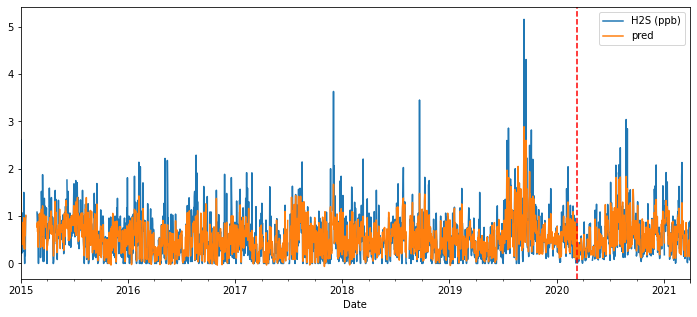

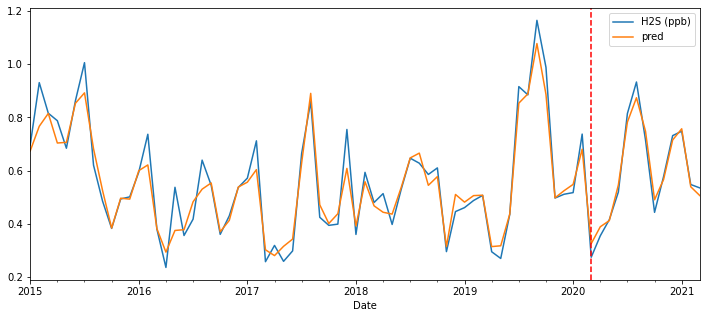

In [ ]:
model= xgb.XGBRegressor(booster = booster, reg_lambda=lambdaa, alpha=alpha,  
                          max_depth = max_depth, eta = eta, gamma = gamma,
                          grow_policy = grow_policy,
                          # n_estimators=n_estimators,
                          objective ='reg:squarederror', 
                          #normalize_type=normalize_type,sample_type=sample_type,rate_drop=rate_drop,skip_drop=skip_drop,
                          random_state=42)

eval_set = [(X_val, y_val)]
model.fit(X_traine, y_traine, early_stopping_rounds=20, eval_metric="rmse", eval_set=eval_set)


preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

# model.load_weights(fn)
preds = model.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
# model.load_weights(fn)
preds = model.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))


# df3= df3.copy()
df4 = df1_w_c.copy() #hereee
df4['pred'] = model.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean().copy()
df10.dropna(inplace= True)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(df10[aa]).reshape(-1,1)
y_pred = np.array(df10['pred']).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Enitre data- daily averaged',fontsize=30)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()
print(par)
print('RMSE')
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))



df4[aa].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4.columns

Index(['H2S (ppb)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
preds = model.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = [ 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend']
test_col = [aa]


df1_w_c = df1_w[[aa, 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
        ]]
Y = df1_w_c[ aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/LowerCamp_H2S_OT_XG_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/LowerCamp_H2S_OT_XG_Test.csv')


[0.67010053]
0.532936339145687
[0.72053342]
0.40343485252667977


In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

Streaming output truncated to the last 5000 lines.
179
0.618224561214447
2021-01-18 06:00:00
179
0.5984814763069153
2021-01-18 07:00:00
180
0.6050596237182617
2021-01-18 08:00:00
180
0.5928491353988647
2021-01-18 09:00:00
178
0.5971406102180481
2021-01-18 10:00:00
175
0.636290431022644
2021-01-18 11:00:00
174
0.6308515071868896
2021-01-18 12:00:00
170
0.6348767280578613
2021-01-18 13:00:00
169
0.642545223236084
2021-01-18 14:00:00
174
0.6838215589523315
2021-01-18 15:00:00
173
0.7168508768081665
2021-01-18 16:00:00
174
0.7389319539070129
2021-01-18 17:00:00
179
0.7287793159484863
2021-01-18 18:00:00
179
0.7085862755775452
2021-01-18 19:00:00
183
0.7083970308303833
2021-01-18 20:00:00
184
0.7070149183273315
2021-01-18 21:00:00
182
0.6578940749168396
2021-01-18 22:00:00
182
0.6465833187103271
2021-01-18 23:00:00
183
0.6245504021644592
2021-01-19 00:00:00
182
0.5936894416809082
2021-01-19 01:00:00
182
0.5878914594650269
2021-01-19 02:00:00
181
0.576799213886261
2021-01-19 03:00:00
182
0.6

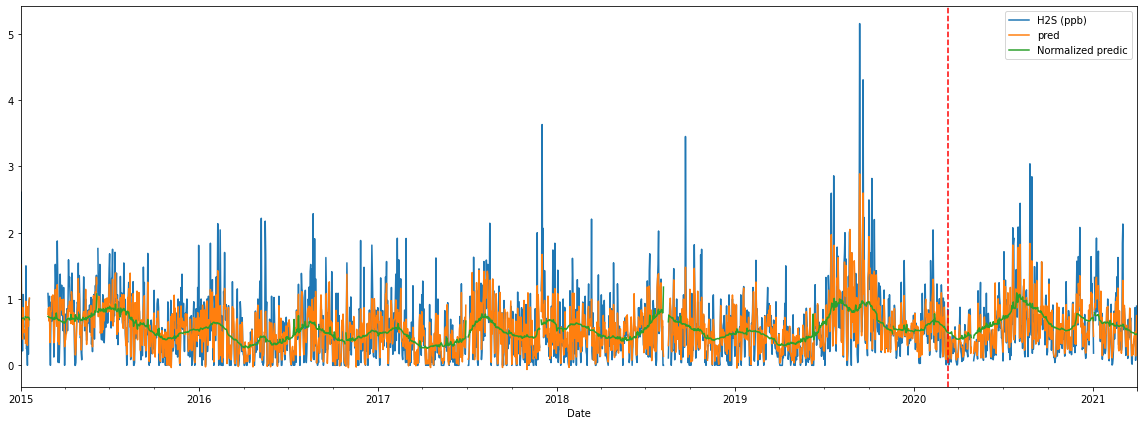

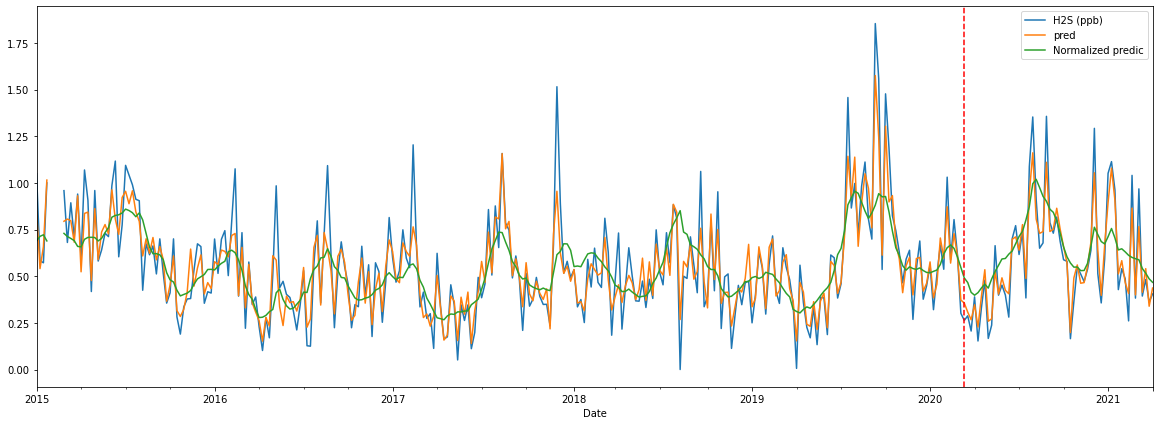

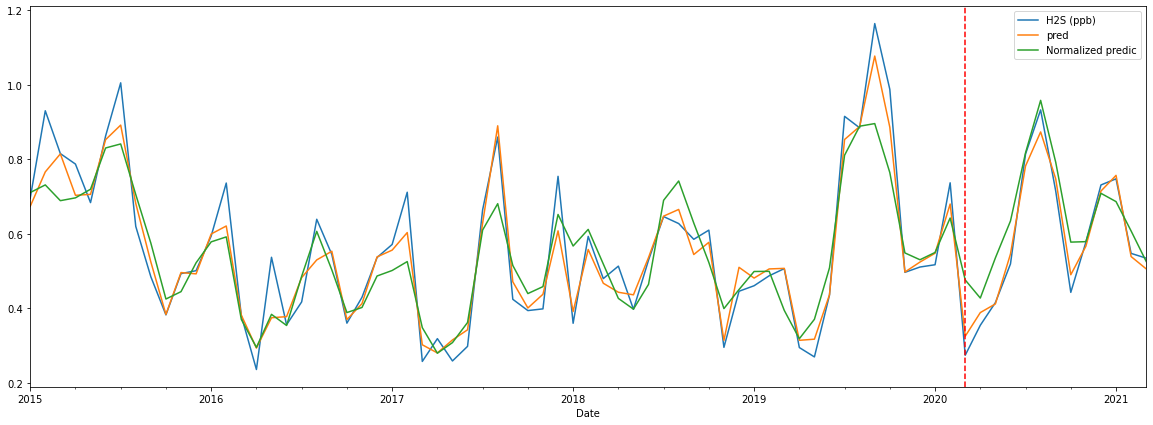

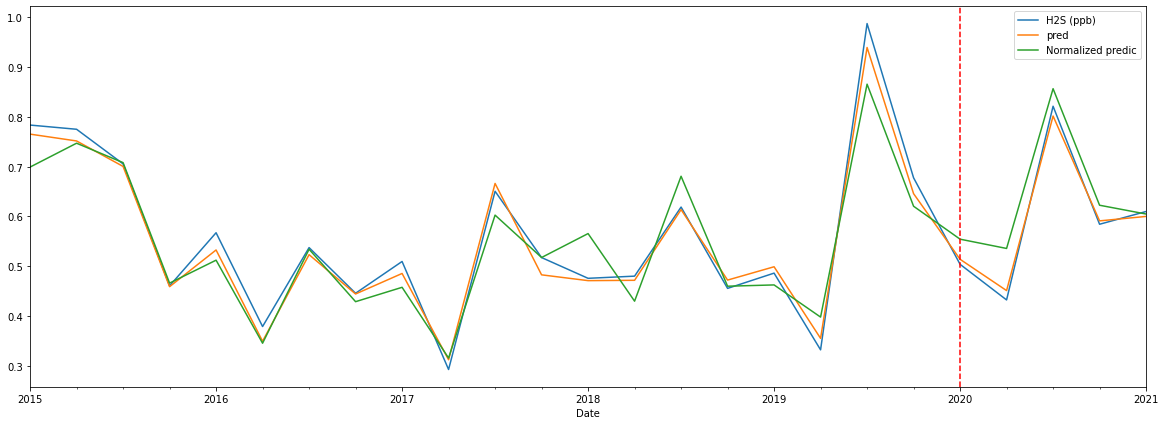

In [ ]:
z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()
df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Lower_Camp_H2S_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Lower_Camp_H2S_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Lower_Camp_H2S_Monthly_normalized_pred.csv')

for i in ['H','D','W','M','Q']:
    df4_h[aa].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

In [ ]:
############

In [ ]:
maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

avg = df1_w['score'].mean()
std = df1_w['score'].std()

print(avg,std)

5.696964172367998 4.783614655325343


In [ ]:
df1_w

H2S (ppb)  T ( C)  RH %  ...  Day-year      trend      score
Date                                          ...                                
2015-01-01 00:00:00        0.0   -13.1  85.0  ...         1  15.000000   9.958333
2015-01-01 01:00:00        0.0   -13.4  81.0  ...         1  15.000114   8.478571
2015-01-01 02:00:00        0.0   -13.9  78.0  ...         1  15.000228   3.699048
2015-01-01 03:00:00        0.0   -14.4  77.0  ...         1  15.000342   5.956038
2015-01-01 04:00:00        0.0   -14.6  78.0  ...         1  15.000455  10.314286
...                        ...     ...   ...  ...       ...        ...        ...
2021-03-31 19:00:00        1.5     2.3  71.5  ...        90  21.245332   6.136870
2021-03-31 20:00:00        4.6     3.1  66.8  ...        90  21.245446   6.066667
2021-03-31 21:00:00        5.9     5.7  47.6  ...        90  21.245560  20.311667
2021-03-31 22:00:00        3.3     5.7  46.0  ...        90  21.245674  14.442105
2021-03-31 23:00:00        1.1     4.9  48.5  ...        90  21.245788   2.383951

[51689 rows x 15 columns]

In [ ]:
df1_w

H2S (ppb)  T ( C)  RH %  ...  Day-year      trend      score
Date                                          ...                                
2015-01-01 00:00:00        0.0   -13.1  85.0  ...         1  15.000000   9.958333
2015-01-01 01:00:00        0.0   -13.4  81.0  ...         1  15.000114   8.478571
2015-01-01 02:00:00        0.0   -13.9  78.0  ...         1  15.000228   3.699048
2015-01-01 03:00:00        0.0   -14.4  77.0  ...         1  15.000342   5.956038
2015-01-01 04:00:00        0.0   -14.6  78.0  ...         1  15.000455  10.314286
...                        ...     ...   ...  ...       ...        ...        ...
2021-03-31 19:00:00        1.5     2.3  71.5  ...        90  21.245332   6.136870
2021-03-31 20:00:00        4.6     3.1  66.8  ...        90  21.245446   6.066667
2021-03-31 21:00:00        5.9     5.7  47.6  ...        90  21.245560  20.311667
2021-03-31 22:00:00        3.3     5.7  46.0  ...        90  21.245674  14.442105
2021-03-31 23:00:00        1.1     4.9  48.5  ...        90  21.245788   2.383951

[51689 rows x 15 columns]

In [ ]:
class Objective(object):
    def __init__(self,df1_w, max_epochs, learn_rate_epochs,
                  ):
        # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, Y_scaler, test_size=0.001, random_state=42)
        # self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=0.11, random_state=42)
        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.df1_w = df1_w.copy()
        self.n_features = len(self.df1_w.columns)-1

    def __call__(self, trial):        
        dict_params = {
                        "score" : trial.suggest_float( 'score', avg + 2*std, avg + 5 * std ),
                        'layers': trial.suggest_int('layers', 2,3),
                        'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                        'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,5000,500)),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 20,40),
                        'delta': trial.suggest_float(  'delta',1, 100),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                       'drop_out1': trial.suggest_float('drop_out1',0.05, 0.3)}  
        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        dict_params['num_dense_nodes2'] = trial.suggest_int('num_dense_nodes2', 20,40)
        dict_params['drop_out2'] =trial.suggest_float('drop_out2',0.05, 0.5)

        if dict_params['layers'] == 3:
            dict_params['num_dense_nodes3'] = trial.suggest_int('num_dense_nodes3', 5,40)
            dict_params['drop_out3'] = trial.suggest_float('drop_out3',0.05, 0.5)


        self.df_nn =  self.df1_w[self.df1_w['score'] <  dict_params["score"]].copy()
        self.df_nn.drop(columns = ['score'], inplace = True)
        self.Y =   self.df_nn[aa]
        self.Y = np.array(self.Y).reshape(-1,1)
        self.X = np.array( self.df_nn[  self.df_nn.columns[1:]])
        self.X_train =self.X
        self.y_train =self.Y
        # self.X_train,  self.X_test,  self.y_train, self.y_test = train_test_split( self.X,   self.Y, test_size=0.000000001, random_state = 42)

          
        model = Sequential()
        model.add(BatchNormalization())
        model.add(Dense(dict_params['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha= dict_params[ 'alpha'])) 
        model.add(Dropout(dict_params['drop_out1']))
        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        model.add(Dense(dict_params['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
        model.add(Dropout(dict_params['drop_out2']))
        if dict_params['layers'] == 3 :
            model.add(Dense(dict_params['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
            model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
            model.add(Dropout(dict_params['drop_out3']))
        model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params[ 'learning_rate'])
        model.compile(loss=
                      # 'mse',
                      tf.keras.losses.Huber( delta=dict_params[ 'delta']),
                      # 'mse'
                          optimizer=opt)
        fn = "gdrive/My Drive/Colab Notebooks/Stations/LowerCamp_H2S" +str(trial.number) + ".ckpt" 
        fnn = os.path.dirname(fn)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 4
        kf = KFold(n_splits=n_f )
        acc = 0 
        for train_index, test_index in kf.split( self.X_train):   
                X_tr, X_tes =  self.X_train[train_index],  self.X_train[test_index]
                y_tr, y_tes =   self.y_train[train_index],   self.y_train[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state = 42)
                h = model.fit(x=X_tra, y=y_tra,
                                  validation_data=(X_val, y_val),
                                  batch_size=dict_params['batchsize'],
                                  epochs=self.max_epochs,
                                  shuffle=True, verbose=0,
                                  callbacks=callbacks_list)
                model.load_weights(fn)
                preds = model.predict(X_tes)
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 

        print(acc)
        return acc    

In [ ]:
# objective = Objective(df1_w,maximum_epochs,learning_rate_epochs)
# study = optuna.create_study(direction=optimizer_direction, study_name='LowerCamp_H2S__NN', storage='sqlite:///LowerCamp__H2S__NN.db',
#                             load_if_exists=True)
# study.optimize(objective, n_trials=500)
df_results = study.trials_dataframe()
df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/NN_OT_LowerCampd_Lake_H2S_HP_HUBer.csv')
#df_results.to_pickle('Desktop\heel\df_optuna_results.pkl')

In [ ]:
study.best_trials

[FrozenTrial(number=364, values=[0.6028769902799673], datetime_start=datetime.datetime(2021, 5, 19, 0, 44, 11, 370921), datetime_complete=datetime.datetime(2021, 5, 19, 0, 45, 43, 269689), params={'score': 16.033755908667118, 'layers': 2, 'alpha': 0.01222833676518035, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 20.416905979798145, 'learning_rate': 0.006112826278607543, 'drop_out1': 0.17690438051594098, 'num_dense_nodes2': 32, 'drop_out2': 0.15448846221006413}, distributions={'score': UniformDistribution(high=29.615037448994716, low=15.264193483018683), 'layers': IntUniformDistribution(high=3, low=2, step=1), 'alpha': UniformDistribution(high=0.9, low=0.01), 'batchsize': DiscreteUniformDistribution(high=4600.0, low=100.0, q=500.0), 'num_dense_nodes1': IntUniformDistribution(high=40, low=20, step=1), 'delta': UniformDistribution(high=100.0, low=1.0), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'drop_out1': UniformDistribution(high=0.3, low=0.05), 'num_dense_nodes

In [ ]:
study.best_params

{'alpha': 0.01222833676518035,
 'batchsize': 3600.0,
 'delta': 20.416905979798145,
 'drop_out1': 0.17690438051594098,
 'drop_out2': 0.15448846221006413,
 'layers': 2,
 'learning_rate': 0.006112826278607543,
 'num_dense_nodes1': 37,
 'num_dense_nodes2': 32,
 'score': 16.033755908667118}

In [ ]:
best_params =  {'alpha': 0.01222833676518035,
 'batchsize': 3600.0,
 'delta': 20.416905979798145,
 'drop_out1': 0.17690438051594098,
 'drop_out2': 0.15448846221006413,
 'layers': 2,
 'learning_rate': 0.006112826278607543,
 'num_dense_nodes1': 37,
 'num_dense_nodes2': 32,
 'score': 16.033755908667118} #(number=364, values=[0.6028769902799673]

In [ ]:
df1_w_cn=  df1_w[df1_w['score'] <  best_params["score"]].copy()
df1_w_cn.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_LowerCamp_H2S_Dataset.csv')

df1_w_c = df1_w_cn.copy()  
# df1_w_c = df1_w.copy() 
df1_w_c.drop(columns = ['score'], inplace = True)
print(len(df1_w_c)*100/len(df1_w))
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)



maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds
best_params

97.32825165896033


{'alpha': 0.01222833676518035,
 'batchsize': 3600.0,
 'delta': 20.416905979798145,
 'drop_out1': 0.17690438051594098,
 'drop_out2': 0.15448846221006413,
 'layers': 2,
 'learning_rate': 0.006112826278607543,
 'num_dense_nodes1': 37,
 'num_dense_nodes2': 32,
 'score': 16.033755908667118}

In [ ]:
df1_w_c.columns

Index(['H2S (ppb)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

Epoch 1/250
8/8 - 1s - loss: 0.5997 - val_loss: 0.6100
Epoch 2/250
8/8 - 0s - loss: 0.4662 - val_loss: 2.6062
Epoch 3/250
8/8 - 0s - loss: 0.4374 - val_loss: 0.8707
Epoch 4/250
8/8 - 0s - loss: 0.4305 - val_loss: 1.5864
Epoch 5/250
8/8 - 0s - loss: 0.4265 - val_loss: 0.8564
Epoch 6/250
8/8 - 0s - loss: 0.4244 - val_loss: 0.8865
Epoch 7/250
8/8 - 0s - loss: 0.4210 - val_loss: 0.7118
Epoch 8/250
8/8 - 0s - loss: 0.4203 - val_loss: 0.7429
Epoch 9/250
8/8 - 0s - loss: 0.4184 - val_loss: 0.6185
Epoch 10/250
8/8 - 0s - loss: 0.4163 - val_loss: 0.5767
Epoch 11/250
8/8 - 0s - loss: 0.4159 - val_loss: 0.5873
Epoch 12/250
8/8 - 0s - loss: 0.4140 - val_loss: 0.5024
Epoch 13/250
8/8 - 0s - loss: 0.4127 - val_loss: 0.5251
Epoch 14/250
8/8 - 0s - loss: 0.4101 - val_loss: 0.4938
Epoch 15/250
8/8 - 0s - loss: 0.4096 - val_loss: 0.5028
Epoch 16/250
8/8 - 0s - loss: 0.4093 - val_loss: 0.4803
Epoch 17/250
8/8 - 0s - loss: 0.4083 - val_loss: 0.4736
Epoch 18/250
8/8 - 0s - loss: 0.4073 - val_loss: 0.4598
E

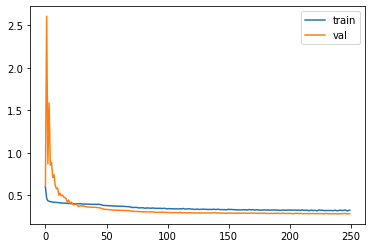

Model: "sequential_457"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_457 (Bat (None, 13)                52        
_________________________________________________________________
dense_1490 (Dense)           (None, 37)                518       
_________________________________________________________________
leaky_re_lu_1490 (LeakyReLU) (None, 37)                0         
_________________________________________________________________
dropout_1033 (Dropout)       (None, 37)                0         
_________________________________________________________________
dense_1491 (Dense)           (None, 32)                1216      
_________________________________________________________________
leaky_re_lu_1491 (LeakyReLU) (None, 32)                0         
_________________________________________________________________
dropout_1034 (Dropout)       (None, 32)             

In [ ]:
model_NN = Sequential()
model_NN.add(BatchNormalization())
model_NN.add(Dense(best_params ['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha= best_params [ 'alpha'])) 
model_NN.add(Dropout(best_params ['drop_out1']))
# if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
model_NN.add(Dense(best_params ['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
model_NN.add(Dropout(best_params ['drop_out2']))
if best_params ['layers'] == 3 :
    model_NN.add(Dense(best_params ['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
    model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
    model_NN.add(Dropout(best_params ['drop_out3']))
model_NN.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
# instantiate and compile model
opt = keras.optimizers.Adam(learning_rate=best_params [ 'learning_rate'])
model_NN.compile(loss=
                #  'mse',
              tf.keras.losses.Huber( delta=best_params[ 'delta']),
              # 'mse'
                  optimizer=opt)
fn = "gdrive/My Drive/Colab Notebooks/Stations/Training_H2S_LowerCamp_2012_OUT.ckpt" 
fnn = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer
callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stop_epochs),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model_NN.fit(x=X_traine, y= y_traine,
                  validation_data=(X_val, y_val),
                  batch_size=int(best_params['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
model_NN.summary()

In [ ]:
model_NN.load_weights(fn)
precovid_model = 'gdrive/My Drive/Colab Notebooks/LowerCamp_H2S.h5'
model_NN.save(precovid_model )

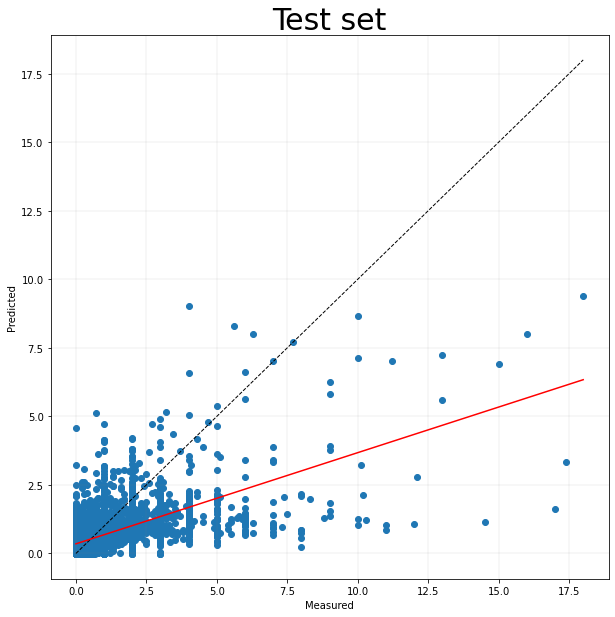

[0.33256121 0.35096767]
RMSE
[0.79633978]
R2
0.34809599640708755


[0.33716826 0.34850371]
RMSE
[0.76443342]
R2
0.36626033778885114


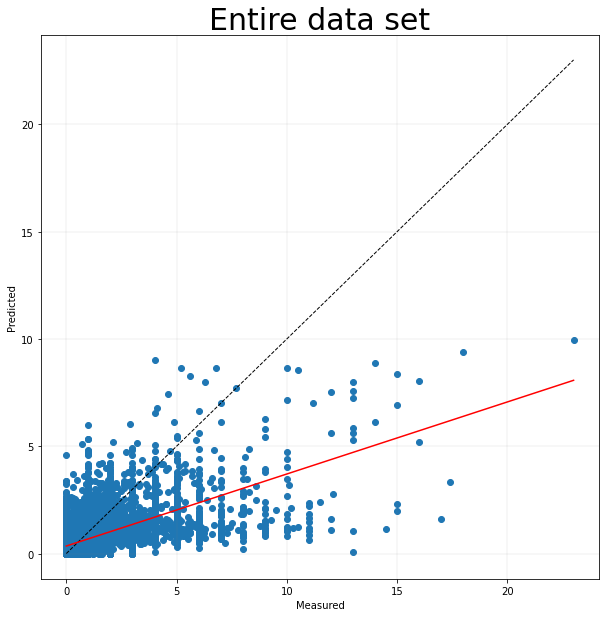

[0.33573332 0.34925924]
RMSE
[0.7741438]
R2
0.3606314462093837


In [ ]:
preds = model_NN.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

# model.load_weights(fn)
preds = model_NN.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
# model.load_weights(fn)
preds = model_NN.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

In [ ]:
model_NN = load_model(precovid_model )
model_NN.summary()
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.5], [0,0.5], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

Model: "sequential_457"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_457 (Bat (None, 13)                52        
_________________________________________________________________
dense_1490 (Dense)           (None, 37)                518       
_________________________________________________________________
leaky_re_lu_1490 (LeakyReLU) (None, 37)                0         
_________________________________________________________________
dropout_1033 (Dropout)       (None, 37)                0         
_________________________________________________________________
dense_1491 (Dense)           (None, 32)                1216      
_________________________________________________________________
leaky_re_lu_1491 (LeakyReLU) (None, 32)                0         
_________________________________________________________________
dropout_1034 (Dropout)       (None, 32)             

In [ ]:
# df3= df3.copy()
df4 = df1_w_c.copy()
df4['pred'] = model_NN.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

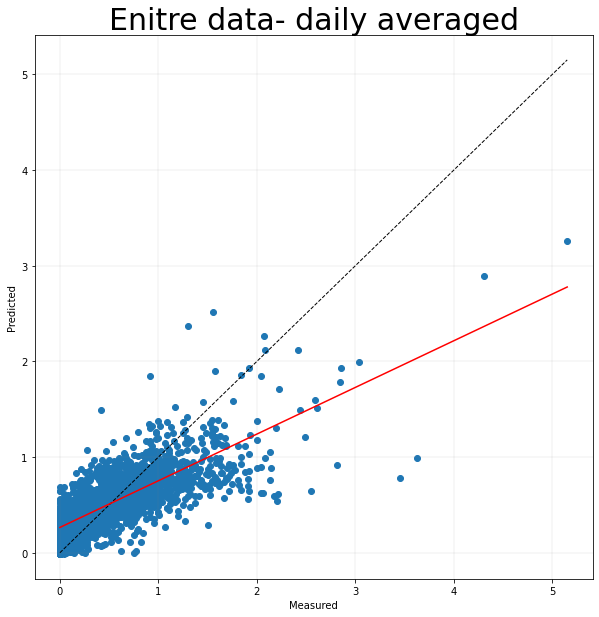

[0.48784531 0.26448778]
RMSE
[0.32767092]
R2
0.5493591095723993


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10[aa]).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


In [ ]:
df4.columns

Index(['H2S (ppb)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

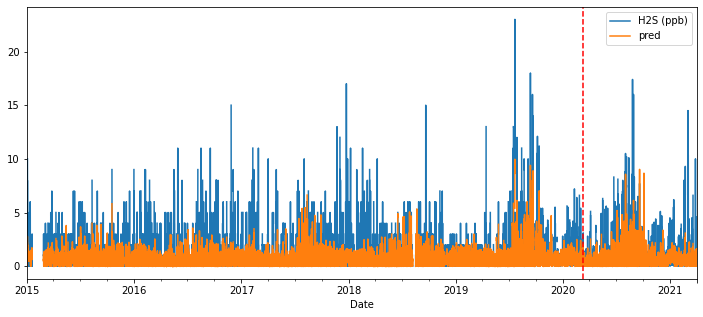

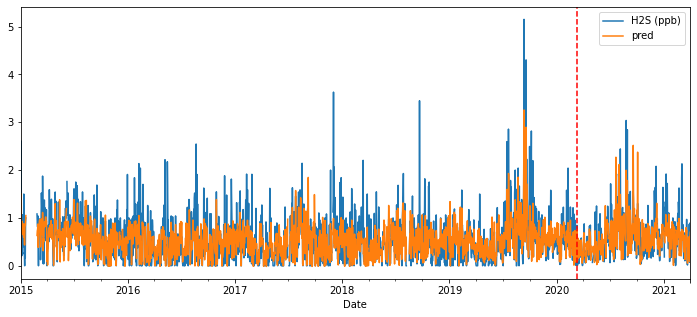

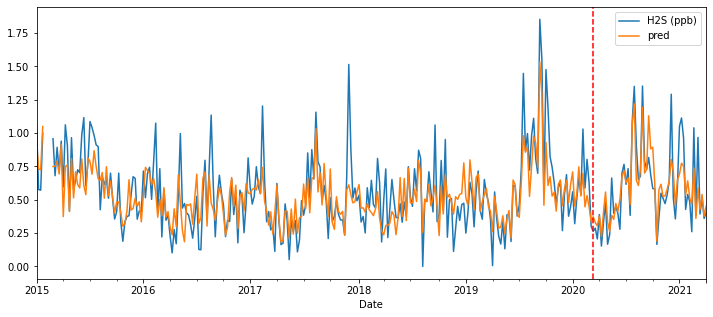

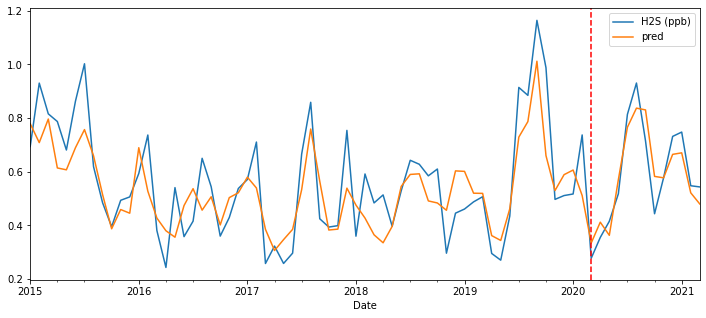

In [ ]:
df4[aa].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
preds1 = model_NN.predict(X_train) 
y_real1 = y_train.reshape(-1,1)
y_pred1 = preds1.reshape(-1,1)
print(rmse(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))

[0.76443342]
0.36626033778885114


In [ ]:
preds = model_NN.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

[0.79633978]
0.34809599640708755


In [ ]:
df4.columns

Index(['H2S (ppb)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
preds = model_NN.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model_NN.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = ['T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend']
test_col = [aa]


df1_w_c = df1_w[[aa, 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
        ]]
Y = df1_w_c[ aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/LowerCamp_NN_H2S_OR_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/LowerCamp_NN_H2S_OR_Test.csv')

[0.76443342]
0.36626033778885114
[0.79633978]
0.34809599640708755


In [ ]:
df4.columns

Index(['H2S (ppb)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model_NN.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

Streaming output truncated to the last 5000 lines.
179
0.6434841156005859
2021-01-18 07:00:00
180
0.6223303079605103
2021-01-18 08:00:00
180
0.6240392327308655
2021-01-18 09:00:00
178
0.607531726360321
2021-01-18 10:00:00
176
0.5951157808303833
2021-01-18 11:00:00
174
0.5905807614326477
2021-01-18 12:00:00
172
0.5695179104804993
2021-01-18 13:00:00
169
0.5828158259391785
2021-01-18 14:00:00
174
0.611387312412262
2021-01-18 15:00:00
173
0.6343184113502502
2021-01-18 16:00:00
174
0.6332998275756836
2021-01-18 17:00:00
179
0.6445610523223877
2021-01-18 18:00:00
179
0.6362513303756714
2021-01-18 19:00:00
183
0.6746973991394043
2021-01-18 20:00:00
184
0.6936091780662537
2021-01-18 21:00:00
182
0.6680191159248352
2021-01-18 22:00:00
182
0.664360761642456
2021-01-18 23:00:00
183
0.6678020358085632
2021-01-19 00:00:00
182
0.6152418851852417
2021-01-19 01:00:00
182
0.6058307886123657
2021-01-19 02:00:00
181
0.6049356460571289
2021-01-19 03:00:00
182
0.6272531747817993
2021-01-19 04:00:00
182
0.

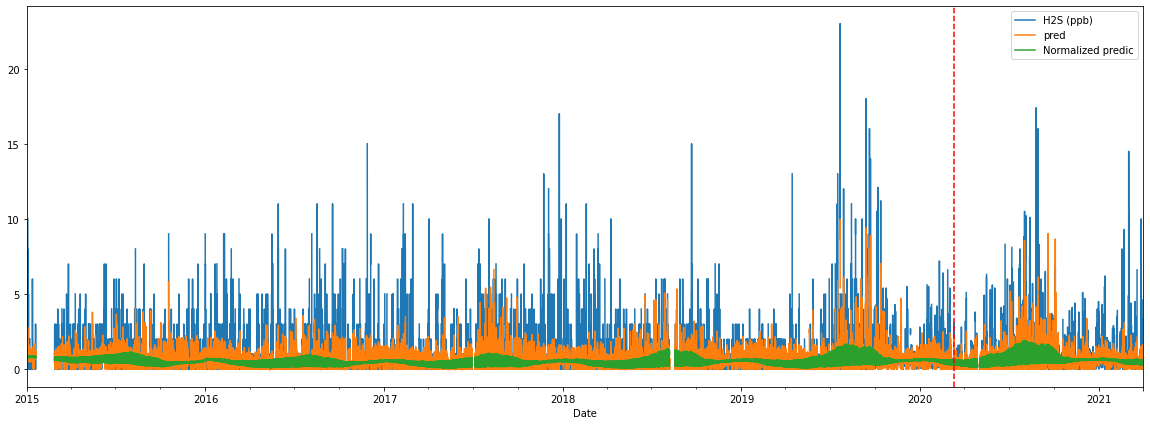

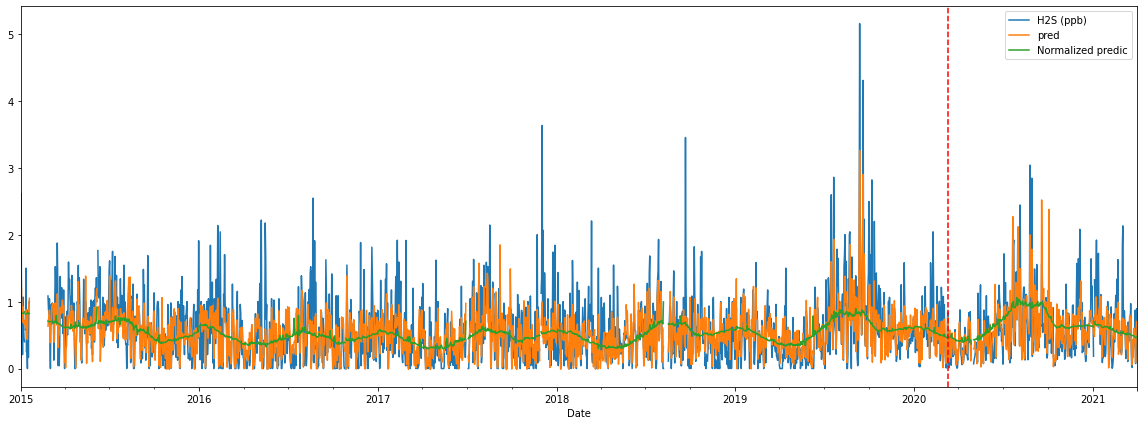

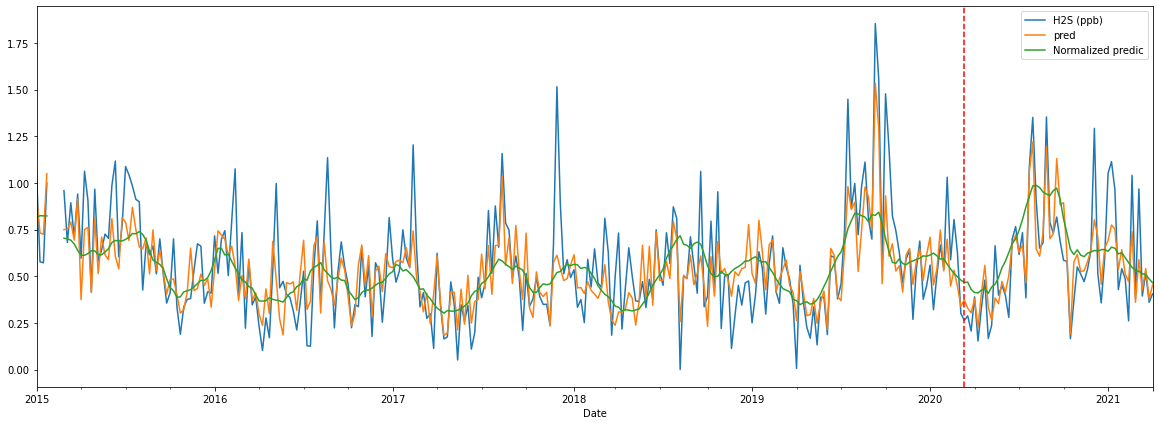

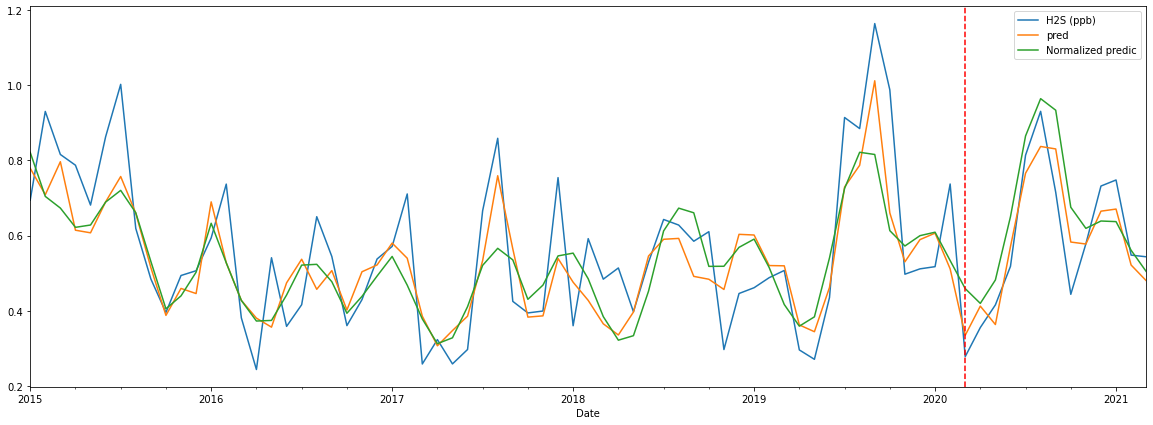

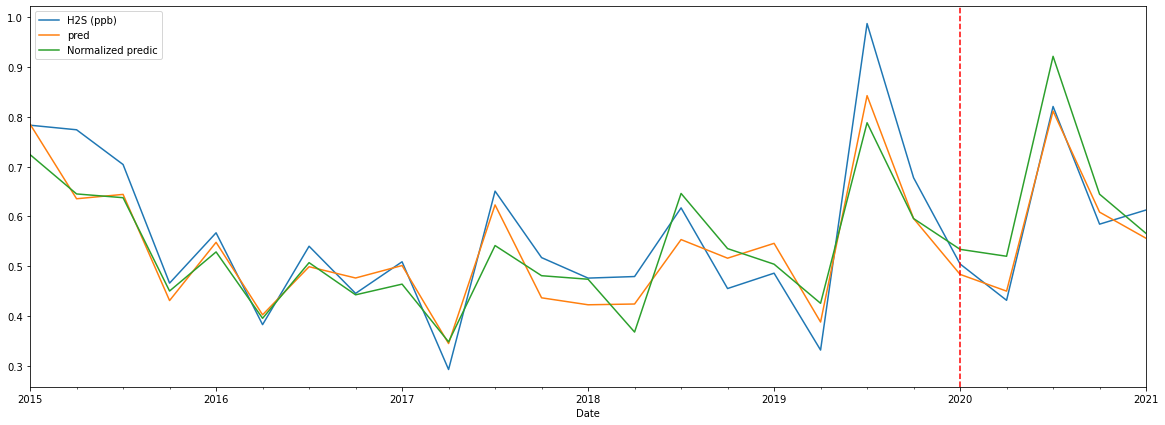

In [ ]:
z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()
df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_LowerCamp_H2S_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_LowerCampe_H2S_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_LowerCamp_H2S_Monthly_normalized_pred.csv')


for i in ['H','D','W','M','Q']:
    df4_h[aa].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

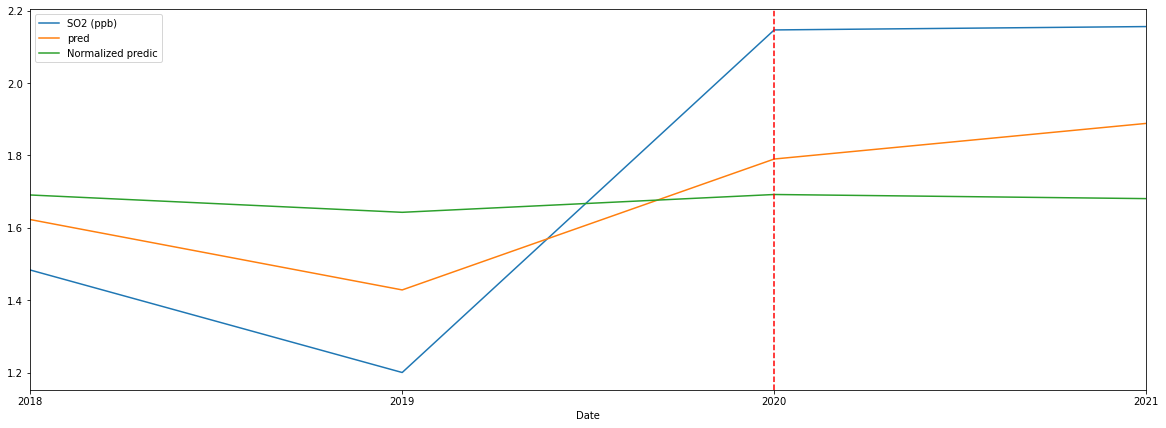

In [ ]:
df4_h['SO2 (ppb)'].resample('Y').mean().loc['2018':].plot(legend= True)
df4_h['pred'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
df4_h['Normalized predic'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
####

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate


df2_w_c = df2_w[[ 'CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend',
       'driving', 'transit','walking',
]]
df2_w_c.columns

Index(['CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend', 'driving', 'transit',
       'walking'],
      dtype='object')

In [ ]:
df2_w_c[['driving', 'transit', 'walking']]=df2_w_c[['driving', 'transit', 'walking']]/100

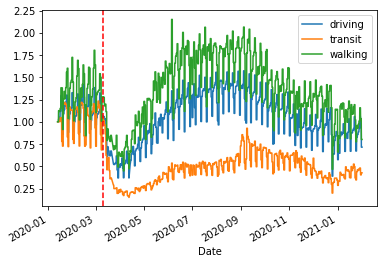

In [ ]:
df2_w_c[['driving', 'transit', 'walking']].plot()
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
a = df2_w_c[['driving', 'transit', 'walking']].loc[:'2020-03-11'].copy()
a.mean()

driving    1.124019
transit    1.025378
walking    1.331329
dtype: float64

In [ ]:
Y_a = df2_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df2_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df2_w_c[ ['driving', 'transit', 'walking']])


X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
print(np.shape(X_a),np.shape(X_b),np.shape(Y_a))

(9075, 12) (9075, 3) (9075, 1)


In [ ]:
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

In [ ]:
print(np.shape(X_train_a),np.shape(X_train_b))
print(np.shape(X_traine_a),np.shape(X_traine_b))
print(np.shape(X_val_a),np.shape(X_val_b))

(7260, 12) (7260, 3)
(5445, 12) (5445, 3)
(1815, 12) (1815, 3)


In [ ]:
best_params

{'batchsize': 2500.0,
 'drop_out1': 0.0057066589968766,
 'drop_out2': 0.008999530008727568,
 'drop_out3': 0.0006990849923195847,
 'layers': 3,
 'num_dense_nodes1': 35,
 'num_dense_nodes2': 24,
 'num_dense_nodes3': 28}

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 35)                455       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 35)                0         
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                864       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24)                0

In [ ]:
class Objective2(object):
    def __init__(self, X_a,X_b, Y, max_epochs, learn_rate_epochs,
                  ):
        self.X_train_a, self.X_test_a, self.y_train_a, self.y_test_a = train_test_split(X_a, Y, test_size=0.001, random_state=42)
        self.X_train_b, self.X_test_b, self.y_train_b, self.y_test_b = train_test_split(X_b, Y, test_size=0.001, random_state=42)

        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.model_fixed = load_model(precovid_model)
        for i in range(0,len(self.model_fixed.layers)):
            self.model_fixed.layers[i].trainable = False

    def __call__(self, trial):        
        dict_params = { 
                        'last_layer' :trial.suggest_int('last_layer',0,1),
                        'two_layer' :trial.suggest_int('two_layer',0,1),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 1,3),
                       'num_dense_nodes2': trial.suggest_int('num_dense_nodes2', 1,8),
                        # 'layers': trial.suggest_int('layers', 2,3),
                       'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,2000,100)),
                      #  'drop_out1': trial.suggest_float('drop_out1',0.0, 0.2),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                        'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                       'layer_back' :-(trial.suggest_int('layer_back', 1,2)),
                       }  
        # print(dict_params[ 'layer_back'])
        l1 = Input(shape=(3,))
        l1_2 = BatchNormalization()(l1)
        l2 = Dense(dict_params['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
        l2_2 = LeakyReLU(alpha=dict_params['alpha'])(l2)
        if dict_params['two_layer'] ==1 :
             l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_3])
        else :
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_2])
        merged2 = BatchNormalization()(merged)

        if dict_params['last_layer'] == 0:
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)

        if dict_params['last_layer'] == 1:
            l5 = Dense(dict_params['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
            l5_1 = LeakyReLU(alpha=dict_params['alpha'])(l5)
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)          
        
        model = Model(inputs=[self.model_fixed.input,l1], outputs=l5_3)

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params['learning_rate'])
        model.compile(loss='mse',optimizer=opt)
        fn2 = "gdrive/My Drive/Colab Notebooks/Stations/East_ED_NOX_apple" +str(trial.number) + ".ckpt" 
        fnn2 = os.path.dirname(fn2)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn2, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 5
        kf = KFold(n_splits=n_f )
        acc = 0 

        for train_index, test_index in kf.split( self.X_train_a):   
                X_tr_a, X_tes_a =  self.X_train_a[train_index],  self.X_train_a[test_index]
                X_tr_b, X_tes_b =  self.X_train_b[train_index],  self.X_train_b[test_index]
                y_tr, y_tes =   self.y_train_a[train_index],   self.y_train_a[test_index]    
                # fit the model
                X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split( X_tr_a,  y_tr, test_size=0.12, random_state = 42)
                X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split( X_tr_b,  y_tr, test_size=0.12, random_state = 42)


                model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=dict_params['batchsize'],
                  epochs=self.max_epochs,
                  shuffle=True, verbose=0,
                  callbacks=callbacks_list)
                
                model.load_weights(fn2)
                preds = model.predict([X_tes_a,X_tes_b]) 
                # print(np.shape(y_tes),np.shape( preds))
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 
        print(acc)
        return acc    

In [ ]:
objective2 = Objective2(X_a, X_b ,Y_a ,maximum_epochs, learning_rate_epochs)
study2 = optuna.create_study(direction=optimizer_direction, study_name='east_edm_CO_p2',storage='sqlite:///east_edm_CO_p2.db',load_if_exists=True)
study2.optimize(objective2, n_trials=300)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/CO_Edmonton_east_Hyperparams_Stations.csv')
study2.best_trial

[I 2021-04-18 06:37:44,453] A new study created in RDB with name: east_edm_CO_p2
[I 2021-04-18 06:40:22,320] Trial 0 finished with value: 0.0047897337392556185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 3, 'batchsize': 1300.0, 'learning_rate': 0.08684742896034063, 'alpha': 0.47486431649895633, 'layer_back': 1}. Best is trial 0 with value: 0.0047897337392556185.


0.0047897337392556185


[I 2021-04-18 06:46:17,741] Trial 1 finished with value: 0.0037995427144006185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 200.0, 'learning_rate': 0.026645640165432177, 'alpha': 0.2464432589680267, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0037995427144006185


[I 2021-04-18 06:49:06,028] Trial 2 finished with value: 0.004990117939045318 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1200.0, 'learning_rate': 0.04246052710121524, 'alpha': 0.14036321226448864, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.004990117939045318


[I 2021-04-18 06:51:38,749] Trial 3 finished with value: 0.004435081840883617 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.08019349670014007, 'alpha': 0.801795208357617, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004435081840883617


[I 2021-04-18 06:55:41,325] Trial 4 finished with value: 0.004397006773851628 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 400.0, 'learning_rate': 0.0922021495386216, 'alpha': 0.8714206976745991, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004397006773851628


[I 2021-04-18 06:58:39,803] Trial 5 finished with value: 0.004472224808431502 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 1, 'batchsize': 900.0, 'learning_rate': 0.054032085513753485, 'alpha': 0.36356263089297863, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004472224808431502


[I 2021-04-18 07:02:19,968] Trial 6 finished with value: 0.004032658481373844 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 500.0, 'learning_rate': 0.0034103388646587085, 'alpha': 0.8298599523597091, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004032658481373844


[I 2021-04-18 07:04:57,913] Trial 7 finished with value: 0.004412881161440907 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1400.0, 'learning_rate': 0.024560851403922612, 'alpha': 0.8657303593335849, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004412881161440907


[I 2021-04-18 07:07:33,362] Trial 8 finished with value: 0.003962766007027832 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1600.0, 'learning_rate': 0.0387484515918348, 'alpha': 0.5935061142207385, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.003962766007027832


[I 2021-04-18 07:10:45,080] Trial 9 finished with value: 0.004464174746733434 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 700.0, 'learning_rate': 0.07156430296741274, 'alpha': 0.6837562117270939, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004464174746733434


[I 2021-04-18 07:20:10,927] Trial 10 finished with value: 0.0047593223285363065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.006393597974084786, 'alpha': 0.09784392044369339, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.0047593223285363065


[I 2021-04-18 07:22:40,517] Trial 11 finished with value: 0.0038559859859853907 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 4, 'batchsize': 1900.0, 'learning_rate': 0.029641261114048665, 'alpha': 0.3455488342982123, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0038559859859853907


[I 2021-04-18 07:25:12,650] Trial 12 finished with value: 0.0037802072596256108 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 2000.0, 'learning_rate': 0.021318248161901757, 'alpha': 0.27421676161966496, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.0037802072596256108


[I 2021-04-18 07:34:39,100] Trial 13 finished with value: 0.003838305552608133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.01618259930894679, 'alpha': 0.2237909588852787, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.003838305552608133


[I 2021-04-18 07:37:13,171] Trial 14 finished with value: 0.0037727934709037452 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 1600.0, 'learning_rate': 0.05463156741271952, 'alpha': 0.023432883667647286, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.0037727934709037452


[I 2021-04-18 07:39:46,194] Trial 15 finished with value: 0.004717376020706112 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.057774493852787316, 'alpha': 0.013468966566860257, 'layer_back': 1}. Best is trial 14 with value: 0.0037727934709037452.


0.004717376020706112


[I 2021-04-18 07:42:17,141] Trial 16 finished with value: 0.003891606393255513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 4, 'batchsize': 1600.0, 'learning_rate': 0.06483099406582218, 'alpha': 0.048701457819810334, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.003891606393255513


[I 2021-04-18 07:44:50,068] Trial 17 finished with value: 0.003705317767648349 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.042981081545902175, 'alpha': 0.17151924705879706, 'layer_back': 2}. Best is trial 17 with value: 0.003705317767648349.


0.003705317767648349


[I 2021-04-18 07:47:22,992] Trial 18 finished with value: 0.003652074267837431 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043120594200074316, 'alpha': 0.15356515832757994, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003652074267837431


[I 2021-04-18 07:49:56,748] Trial 19 finished with value: 0.004855364207538971 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.03948108446690251, 'alpha': 0.1731767923827432, 'layer_back': 1}. Best is trial 18 with value: 0.003652074267837431.


0.004855364207538971


[I 2021-04-18 07:52:46,818] Trial 20 finished with value: 0.0036661417054684184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.045596783441498825, 'alpha': 0.46487314129271234, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0036661417054684184


[I 2021-04-18 07:55:47,695] Trial 21 finished with value: 0.003772814522212643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.04376219782019011, 'alpha': 0.495381372771252, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003772814522212643


[I 2021-04-18 07:58:33,572] Trial 22 finished with value: 0.0037000579251144777 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03235269324681574, 'alpha': 0.40139723428257024, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037000579251144777


[I 2021-04-18 08:01:16,242] Trial 23 finished with value: 0.0037201394146138406 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.0335829823820747, 'alpha': 0.561915944028579, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037201394146138406


[I 2021-04-18 08:04:15,280] Trial 24 finished with value: 0.0037030372913319023 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.01268992251227287, 'alpha': 0.3938061003278891, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037030372913319023


[I 2021-04-18 08:07:38,080] Trial 25 finished with value: 0.003918046517575021 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.04897050026188292, 'alpha': 0.6753399284001078, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003918046517575021


[I 2021-04-18 08:10:15,782] Trial 26 finished with value: 0.0038008433695184197 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.06522149016140043, 'alpha': 0.42163733919230845, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0038008433695184197


[I 2021-04-18 08:13:05,072] Trial 27 finished with value: 0.0036111388857046787 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.03298839085103375, 'alpha': 0.3150552800923347, 'layer_back': 2}. Best is trial 27 with value: 0.0036111388857046787.


0.0036111388857046787


[I 2021-04-18 08:16:08,056] Trial 28 finished with value: 0.003597443791057043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.04885615301916258, 'alpha': 0.29269304131799223, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.003597443791057043


[I 2021-04-18 08:19:12,662] Trial 29 finished with value: 0.0046809329310916956 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.05995146156015323, 'alpha': 0.30446311601011683, 'layer_back': 1}. Best is trial 28 with value: 0.003597443791057043.


0.0046809329310916956


[I 2021-04-18 08:21:45,673] Trial 30 finished with value: 0.004425357656736 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.0759352310855712, 'alpha': 0.21269011576180244, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.004425357656736


[I 2021-04-18 08:24:37,569] Trial 31 finished with value: 0.0036547160400316313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.049811468875869416, 'alpha': 0.510738346787994, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0036547160400316313


[I 2021-04-18 08:27:52,823] Trial 32 finished with value: 0.0037521087301732345 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.049503947678833926, 'alpha': 0.31735277463906175, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037521087301732345


[I 2021-04-18 08:30:36,307] Trial 33 finished with value: 0.0037683419447327986 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.03290226547777786, 'alpha': 0.5286190169685012, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037683419447327986


[I 2021-04-18 08:33:27,324] Trial 34 finished with value: 0.003597358919918322 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.036818841872599595, 'alpha': 0.12570513379804832, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003597358919918322


[I 2021-04-18 08:37:26,272] Trial 35 finished with value: 0.003661138596451478 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 400.0, 'learning_rate': 0.03671876888449163, 'alpha': 0.08397801305678194, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003661138596451478


[I 2021-04-18 08:40:27,101] Trial 36 finished with value: 0.00359203525150731 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.02437141103670945, 'alpha': 0.12749087727003588, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00359203525150731


[I 2021-04-18 08:43:26,782] Trial 37 finished with value: 0.0036756314419160397 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.018931547569790746, 'alpha': 0.2516407308762111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036756314419160397


[I 2021-04-18 08:48:02,902] Trial 38 finished with value: 0.0036545643870157882 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 300.0, 'learning_rate': 0.02603462599572944, 'alpha': 0.14443719906111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036545643870157882


[I 2021-04-18 08:51:18,641] Trial 39 finished with value: 0.004398658143913983 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.02412418866542985, 'alpha': 0.09261962247455818, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.004398658143913983


[I 2021-04-18 08:54:03,235] Trial 40 finished with value: 0.00366032853048446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 1200.0, 'learning_rate': 0.028075997597257207, 'alpha': 0.20259126107498393, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00366032853048446


[I 2021-04-18 08:57:05,594] Trial 41 finished with value: 0.003674477629447893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.03773808729024592, 'alpha': 0.13311556018712936, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.003674477629447893


[I 2021-04-18 08:59:59,665] Trial 42 finished with value: 0.0036705861586692643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.014115297813961467, 'alpha': 0.28611068588955, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036705861586692643


[I 2021-04-18 09:03:13,164] Trial 43 finished with value: 0.0036713389468197555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.04560695580139573, 'alpha': 0.3437569312771207, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036713389468197555


[I 2021-04-18 09:06:35,814] Trial 44 finished with value: 0.0035783836209078556 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.009070889461271204, 'alpha': 0.13887248911600195, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035783836209078556


[I 2021-04-18 09:09:57,729] Trial 45 finished with value: 0.003673148714195081 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 600.0, 'learning_rate': 0.009253166791610645, 'alpha': 0.2451607156425593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003673148714195081


[I 2021-04-18 09:14:01,355] Trial 46 finished with value: 0.004344271113195811 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 400.0, 'learning_rate': 0.001551960808838477, 'alpha': 0.10569886410992255, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004344271113195811


[I 2021-04-18 09:17:39,621] Trial 47 finished with value: 0.0037050254039840223 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.021082510170567333, 'alpha': 0.0668001215058446, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037050254039840223


[I 2021-04-18 09:20:38,142] Trial 48 finished with value: 0.0036692619534721047 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.007585468046031375, 'alpha': 0.2061475495973082, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036692619534721047


[I 2021-04-18 09:23:49,174] Trial 49 finished with value: 0.004457879746783033 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.03483835282389286, 'alpha': 0.018344801879960376, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004457879746783033


[I 2021-04-18 09:26:34,895] Trial 50 finished with value: 0.0035807581552902102 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03005652498704963, 'alpha': 0.11696356203274105, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035807581552902102


[I 2021-04-18 09:29:21,811] Trial 51 finished with value: 0.0036236342891670654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.09983893132352316, 'alpha': 0.11957067974916365, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036236342891670654


[I 2021-04-18 09:32:02,631] Trial 52 finished with value: 0.0036302435793163423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.02754867420830222, 'alpha': 0.05647608660638647, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036302435793163423


[I 2021-04-18 09:34:44,744] Trial 53 finished with value: 0.003627053068071688 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04005811816852655, 'alpha': 0.17080808493297003, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003627053068071688


[I 2021-04-18 09:37:45,884] Trial 54 finished with value: 0.0036920503523068266 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.017979831294330218, 'alpha': 0.2570823577331828, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036920503523068266


[I 2021-04-18 09:40:36,692] Trial 55 finished with value: 0.003612690295076574 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1000.0, 'learning_rate': 0.029552755284063505, 'alpha': 0.18039366495456732, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003612690295076574


[I 2021-04-18 09:43:40,566] Trial 56 finished with value: 0.004012695527376038 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 800.0, 'learning_rate': 0.022565925713046567, 'alpha': 0.03734236499524329, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004012695527376038


[I 2021-04-18 09:47:16,794] Trial 57 finished with value: 0.003698018600704401 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 500.0, 'learning_rate': 0.05338960509962787, 'alpha': 0.35126328332328843, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003698018600704401


[I 2021-04-18 09:50:04,725] Trial 58 finished with value: 0.003619003598112455 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.011669376031158469, 'alpha': 0.2338658479883975, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003619003598112455


[I 2021-04-18 09:53:02,416] Trial 59 finished with value: 0.0036054917675212707 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.031117560438016202, 'alpha': 0.12690434404626497, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036054917675212707


[I 2021-04-18 09:56:06,738] Trial 60 finished with value: 0.003886966241395085 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.003565187588275332, 'alpha': 0.12617304287730674, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003886966241395085


[I 2021-04-18 09:59:11,214] Trial 61 finished with value: 0.003618826532739045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.03119470670070372, 'alpha': 0.06717581966642143, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003618826532739045


[I 2021-04-18 10:02:02,407] Trial 62 finished with value: 0.0037632189106060355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1000.0, 'learning_rate': 0.04059941279624269, 'alpha': 0.16862336495408595, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037632189106060355


[I 2021-04-18 10:05:19,179] Trial 63 finished with value: 0.003794832132947586 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 700.0, 'learning_rate': 0.036734160746832493, 'alpha': 0.01101319432018788, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003794832132947586


[I 2021-04-18 10:08:20,419] Trial 64 finished with value: 0.003758988776972788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.029855268948976825, 'alpha': 0.4386976096021802, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003758988776972788


[I 2021-04-18 10:11:42,186] Trial 65 finished with value: 0.0035876522982958357 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.024552341120126213, 'alpha': 0.20134794489311997, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035876522982958357


[I 2021-04-18 10:15:04,777] Trial 66 finished with value: 0.0036155628523736184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.016447401975405944, 'alpha': 0.14664495950811754, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036155628523736184


[I 2021-04-18 10:18:40,103] Trial 67 finished with value: 0.0037361543406670638 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.02482879535124779, 'alpha': 0.18911509071408622, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037361543406670638


[I 2021-04-18 10:23:14,465] Trial 68 finished with value: 0.004737399253546576 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 300.0, 'learning_rate': 0.045839207163365064, 'alpha': 0.11572139542681772, 'layer_back': 1}. Best is trial 44 with value: 0.0035783836209078556.


0.004737399253546576


[I 2021-04-18 10:26:17,521] Trial 69 finished with value: 0.0035844609162026856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.021759460493932996, 'alpha': 0.08938362393003896, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035844609162026856


[I 2021-04-18 10:29:40,721] Trial 70 finished with value: 0.003647474821726536 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.020584896822209618, 'alpha': 0.08688700495047245, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003647474821726536


[I 2021-04-18 10:32:40,862] Trial 71 finished with value: 0.0036240235360119194 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.026636013810065286, 'alpha': 0.04460753701062606, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036240235360119194


[I 2021-04-18 10:35:57,924] Trial 72 finished with value: 0.003678997217185063 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 700.0, 'learning_rate': 0.02380154186526011, 'alpha': 0.15140441320203327, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003678997217185063


[I 2021-04-18 10:39:01,596] Trial 73 finished with value: 0.003659856745198834 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.015277005770461548, 'alpha': 0.2178303763286192, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003659856745198834


[I 2021-04-18 10:42:16,571] Trial 74 finished with value: 0.0036399907750272265 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.011408912622706538, 'alpha': 0.10321869296892679, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036399907750272265


[I 2021-04-18 10:45:19,285] Trial 75 finished with value: 0.0037281104148537535 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.035323452421033984, 'alpha': 0.2846749869393032, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037281104148537535


[I 2021-04-18 10:48:06,701] Trial 76 finished with value: 0.00361764726075232 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.018785055346852722, 'alpha': 0.08247223174383175, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.00361764726075232


[I 2021-04-18 10:51:06,829] Trial 77 finished with value: 0.0036951690746862827 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.030036815811613576, 'alpha': 0.15370233117847767, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036951690746862827


[I 2021-04-18 10:53:48,194] Trial 78 finished with value: 0.003591197553125669 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.021596734858180668, 'alpha': 0.19705749126102656, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003591197553125669


[I 2021-04-18 10:56:31,899] Trial 79 finished with value: 0.0036875580454355968 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.004996727049177942, 'alpha': 0.19630957319700593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036875580454355968


[I 2021-04-18 10:59:15,173] Trial 80 finished with value: 0.003672630637413495 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.009725768873874269, 'alpha': 0.23904793658858925, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003672630637413495


[I 2021-04-18 11:02:33,338] Trial 81 finished with value: 0.003608277041588192 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.021177055101469718, 'alpha': 0.13273475258504627, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003608277041588192


[I 2021-04-18 11:05:23,493] Trial 82 finished with value: 0.0035357134156083006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03251063586877488, 'alpha': 0.16601335847048496, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035357134156083006


[I 2021-04-18 11:08:10,650] Trial 83 finished with value: 0.0035800395220561315 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027507014638668944, 'alpha': 0.26952999743969175, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035800395220561315


[I 2021-04-18 11:10:53,530] Trial 84 finished with value: 0.003641285084880817 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.024468913257262442, 'alpha': 0.26941083528596615, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003641285084880817


[I 2021-04-18 11:13:33,120] Trial 85 finished with value: 0.003613639352689042 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.027506935493900007, 'alpha': 0.16554636650660334, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003613639352689042


[I 2021-04-18 11:16:13,848] Trial 86 finished with value: 0.0035454609704569555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034075180962035656, 'alpha': 0.19205737194876213, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035454609704569555


[I 2021-04-18 11:18:54,396] Trial 87 finished with value: 0.0036217548071173097 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.018105506543334197, 'alpha': 0.2172761829124636, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036217548071173097


[I 2021-04-18 11:21:32,202] Trial 88 finished with value: 0.0036196131119005967 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.013644839043071016, 'alpha': 0.18554443324755185, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036196131119005967


[I 2021-04-18 11:24:10,911] Trial 89 finished with value: 0.003572944589854708 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02174303974596932, 'alpha': 0.06885902281378707, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003572944589854708


[I 2021-04-18 11:26:50,606] Trial 90 finished with value: 0.003906346283951516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1500.0, 'learning_rate': 0.03323653174387488, 'alpha': 0.03163285232628042, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003906346283951516


[I 2021-04-18 11:29:31,353] Trial 91 finished with value: 0.003578888868218704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.022580602914511808, 'alpha': 0.06713185538847133, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003578888868218704


[I 2021-04-18 11:32:08,581] Trial 92 finished with value: 0.0035789263141083713 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.021256605621501615, 'alpha': 0.06634621015162126, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035789263141083713


[I 2021-04-18 11:34:49,916] Trial 93 finished with value: 0.003544189206426239 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02748340529865124, 'alpha': 0.07868991239964429, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003544189206426239


[I 2021-04-18 11:37:33,179] Trial 94 finished with value: 0.0035499476797488643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02892486834145689, 'alpha': 0.07221984870581319, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035499476797488643


[I 2021-04-18 11:40:14,572] Trial 95 finished with value: 0.0035273632980514285 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.027834554447690413, 'alpha': 0.06732285000688103, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035273632980514285


[I 2021-04-18 11:42:52,853] Trial 96 finished with value: 0.0036086771352365947 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02637530840203316, 'alpha': 0.05953489610216768, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036086771352365947


[I 2021-04-18 11:45:38,794] Trial 97 finished with value: 0.0035684357428775186 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027517728652115728, 'alpha': 0.07593898838347986, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035684357428775186


[I 2021-04-18 11:48:20,507] Trial 98 finished with value: 0.003583852513729412 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03367874759681739, 'alpha': 0.06942447131849512, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003583852513729412


[I 2021-04-18 11:50:57,066] Trial 99 finished with value: 0.003541288425685317 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.041358766423868744, 'alpha': 0.021920382234198947, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003541288425685317


[I 2021-04-18 11:53:42,845] Trial 100 finished with value: 0.0036243488752047467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04030568364072326, 'alpha': 0.02384229949250582, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036243488752047467


[I 2021-04-18 11:56:21,539] Trial 101 finished with value: 0.003627937411450544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.035398043970041676, 'alpha': 0.03950052041260174, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627937411450544


[I 2021-04-18 11:59:00,418] Trial 102 finished with value: 0.003627126043875543 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03832592467033967, 'alpha': 0.10048283220351684, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627126043875543


[I 2021-04-18 12:01:36,789] Trial 103 finished with value: 0.0035408315369076784 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032256016881253326, 'alpha': 0.07030089565296588, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035408315369076784


[I 2021-04-18 12:04:17,971] Trial 104 finished with value: 0.003566082616285739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04262395762710679, 'alpha': 0.01173160141920479, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003566082616285739


[I 2021-04-18 12:06:58,238] Trial 105 finished with value: 0.0035737931205732376 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04227819138674002, 'alpha': 0.010660044984515019, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035737931205732376


[I 2021-04-18 12:09:32,119] Trial 106 finished with value: 0.0035184089995725617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043629287038235834, 'alpha': 0.010426390915745402, 'layer_back': 2}. Best is trial 106 with value: 0.0035184089995725617.


0.0035184089995725617


[I 2021-04-18 12:12:07,413] Trial 107 finished with value: 0.0034912184906821125 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04304162747051637, 'alpha': 0.044280753511746956, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0034912184906821125


[I 2021-04-18 12:14:44,123] Trial 108 finished with value: 0.0036380100736029142 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046899784330746694, 'alpha': 0.011423731168029368, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036380100736029142


[I 2021-04-18 12:17:20,619] Trial 109 finished with value: 0.0035930917231830005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05312662202242775, 'alpha': 0.04766526633420203, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035930917231830005


[I 2021-04-18 12:19:56,882] Trial 110 finished with value: 0.0035019395412586403 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04297554301809757, 'alpha': 0.03108575464071467, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035019395412586403


[I 2021-04-18 12:22:26,683] Trial 111 finished with value: 0.0035799057324392095 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.042791521010711986, 'alpha': 0.033242351358857565, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035799057324392095


[I 2021-04-18 12:25:01,093] Trial 112 finished with value: 0.003567586631908924 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04188075691123601, 'alpha': 0.012902457195305648, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567586631908924


[I 2021-04-18 12:27:37,137] Trial 113 finished with value: 0.003552786707766206 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04705313553365665, 'alpha': 0.024024393886675065, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003552786707766206


[I 2021-04-18 12:30:14,683] Trial 114 finished with value: 0.0035491374611036066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04792414670441766, 'alpha': 0.04942912887788908, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035491374611036066


[I 2021-04-18 12:32:47,942] Trial 115 finished with value: 0.003934744163417141 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.05138779832449931, 'alpha': 0.7678284116404237, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003934744163417141


[I 2021-04-18 12:35:21,813] Trial 116 finished with value: 0.0035480745063304685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04672929967596791, 'alpha': 0.0543681486748597, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035480745063304685


[I 2021-04-18 12:37:57,950] Trial 117 finished with value: 0.003645209428448006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.058597540974892046, 'alpha': 0.054075814336391005, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003645209428448006


[I 2021-04-18 12:40:31,646] Trial 118 finished with value: 0.003635834268763575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04497558570260886, 'alpha': 0.10395749038880057, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003635834268763575


[I 2021-04-18 12:43:09,338] Trial 119 finished with value: 0.0036447334704852665 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1800.0, 'learning_rate': 0.04781462434994531, 'alpha': 0.04268750205527756, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036447334704852665


[I 2021-04-18 12:45:44,270] Trial 120 finished with value: 0.003567690380984065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.037831602089136926, 'alpha': 0.0894939850401166, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567690380984065


[I 2021-04-18 12:48:19,955] Trial 121 finished with value: 0.0036418865284299482 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.049910163797960434, 'alpha': 0.02265761100617698, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036418865284299482


[I 2021-04-18 12:50:50,152] Trial 122 finished with value: 0.003626350371093418 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04409374352769631, 'alpha': 0.04839758470877351, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003626350371093418


[I 2021-04-18 12:53:25,935] Trial 123 finished with value: 0.004068899031879057 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 1900.0, 'learning_rate': 0.04692551724599392, 'alpha': 0.027164865650236767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004068899031879057


[I 2021-04-18 12:56:09,582] Trial 124 finished with value: 0.003549524306460534 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.05601252997839943, 'alpha': 0.08216270418670965, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003549524306460534


[I 2021-04-18 12:58:52,986] Trial 125 finished with value: 0.0036022166677025626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.051026693295636215, 'alpha': 0.08169432284004574, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036022166677025626


[I 2021-04-18 13:01:25,923] Trial 126 finished with value: 0.0036323884269265395 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05755736475611723, 'alpha': 0.10764012747900042, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036323884269265395


[I 2021-04-18 13:04:06,681] Trial 127 finished with value: 0.0035868803510106743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.06484074739859898, 'alpha': 0.04916233098402338, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035868803510106743


[I 2021-04-18 13:06:48,784] Trial 128 finished with value: 0.003632038891645508 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.05481967090549042, 'alpha': 0.09493718561374137, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632038891645508


[I 2021-04-18 13:09:24,704] Trial 129 finished with value: 0.0036332687347207073 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.06164699827462552, 'alpha': 0.11368639196612304, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036332687347207073


[I 2021-04-18 13:12:02,225] Trial 130 finished with value: 0.0036107090038871685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.031913432524153476, 'alpha': 0.07944764608488178, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036107090038871685


[I 2021-04-18 13:14:37,997] Trial 131 finished with value: 0.003543857849946714 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04047866711207972, 'alpha': 0.03334890991576665, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003543857849946714


[I 2021-04-18 13:17:10,956] Trial 132 finished with value: 0.003614544482168527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03927975006627224, 'alpha': 0.05750478466882326, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003614544482168527


[I 2021-04-18 13:19:52,496] Trial 133 finished with value: 0.0036289459230039846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03602600147397279, 'alpha': 0.03879102885756539, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036289459230039846


[I 2021-04-18 13:22:21,926] Trial 134 finished with value: 0.004397730627210862 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04121745337090514, 'alpha': 0.07727507999023213, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004397730627210862


[I 2021-04-18 13:25:09,682] Trial 135 finished with value: 0.0035954891884910044 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.05591938878661566, 'alpha': 0.011489115255243473, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035954891884910044


[I 2021-04-18 13:27:46,099] Trial 136 finished with value: 0.003632190940638184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04473961188420494, 'alpha': 0.05883472932516892, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632190940638184


[I 2021-04-18 13:30:22,676] Trial 137 finished with value: 0.004797824764292689 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03394020855741806, 'alpha': 0.6177230050734727, 'layer_back': 1}. Best is trial 107 with value: 0.0034912184906821125.


0.004797824764292689


[I 2021-04-18 13:32:54,827] Trial 138 finished with value: 0.0035575625191086686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03925631108791122, 'alpha': 0.02976577533102045, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035575625191086686


[I 2021-04-18 13:35:35,526] Trial 139 finished with value: 0.0037383972180743746 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.02925391477758371, 'alpha': 0.13393207397187767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037383972180743746


[I 2021-04-18 13:38:16,882] Trial 140 finished with value: 0.003617621733455551 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03195637257591547, 'alpha': 0.0947751465706642, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003617621733455551


[I 2021-04-18 13:40:50,663] Trial 141 finished with value: 0.003579242154278799 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0485447382823182, 'alpha': 0.01176858180870248, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003579242154278799


[I 2021-04-18 13:43:25,476] Trial 142 finished with value: 0.0035750086655864273 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.046567743860348884, 'alpha': 0.026818371099279946, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035750086655864273


[I 2021-04-18 13:46:00,498] Trial 143 finished with value: 0.003623829402881311 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03742158374219033, 'alpha': 0.04975293319513799, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003623829402881311


[I 2021-04-18 13:48:38,218] Trial 144 finished with value: 0.0036066806414085484 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05148602571649974, 'alpha': 0.010300864640383572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036066806414085484


[I 2021-04-18 13:51:09,839] Trial 145 finished with value: 0.003610979298586066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.043772802510158214, 'alpha': 0.07001141819525372, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003610979298586066


[I 2021-04-18 13:53:44,355] Trial 146 finished with value: 0.0035619962671982527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04082403791540483, 'alpha': 0.035248606443724864, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035619962671982527


[I 2021-04-18 13:56:26,877] Trial 147 finished with value: 0.003548864702878114 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04862893209367515, 'alpha': 0.11504554485639235, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003548864702878114


[I 2021-04-18 13:59:07,487] Trial 148 finished with value: 0.0036127803252306075 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034866037784612974, 'alpha': 0.15803031484071783, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036127803252306075


[I 2021-04-18 14:01:52,630] Trial 149 finished with value: 0.0035717142472204513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04905384303207223, 'alpha': 0.11415311920269179, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035717142472204513


[I 2021-04-18 14:04:32,812] Trial 150 finished with value: 0.0035749882689068164 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04526973875676865, 'alpha': 0.14572957071712894, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035749882689068164


[I 2021-04-18 14:07:16,399] Trial 151 finished with value: 0.0035993304069324022 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.052491361045237814, 'alpha': 0.08397349335013253, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035993304069324022


[I 2021-04-18 14:09:58,621] Trial 152 finished with value: 0.0035685056911281127 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04837346606791395, 'alpha': 0.06310254703879091, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035685056911281127


[I 2021-04-18 14:12:29,525] Trial 153 finished with value: 0.003629879513305761 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0438214208862195, 'alpha': 0.10403865238259322, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003629879513305761


[I 2021-04-18 14:15:14,227] Trial 154 finished with value: 0.0036221795403482207 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03029487512047642, 'alpha': 0.04348614544060133, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036221795403482207


[I 2021-04-18 14:17:57,080] Trial 155 finished with value: 0.0035922583407074988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.03843837268200991, 'alpha': 0.08433177217864488, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035922583407074988


[I 2021-04-18 14:20:36,152] Trial 156 finished with value: 0.003578072413719791 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.046367859672450995, 'alpha': 0.12254720867272155, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003578072413719791


[I 2021-04-18 14:23:15,649] Trial 157 finished with value: 0.0038583845758324883 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0871450624590979, 'alpha': 0.056755344230540905, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0038583845758324883


[I 2021-04-18 14:25:52,255] Trial 158 finished with value: 0.003580582397543033 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.041182684797758676, 'alpha': 0.031335914276621774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003580582397543033


[I 2021-04-18 14:28:31,244] Trial 159 finished with value: 0.003571554999049949 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.050511120203456654, 'alpha': 0.011355553310716315, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003571554999049949


[I 2021-04-18 14:31:10,768] Trial 160 finished with value: 0.0035740442082979025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1300.0, 'learning_rate': 0.054629022232272034, 'alpha': 0.09769506994297086, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035740442082979025


[I 2021-04-18 14:33:46,785] Trial 161 finished with value: 0.0035316717327896836 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03947842688021926, 'alpha': 0.02587334876105694, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035316717327896836


[I 2021-04-18 14:36:22,973] Trial 162 finished with value: 0.003583261784611461 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0426931007941171, 'alpha': 0.06941424492182441, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003583261784611461


[I 2021-04-18 14:38:56,920] Trial 163 finished with value: 0.0035638605296477717 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03698103592588202, 'alpha': 0.02604575458608599, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035638605296477717


[I 2021-04-18 14:41:34,556] Trial 164 finished with value: 0.0036057247992290833 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.033843190233136235, 'alpha': 0.054628128789041205, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036057247992290833


[I 2021-04-18 14:44:05,291] Trial 165 finished with value: 0.0036577139832949667 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.02862847367159879, 'alpha': 0.041190982009615476, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036577139832949667


[I 2021-04-18 14:46:34,411] Trial 166 finished with value: 0.0035796291367728578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.03989602686737119, 'alpha': 0.07720076451956273, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035796291367728578


[I 2021-04-18 14:48:58,970] Trial 167 finished with value: 0.003644684403214736 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.031894620734671836, 'alpha': 0.011244612673171901, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003644684403214736


[I 2021-04-18 14:51:15,955] Trial 168 finished with value: 0.003719212403160626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.061535654734255804, 'alpha': 0.04944139280228774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003719212403160626


[I 2021-04-18 14:53:47,133] Trial 169 finished with value: 0.003569251268532048 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04736210238892834, 'alpha': 0.0924816749854882, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003569251268532048


[I 2021-04-18 14:56:10,412] Trial 170 finished with value: 0.0037302293516410364 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 1800.0, 'learning_rate': 0.042194509368665326, 'alpha': 0.026662365080105572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037302293516410364


[I 2021-04-18 14:58:32,142] Trial 171 finished with value: 0.003412203995094343 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003412203995094343


[I 2021-04-18 15:00:56,204] Trial 172 finished with value: 0.003615212962045835 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.035269743884066396, 'alpha': 0.06515792117672077, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003615212962045835


[I 2021-04-18 15:03:19,432] Trial 173 finished with value: 0.0035065927685166407 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04495904398462532, 'alpha': 0.03706846553808014, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035065927685166407


[I 2021-04-18 15:05:42,080] Trial 174 finished with value: 0.0036824767911479953 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.044788002773288774, 'alpha': 0.04279176989414291, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036824767911479953


[I 2021-04-18 15:07:59,615] Trial 175 finished with value: 0.0036000802274304988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03973925069572923, 'alpha': 0.06946943028331976, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036000802274304988


[I 2021-04-18 15:10:20,601] Trial 176 finished with value: 0.0035611477676499243 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03702719792209683, 'alpha': 0.1178740272614942, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035611477676499243


[I 2021-04-18 15:12:44,718] Trial 177 finished with value: 0.0035568862168302313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04446509916080676, 'alpha': 0.035536762139547574, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035568862168302313


[I 2021-04-18 15:15:03,641] Trial 178 finished with value: 0.0035634161691522025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.02555669877180687, 'alpha': 0.01426667868106541, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035634161691522025


[I 2021-04-18 15:17:27,644] Trial 179 finished with value: 0.0035478477954239184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.041044999411233324, 'alpha': 0.05809175905373737, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035478477954239184


[I 2021-04-18 15:19:49,604] Trial 180 finished with value: 0.003577680895181763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04266781899508782, 'alpha': 0.057332493065063835, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577680895181763


[I 2021-04-18 15:22:18,574] Trial 181 finished with value: 0.0037241810267514214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04124794281390582, 'alpha': 0.08344018331911048, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0037241810267514214


[I 2021-04-18 15:24:42,413] Trial 182 finished with value: 0.003574937953275326 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03909174129413975, 'alpha': 0.04955591990925821, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574937953275326


[I 2021-04-18 15:27:09,745] Trial 183 finished with value: 0.0035062207386055725 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032919202764146074, 'alpha': 0.10296721914045874, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035062207386055725


[I 2021-04-18 15:29:33,614] Trial 184 finished with value: 0.003607310672142692 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03299384364237505, 'alpha': 0.13543758486151475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003607310672142692


[I 2021-04-18 15:31:56,820] Trial 185 finished with value: 0.0035645622965729045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.036200243037322145, 'alpha': 0.10015962959305305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035645622965729045


[I 2021-04-18 15:34:23,869] Trial 186 finished with value: 0.0035128649499357135 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04591334979902456, 'alpha': 0.01300643385682445, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035128649499357135


[I 2021-04-18 15:36:50,059] Trial 187 finished with value: 0.003512579959993758 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.045967118012657425, 'alpha': 0.02955287318190126, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512579959993758


[I 2021-04-18 15:39:17,519] Trial 188 finished with value: 0.003601852298015445 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04515211154273283, 'alpha': 0.02414511899844717, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003601852298015445


[I 2021-04-18 15:41:44,658] Trial 189 finished with value: 0.003551257039072739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.043685650639080496, 'alpha': 0.011272541261604586, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003551257039072739


[I 2021-04-18 15:44:08,778] Trial 190 finished with value: 0.0035124462407048578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04088523362317096, 'alpha': 0.027965921768034883, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035124462407048578


[I 2021-04-18 15:46:32,527] Trial 191 finished with value: 0.0036034748711966606 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04059492734596064, 'alpha': 0.0316931464485652, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036034748711966606


[I 2021-04-18 15:48:52,857] Trial 192 finished with value: 0.0035462040161388982 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038480226797782575, 'alpha': 0.013080349410333715, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035462040161388982


[I 2021-04-18 15:51:15,074] Trial 193 finished with value: 0.003514729419201148 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038804046086792734, 'alpha': 0.01722318588576137, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003514729419201148


[I 2021-04-18 15:53:39,774] Trial 194 finished with value: 0.003530635344402702 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038022625191625484, 'alpha': 0.010260560665283323, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003530635344402702


[I 2021-04-18 15:56:01,357] Trial 195 finished with value: 0.0036120263950969846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.037603653740255726, 'alpha': 0.010350360726464305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036120263950969846


[I 2021-04-18 15:58:21,259] Trial 196 finished with value: 0.0035517522803226497 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03532284563567649, 'alpha': 0.012252207673505294, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035517522803226497


[I 2021-04-18 16:00:42,685] Trial 197 finished with value: 0.0035774729128351572 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03851591509172416, 'alpha': 0.024592933498452187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035774729128351572


[I 2021-04-18 16:03:10,397] Trial 198 finished with value: 0.0036300873338133174 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03161093718448926, 'alpha': 0.011231732922341914, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036300873338133174


[I 2021-04-18 16:05:32,864] Trial 199 finished with value: 0.003594899268962292 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03400517384369343, 'alpha': 0.010987625678645163, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594899268962292


[I 2021-04-18 16:07:55,556] Trial 200 finished with value: 0.003507502110225467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03903066389229184, 'alpha': 0.03436414346888904, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003507502110225467


[I 2021-04-18 16:10:20,454] Trial 201 finished with value: 0.0035410174116621788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0385769119015159, 'alpha': 0.03980816279456982, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035410174116621788


[I 2021-04-18 16:12:45,074] Trial 202 finished with value: 0.003500324891873184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042028674607372564, 'alpha': 0.035300834875109204, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003500324891873184


[I 2021-04-18 16:15:09,269] Trial 203 finished with value: 0.0035591510309502424 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04246721082689016, 'alpha': 0.03438254597895686, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035591510309502424


[I 2021-04-18 16:17:27,832] Trial 204 finished with value: 0.0035809591968109468 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03985309920583796, 'alpha': 0.03051312835022787, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035809591968109468


[I 2021-04-18 16:19:46,336] Trial 205 finished with value: 0.0035329556853449626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04302937726174949, 'alpha': 0.041497953561731075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035329556853449626


[I 2021-04-18 16:22:06,046] Trial 206 finished with value: 0.0035995980573277605 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042934896863311735, 'alpha': 0.039304783000125264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035995980573277605


[I 2021-04-18 16:24:23,248] Trial 207 finished with value: 0.0036285669261463425 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04139101863112104, 'alpha': 0.04261236299648191, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036285669261463425


[I 2021-04-18 16:26:41,935] Trial 208 finished with value: 0.0035261087563540814 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.036838583737843406, 'alpha': 0.010914683684806366, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035261087563540814


[I 2021-04-18 16:28:57,689] Trial 209 finished with value: 0.0036736991070403626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03673113267779741, 'alpha': 0.01411948992981912, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036736991070403626


[I 2021-04-18 16:31:14,218] Trial 210 finished with value: 0.003515510628468558 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0375123413072075, 'alpha': 0.026801330195408788, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003515510628468558


[I 2021-04-18 16:33:31,616] Trial 211 finished with value: 0.0036619003719104474 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03820623138649496, 'alpha': 0.010153124386418449, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036619003719104474


[I 2021-04-18 16:35:49,042] Trial 212 finished with value: 0.003602818230449912 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03959580915067272, 'alpha': 0.027499310441006536, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003602818230449912


[I 2021-04-18 16:38:08,801] Trial 213 finished with value: 0.003561704765028999 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03612046104363647, 'alpha': 0.044035880327440075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003561704765028999


[I 2021-04-18 16:40:34,504] Trial 214 finished with value: 0.003592007871833824 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04370049977603333, 'alpha': 0.02920150412919489, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592007871833824


[I 2021-04-18 16:42:55,087] Trial 215 finished with value: 0.00351462664371098 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454740119732067, 'alpha': 0.010495159169710357, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00351462664371098


[I 2021-04-18 16:45:14,094] Trial 216 finished with value: 0.003586321240898763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04511581530325534, 'alpha': 0.05695382241574087, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003586321240898763


[I 2021-04-18 16:47:33,201] Trial 217 finished with value: 0.003550850628097577 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046083333365054775, 'alpha': 0.010031182438903608, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003550850628097577


[I 2021-04-18 16:49:49,786] Trial 218 finished with value: 0.003574316805279423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03776962442231015, 'alpha': 0.01087974243831754, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574316805279423


[I 2021-04-18 16:52:07,807] Trial 219 finished with value: 0.003592576788837446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04233420788943894, 'alpha': 0.044863914777429736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592576788837446


[I 2021-04-18 16:54:23,320] Trial 220 finished with value: 0.0035791068843512115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03540338546231751, 'alpha': 0.06466753594289008, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035791068843512115


[I 2021-04-18 16:56:45,624] Trial 221 finished with value: 0.0035080006628703977 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04080187257128169, 'alpha': 0.02517051340915846, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035080006628703977


[I 2021-04-18 16:59:10,209] Trial 222 finished with value: 0.003534858951378764 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.039077436368116635, 'alpha': 0.02885009674334453, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003534858951378764


[I 2021-04-18 17:01:32,489] Trial 223 finished with value: 0.0035600183170591336 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04037327285207486, 'alpha': 0.010218259695493757, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035600183170591336


[I 2021-04-18 17:03:59,538] Trial 224 finished with value: 0.00357621728770453 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04402809698710642, 'alpha': 0.030946556782538822, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00357621728770453


[I 2021-04-18 17:06:22,498] Trial 225 finished with value: 0.004343070192053122 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04210862734231485, 'alpha': 0.8978062302113005, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004343070192053122


[I 2021-04-18 17:08:42,266] Trial 226 finished with value: 0.00348994671120034 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.039712978464816924, 'alpha': 0.024397619671189186, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348994671120034


[I 2021-04-18 17:10:59,711] Trial 227 finished with value: 0.0036327829172039363 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03987289215731558, 'alpha': 0.02250455655984187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036327829172039363


[I 2021-04-18 17:13:17,616] Trial 228 finished with value: 0.0035863816006844592 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.045535379101367554, 'alpha': 0.01124262972279364, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035863816006844592


[I 2021-04-18 17:15:35,516] Trial 229 finished with value: 0.003724723343216221 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03704451183437776, 'alpha': 0.04707960454629442, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003724723343216221


[I 2021-04-18 17:17:56,682] Trial 230 finished with value: 0.003542300775869218 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043373142611203674, 'alpha': 0.027741305329135237, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003542300775869218


[I 2021-04-18 17:20:22,682] Trial 231 finished with value: 0.0034967214164662516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.0413254155114597, 'alpha': 0.05450900763386603, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034967214164662516


[I 2021-04-18 17:22:44,729] Trial 232 finished with value: 0.0034902379436158775 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04068791995954499, 'alpha': 0.010222168909410259, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034902379436158775


[I 2021-04-18 17:25:06,837] Trial 233 finished with value: 0.0035696997278384553 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04139126758896274, 'alpha': 0.026033995263578885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035696997278384553


[I 2021-04-18 17:27:27,456] Trial 234 finished with value: 0.0035369994402819037 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03942127208063995, 'alpha': 0.04286247942073264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035369994402819037


[I 2021-04-18 17:29:47,698] Trial 235 finished with value: 0.004392673197272246 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04159869114156704, 'alpha': 0.02367062769838194, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004392673197272246


[I 2021-04-18 17:32:05,575] Trial 236 finished with value: 0.003575454952037897 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04328736011313493, 'alpha': 0.05601924009082433, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003575454952037897


[I 2021-04-18 17:34:26,141] Trial 237 finished with value: 0.0035897550318074005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.038692258908575666, 'alpha': 0.012438389557101647, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035897550318074005


[I 2021-04-18 17:36:45,489] Trial 238 finished with value: 0.0035113323695952704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04512252439416322, 'alpha': 0.03956753671308763, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035113323695952704


[I 2021-04-18 17:39:05,122] Trial 239 finished with value: 0.003584000428339544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.047813674417420904, 'alpha': 0.010920917339477658, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003584000428339544


[I 2021-04-18 17:41:26,047] Trial 240 finished with value: 0.0035293567432161024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04591099537879329, 'alpha': 0.04788686542870845, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035293567432161024


[I 2021-04-18 17:43:44,806] Trial 241 finished with value: 0.0035365143888050027 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454319059745853, 'alpha': 0.04686285373530562, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035365143888050027


[I 2021-04-18 17:46:08,022] Trial 242 finished with value: 0.0035210658084785856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.046339728963809036, 'alpha': 0.010471024026785167, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035210658084785856


[I 2021-04-18 17:48:29,934] Trial 243 finished with value: 0.003556893132441123 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.045764190567635574, 'alpha': 0.011848043731819085, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003556893132441123


[I 2021-04-18 17:50:53,782] Trial 244 finished with value: 0.003512689556017564 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04972302364098935, 'alpha': 0.010679543273126932, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512689556017564


[I 2021-04-18 17:53:13,307] Trial 245 finished with value: 0.0035453134197271506 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04959138720064781, 'alpha': 0.05462870622434733, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035453134197271506


[I 2021-04-18 17:55:33,896] Trial 246 finished with value: 0.0035509187170758008 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04681538132569639, 'alpha': 0.03530358983480915, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035509187170758008


[I 2021-04-18 17:57:53,468] Trial 247 finished with value: 0.0035945304744609613 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0489170612101526, 'alpha': 0.012016072897793495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035945304744609613


[I 2021-04-18 18:00:12,340] Trial 248 finished with value: 0.003594461041794751 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044638671537672245, 'alpha': 0.0639759181815157, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594461041794751


[I 2021-04-18 18:02:34,344] Trial 249 finished with value: 0.0045477205315565955 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046710061525816006, 'alpha': 0.011139267598519425, 'layer_back': 1}. Best is trial 171 with value: 0.003412203995094343.


0.0045477205315565955


[I 2021-04-18 18:04:55,855] Trial 250 finished with value: 0.0035781031672798575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.049944254157000614, 'alpha': 0.032012199626475495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035781031672798575


[I 2021-04-18 18:07:13,728] Trial 251 finished with value: 0.0036355280457136927 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043756771131670855, 'alpha': 0.01035371316557724, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036355280457136927


[I 2021-04-18 18:09:34,549] Trial 252 finished with value: 0.003547550522620159 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04134146453588229, 'alpha': 0.04305486485387794, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003547550522620159


[I 2021-04-18 18:11:55,090] Trial 253 finished with value: 0.0035328942806100686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04722011354069931, 'alpha': 0.05887719313144072, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035328942806100686


[I 2021-04-18 18:14:16,245] Trial 254 finished with value: 0.0035652527257973646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04440826933940222, 'alpha': 0.025686391422111023, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035652527257973646


[I 2021-04-18 18:16:33,284] Trial 255 finished with value: 0.0036024245892215994 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.041749163700951185, 'alpha': 0.03872395194163038, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036024245892215994


[I 2021-04-18 18:18:57,458] Trial 256 finished with value: 0.0043164087416414365 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 1700.0, 'learning_rate': 0.04546093492413028, 'alpha': 0.010251060844410263, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0043164087416414365


[I 2021-04-18 18:21:15,604] Trial 257 finished with value: 0.003591252456109896 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04784028159113087, 'alpha': 0.39811980716193374, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003591252456109896


[I 2021-04-18 18:23:37,528] Trial 258 finished with value: 0.003746425212177314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1500.0, 'learning_rate': 0.04279841819460297, 'alpha': 0.07024407706968394, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003746425212177314


[I 2021-04-18 18:25:58,122] Trial 259 finished with value: 0.00361357732181617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05159560529990878, 'alpha': 0.01020152753447857, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00361357732181617


[I 2021-04-18 18:28:18,035] Trial 260 finished with value: 0.0035362959446181372 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03677053865341993, 'alpha': 0.027761419825134706, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035362959446181372


[I 2021-04-18 18:30:36,058] Trial 261 finished with value: 0.0035777906284825637 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.040310822965333726, 'alpha': 0.049462864350921475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035777906284825637


[I 2021-04-18 18:32:57,401] Trial 262 finished with value: 0.003570475495003743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044139009615794325, 'alpha': 0.027875323408408682, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003570475495003743


[I 2021-04-18 18:35:16,566] Trial 263 finished with value: 0.003522829834462358 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04198898881507155, 'alpha': 0.0580045705131251, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003522829834462358


[I 2021-04-18 18:37:34,064] Trial 264 finished with value: 0.0036007924735055267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.041834497824705524, 'alpha': 0.06335278451503193, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036007924735055267


[I 2021-04-18 18:39:53,735] Trial 265 finished with value: 0.00348047469245996 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046222652876472946, 'alpha': 0.07368192148073911, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348047469245996


[I 2021-04-18 18:42:12,703] Trial 266 finished with value: 0.003568839741377355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04374559623977401, 'alpha': 0.08301680728880435, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003568839741377355


[I 2021-04-18 18:44:32,571] Trial 267 finished with value: 0.0036106532294807115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04856506403341819, 'alpha': 0.059921462082078616, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036106532294807115


[I 2021-04-18 18:46:54,806] Trial 268 finished with value: 0.0035951168812917724 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04059449904679494, 'alpha': 0.07437962110547948, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035951168812917724


[I 2021-04-18 18:49:14,594] Trial 269 finished with value: 0.0038806843614589267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1800.0, 'learning_rate': 0.04228778414610149, 'alpha': 0.040595160927241594, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038806843614589267


[I 2021-04-18 18:51:36,459] Trial 270 finished with value: 0.003508514168830134 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.045758882185338856, 'alpha': 0.01019736087977181, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003508514168830134


[I 2021-04-18 18:53:59,279] Trial 271 finished with value: 0.003553706935151663 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046600657692945004, 'alpha': 0.010547895437206084, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003553706935151663


[I 2021-04-18 18:56:21,879] Trial 272 finished with value: 0.0035704764601707352 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05043397257419762, 'alpha': 0.02650206841715339, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035704764601707352


[I 2021-04-18 18:58:44,313] Trial 273 finished with value: 0.003537743421816448 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04449406510721561, 'alpha': 0.02856531842383624, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003537743421816448


[I 2021-04-18 19:01:02,888] Trial 274 finished with value: 0.0035872021893232162 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04642553813259407, 'alpha': 0.04624146580754622, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035872021893232162


[I 2021-04-18 19:03:22,574] Trial 275 finished with value: 0.0035351187876377214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04065895930001007, 'alpha': 0.023704805099300657, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035351187876377214


[I 2021-04-18 19:05:42,370] Trial 276 finished with value: 0.0035990310487486314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04867882801126025, 'alpha': 0.04208190753853736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035990310487486314


[I 2021-04-18 19:08:03,409] Trial 277 finished with value: 0.003558197358314823 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043930643367720706, 'alpha': 0.013485130866568936, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003558197358314823


[I 2021-04-18 19:10:23,407] Trial 278 finished with value: 0.0035541437503373557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04255502288658978, 'alpha': 0.011078767415770078, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035541437503373557


[I 2021-04-18 19:12:43,428] Trial 279 finished with value: 0.003620482810610077 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03854967804178356, 'alpha': 0.37579417109166946, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003620482810610077


[I 2021-04-18 19:15:07,358] Trial 280 finished with value: 0.0035629539820494893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04529240827319963, 'alpha': 0.05895876175064578, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035629539820494893


[I 2021-04-18 19:17:32,667] Trial 281 finished with value: 0.003644936734817557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.04743933522020218, 'alpha': 0.011229961339488842, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003644936734817557


[I 2021-04-18 19:19:51,695] Trial 282 finished with value: 0.003577890922236646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03634827316862001, 'alpha': 0.03637036111412592, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577890922236646


[I 2021-04-18 19:22:13,904] Trial 283 finished with value: 0.003560479118491405 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04043227290610643, 'alpha': 0.07344504222599207, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003560479118491405


[I 2021-04-18 19:24:43,874] Trial 284 finished with value: 0.0035526678878083024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043180320438559995, 'alpha': 0.028436472804207344, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035526678878083024


[I 2021-04-18 19:27:15,410] Trial 285 finished with value: 0.0036757146176305084 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.052504334338170644, 'alpha': 0.05281089842190032, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036757146176305084


[I 2021-04-18 19:29:40,892] Trial 286 finished with value: 0.0036856981873373005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03862798538332946, 'alpha': 0.5490775185484104, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036856981873373005


[I 2021-04-18 19:32:06,610] Trial 287 finished with value: 0.0035415069069481627 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04570583980728427, 'alpha': 0.02605355475095221, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035415069069481627


[I 2021-04-18 19:34:30,143] Trial 288 finished with value: 0.003740877917673408 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04190653811523166, 'alpha': 0.46924555745458885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003740877917673408


[I 2021-04-18 19:36:56,774] Trial 289 finished with value: 0.0035775193145280654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03972018828716774, 'alpha': 0.011138839350697517, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035775193145280654


[I 2021-04-18 19:39:20,105] Trial 290 finished with value: 0.003692058852467178 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.034729016394914915, 'alpha': 0.010556512764700383, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003692058852467178


[I 2021-04-18 19:41:44,804] Trial 291 finished with value: 0.0035475416741049203 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.049954519743499, 'alpha': 0.04441757839268543, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035475416741049203


[I 2021-04-18 19:44:12,704] Trial 292 finished with value: 0.0036324451159960094 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04430093709294941, 'alpha': 0.010225541250839246, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036324451159960094


[I 2021-04-18 19:46:36,967] Trial 293 finished with value: 0.003543922988091805 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03731682739206002, 'alpha': 0.061919915711980765, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003543922988091805


[I 2021-04-18 19:49:00,478] Trial 294 finished with value: 0.0035996695672530763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0481214227016496, 'alpha': 0.036533457449013804, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035996695672530763


[I 2021-04-18 19:51:28,050] Trial 295 finished with value: 0.00356117903500133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04215437992851492, 'alpha': 0.08474282494115523, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00356117903500133


[I 2021-04-18 19:53:54,926] Trial 296 finished with value: 0.0038629873621217974 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04644820116770873, 'alpha': 0.7525864522902106, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038629873621217974


[I 2021-04-18 19:56:15,892] Trial 297 finished with value: 0.0036611473822737274 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04033473569538667, 'alpha': 0.050588041390175045, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036611473822737274


[I 2021-04-18 19:58:46,046] Trial 298 finished with value: 0.0035034252484806043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04324237328637403, 'alpha': 0.026717366574066884, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035034252484806043


[I 2021-04-18 20:01:13,035] Trial 299 finished with value: 0.003613095679125333 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04407463674017211, 'alpha': 0.06965159817543136, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003613095679125333


FrozenTrial(number=171, values=[0.003412203995094343], datetime_start=datetime.datetime(2021, 4, 18, 14, 56, 10, 420979), datetime_complete=datetime.datetime(2021, 4, 18, 14, 58, 32, 108827), params={'alpha': 0.02422528261030567, 'batchsize': 1800.0, 'last_layer': 1, 'layer_back': 2, 'learning_rate': 0.03982358083063548, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'two_layer': 0}, distributions={'alpha': UniformDistribution(high=0.9, low=0.01), 'batchsize': DiscreteUniformDistribution(high=2000.0, low=100.0, q=100.0), 'last_layer': IntUniformDistribution(high=1, low=0, step=1), 'layer_back': IntUniformDistribution(high=2, low=1, step=1), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'num_dense_nodes1': IntUniformDistribution(high=3, low=1, step=1), 'num_dense_nodes2': IntUniformDistribution(high=8, low=1, step=1), 'two_layer': IntUniformDistribution(high=1, low=0, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=172, state=TrialState.COMPLETE, v

In [ ]:
best_params2={'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 
              'num_dense_nodes2': 8, 'batchsize': 1800.0,
              'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}
              #  Best is trial 171 with value: 0.003412203995094343
best_params2['layer_back']=-best_params2['layer_back'] 

In [ ]:
# study2.best_params

In [ ]:
best_params2

{'alpha': 0.02422528261030567,
 'batchsize': 1800.0,
 'last_layer': 1,
 'layer_back': -2,
 'learning_rate': 0.03982358083063548,
 'num_dense_nodes1': 3,
 'num_dense_nodes2': 8,
 'two_layer': 0}

Epoch 1/450
4/4 - 1s - loss: 0.0410 - val_loss: 0.0159
Epoch 2/450
4/4 - 0s - loss: 0.0103 - val_loss: 0.0083
Epoch 3/450
4/4 - 0s - loss: 0.0079 - val_loss: 0.0079
Epoch 4/450
4/4 - 0s - loss: 0.0078 - val_loss: 0.0097
Epoch 5/450
4/4 - 0s - loss: 0.0074 - val_loss: 0.0086
Epoch 6/450
4/4 - 0s - loss: 0.0080 - val_loss: 0.0084
Epoch 7/450
4/4 - 0s - loss: 0.0072 - val_loss: 0.0076
Epoch 8/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 9/450
4/4 - 0s - loss: 0.0051 - val_loss: 0.0071
Epoch 10/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 11/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0066
Epoch 12/450
4/4 - 0s - loss: 0.0048 - val_loss: 0.0063
Epoch 13/450
4/4 - 0s - loss: 0.0046 - val_loss: 0.0064
Epoch 14/450
4/4 - 0s - loss: 0.0047 - val_loss: 0.0065
Epoch 15/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 16/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0062
Epoch 17/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 18/450
4/4 - 0s - loss: 0.0044 - val_loss: 0.0065
E

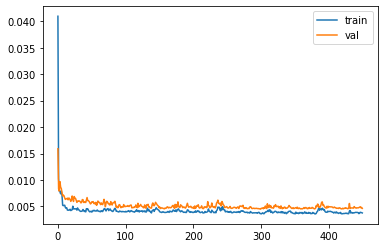

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 12)]         0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 12)           48          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
dense (Dense)                   (None, 35)           455         batch_normalization[0][0]        
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 35)           0           dense[0][0]                      
______________________________________________________________________________________________

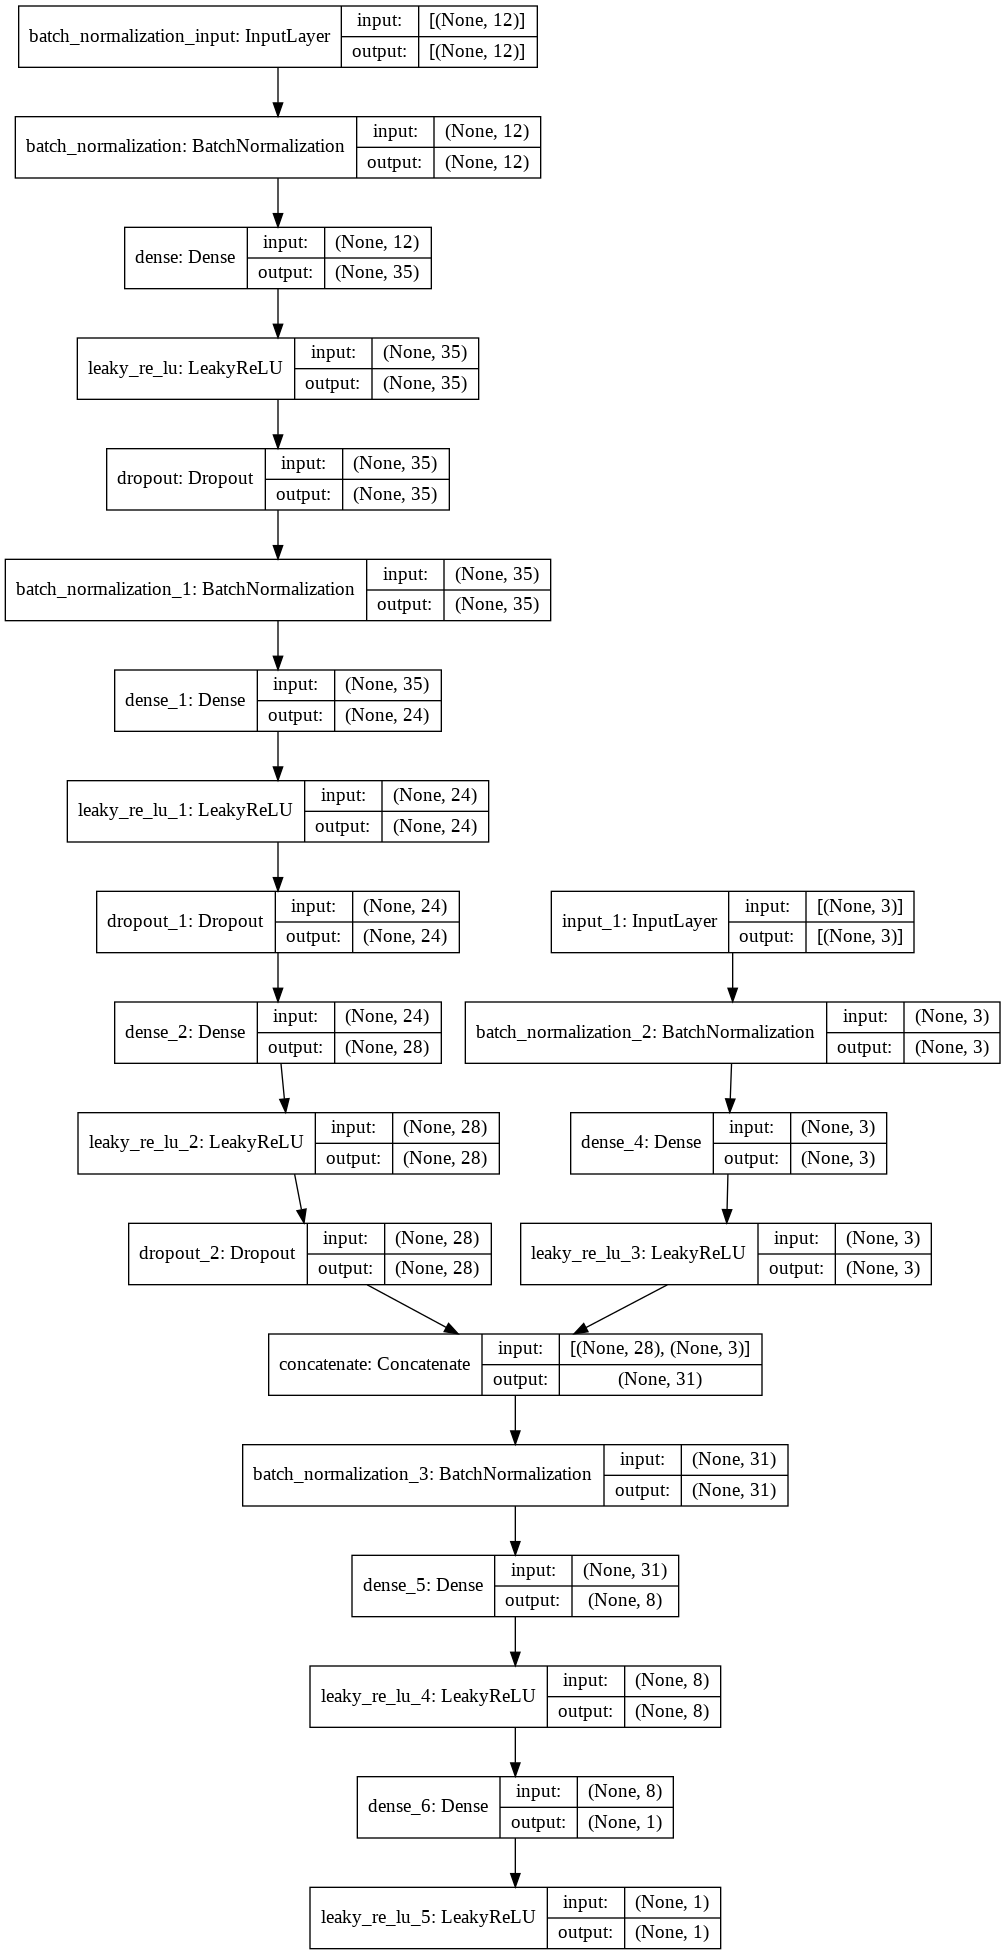

In [ ]:
model_fixed = load_model(precovid_model)
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

for i in range(0,len(model_fixed.layers)):
  model_fixed.layers[i].trainable = False

l1 = Input(shape=(3,))
l1_2 = BatchNormalization()(l1)
l2 = Dense(best_params2['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
l2_2 = LeakyReLU(alpha=best_params2['alpha'])(l2)
if best_params2['two_layer'] ==1 :
      l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_3])
else :
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_2])
merged2 = BatchNormalization()(merged)

if best_params2['last_layer'] ==0:
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)

if best_params2['last_layer'] ==1:
    l5 = Dense(best_params2['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
    l5_1 = LeakyReLU(alpha=best_params2['alpha'])(l5)
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)          

model = Model(inputs=[model_fixed.input,l1], outputs=l5_3)

opt = keras.optimizers.Adam(learning_rate=best_params2['learning_rate'])
model.compile(loss='mse',optimizer=opt)
fn_f = "gdrive/My Drive/Colab Notebooks/Stations/Training_CO_aftercovid.ckpt" 
fnn_f = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer

callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn_f, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=int(best_params2['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

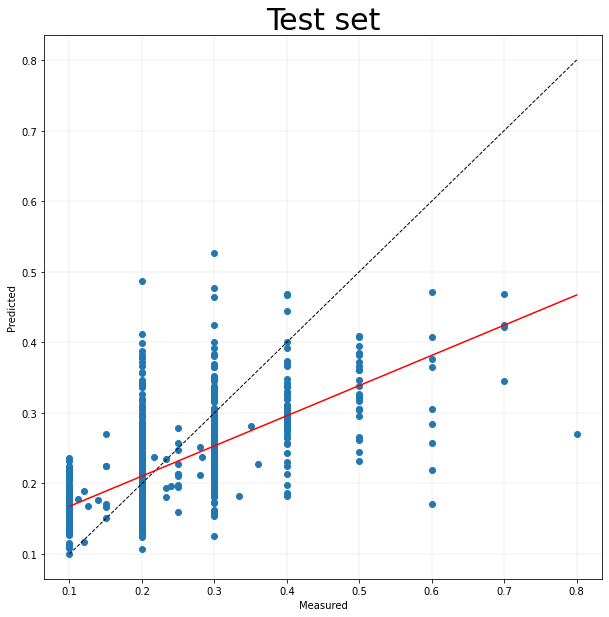

[0.42761824 0.12493499]
RMSE
[0.06297126]
R2
0.42194653306663965


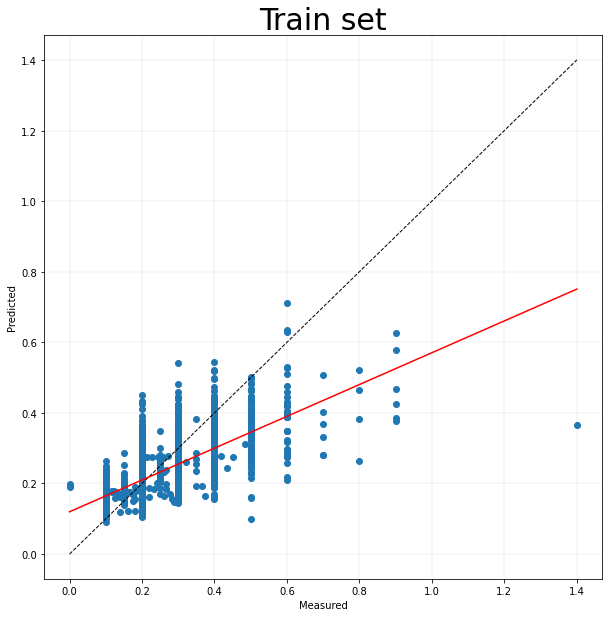

[0.45061179 0.11989867]
RMSE
[0.06110412]
R2
0.47311888956403503


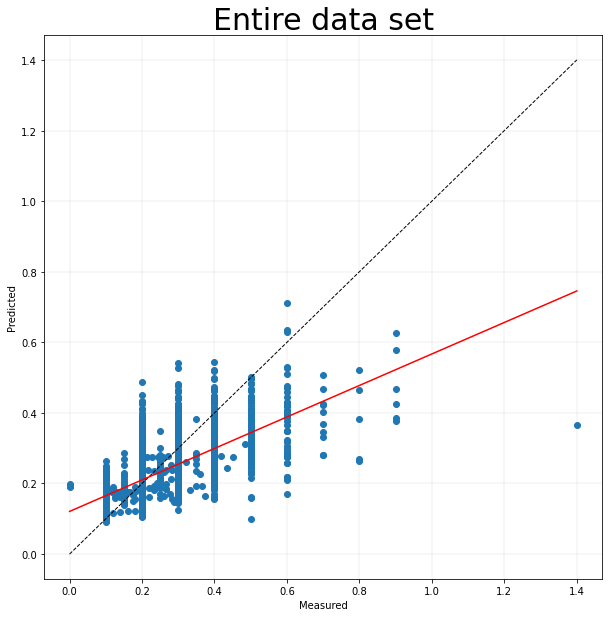

[0.4461315  0.12088052]
RMSE
[0.06148209]
R2
0.4631478722431982


In [ ]:
model.load_weights(fn_f )
model.save('gdrive/My Drive/Colab Notebooks/Model_Edmonton_east_after_Covid.h5')
preds = model.predict([X_test_a,X_test_b]) 
y_real = y_test_a.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

model.load_weights(fn_f)
preds = model.predict([X_train_a,X_train_b]) 
y_real_t = y_train_a.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
model.load_weights(fn_f)
preds = model.predict([X_a,X_b]) 
y_real_to = Y_a.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

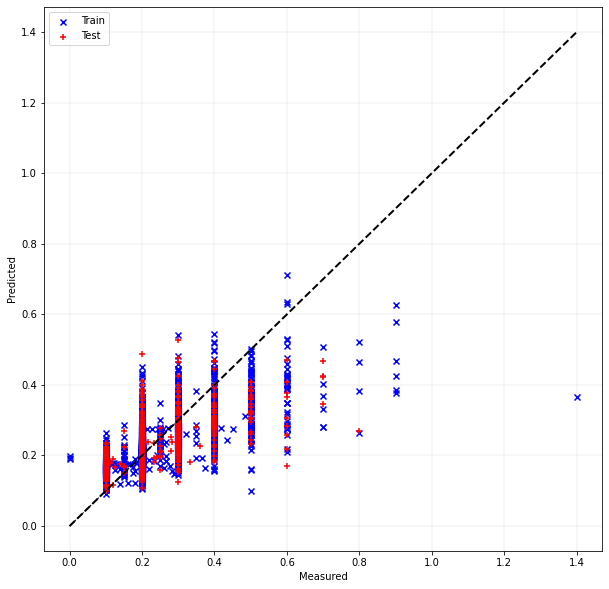

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.3], [0,0.3], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()


In [ ]:
df2_w_c

CO(ppm)  T( C)  RH(%)  ...  driving  transit  walking
Date                                        ...                           
2020-01-13 00:00:00      0.1  -25.4   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 01:00:00      0.1  -25.7   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 02:00:00      0.1  -25.8   66.0  ...   1.0000   1.0000   1.0000
2020-01-13 03:00:00      0.1  -25.8   65.0  ...   1.0000   1.0000   1.0000
2020-01-13 04:00:00      0.1  -26.0   65.0  ...   1.0000   1.0000   1.0000
...                      ...    ...    ...  ...      ...      ...      ...
2021-01-31 19:00:00      0.4  -15.5   76.0  ...   0.7143   0.4266   0.8011
2021-01-31 20:00:00      0.4  -15.4   78.0  ...   0.7143   0.4266   0.8011
2021-01-31 21:00:00      0.2  -15.5   79.0  ...   0.7143   0.4266   0.8011
2021-01-31 22:00:00      0.2  -16.3   80.0  ...   0.7143   0.4266   0.8011
2021-01-31 23:00:00      0.2  -16.7   81.0  ...   0.7143   0.4266   0.8011

[9075 rows x 16 columns]

In [ ]:
# df3= df3.copy()
df4 = df2_w_c.copy()
df4['pred'] = model.predict([X_a,X_b])
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

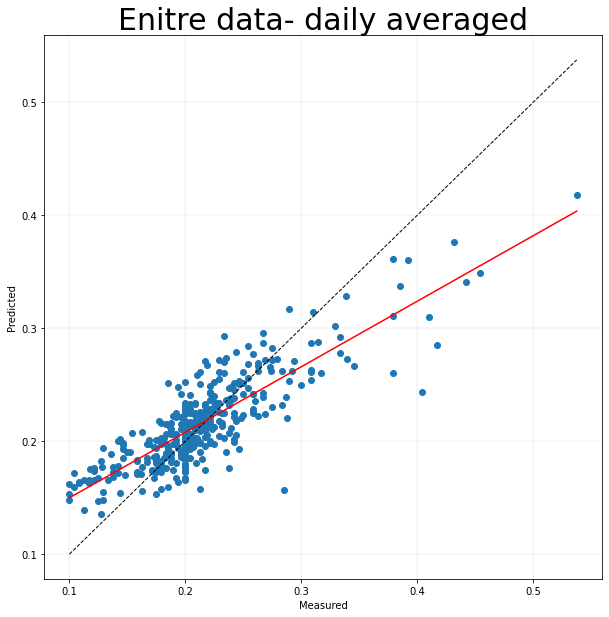

[0.57997188 0.09186987]
RMSE
[0.03240749]
R2
0.6798581783938966


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10['CO(ppm)']).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


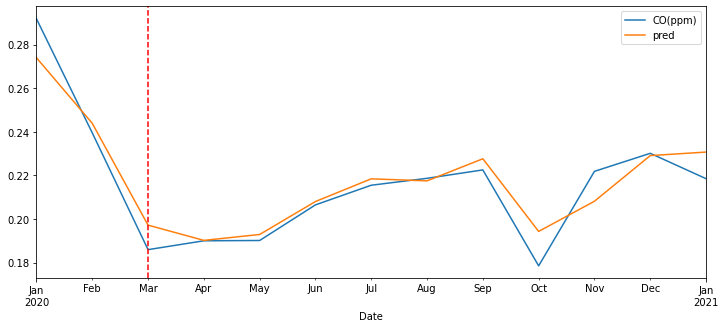

In [ ]:
df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df3_w_c = df2_w_c.copy()
df3_w_c['driving'] = 1.124019
df3_w_c['transit']  = 1.025378
df3_w_c['walking'] = 1.331329

In [ ]:
Y_a = df3_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df3_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df3_w_c[ ['driving', 'transit', 'walking']])




X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
# df3= df3.copy()
df44 = df3_w_c.copy()
df44['No lockdown'] = model.predict([X_a,X_b])
df104 = df44.resample('D').mean()
df104.dropna(inplace= True)

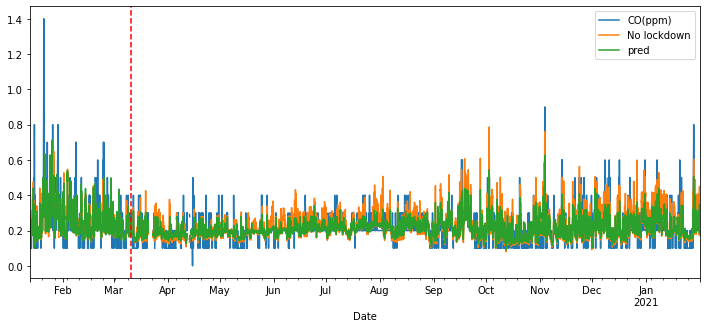

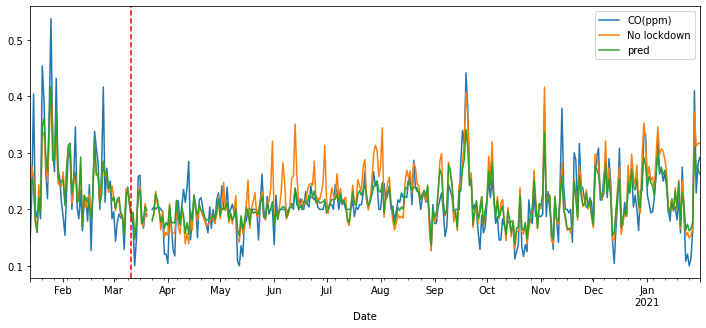

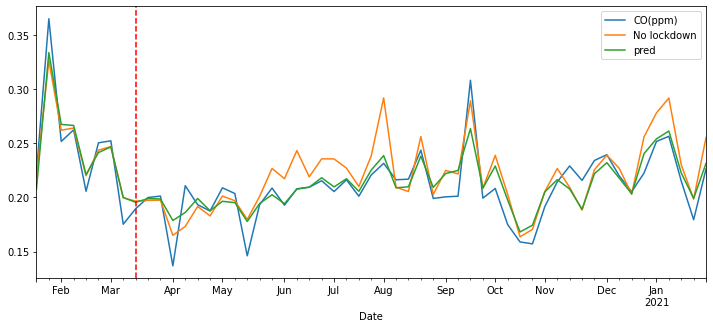

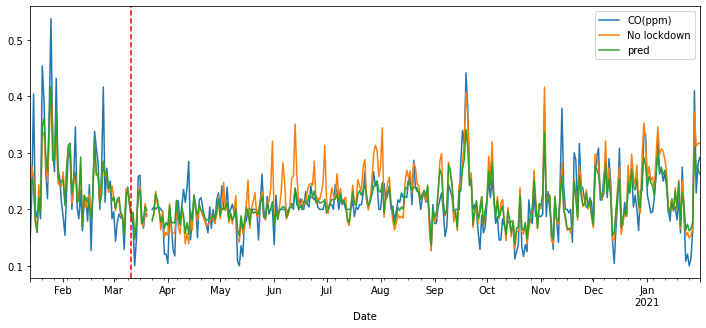

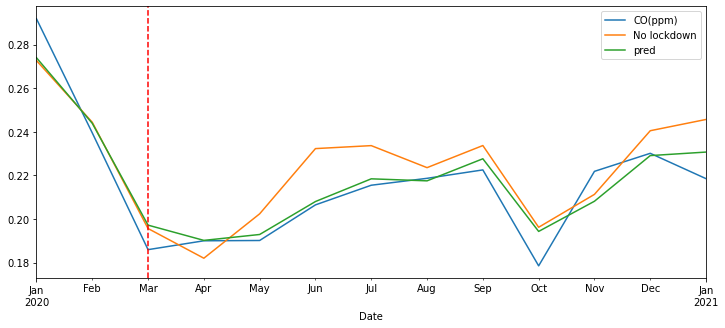

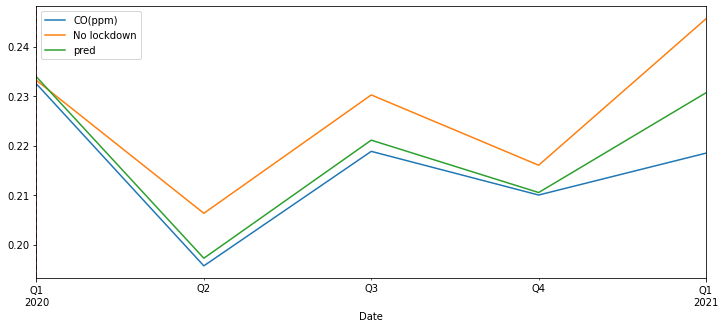

In [ ]:


df4['CO(ppm)'].resample('H').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('H').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('W').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('W').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()
df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('M').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('Q').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4['No lockdown']=df44['No lockdown'].copy()
print('No lockdown:',df4['No lockdown'].mean())
print('pred:',df4['pred'].mean())
print('CO(ppm):',df4['CO(ppm)'].mean())

No lockdown: 0.22312191128730774
pred: 0.2163834571838379
CO(ppm): 0.21406886884590973


In [ ]:
df4.head()

CO(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                        ...                                
2020-01-13 00:00:00      0.1  -25.4   68.0  ...      1.0  0.144256     0.140617
2020-01-13 01:00:00      0.1  -25.7   68.0  ...      1.0  0.154986     0.151347
2020-01-13 02:00:00      0.1  -25.8   66.0  ...      1.0  0.158600     0.154960
2020-01-13 03:00:00      0.1  -25.8   65.0  ...      1.0  0.166749     0.168830
2020-01-13 04:00:00      0.1  -26.0   65.0  ...      1.0  0.185634     0.212358

[5 rows x 18 columns]

In [ ]:
df4.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/NOX_mobility_aftercov_Edmonton_east-COVID_hourly_pred.csv')

In [ ]:
df4

NOX(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                         ...                                
2020-01-13 00:00:00    0.0084  -25.4   68.0  ...   1.0000  0.012064     0.011699
2020-01-13 01:00:00    0.0078  -25.7   68.0  ...   1.0000  0.015269     0.014904
2020-01-13 02:00:00    0.0053  -25.8   66.0  ...   1.0000  0.015456     0.015090
2020-01-13 03:00:00    0.0050  -25.8   65.0  ...   1.0000  0.018650     0.018285
2020-01-13 04:00:00    0.0069  -26.0   65.0  ...   1.0000  0.023630     0.023264
...                       ...    ...    ...  ...      ...       ...          ...
2021-01-31 19:00:00    0.1137  -15.5   76.0  ...   0.8011  0.037565     0.041811
2021-01-31 20:00:00    0.1007  -15.4   78.0  ...   0.8011  0.024746     0.028993
2021-01-31 21:00:00    0.0515  -15.5   79.0  ...   0.8011  0.019648     0.023895
2021-01-31 22:00:00    0.0502  -16.3   80.0  ...   0.8011  0.030382     0.034629
2021-01-31 23:00:00    0.0408  -16.7   81.0  ...   0.8011  0.025745     0.029992

[9075 rows x 18 columns]